In [2]:
import numpy as np
import ehtim as eh
from ehtim.movie import Movie
import matplotlib.pyplot as plt

Welcome to eht-imaging! v 1.2.10 



Generate Orbiting Hot Spot Data

In [3]:
# Specify the parameters of the movie of the orbiting hot spot
frame_height, frame_width = 400, 400
num_frames = 110
blob_sigma = 20  # Width of the Gaussian blob
blob_amplitude = 1  # Peak value of the blob
orbit_radius = 50  # Radius of the orbit

# Create grid of x and y coordinates
x = np.linspace(0, frame_width - 1, frame_width)
y = np.linspace(0, frame_height - 1, frame_height)
x_grid, y_grid = np.meshgrid(x, y)

In [4]:
def gaussian_hot_spot(x, y, x0, y0, sigma, amplitude):
    return amplitude * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

def generate_orbiting_hot_spot_frames(cycles):
    frames = []
    center_x, center_y = frame_width // 2, frame_height // 2

    for frame_num in range(num_frames):
        theta = -cycles * 2 * np.pi * frame_num / num_frames
        x_center = center_x + orbit_radius * np.cos(theta)
        y_center = center_y + orbit_radius * np.sin(theta)
        frame = gaussian_hot_spot(x_grid, y_grid, x_center, y_center, blob_sigma, blob_amplitude)
        frames.append(frame)
    return np.array(frames)

In [5]:
cycles = 5  # Number of complete orbits in the animation
frames = generate_orbiting_hot_spot_frames(cycles)

Visualize Orbiting Hot Spot

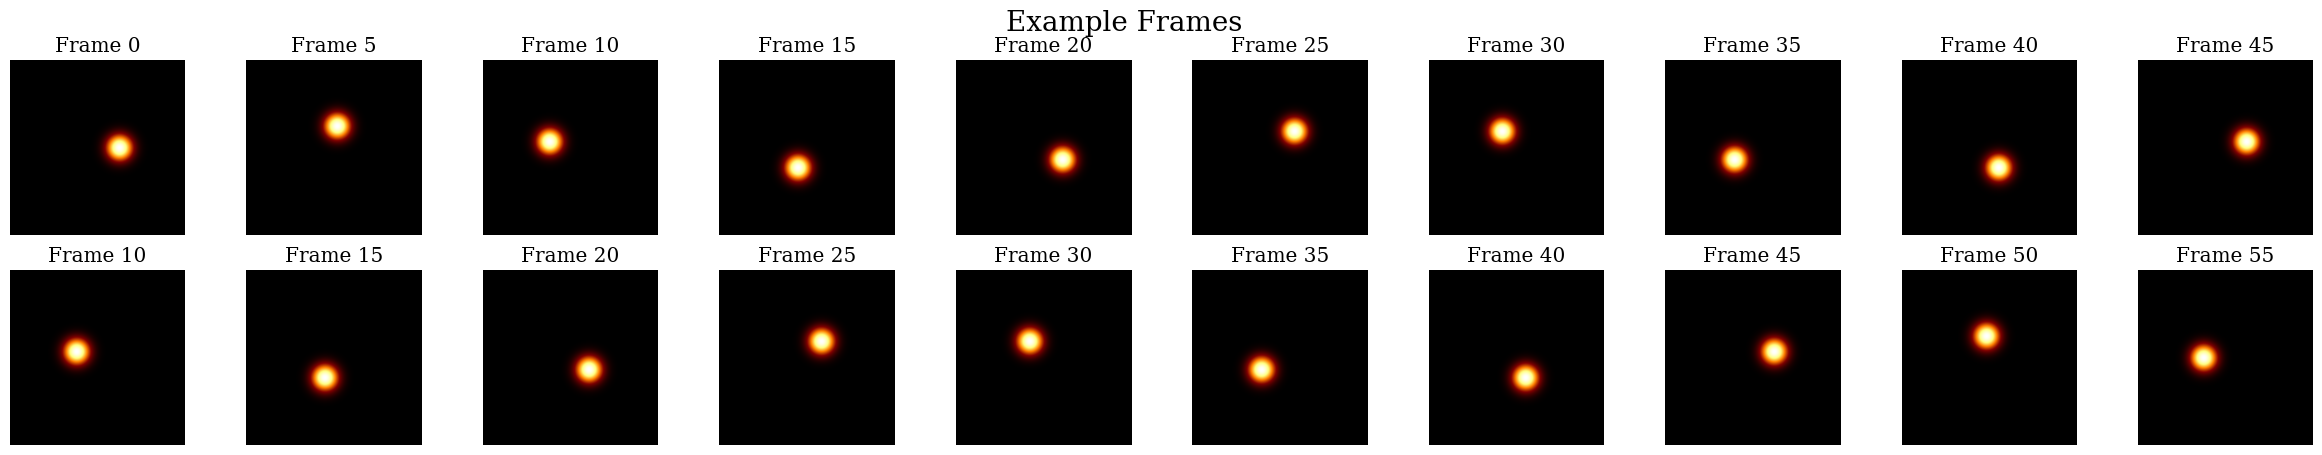

In [6]:
rows, columns = 2, 10
fig, ax = plt.subplots(rows, columns, figsize=(30,5))
delta_frame = num_frames // (rows * columns)
for i in range(rows):
    for j in range(columns):
        idx = i * columns + j * delta_frame
        ax[i, j].imshow(frames[idx], cmap="afmhot", vmin=0, vmax=1)
        ax[i, j].set_title(f"Frame {idx}")
        ax[i, j].axis("off")
fig.suptitle("Example Frames", fontsize=20, y=0.98)
plt.show()

Save Hot Spot As eht-imging Movie

In [ ]:
import os

# Define the parameters of the observation
ra, dec, mjd, psize, rf, source, polrep = 17.761121055814954, -29.0078430557251, 57854, 2.4240684055470684e-12, 227070703125.0, 'SgrA', 'stokes'
times = [10.85, 10.8793578, 10.9087156, 10.93807339, 10.96743119, 10.99678899,
          11.02614679, 11.05550459, 11.08486239, 11.11422018, 11.14357798, 11.17293578,
          11.20229358, 11.23165138, 11.26100917, 11.29036697, 11.31972477, 11.34908257,
          11.37844037, 11.40779817, 11.43715596, 11.46651376, 11.49587156, 11.52522936,
          11.55458716, 11.58394495, 11.61330275, 11.64266055, 11.67201835, 11.70137615,
          11.73073394, 11.76009174, 11.78944954, 11.81880734, 11.84816514, 11.87752294,
          11.90688073, 11.93623853, 11.96559633, 11.99495413, 12.02431193, 12.05366972,
          12.08302752, 12.11238532, 12.14174312, 12.17110092, 12.20045872, 12.22981651,
          12.25917431, 12.28853211, 12.31788991, 12.34724771, 12.3766055, 12.4059633,
          12.4353211, 12.4646789, 12.4940367, 12.5233945, 12.55275229, 12.58211009,
          12.61146789, 12.64082569, 12.67018349, 12.69954128, 12.72889908, 12.75825688,
          12.78761468, 12.81697248, 12.84633028, 12.87568807, 12.90504587, 12.93440367,
          12.96376147, 12.99311927, 13.02247706, 13.05183486, 13.08119266, 13.11055046,
          13.13990826, 13.16926606, 13.19862385, 13.22798165, 13.25733945, 13.28669725,
          13.31605505, 13.34541284, 13.37477064, 13.40412844, 13.43348624, 13.46284404,
          13.49220183, 13.52155963, 13.55091743, 13.58027523, 13.60963303, 13.63899083,
          13.66834862, 13.69770642, 13.72706422, 13.75642202, 13.78577982, 13.81513761,
          13.84449541, 13.87385321, 13.90321101, 13.93256881, 13.96192661, 13.9912844,
          14.0206422, 14.05]

# Create the ehtim Movie object
hotspot_movie = Movie(
    frames=frames,
    times=times,
    psize=psize,
    ra=ra,
    dec=dec,
    rf=rf,
    polrep=polrep,
    source=source,
    mjd=mjd
)

# Save the movie to an HDF5 file
movies_dir = "../../../movies"
os.makedirs(movies_dir, exist_ok=True)
output_path = os.path.join(movies_dir, "orbiting_hs.hdf5")
hotspot_movie.save_hdf5(output_path)

Make Simulation Observational Data From Movie

In [ ]:
from make_data import resize_images, save_movie_to_hdf5, create_obs, plot_uv_coverage, diagnostics, generate_data
# NOTE: uncomment if ngEHT array is used
# array_path = 'ngEHT.txt'
# array = eh.array.load_txt(array_path)

hs_data_dir = "../../../hs_data"
os.makedirs(hs_data_dir, exist_ok=True)

# array = "ngEHT" # NOTE: uncomment if ngEHT array is used
array = ['ALMA', 'APEX', 'GLT', 'JCMT', 'KP', 'LMT', 'SMA', 'SMT', 'SPT', 'BAJA', 'BAR', 'CAT', 
        'CNI', 'GAM', 'GARS', 'HAY', 'NZ', 'OVRO', 'SGO', 'CAS', 'LLA', 'PIKE', 'PV']
array_name = 'ngEHT_plus'
movie_name = "orbiting_hs"
noisy = False  # Set to True to add phase and amplitude errors to the data, though this hasn't been tested yet with this additional noise
fractional_noise = 0.05 # Fractional noise level to add to the data
is_array = type(array) is not list # True if array is a list of strings, False if it is a string
if noisy:
    obs_path = os.path.join(hs_data_dir, f"{array_name}/{movie_name}_f{fractional_noise}_noisy")
else:
    obs_path = os.path.join(hs_data_dir, f"{array_name}/{movie_name}_f{fractional_noise}")
os.makedirs(obs_path, exist_ok=True)

movie = eh.movie.load_hdf5(f"../../../movies/{movie_name}.hdf5")
ims = movie.im_list()
npix = int(np.sqrt(len(ims[0]._imdict['I']))) # =400
npix_old = npix

scale_factor = 5
npix = npix // scale_factor
psize = ims[0].psize
new_psize = ims[0].psize * scale_factor  # Adjust pixel size accordingly


ims = resize_images(ims, npix, npix_old, new_psize)
save_movie_to_hdf5(ims, movie, os.path.join(obs_path, "gt_video.hdf5"))
obs, obs_frames, prior, fov = create_obs(ims[0], movie, npix, array, is_array=is_array)
plot_uv_coverage(obs, f"{array_name}_coverage.png") # plots the uv coverage of the array
max_vis = diagnostics(ims, obs_frames, fractional_noise, prior, fov, npix_old, noisy)

generate_data(obs_path, obs_frames, fractional_noise, ims, prior, npix, max_vis, noisy)

Train NeuralDMD on Data

In [ ]:
import jax.numpy as jnp
import h5py
from dmd_data_loader import DMDDataLoader
import jax
from neural_dmd import NeuralDMD, train_model
import equinox as eqx

def load_hdf5(dir, file):
    with h5py.File(f"{dir}/{file}", "r") as f:
        frames = f["I"][:]
        times = f["times"][:]
    return frames, times

models_dir = "./models"
os.makedirs(models_dir, exist_ok=True)
plots_dir = "../../../plots"
os.makedirs(plots_dir, exist_ok=True)
fov_x, fov_y = jnp.pi, jnp.pi

frames, times = load_hdf5(obs_path, "gt_video.hdf5") # Load the ground truth video
n = frames.shape[0]
train_frames = frames[:n,]
time_fraction = 0.6 # Fraction of the total time to use for training
batch_size = 32
num_epochs = 3000 # Number of epochs to train the model for
times = (times - times.min()) / (times.max() - times.min()) # normalize times to [0, 1]
train_loader = DMDDataLoader(train_frames, batch_size=batch_size, data_dir=obs_path, 
                                epochs=num_epochs, times=times, fov_x=fov_x, fov_y=fov_y, time_fraction=time_fraction)

r = 24 # number of modes to learn
key = jax.random.PRNGKey(0) # define random key
num_frequencies = 4 # degree of frequencies to use for the positional encoding
model = NeuralDMD(r, key=key, num_frequencies=num_frequencies) # initialize the model
continue_training = False # set to True to continue training from a saved model
if continue_training:
    model = eqx.tree_deserialise_leaves(os.path.join(models_dir, "trained_model.eqx"), model)

beta = 0
lr = 1e-3 # learning rate

As shape: (110, 342, 6400)


/home/as2c/neural_dmd/neural_dmd.py:141: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  self.encoding = SinusoidalEncoding(num_frequencies=num_frequencies)


In [10]:
trained_model, total_losses, reconstruction_losses, orthogonality_losses = train_model(
    model, train_loader, num_epochs, key, beta, models_dir, lr, plots_dir
)

  0%|          | 0/3000 [00:00<?, ?it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4896e-04, min = -5.1942e-05, max = 3.9534e-05
Spatial layer 0 bias: norm = 3.3122e-04, min = -7.3527e-05, max = 5.5786e-05
Spatial layer 2 weight: norm = 2.0882e-03, min = -7.4751e-05, max = 1.0037e-04
Spatial layer 2 bias: norm = 1.2412e-03, min = -1.9731e-04, max = 2.5073e-04
Spatial layer 4 weight: norm = 2.5757e-03, min = -9.3150e-05, max = 1.1629e-04
Spatial layer 4 bias: norm = 4.2460e-03, min = -7.1399e-04, max = 8.9798e-04
Spatial layer 6 weight: norm = 5.5175e-03, min = -1.0167e-04, max = 1.0305e-04
Spatial layer 6 bias: norm = 1.5116e-02, min = -1.7400e-03, max = 1.7634e-03
Spatial layer 8 weight: norm = 1.7425e-02, min = -2.3021e-03, max = 2.1797e-03
Spatial layer 8 bias: norm = 5.5271e-02, min = -5.5271e-02, max = 1.0850e-05
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.8793e-06, min = -1.0484e-06, max = 8.0423e-07
Temporal Omega layer 0 bias: norm = 9.0253e-07, min = -3.2567e-07, max = 4.2456e-

  0%|          | 1/3000 [00:07<6:00:43,  7.22s/it]

Epoch 2/3000, r-chi2=399.989227, Rec=160853.031250 LR=1.00e-03


  0%|          | 2/3000 [00:11<4:22:59,  5.26s/it]

Epoch 3/3000, r-chi2=399.966736, Rec=160877.375000 LR=1.00e-03


  0%|          | 3/3000 [00:11<2:30:52,  3.02s/it]

Epoch 4/3000, r-chi2=399.880310, Rec=160979.125000 LR=1.00e-03


  0%|          | 4/3000 [00:11<1:33:23,  1.87s/it]

Epoch 5/3000, r-chi2=399.616028, Rec=161308.125000 LR=1.00e-03
Epoch 6/3000, r-chi2=398.920685, Rec=162220.843750 LR=1.00e-03


  0%|          | 6/3000 [00:11<46:00,  1.08it/s]  

Epoch 7/3000, r-chi2=397.281311, Rec=164509.656250 LR=1.00e-03
Plotted losses up to epoch 7.
Epoch 8/3000, r-chi2=393.628357, Rec=169960.796875 LR=1.00e-03


  0%|          | 8/3000 [00:12<29:04,  1.72it/s]

Epoch 9/3000, r-chi2=386.683197, Rec=181263.843750 LR=1.00e-03
Plotted losses up to epoch 9.
Epoch 10/3000, r-chi2=374.463623, Rec=205347.218750 LR=1.00e-03


  0%|          | 10/3000 [00:12<20:36,  2.42it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.0142e+01, min = -5.5042e-01, max = 2.9767e-01
Spatial layer 0 bias: norm = 7.4151e+00, min = -6.7514e-01, max = 3.6485e-01
Spatial layer 2 weight: norm = 8.9399e+00, min = -2.2576e-01, max = 8.8213e-02
Spatial layer 2 bias: norm = 3.8943e+00, min = -4.7134e-01, max = 1.4751e-01
Spatial layer 4 weight: norm = 1.0590e+01, min = -1.6391e-01, max = 7.1248e-02
Spatial layer 4 bias: norm = 2.3751e+00, min = -3.0827e-01, max = 4.2549e-02
Spatial layer 6 weight: norm = 1.2889e+01, min = -1.9011e-01, max = 4.4323e-02
Spatial layer 6 bias: norm = 1.2909e+00, min = -1.5978e-01, max = 1.5179e-03
Spatial layer 8 weight: norm = 5.6536e+01, min = -5.4561e+00, max = 5.1673e-01
Spatial layer 8 bias: norm = 2.2436e+00, min = -1.8683e+00, max = 2.3549e-03
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.6100e-02, min = -2.7677e-03, max = 4.9028e-03
Temporal Omega layer 0 bias: norm = 6.0503e-03, min = -1.9859e-03, max = 8.6140e-

  0%|          | 11/3000 [00:12<17:41,  2.82it/s]

Plotted losses up to epoch 11.
Epoch 12/3000, r-chi2=355.927124, Rec=347882.468750 LR=1.00e-03


  0%|          | 12/3000 [00:12<15:40,  3.18it/s]

Epoch 13/3000, r-chi2=366.770752, Rec=382965.468750 LR=1.00e-03
Plotted losses up to epoch 13.
Epoch 14/3000, r-chi2=351.798218, Rec=330992.187500 LR=1.00e-03


  0%|          | 14/3000 [00:12<12:17,  4.05it/s]

Epoch 15/3000, r-chi2=350.584564, Rec=286601.125000 LR=1.00e-03
Plotted losses up to epoch 15.
Epoch 16/3000, r-chi2=353.166443, Rec=267078.500000 LR=1.00e-03


  1%|          | 16/3000 [00:13<10:28,  4.74it/s]

Epoch 17/3000, r-chi2=352.150818, Rec=264436.875000 LR=1.00e-03
Plotted losses up to epoch 17.
Epoch 18/3000, r-chi2=349.830261, Rec=276309.375000 LR=1.00e-03


  1%|          | 18/3000 [00:13<09:16,  5.36it/s]

Epoch 19/3000, r-chi2=346.198242, Rec=300221.843750 LR=1.00e-03
Plotted losses up to epoch 19.
Epoch 20/3000, r-chi2=346.170563, Rec=329690.031250 LR=1.00e-03


  1%|          | 20/3000 [00:13<08:40,  5.73it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.3930e+01, min = -6.4766e-01, max = 7.2815e-01
Spatial layer 0 bias: norm = 1.3487e+01, min = -1.1202e+00, max = 1.1932e+00
Spatial layer 2 weight: norm = 1.0377e+01, min = -9.3778e-02, max = 2.2444e-01
Spatial layer 2 bias: norm = 5.4218e+00, min = -1.8016e-01, max = 5.8608e-01
Spatial layer 4 weight: norm = 1.1348e+01, min = -6.8580e-02, max = 1.6898e-01
Spatial layer 4 bias: norm = 2.8302e+00, min = -3.5215e-02, max = 3.1781e-01
Spatial layer 6 weight: norm = 1.3268e+01, min = -3.5933e-02, max = 1.7824e-01
Spatial layer 6 bias: norm = 1.3014e+00, min = -1.2763e-03, max = 1.4015e-01
Spatial layer 8 weight: norm = 6.5127e+01, min = -4.3295e-01, max = 5.7862e+00
Spatial layer 8 bias: norm = 2.1572e+00, min = -6.3686e-02, max = 1.6659e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.1216e-02, min = -3.8389e-03, max = 4.1295e-03
Temporal Omega layer 0 bias: norm = 4.9336e-03, min = -1.6764e-03, max = 1.5584e-

  1%|          | 21/3000 [00:13<08:35,  5.78it/s]

Plotted losses up to epoch 21.
Epoch 22/3000, r-chi2=345.895996, Rec=335702.062500 LR=1.00e-03


  1%|          | 22/3000 [00:14<08:51,  5.60it/s]

Epoch 23/3000, r-chi2=344.061340, Rec=314895.687500 LR=1.00e-03
Plotted losses up to epoch 23.
Epoch 24/3000, r-chi2=342.976410, Rec=294996.437500 LR=1.00e-03


  1%|          | 24/3000 [00:14<08:26,  5.88it/s]

Epoch 25/3000, r-chi2=343.875732, Rec=286224.781250 LR=1.00e-03
Plotted losses up to epoch 25.
Epoch 26/3000, r-chi2=342.520325, Rec=290854.625000 LR=1.00e-03


  1%|          | 26/3000 [00:14<07:58,  6.21it/s]

Epoch 27/3000, r-chi2=341.379211, Rec=301601.750000 LR=1.00e-03
Plotted losses up to epoch 27.
Epoch 28/3000, r-chi2=340.532990, Rec=313094.750000 LR=1.00e-03


  1%|          | 28/3000 [00:15<07:46,  6.37it/s]

Epoch 29/3000, r-chi2=340.356750, Rec=313485.562500 LR=1.00e-03
Plotted losses up to epoch 29.
Epoch 30/3000, r-chi2=338.146606, Rec=302959.187500 LR=1.00e-03


  1%|          | 30/3000 [00:15<07:29,  6.60it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 6.5793e+00, min = -4.9856e-01, max = 3.8284e-01
Spatial layer 0 bias: norm = 1.1176e+00, min = -1.9898e-01, max = 1.3960e-01
Spatial layer 2 weight: norm = 3.0746e+00, min = -5.8832e-02, max = 6.0573e-02
Spatial layer 2 bias: norm = 3.7578e-01, min = -3.6697e-02, max = 3.8064e-02
Spatial layer 4 weight: norm = 2.7113e+00, min = -3.7221e-02, max = 1.2605e-02
Spatial layer 4 bias: norm = 1.9986e-01, min = -1.1015e-02, max = 2.6762e-02
Spatial layer 6 weight: norm = 2.8837e+00, min = -4.5093e-02, max = 9.0149e-03
Spatial layer 6 bias: norm = 1.0305e-01, min = -2.2003e-03, max = 1.2075e-02
Spatial layer 8 weight: norm = 1.4566e+01, min = -1.4902e+00, max = 7.8589e-02
Spatial layer 8 bias: norm = 1.0727e-01, min = -1.2703e-02, max = 8.8682e-02
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.3369e-03, min = -1.0097e-03, max = 1.3750e-03
Temporal Omega layer 0 bias: norm = 1.4750e-03, min = -5.5853e-04, max = 4.1016e-

  1%|          | 31/3000 [00:15<08:03,  6.14it/s]

Plotted losses up to epoch 31.
Epoch 32/3000, r-chi2=338.443298, Rec=285698.500000 LR=1.00e-03


  1%|          | 32/3000 [00:15<08:56,  5.53it/s]

Epoch 33/3000, r-chi2=336.655273, Rec=287214.531250 LR=1.00e-03
Plotted losses up to epoch 33.
Epoch 34/3000, r-chi2=336.473267, Rec=294711.500000 LR=1.00e-03


  1%|          | 34/3000 [00:16<08:16,  5.97it/s]

Epoch 35/3000, r-chi2=336.070679, Rec=296975.125000 LR=1.00e-03
Plotted losses up to epoch 35.
Epoch 36/3000, r-chi2=334.591003, Rec=290264.250000 LR=1.00e-03


  1%|          | 36/3000 [00:16<08:06,  6.10it/s]

Epoch 37/3000, r-chi2=335.017456, Rec=280436.906250 LR=1.00e-03
Plotted losses up to epoch 37.
Epoch 38/3000, r-chi2=335.004425, Rec=278293.218750 LR=1.00e-03


  1%|▏         | 38/3000 [00:16<07:47,  6.33it/s]

Epoch 39/3000, r-chi2=333.186859, Rec=279705.062500 LR=1.00e-03
Plotted losses up to epoch 39.
Epoch 40/3000, r-chi2=332.654175, Rec=283201.937500 LR=1.00e-03


  1%|▏         | 40/3000 [00:16<07:33,  6.53it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.0179e+01, min = -8.7152e-01, max = 6.6470e-01
Spatial layer 0 bias: norm = 7.0936e+00, min = -8.9039e-01, max = 9.2481e-01
Spatial layer 2 weight: norm = 4.8645e+00, min = -5.0617e-02, max = 1.1656e-01
Spatial layer 2 bias: norm = 2.4653e+00, min = -1.0968e-01, max = 2.6113e-01
Spatial layer 4 weight: norm = 1.8524e+00, min = -1.6010e-02, max = 3.8706e-02
Spatial layer 4 bias: norm = 1.2289e+00, min = -4.5064e-02, max = 1.2767e-01
Spatial layer 6 weight: norm = 8.4156e-01, min = -5.7620e-03, max = 1.9736e-02
Spatial layer 6 bias: norm = 4.6875e-01, min = -6.7311e-03, max = 5.5272e-02
Spatial layer 8 weight: norm = 2.5039e+00, min = -1.9355e-01, max = 2.4695e-01
Spatial layer 8 bias: norm = 8.9127e-01, min = -1.3408e-02, max = 7.6418e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.4467e-03, min = -2.2589e-04, max = 2.6313e-04
Temporal Omega layer 0 bias: norm = 3.3676e-04, min = -1.0688e-04, max = 9.1752e-

  1%|▏         | 41/3000 [00:17<07:26,  6.62it/s]

Plotted losses up to epoch 41.
Epoch 42/3000, r-chi2=330.582092, Rec=274899.531250 LR=1.00e-03


  1%|▏         | 42/3000 [00:17<07:58,  6.18it/s]

Epoch 43/3000, r-chi2=329.454193, Rec=270808.656250 LR=1.00e-03
Plotted losses up to epoch 43.
Epoch 44/3000, r-chi2=327.619629, Rec=271582.000000 LR=1.00e-03


  1%|▏         | 44/3000 [00:17<07:42,  6.39it/s]

Epoch 45/3000, r-chi2=326.790527, Rec=273837.625000 LR=1.00e-03
Plotted losses up to epoch 45.
Epoch 46/3000, r-chi2=326.965668, Rec=272749.437500 LR=1.00e-03


  2%|▏         | 46/3000 [00:17<07:39,  6.43it/s]

Epoch 47/3000, r-chi2=324.885284, Rec=267764.125000 LR=1.00e-03
Plotted losses up to epoch 47.
Epoch 48/3000, r-chi2=322.557037, Rec=266337.125000 LR=1.00e-03


  2%|▏         | 48/3000 [00:18<07:23,  6.66it/s]

Epoch 49/3000, r-chi2=321.078735, Rec=267930.281250 LR=1.00e-03
Plotted losses up to epoch 49.
Epoch 50/3000, r-chi2=319.893372, Rec=269580.343750 LR=1.00e-03


  2%|▏         | 50/3000 [00:18<07:11,  6.83it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.7603e+01, min = -1.3073e+00, max = 1.6042e+00
Spatial layer 0 bias: norm = 4.9431e+00, min = -8.1201e-01, max = 8.8945e-01
Spatial layer 2 weight: norm = 6.0475e+00, min = -9.8714e-02, max = 1.3014e-01
Spatial layer 2 bias: norm = 1.3984e+00, min = -1.0644e-01, max = 1.5185e-01
Spatial layer 4 weight: norm = 1.4115e+00, min = -2.3905e-02, max = 3.0792e-02
Spatial layer 4 bias: norm = 5.5031e-01, min = -1.3674e-02, max = 4.9627e-02
Spatial layer 6 weight: norm = 1.7981e+00, min = -2.5797e-02, max = 6.6029e-03
Spatial layer 6 bias: norm = 1.6965e-01, min = -1.9584e-03, max = 1.7613e-02
Spatial layer 8 weight: norm = 9.8801e+00, min = -1.1381e+00, max = 5.3859e-02
Spatial layer 8 bias: norm = 3.7369e-02, min = -1.7201e-02, max = 1.3282e-02
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.7893e-03, min = -6.6871e-04, max = 8.0862e-04
Temporal Omega layer 0 bias: norm = 8.8205e-04, min = -3.2840e-04, max = 2.7158e-

  2%|▏         | 51/3000 [00:18<06:59,  7.03it/s]

Plotted losses up to epoch 51.
Epoch 52/3000, r-chi2=317.466309, Rec=263279.625000 LR=1.00e-03


  2%|▏         | 52/3000 [00:18<07:27,  6.59it/s]

Epoch 53/3000, r-chi2=320.275940, Rec=265339.812500 LR=1.00e-03
Plotted losses up to epoch 53.
Epoch 54/3000, r-chi2=319.336884, Rec=265175.625000 LR=1.00e-03


  2%|▏         | 54/3000 [00:19<07:12,  6.81it/s]

Epoch 55/3000, r-chi2=312.721497, Rec=260738.187500 LR=1.00e-03
Plotted losses up to epoch 55.
Epoch 56/3000, r-chi2=316.977631, Rec=260112.796875 LR=1.00e-03


  2%|▏         | 56/3000 [00:19<07:17,  6.73it/s]

Epoch 57/3000, r-chi2=316.423584, Rec=255842.406250 LR=1.00e-03


  2%|▏         | 57/3000 [00:19<06:51,  7.15it/s]

Plotted losses up to epoch 57.
Epoch 58/3000, r-chi2=317.431671, Rec=254258.406250 LR=1.00e-03


  2%|▏         | 58/3000 [00:19<07:33,  6.49it/s]

Epoch 59/3000, r-chi2=313.204956, Rec=250875.625000 LR=1.00e-03
Plotted losses up to epoch 59.
Epoch 60/3000, r-chi2=317.640045, Rec=247670.515625 LR=1.00e-03


  2%|▏         | 60/3000 [00:19<07:19,  6.70it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1246e+01, min = -2.2074e+00, max = 2.4592e+00
Spatial layer 0 bias: norm = 4.8718e+00, min = -8.4618e-01, max = 1.2152e+00
Spatial layer 2 weight: norm = 6.6983e+00, min = -1.6854e-01, max = 1.2678e-01
Spatial layer 2 bias: norm = 1.2924e+00, min = -1.2976e-01, max = 1.4245e-01
Spatial layer 4 weight: norm = 1.6569e+00, min = -3.7128e-02, max = 2.2754e-02
Spatial layer 4 bias: norm = 6.1817e-01, min = -5.5330e-02, max = 2.2760e-02
Spatial layer 6 weight: norm = 1.1427e+00, min = -8.3009e-03, max = 1.7851e-02
Spatial layer 6 bias: norm = 2.6648e-01, min = -2.8090e-02, max = 1.0695e-02
Spatial layer 8 weight: norm = 6.9362e+00, min = -3.2531e-01, max = 7.6137e-01
Spatial layer 8 bias: norm = 7.5771e-01, min = -6.3007e-01, max = 4.5661e-02
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 8.4541e-03, min = -1.3371e-03, max = 1.4594e-03
Temporal Omega layer 0 bias: norm = 1.9679e-03, min = -5.9270e-04, max = 5.4301e-

  2%|▏         | 61/3000 [00:20<07:10,  6.83it/s]

Plotted losses up to epoch 61.
Epoch 62/3000, r-chi2=311.913452, Rec=241264.812500 LR=1.00e-03


  2%|▏         | 62/3000 [00:20<07:48,  6.27it/s]

Epoch 63/3000, r-chi2=318.735718, Rec=240468.843750 LR=1.00e-03
Plotted losses up to epoch 63.
Epoch 64/3000, r-chi2=315.184753, Rec=235500.000000 LR=1.00e-03


  2%|▏         | 64/3000 [00:20<07:30,  6.52it/s]

Epoch 65/3000, r-chi2=314.808044, Rec=234495.609375 LR=1.00e-03
Plotted losses up to epoch 65.
Epoch 66/3000, r-chi2=311.875732, Rec=236647.437500 LR=1.00e-03


  2%|▏         | 66/3000 [00:21<11:17,  4.33it/s]

Epoch 67/3000, r-chi2=313.987793, Rec=235657.000000 LR=1.00e-03
Plotted losses up to epoch 67.
Epoch 68/3000, r-chi2=311.273682, Rec=232654.796875 LR=1.00e-03


  2%|▏         | 68/3000 [00:21<09:59,  4.89it/s]

Epoch 69/3000, r-chi2=311.850891, Rec=232032.531250 LR=1.00e-03
Plotted losses up to epoch 69.
Epoch 70/3000, r-chi2=312.023193, Rec=231083.234375 LR=1.00e-03


  2%|▏         | 70/3000 [00:21<09:42,  5.03it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.3855e+01, min = -2.8744e+00, max = 3.1185e+00
Spatial layer 0 bias: norm = 5.4913e+00, min = -8.1164e-01, max = 1.6946e+00
Spatial layer 2 weight: norm = 1.1707e+01, min = -3.0606e-01, max = 2.3928e-01
Spatial layer 2 bias: norm = 8.4926e-01, min = -8.5967e-02, max = 1.3168e-01
Spatial layer 4 weight: norm = 4.2875e+00, min = -5.5267e-02, max = 6.3358e-02
Spatial layer 4 bias: norm = 4.8402e-01, min = -5.8251e-02, max = 2.5208e-02
Spatial layer 6 weight: norm = 3.8722e+00, min = -3.2957e-02, max = 4.6734e-02
Spatial layer 6 bias: norm = 2.0501e-01, min = -2.8347e-02, max = 4.7597e-03
Spatial layer 8 weight: norm = 2.2031e+01, min = -1.5292e+00, max = 2.0634e+00
Spatial layer 8 bias: norm = 4.3027e-01, min = -3.2587e-01, max = 1.7848e-02
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.3610e-03, min = -1.1817e-03, max = 9.8827e-04
Temporal Omega layer 0 bias: norm = 1.2480e-03, min = -4.0140e-04, max = 4.7996e-

  2%|▏         | 71/3000 [00:22<09:11,  5.31it/s]

Plotted losses up to epoch 71.
Epoch 72/3000, r-chi2=314.995544, Rec=230712.812500 LR=1.00e-03


  2%|▏         | 72/3000 [00:22<09:32,  5.11it/s]

Epoch 73/3000, r-chi2=307.141479, Rec=230656.875000 LR=1.00e-03
Plotted losses up to epoch 73.
Epoch 74/3000, r-chi2=313.024292, Rec=233518.515625 LR=1.00e-03


  2%|▏         | 74/3000 [00:22<08:35,  5.68it/s]

Epoch 75/3000, r-chi2=307.013977, Rec=232829.687500 LR=1.00e-03
Plotted losses up to epoch 75.
Epoch 76/3000, r-chi2=310.512909, Rec=232704.375000 LR=1.00e-03


  3%|▎         | 76/3000 [00:22<08:08,  5.99it/s]

Epoch 77/3000, r-chi2=314.142517, Rec=233812.937500 LR=1.00e-03
Plotted losses up to epoch 77.
Epoch 78/3000, r-chi2=310.226990, Rec=228904.828125 LR=1.00e-03


  3%|▎         | 78/3000 [00:23<07:50,  6.21it/s]

Epoch 79/3000, r-chi2=311.496521, Rec=228620.031250 LR=1.00e-03
Plotted losses up to epoch 79.
Epoch 80/3000, r-chi2=311.202881, Rec=232629.312500 LR=1.00e-03


  3%|▎         | 80/3000 [00:23<07:36,  6.39it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0676e+01, min = -2.9989e+00, max = 2.7469e+00
Spatial layer 0 bias: norm = 5.8588e+00, min = -1.2133e+00, max = 1.0674e+00
Spatial layer 2 weight: norm = 1.0317e+01, min = -1.6325e-01, max = 2.1620e-01
Spatial layer 2 bias: norm = 1.3173e+00, min = -9.7491e-02, max = 1.7783e-01
Spatial layer 4 weight: norm = 2.8819e+00, min = -1.8222e-02, max = 4.8856e-02
Spatial layer 4 bias: norm = 4.3126e-01, min = -9.7873e-03, max = 5.2803e-02
Spatial layer 6 weight: norm = 8.6253e-01, min = -6.7207e-03, max = 1.3319e-02
Spatial layer 6 bias: norm = 1.2857e-01, min = -3.2007e-03, max = 1.8240e-02
Spatial layer 8 weight: norm = 5.8067e+00, min = -1.6062e-01, max = 1.0239e+00
Spatial layer 8 bias: norm = 4.0036e-01, min = -1.6884e-02, max = 3.8539e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 7.0556e-03, min = -1.3059e-03, max = 2.3202e-03
Temporal Omega layer 0 bias: norm = 1.6426e-03, min = -9.4257e-04, max = 4.6341e-

  3%|▎         | 81/3000 [00:23<07:32,  6.45it/s]

Plotted losses up to epoch 81.
Epoch 82/3000, r-chi2=311.240906, Rec=224176.593750 LR=1.00e-03


  3%|▎         | 82/3000 [00:23<08:17,  5.86it/s]

Epoch 83/3000, r-chi2=314.157227, Rec=228452.906250 LR=1.00e-03
Plotted losses up to epoch 83.
Epoch 84/3000, r-chi2=317.668396, Rec=233550.296875 LR=1.00e-03


  3%|▎         | 84/3000 [00:24<08:06,  5.99it/s]

Epoch 85/3000, r-chi2=313.312500, Rec=230462.468750 LR=1.00e-03
Plotted losses up to epoch 85.
Epoch 86/3000, r-chi2=312.654419, Rec=231484.937500 LR=1.00e-03


  3%|▎         | 86/3000 [00:24<07:41,  6.31it/s]

Epoch 87/3000, r-chi2=318.507385, Rec=235281.156250 LR=1.00e-03
Plotted losses up to epoch 87.
Epoch 88/3000, r-chi2=309.695618, Rec=234388.578125 LR=1.00e-03


  3%|▎         | 88/3000 [00:24<07:28,  6.50it/s]

Epoch 89/3000, r-chi2=309.357178, Rec=233483.406250 LR=1.00e-03
Plotted losses up to epoch 89.
Epoch 90/3000, r-chi2=312.454712, Rec=232307.500000 LR=1.00e-03


  3%|▎         | 90/3000 [00:25<07:29,  6.47it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0323e+01, min = -2.9532e+00, max = 2.8531e+00
Spatial layer 0 bias: norm = 3.4758e+00, min = -6.0997e-01, max = 8.4049e-01
Spatial layer 2 weight: norm = 1.0105e+01, min = -2.0388e-01, max = 2.3209e-01
Spatial layer 2 bias: norm = 3.3452e-01, min = -3.4782e-02, max = 4.6719e-02
Spatial layer 4 weight: norm = 4.3104e+00, min = -4.2334e-02, max = 6.8970e-02
Spatial layer 4 bias: norm = 1.3781e-01, min = -1.4524e-02, max = 1.5143e-02
Spatial layer 6 weight: norm = 3.2623e+00, min = -1.7915e-02, max = 4.4654e-02
Spatial layer 6 bias: norm = 9.0309e-02, min = -6.0888e-03, max = 2.1180e-02
Spatial layer 8 weight: norm = 2.0023e+01, min = -6.7965e-01, max = 2.1731e+00
Spatial layer 8 bias: norm = 4.6233e-01, min = -4.9700e-03, max = 4.3138e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.6640e-02, min = -4.0355e-03, max = 7.1656e-03
Temporal Omega layer 0 bias: norm = 8.5296e-03, min = -2.9111e-03, max = 1.4283e-

  3%|▎         | 91/3000 [00:25<07:31,  6.45it/s]

Plotted losses up to epoch 91.
Epoch 92/3000, r-chi2=307.952332, Rec=234148.031250 LR=1.00e-03


  3%|▎         | 92/3000 [00:25<07:59,  6.06it/s]

Epoch 93/3000, r-chi2=318.410004, Rec=235051.875000 LR=1.00e-03
Plotted losses up to epoch 93.
Epoch 94/3000, r-chi2=312.827545, Rec=233136.171875 LR=1.00e-03


  3%|▎         | 94/3000 [00:25<07:32,  6.43it/s]

Epoch 95/3000, r-chi2=310.265259, Rec=234632.125000 LR=1.00e-03
Plotted losses up to epoch 95.
Epoch 96/3000, r-chi2=313.051025, Rec=236768.593750 LR=1.00e-03


  3%|▎         | 96/3000 [00:26<07:26,  6.51it/s]

Epoch 97/3000, r-chi2=314.872162, Rec=235101.265625 LR=1.00e-03
Plotted losses up to epoch 97.
Epoch 98/3000, r-chi2=313.306976, Rec=231786.734375 LR=1.00e-03


  3%|▎         | 98/3000 [00:26<07:24,  6.53it/s]

Epoch 99/3000, r-chi2=315.933533, Rec=232643.031250 LR=1.00e-03
Plotted losses up to epoch 99.
Epoch 100/3000, r-chi2=312.075073, Rec=233647.875000 LR=1.00e-03


  3%|▎         | 100/3000 [00:26<07:21,  6.58it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2904e+01, min = -3.0905e+00, max = 3.4748e+00
Spatial layer 0 bias: norm = 4.5888e+00, min = -9.5879e-01, max = 9.6318e-01
Spatial layer 2 weight: norm = 1.0769e+01, min = -2.7206e-01, max = 3.0082e-01
Spatial layer 2 bias: norm = 8.5848e-01, min = -6.7964e-02, max = 1.1256e-01
Spatial layer 4 weight: norm = 2.7693e+00, min = -4.8289e-02, max = 2.2702e-02
Spatial layer 4 bias: norm = 3.2123e-01, min = -1.6086e-02, max = 3.5037e-02
Spatial layer 6 weight: norm = 7.3944e-01, min = -1.5032e-02, max = 6.1916e-03
Spatial layer 6 bias: norm = 1.4928e-01, min = -1.1017e-02, max = 2.0162e-02
Spatial layer 8 weight: norm = 4.8488e+00, min = -6.7976e-01, max = 6.1347e-01
Spatial layer 8 bias: norm = 4.6260e-01, min = -3.0480e-01, max = 3.4414e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.7367e-02, min = -5.6617e-03, max = 1.0054e-02
Temporal Omega layer 0 bias: norm = 1.5673e-02, min = -4.0805e-03, max = 1.3358e-

  3%|▎         | 101/3000 [00:26<07:12,  6.70it/s]

Plotted losses up to epoch 101.
Epoch 102/3000, r-chi2=317.707581, Rec=232449.328125 LR=1.00e-03


  3%|▎         | 102/3000 [00:26<07:43,  6.25it/s]

Epoch 103/3000, r-chi2=312.178894, Rec=230037.750000 LR=1.00e-03
Plotted losses up to epoch 103.
Epoch 104/3000, r-chi2=310.269440, Rec=233234.812500 LR=1.00e-03


  3%|▎         | 104/3000 [00:27<07:25,  6.50it/s]

Epoch 105/3000, r-chi2=312.432373, Rec=234283.046875 LR=1.00e-03
Plotted losses up to epoch 105.
Epoch 106/3000, r-chi2=312.704132, Rec=230363.000000 LR=1.00e-03


  4%|▎         | 106/3000 [00:29<27:19,  1.76it/s]

Epoch 107/3000, r-chi2=315.920837, Rec=228142.234375 LR=1.00e-03
Plotted losses up to epoch 107.
Epoch 108/3000, r-chi2=314.625427, Rec=233506.265625 LR=1.00e-03


  4%|▎         | 108/3000 [00:30<20:36,  2.34it/s]

Epoch 109/3000, r-chi2=309.186432, Rec=232897.296875 LR=1.00e-03
Plotted losses up to epoch 109.
Epoch 110/3000, r-chi2=306.069092, Rec=232137.062500 LR=1.00e-03


  4%|▎         | 110/3000 [00:30<16:20,  2.95it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.3176e+01, min = -3.1532e+00, max = 2.3550e+00
Spatial layer 0 bias: norm = 3.3703e+00, min = -8.5291e-01, max = 6.5155e-01
Spatial layer 2 weight: norm = 1.0144e+01, min = -2.1158e-01, max = 2.1480e-01
Spatial layer 2 bias: norm = 3.9128e-01, min = -5.7687e-02, max = 3.7757e-02
Spatial layer 4 weight: norm = 2.7267e+00, min = -3.4498e-02, max = 4.4410e-02
Spatial layer 4 bias: norm = 2.2506e-01, min = -2.6711e-02, max = 1.8241e-02
Spatial layer 6 weight: norm = 1.5457e+00, min = -1.0883e-02, max = 2.2663e-02
Spatial layer 6 bias: norm = 7.9495e-02, min = -1.2305e-02, max = 1.5969e-02
Spatial layer 8 weight: norm = 9.1453e+00, min = -6.1841e-01, max = 9.7549e-01
Spatial layer 8 bias: norm = 3.7661e-01, min = -1.9939e-01, max = 3.0776e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9816e-01, min = -3.3888e-02, max = 6.0600e-02
Temporal Omega layer 0 bias: norm = 6.9100e-02, min = -2.4445e-02, max = 1.1457e-

  4%|▎         | 111/3000 [00:30<14:35,  3.30it/s]

Plotted losses up to epoch 111.
Epoch 112/3000, r-chi2=307.822266, Rec=230013.000000 LR=1.00e-03


  4%|▎         | 112/3000 [00:30<14:15,  3.38it/s]

Epoch 113/3000, r-chi2=314.578552, Rec=232205.890625 LR=1.00e-03
Plotted losses up to epoch 113.
Epoch 114/3000, r-chi2=315.598022, Rec=227195.718750 LR=1.00e-03


  4%|▍         | 114/3000 [00:31<11:32,  4.17it/s]

Epoch 115/3000, r-chi2=314.479736, Rec=229469.718750 LR=1.00e-03
Plotted losses up to epoch 115.
Epoch 116/3000, r-chi2=314.189270, Rec=230996.234375 LR=1.00e-03


  4%|▍         | 116/3000 [00:31<10:06,  4.76it/s]

Epoch 117/3000, r-chi2=316.515747, Rec=230235.656250 LR=1.00e-03


  4%|▍         | 117/3000 [00:31<09:04,  5.29it/s]

Plotted losses up to epoch 117.
Epoch 118/3000, r-chi2=314.727722, Rec=229777.625000 LR=1.00e-03


  4%|▍         | 118/3000 [00:31<09:22,  5.12it/s]

Epoch 119/3000, r-chi2=312.105286, Rec=233737.406250 LR=1.00e-03
Plotted losses up to epoch 119.
Epoch 120/3000, r-chi2=305.241516, Rec=237844.781250 LR=1.00e-03


  4%|▍         | 120/3000 [00:32<08:35,  5.58it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6268e+01, min = -2.2582e+00, max = 3.0151e+00
Spatial layer 0 bias: norm = 4.9159e+00, min = -7.7110e-01, max = 9.4135e-01
Spatial layer 2 weight: norm = 9.0068e+00, min = -2.0404e-01, max = 2.1152e-01
Spatial layer 2 bias: norm = 1.1810e+00, min = -9.7652e-02, max = 1.2272e-01
Spatial layer 4 weight: norm = 3.2177e+00, min = -7.0957e-02, max = 3.0120e-02
Spatial layer 4 bias: norm = 6.2525e-01, min = -2.9550e-02, max = 6.7229e-02
Spatial layer 6 weight: norm = 2.1925e+00, min = -3.4385e-02, max = 3.5152e-02
Spatial layer 6 bias: norm = 2.2104e-01, min = -1.4818e-02, max = 2.6984e-02
Spatial layer 8 weight: norm = 1.4434e+01, min = -1.5992e+00, max = 1.7126e-01
Spatial layer 8 bias: norm = 2.6262e-01, min = -1.0970e-01, max = 1.7570e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.3796e-01, min = -6.0084e-02, max = 1.0859e-01
Temporal Omega layer 0 bias: norm = 1.4667e-01, min = -4.3416e-02, max = 0.0000e+

  4%|▍         | 121/3000 [00:32<08:28,  5.66it/s]

Plotted losses up to epoch 121.
Epoch 122/3000, r-chi2=312.435120, Rec=233121.250000 LR=1.00e-03


  4%|▍         | 122/3000 [00:32<09:26,  5.08it/s]

Epoch 123/3000, r-chi2=313.209991, Rec=235005.718750 LR=1.00e-03
Plotted losses up to epoch 123.
Epoch 124/3000, r-chi2=308.876160, Rec=234933.718750 LR=1.00e-03


  4%|▍         | 124/3000 [00:32<08:36,  5.57it/s]

Epoch 125/3000, r-chi2=313.879883, Rec=243015.875000 LR=1.00e-03


  4%|▍         | 125/3000 [00:33<07:51,  6.10it/s]

Plotted losses up to epoch 125.
Epoch 126/3000, r-chi2=311.715271, Rec=240230.546875 LR=1.00e-03


  4%|▍         | 126/3000 [00:33<08:23,  5.71it/s]

Epoch 127/3000, r-chi2=306.733398, Rec=236073.765625 LR=1.00e-03


  4%|▍         | 127/3000 [00:33<07:36,  6.29it/s]

Plotted losses up to epoch 127.
Epoch 128/3000, r-chi2=317.017883, Rec=239737.156250 LR=1.00e-03


  4%|▍         | 128/3000 [00:33<08:37,  5.55it/s]

Epoch 129/3000, r-chi2=309.979309, Rec=235586.218750 LR=1.00e-03
Plotted losses up to epoch 129.
Epoch 130/3000, r-chi2=309.458801, Rec=231526.562500 LR=1.00e-03


  4%|▍         | 130/3000 [00:33<07:51,  6.08it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6338e+01, min = -2.7650e+00, max = 3.6176e+00
Spatial layer 0 bias: norm = 2.9985e+00, min = -7.0183e-01, max = 5.9457e-01
Spatial layer 2 weight: norm = 8.8033e+00, min = -2.1521e-01, max = 1.8609e-01
Spatial layer 2 bias: norm = 6.4615e-01, min = -7.7642e-02, max = 1.1114e-01
Spatial layer 4 weight: norm = 3.3370e+00, min = -5.2389e-02, max = 4.8208e-02
Spatial layer 4 bias: norm = 4.4678e-01, min = -4.5053e-02, max = 4.5281e-02
Spatial layer 6 weight: norm = 2.2153e+00, min = -2.8356e-02, max = 4.8170e-02
Spatial layer 6 bias: norm = 2.1755e-01, min = -3.8465e-02, max = 2.4117e-02
Spatial layer 8 weight: norm = 1.3235e+01, min = -1.0637e+00, max = 8.0871e-01
Spatial layer 8 bias: norm = 4.0046e-01, min = -4.2643e-02, max = 2.1189e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.0773e+00, min = -1.2635e+00, max = 6.9475e-01
Temporal Omega layer 0 bias: norm = 1.1611e+00, min = -2.3028e-01, max = 5.0307e-

  4%|▍         | 131/3000 [00:34<07:40,  6.22it/s]

Plotted losses up to epoch 131.
Epoch 132/3000, r-chi2=307.618408, Rec=239324.046875 LR=1.00e-03


  4%|▍         | 132/3000 [00:34<09:23,  5.09it/s]

Epoch 133/3000, r-chi2=311.172943, Rec=234977.859375 LR=1.00e-03


  4%|▍         | 133/3000 [00:34<08:12,  5.82it/s]

Plotted losses up to epoch 133.
Epoch 134/3000, r-chi2=308.735535, Rec=233384.531250 LR=1.00e-03


  4%|▍         | 134/3000 [00:34<08:38,  5.52it/s]

Epoch 135/3000, r-chi2=307.647430, Rec=241039.812500 LR=1.00e-03
Plotted losses up to epoch 135.
Epoch 136/3000, r-chi2=312.125244, Rec=240841.609375 LR=1.00e-03


  5%|▍         | 136/3000 [00:34<08:02,  5.93it/s]

Epoch 137/3000, r-chi2=311.757202, Rec=236497.468750 LR=1.00e-03
Plotted losses up to epoch 137.
Epoch 138/3000, r-chi2=306.220245, Rec=245665.375000 LR=1.00e-03


  5%|▍         | 138/3000 [00:35<12:24,  3.84it/s]

Epoch 139/3000, r-chi2=306.130798, Rec=250880.593750 LR=1.00e-03
Plotted losses up to epoch 139.
Epoch 140/3000, r-chi2=307.529602, Rec=247933.656250 LR=1.00e-03


  5%|▍         | 140/3000 [00:36<10:36,  4.50it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7030e+01, min = -2.2772e+00, max = 2.6452e+00
Spatial layer 0 bias: norm = 7.4422e+00, min = -1.0207e+00, max = 1.8654e+00
Spatial layer 2 weight: norm = 9.0769e+00, min = -1.3985e-01, max = 2.3789e-01
Spatial layer 2 bias: norm = 2.0574e+00, min = -1.8394e-01, max = 2.6177e-01
Spatial layer 4 weight: norm = 4.6332e+00, min = -1.4463e-01, max = 1.4166e-01
Spatial layer 4 bias: norm = 9.1888e-01, min = -1.8264e-01, max = 1.5285e-01
Spatial layer 6 weight: norm = 3.6469e+00, min = -6.7128e-02, max = 7.0803e-02
Spatial layer 6 bias: norm = 6.2916e-01, min = -9.9561e-02, max = 9.5813e-02
Spatial layer 8 weight: norm = 1.7602e+01, min = -1.0087e+00, max = 1.4899e+00
Spatial layer 8 bias: norm = 1.5525e+00, min = -6.5312e-01, max = 1.0119e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2832e+01, min = -3.4355e+00, max = 3.0070e+00
Temporal Omega layer 0 bias: norm = 5.2117e+00, min = -1.1954e+00, max = 1.3657e+

  5%|▍         | 141/3000 [00:36<09:51,  4.83it/s]

Plotted losses up to epoch 141.
Epoch 142/3000, r-chi2=312.079651, Rec=256195.234375 LR=1.00e-03


  5%|▍         | 142/3000 [00:36<09:55,  4.80it/s]

Epoch 143/3000, r-chi2=304.483582, Rec=268571.156250 LR=1.00e-03
Plotted losses up to epoch 143.
Epoch 144/3000, r-chi2=301.992432, Rec=260717.687500 LR=1.00e-03


  5%|▍         | 144/3000 [00:36<08:58,  5.30it/s]

Epoch 145/3000, r-chi2=302.749939, Rec=259790.906250 LR=1.00e-03
Plotted losses up to epoch 145.
Epoch 146/3000, r-chi2=298.185181, Rec=264194.531250 LR=1.00e-03


  5%|▍         | 146/3000 [00:37<08:12,  5.79it/s]

Epoch 147/3000, r-chi2=297.713684, Rec=270016.718750 LR=1.00e-03
Plotted losses up to epoch 147.
Epoch 148/3000, r-chi2=298.699646, Rec=275504.750000 LR=1.00e-03


  5%|▍         | 148/3000 [00:37<07:57,  5.97it/s]

Epoch 149/3000, r-chi2=295.148956, Rec=280438.625000 LR=1.00e-03
Plotted losses up to epoch 149.
Epoch 150/3000, r-chi2=289.106567, Rec=271005.125000 LR=1.00e-03


  5%|▌         | 150/3000 [00:37<07:36,  6.24it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.3803e+01, min = -2.6878e+00, max = 3.4508e+00
Spatial layer 0 bias: norm = 5.8987e+00, min = -1.0848e+00, max = 1.1831e+00
Spatial layer 2 weight: norm = 1.6792e+01, min = -4.4071e-01, max = 3.8194e-01
Spatial layer 2 bias: norm = 2.3189e+00, min = -3.6253e-01, max = 4.6734e-01
Spatial layer 4 weight: norm = 1.1960e+01, min = -3.5826e-01, max = 5.1385e-01
Spatial layer 4 bias: norm = 1.3930e+00, min = -5.0090e-01, max = 2.8326e-01
Spatial layer 6 weight: norm = 1.0442e+01, min = -2.0613e-01, max = 8.1199e-01
Spatial layer 6 bias: norm = 1.4167e+00, min = -1.2172e-01, max = 2.9136e-01
Spatial layer 8 weight: norm = 3.5611e+01, min = -1.9760e+00, max = 2.4857e+00
Spatial layer 8 bias: norm = 2.5521e+00, min = -8.1758e-01, max = 1.5126e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 7.5460e+01, min = -1.8288e+01, max = 1.3016e+01
Temporal Omega layer 0 bias: norm = 1.7086e+01, min = -5.1467e+00, max = 7.2311e+

  5%|▌         | 151/3000 [00:37<07:21,  6.45it/s]

Plotted losses up to epoch 151.
Epoch 152/3000, r-chi2=289.561584, Rec=279880.906250 LR=1.00e-03


  5%|▌         | 152/3000 [00:37<07:52,  6.03it/s]

Epoch 153/3000, r-chi2=284.941101, Rec=289111.875000 LR=1.00e-03
Plotted losses up to epoch 153.
Epoch 154/3000, r-chi2=280.777954, Rec=274214.750000 LR=1.00e-03


  5%|▌         | 154/3000 [00:38<07:29,  6.33it/s]

Epoch 155/3000, r-chi2=277.091095, Rec=276368.687500 LR=1.00e-03
Plotted losses up to epoch 155.
Epoch 156/3000, r-chi2=282.285461, Rec=280586.656250 LR=1.00e-03


  5%|▌         | 156/3000 [00:38<07:26,  6.37it/s]

Epoch 157/3000, r-chi2=276.062317, Rec=258534.984375 LR=1.00e-03
Plotted losses up to epoch 157.
Epoch 158/3000, r-chi2=275.481262, Rec=267747.500000 LR=1.00e-03


  5%|▌         | 158/3000 [00:38<07:12,  6.57it/s]

Epoch 159/3000, r-chi2=284.492981, Rec=268741.687500 LR=1.00e-03
Plotted losses up to epoch 159.
Epoch 160/3000, r-chi2=258.571655, Rec=259978.875000 LR=1.00e-03


  5%|▌         | 160/3000 [00:39<07:07,  6.64it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 6.9563e+01, min = -9.3332e+00, max = 6.7088e+00
Spatial layer 0 bias: norm = 2.5845e+01, min = -4.9601e+00, max = 4.1984e+00
Spatial layer 2 weight: norm = 3.4374e+01, min = -7.2565e-01, max = 8.2593e-01
Spatial layer 2 bias: norm = 7.1456e+00, min = -7.0007e-01, max = 9.0985e-01
Spatial layer 4 weight: norm = 2.6872e+01, min = -5.6428e-01, max = 4.8034e-01
Spatial layer 4 bias: norm = 2.9059e+00, min = -4.5472e-01, max = 4.6506e-01
Spatial layer 6 weight: norm = 2.7457e+01, min = -5.6469e-01, max = 1.2289e+00
Spatial layer 6 bias: norm = 4.3054e+00, min = -5.2668e-01, max = 6.6993e-01
Spatial layer 8 weight: norm = 9.5574e+01, min = -9.2365e+00, max = 1.0070e+01
Spatial layer 8 bias: norm = 7.1165e+00, min = -5.3590e+00, max = 1.9724e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.8181e+02, min = -8.8471e+01, max = 4.8397e+01
Temporal Omega layer 0 bias: norm = 8.6546e+01, min = -1.2844e+01, max = 3.4993e+

  5%|▌         | 161/3000 [00:39<06:56,  6.81it/s]

Plotted losses up to epoch 161.
Epoch 162/3000, r-chi2=250.965607, Rec=260956.375000 LR=1.00e-03


  5%|▌         | 162/3000 [00:39<07:32,  6.27it/s]

Epoch 163/3000, r-chi2=244.933228, Rec=267868.906250 LR=1.00e-03
Plotted losses up to epoch 163.
Epoch 164/3000, r-chi2=255.342438, Rec=264609.062500 LR=1.00e-03


  5%|▌         | 164/3000 [00:39<07:11,  6.57it/s]

Epoch 165/3000, r-chi2=235.481308, Rec=272049.562500 LR=1.00e-03
Plotted losses up to epoch 165.
Epoch 166/3000, r-chi2=232.078491, Rec=274822.656250 LR=1.00e-03


  6%|▌         | 166/3000 [00:40<07:09,  6.60it/s]

Epoch 167/3000, r-chi2=227.178741, Rec=280386.906250 LR=1.00e-03
Plotted losses up to epoch 167.
Epoch 168/3000, r-chi2=226.265625, Rec=287400.718750 LR=1.00e-03


  6%|▌         | 168/3000 [00:40<06:59,  6.76it/s]

Epoch 169/3000, r-chi2=213.346451, Rec=292845.281250 LR=1.00e-03
Plotted losses up to epoch 169.
Epoch 170/3000, r-chi2=206.278992, Rec=299785.843750 LR=1.00e-03


  6%|▌         | 170/3000 [00:40<07:01,  6.72it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 8.4007e+01, min = -8.1979e+00, max = 7.0097e+00
Spatial layer 0 bias: norm = 2.7886e+01, min = -5.5193e+00, max = 5.7395e+00
Spatial layer 2 weight: norm = 5.0376e+01, min = -1.4060e+00, max = 1.2587e+00
Spatial layer 2 bias: norm = 1.0432e+01, min = -1.5764e+00, max = 1.5497e+00
Spatial layer 4 weight: norm = 4.9000e+01, min = -9.7954e-01, max = 1.4882e+00
Spatial layer 4 bias: norm = 5.1267e+00, min = -8.3521e-01, max = 7.2941e-01
Spatial layer 6 weight: norm = 5.0530e+01, min = -1.7019e+00, max = 1.5378e+00
Spatial layer 6 bias: norm = 4.1942e+00, min = -6.6027e-01, max = 6.8733e-01
Spatial layer 8 weight: norm = 1.6584e+02, min = -1.7954e+01, max = 8.6222e+00
Spatial layer 8 bias: norm = 7.4159e+00, min = -4.6642e+00, max = 2.3516e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.9544e+02, min = -7.3554e+01, max = 4.0247e+01
Temporal Omega layer 0 bias: norm = 8.9668e+01, min = -9.7229e+00, max = 2.9098e+

  6%|▌         | 171/3000 [00:40<07:00,  6.73it/s]

Plotted losses up to epoch 171.
Epoch 172/3000, r-chi2=197.086853, Rec=292798.656250 LR=1.00e-03


  6%|▌         | 172/3000 [00:41<07:27,  6.32it/s]

Epoch 173/3000, r-chi2=197.159698, Rec=283667.062500 LR=1.00e-03
Plotted losses up to epoch 173.
Epoch 174/3000, r-chi2=189.662384, Rec=279933.437500 LR=1.00e-03


  6%|▌         | 174/3000 [00:41<07:21,  6.40it/s]

Epoch 175/3000, r-chi2=180.227997, Rec=264029.375000 LR=1.00e-03
Plotted losses up to epoch 175.
Epoch 176/3000, r-chi2=180.034637, Rec=270104.625000 LR=1.00e-03


  6%|▌         | 176/3000 [00:41<07:02,  6.69it/s]

Epoch 177/3000, r-chi2=167.368591, Rec=247284.500000 LR=1.00e-03
Plotted losses up to epoch 177.
Epoch 178/3000, r-chi2=168.329468, Rec=264289.562500 LR=1.00e-03


  6%|▌         | 178/3000 [00:41<06:57,  6.75it/s]

Epoch 179/3000, r-chi2=155.385223, Rec=270144.125000 LR=1.00e-03
Plotted losses up to epoch 179.
Epoch 180/3000, r-chi2=155.081757, Rec=245471.875000 LR=1.00e-03


  6%|▌         | 180/3000 [00:42<06:59,  6.72it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 6.3359e+01, min = -4.4976e+00, max = 3.9829e+00
Spatial layer 0 bias: norm = 1.9332e+01, min = -3.9402e+00, max = 3.2701e+00
Spatial layer 2 weight: norm = 4.5407e+01, min = -1.4452e+00, max = 1.0762e+00
Spatial layer 2 bias: norm = 9.1579e+00, min = -1.3738e+00, max = 1.2747e+00
Spatial layer 4 weight: norm = 5.7413e+01, min = -1.0877e+00, max = 1.2653e+00
Spatial layer 4 bias: norm = 5.4219e+00, min = -9.0112e-01, max = 8.6473e-01
Spatial layer 6 weight: norm = 6.8011e+01, min = -1.6879e+00, max = 3.4539e+00
Spatial layer 6 bias: norm = 8.2095e+00, min = -8.3449e-01, max = 1.4210e+00
Spatial layer 8 weight: norm = 1.8866e+02, min = -2.3075e+01, max = 1.4062e+01
Spatial layer 8 bias: norm = 1.2332e+01, min = -7.6397e+00, max = 4.1030e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.8774e+02, min = -6.4674e+01, max = 1.0260e+02
Temporal Omega layer 0 bias: norm = 1.1065e+02, min = -4.0596e+01, max = 2.5589e+

  6%|▌         | 181/3000 [00:42<06:55,  6.78it/s]

Plotted losses up to epoch 181.
Epoch 182/3000, r-chi2=151.327118, Rec=241696.156250 LR=1.00e-03


  6%|▌         | 182/3000 [00:42<07:32,  6.23it/s]

Epoch 183/3000, r-chi2=158.508423, Rec=229231.109375 LR=1.00e-03


  6%|▌         | 183/3000 [00:42<07:00,  6.70it/s]

Plotted losses up to epoch 183.
Epoch 184/3000, r-chi2=148.757172, Rec=229656.968750 LR=1.00e-03


  6%|▌         | 184/3000 [00:42<07:50,  5.98it/s]

Epoch 185/3000, r-chi2=154.434799, Rec=230178.625000 LR=1.00e-03


  6%|▌         | 185/3000 [00:42<07:11,  6.52it/s]

Plotted losses up to epoch 185.
Epoch 186/3000, r-chi2=141.592590, Rec=222112.718750 LR=1.00e-03


  6%|▌         | 186/3000 [00:43<08:03,  5.82it/s]

Epoch 187/3000, r-chi2=131.482346, Rec=238037.500000 LR=1.00e-03


  6%|▌         | 187/3000 [00:43<07:13,  6.49it/s]

Plotted losses up to epoch 187.
Epoch 188/3000, r-chi2=124.326057, Rec=234775.593750 LR=1.00e-03


  6%|▋         | 188/3000 [00:43<08:01,  5.84it/s]

Epoch 189/3000, r-chi2=123.905457, Rec=227578.093750 LR=1.00e-03


  6%|▋         | 189/3000 [00:43<07:13,  6.49it/s]

Plotted losses up to epoch 189.
Epoch 190/3000, r-chi2=113.360825, Rec=219767.500000 LR=1.00e-03


  6%|▋         | 190/3000 [00:43<07:48,  6.00it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 7.5456e+01, min = -6.3472e+00, max = 6.9880e+00
Spatial layer 0 bias: norm = 1.4011e+01, min = -2.7674e+00, max = 1.5102e+00
Spatial layer 2 weight: norm = 3.5261e+01, min = -8.4041e-01, max = 6.0180e-01
Spatial layer 2 bias: norm = 6.3824e+00, min = -1.0265e+00, max = 7.3729e-01
Spatial layer 4 weight: norm = 3.6048e+01, min = -6.5538e-01, max = 1.1334e+00
Spatial layer 4 bias: norm = 3.4716e+00, min = -5.2235e-01, max = 6.6539e-01
Spatial layer 6 weight: norm = 4.5895e+01, min = -1.8590e+00, max = 1.4370e+00
Spatial layer 6 bias: norm = 5.4874e+00, min = -1.0873e+00, max = 8.3495e-01
Spatial layer 8 weight: norm = 1.1933e+02, min = -8.7044e+00, max = 1.2116e+01
Spatial layer 8 bias: norm = 9.6859e+00, min = -4.2809e+00, max = 4.3558e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.5588e+02, min = -1.4854e+02, max = 8.1263e+01
Temporal Omega layer 0 bias: norm = 1.2612e+02, min = -8.7476e+00, max = 5.8773e+

  6%|▋         | 191/3000 [00:43<07:14,  6.46it/s]

Plotted losses up to epoch 191.
Epoch 192/3000, r-chi2=105.943481, Rec=225940.453125 LR=1.00e-03


  6%|▋         | 192/3000 [00:44<07:55,  5.91it/s]

Epoch 193/3000, r-chi2=104.171127, Rec=226633.937500 LR=1.00e-03


  6%|▋         | 193/3000 [00:44<07:12,  6.48it/s]

Plotted losses up to epoch 193.
Epoch 194/3000, r-chi2=96.666084, Rec=227069.265625 LR=1.00e-03


  6%|▋         | 194/3000 [00:44<08:27,  5.53it/s]

Epoch 195/3000, r-chi2=97.748032, Rec=217314.234375 LR=1.00e-03
Plotted losses up to epoch 195.
Epoch 196/3000, r-chi2=86.998337, Rec=212907.625000 LR=1.00e-03


  7%|▋         | 196/3000 [00:44<07:48,  5.99it/s]

Epoch 197/3000, r-chi2=84.929756, Rec=204951.109375 LR=1.00e-03
Plotted losses up to epoch 197.
Epoch 198/3000, r-chi2=91.684677, Rec=209115.625000 LR=1.00e-03


  7%|▋         | 198/3000 [00:45<07:20,  6.36it/s]

Epoch 199/3000, r-chi2=101.682999, Rec=199560.015625 LR=1.00e-03


  7%|▋         | 199/3000 [00:45<06:55,  6.74it/s]

Plotted losses up to epoch 199.
Epoch 200/3000, r-chi2=94.760910, Rec=201325.750000 LR=1.00e-03


  7%|▋         | 200/3000 [00:45<07:51,  5.94it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.0387e+02, min = -1.1029e+01, max = 1.0976e+01
Spatial layer 0 bias: norm = 2.4599e+01, min = -4.7780e+00, max = 4.1381e+00
Spatial layer 2 weight: norm = 4.6882e+01, min = -9.4477e-01, max = 1.0596e+00
Spatial layer 2 bias: norm = 8.1642e+00, min = -1.0200e+00, max = 1.1376e+00
Spatial layer 4 weight: norm = 4.4844e+01, min = -1.0326e+00, max = 1.2604e+00
Spatial layer 4 bias: norm = 3.6989e+00, min = -6.5900e-01, max = 6.4774e-01
Spatial layer 6 weight: norm = 5.6674e+01, min = -1.7348e+00, max = 2.3954e+00
Spatial layer 6 bias: norm = 5.0606e+00, min = -7.7229e-01, max = 8.3729e-01
Spatial layer 8 weight: norm = 1.4468e+02, min = -8.3162e+00, max = 1.2465e+01
Spatial layer 8 bias: norm = 8.9226e+00, min = -4.3303e+00, max = 3.0711e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.0517e+03, min = -1.2834e+02, max = 2.3461e+02
Temporal Omega layer 0 bias: norm = 2.3878e+02, min = -9.2852e+01, max = 1.7355e+

  7%|▋         | 201/3000 [00:45<07:38,  6.10it/s]

Plotted losses up to epoch 201.
Epoch 202/3000, r-chi2=90.275040, Rec=199435.218750 LR=1.00e-03


  7%|▋         | 202/3000 [00:45<09:13,  5.06it/s]

Epoch 203/3000, r-chi2=85.811859, Rec=190626.468750 LR=1.00e-03
Plotted losses up to epoch 203.
Epoch 204/3000, r-chi2=77.970184, Rec=194031.593750 LR=1.00e-03


  7%|▋         | 204/3000 [00:46<08:23,  5.56it/s]

Epoch 205/3000, r-chi2=75.749207, Rec=179836.375000 LR=1.00e-03
Plotted losses up to epoch 205.
Epoch 206/3000, r-chi2=74.533218, Rec=189987.968750 LR=1.00e-03


  7%|▋         | 206/3000 [00:46<08:01,  5.80it/s]

Epoch 207/3000, r-chi2=75.077347, Rec=183915.328125 LR=1.00e-03
Plotted losses up to epoch 207.
Epoch 208/3000, r-chi2=68.302505, Rec=174084.578125 LR=1.00e-03


  7%|▋         | 208/3000 [00:46<07:36,  6.12it/s]

Epoch 209/3000, r-chi2=68.613716, Rec=161600.500000 LR=1.00e-03


  7%|▋         | 209/3000 [00:46<07:06,  6.54it/s]

Plotted losses up to epoch 209.
Epoch 210/3000, r-chi2=65.299507, Rec=161158.125000 LR=1.00e-03


  7%|▋         | 210/3000 [00:47<07:41,  6.04it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.2319e+02, min = -1.6084e+01, max = 1.6429e+01
Spatial layer 0 bias: norm = 2.2763e+01, min = -4.8825e+00, max = 3.7651e+00
Spatial layer 2 weight: norm = 5.0969e+01, min = -9.2922e-01, max = 1.0544e+00
Spatial layer 2 bias: norm = 7.7434e+00, min = -1.0377e+00, max = 1.0441e+00
Spatial layer 4 weight: norm = 5.1676e+01, min = -1.1550e+00, max = 1.0755e+00
Spatial layer 4 bias: norm = 4.5547e+00, min = -5.9799e-01, max = 1.0178e+00
Spatial layer 6 weight: norm = 6.6894e+01, min = -4.5346e+00, max = 1.8952e+00
Spatial layer 6 bias: norm = 7.5351e+00, min = -1.5433e+00, max = 6.5276e-01
Spatial layer 8 weight: norm = 1.4741e+02, min = -8.8690e+00, max = 1.4605e+01
Spatial layer 8 bias: norm = 1.2126e+01, min = -4.2231e+00, max = 6.6703e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.8829e+02, min = -1.1318e+02, max = 1.1165e+02
Temporal Omega layer 0 bias: norm = 1.5633e+02, min = -4.4196e+01, max = 4.4799e+

  7%|▋         | 211/3000 [00:47<07:26,  6.24it/s]

Plotted losses up to epoch 211.
Epoch 212/3000, r-chi2=65.409790, Rec=163182.906250 LR=1.00e-03


  7%|▋         | 212/3000 [00:47<07:52,  5.90it/s]

Epoch 213/3000, r-chi2=65.812569, Rec=153666.015625 LR=1.00e-03
Plotted losses up to epoch 213.
Epoch 214/3000, r-chi2=64.359039, Rec=145351.234375 LR=1.00e-03


  7%|▋         | 214/3000 [00:47<07:04,  6.56it/s]

Epoch 215/3000, r-chi2=63.256844, Rec=143003.718750 LR=1.00e-03
Plotted losses up to epoch 215.
Epoch 216/3000, r-chi2=60.307472, Rec=139500.531250 LR=1.00e-03


  7%|▋         | 216/3000 [00:48<07:02,  6.59it/s]

Epoch 217/3000, r-chi2=64.364334, Rec=137036.328125 LR=1.00e-03


  7%|▋         | 217/3000 [00:48<06:40,  6.96it/s]

Plotted losses up to epoch 217.
Epoch 218/3000, r-chi2=57.273994, Rec=136141.656250 LR=1.00e-03


  7%|▋         | 218/3000 [00:48<07:09,  6.47it/s]

Epoch 219/3000, r-chi2=57.864563, Rec=137466.984375 LR=1.00e-03
Plotted losses up to epoch 219.
Epoch 220/3000, r-chi2=49.623405, Rec=130082.851562 LR=1.00e-03


  7%|▋         | 220/3000 [00:48<06:47,  6.83it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 6.0126e+01, min = -5.6527e+00, max = 5.5854e+00
Spatial layer 0 bias: norm = 1.4617e+01, min = -1.9279e+00, max = 2.6746e+00
Spatial layer 2 weight: norm = 3.2451e+01, min = -7.0137e-01, max = 7.0925e-01
Spatial layer 2 bias: norm = 6.7498e+00, min = -9.6549e-01, max = 1.0671e+00
Spatial layer 4 weight: norm = 3.3449e+01, min = -9.1668e-01, max = 7.0776e-01
Spatial layer 4 bias: norm = 3.0762e+00, min = -5.5100e-01, max = 6.4970e-01
Spatial layer 6 weight: norm = 4.0039e+01, min = -1.6309e+00, max = 2.0219e+00
Spatial layer 6 bias: norm = 5.9534e+00, min = -9.4513e-01, max = 8.3401e-01
Spatial layer 8 weight: norm = 9.7898e+01, min = -8.7069e+00, max = 6.1103e+00
Spatial layer 8 bias: norm = 1.0069e+01, min = -5.4428e+00, max = 4.3011e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4306e+02, min = -2.2354e+01, max = 4.0856e+01
Temporal Omega layer 0 bias: norm = 5.5213e+01, min = -1.6174e+01, max = 7.6216e+

  7%|▋         | 221/3000 [00:48<07:04,  6.54it/s]

Plotted losses up to epoch 221.
Epoch 222/3000, r-chi2=47.041801, Rec=133146.500000 LR=1.00e-03


  7%|▋         | 222/3000 [00:48<07:27,  6.21it/s]

Epoch 223/3000, r-chi2=39.103485, Rec=127961.257812 LR=1.00e-03
Plotted losses up to epoch 223.
Epoch 224/3000, r-chi2=38.155472, Rec=135238.359375 LR=1.00e-03


  7%|▋         | 224/3000 [00:49<12:53,  3.59it/s]

Epoch 225/3000, r-chi2=34.331417, Rec=136532.750000 LR=1.00e-03
Plotted losses up to epoch 225.
Epoch 226/3000, r-chi2=32.596588, Rec=131382.187500 LR=1.00e-03


  8%|▊         | 226/3000 [00:50<10:41,  4.33it/s]

Epoch 227/3000, r-chi2=30.353275, Rec=124911.562500 LR=1.00e-03
Plotted losses up to epoch 227.
Epoch 228/3000, r-chi2=28.373852, Rec=122794.359375 LR=1.00e-03


  8%|▊         | 228/3000 [00:50<09:29,  4.87it/s]

Epoch 229/3000, r-chi2=28.831650, Rec=121281.757812 LR=1.00e-03


  8%|▊         | 229/3000 [00:50<08:39,  5.34it/s]

Plotted losses up to epoch 229.
Epoch 230/3000, r-chi2=27.318794, Rec=115399.781250 LR=1.00e-03


  8%|▊         | 230/3000 [00:50<08:51,  5.21it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 6.1860e+01, min = -5.3670e+00, max = 6.2451e+00
Spatial layer 0 bias: norm = 2.1374e+01, min = -3.9262e+00, max = 3.3178e+00
Spatial layer 2 weight: norm = 3.1112e+01, min = -1.1052e+00, max = 8.9000e-01
Spatial layer 2 bias: norm = 6.2909e+00, min = -8.9660e-01, max = 8.0112e-01
Spatial layer 4 weight: norm = 3.4145e+01, min = -8.7929e-01, max = 2.0164e+00
Spatial layer 4 bias: norm = 2.9618e+00, min = -5.0593e-01, max = 8.7125e-01
Spatial layer 6 weight: norm = 4.5958e+01, min = -1.6627e+00, max = 1.8072e+00
Spatial layer 6 bias: norm = 5.5269e+00, min = -8.5182e-01, max = 6.9828e-01
Spatial layer 8 weight: norm = 1.2493e+02, min = -9.0981e+00, max = 7.2513e+00
Spatial layer 8 bias: norm = 9.9389e+00, min = -4.4484e+00, max = 4.9090e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.5884e+02, min = -3.1812e+01, max = 5.8147e+01
Temporal Omega layer 0 bias: norm = 8.1495e+01, min = -2.3016e+01, max = 6.1454e+

  8%|▊         | 231/3000 [00:50<08:19,  5.55it/s]

Plotted losses up to epoch 231.
Epoch 232/3000, r-chi2=26.206902, Rec=118969.789062 LR=1.00e-03


  8%|▊         | 232/3000 [00:51<08:23,  5.49it/s]

Epoch 233/3000, r-chi2=26.249725, Rec=115770.523438 LR=1.00e-03
Plotted losses up to epoch 233.
Epoch 234/3000, r-chi2=26.073540, Rec=111331.671875 LR=1.00e-03


  8%|▊         | 234/3000 [00:51<07:42,  5.98it/s]

Epoch 235/3000, r-chi2=27.718792, Rec=115329.593750 LR=1.00e-03


  8%|▊         | 235/3000 [00:51<07:10,  6.42it/s]

Plotted losses up to epoch 235.
Epoch 236/3000, r-chi2=27.336678, Rec=116152.000000 LR=1.00e-03


  8%|▊         | 236/3000 [00:51<08:08,  5.65it/s]

Epoch 237/3000, r-chi2=24.227066, Rec=106688.140625 LR=1.00e-03
Plotted losses up to epoch 237.
Epoch 238/3000, r-chi2=24.675560, Rec=106122.906250 LR=1.00e-03


  8%|▊         | 238/3000 [00:52<07:24,  6.21it/s]

Epoch 239/3000, r-chi2=22.695906, Rec=102848.125000 LR=1.00e-03


  8%|▊         | 239/3000 [00:52<06:54,  6.67it/s]

Plotted losses up to epoch 239.
Epoch 240/3000, r-chi2=22.380573, Rec=107057.640625 LR=1.00e-03


  8%|▊         | 240/3000 [00:52<07:35,  6.06it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.9194e+01, min = -4.1925e+00, max = 3.1117e+00
Spatial layer 0 bias: norm = 1.6942e+01, min = -3.1089e+00, max = 2.7801e+00
Spatial layer 2 weight: norm = 2.6530e+01, min = -6.6069e-01, max = 8.9347e-01
Spatial layer 2 bias: norm = 5.7578e+00, min = -5.9644e-01, max = 8.1860e-01
Spatial layer 4 weight: norm = 3.1700e+01, min = -1.3326e+00, max = 8.5305e-01
Spatial layer 4 bias: norm = 3.0762e+00, min = -5.7092e-01, max = 6.4007e-01
Spatial layer 6 weight: norm = 3.8767e+01, min = -1.2025e+00, max = 1.5426e+00
Spatial layer 6 bias: norm = 6.5524e+00, min = -8.7188e-01, max = 1.2245e+00
Spatial layer 8 weight: norm = 9.6603e+01, min = -8.2186e+00, max = 6.3515e+00
Spatial layer 8 bias: norm = 9.4666e+00, min = -4.7076e+00, max = 3.6700e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.4947e+02, min = -3.8213e+01, max = 6.9849e+01
Temporal Omega layer 0 bias: norm = 7.9368e+01, min = -2.7649e+01, max = 9.5009e+

  8%|▊         | 241/3000 [00:52<07:44,  5.94it/s]

Plotted losses up to epoch 241.
Epoch 242/3000, r-chi2=23.090622, Rec=100754.671875 LR=1.00e-03


  8%|▊         | 242/3000 [00:52<08:07,  5.65it/s]

Epoch 243/3000, r-chi2=22.265995, Rec=101224.968750 LR=1.00e-03
Plotted losses up to epoch 243.
Epoch 244/3000, r-chi2=22.144997, Rec=103780.921875 LR=1.00e-03


  8%|▊         | 244/3000 [00:53<07:33,  6.07it/s]

Epoch 245/3000, r-chi2=22.258419, Rec=100340.343750 LR=1.00e-03
Plotted losses up to epoch 245.
Epoch 246/3000, r-chi2=22.473003, Rec=94352.578125 LR=1.00e-03


  8%|▊         | 246/3000 [00:53<07:02,  6.52it/s]

Epoch 247/3000, r-chi2=21.123753, Rec=94027.937500 LR=1.00e-03


  8%|▊         | 247/3000 [00:53<06:31,  7.04it/s]

Plotted losses up to epoch 247.
Epoch 248/3000, r-chi2=22.439728, Rec=96328.890625 LR=1.00e-03


  8%|▊         | 248/3000 [00:53<07:01,  6.53it/s]

Epoch 249/3000, r-chi2=22.688892, Rec=93145.093750 LR=1.00e-03
Plotted losses up to epoch 249.
Epoch 250/3000, r-chi2=21.930056, Rec=99752.281250 LR=1.00e-03


  8%|▊         | 250/3000 [00:53<06:47,  6.75it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.5429e+01, min = -4.0218e+00, max = 4.8563e+00
Spatial layer 0 bias: norm = 1.0880e+01, min = -1.4193e+00, max = 2.3199e+00
Spatial layer 2 weight: norm = 2.5558e+01, min = -6.6017e-01, max = 7.0584e-01
Spatial layer 2 bias: norm = 4.6247e+00, min = -5.0983e-01, max = 8.5180e-01
Spatial layer 4 weight: norm = 3.5670e+01, min = -9.8622e-01, max = 1.0454e+00
Spatial layer 4 bias: norm = 3.0519e+00, min = -5.0013e-01, max = 5.2109e-01
Spatial layer 6 weight: norm = 4.8035e+01, min = -1.7908e+00, max = 1.6694e+00
Spatial layer 6 bias: norm = 6.2837e+00, min = -9.0389e-01, max = 8.8875e-01
Spatial layer 8 weight: norm = 1.3341e+02, min = -9.6318e+00, max = 9.3871e+00
Spatial layer 8 bias: norm = 1.1190e+01, min = -4.6403e+00, max = 4.0746e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2275e+02, min = -5.5419e+01, max = 4.6799e+01
Temporal Omega layer 0 bias: norm = 5.0587e+01, min = -1.8524e+01, max = 2.1937e+

  8%|▊         | 251/3000 [00:54<06:36,  6.94it/s]

Plotted losses up to epoch 251.
Epoch 252/3000, r-chi2=21.586435, Rec=91135.390625 LR=1.00e-03


  8%|▊         | 252/3000 [00:54<07:12,  6.36it/s]

Epoch 253/3000, r-chi2=21.260437, Rec=87461.210938 LR=1.00e-03
Plotted losses up to epoch 253.
Epoch 254/3000, r-chi2=20.398397, Rec=90377.531250 LR=1.00e-03


  8%|▊         | 254/3000 [00:54<06:49,  6.71it/s]

Epoch 255/3000, r-chi2=20.136330, Rec=86117.218750 LR=1.00e-03
Plotted losses up to epoch 255.
Epoch 256/3000, r-chi2=20.359961, Rec=83426.406250 LR=1.00e-03


  9%|▊         | 256/3000 [00:54<06:38,  6.89it/s]

Epoch 257/3000, r-chi2=20.270451, Rec=87962.703125 LR=1.00e-03
Plotted losses up to epoch 257.
Epoch 258/3000, r-chi2=20.778717, Rec=86480.500000 LR=1.00e-03


  9%|▊         | 258/3000 [00:55<06:34,  6.95it/s]

Epoch 259/3000, r-chi2=20.708847, Rec=84473.296875 LR=1.00e-03
Plotted losses up to epoch 259.
Epoch 260/3000, r-chi2=19.973873, Rec=84682.375000 LR=1.00e-03


  9%|▊         | 260/3000 [00:55<06:38,  6.88it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.9592e+01, min = -5.8989e+00, max = 7.3525e+00
Spatial layer 0 bias: norm = 1.9601e+01, min = -5.3153e+00, max = 3.1898e+00
Spatial layer 2 weight: norm = 2.6437e+01, min = -7.3660e-01, max = 5.7856e-01
Spatial layer 2 bias: norm = 5.4483e+00, min = -8.2529e-01, max = 5.9608e-01
Spatial layer 4 weight: norm = 2.7631e+01, min = -6.7141e-01, max = 7.7426e-01
Spatial layer 4 bias: norm = 2.3936e+00, min = -4.0281e-01, max = 3.4878e-01
Spatial layer 6 weight: norm = 3.6399e+01, min = -2.2803e+00, max = 1.2129e+00
Spatial layer 6 bias: norm = 3.1442e+00, min = -4.3293e-01, max = 6.7312e-01
Spatial layer 8 weight: norm = 8.0571e+01, min = -8.8712e+00, max = 4.6395e+00
Spatial layer 8 bias: norm = 5.1861e+00, min = -2.6208e+00, max = 1.2971e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.8335e+02, min = -5.7770e+01, max = 6.4983e+01
Temporal Omega layer 0 bias: norm = 8.7060e+01, min = -2.5722e+01, max = 2.2866e+

  9%|▊         | 261/3000 [00:55<06:44,  6.77it/s]

Plotted losses up to epoch 261.
Epoch 262/3000, r-chi2=20.672817, Rec=80825.992188 LR=1.00e-03


  9%|▊         | 262/3000 [00:55<07:22,  6.19it/s]

Epoch 263/3000, r-chi2=20.698032, Rec=82569.921875 LR=1.00e-03
Plotted losses up to epoch 263.
Epoch 264/3000, r-chi2=20.829102, Rec=83152.062500 LR=1.00e-03


  9%|▉         | 264/3000 [00:56<07:07,  6.40it/s]

Epoch 265/3000, r-chi2=21.711504, Rec=84687.593750 LR=1.00e-03


  9%|▉         | 265/3000 [00:56<06:36,  6.90it/s]

Plotted losses up to epoch 265.
Epoch 266/3000, r-chi2=19.540508, Rec=80562.664062 LR=1.00e-03


  9%|▉         | 266/3000 [00:56<07:20,  6.20it/s]

Epoch 267/3000, r-chi2=20.185406, Rec=77117.687500 LR=1.00e-03


  9%|▉         | 267/3000 [00:56<06:41,  6.80it/s]

Plotted losses up to epoch 267.
Epoch 268/3000, r-chi2=20.621452, Rec=78450.554688 LR=1.00e-03


  9%|▉         | 268/3000 [00:56<07:23,  6.16it/s]

Epoch 269/3000, r-chi2=20.611137, Rec=77598.640625 LR=1.00e-03
Plotted losses up to epoch 269.
Epoch 270/3000, r-chi2=20.065344, Rec=83248.585938 LR=1.00e-03


  9%|▉         | 270/3000 [00:56<07:02,  6.46it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.0037e+01, min = -4.8099e+00, max = 3.7198e+00
Spatial layer 0 bias: norm = 8.2088e+00, min = -2.1864e+00, max = 1.4817e+00
Spatial layer 2 weight: norm = 1.9496e+01, min = -5.2357e-01, max = 3.8014e-01
Spatial layer 2 bias: norm = 3.3713e+00, min = -4.7476e-01, max = 5.0956e-01
Spatial layer 4 weight: norm = 2.2793e+01, min = -6.2555e-01, max = 6.8431e-01
Spatial layer 4 bias: norm = 1.9104e+00, min = -2.4442e-01, max = 3.9683e-01
Spatial layer 6 weight: norm = 3.5686e+01, min = -2.0019e+00, max = 1.4911e+00
Spatial layer 6 bias: norm = 3.3278e+00, min = -5.9328e-01, max = 7.3981e-01
Spatial layer 8 weight: norm = 9.7707e+01, min = -8.5416e+00, max = 6.2036e+00
Spatial layer 8 bias: norm = 5.6103e+00, min = -2.4394e+00, max = 2.8461e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.5390e+02, min = -4.1348e+01, max = 7.5578e+01
Temporal Omega layer 0 bias: norm = 8.0377e+01, min = -2.9917e+01, max = 6.9956e+

  9%|▉         | 271/3000 [00:57<07:03,  6.45it/s]

Plotted losses up to epoch 271.
Epoch 272/3000, r-chi2=20.497696, Rec=77437.468750 LR=1.00e-03


  9%|▉         | 272/3000 [00:57<07:39,  5.93it/s]

Epoch 273/3000, r-chi2=19.772415, Rec=80900.796875 LR=1.00e-03
Plotted losses up to epoch 273.
Epoch 274/3000, r-chi2=19.769333, Rec=81150.843750 LR=1.00e-03


  9%|▉         | 274/3000 [00:57<07:24,  6.14it/s]

Epoch 275/3000, r-chi2=20.156559, Rec=79494.781250 LR=1.00e-03
Plotted losses up to epoch 275.
Epoch 276/3000, r-chi2=19.857971, Rec=80423.218750 LR=1.00e-03


  9%|▉         | 276/3000 [00:57<07:18,  6.21it/s]

Epoch 277/3000, r-chi2=19.612427, Rec=82183.031250 LR=1.00e-03
Plotted losses up to epoch 277.
Epoch 278/3000, r-chi2=21.133202, Rec=81392.578125 LR=1.00e-03


  9%|▉         | 278/3000 [00:58<07:08,  6.36it/s]

Epoch 279/3000, r-chi2=21.748102, Rec=81117.304688 LR=1.00e-03
Plotted losses up to epoch 279.
Epoch 280/3000, r-chi2=21.282225, Rec=81437.968750 LR=1.00e-03


  9%|▉         | 280/3000 [00:58<07:01,  6.46it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.4474e+01, min = -4.1540e+00, max = 4.4575e+00
Spatial layer 0 bias: norm = 9.7261e+00, min = -2.0353e+00, max = 1.2907e+00
Spatial layer 2 weight: norm = 2.5298e+01, min = -6.4536e-01, max = 5.7941e-01
Spatial layer 2 bias: norm = 3.5285e+00, min = -8.4756e-01, max = 4.6378e-01
Spatial layer 4 weight: norm = 3.1462e+01, min = -9.1059e-01, max = 9.2257e-01
Spatial layer 4 bias: norm = 2.3738e+00, min = -4.0152e-01, max = 5.2963e-01
Spatial layer 6 weight: norm = 4.1442e+01, min = -1.9116e+00, max = 1.7264e+00
Spatial layer 6 bias: norm = 4.7318e+00, min = -1.1155e+00, max = 7.1574e-01
Spatial layer 8 weight: norm = 1.1258e+02, min = -9.6777e+00, max = 8.6245e+00
Spatial layer 8 bias: norm = 8.4454e+00, min = -4.2749e+00, max = 2.9942e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.6648e+02, min = -4.8095e+01, max = 5.9323e+01
Temporal Omega layer 0 bias: norm = 8.3227e+01, min = -2.3481e+01, max = 1.9037e+

  9%|▉         | 281/3000 [00:58<06:56,  6.53it/s]

Plotted losses up to epoch 281.
Epoch 282/3000, r-chi2=20.713127, Rec=77724.664062 LR=1.00e-03


  9%|▉         | 282/3000 [00:58<07:54,  5.73it/s]

Epoch 283/3000, r-chi2=19.213284, Rec=73985.078125 LR=1.00e-03


  9%|▉         | 283/3000 [00:59<07:06,  6.37it/s]

Plotted losses up to epoch 283.
Epoch 284/3000, r-chi2=22.737501, Rec=81288.093750 LR=1.00e-03


  9%|▉         | 284/3000 [00:59<07:37,  5.93it/s]

Epoch 285/3000, r-chi2=21.915272, Rec=81555.406250 LR=1.00e-03
Plotted losses up to epoch 285.
Epoch 286/3000, r-chi2=24.965218, Rec=80471.421875 LR=1.00e-03


 10%|▉         | 286/3000 [00:59<07:13,  6.26it/s]

Epoch 287/3000, r-chi2=21.303913, Rec=81009.351562 LR=1.00e-03
Plotted losses up to epoch 287.
Epoch 288/3000, r-chi2=22.414310, Rec=78714.492188 LR=1.00e-03


 10%|▉         | 288/3000 [00:59<07:02,  6.42it/s]

Epoch 289/3000, r-chi2=23.420172, Rec=83405.421875 LR=1.00e-03
Plotted losses up to epoch 289.
Epoch 290/3000, r-chi2=24.483387, Rec=82796.140625 LR=1.00e-03


 10%|▉         | 290/3000 [01:00<06:58,  6.48it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.2388e+01, min = -4.1657e+00, max = 3.2287e+00
Spatial layer 0 bias: norm = 8.8361e+00, min = -1.5604e+00, max = 1.4493e+00
Spatial layer 2 weight: norm = 2.2500e+01, min = -5.0929e-01, max = 5.3806e-01
Spatial layer 2 bias: norm = 4.0059e+00, min = -5.5843e-01, max = 5.2332e-01
Spatial layer 4 weight: norm = 3.1763e+01, min = -6.9339e-01, max = 9.6091e-01
Spatial layer 4 bias: norm = 2.6925e+00, min = -4.6423e-01, max = 4.4766e-01
Spatial layer 6 weight: norm = 4.4547e+01, min = -1.7430e+00, max = 1.5072e+00
Spatial layer 6 bias: norm = 4.8271e+00, min = -6.8810e-01, max = 8.5126e-01
Spatial layer 8 weight: norm = 1.0748e+02, min = -7.1132e+00, max = 7.9421e+00
Spatial layer 8 bias: norm = 8.1353e+00, min = -2.7511e+00, max = 2.9555e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.6351e+02, min = -8.2513e+01, max = 1.5082e+02
Temporal Omega layer 0 bias: norm = 1.5071e+02, min = -5.9700e+01, max = 2.4577e+

 10%|▉         | 291/3000 [01:00<06:47,  6.65it/s]

Plotted losses up to epoch 291.
Epoch 292/3000, r-chi2=33.850342, Rec=94833.187500 LR=1.00e-03


 10%|▉         | 292/3000 [01:00<07:26,  6.07it/s]

Epoch 293/3000, r-chi2=33.605976, Rec=90071.531250 LR=1.00e-03
Plotted losses up to epoch 293.
Epoch 294/3000, r-chi2=30.393208, Rec=88075.937500 LR=1.00e-03


 10%|▉         | 294/3000 [01:00<07:04,  6.37it/s]

Epoch 295/3000, r-chi2=28.555145, Rec=86706.656250 LR=1.00e-03
Plotted losses up to epoch 295.
Epoch 296/3000, r-chi2=25.822355, Rec=85587.726562 LR=1.00e-03


 10%|▉         | 296/3000 [01:01<07:03,  6.39it/s]

Epoch 297/3000, r-chi2=26.449972, Rec=87858.468750 LR=1.00e-03
Plotted losses up to epoch 297.
Epoch 298/3000, r-chi2=25.275660, Rec=89136.406250 LR=1.00e-03


 10%|▉         | 298/3000 [01:01<06:48,  6.61it/s]

Epoch 299/3000, r-chi2=23.538860, Rec=84524.562500 LR=1.00e-03
Plotted losses up to epoch 299.
Epoch 300/3000, r-chi2=22.309483, Rec=83407.953125 LR=1.00e-03


 10%|█         | 300/3000 [01:01<06:49,  6.59it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 6.3222e+01, min = -6.1603e+00, max = 5.8878e+00
Spatial layer 0 bias: norm = 2.0455e+01, min = -3.2419e+00, max = 4.9339e+00
Spatial layer 2 weight: norm = 3.3973e+01, min = -6.9214e-01, max = 9.6730e-01
Spatial layer 2 bias: norm = 6.6255e+00, min = -8.4533e-01, max = 1.1812e+00
Spatial layer 4 weight: norm = 3.3897e+01, min = -6.2641e-01, max = 1.4329e+00
Spatial layer 4 bias: norm = 2.7267e+00, min = -4.5076e-01, max = 7.0827e-01
Spatial layer 6 weight: norm = 3.9471e+01, min = -1.1429e+00, max = 1.8183e+00
Spatial layer 6 bias: norm = 2.7144e+00, min = -3.3190e-01, max = 5.6314e-01
Spatial layer 8 weight: norm = 9.5879e+01, min = -8.8770e+00, max = 5.6055e+00
Spatial layer 8 bias: norm = 4.1870e+00, min = -1.6396e+00, max = 1.8809e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.0889e+03, min = -1.5360e+02, max = 1.5900e+02
Temporal Omega layer 0 bias: norm = 2.4742e+02, min = -6.2949e+01, max = 6.0808e+

 10%|█         | 301/3000 [01:01<06:42,  6.70it/s]

Plotted losses up to epoch 301.
Epoch 302/3000, r-chi2=25.005650, Rec=86361.789062 LR=1.00e-03


 10%|█         | 302/3000 [01:04<31:39,  1.42it/s]

Epoch 303/3000, r-chi2=24.719730, Rec=86213.390625 LR=1.00e-03
Plotted losses up to epoch 303.
Epoch 304/3000, r-chi2=23.552761, Rec=78153.304688 LR=1.00e-03


 10%|█         | 304/3000 [01:04<22:15,  2.02it/s]

Epoch 305/3000, r-chi2=23.104576, Rec=77427.187500 LR=1.00e-03
Plotted losses up to epoch 305.
Epoch 306/3000, r-chi2=21.480083, Rec=73233.312500 LR=1.00e-03


 10%|█         | 306/3000 [01:05<16:56,  2.65it/s]

Epoch 307/3000, r-chi2=21.327423, Rec=74128.421875 LR=1.00e-03
Plotted losses up to epoch 307.
Epoch 308/3000, r-chi2=21.805773, Rec=76096.968750 LR=1.00e-03


 10%|█         | 308/3000 [01:05<13:30,  3.32it/s]

Epoch 309/3000, r-chi2=21.023129, Rec=75469.156250 LR=1.00e-03


 10%|█         | 309/3000 [01:05<11:46,  3.81it/s]

Plotted losses up to epoch 309.
Epoch 310/3000, r-chi2=21.446358, Rec=70887.093750 LR=1.00e-03


 10%|█         | 310/3000 [01:05<11:29,  3.90it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.6405e+01, min = -2.8673e+00, max = 2.8484e+00
Spatial layer 0 bias: norm = 6.1897e+00, min = -1.1111e+00, max = 1.2648e+00
Spatial layer 2 weight: norm = 1.9571e+01, min = -5.1601e-01, max = 3.4938e-01
Spatial layer 2 bias: norm = 2.5587e+00, min = -4.0063e-01, max = 3.0587e-01
Spatial layer 4 weight: norm = 2.2856e+01, min = -7.3494e-01, max = 8.0897e-01
Spatial layer 4 bias: norm = 1.6459e+00, min = -3.3532e-01, max = 2.7428e-01
Spatial layer 6 weight: norm = 3.0052e+01, min = -1.1185e+00, max = 1.0650e+00
Spatial layer 6 bias: norm = 2.8363e+00, min = -4.6177e-01, max = 6.2662e-01
Spatial layer 8 weight: norm = 6.1239e+01, min = -4.1468e+00, max = 4.6812e+00
Spatial layer 8 bias: norm = 4.8455e+00, min = -1.3688e+00, max = 2.8125e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.1134e+02, min = -9.3801e+01, max = 5.1322e+01
Temporal Omega layer 0 bias: norm = 9.3470e+01, min = -6.9114e+00, max = 3.7137e+

 10%|█         | 311/3000 [01:05<10:17,  4.35it/s]

Plotted losses up to epoch 311.
Epoch 312/3000, r-chi2=20.736261, Rec=70469.304688 LR=1.00e-03


 10%|█         | 312/3000 [01:06<10:14,  4.37it/s]

Epoch 313/3000, r-chi2=19.404125, Rec=65469.730469 LR=1.00e-03
Plotted losses up to epoch 313.
Epoch 314/3000, r-chi2=19.905766, Rec=70422.562500 LR=1.00e-03


 10%|█         | 314/3000 [01:06<08:45,  5.11it/s]

Epoch 315/3000, r-chi2=19.727741, Rec=69391.843750 LR=1.00e-03
Plotted losses up to epoch 315.
Epoch 316/3000, r-chi2=19.361141, Rec=68647.406250 LR=1.00e-03


 11%|█         | 316/3000 [01:06<08:01,  5.57it/s]

Epoch 317/3000, r-chi2=19.325012, Rec=70258.414062 LR=1.00e-03
Plotted losses up to epoch 317.
Epoch 318/3000, r-chi2=18.764153, Rec=67671.851562 LR=1.00e-03


 11%|█         | 318/3000 [01:07<07:37,  5.87it/s]

Epoch 319/3000, r-chi2=18.713720, Rec=65914.218750 LR=1.00e-03
Plotted losses up to epoch 319.
Epoch 320/3000, r-chi2=18.697353, Rec=68101.218750 LR=1.00e-03


 11%|█         | 320/3000 [01:07<08:02,  5.56it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.9543e+01, min = -3.9533e+00, max = 4.9164e+00
Spatial layer 0 bias: norm = 8.0883e+00, min = -1.2793e+00, max = 9.7868e-01
Spatial layer 2 weight: norm = 1.9281e+01, min = -4.0167e-01, max = 4.5988e-01
Spatial layer 2 bias: norm = 3.6064e+00, min = -5.2534e-01, max = 5.3602e-01
Spatial layer 4 weight: norm = 2.2185e+01, min = -6.3511e-01, max = 6.7860e-01
Spatial layer 4 bias: norm = 1.9190e+00, min = -2.8753e-01, max = 3.1265e-01
Spatial layer 6 weight: norm = 2.9609e+01, min = -8.6182e-01, max = 1.2871e+00
Spatial layer 6 bias: norm = 3.8374e+00, min = -3.6434e-01, max = 7.2669e-01
Spatial layer 8 weight: norm = 7.5199e+01, min = -8.6873e+00, max = 5.9818e+00
Spatial layer 8 bias: norm = 6.8233e+00, min = -3.4980e+00, max = 2.6481e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.8308e+02, min = -2.2148e+01, max = 4.0480e+01
Temporal Omega layer 0 bias: norm = 4.1608e+01, min = -1.6027e+01, max = 8.3214e+

 11%|█         | 321/3000 [01:07<07:43,  5.78it/s]

Plotted losses up to epoch 321.
Epoch 322/3000, r-chi2=17.939978, Rec=63527.652344 LR=1.00e-03


 11%|█         | 322/3000 [01:07<08:09,  5.47it/s]

Epoch 323/3000, r-chi2=18.719515, Rec=63149.089844 LR=1.00e-03
Plotted losses up to epoch 323.
Epoch 324/3000, r-chi2=18.678083, Rec=66346.914062 LR=1.00e-03


 11%|█         | 324/3000 [01:08<07:34,  5.89it/s]

Epoch 325/3000, r-chi2=18.259850, Rec=65649.554688 LR=1.00e-03
Plotted losses up to epoch 325.
Epoch 326/3000, r-chi2=19.118576, Rec=65945.218750 LR=1.00e-03


 11%|█         | 326/3000 [01:08<07:18,  6.10it/s]

Epoch 327/3000, r-chi2=17.975651, Rec=67184.359375 LR=1.00e-03
Plotted losses up to epoch 327.
Epoch 328/3000, r-chi2=18.247883, Rec=66515.156250 LR=1.00e-03


 11%|█         | 328/3000 [01:08<07:05,  6.28it/s]

Epoch 329/3000, r-chi2=18.308283, Rec=66146.843750 LR=1.00e-03


 11%|█         | 329/3000 [01:08<06:36,  6.74it/s]

Plotted losses up to epoch 329.
Epoch 330/3000, r-chi2=18.557430, Rec=63467.210938 LR=1.00e-03


 11%|█         | 330/3000 [01:09<07:15,  6.14it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.5425e+01, min = -5.0540e+00, max = 5.0514e+00
Spatial layer 0 bias: norm = 9.6605e+00, min = -1.7023e+00, max = 2.3124e+00
Spatial layer 2 weight: norm = 2.2320e+01, min = -4.9064e-01, max = 4.5183e-01
Spatial layer 2 bias: norm = 3.2903e+00, min = -3.3391e-01, max = 5.0862e-01
Spatial layer 4 weight: norm = 2.4746e+01, min = -9.1863e-01, max = 6.9065e-01
Spatial layer 4 bias: norm = 1.6684e+00, min = -2.6314e-01, max = 3.5825e-01
Spatial layer 6 weight: norm = 2.9124e+01, min = -1.8819e+00, max = 1.2970e+00
Spatial layer 6 bias: norm = 2.3119e+00, min = -3.0956e-01, max = 3.7324e-01
Spatial layer 8 weight: norm = 5.7909e+01, min = -4.3655e+00, max = 6.0081e+00
Spatial layer 8 bias: norm = 3.8933e+00, min = -2.0188e+00, max = 1.4172e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.2872e+02, min = -2.0218e+01, max = 1.8967e+01
Temporal Omega layer 0 bias: norm = 2.9253e+01, min = -7.5098e+00, max = 8.0050e+

 11%|█         | 331/3000 [01:09<07:01,  6.33it/s]

Plotted losses up to epoch 331.
Epoch 332/3000, r-chi2=17.692131, Rec=62220.167969 LR=1.00e-03


 11%|█         | 332/3000 [01:10<17:04,  2.61it/s]

Epoch 333/3000, r-chi2=19.442997, Rec=64159.562500 LR=1.00e-03
Plotted losses up to epoch 333.
Epoch 334/3000, r-chi2=18.465321, Rec=63976.714844 LR=1.00e-03


 11%|█         | 334/3000 [01:10<12:54,  3.44it/s]

Epoch 335/3000, r-chi2=18.975393, Rec=63517.367188 LR=1.00e-03
Plotted losses up to epoch 335.
Epoch 336/3000, r-chi2=18.563198, Rec=60936.425781 LR=1.00e-03


 11%|█         | 336/3000 [01:10<10:35,  4.19it/s]

Epoch 337/3000, r-chi2=19.024199, Rec=63137.226562 LR=1.00e-03


 11%|█         | 337/3000 [01:11<09:20,  4.75it/s]

Plotted losses up to epoch 337.
Epoch 338/3000, r-chi2=18.163364, Rec=63148.851562 LR=1.00e-03


 11%|█▏        | 338/3000 [01:11<09:53,  4.48it/s]

Epoch 339/3000, r-chi2=17.728474, Rec=63862.089844 LR=1.00e-03
Plotted losses up to epoch 339.
Epoch 340/3000, r-chi2=17.955067, Rec=63823.480469 LR=1.00e-03


 11%|█▏        | 340/3000 [01:11<08:47,  5.04it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.2626e+01, min = -8.1979e+00, max = 5.5656e+00
Spatial layer 0 bias: norm = 6.4245e+00, min = -1.3597e+00, max = 1.0096e+00
Spatial layer 2 weight: norm = 1.7670e+01, min = -4.6704e-01, max = 4.8066e-01
Spatial layer 2 bias: norm = 2.3977e+00, min = -3.4324e-01, max = 3.8645e-01
Spatial layer 4 weight: norm = 1.7991e+01, min = -4.7012e-01, max = 6.1864e-01
Spatial layer 4 bias: norm = 1.4239e+00, min = -2.1856e-01, max = 2.6104e-01
Spatial layer 6 weight: norm = 2.3838e+01, min = -9.5447e-01, max = 8.2480e-01
Spatial layer 6 bias: norm = 2.5213e+00, min = -3.6175e-01, max = 4.6419e-01
Spatial layer 8 weight: norm = 5.2593e+01, min = -5.0256e+00, max = 3.7361e+00
Spatial layer 8 bias: norm = 4.4784e+00, min = -1.4749e+00, max = 1.8226e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 9.9490e+01, min = -9.4183e+00, max = 1.7214e+01
Temporal Omega layer 0 bias: norm = 2.2610e+01, min = -6.8155e+00, max = 3.2752e+

 11%|█▏        | 341/3000 [01:11<08:09,  5.44it/s]

Plotted losses up to epoch 341.
Epoch 342/3000, r-chi2=17.814280, Rec=63597.019531 LR=1.00e-03


 11%|█▏        | 342/3000 [01:11<08:31,  5.20it/s]

Epoch 343/3000, r-chi2=19.273682, Rec=61303.449219 LR=1.00e-03


 11%|█▏        | 343/3000 [01:12<07:28,  5.92it/s]

Plotted losses up to epoch 343.
Epoch 344/3000, r-chi2=18.119902, Rec=63057.234375 LR=1.00e-03


 11%|█▏        | 344/3000 [01:12<08:00,  5.53it/s]

Epoch 345/3000, r-chi2=17.758896, Rec=62263.218750 LR=1.00e-03


 12%|█▏        | 345/3000 [01:12<07:03,  6.26it/s]

Plotted losses up to epoch 345.
Epoch 346/3000, r-chi2=18.745995, Rec=63492.937500 LR=1.00e-03


 12%|█▏        | 346/3000 [01:12<07:52,  5.62it/s]

Epoch 347/3000, r-chi2=18.093596, Rec=61616.281250 LR=1.00e-03
Plotted losses up to epoch 347.
Epoch 348/3000, r-chi2=17.140842, Rec=59914.226562 LR=1.00e-03


 12%|█▏        | 348/3000 [01:12<07:17,  6.06it/s]

Epoch 349/3000, r-chi2=17.806334, Rec=65063.667969 LR=1.00e-03
Plotted losses up to epoch 349.
Epoch 350/3000, r-chi2=17.961124, Rec=63188.421875 LR=1.00e-03


 12%|█▏        | 350/3000 [01:13<07:05,  6.23it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.7794e+01, min = -4.5036e+00, max = 4.2734e+00
Spatial layer 0 bias: norm = 1.5406e+01, min = -2.0432e+00, max = 4.2069e+00
Spatial layer 2 weight: norm = 2.7802e+01, min = -6.1703e-01, max = 7.2550e-01
Spatial layer 2 bias: norm = 5.7545e+00, min = -7.7862e-01, max = 8.8685e-01
Spatial layer 4 weight: norm = 2.8367e+01, min = -1.0444e+00, max = 1.3285e+00
Spatial layer 4 bias: norm = 2.5581e+00, min = -4.3250e-01, max = 7.2303e-01
Spatial layer 6 weight: norm = 3.2015e+01, min = -1.3736e+00, max = 1.2674e+00
Spatial layer 6 bias: norm = 4.8022e+00, min = -9.4031e-01, max = 7.5769e-01
Spatial layer 8 weight: norm = 8.3748e+01, min = -4.8022e+00, max = 6.9140e+00
Spatial layer 8 bias: norm = 7.8452e+00, min = -3.1392e+00, max = 3.3941e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4751e+02, min = -4.4231e+01, max = 4.8676e+01
Temporal Omega layer 0 bias: norm = 5.6247e+01, min = -1.9272e+01, max = 1.7512e+

 12%|█▏        | 351/3000 [01:13<06:55,  6.38it/s]

Plotted losses up to epoch 351.
Epoch 352/3000, r-chi2=18.434221, Rec=60304.867188 LR=1.00e-03


 12%|█▏        | 352/3000 [01:13<07:26,  5.93it/s]

Epoch 353/3000, r-chi2=19.457886, Rec=62246.339844 LR=1.00e-03
Plotted losses up to epoch 353.
Epoch 354/3000, r-chi2=19.020391, Rec=62181.871094 LR=1.00e-03


 12%|█▏        | 354/3000 [01:13<07:06,  6.20it/s]

Epoch 355/3000, r-chi2=17.729836, Rec=61446.875000 LR=1.00e-03
Plotted losses up to epoch 355.
Epoch 356/3000, r-chi2=18.524956, Rec=59536.699219 LR=1.00e-03


 12%|█▏        | 356/3000 [01:14<07:00,  6.29it/s]

Epoch 357/3000, r-chi2=19.333374, Rec=61883.101562 LR=1.00e-03
Plotted losses up to epoch 357.
Epoch 358/3000, r-chi2=17.244190, Rec=60461.140625 LR=1.00e-03


 12%|█▏        | 358/3000 [01:14<06:47,  6.48it/s]

Epoch 359/3000, r-chi2=18.674305, Rec=62763.367188 LR=1.00e-03
Plotted losses up to epoch 359.
Epoch 360/3000, r-chi2=18.148294, Rec=61847.582031 LR=1.00e-03


 12%|█▏        | 360/3000 [01:14<06:44,  6.52it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4927e+01, min = -3.2251e+00, max = 2.6873e+00
Spatial layer 0 bias: norm = 6.1199e+00, min = -1.1019e+00, max = 1.1657e+00
Spatial layer 2 weight: norm = 1.9952e+01, min = -5.0506e-01, max = 4.4760e-01
Spatial layer 2 bias: norm = 2.8998e+00, min = -4.0830e-01, max = 4.3511e-01
Spatial layer 4 weight: norm = 2.3686e+01, min = -6.5648e-01, max = 1.1984e+00
Spatial layer 4 bias: norm = 1.7810e+00, min = -3.0772e-01, max = 5.3297e-01
Spatial layer 6 weight: norm = 3.1649e+01, min = -1.2593e+00, max = 2.0125e+00
Spatial layer 6 bias: norm = 4.6048e+00, min = -6.1986e-01, max = 8.0155e-01
Spatial layer 8 weight: norm = 6.8269e+01, min = -3.7061e+00, max = 4.5097e+00
Spatial layer 8 bias: norm = 7.5770e+00, min = -2.6462e+00, max = 3.3416e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.5581e+02, min = -2.0999e+01, max = 2.5648e+01
Temporal Omega layer 0 bias: norm = 3.5408e+01, min = -1.0155e+01, max = 8.3141e+

 12%|█▏        | 361/3000 [01:14<06:42,  6.56it/s]

Plotted losses up to epoch 361.
Epoch 362/3000, r-chi2=17.982622, Rec=61227.562500 LR=1.00e-03


 12%|█▏        | 362/3000 [01:15<07:11,  6.12it/s]

Epoch 363/3000, r-chi2=18.174709, Rec=59804.738281 LR=1.00e-03
Plotted losses up to epoch 363.
Epoch 364/3000, r-chi2=18.124420, Rec=58454.320312 LR=1.00e-03


 12%|█▏        | 364/3000 [01:15<06:54,  6.36it/s]

Epoch 365/3000, r-chi2=18.617119, Rec=61053.304688 LR=1.00e-03


 12%|█▏        | 365/3000 [01:15<06:23,  6.87it/s]

Plotted losses up to epoch 365.
Epoch 366/3000, r-chi2=17.849829, Rec=60067.738281 LR=1.00e-03


 12%|█▏        | 366/3000 [01:15<07:16,  6.04it/s]

Epoch 367/3000, r-chi2=19.028975, Rec=58371.687500 LR=1.00e-03
Plotted losses up to epoch 367.
Epoch 368/3000, r-chi2=18.605881, Rec=57415.273438 LR=1.00e-03


 12%|█▏        | 368/3000 [01:16<06:55,  6.33it/s]

Epoch 369/3000, r-chi2=18.883118, Rec=58508.945312 LR=1.00e-03
Plotted losses up to epoch 369.
Epoch 370/3000, r-chi2=18.202963, Rec=61058.246094 LR=1.00e-03


 12%|█▏        | 370/3000 [01:16<06:50,  6.40it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.5873e+01, min = -5.3447e+00, max = 7.4266e+00
Spatial layer 0 bias: norm = 1.3939e+01, min = -2.3315e+00, max = 2.9723e+00
Spatial layer 2 weight: norm = 2.3255e+01, min = -5.3284e-01, max = 6.0784e-01
Spatial layer 2 bias: norm = 3.7042e+00, min = -4.4522e-01, max = 5.3599e-01
Spatial layer 4 weight: norm = 2.2586e+01, min = -7.8444e-01, max = 8.2254e-01
Spatial layer 4 bias: norm = 1.7072e+00, min = -2.5820e-01, max = 3.0343e-01
Spatial layer 6 weight: norm = 2.7370e+01, min = -1.0087e+00, max = 2.1739e+00
Spatial layer 6 bias: norm = 2.5372e+00, min = -4.6263e-01, max = 3.6711e-01
Spatial layer 8 weight: norm = 6.2580e+01, min = -4.8648e+00, max = 5.8751e+00
Spatial layer 8 bias: norm = 5.2001e+00, min = -1.8223e+00, max = 3.7718e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7143e+02, min = -3.5380e+01, max = 6.4664e+01
Temporal Omega layer 0 bias: norm = 6.1686e+01, min = -2.5603e+01, max = 6.2054e+

 12%|█▏        | 371/3000 [01:16<06:40,  6.56it/s]

Plotted losses up to epoch 371.
Epoch 372/3000, r-chi2=18.682529, Rec=60279.671875 LR=1.00e-03


 12%|█▏        | 372/3000 [01:16<07:20,  5.97it/s]

Epoch 373/3000, r-chi2=18.937784, Rec=60056.488281 LR=1.00e-03
Plotted losses up to epoch 373.
Epoch 374/3000, r-chi2=18.555080, Rec=58283.414062 LR=1.00e-03


 12%|█▏        | 374/3000 [01:17<07:03,  6.20it/s]

Epoch 375/3000, r-chi2=18.062302, Rec=59764.296875 LR=1.00e-03
Plotted losses up to epoch 375.
Epoch 376/3000, r-chi2=18.611423, Rec=59305.156250 LR=1.00e-03


 13%|█▎        | 376/3000 [01:17<06:56,  6.30it/s]

Epoch 377/3000, r-chi2=17.702751, Rec=57664.480469 LR=1.00e-03
Plotted losses up to epoch 377.
Epoch 378/3000, r-chi2=18.648212, Rec=61018.750000 LR=1.00e-03


 13%|█▎        | 378/3000 [01:17<07:18,  5.97it/s]

Epoch 379/3000, r-chi2=19.719887, Rec=61123.339844 LR=1.00e-03
Plotted losses up to epoch 379.
Epoch 380/3000, r-chi2=17.779800, Rec=57040.789062 LR=1.00e-03


 13%|█▎        | 380/3000 [01:18<07:08,  6.11it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.4853e+01, min = -4.4153e+00, max = 3.4797e+00
Spatial layer 0 bias: norm = 1.3367e+01, min = -2.0533e+00, max = 2.3971e+00
Spatial layer 2 weight: norm = 2.1665e+01, min = -4.6526e-01, max = 5.0986e-01
Spatial layer 2 bias: norm = 4.9710e+00, min = -4.7913e-01, max = 7.2372e-01
Spatial layer 4 weight: norm = 2.2155e+01, min = -6.8809e-01, max = 1.0555e+00
Spatial layer 4 bias: norm = 2.0478e+00, min = -4.3007e-01, max = 3.5427e-01
Spatial layer 6 weight: norm = 2.2828e+01, min = -6.2369e-01, max = 8.5758e-01
Spatial layer 6 bias: norm = 2.3793e+00, min = -5.3218e-01, max = 3.8711e-01
Spatial layer 8 weight: norm = 5.2550e+01, min = -2.7364e+00, max = 4.0771e+00
Spatial layer 8 bias: norm = 4.1922e+00, min = -1.3136e+00, max = 2.1840e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.3705e+02, min = -2.5021e+01, max = 1.3690e+01
Temporal Omega layer 0 bias: norm = 3.1145e+01, min = -3.3453e+00, max = 9.9064e+

 13%|█▎        | 381/3000 [01:18<06:52,  6.34it/s]

Plotted losses up to epoch 381.
Epoch 382/3000, r-chi2=17.912226, Rec=58757.972656 LR=1.00e-03


 13%|█▎        | 382/3000 [01:18<07:14,  6.02it/s]

Epoch 383/3000, r-chi2=19.421761, Rec=60985.046875 LR=1.00e-03
Plotted losses up to epoch 383.
Epoch 384/3000, r-chi2=18.252150, Rec=57192.859375 LR=1.00e-03


 13%|█▎        | 384/3000 [01:18<07:04,  6.16it/s]

Epoch 385/3000, r-chi2=17.855099, Rec=57799.089844 LR=1.00e-03
Plotted losses up to epoch 385.
Epoch 386/3000, r-chi2=16.971596, Rec=56735.953125 LR=1.00e-03


 13%|█▎        | 386/3000 [01:18<06:56,  6.27it/s]

Epoch 387/3000, r-chi2=17.693348, Rec=59284.507812 LR=1.00e-03
Plotted losses up to epoch 387.
Epoch 388/3000, r-chi2=17.374584, Rec=59032.445312 LR=1.00e-03


 13%|█▎        | 388/3000 [01:19<06:48,  6.39it/s]

Epoch 389/3000, r-chi2=18.583811, Rec=57987.023438 LR=1.00e-03
Plotted losses up to epoch 389.
Epoch 390/3000, r-chi2=18.032871, Rec=58600.683594 LR=1.00e-03


 13%|█▎        | 390/3000 [01:19<07:17,  5.97it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.5559e+01, min = -3.6863e+00, max = 4.0037e+00
Spatial layer 0 bias: norm = 1.0069e+01, min = -1.4478e+00, max = 1.6425e+00
Spatial layer 2 weight: norm = 2.0105e+01, min = -3.7971e-01, max = 4.3336e-01
Spatial layer 2 bias: norm = 3.8964e+00, min = -4.6275e-01, max = 4.8878e-01
Spatial layer 4 weight: norm = 2.0866e+01, min = -5.1603e-01, max = 1.0705e+00
Spatial layer 4 bias: norm = 1.8080e+00, min = -3.3241e-01, max = 2.8262e-01
Spatial layer 6 weight: norm = 2.4755e+01, min = -8.9126e-01, max = 1.4568e+00
Spatial layer 6 bias: norm = 2.7056e+00, min = -4.4181e-01, max = 4.1464e-01
Spatial layer 8 weight: norm = 4.5985e+01, min = -3.6998e+00, max = 4.0385e+00
Spatial layer 8 bias: norm = 4.6064e+00, min = -1.4358e+00, max = 1.6911e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.3176e+02, min = -4.3087e+01, max = 7.8750e+01
Temporal Omega layer 0 bias: norm = 7.5398e+01, min = -3.1180e+01, max = 8.1379e+

 13%|█▎        | 391/3000 [01:19<07:03,  6.16it/s]

Plotted losses up to epoch 391.
Epoch 392/3000, r-chi2=18.288448, Rec=57577.156250 LR=1.00e-03


 13%|█▎        | 392/3000 [01:20<07:36,  5.71it/s]

Epoch 393/3000, r-chi2=17.628798, Rec=56695.359375 LR=1.00e-03
Plotted losses up to epoch 393.
Epoch 394/3000, r-chi2=18.117752, Rec=57541.570312 LR=1.00e-03


 13%|█▎        | 394/3000 [01:20<07:16,  5.97it/s]

Epoch 395/3000, r-chi2=18.489946, Rec=58496.085938 LR=1.00e-03
Plotted losses up to epoch 395.
Epoch 396/3000, r-chi2=17.923038, Rec=58192.148438 LR=1.00e-03


 13%|█▎        | 396/3000 [01:20<07:06,  6.11it/s]

Epoch 397/3000, r-chi2=17.061054, Rec=56714.527344 LR=1.00e-03
Plotted losses up to epoch 397.
Epoch 398/3000, r-chi2=16.428438, Rec=56494.148438 LR=1.00e-03


 13%|█▎        | 398/3000 [01:20<06:56,  6.25it/s]

Epoch 399/3000, r-chi2=18.276493, Rec=56679.953125 LR=1.00e-03
Plotted losses up to epoch 399.
Epoch 400/3000, r-chi2=18.088732, Rec=57727.746094 LR=1.00e-03


 13%|█▎        | 400/3000 [01:21<06:50,  6.33it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.6009e+01, min = -3.7024e+00, max = 3.9490e+00
Spatial layer 0 bias: norm = 6.9298e+00, min = -8.3292e-01, max = 1.2132e+00
Spatial layer 2 weight: norm = 1.7435e+01, min = -4.1435e-01, max = 3.9597e-01
Spatial layer 2 bias: norm = 2.9206e+00, min = -3.9198e-01, max = 5.5541e-01
Spatial layer 4 weight: norm = 2.0299e+01, min = -5.4273e-01, max = 1.3397e+00
Spatial layer 4 bias: norm = 1.5580e+00, min = -1.9000e-01, max = 3.1627e-01
Spatial layer 6 weight: norm = 2.8338e+01, min = -1.7039e+00, max = 9.9803e-01
Spatial layer 6 bias: norm = 3.4651e+00, min = -9.1448e-01, max = 6.2945e-01
Spatial layer 8 weight: norm = 6.5469e+01, min = -4.7554e+00, max = 4.6616e+00
Spatial layer 8 bias: norm = 6.1176e+00, min = -2.6113e+00, max = 1.5618e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.7384e+01, min = -7.9963e+00, max = 1.4615e+01
Temporal Omega layer 0 bias: norm = 1.5314e+01, min = -5.7866e+00, max = 3.0106e+

 13%|█▎        | 401/3000 [01:21<06:38,  6.53it/s]

Plotted losses up to epoch 401.
Epoch 402/3000, r-chi2=17.168751, Rec=56038.949219 LR=1.00e-03


 13%|█▎        | 402/3000 [01:21<07:08,  6.06it/s]

Epoch 403/3000, r-chi2=17.210220, Rec=59724.562500 LR=1.00e-03
Plotted losses up to epoch 403.
Epoch 404/3000, r-chi2=17.652851, Rec=56875.609375 LR=1.00e-03


 13%|█▎        | 404/3000 [01:21<06:52,  6.29it/s]

Epoch 405/3000, r-chi2=17.528330, Rec=56763.906250 LR=1.00e-03
Plotted losses up to epoch 405.
Epoch 406/3000, r-chi2=18.083530, Rec=57309.359375 LR=1.00e-03


 14%|█▎        | 406/3000 [01:22<06:48,  6.35it/s]

Epoch 407/3000, r-chi2=18.280224, Rec=57768.796875 LR=1.00e-03
Plotted losses up to epoch 407.
Epoch 408/3000, r-chi2=17.943836, Rec=58909.328125 LR=1.00e-03


 14%|█▎        | 408/3000 [01:22<06:42,  6.44it/s]

Epoch 409/3000, r-chi2=18.597286, Rec=59366.046875 LR=1.00e-03
Plotted losses up to epoch 409.
Epoch 410/3000, r-chi2=17.626717, Rec=58231.742188 LR=1.00e-03


 14%|█▎        | 410/3000 [01:22<06:37,  6.52it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.9176e+01, min = -3.7046e+00, max = 4.7127e+00
Spatial layer 0 bias: norm = 1.2299e+01, min = -1.8224e+00, max = 2.1685e+00
Spatial layer 2 weight: norm = 2.7366e+01, min = -5.9466e-01, max = 7.4423e-01
Spatial layer 2 bias: norm = 5.4869e+00, min = -8.3076e-01, max = 8.2521e-01
Spatial layer 4 weight: norm = 2.9790e+01, min = -1.1415e+00, max = 1.5628e+00
Spatial layer 4 bias: norm = 2.5099e+00, min = -6.1567e-01, max = 4.2163e-01
Spatial layer 6 weight: norm = 3.3696e+01, min = -1.4596e+00, max = 1.4963e+00
Spatial layer 6 bias: norm = 2.7742e+00, min = -5.9028e-01, max = 4.1599e-01
Spatial layer 8 weight: norm = 7.9291e+01, min = -6.2013e+00, max = 6.1417e+00
Spatial layer 8 bias: norm = 5.0629e+00, min = -2.8505e+00, max = 1.1261e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.8463e+02, min = -6.8045e+01, max = 1.0648e+02
Temporal Omega layer 0 bias: norm = 1.3287e+02, min = -4.2160e+01, max = 2.6941e+

 14%|█▎        | 411/3000 [01:22<06:24,  6.74it/s]

Plotted losses up to epoch 411.
Epoch 412/3000, r-chi2=18.582285, Rec=56651.570312 LR=1.00e-03


 14%|█▎        | 412/3000 [01:23<07:46,  5.55it/s]

Epoch 413/3000, r-chi2=18.048901, Rec=57262.941406 LR=1.00e-03
Plotted losses up to epoch 413.
Epoch 414/3000, r-chi2=20.940102, Rec=60979.015625 LR=1.00e-03


 14%|█▍        | 414/3000 [01:23<07:06,  6.06it/s]

Epoch 415/3000, r-chi2=19.970467, Rec=61914.074219 LR=1.00e-03
Plotted losses up to epoch 415.
Epoch 416/3000, r-chi2=19.741896, Rec=60358.195312 LR=1.00e-03


 14%|█▍        | 416/3000 [01:23<06:45,  6.38it/s]

Epoch 417/3000, r-chi2=18.518612, Rec=59564.023438 LR=1.00e-03
Plotted losses up to epoch 417.
Epoch 418/3000, r-chi2=19.319706, Rec=58771.304688 LR=1.00e-03


 14%|█▍        | 418/3000 [01:24<06:23,  6.73it/s]

Epoch 419/3000, r-chi2=18.837070, Rec=57742.656250 LR=1.00e-03
Plotted losses up to epoch 419.
Epoch 420/3000, r-chi2=17.714439, Rec=57510.148438 LR=1.00e-03


 14%|█▍        | 420/3000 [01:24<06:23,  6.72it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 6.0549e+01, min = -7.2808e+00, max = 8.5570e+00
Spatial layer 0 bias: norm = 1.0879e+01, min = -1.6064e+00, max = 1.6686e+00
Spatial layer 2 weight: norm = 2.5278e+01, min = -5.5655e-01, max = 5.2510e-01
Spatial layer 2 bias: norm = 3.6924e+00, min = -5.1212e-01, max = 4.4495e-01
Spatial layer 4 weight: norm = 2.4283e+01, min = -8.2585e-01, max = 6.1076e-01
Spatial layer 4 bias: norm = 2.0164e+00, min = -5.2480e-01, max = 2.6812e-01
Spatial layer 6 weight: norm = 2.9122e+01, min = -1.8650e+00, max = 1.0464e+00
Spatial layer 6 bias: norm = 3.0156e+00, min = -3.8039e-01, max = 5.2846e-01
Spatial layer 8 weight: norm = 7.3830e+01, min = -5.2747e+00, max = 3.9465e+00
Spatial layer 8 bias: norm = 5.7078e+00, min = -2.2674e+00, max = 1.4356e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.7364e+02, min = -4.6514e+01, max = 6.2743e+01
Temporal Omega layer 0 bias: norm = 8.4920e+01, min = -2.4843e+01, max = 1.8417e+

 14%|█▍        | 421/3000 [01:24<06:29,  6.62it/s]

Plotted losses up to epoch 421.
Epoch 422/3000, r-chi2=17.693600, Rec=56806.972656 LR=1.00e-03


 14%|█▍        | 422/3000 [01:24<06:53,  6.23it/s]

Epoch 423/3000, r-chi2=17.691448, Rec=55419.257812 LR=1.00e-03
Plotted losses up to epoch 423.
Epoch 424/3000, r-chi2=17.782307, Rec=54416.804688 LR=1.00e-03


 14%|█▍        | 424/3000 [01:25<06:58,  6.16it/s]

Epoch 425/3000, r-chi2=17.468857, Rec=55329.351562 LR=1.00e-03
Plotted losses up to epoch 425.
Epoch 426/3000, r-chi2=18.376236, Rec=55048.929688 LR=1.00e-03


 14%|█▍        | 426/3000 [01:25<06:38,  6.46it/s]

Epoch 427/3000, r-chi2=19.221804, Rec=56374.218750 LR=1.00e-03
Plotted losses up to epoch 427.
Epoch 428/3000, r-chi2=17.588200, Rec=54439.835938 LR=1.00e-03


 14%|█▍        | 428/3000 [01:25<06:23,  6.71it/s]

Epoch 429/3000, r-chi2=17.847511, Rec=55293.351562 LR=1.00e-03
Plotted losses up to epoch 429.
Epoch 430/3000, r-chi2=18.227478, Rec=57369.734375 LR=1.00e-03


 14%|█▍        | 430/3000 [01:25<06:20,  6.76it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.9202e+01, min = -3.2161e+00, max = 3.9529e+00
Spatial layer 0 bias: norm = 7.8205e+00, min = -1.1823e+00, max = 1.1543e+00
Spatial layer 2 weight: norm = 2.1305e+01, min = -4.5605e-01, max = 5.0176e-01
Spatial layer 2 bias: norm = 3.3984e+00, min = -4.3475e-01, max = 5.2933e-01
Spatial layer 4 weight: norm = 2.4388e+01, min = -9.1089e-01, max = 9.1911e-01
Spatial layer 4 bias: norm = 1.8604e+00, min = -4.1393e-01, max = 3.8908e-01
Spatial layer 6 weight: norm = 3.1393e+01, min = -2.1111e+00, max = 1.0431e+00
Spatial layer 6 bias: norm = 3.4511e+00, min = -5.5844e-01, max = 8.3700e-01
Spatial layer 8 weight: norm = 5.8626e+01, min = -4.0464e+00, max = 4.3957e+00
Spatial layer 8 bias: norm = 5.2255e+00, min = -2.6910e+00, max = 1.3890e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.7754e+02, min = -3.1298e+01, max = 5.7205e+01
Temporal Omega layer 0 bias: norm = 8.5811e+01, min = -2.2651e+01, max = 5.8430e+

 14%|█▍        | 431/3000 [01:26<06:10,  6.93it/s]

Plotted losses up to epoch 431.
Epoch 432/3000, r-chi2=18.460192, Rec=57541.410156 LR=1.00e-03


 14%|█▍        | 432/3000 [01:26<06:36,  6.47it/s]

Epoch 433/3000, r-chi2=16.410961, Rec=55915.425781 LR=1.00e-03
Plotted losses up to epoch 433.
Epoch 434/3000, r-chi2=17.254284, Rec=56624.722656 LR=1.00e-03


 14%|█▍        | 434/3000 [01:26<06:31,  6.55it/s]

Epoch 435/3000, r-chi2=17.234200, Rec=56144.625000 LR=1.00e-03
Plotted losses up to epoch 435.
Epoch 436/3000, r-chi2=18.757441, Rec=53826.460938 LR=1.00e-03


 15%|█▍        | 436/3000 [01:26<06:45,  6.33it/s]

Epoch 437/3000, r-chi2=18.200094, Rec=56800.070312 LR=1.00e-03
Plotted losses up to epoch 437.
Epoch 438/3000, r-chi2=16.458572, Rec=54362.976562 LR=1.00e-03


 15%|█▍        | 438/3000 [01:27<06:30,  6.55it/s]

Epoch 439/3000, r-chi2=18.523418, Rec=54720.390625 LR=1.00e-03
Plotted losses up to epoch 439.
Epoch 440/3000, r-chi2=18.048506, Rec=53916.554688 LR=1.00e-03


 15%|█▍        | 440/3000 [01:27<06:22,  6.70it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.8722e+01, min = -4.7319e+00, max = 4.3677e+00
Spatial layer 0 bias: norm = 1.1248e+01, min = -1.4469e+00, max = 1.9922e+00
Spatial layer 2 weight: norm = 2.5232e+01, min = -4.9337e-01, max = 6.2499e-01
Spatial layer 2 bias: norm = 4.7818e+00, min = -4.6713e-01, max = 8.4507e-01
Spatial layer 4 weight: norm = 2.3942e+01, min = -5.4042e-01, max = 8.4076e-01
Spatial layer 4 bias: norm = 1.9978e+00, min = -3.0518e-01, max = 4.8561e-01
Spatial layer 6 weight: norm = 2.4847e+01, min = -1.1144e+00, max = 1.5274e+00
Spatial layer 6 bias: norm = 2.2513e+00, min = -2.4454e-01, max = 4.5875e-01
Spatial layer 8 weight: norm = 4.6635e+01, min = -3.6998e+00, max = 2.9493e+00
Spatial layer 8 bias: norm = 3.7609e+00, min = -1.6728e+00, max = 1.4109e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.6100e+02, min = -5.0666e+01, max = 5.8744e+01
Temporal Omega layer 0 bias: norm = 8.2049e+01, min = -2.3260e+01, max = 2.0061e+

 15%|█▍        | 441/3000 [01:27<06:12,  6.87it/s]

Plotted losses up to epoch 441.
Epoch 442/3000, r-chi2=18.880720, Rec=55282.496094 LR=1.00e-03


 15%|█▍        | 442/3000 [01:27<06:35,  6.46it/s]

Epoch 443/3000, r-chi2=18.262938, Rec=54955.875000 LR=1.00e-03
Plotted losses up to epoch 443.
Epoch 444/3000, r-chi2=18.717567, Rec=55977.289062 LR=1.00e-03


 15%|█▍        | 444/3000 [01:28<06:28,  6.57it/s]

Epoch 445/3000, r-chi2=18.778721, Rec=56639.656250 LR=1.00e-03
Plotted losses up to epoch 445.
Epoch 446/3000, r-chi2=19.661976, Rec=57799.468750 LR=1.00e-03


 15%|█▍        | 446/3000 [01:28<06:22,  6.68it/s]

Epoch 447/3000, r-chi2=19.089014, Rec=58245.273438 LR=1.00e-03
Plotted losses up to epoch 447.
Epoch 448/3000, r-chi2=18.382483, Rec=57745.140625 LR=1.00e-03


 15%|█▍        | 448/3000 [01:28<06:14,  6.81it/s]

Epoch 449/3000, r-chi2=18.921019, Rec=56426.023438 LR=1.00e-03
Plotted losses up to epoch 449.
Epoch 450/3000, r-chi2=20.245375, Rec=58250.867188 LR=1.00e-03


 15%|█▌        | 450/3000 [01:28<06:10,  6.89it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.7115e+01, min = -5.6560e+00, max = 4.8455e+00
Spatial layer 0 bias: norm = 1.2529e+01, min = -1.9881e+00, max = 3.0407e+00
Spatial layer 2 weight: norm = 2.8460e+01, min = -7.0802e-01, max = 9.6881e-01
Spatial layer 2 bias: norm = 5.3606e+00, min = -5.9764e-01, max = 9.1623e-01
Spatial layer 4 weight: norm = 3.2557e+01, min = -1.0288e+00, max = 1.0183e+00
Spatial layer 4 bias: norm = 2.7704e+00, min = -4.4916e-01, max = 5.7612e-01
Spatial layer 6 weight: norm = 3.6362e+01, min = -1.4121e+00, max = 3.3499e+00
Spatial layer 6 bias: norm = 3.9430e+00, min = -5.2823e-01, max = 6.9937e-01
Spatial layer 8 weight: norm = 9.1544e+01, min = -9.1095e+00, max = 4.0766e+00
Spatial layer 8 bias: norm = 6.6238e+00, min = -3.5205e+00, max = 2.4309e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.7293e+02, min = -5.1164e+01, max = 9.3510e+01
Temporal Omega layer 0 bias: norm = 8.4770e+01, min = -3.7027e+01, max = 8.1400e+

 15%|█▌        | 451/3000 [01:28<06:02,  7.04it/s]

Plotted losses up to epoch 451.
Epoch 452/3000, r-chi2=18.779213, Rec=59146.562500 LR=1.00e-03


 15%|█▌        | 452/3000 [01:29<06:29,  6.54it/s]

Epoch 453/3000, r-chi2=21.034412, Rec=57639.250000 LR=1.00e-03
Plotted losses up to epoch 453.
Epoch 454/3000, r-chi2=21.770744, Rec=60357.726562 LR=1.00e-03


 15%|█▌        | 454/3000 [01:29<06:26,  6.59it/s]

Epoch 455/3000, r-chi2=19.945980, Rec=57009.324219 LR=1.00e-03
Plotted losses up to epoch 455.
Epoch 456/3000, r-chi2=20.226419, Rec=55860.984375 LR=1.00e-03


 15%|█▌        | 456/3000 [01:29<06:24,  6.62it/s]

Epoch 457/3000, r-chi2=18.570309, Rec=57093.562500 LR=1.00e-03
Plotted losses up to epoch 457.
Epoch 458/3000, r-chi2=20.831352, Rec=58255.156250 LR=1.00e-03


 15%|█▌        | 458/3000 [01:30<06:49,  6.22it/s]

Epoch 459/3000, r-chi2=18.280479, Rec=56940.117188 LR=1.00e-03
Plotted losses up to epoch 459.
Epoch 460/3000, r-chi2=18.362934, Rec=54637.726562 LR=1.00e-03


 15%|█▌        | 460/3000 [01:31<12:49,  3.30it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 6.4033e+01, min = -6.2584e+00, max = 5.3461e+00
Spatial layer 0 bias: norm = 1.9939e+01, min = -3.3706e+00, max = 3.9128e+00
Spatial layer 2 weight: norm = 2.8977e+01, min = -5.7608e-01, max = 6.7994e-01
Spatial layer 2 bias: norm = 5.3914e+00, min = -5.7946e-01, max = 7.1313e-01
Spatial layer 4 weight: norm = 2.9139e+01, min = -6.2985e-01, max = 1.4572e+00
Spatial layer 4 bias: norm = 2.2998e+00, min = -3.5160e-01, max = 4.5093e-01
Spatial layer 6 weight: norm = 3.5211e+01, min = -1.4411e+00, max = 2.0059e+00
Spatial layer 6 bias: norm = 3.6981e+00, min = -5.8380e-01, max = 8.2811e-01
Spatial layer 8 weight: norm = 9.0433e+01, min = -6.6784e+00, max = 7.2458e+00
Spatial layer 8 bias: norm = 6.2412e+00, min = -2.2222e+00, max = 2.6933e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.4765e+02, min = -8.7680e+01, max = 4.7974e+01
Temporal Omega layer 0 bias: norm = 7.9019e+01, min = -3.7529e+00, max = 3.4717e+

 15%|█▌        | 461/3000 [01:31<11:35,  3.65it/s]

Plotted losses up to epoch 461.
Epoch 462/3000, r-chi2=19.066563, Rec=55797.167969 LR=1.00e-03


 15%|█▌        | 462/3000 [01:31<10:52,  3.89it/s]

Epoch 463/3000, r-chi2=17.803490, Rec=55330.664062 LR=1.00e-03
Plotted losses up to epoch 463.
Epoch 464/3000, r-chi2=18.591488, Rec=53765.046875 LR=1.00e-03


 15%|█▌        | 464/3000 [01:31<09:01,  4.68it/s]

Epoch 465/3000, r-chi2=19.168236, Rec=55516.632812 LR=1.00e-03
Plotted losses up to epoch 465.
Epoch 466/3000, r-chi2=18.801260, Rec=59068.218750 LR=1.00e-03


 16%|█▌        | 466/3000 [01:32<08:20,  5.06it/s]

Epoch 467/3000, r-chi2=20.262436, Rec=61873.042969 LR=1.00e-03
Plotted losses up to epoch 467.
Epoch 468/3000, r-chi2=20.282936, Rec=60909.050781 LR=1.00e-03


 16%|█▌        | 468/3000 [01:32<07:33,  5.58it/s]

Epoch 469/3000, r-chi2=19.586456, Rec=59667.031250 LR=1.00e-03
Plotted losses up to epoch 469.
Epoch 470/3000, r-chi2=19.305862, Rec=60713.226562 LR=1.00e-03


 16%|█▌        | 470/3000 [01:32<07:29,  5.63it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.5031e+01, min = -3.2721e+00, max = 3.2545e+00
Spatial layer 0 bias: norm = 1.1247e+01, min = -1.5732e+00, max = 1.9320e+00
Spatial layer 2 weight: norm = 2.0890e+01, min = -4.9442e-01, max = 4.6396e-01
Spatial layer 2 bias: norm = 3.9207e+00, min = -4.9763e-01, max = 5.0655e-01
Spatial layer 4 weight: norm = 2.4689e+01, min = -6.2820e-01, max = 8.1253e-01
Spatial layer 4 bias: norm = 2.0838e+00, min = -3.8010e-01, max = 3.9905e-01
Spatial layer 6 weight: norm = 2.9325e+01, min = -1.5618e+00, max = 7.7656e-01
Spatial layer 6 bias: norm = 3.0768e+00, min = -5.1518e-01, max = 5.7077e-01
Spatial layer 8 weight: norm = 7.4561e+01, min = -5.9978e+00, max = 3.9811e+00
Spatial layer 8 bias: norm = 5.6119e+00, min = -2.0919e+00, max = 2.6188e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8006e+02, min = -5.1927e+01, max = 5.6343e+01
Temporal Omega layer 0 bias: norm = 6.3665e+01, min = -2.2311e+01, max = 2.0562e+

 16%|█▌        | 471/3000 [01:33<07:07,  5.91it/s]

Plotted losses up to epoch 471.
Epoch 472/3000, r-chi2=17.276901, Rec=58691.445312 LR=1.00e-03


 16%|█▌        | 472/3000 [01:33<07:23,  5.70it/s]

Epoch 473/3000, r-chi2=19.043047, Rec=56852.886719 LR=1.00e-03
Plotted losses up to epoch 473.
Epoch 474/3000, r-chi2=17.628265, Rec=58346.437500 LR=1.00e-03


 16%|█▌        | 474/3000 [01:33<06:56,  6.07it/s]

Epoch 475/3000, r-chi2=19.257212, Rec=59320.660156 LR=1.00e-03
Plotted losses up to epoch 475.
Epoch 476/3000, r-chi2=18.133978, Rec=55433.722656 LR=1.00e-03


 16%|█▌        | 476/3000 [01:33<06:44,  6.24it/s]

Epoch 477/3000, r-chi2=18.612019, Rec=57283.964844 LR=1.00e-03
Plotted losses up to epoch 477.
Epoch 478/3000, r-chi2=19.257641, Rec=58408.542969 LR=1.00e-03


 16%|█▌        | 478/3000 [01:34<06:41,  6.28it/s]

Epoch 479/3000, r-chi2=20.267601, Rec=59268.132812 LR=1.00e-03
Plotted losses up to epoch 479.
Epoch 480/3000, r-chi2=19.588219, Rec=57566.054688 LR=1.00e-03


 16%|█▌        | 480/3000 [01:34<06:50,  6.14it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.4425e+01, min = -3.9534e+00, max = 4.8804e+00
Spatial layer 0 bias: norm = 9.8497e+00, min = -1.6393e+00, max = 1.8239e+00
Spatial layer 2 weight: norm = 1.9302e+01, min = -3.3118e-01, max = 3.8051e-01
Spatial layer 2 bias: norm = 3.3966e+00, min = -4.4714e-01, max = 4.6974e-01
Spatial layer 4 weight: norm = 2.0463e+01, min = -6.9449e-01, max = 5.7515e-01
Spatial layer 4 bias: norm = 1.7736e+00, min = -3.7090e-01, max = 3.4951e-01
Spatial layer 6 weight: norm = 2.9509e+01, min = -1.4899e+00, max = 1.2743e+00
Spatial layer 6 bias: norm = 2.7488e+00, min = -6.9361e-01, max = 4.3288e-01
Spatial layer 8 weight: norm = 7.5442e+01, min = -6.0231e+00, max = 4.8722e+00
Spatial layer 8 bias: norm = 5.5664e+00, min = -2.3916e+00, max = 2.2162e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9475e+02, min = -5.5646e+01, max = 3.0448e+01
Temporal Omega layer 0 bias: norm = 6.7008e+01, min = -1.1144e+01, max = 2.2035e+

 16%|█▌        | 481/3000 [01:34<06:36,  6.36it/s]

Plotted losses up to epoch 481.
Epoch 482/3000, r-chi2=18.538300, Rec=57029.109375 LR=1.00e-03


 16%|█▌        | 482/3000 [01:34<06:57,  6.04it/s]

Epoch 483/3000, r-chi2=18.136417, Rec=57404.628906 LR=1.00e-03
Plotted losses up to epoch 483.
Epoch 484/3000, r-chi2=18.678326, Rec=57720.445312 LR=1.00e-03


 16%|█▌        | 484/3000 [01:35<06:47,  6.18it/s]

Epoch 485/3000, r-chi2=19.621735, Rec=57362.531250 LR=1.00e-03
Plotted losses up to epoch 485.
Epoch 486/3000, r-chi2=17.313711, Rec=54756.726562 LR=1.00e-03


 16%|█▌        | 486/3000 [01:35<06:37,  6.33it/s]

Epoch 487/3000, r-chi2=19.646988, Rec=56989.636719 LR=1.00e-03
Plotted losses up to epoch 487.
Epoch 488/3000, r-chi2=18.173615, Rec=52433.234375 LR=1.00e-03


 16%|█▋        | 488/3000 [01:35<06:37,  6.32it/s]

Epoch 489/3000, r-chi2=17.725540, Rec=52808.273438 LR=1.00e-03
Plotted losses up to epoch 489.
Epoch 490/3000, r-chi2=18.321535, Rec=52548.406250 LR=1.00e-03


 16%|█▋        | 490/3000 [01:36<06:53,  6.07it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.5646e+01, min = -2.6445e+00, max = 2.8420e+00
Spatial layer 0 bias: norm = 1.4729e+01, min = -1.9396e+00, max = 2.8905e+00
Spatial layer 2 weight: norm = 1.7585e+01, min = -3.5087e-01, max = 4.2135e-01
Spatial layer 2 bias: norm = 4.3299e+00, min = -5.0183e-01, max = 5.4578e-01
Spatial layer 4 weight: norm = 1.7935e+01, min = -4.7434e-01, max = 7.4433e-01
Spatial layer 4 bias: norm = 1.7112e+00, min = -2.5906e-01, max = 2.6647e-01
Spatial layer 6 weight: norm = 2.4438e+01, min = -1.2489e+00, max = 7.7839e-01
Spatial layer 6 bias: norm = 2.7293e+00, min = -6.1680e-01, max = 3.2080e-01
Spatial layer 8 weight: norm = 6.1853e+01, min = -4.9478e+00, max = 6.1056e+00
Spatial layer 8 bias: norm = 4.8314e+00, min = -1.9712e+00, max = 2.1813e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.1823e+02, min = -4.9084e+01, max = 2.6857e+01
Temporal Omega layer 0 bias: norm = 4.9614e+01, min = -2.5881e+00, max = 1.9437e+

 16%|█▋        | 491/3000 [01:36<06:41,  6.25it/s]

Plotted losses up to epoch 491.
Epoch 492/3000, r-chi2=17.903187, Rec=53074.007812 LR=1.00e-03


 16%|█▋        | 492/3000 [01:36<06:57,  6.01it/s]

Epoch 493/3000, r-chi2=17.824512, Rec=51477.226562 LR=1.00e-03
Plotted losses up to epoch 493.
Epoch 494/3000, r-chi2=18.792542, Rec=53862.687500 LR=1.00e-03


 16%|█▋        | 494/3000 [01:36<06:37,  6.30it/s]

Epoch 495/3000, r-chi2=18.399168, Rec=53580.968750 LR=1.00e-03


 16%|█▋        | 495/3000 [01:39<26:25,  1.58it/s]

Plotted losses up to epoch 495.
Epoch 496/3000, r-chi2=18.438217, Rec=55294.281250 LR=1.00e-03


 17%|█▋        | 496/3000 [01:39<22:25,  1.86it/s]

Epoch 497/3000, r-chi2=18.560017, Rec=54077.105469 LR=1.00e-03
Plotted losses up to epoch 497.
Epoch 498/3000, r-chi2=20.500423, Rec=54061.023438 LR=1.00e-03


 17%|█▋        | 498/3000 [01:39<16:04,  2.59it/s]

Epoch 499/3000, r-chi2=17.726360, Rec=53297.910156 LR=1.00e-03
Plotted losses up to epoch 499.
Epoch 500/3000, r-chi2=17.614845, Rec=52903.957031 LR=1.00e-03


 17%|█▋        | 500/3000 [01:40<12:40,  3.29it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.8289e+01, min = -4.5545e+00, max = 5.1372e+00
Spatial layer 0 bias: norm = 9.4665e+00, min = -1.8901e+00, max = 2.0634e+00
Spatial layer 2 weight: norm = 1.8133e+01, min = -6.0217e-01, max = 3.9287e-01
Spatial layer 2 bias: norm = 3.1159e+00, min = -6.1438e-01, max = 3.4529e-01
Spatial layer 4 weight: norm = 2.2644e+01, min = -9.2528e-01, max = 7.0035e-01
Spatial layer 4 bias: norm = 1.6640e+00, min = -3.2072e-01, max = 2.1013e-01
Spatial layer 6 weight: norm = 3.0254e+01, min = -1.7941e+00, max = 1.1502e+00
Spatial layer 6 bias: norm = 3.0480e+00, min = -5.8279e-01, max = 5.6476e-01
Spatial layer 8 weight: norm = 7.2986e+01, min = -4.9001e+00, max = 5.2184e+00
Spatial layer 8 bias: norm = 5.1661e+00, min = -2.1889e+00, max = 2.4603e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7391e+02, min = -1.6725e+01, max = 2.9450e+01
Temporal Omega layer 0 bias: norm = 3.9541e+01, min = -1.1662e+01, max = 6.6235e+

 17%|█▋        | 501/3000 [01:40<11:18,  3.68it/s]

Plotted losses up to epoch 501.
Epoch 502/3000, r-chi2=18.653883, Rec=52949.652344 LR=1.00e-03


 17%|█▋        | 502/3000 [01:40<10:46,  3.86it/s]

Epoch 503/3000, r-chi2=17.967176, Rec=55112.988281 LR=1.00e-03
Plotted losses up to epoch 503.
Epoch 504/3000, r-chi2=18.277580, Rec=54347.132812 LR=1.00e-03


 17%|█▋        | 504/3000 [01:40<09:14,  4.50it/s]

Epoch 505/3000, r-chi2=18.360645, Rec=54128.847656 LR=1.00e-03
Plotted losses up to epoch 505.
Epoch 506/3000, r-chi2=17.888042, Rec=55201.640625 LR=1.00e-03


 17%|█▋        | 506/3000 [01:41<08:15,  5.04it/s]

Epoch 507/3000, r-chi2=18.390705, Rec=55106.132812 LR=1.00e-03
Plotted losses up to epoch 507.
Epoch 508/3000, r-chi2=17.800362, Rec=53154.484375 LR=1.00e-03


 17%|█▋        | 508/3000 [01:41<07:57,  5.22it/s]

Epoch 509/3000, r-chi2=18.194941, Rec=52818.675781 LR=1.00e-03
Plotted losses up to epoch 509.
Epoch 510/3000, r-chi2=16.542536, Rec=51411.773438 LR=1.00e-03


 17%|█▋        | 510/3000 [01:41<07:27,  5.57it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.9734e+01, min = -6.3749e+00, max = 3.8489e+00
Spatial layer 0 bias: norm = 9.9723e+00, min = -1.9948e+00, max = 1.8261e+00
Spatial layer 2 weight: norm = 1.7913e+01, min = -3.8494e-01, max = 3.8631e-01
Spatial layer 2 bias: norm = 3.0369e+00, min = -3.6934e-01, max = 4.0103e-01
Spatial layer 4 weight: norm = 1.8103e+01, min = -6.3652e-01, max = 5.4160e-01
Spatial layer 4 bias: norm = 1.6108e+00, min = -3.0900e-01, max = 2.6286e-01
Spatial layer 6 weight: norm = 2.1633e+01, min = -8.0234e-01, max = 9.8828e-01
Spatial layer 6 bias: norm = 2.6834e+00, min = -4.4545e-01, max = 5.4975e-01
Spatial layer 8 weight: norm = 5.2265e+01, min = -5.3829e+00, max = 3.7395e+00
Spatial layer 8 bias: norm = 4.4316e+00, min = -1.8618e+00, max = 2.2234e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.4175e+02, min = -3.5971e+01, max = 6.5741e+01
Temporal Omega layer 0 bias: norm = 7.7710e+01, min = -2.6035e+01, max = 3.2455e+

 17%|█▋        | 511/3000 [01:41<07:08,  5.81it/s]

Plotted losses up to epoch 511.
Epoch 512/3000, r-chi2=18.618412, Rec=52688.644531 LR=1.00e-03


 17%|█▋        | 512/3000 [01:42<07:38,  5.43it/s]

Epoch 513/3000, r-chi2=17.958942, Rec=52167.199219 LR=1.00e-03
Plotted losses up to epoch 513.
Epoch 514/3000, r-chi2=18.076296, Rec=51746.109375 LR=1.00e-03


 17%|█▋        | 514/3000 [01:42<07:15,  5.71it/s]

Epoch 515/3000, r-chi2=17.806450, Rec=52713.988281 LR=1.00e-03
Plotted losses up to epoch 515.
Epoch 516/3000, r-chi2=17.754244, Rec=53037.882812 LR=1.00e-03


 17%|█▋        | 516/3000 [01:42<07:43,  5.36it/s]

Epoch 517/3000, r-chi2=17.481831, Rec=52812.125000 LR=1.00e-03
Plotted losses up to epoch 517.
Epoch 518/3000, r-chi2=17.459351, Rec=52765.812500 LR=1.00e-03


 17%|█▋        | 518/3000 [01:43<07:13,  5.72it/s]

Epoch 519/3000, r-chi2=19.149572, Rec=52699.656250 LR=1.00e-03
Plotted losses up to epoch 519.
Epoch 520/3000, r-chi2=18.112228, Rec=54429.632812 LR=1.00e-03


 17%|█▋        | 520/3000 [01:43<07:06,  5.81it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.1294e+01, min = -5.6817e+00, max = 6.1583e+00
Spatial layer 0 bias: norm = 1.1503e+01, min = -1.7653e+00, max = 2.1016e+00
Spatial layer 2 weight: norm = 2.2617e+01, min = -6.3091e-01, max = 4.7510e-01
Spatial layer 2 bias: norm = 3.7514e+00, min = -4.9442e-01, max = 5.8302e-01
Spatial layer 4 weight: norm = 2.2199e+01, min = -9.1566e-01, max = 5.9576e-01
Spatial layer 4 bias: norm = 1.6591e+00, min = -3.8208e-01, max = 2.3087e-01
Spatial layer 6 weight: norm = 2.7021e+01, min = -1.1911e+00, max = 9.5134e-01
Spatial layer 6 bias: norm = 2.2368e+00, min = -4.3598e-01, max = 3.6257e-01
Spatial layer 8 weight: norm = 5.9094e+01, min = -4.1169e+00, max = 4.4317e+00
Spatial layer 8 bias: norm = 3.7266e+00, min = -2.4193e+00, max = 1.1022e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2852e+02, min = -6.3356e+01, max = 4.3920e+01
Temporal Omega layer 0 bias: norm = 5.1962e+01, min = -1.7393e+01, max = 2.5091e+

 17%|█▋        | 521/3000 [01:43<06:51,  6.03it/s]

Plotted losses up to epoch 521.
Epoch 522/3000, r-chi2=19.537165, Rec=55229.070312 LR=1.00e-03


 17%|█▋        | 522/3000 [01:43<07:18,  5.65it/s]

Epoch 523/3000, r-chi2=19.010391, Rec=55650.613281 LR=1.00e-03
Plotted losses up to epoch 523.
Epoch 524/3000, r-chi2=18.476194, Rec=54278.332031 LR=1.00e-03


 17%|█▋        | 524/3000 [01:44<07:22,  5.60it/s]

Epoch 525/3000, r-chi2=17.646534, Rec=52144.718750 LR=1.00e-03
Plotted losses up to epoch 525.
Epoch 526/3000, r-chi2=19.226423, Rec=53049.648438 LR=1.00e-03


 18%|█▊        | 526/3000 [01:44<06:59,  5.90it/s]

Epoch 527/3000, r-chi2=17.895954, Rec=51273.582031 LR=1.00e-03
Plotted losses up to epoch 527.
Epoch 528/3000, r-chi2=18.354958, Rec=51801.796875 LR=1.00e-03


 18%|█▊        | 528/3000 [01:44<06:54,  5.97it/s]

Epoch 529/3000, r-chi2=17.915764, Rec=50725.199219 LR=1.00e-03
Plotted losses up to epoch 529.
Epoch 530/3000, r-chi2=18.443562, Rec=51873.191406 LR=1.00e-03


 18%|█▊        | 530/3000 [01:45<06:52,  5.99it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.9983e+01, min = -7.7710e+00, max = 5.8138e+00
Spatial layer 0 bias: norm = 9.7605e+00, min = -2.2793e+00, max = 1.3818e+00
Spatial layer 2 weight: norm = 2.1968e+01, min = -4.9614e-01, max = 4.4562e-01
Spatial layer 2 bias: norm = 3.4515e+00, min = -5.4102e-01, max = 4.3014e-01
Spatial layer 4 weight: norm = 2.1848e+01, min = -6.0741e-01, max = 6.5857e-01
Spatial layer 4 bias: norm = 1.6510e+00, min = -2.8232e-01, max = 3.1558e-01
Spatial layer 6 weight: norm = 2.8275e+01, min = -1.9708e+00, max = 1.3432e+00
Spatial layer 6 bias: norm = 1.9432e+00, min = -3.1947e-01, max = 3.3994e-01
Spatial layer 8 weight: norm = 5.2600e+01, min = -2.8230e+00, max = 5.2344e+00
Spatial layer 8 bias: norm = 3.4233e+00, min = -1.7474e+00, max = 1.5601e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.3182e+02, min = -4.6032e+01, max = 2.5187e+01
Temporal Omega layer 0 bias: norm = 5.2713e+01, min = -3.9967e+00, max = 1.8230e+

 18%|█▊        | 531/3000 [01:45<06:41,  6.14it/s]

Plotted losses up to epoch 531.
Epoch 532/3000, r-chi2=17.108356, Rec=51000.566406 LR=1.00e-03


 18%|█▊        | 532/3000 [01:45<07:16,  5.66it/s]

Epoch 533/3000, r-chi2=16.408970, Rec=51315.660156 LR=1.00e-03


 18%|█▊        | 533/3000 [01:45<06:40,  6.15it/s]

Plotted losses up to epoch 533.
Epoch 534/3000, r-chi2=17.577728, Rec=51043.742188 LR=1.00e-03


 18%|█▊        | 534/3000 [01:45<07:30,  5.47it/s]

Epoch 535/3000, r-chi2=17.955204, Rec=52074.039062 LR=1.00e-03
Plotted losses up to epoch 535.
Epoch 536/3000, r-chi2=17.360687, Rec=50967.117188 LR=1.00e-03


 18%|█▊        | 536/3000 [01:46<06:56,  5.92it/s]

Epoch 537/3000, r-chi2=17.293499, Rec=51501.160156 LR=1.00e-03
Plotted losses up to epoch 537.
Epoch 538/3000, r-chi2=17.312069, Rec=51822.949219 LR=1.00e-03


 18%|█▊        | 538/3000 [01:46<06:56,  5.91it/s]

Epoch 539/3000, r-chi2=17.238131, Rec=50826.968750 LR=1.00e-03
Plotted losses up to epoch 539.
Epoch 540/3000, r-chi2=17.440075, Rec=49787.351562 LR=1.00e-03


 18%|█▊        | 540/3000 [01:46<06:54,  5.93it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9363e+01, min = -2.6684e+00, max = 1.9062e+00
Spatial layer 0 bias: norm = 8.5279e+00, min = -1.2323e+00, max = 1.3823e+00
Spatial layer 2 weight: norm = 1.7602e+01, min = -4.5941e-01, max = 4.6281e-01
Spatial layer 2 bias: norm = 3.1795e+00, min = -4.0167e-01, max = 4.3121e-01
Spatial layer 4 weight: norm = 1.8913e+01, min = -4.6990e-01, max = 7.4997e-01
Spatial layer 4 bias: norm = 1.5395e+00, min = -2.3532e-01, max = 2.8257e-01
Spatial layer 6 weight: norm = 2.0994e+01, min = -9.1965e-01, max = 1.0419e+00
Spatial layer 6 bias: norm = 2.4075e+00, min = -5.1107e-01, max = 3.8261e-01
Spatial layer 8 weight: norm = 4.5412e+01, min = -5.9404e+00, max = 2.4645e+00
Spatial layer 8 bias: norm = 4.2754e+00, min = -2.5952e+00, max = 1.0108e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 8.5042e+01, min = -1.2200e+01, max = 1.3002e+01
Temporal Omega layer 0 bias: norm = 1.9339e+01, min = -5.1492e+00, max = 4.8316e+

 18%|█▊        | 541/3000 [01:46<06:41,  6.12it/s]

Plotted losses up to epoch 541.
Epoch 542/3000, r-chi2=16.902529, Rec=50069.210938 LR=1.00e-03


 18%|█▊        | 542/3000 [01:47<08:52,  4.62it/s]

Epoch 543/3000, r-chi2=16.719559, Rec=50175.257812 LR=1.00e-03


 18%|█▊        | 543/3000 [01:47<07:52,  5.20it/s]

Plotted losses up to epoch 543.
Epoch 544/3000, r-chi2=17.966076, Rec=49194.453125 LR=1.00e-03


 18%|█▊        | 544/3000 [01:47<08:12,  4.99it/s]

Epoch 545/3000, r-chi2=16.426752, Rec=50084.898438 LR=1.00e-03


 18%|█▊        | 545/3000 [01:47<07:12,  5.68it/s]

Plotted losses up to epoch 545.
Epoch 546/3000, r-chi2=18.016968, Rec=50952.218750 LR=1.00e-03


 18%|█▊        | 546/3000 [01:48<07:52,  5.20it/s]

Epoch 547/3000, r-chi2=18.999554, Rec=53428.003906 LR=1.00e-03
Plotted losses up to epoch 547.
Epoch 548/3000, r-chi2=17.078438, Rec=51583.375000 LR=1.00e-03


 18%|█▊        | 548/3000 [01:48<06:54,  5.92it/s]

Epoch 549/3000, r-chi2=18.705997, Rec=51561.914062 LR=1.00e-03
Plotted losses up to epoch 549.
Epoch 550/3000, r-chi2=18.447783, Rec=52178.265625 LR=1.00e-03


 18%|█▊        | 550/3000 [01:48<07:07,  5.73it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.0956e+01, min = -5.7876e+00, max = 7.4985e+00
Spatial layer 0 bias: norm = 9.8154e+00, min = -2.4291e+00, max = 1.3176e+00
Spatial layer 2 weight: norm = 2.2725e+01, min = -4.1632e-01, max = 5.0896e-01
Spatial layer 2 bias: norm = 3.9790e+00, min = -5.9378e-01, max = 6.3807e-01
Spatial layer 4 weight: norm = 2.2332e+01, min = -7.1689e-01, max = 7.1341e-01
Spatial layer 4 bias: norm = 1.8961e+00, min = -3.7022e-01, max = 3.5670e-01
Spatial layer 6 weight: norm = 2.6539e+01, min = -1.6362e+00, max = 1.5934e+00
Spatial layer 6 bias: norm = 3.2728e+00, min = -9.1003e-01, max = 5.2742e-01
Spatial layer 8 weight: norm = 6.2193e+01, min = -5.7179e+00, max = 5.0195e+00
Spatial layer 8 bias: norm = 6.1968e+00, min = -3.2063e+00, max = 2.9637e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.3200e+02, min = -2.2815e+01, max = 1.4650e+01
Temporal Omega layer 0 bias: norm = 3.0018e+01, min = -5.8018e+00, max = 9.0356e+

 18%|█▊        | 551/3000 [01:48<06:48,  5.99it/s]

Plotted losses up to epoch 551.
Epoch 552/3000, r-chi2=19.419651, Rec=52500.062500 LR=1.00e-03


 18%|█▊        | 552/3000 [01:49<06:57,  5.86it/s]

Epoch 553/3000, r-chi2=17.924116, Rec=52956.707031 LR=1.00e-03
Plotted losses up to epoch 553.
Epoch 554/3000, r-chi2=18.044956, Rec=54255.015625 LR=1.00e-03


 18%|█▊        | 554/3000 [01:49<06:26,  6.33it/s]

Epoch 555/3000, r-chi2=17.348066, Rec=52335.203125 LR=1.00e-03
Plotted losses up to epoch 555.
Epoch 556/3000, r-chi2=17.957733, Rec=50726.117188 LR=1.00e-03


 19%|█▊        | 556/3000 [01:49<06:27,  6.30it/s]

Epoch 557/3000, r-chi2=18.726009, Rec=55038.113281 LR=1.00e-03
Plotted losses up to epoch 557.
Epoch 558/3000, r-chi2=18.766373, Rec=55009.347656 LR=1.00e-03


 19%|█▊        | 558/3000 [01:49<06:37,  6.14it/s]

Epoch 559/3000, r-chi2=18.301371, Rec=52117.863281 LR=1.00e-03
Plotted losses up to epoch 559.
Epoch 560/3000, r-chi2=18.292913, Rec=54400.480469 LR=1.00e-03


 19%|█▊        | 560/3000 [01:50<06:32,  6.22it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.3957e+01, min = -6.1151e+00, max = 7.8750e+00
Spatial layer 0 bias: norm = 9.6220e+00, min = -1.7729e+00, max = 1.3500e+00
Spatial layer 2 weight: norm = 2.3780e+01, min = -6.0893e-01, max = 5.8263e-01
Spatial layer 2 bias: norm = 3.7175e+00, min = -3.8433e-01, max = 4.6126e-01
Spatial layer 4 weight: norm = 2.5300e+01, min = -9.9868e-01, max = 1.2909e+00
Spatial layer 4 bias: norm = 2.0220e+00, min = -4.2068e-01, max = 3.1796e-01
Spatial layer 6 weight: norm = 2.9909e+01, min = -1.2423e+00, max = 1.3872e+00
Spatial layer 6 bias: norm = 2.4980e+00, min = -3.0717e-01, max = 4.3087e-01
Spatial layer 8 weight: norm = 6.3125e+01, min = -5.3339e+00, max = 3.3469e+00
Spatial layer 8 bias: norm = 4.2127e+00, min = -1.4842e+00, max = 1.8033e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.3753e+02, min = -4.4084e+01, max = 8.0571e+01
Temporal Omega layer 0 bias: norm = 7.6762e+01, min = -3.1910e+01, max = 1.0462e+

 19%|█▊        | 561/3000 [01:50<06:23,  6.35it/s]

Plotted losses up to epoch 561.
Epoch 562/3000, r-chi2=19.180683, Rec=55754.882812 LR=1.00e-03


 19%|█▊        | 562/3000 [01:50<06:51,  5.93it/s]

Epoch 563/3000, r-chi2=18.648796, Rec=56014.277344 LR=1.00e-03
Plotted losses up to epoch 563.
Epoch 564/3000, r-chi2=19.985130, Rec=55549.367188 LR=1.00e-03


 19%|█▉        | 564/3000 [01:50<06:21,  6.38it/s]

Epoch 565/3000, r-chi2=18.605978, Rec=52455.914062 LR=1.00e-03
Plotted losses up to epoch 565.
Epoch 566/3000, r-chi2=20.271244, Rec=54455.593750 LR=1.00e-03


 19%|█▉        | 566/3000 [01:51<06:13,  6.52it/s]

Epoch 567/3000, r-chi2=18.456268, Rec=53736.777344 LR=1.00e-03
Plotted losses up to epoch 567.
Epoch 568/3000, r-chi2=17.627928, Rec=52908.683594 LR=1.00e-03


 19%|█▉        | 568/3000 [01:51<06:01,  6.73it/s]

Epoch 569/3000, r-chi2=18.401966, Rec=54024.921875 LR=1.00e-03
Plotted losses up to epoch 569.
Epoch 570/3000, r-chi2=17.685165, Rec=51998.390625 LR=1.00e-03


 19%|█▉        | 570/3000 [01:51<05:58,  6.77it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.6883e+01, min = -5.7303e+00, max = 6.2980e+00
Spatial layer 0 bias: norm = 9.9934e+00, min = -1.9727e+00, max = 1.1983e+00
Spatial layer 2 weight: norm = 2.1871e+01, min = -7.2012e-01, max = 5.3235e-01
Spatial layer 2 bias: norm = 4.1256e+00, min = -7.4930e-01, max = 4.9438e-01
Spatial layer 4 weight: norm = 2.1378e+01, min = -1.2479e+00, max = 5.4874e-01
Spatial layer 4 bias: norm = 1.8663e+00, min = -4.9961e-01, max = 2.8604e-01
Spatial layer 6 weight: norm = 2.3616e+01, min = -1.0520e+00, max = 1.5021e+00
Spatial layer 6 bias: norm = 2.3663e+00, min = -3.2939e-01, max = 4.3906e-01
Spatial layer 8 weight: norm = 4.9304e+01, min = -3.6061e+00, max = 3.6263e+00
Spatial layer 8 bias: norm = 4.1119e+00, min = -1.6035e+00, max = 1.3727e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.0072e+02, min = -5.8867e+01, max = 7.5777e+01
Temporal Omega layer 0 bias: norm = 9.1141e+01, min = -3.0014e+01, max = 2.3315e+

 19%|█▉        | 571/3000 [01:51<06:01,  6.72it/s]

Plotted losses up to epoch 571.
Epoch 572/3000, r-chi2=18.274487, Rec=53199.125000 LR=1.00e-03


 19%|█▉        | 572/3000 [01:52<06:27,  6.27it/s]

Epoch 573/3000, r-chi2=18.334049, Rec=51680.187500 LR=1.00e-03
Plotted losses up to epoch 573.
Epoch 574/3000, r-chi2=18.793737, Rec=52712.656250 LR=1.00e-03


 19%|█▉        | 574/3000 [01:52<06:07,  6.61it/s]

Epoch 575/3000, r-chi2=17.370396, Rec=51715.156250 LR=1.00e-03
Plotted losses up to epoch 575.
Epoch 576/3000, r-chi2=17.673725, Rec=49373.945312 LR=1.00e-03


 19%|█▉        | 576/3000 [01:52<06:01,  6.70it/s]

Epoch 577/3000, r-chi2=16.719664, Rec=49997.390625 LR=1.00e-03
Plotted losses up to epoch 577.
Epoch 578/3000, r-chi2=17.266434, Rec=49638.574219 LR=1.00e-03


 19%|█▉        | 578/3000 [01:52<05:51,  6.88it/s]

Epoch 579/3000, r-chi2=16.745804, Rec=50194.609375 LR=1.00e-03
Plotted losses up to epoch 579.
Epoch 580/3000, r-chi2=17.060585, Rec=48850.808594 LR=1.00e-03


 19%|█▉        | 580/3000 [01:53<05:46,  6.98it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7227e+01, min = -5.9366e+00, max = 3.1977e+00
Spatial layer 0 bias: norm = 9.4193e+00, min = -1.3575e+00, max = 1.5978e+00
Spatial layer 2 weight: norm = 2.1031e+01, min = -6.9926e-01, max = 5.6004e-01
Spatial layer 2 bias: norm = 3.7489e+00, min = -4.4922e-01, max = 6.1928e-01
Spatial layer 4 weight: norm = 2.1441e+01, min = -7.4399e-01, max = 8.7085e-01
Spatial layer 4 bias: norm = 1.6927e+00, min = -3.7362e-01, max = 3.2812e-01
Spatial layer 6 weight: norm = 2.2583e+01, min = -1.1074e+00, max = 8.3208e-01
Spatial layer 6 bias: norm = 1.6015e+00, min = -2.4148e-01, max = 2.9530e-01
Spatial layer 8 weight: norm = 4.4876e+01, min = -4.2173e+00, max = 3.0902e+00
Spatial layer 8 bias: norm = 2.5804e+00, min = -9.1076e-01, max = 9.9961e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7856e+02, min = -3.9146e+01, max = 7.1544e+01
Temporal Omega layer 0 bias: norm = 6.3359e+01, min = -2.8337e+01, max = 3.9615e+

 19%|█▉        | 581/3000 [01:53<05:39,  7.12it/s]

Plotted losses up to epoch 581.
Epoch 582/3000, r-chi2=17.562763, Rec=51409.531250 LR=1.00e-03


 19%|█▉        | 582/3000 [01:53<06:10,  6.53it/s]

Epoch 583/3000, r-chi2=19.750961, Rec=52155.679688 LR=1.00e-03
Plotted losses up to epoch 583.
Epoch 584/3000, r-chi2=18.044880, Rec=51713.691406 LR=1.00e-03


 19%|█▉        | 584/3000 [01:53<06:00,  6.70it/s]

Epoch 585/3000, r-chi2=19.006620, Rec=53189.816406 LR=1.00e-03
Plotted losses up to epoch 585.
Epoch 586/3000, r-chi2=18.872105, Rec=50749.750000 LR=1.00e-03


 20%|█▉        | 586/3000 [01:54<05:59,  6.72it/s]

Epoch 587/3000, r-chi2=18.401562, Rec=51011.187500 LR=1.00e-03
Plotted losses up to epoch 587.
Epoch 588/3000, r-chi2=19.009495, Rec=52185.335938 LR=1.00e-03


 20%|█▉        | 588/3000 [01:54<05:51,  6.86it/s]

Epoch 589/3000, r-chi2=18.806568, Rec=53046.382812 LR=1.00e-03
Plotted losses up to epoch 589.
Epoch 590/3000, r-chi2=18.937357, Rec=53680.687500 LR=1.00e-03


 20%|█▉        | 590/3000 [01:54<06:17,  6.38it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.0525e+01, min = -5.7966e+00, max = 7.7901e+00
Spatial layer 0 bias: norm = 8.1857e+00, min = -1.6039e+00, max = 1.7947e+00
Spatial layer 2 weight: norm = 1.9324e+01, min = -4.5503e-01, max = 3.4949e-01
Spatial layer 2 bias: norm = 2.2194e+00, min = -3.3258e-01, max = 3.6949e-01
Spatial layer 4 weight: norm = 1.9970e+01, min = -5.6471e-01, max = 7.9402e-01
Spatial layer 4 bias: norm = 1.5063e+00, min = -3.2274e-01, max = 2.5094e-01
Spatial layer 6 weight: norm = 2.8333e+01, min = -1.1024e+00, max = 1.6139e+00
Spatial layer 6 bias: norm = 2.7271e+00, min = -4.4588e-01, max = 4.7227e-01
Spatial layer 8 weight: norm = 6.0591e+01, min = -3.8328e+00, max = 6.6787e+00
Spatial layer 8 bias: norm = 4.2554e+00, min = -1.6444e+00, max = 1.7276e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4220e+02, min = -4.3291e+01, max = 2.3688e+01
Temporal Omega layer 0 bias: norm = 5.5088e+01, min = -7.9851e+00, max = 1.7146e+

 20%|█▉        | 591/3000 [01:54<06:01,  6.67it/s]

Plotted losses up to epoch 591.
Epoch 592/3000, r-chi2=18.618874, Rec=51092.402344 LR=1.00e-03


 20%|█▉        | 592/3000 [01:55<06:32,  6.14it/s]

Epoch 593/3000, r-chi2=17.935476, Rec=50682.980469 LR=1.00e-03
Plotted losses up to epoch 593.
Epoch 594/3000, r-chi2=18.651903, Rec=50340.941406 LR=1.00e-03


 20%|█▉        | 594/3000 [01:55<06:15,  6.40it/s]

Epoch 595/3000, r-chi2=17.229532, Rec=50650.539062 LR=1.00e-03
Plotted losses up to epoch 595.
Epoch 596/3000, r-chi2=16.994095, Rec=50926.992188 LR=1.00e-03


 20%|█▉        | 596/3000 [01:55<06:03,  6.61it/s]

Epoch 597/3000, r-chi2=17.417183, Rec=49962.070312 LR=1.00e-03
Plotted losses up to epoch 597.
Epoch 598/3000, r-chi2=16.672485, Rec=49194.976562 LR=1.00e-03


 20%|█▉        | 598/3000 [01:55<05:55,  6.76it/s]

Epoch 599/3000, r-chi2=18.026241, Rec=50267.914062 LR=1.00e-03
Plotted losses up to epoch 599.
Epoch 600/3000, r-chi2=17.841778, Rec=51920.492188 LR=1.00e-03


 20%|██        | 600/3000 [01:56<05:54,  6.78it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.8797e+01, min = -4.3055e+00, max = 3.5399e+00
Spatial layer 0 bias: norm = 1.8088e+01, min = -3.7272e+00, max = 3.0383e+00
Spatial layer 2 weight: norm = 2.2526e+01, min = -4.7575e-01, max = 5.7091e-01
Spatial layer 2 bias: norm = 4.5864e+00, min = -4.7556e-01, max = 5.2410e-01
Spatial layer 4 weight: norm = 2.2277e+01, min = -5.8839e-01, max = 6.1015e-01
Spatial layer 4 bias: norm = 2.0303e+00, min = -3.0073e-01, max = 2.9573e-01
Spatial layer 6 weight: norm = 2.7653e+01, min = -8.7673e-01, max = 9.7481e-01
Spatial layer 6 bias: norm = 2.6888e+00, min = -4.9196e-01, max = 4.2535e-01
Spatial layer 8 weight: norm = 7.4592e+01, min = -5.0167e+00, max = 5.5402e+00
Spatial layer 8 bias: norm = 4.5978e+00, min = -1.4266e+00, max = 2.4198e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4994e+02, min = -2.7898e+01, max = 4.4799e+01
Temporal Omega layer 0 bias: norm = 5.6854e+01, min = -1.7745e+01, max = 1.1050e+

 20%|██        | 601/3000 [01:56<05:45,  6.95it/s]

Plotted losses up to epoch 601.
Epoch 602/3000, r-chi2=17.947273, Rec=50465.742188 LR=1.00e-03


 20%|██        | 602/3000 [01:56<06:10,  6.46it/s]

Epoch 603/3000, r-chi2=18.612606, Rec=51118.914062 LR=1.00e-03
Plotted losses up to epoch 603.
Epoch 604/3000, r-chi2=17.139843, Rec=51389.042969 LR=1.00e-03


 20%|██        | 604/3000 [01:56<05:48,  6.88it/s]

Epoch 605/3000, r-chi2=17.498932, Rec=51251.683594 LR=1.00e-03


 20%|██        | 605/3000 [01:56<05:33,  7.19it/s]

Plotted losses up to epoch 605.
Epoch 606/3000, r-chi2=18.694191, Rec=53794.585938 LR=1.00e-03


 20%|██        | 606/3000 [01:57<05:58,  6.67it/s]

Epoch 607/3000, r-chi2=17.488575, Rec=50697.167969 LR=1.00e-03
Plotted losses up to epoch 607.
Epoch 608/3000, r-chi2=17.748701, Rec=51131.976562 LR=1.00e-03


 20%|██        | 608/3000 [01:57<05:51,  6.81it/s]

Epoch 609/3000, r-chi2=18.222816, Rec=51348.984375 LR=1.00e-03
Plotted losses up to epoch 609.
Epoch 610/3000, r-chi2=19.033058, Rec=52296.320312 LR=1.00e-03


 20%|██        | 610/3000 [01:57<05:48,  6.85it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4986e+01, min = -3.1070e+00, max = 4.1796e+00
Spatial layer 0 bias: norm = 6.6172e+00, min = -1.1399e+00, max = 1.0391e+00
Spatial layer 2 weight: norm = 1.9690e+01, min = -4.8801e-01, max = 4.5892e-01
Spatial layer 2 bias: norm = 2.9135e+00, min = -4.4753e-01, max = 4.7534e-01
Spatial layer 4 weight: norm = 2.0755e+01, min = -7.2731e-01, max = 7.5242e-01
Spatial layer 4 bias: norm = 1.5363e+00, min = -2.7514e-01, max = 3.1948e-01
Spatial layer 6 weight: norm = 2.6560e+01, min = -7.8152e-01, max = 1.3655e+00
Spatial layer 6 bias: norm = 2.0014e+00, min = -3.2255e-01, max = 3.0542e-01
Spatial layer 8 weight: norm = 5.4947e+01, min = -4.4632e+00, max = 3.8971e+00
Spatial layer 8 bias: norm = 3.5407e+00, min = -1.5554e+00, max = 1.3905e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.5188e+02, min = -5.8039e+01, max = 7.0485e+01
Temporal Omega layer 0 bias: norm = 1.0279e+02, min = -2.7919e+01, max = 2.2988e+

 20%|██        | 611/3000 [01:57<05:40,  7.02it/s]

Plotted losses up to epoch 611.
Epoch 612/3000, r-chi2=17.944622, Rec=52000.734375 LR=1.00e-03


 20%|██        | 612/3000 [01:58<06:06,  6.51it/s]

Epoch 613/3000, r-chi2=18.340534, Rec=53793.960938 LR=1.00e-03


 20%|██        | 613/3000 [01:58<05:42,  6.97it/s]

Plotted losses up to epoch 613.
Epoch 614/3000, r-chi2=19.036194, Rec=54192.710938 LR=1.00e-03


 20%|██        | 614/3000 [01:58<06:23,  6.22it/s]

Epoch 615/3000, r-chi2=19.165293, Rec=59937.898438 LR=1.00e-03
Plotted losses up to epoch 615.
Epoch 616/3000, r-chi2=19.188765, Rec=61187.062500 LR=1.00e-03


 21%|██        | 616/3000 [01:58<06:15,  6.36it/s]

Epoch 617/3000, r-chi2=19.224968, Rec=59227.187500 LR=1.00e-03
Plotted losses up to epoch 617.
Epoch 618/3000, r-chi2=18.763256, Rec=53393.453125 LR=1.00e-03


 21%|██        | 618/3000 [01:58<05:59,  6.62it/s]

Epoch 619/3000, r-chi2=19.290024, Rec=54993.687500 LR=1.00e-03
Plotted losses up to epoch 619.
Epoch 620/3000, r-chi2=18.503428, Rec=54546.476562 LR=1.00e-03


 21%|██        | 620/3000 [01:59<05:52,  6.76it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.1946e+01, min = -5.7027e+00, max = 6.1324e+00
Spatial layer 0 bias: norm = 1.1777e+01, min = -2.1695e+00, max = 1.8445e+00
Spatial layer 2 weight: norm = 2.3150e+01, min = -5.4258e-01, max = 5.2823e-01
Spatial layer 2 bias: norm = 3.5786e+00, min = -4.7958e-01, max = 4.1263e-01
Spatial layer 4 weight: norm = 2.4647e+01, min = -6.7161e-01, max = 8.9815e-01
Spatial layer 4 bias: norm = 1.7587e+00, min = -2.9278e-01, max = 3.0174e-01
Spatial layer 6 weight: norm = 3.1055e+01, min = -1.3371e+00, max = 1.4022e+00
Spatial layer 6 bias: norm = 2.1652e+00, min = -3.8180e-01, max = 4.0500e-01
Spatial layer 8 weight: norm = 6.3408e+01, min = -4.5662e+00, max = 4.6557e+00
Spatial layer 8 bias: norm = 3.8320e+00, min = -1.5433e+00, max = 1.3170e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.9350e+02, min = -9.4686e+01, max = 5.1813e+01
Temporal Omega layer 0 bias: norm = 1.1226e+02, min = -1.1890e+01, max = 3.7504e+

 21%|██        | 621/3000 [01:59<05:41,  6.97it/s]

Plotted losses up to epoch 621.
Epoch 622/3000, r-chi2=20.052004, Rec=59209.960938 LR=1.00e-03


 21%|██        | 622/3000 [01:59<06:17,  6.30it/s]

Epoch 623/3000, r-chi2=20.552055, Rec=59942.894531 LR=1.00e-03
Plotted losses up to epoch 623.
Epoch 624/3000, r-chi2=19.736172, Rec=59855.757812 LR=1.00e-03


 21%|██        | 624/3000 [01:59<06:04,  6.52it/s]

Epoch 625/3000, r-chi2=20.173603, Rec=59052.093750 LR=1.00e-03
Plotted losses up to epoch 625.
Epoch 626/3000, r-chi2=18.067547, Rec=57271.871094 LR=1.00e-03


 21%|██        | 626/3000 [02:00<11:03,  3.58it/s]

Epoch 627/3000, r-chi2=17.677834, Rec=55803.527344 LR=1.00e-03
Plotted losses up to epoch 627.
Epoch 628/3000, r-chi2=18.046907, Rec=58090.781250 LR=1.00e-03


 21%|██        | 628/3000 [02:01<09:13,  4.28it/s]

Epoch 629/3000, r-chi2=19.378763, Rec=60163.460938 LR=1.00e-03
Plotted losses up to epoch 629.
Epoch 630/3000, r-chi2=18.782322, Rec=59628.308594 LR=1.00e-03


 21%|██        | 630/3000 [02:01<08:24,  4.69it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.1124e+01, min = -3.5458e+00, max = 5.4494e+00
Spatial layer 0 bias: norm = 1.0381e+01, min = -1.4795e+00, max = 2.0666e+00
Spatial layer 2 weight: norm = 2.0419e+01, min = -5.0301e-01, max = 4.7871e-01
Spatial layer 2 bias: norm = 3.0038e+00, min = -2.8360e-01, max = 4.4547e-01
Spatial layer 4 weight: norm = 2.2955e+01, min = -7.3304e-01, max = 7.8401e-01
Spatial layer 4 bias: norm = 1.6826e+00, min = -4.4431e-01, max = 6.1175e-01
Spatial layer 6 weight: norm = 2.8830e+01, min = -1.1288e+00, max = 1.5790e+00
Spatial layer 6 bias: norm = 1.7529e+00, min = -2.2619e-01, max = 3.2534e-01
Spatial layer 8 weight: norm = 6.3952e+01, min = -5.1921e+00, max = 4.4354e+00
Spatial layer 8 bias: norm = 2.6827e+00, min = -1.1622e+00, max = 8.7429e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.2528e+02, min = -6.8376e+01, max = 1.1112e+02
Temporal Omega layer 0 bias: norm = 1.1951e+02, min = -4.4018e+01, max = 2.7084e+

 21%|██        | 631/3000 [02:01<07:45,  5.09it/s]

Plotted losses up to epoch 631.
Epoch 632/3000, r-chi2=19.004196, Rec=54613.613281 LR=1.00e-03


 21%|██        | 632/3000 [02:01<08:01,  4.92it/s]

Epoch 633/3000, r-chi2=19.223717, Rec=56947.226562 LR=1.00e-03
Plotted losses up to epoch 633.
Epoch 634/3000, r-chi2=19.682060, Rec=53983.890625 LR=1.00e-03


 21%|██        | 634/3000 [02:02<07:16,  5.43it/s]

Epoch 635/3000, r-chi2=17.412149, Rec=50130.187500 LR=1.00e-03
Plotted losses up to epoch 635.
Epoch 636/3000, r-chi2=17.446457, Rec=50824.742188 LR=1.00e-03


 21%|██        | 636/3000 [02:02<06:50,  5.75it/s]

Epoch 637/3000, r-chi2=18.378654, Rec=51466.203125 LR=1.00e-03
Plotted losses up to epoch 637.
Epoch 638/3000, r-chi2=18.206038, Rec=53029.765625 LR=1.00e-03


 21%|██▏       | 638/3000 [02:02<06:31,  6.03it/s]

Epoch 639/3000, r-chi2=17.973673, Rec=50495.773438 LR=1.00e-03
Plotted losses up to epoch 639.
Epoch 640/3000, r-chi2=16.997269, Rec=50387.765625 LR=1.00e-03


 21%|██▏       | 640/3000 [02:03<06:10,  6.36it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.2516e+01, min = -1.6538e+00, max = 2.3421e+00
Spatial layer 0 bias: norm = 5.1576e+00, min = -7.6545e-01, max = 7.4253e-01
Spatial layer 2 weight: norm = 1.2976e+01, min = -2.7647e-01, max = 3.9413e-01
Spatial layer 2 bias: norm = 2.2707e+00, min = -3.1331e-01, max = 3.7431e-01
Spatial layer 4 weight: norm = 1.4976e+01, min = -4.2988e-01, max = 5.1581e-01
Spatial layer 4 bias: norm = 1.2558e+00, min = -1.6836e-01, max = 2.9723e-01
Spatial layer 6 weight: norm = 2.1499e+01, min = -8.6121e-01, max = 1.3366e+00
Spatial layer 6 bias: norm = 2.2624e+00, min = -2.7913e-01, max = 5.1045e-01
Spatial layer 8 weight: norm = 4.6701e+01, min = -3.6075e+00, max = 2.7867e+00
Spatial layer 8 bias: norm = 3.9339e+00, min = -1.9361e+00, max = 9.9419e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5003e+02, min = -3.9267e+01, max = 4.1682e+01
Temporal Omega layer 0 bias: norm = 5.6890e+01, min = -1.6512e+01, max = 1.5555e+

 21%|██▏       | 641/3000 [02:03<06:00,  6.55it/s]

Plotted losses up to epoch 641.
Epoch 642/3000, r-chi2=18.574297, Rec=49767.429688 LR=1.00e-03


 21%|██▏       | 642/3000 [02:03<06:31,  6.02it/s]

Epoch 643/3000, r-chi2=17.507504, Rec=50800.980469 LR=1.00e-03
Plotted losses up to epoch 643.
Epoch 644/3000, r-chi2=17.676422, Rec=54302.070312 LR=1.00e-03


 21%|██▏       | 644/3000 [02:03<06:17,  6.23it/s]

Epoch 645/3000, r-chi2=17.501797, Rec=54367.816406 LR=1.00e-03
Plotted losses up to epoch 645.
Epoch 646/3000, r-chi2=19.195230, Rec=53352.492188 LR=1.00e-03


 22%|██▏       | 646/3000 [02:04<06:23,  6.13it/s]

Epoch 647/3000, r-chi2=19.410339, Rec=58375.261719 LR=1.00e-03
Plotted losses up to epoch 647.
Epoch 648/3000, r-chi2=18.521900, Rec=55940.773438 LR=1.00e-03


 22%|██▏       | 648/3000 [02:04<06:19,  6.21it/s]

Epoch 649/3000, r-chi2=17.584272, Rec=53135.230469 LR=1.00e-03
Plotted losses up to epoch 649.
Epoch 650/3000, r-chi2=17.223398, Rec=51825.316406 LR=1.00e-03


 22%|██▏       | 650/3000 [02:04<06:29,  6.03it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.4773e+01, min = -4.8666e+00, max = 5.0590e+00
Spatial layer 0 bias: norm = 1.0450e+01, min = -2.0720e+00, max = 1.4357e+00
Spatial layer 2 weight: norm = 2.0642e+01, min = -4.9084e-01, max = 5.6919e-01
Spatial layer 2 bias: norm = 3.0543e+00, min = -3.7337e-01, max = 4.3217e-01
Spatial layer 4 weight: norm = 1.8338e+01, min = -6.5517e-01, max = 4.0899e-01
Spatial layer 4 bias: norm = 1.4461e+00, min = -2.7332e-01, max = 2.0109e-01
Spatial layer 6 weight: norm = 2.1466e+01, min = -1.0598e+00, max = 8.5922e-01
Spatial layer 6 bias: norm = 2.4388e+00, min = -4.5536e-01, max = 3.2360e-01
Spatial layer 8 weight: norm = 5.2030e+01, min = -2.5213e+00, max = 3.9342e+00
Spatial layer 8 bias: norm = 4.3739e+00, min = -2.1180e+00, max = 2.6987e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7203e+02, min = -4.2331e+01, max = 3.3404e+01
Temporal Omega layer 0 bias: norm = 6.1897e+01, min = -1.3233e+01, max = 1.6769e+

 22%|██▏       | 651/3000 [02:04<06:18,  6.21it/s]

Plotted losses up to epoch 651.
Epoch 652/3000, r-chi2=17.043612, Rec=50113.183594 LR=1.00e-03


 22%|██▏       | 652/3000 [02:05<06:53,  5.68it/s]

Epoch 653/3000, r-chi2=17.511162, Rec=49641.679688 LR=1.00e-03
Plotted losses up to epoch 653.
Epoch 654/3000, r-chi2=16.981991, Rec=48135.554688 LR=1.00e-03


 22%|██▏       | 654/3000 [02:05<06:28,  6.04it/s]

Epoch 655/3000, r-chi2=16.624079, Rec=50174.218750 LR=1.00e-03
Plotted losses up to epoch 655.
Epoch 656/3000, r-chi2=16.553078, Rec=49118.117188 LR=1.00e-03


 22%|██▏       | 656/3000 [02:05<06:54,  5.66it/s]

Epoch 657/3000, r-chi2=18.049187, Rec=49449.601562 LR=1.00e-03
Plotted losses up to epoch 657.
Epoch 658/3000, r-chi2=17.932404, Rec=51150.410156 LR=1.00e-03


 22%|██▏       | 658/3000 [02:06<06:41,  5.84it/s]

Epoch 659/3000, r-chi2=19.065664, Rec=51371.773438 LR=1.00e-03
Plotted losses up to epoch 659.
Epoch 660/3000, r-chi2=17.118372, Rec=52405.261719 LR=1.00e-03


 22%|██▏       | 660/3000 [02:06<06:27,  6.04it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.6395e+01, min = -1.0264e+01, max = 6.8998e+00
Spatial layer 0 bias: norm = 1.3794e+01, min = -2.6587e+00, max = 2.2356e+00
Spatial layer 2 weight: norm = 2.3162e+01, min = -5.7476e-01, max = 5.6323e-01
Spatial layer 2 bias: norm = 3.7816e+00, min = -4.3913e-01, max = 5.7955e-01
Spatial layer 4 weight: norm = 2.3652e+01, min = -6.5568e-01, max = 1.0189e+00
Spatial layer 4 bias: norm = 1.7352e+00, min = -3.0958e-01, max = 3.8926e-01
Spatial layer 6 weight: norm = 3.0615e+01, min = -2.0167e+00, max = 1.0267e+00
Spatial layer 6 bias: norm = 2.9493e+00, min = -5.3323e-01, max = 4.8892e-01
Spatial layer 8 weight: norm = 7.8095e+01, min = -7.9134e+00, max = 4.4132e+00
Spatial layer 8 bias: norm = 5.4485e+00, min = -1.8415e+00, max = 1.7990e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8011e+02, min = -5.1775e+01, max = 4.2524e+01
Temporal Omega layer 0 bias: norm = 6.3742e+01, min = -1.6846e+01, max = 2.0511e+

 22%|██▏       | 661/3000 [02:06<06:12,  6.29it/s]

Plotted losses up to epoch 661.
Epoch 662/3000, r-chi2=18.521561, Rec=53352.335938 LR=1.00e-03


 22%|██▏       | 662/3000 [02:06<06:34,  5.92it/s]

Epoch 663/3000, r-chi2=18.194141, Rec=51118.792969 LR=1.00e-03
Plotted losses up to epoch 663.
Epoch 664/3000, r-chi2=19.139891, Rec=51261.820312 LR=1.00e-03


 22%|██▏       | 664/3000 [02:07<06:27,  6.03it/s]

Epoch 665/3000, r-chi2=19.117367, Rec=54270.691406 LR=1.00e-03
Plotted losses up to epoch 665.
Epoch 666/3000, r-chi2=18.773212, Rec=49675.902344 LR=1.00e-03


 22%|██▏       | 666/3000 [02:07<06:16,  6.20it/s]

Epoch 667/3000, r-chi2=18.167545, Rec=52742.394531 LR=1.00e-03
Plotted losses up to epoch 667.
Epoch 668/3000, r-chi2=20.175522, Rec=53874.750000 LR=1.00e-03


 22%|██▏       | 668/3000 [02:07<06:08,  6.33it/s]

Epoch 669/3000, r-chi2=20.820507, Rec=55840.160156 LR=1.00e-03
Plotted losses up to epoch 669.
Epoch 670/3000, r-chi2=20.719301, Rec=54209.871094 LR=1.00e-03


 22%|██▏       | 670/3000 [02:07<06:11,  6.27it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.1996e+01, min = -6.0747e+00, max = 6.0390e+00
Spatial layer 0 bias: norm = 1.3216e+01, min = -1.9251e+00, max = 2.9092e+00
Spatial layer 2 weight: norm = 2.3994e+01, min = -6.5005e-01, max = 7.6725e-01
Spatial layer 2 bias: norm = 4.5631e+00, min = -5.5769e-01, max = 6.2489e-01
Spatial layer 4 weight: norm = 2.4015e+01, min = -8.2277e-01, max = 8.8370e-01
Spatial layer 4 bias: norm = 2.0245e+00, min = -4.3177e-01, max = 4.2967e-01
Spatial layer 6 weight: norm = 2.7201e+01, min = -1.0028e+00, max = 2.1502e+00
Spatial layer 6 bias: norm = 2.8508e+00, min = -5.5930e-01, max = 5.8081e-01
Spatial layer 8 weight: norm = 5.6755e+01, min = -4.4361e+00, max = 3.6613e+00
Spatial layer 8 bias: norm = 5.0562e+00, min = -8.5208e-01, max = 2.4760e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.2429e+02, min = -5.7032e+01, max = 1.0423e+02
Temporal Omega layer 0 bias: norm = 1.4208e+02, min = -4.1295e+01, max = 8.5986e+

 22%|██▏       | 671/3000 [02:08<06:03,  6.41it/s]

Plotted losses up to epoch 671.
Epoch 672/3000, r-chi2=19.825294, Rec=56250.109375 LR=1.00e-03


 22%|██▏       | 672/3000 [02:08<06:28,  5.99it/s]

Epoch 673/3000, r-chi2=20.579876, Rec=52973.816406 LR=1.00e-03
Plotted losses up to epoch 673.
Epoch 674/3000, r-chi2=18.788382, Rec=51308.929688 LR=1.00e-03


 22%|██▏       | 674/3000 [02:08<06:12,  6.24it/s]

Epoch 675/3000, r-chi2=18.630676, Rec=50584.886719 LR=1.00e-03
Plotted losses up to epoch 675.
Epoch 676/3000, r-chi2=19.829876, Rec=51149.667969 LR=1.00e-03


 23%|██▎       | 676/3000 [02:08<06:04,  6.37it/s]

Epoch 677/3000, r-chi2=19.166662, Rec=50349.027344 LR=1.00e-03
Plotted losses up to epoch 677.
Epoch 678/3000, r-chi2=19.120729, Rec=51587.625000 LR=1.00e-03


 23%|██▎       | 678/3000 [02:09<06:01,  6.43it/s]

Epoch 679/3000, r-chi2=18.226723, Rec=50978.214844 LR=1.00e-03
Plotted losses up to epoch 679.
Epoch 680/3000, r-chi2=18.098808, Rec=50732.441406 LR=1.00e-03


 23%|██▎       | 680/3000 [02:09<06:03,  6.37it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.7753e+01, min = -4.8816e+00, max = 5.5080e+00
Spatial layer 0 bias: norm = 1.7644e+01, min = -2.7696e+00, max = 3.0895e+00
Spatial layer 2 weight: norm = 2.1301e+01, min = -5.7291e-01, max = 5.0610e-01
Spatial layer 2 bias: norm = 4.7331e+00, min = -6.0983e-01, max = 5.1793e-01
Spatial layer 4 weight: norm = 2.1588e+01, min = -7.9873e-01, max = 6.5765e-01
Spatial layer 4 bias: norm = 1.9671e+00, min = -4.8316e-01, max = 3.2330e-01
Spatial layer 6 weight: norm = 2.7404e+01, min = -1.6242e+00, max = 8.3868e-01
Spatial layer 6 bias: norm = 2.3612e+00, min = -5.1021e-01, max = 5.3733e-01
Spatial layer 8 weight: norm = 7.0225e+01, min = -5.9647e+00, max = 5.2090e+00
Spatial layer 8 bias: norm = 4.4588e+00, min = -2.4772e+00, max = 1.6174e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.4573e+02, min = -9.0783e+01, max = 4.9676e+01
Temporal Omega layer 0 bias: norm = 7.8683e+01, min = -5.4997e+00, max = 3.5966e+

 23%|██▎       | 681/3000 [02:09<05:59,  6.46it/s]

Plotted losses up to epoch 681.
Epoch 682/3000, r-chi2=18.460381, Rec=48953.113281 LR=1.00e-03


 23%|██▎       | 682/3000 [02:09<06:42,  5.77it/s]

Epoch 683/3000, r-chi2=18.277054, Rec=51611.398438 LR=1.00e-03
Plotted losses up to epoch 683.
Epoch 684/3000, r-chi2=20.043694, Rec=52984.976562 LR=1.00e-03


 23%|██▎       | 684/3000 [02:10<06:39,  5.79it/s]

Epoch 685/3000, r-chi2=19.751055, Rec=53113.093750 LR=1.00e-03
Plotted losses up to epoch 685.
Epoch 686/3000, r-chi2=18.652214, Rec=51486.390625 LR=1.00e-03


 23%|██▎       | 686/3000 [02:10<06:22,  6.06it/s]

Epoch 687/3000, r-chi2=16.939831, Rec=49317.457031 LR=1.00e-03
Plotted losses up to epoch 687.
Epoch 688/3000, r-chi2=18.853281, Rec=50000.082031 LR=1.00e-03


 23%|██▎       | 688/3000 [02:10<06:06,  6.31it/s]

Epoch 689/3000, r-chi2=18.389084, Rec=50473.718750 LR=1.00e-03
Plotted losses up to epoch 689.
Epoch 690/3000, r-chi2=17.423168, Rec=51280.218750 LR=1.00e-03


 23%|██▎       | 690/3000 [02:11<06:05,  6.31it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.7989e+01, min = -5.8095e+00, max = 8.2053e+00
Spatial layer 0 bias: norm = 1.2386e+01, min = -1.8078e+00, max = 1.9171e+00
Spatial layer 2 weight: norm = 2.1624e+01, min = -5.6328e-01, max = 4.7232e-01
Spatial layer 2 bias: norm = 4.1614e+00, min = -7.2572e-01, max = 4.4674e-01
Spatial layer 4 weight: norm = 2.2278e+01, min = -1.3556e+00, max = 7.0346e-01
Spatial layer 4 bias: norm = 1.9799e+00, min = -3.6800e-01, max = 3.5248e-01
Spatial layer 6 weight: norm = 2.5324e+01, min = -1.2718e+00, max = 1.2297e+00
Spatial layer 6 bias: norm = 2.7636e+00, min = -3.8242e-01, max = 5.1861e-01
Spatial layer 8 weight: norm = 5.7523e+01, min = -3.5957e+00, max = 4.6896e+00
Spatial layer 8 bias: norm = 4.5195e+00, min = -1.8080e+00, max = 1.5600e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.0930e+02, min = -4.8654e+01, max = 3.0496e+01
Temporal Omega layer 0 bias: norm = 4.7639e+01, min = -1.2083e+01, max = 1.9276e+

 23%|██▎       | 691/3000 [02:14<25:24,  1.51it/s]

Plotted losses up to epoch 691.
Epoch 692/3000, r-chi2=16.991566, Rec=48723.414062 LR=1.00e-03


 23%|██▎       | 692/3000 [02:14<22:26,  1.71it/s]

Epoch 693/3000, r-chi2=19.236740, Rec=49563.078125 LR=1.00e-03
Plotted losses up to epoch 693.
Epoch 694/3000, r-chi2=20.036070, Rec=50176.703125 LR=1.00e-03


 23%|██▎       | 694/3000 [02:14<16:17,  2.36it/s]

Epoch 695/3000, r-chi2=17.279003, Rec=51286.058594 LR=1.00e-03
Plotted losses up to epoch 695.
Epoch 696/3000, r-chi2=19.392546, Rec=53849.593750 LR=1.00e-03


 23%|██▎       | 696/3000 [02:14<12:46,  3.01it/s]

Epoch 697/3000, r-chi2=19.667839, Rec=52675.656250 LR=1.00e-03
Plotted losses up to epoch 697.
Epoch 698/3000, r-chi2=18.168732, Rec=51394.289062 LR=1.00e-03


 23%|██▎       | 698/3000 [02:15<10:29,  3.66it/s]

Epoch 699/3000, r-chi2=17.866398, Rec=50635.410156 LR=1.00e-03
Plotted losses up to epoch 699.
Epoch 700/3000, r-chi2=17.613482, Rec=49635.027344 LR=1.00e-03


 23%|██▎       | 700/3000 [02:15<09:17,  4.13it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.9467e+01, min = -3.8700e+00, max = 8.0124e+00
Spatial layer 0 bias: norm = 9.9300e+00, min = -1.4183e+00, max = 1.8899e+00
Spatial layer 2 weight: norm = 2.4464e+01, min = -7.0645e-01, max = 8.3122e-01
Spatial layer 2 bias: norm = 3.9432e+00, min = -5.3463e-01, max = 6.6717e-01
Spatial layer 4 weight: norm = 2.4382e+01, min = -7.6121e-01, max = 1.0585e+00
Spatial layer 4 bias: norm = 1.8455e+00, min = -3.8022e-01, max = 5.1015e-01
Spatial layer 6 weight: norm = 2.6857e+01, min = -1.4896e+00, max = 2.1079e+00
Spatial layer 6 bias: norm = 2.3758e+00, min = -3.3385e-01, max = 4.4655e-01
Spatial layer 8 weight: norm = 5.3312e+01, min = -4.8978e+00, max = 2.7995e+00
Spatial layer 8 bias: norm = 4.1861e+00, min = -2.4609e+00, max = 1.2907e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.3556e+02, min = -2.9418e+01, max = 5.3760e+01
Temporal Omega layer 0 bias: norm = 5.3624e+01, min = -2.1301e+01, max = 3.1114e+

 23%|██▎       | 701/3000 [02:15<08:36,  4.45it/s]

Plotted losses up to epoch 701.
Epoch 702/3000, r-chi2=16.561090, Rec=48754.609375 LR=1.00e-03


 23%|██▎       | 702/3000 [02:16<08:34,  4.46it/s]

Epoch 703/3000, r-chi2=17.234835, Rec=49184.390625 LR=1.00e-03
Plotted losses up to epoch 703.
Epoch 704/3000, r-chi2=17.110229, Rec=49064.539062 LR=1.00e-03


 23%|██▎       | 704/3000 [02:16<07:49,  4.89it/s]

Epoch 705/3000, r-chi2=17.512512, Rec=49315.617188 LR=1.00e-03
Plotted losses up to epoch 705.
Epoch 706/3000, r-chi2=17.662786, Rec=47644.617188 LR=1.00e-03


 24%|██▎       | 706/3000 [02:16<07:27,  5.13it/s]

Epoch 707/3000, r-chi2=17.661674, Rec=47642.167969 LR=1.00e-03
Plotted losses up to epoch 707.
Epoch 708/3000, r-chi2=18.257397, Rec=48954.042969 LR=1.00e-03


 24%|██▎       | 708/3000 [02:17<06:58,  5.47it/s]

Epoch 709/3000, r-chi2=17.190979, Rec=49686.027344 LR=1.00e-03
Plotted losses up to epoch 709.
Epoch 710/3000, r-chi2=16.928068, Rec=51080.929688 LR=1.00e-03


 24%|██▎       | 710/3000 [02:17<06:43,  5.68it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.7678e+01, min = -8.0729e+00, max = 6.2645e+00
Spatial layer 0 bias: norm = 1.2372e+01, min = -2.7090e+00, max = 2.0663e+00
Spatial layer 2 weight: norm = 1.9195e+01, min = -4.4620e-01, max = 4.6536e-01
Spatial layer 2 bias: norm = 3.1834e+00, min = -4.3631e-01, max = 4.9509e-01
Spatial layer 4 weight: norm = 1.8509e+01, min = -5.0843e-01, max = 6.6604e-01
Spatial layer 4 bias: norm = 1.4127e+00, min = -1.8215e-01, max = 3.4606e-01
Spatial layer 6 weight: norm = 2.1457e+01, min = -8.2950e-01, max = 8.1165e-01
Spatial layer 6 bias: norm = 2.6758e+00, min = -6.1746e-01, max = 4.6612e-01
Spatial layer 8 weight: norm = 5.3968e+01, min = -2.3970e+00, max = 5.2247e+00
Spatial layer 8 bias: norm = 4.5505e+00, min = -1.8986e+00, max = 2.0695e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.1686e+02, min = -5.0087e+01, max = 2.7409e+01
Temporal Omega layer 0 bias: norm = 4.9365e+01, min = -9.0167e+00, max = 1.9845e+

 24%|██▎       | 711/3000 [02:17<06:34,  5.81it/s]

Plotted losses up to epoch 711.
Epoch 712/3000, r-chi2=19.970959, Rec=53143.734375 LR=1.00e-03


 24%|██▎       | 712/3000 [02:17<07:25,  5.14it/s]

Epoch 713/3000, r-chi2=19.141399, Rec=51123.109375 LR=1.00e-03


 24%|██▍       | 713/3000 [02:17<06:35,  5.78it/s]

Plotted losses up to epoch 713.
Epoch 714/3000, r-chi2=18.719269, Rec=50519.070312 LR=1.00e-03


 24%|██▍       | 714/3000 [02:18<07:07,  5.35it/s]

Epoch 715/3000, r-chi2=18.476042, Rec=51730.289062 LR=1.00e-03
Plotted losses up to epoch 715.
Epoch 716/3000, r-chi2=18.510698, Rec=51525.023438 LR=1.00e-03


 24%|██▍       | 716/3000 [02:18<06:44,  5.65it/s]

Epoch 717/3000, r-chi2=16.999882, Rec=50501.968750 LR=1.00e-03
Plotted losses up to epoch 717.
Epoch 718/3000, r-chi2=18.203079, Rec=48741.226562 LR=1.00e-03


 24%|██▍       | 718/3000 [02:18<06:27,  5.89it/s]

Epoch 719/3000, r-chi2=17.947388, Rec=47944.675781 LR=1.00e-03


 24%|██▍       | 719/3000 [02:18<05:58,  6.37it/s]

Plotted losses up to epoch 719.
Epoch 720/3000, r-chi2=18.446371, Rec=50337.929688 LR=1.00e-03


 24%|██▍       | 720/3000 [02:19<06:47,  5.60it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2857e+01, min = -2.6559e+00, max = 3.3688e+00
Spatial layer 0 bias: norm = 8.4557e+00, min = -1.5243e+00, max = 1.9608e+00
Spatial layer 2 weight: norm = 1.5526e+01, min = -2.8169e-01, max = 5.0441e-01
Spatial layer 2 bias: norm = 2.4558e+00, min = -2.9623e-01, max = 5.9495e-01
Spatial layer 4 weight: norm = 1.6545e+01, min = -5.5687e-01, max = 5.5124e-01
Spatial layer 4 bias: norm = 1.1838e+00, min = -2.4455e-01, max = 1.6656e-01
Spatial layer 6 weight: norm = 2.1918e+01, min = -8.6563e-01, max = 8.6583e-01
Spatial layer 6 bias: norm = 2.2555e+00, min = -3.8643e-01, max = 5.4175e-01
Spatial layer 8 weight: norm = 5.0279e+01, min = -3.1938e+00, max = 3.0383e+00
Spatial layer 8 bias: norm = 3.6214e+00, min = -1.2732e+00, max = 1.5154e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.2614e+02, min = -1.9912e+01, max = 2.5408e+01
Temporal Omega layer 0 bias: norm = 2.8716e+01, min = -1.0067e+01, max = 7.8897e+

 24%|██▍       | 721/3000 [02:19<06:29,  5.86it/s]

Plotted losses up to epoch 721.
Epoch 722/3000, r-chi2=18.903275, Rec=49863.046875 LR=1.00e-03


 24%|██▍       | 722/3000 [02:19<07:06,  5.34it/s]

Epoch 723/3000, r-chi2=17.282055, Rec=49294.230469 LR=1.00e-03
Plotted losses up to epoch 723.
Epoch 724/3000, r-chi2=17.021076, Rec=48263.847656 LR=1.00e-03


 24%|██▍       | 724/3000 [02:19<07:24,  5.12it/s]

Epoch 725/3000, r-chi2=17.892494, Rec=49319.410156 LR=1.00e-03
Plotted losses up to epoch 725.
Epoch 726/3000, r-chi2=17.824631, Rec=48656.488281 LR=1.00e-03


 24%|██▍       | 726/3000 [02:20<07:01,  5.39it/s]

Epoch 727/3000, r-chi2=18.689583, Rec=49634.152344 LR=1.00e-03
Plotted losses up to epoch 727.
Epoch 728/3000, r-chi2=18.234314, Rec=48169.968750 LR=1.00e-03


 24%|██▍       | 728/3000 [02:20<06:44,  5.62it/s]

Epoch 729/3000, r-chi2=17.633562, Rec=49082.492188 LR=1.00e-03
Plotted losses up to epoch 729.
Epoch 730/3000, r-chi2=18.337276, Rec=49188.976562 LR=1.00e-03


 24%|██▍       | 730/3000 [02:20<06:42,  5.64it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.1005e+01, min = -4.6927e+00, max = 4.0144e+00
Spatial layer 0 bias: norm = 9.9644e+00, min = -2.0280e+00, max = 1.6808e+00
Spatial layer 2 weight: norm = 1.7921e+01, min = -5.2137e-01, max = 4.9430e-01
Spatial layer 2 bias: norm = 3.4833e+00, min = -4.5060e-01, max = 5.6878e-01
Spatial layer 4 weight: norm = 2.1919e+01, min = -6.3568e-01, max = 6.9097e-01
Spatial layer 4 bias: norm = 2.1350e+00, min = -4.4188e-01, max = 3.7134e-01
Spatial layer 6 weight: norm = 2.9250e+01, min = -1.0634e+00, max = 1.0666e+00
Spatial layer 6 bias: norm = 3.7668e+00, min = -5.2530e-01, max = 6.4446e-01
Spatial layer 8 weight: norm = 9.1397e+01, min = -9.3937e+00, max = 7.0537e+00
Spatial layer 8 bias: norm = 6.9216e+00, min = -2.8856e+00, max = 3.0179e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5657e+02, min = -3.7926e+01, max = 6.9304e+01
Temporal Omega layer 0 bias: norm = 5.8413e+01, min = -2.7461e+01, max = 7.3338e+

 24%|██▍       | 731/3000 [02:21<06:25,  5.89it/s]

Plotted losses up to epoch 731.
Epoch 732/3000, r-chi2=18.241955, Rec=51364.375000 LR=1.00e-03


 24%|██▍       | 732/3000 [02:21<07:04,  5.35it/s]

Epoch 733/3000, r-chi2=17.580193, Rec=52879.132812 LR=1.00e-03
Plotted losses up to epoch 733.
Epoch 734/3000, r-chi2=17.363861, Rec=52277.003906 LR=1.00e-03


 24%|██▍       | 734/3000 [02:21<06:29,  5.82it/s]

Epoch 735/3000, r-chi2=18.884140, Rec=52337.503906 LR=1.00e-03
Plotted losses up to epoch 735.
Epoch 736/3000, r-chi2=17.925354, Rec=50587.585938 LR=1.00e-03


 25%|██▍       | 736/3000 [02:21<06:17,  6.00it/s]

Epoch 737/3000, r-chi2=19.320259, Rec=51849.460938 LR=1.00e-03
Plotted losses up to epoch 737.
Epoch 738/3000, r-chi2=18.692541, Rec=52730.929688 LR=1.00e-03


 25%|██▍       | 738/3000 [02:22<06:25,  5.87it/s]

Epoch 739/3000, r-chi2=20.103455, Rec=56863.742188 LR=1.00e-03
Plotted losses up to epoch 739.
Epoch 740/3000, r-chi2=18.636213, Rec=53175.429688 LR=1.00e-03


 25%|██▍       | 740/3000 [02:22<06:08,  6.13it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.0937e+01, min = -5.5539e+00, max = 4.2537e+00
Spatial layer 0 bias: norm = 1.1141e+01, min = -1.5664e+00, max = 1.9673e+00
Spatial layer 2 weight: norm = 2.1903e+01, min = -6.5344e-01, max = 6.0572e-01
Spatial layer 2 bias: norm = 4.5915e+00, min = -8.3544e-01, max = 7.1113e-01
Spatial layer 4 weight: norm = 2.1098e+01, min = -7.9660e-01, max = 9.5922e-01
Spatial layer 4 bias: norm = 1.9745e+00, min = -3.2216e-01, max = 4.7589e-01
Spatial layer 6 weight: norm = 2.3708e+01, min = -1.0732e+00, max = 1.0245e+00
Spatial layer 6 bias: norm = 2.8737e+00, min = -4.9028e-01, max = 5.8455e-01
Spatial layer 8 weight: norm = 4.7718e+01, min = -3.3361e+00, max = 4.9283e+00
Spatial layer 8 bias: norm = 4.8879e+00, min = -2.0184e+00, max = 1.7402e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.2506e+02, min = -3.8599e+01, max = 7.0536e+01
Temporal Omega layer 0 bias: norm = 7.4011e+01, min = -2.7950e+01, max = 1.1028e+

 25%|██▍       | 741/3000 [02:22<05:50,  6.45it/s]

Plotted losses up to epoch 741.
Epoch 742/3000, r-chi2=18.480911, Rec=48581.796875 LR=1.00e-03


 25%|██▍       | 742/3000 [02:22<06:33,  5.74it/s]

Epoch 743/3000, r-chi2=18.678726, Rec=51731.070312 LR=1.00e-03
Plotted losses up to epoch 743.
Epoch 744/3000, r-chi2=18.483185, Rec=52504.570312 LR=1.00e-03


 25%|██▍       | 744/3000 [02:23<06:07,  6.14it/s]

Epoch 745/3000, r-chi2=18.779182, Rec=54005.964844 LR=1.00e-03
Plotted losses up to epoch 745.
Epoch 746/3000, r-chi2=18.756634, Rec=52345.023438 LR=1.00e-03


 25%|██▍       | 746/3000 [02:23<06:11,  6.07it/s]

Epoch 747/3000, r-chi2=16.924986, Rec=49154.148438 LR=1.00e-03
Plotted losses up to epoch 747.
Epoch 748/3000, r-chi2=18.560942, Rec=51038.898438 LR=1.00e-03


 25%|██▍       | 748/3000 [02:23<06:16,  5.98it/s]

Epoch 749/3000, r-chi2=17.474234, Rec=49781.019531 LR=1.00e-03
Plotted losses up to epoch 749.
Epoch 750/3000, r-chi2=16.520931, Rec=48788.382812 LR=1.00e-03


 25%|██▌       | 750/3000 [02:24<06:06,  6.15it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7652e+01, min = -3.7765e+00, max = 3.4541e+00
Spatial layer 0 bias: norm = 6.2185e+00, min = -1.1583e+00, max = 8.4056e-01
Spatial layer 2 weight: norm = 1.4127e+01, min = -4.0652e-01, max = 3.0359e-01
Spatial layer 2 bias: norm = 2.6529e+00, min = -3.5048e-01, max = 2.8531e-01
Spatial layer 4 weight: norm = 1.6960e+01, min = -8.8072e-01, max = 6.8450e-01
Spatial layer 4 bias: norm = 1.4813e+00, min = -2.8463e-01, max = 3.2138e-01
Spatial layer 6 weight: norm = 2.2306e+01, min = -1.3254e+00, max = 9.0565e-01
Spatial layer 6 bias: norm = 2.2360e+00, min = -5.1903e-01, max = 2.5983e-01
Spatial layer 8 weight: norm = 5.0687e+01, min = -4.4747e+00, max = 3.0323e+00
Spatial layer 8 bias: norm = 3.4916e+00, min = -1.4167e+00, max = 1.4874e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.7891e+02, min = -5.2009e+01, max = 5.1661e+01
Temporal Omega layer 0 bias: norm = 8.6274e+01, min = -2.0471e+01, max = 2.0608e+

 25%|██▌       | 751/3000 [02:24<05:52,  6.38it/s]

Plotted losses up to epoch 751.
Epoch 752/3000, r-chi2=18.108437, Rec=49722.046875 LR=1.00e-03


 25%|██▌       | 752/3000 [02:24<06:27,  5.80it/s]

Epoch 753/3000, r-chi2=19.354801, Rec=51326.363281 LR=1.00e-03
Plotted losses up to epoch 753.
Epoch 754/3000, r-chi2=17.853346, Rec=50554.046875 LR=1.00e-03


 25%|██▌       | 754/3000 [02:24<06:29,  5.77it/s]

Epoch 755/3000, r-chi2=18.058285, Rec=49210.734375 LR=1.00e-03
Plotted losses up to epoch 755.
Epoch 756/3000, r-chi2=17.960052, Rec=53881.296875 LR=1.00e-03


 25%|██▌       | 756/3000 [02:25<06:08,  6.09it/s]

Epoch 757/3000, r-chi2=18.528664, Rec=55659.000000 LR=1.00e-03
Plotted losses up to epoch 757.
Epoch 758/3000, r-chi2=19.266768, Rec=55921.621094 LR=1.00e-03


 25%|██▌       | 758/3000 [02:25<05:55,  6.30it/s]

Epoch 759/3000, r-chi2=19.853954, Rec=52248.070312 LR=1.00e-03
Plotted losses up to epoch 759.
Epoch 760/3000, r-chi2=19.297310, Rec=52616.406250 LR=1.00e-03


 25%|██▌       | 760/3000 [02:25<05:48,  6.43it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.1949e+01, min = -4.4095e+00, max = 3.8392e+00
Spatial layer 0 bias: norm = 1.1917e+01, min = -2.2947e+00, max = 1.9668e+00
Spatial layer 2 weight: norm = 1.9334e+01, min = -4.7507e-01, max = 4.3971e-01
Spatial layer 2 bias: norm = 3.1784e+00, min = -4.5964e-01, max = 3.7065e-01
Spatial layer 4 weight: norm = 2.0973e+01, min = -7.4737e-01, max = 5.5223e-01
Spatial layer 4 bias: norm = 1.4856e+00, min = -4.1661e-01, max = 2.6716e-01
Spatial layer 6 weight: norm = 3.0443e+01, min = -1.3918e+00, max = 1.1963e+00
Spatial layer 6 bias: norm = 1.6326e+00, min = -2.7320e-01, max = 2.1153e-01
Spatial layer 8 weight: norm = 7.3137e+01, min = -5.1368e+00, max = 5.2860e+00
Spatial layer 8 bias: norm = 2.9938e+00, min = -1.2619e+00, max = 8.8804e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.0131e+03, min = -1.3302e+02, max = 1.5870e+02
Temporal Omega layer 0 bias: norm = 2.3069e+02, min = -6.2888e+01, max = 5.2710e+

 25%|██▌       | 761/3000 [02:25<05:37,  6.64it/s]

Plotted losses up to epoch 761.
Epoch 762/3000, r-chi2=20.160229, Rec=51448.414062 LR=1.00e-03


 25%|██▌       | 762/3000 [02:26<06:06,  6.10it/s]

Epoch 763/3000, r-chi2=18.400373, Rec=54145.664062 LR=1.00e-03
Plotted losses up to epoch 763.
Epoch 764/3000, r-chi2=19.095125, Rec=53944.332031 LR=1.00e-03


 25%|██▌       | 764/3000 [02:26<05:47,  6.43it/s]

Epoch 765/3000, r-chi2=19.630817, Rec=52590.359375 LR=1.00e-03
Plotted losses up to epoch 765.
Epoch 766/3000, r-chi2=18.586693, Rec=51985.789062 LR=1.00e-03


 26%|██▌       | 766/3000 [02:26<05:39,  6.58it/s]

Epoch 767/3000, r-chi2=18.110159, Rec=51199.343750 LR=1.00e-03
Plotted losses up to epoch 767.
Epoch 768/3000, r-chi2=17.237595, Rec=49943.757812 LR=1.00e-03


 26%|██▌       | 768/3000 [02:27<05:51,  6.35it/s]

Epoch 769/3000, r-chi2=17.553553, Rec=49250.089844 LR=1.00e-03
Plotted losses up to epoch 769.
Epoch 770/3000, r-chi2=16.736996, Rec=48961.609375 LR=1.00e-03


 26%|██▌       | 770/3000 [02:27<05:46,  6.44it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.1913e+01, min = -5.4121e+00, max = 5.9947e+00
Spatial layer 0 bias: norm = 1.9649e+01, min = -2.9283e+00, max = 3.0686e+00
Spatial layer 2 weight: norm = 2.1658e+01, min = -5.2591e-01, max = 3.4675e-01
Spatial layer 2 bias: norm = 4.6139e+00, min = -6.5102e-01, max = 3.2954e-01
Spatial layer 4 weight: norm = 1.8638e+01, min = -6.6526e-01, max = 4.9693e-01
Spatial layer 4 bias: norm = 1.6145e+00, min = -2.7747e-01, max = 2.6194e-01
Spatial layer 6 weight: norm = 2.1320e+01, min = -1.0381e+00, max = 8.0813e-01
Spatial layer 6 bias: norm = 2.1820e+00, min = -3.8372e-01, max = 2.1130e-01
Spatial layer 8 weight: norm = 5.2575e+01, min = -3.4148e+00, max = 4.0029e+00
Spatial layer 8 bias: norm = 4.2525e+00, min = -1.4600e+00, max = 1.9680e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2556e+02, min = -2.0271e+01, max = 3.5534e+01
Temporal Omega layer 0 bias: norm = 5.1365e+01, min = -1.4081e+01, max = 8.0329e+

 26%|██▌       | 771/3000 [02:27<05:34,  6.67it/s]

Plotted losses up to epoch 771.
Epoch 772/3000, r-chi2=18.321693, Rec=50515.898438 LR=1.00e-03


 26%|██▌       | 772/3000 [02:27<06:12,  5.98it/s]

Epoch 773/3000, r-chi2=17.678087, Rec=49582.593750 LR=1.00e-03
Plotted losses up to epoch 773.
Epoch 774/3000, r-chi2=18.570461, Rec=49053.835938 LR=1.00e-03


 26%|██▌       | 774/3000 [02:28<05:54,  6.28it/s]

Epoch 775/3000, r-chi2=16.622017, Rec=48567.882812 LR=1.00e-03
Plotted losses up to epoch 775.
Epoch 776/3000, r-chi2=17.065945, Rec=47513.777344 LR=1.00e-03


 26%|██▌       | 776/3000 [02:28<05:53,  6.29it/s]

Epoch 777/3000, r-chi2=18.066990, Rec=46535.546875 LR=1.00e-03
Plotted losses up to epoch 777.
Epoch 778/3000, r-chi2=17.151926, Rec=49291.609375 LR=1.00e-03


 26%|██▌       | 778/3000 [02:28<05:47,  6.40it/s]

Epoch 779/3000, r-chi2=17.472090, Rec=51137.378906 LR=1.00e-03
Plotted losses up to epoch 779.
Epoch 780/3000, r-chi2=17.057751, Rec=51490.117188 LR=1.00e-03


 26%|██▌       | 780/3000 [02:28<05:40,  6.52it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.4256e+01, min = -6.2088e+00, max = 4.4022e+00
Spatial layer 0 bias: norm = 1.2586e+01, min = -1.7922e+00, max = 1.8975e+00
Spatial layer 2 weight: norm = 2.0725e+01, min = -4.7211e-01, max = 6.4672e-01
Spatial layer 2 bias: norm = 4.3128e+00, min = -4.4101e-01, max = 8.0935e-01
Spatial layer 4 weight: norm = 2.1195e+01, min = -7.4821e-01, max = 1.1769e+00
Spatial layer 4 bias: norm = 1.7657e+00, min = -3.3900e-01, max = 4.2548e-01
Spatial layer 6 weight: norm = 2.4570e+01, min = -1.1859e+00, max = 1.3763e+00
Spatial layer 6 bias: norm = 2.0051e+00, min = -3.2878e-01, max = 3.4528e-01
Spatial layer 8 weight: norm = 4.9772e+01, min = -4.3306e+00, max = 2.7306e+00
Spatial layer 8 bias: norm = 3.3407e+00, min = -1.5465e+00, max = 1.2135e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.9869e+02, min = -4.4648e+01, max = 8.1592e+01
Temporal Omega layer 0 bias: norm = 1.1357e+02, min = -3.2335e+01, max = 9.5576e-

 26%|██▌       | 781/3000 [02:29<05:32,  6.67it/s]

Plotted losses up to epoch 781.
Epoch 782/3000, r-chi2=20.086178, Rec=54010.476562 LR=1.00e-03


 26%|██▌       | 782/3000 [02:29<06:12,  5.96it/s]

Epoch 783/3000, r-chi2=19.070103, Rec=51520.726562 LR=1.00e-03
Plotted losses up to epoch 783.
Epoch 784/3000, r-chi2=17.537811, Rec=48877.156250 LR=1.00e-03


 26%|██▌       | 784/3000 [02:29<06:15,  5.91it/s]

Epoch 785/3000, r-chi2=17.419453, Rec=47732.710938 LR=1.00e-03
Plotted losses up to epoch 785.
Epoch 786/3000, r-chi2=16.905811, Rec=48915.769531 LR=1.00e-03


 26%|██▌       | 786/3000 [02:29<06:02,  6.10it/s]

Epoch 787/3000, r-chi2=16.169834, Rec=47272.312500 LR=1.00e-03
Plotted losses up to epoch 787.
Epoch 788/3000, r-chi2=17.657227, Rec=47620.171875 LR=1.00e-03


 26%|██▋       | 788/3000 [02:30<05:56,  6.21it/s]

Epoch 789/3000, r-chi2=16.156654, Rec=48450.570312 LR=1.00e-03
Plotted losses up to epoch 789.
Epoch 790/3000, r-chi2=19.918816, Rec=52092.562500 LR=1.00e-03


 26%|██▋       | 790/3000 [02:30<05:46,  6.37it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4135e+01, min = -3.5175e+00, max = 3.3146e+00
Spatial layer 0 bias: norm = 7.2609e+00, min = -1.2849e+00, max = 1.2851e+00
Spatial layer 2 weight: norm = 1.5228e+01, min = -2.9865e-01, max = 4.4237e-01
Spatial layer 2 bias: norm = 2.6026e+00, min = -2.8260e-01, max = 4.5592e-01
Spatial layer 4 weight: norm = 1.7208e+01, min = -5.3245e-01, max = 6.1383e-01
Spatial layer 4 bias: norm = 1.3474e+00, min = -2.0791e-01, max = 2.2119e-01
Spatial layer 6 weight: norm = 2.2683e+01, min = -1.0079e+00, max = 1.1879e+00
Spatial layer 6 bias: norm = 2.2531e+00, min = -3.9875e-01, max = 3.3804e-01
Spatial layer 8 weight: norm = 5.1101e+01, min = -5.2768e+00, max = 3.4803e+00
Spatial layer 8 bias: norm = 3.7257e+00, min = -1.5289e+00, max = 1.8951e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.7380e+02, min = -4.9883e+01, max = 9.1156e+01
Temporal Omega layer 0 bias: norm = 1.0792e+02, min = -3.6127e+01, max = 9.2080e+

 26%|██▋       | 791/3000 [02:30<05:41,  6.47it/s]

Plotted losses up to epoch 791.
Epoch 792/3000, r-chi2=17.998493, Rec=53331.542969 LR=1.00e-03


 26%|██▋       | 792/3000 [02:30<06:29,  5.67it/s]

Epoch 793/3000, r-chi2=19.576632, Rec=54921.398438 LR=1.00e-03
Plotted losses up to epoch 793.
Epoch 794/3000, r-chi2=19.104061, Rec=55763.707031 LR=1.00e-03


 26%|██▋       | 794/3000 [02:31<06:02,  6.08it/s]

Epoch 795/3000, r-chi2=19.072042, Rec=52705.804688 LR=1.00e-03
Plotted losses up to epoch 795.
Epoch 796/3000, r-chi2=19.336552, Rec=52403.414062 LR=1.00e-03


 27%|██▋       | 796/3000 [02:31<05:58,  6.15it/s]

Epoch 797/3000, r-chi2=16.568121, Rec=50414.613281 LR=1.00e-03
Plotted losses up to epoch 797.
Epoch 798/3000, r-chi2=20.833954, Rec=54146.726562 LR=1.00e-03


 27%|██▋       | 798/3000 [02:31<05:49,  6.30it/s]

Epoch 799/3000, r-chi2=16.999540, Rec=49255.109375 LR=1.00e-03
Plotted losses up to epoch 799.
Epoch 800/3000, r-chi2=18.254036, Rec=49214.281250 LR=1.00e-03


 27%|██▋       | 800/3000 [02:32<05:38,  6.49it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7176e+01, min = -3.6629e+00, max = 3.6131e+00
Spatial layer 0 bias: norm = 7.1429e+00, min = -1.4289e+00, max = 9.7597e-01
Spatial layer 2 weight: norm = 1.8325e+01, min = -5.1272e-01, max = 4.8419e-01
Spatial layer 2 bias: norm = 2.8525e+00, min = -3.9444e-01, max = 5.2683e-01
Spatial layer 4 weight: norm = 1.9840e+01, min = -5.9728e-01, max = 6.9611e-01
Spatial layer 4 bias: norm = 1.5391e+00, min = -2.4395e-01, max = 2.8996e-01
Spatial layer 6 weight: norm = 2.2268e+01, min = -1.1564e+00, max = 8.3970e-01
Spatial layer 6 bias: norm = 1.4961e+00, min = -2.4170e-01, max = 3.6336e-01
Spatial layer 8 weight: norm = 4.1913e+01, min = -3.1692e+00, max = 3.3901e+00
Spatial layer 8 bias: norm = 2.0880e+00, min = -1.1639e+00, max = 5.8274e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.1727e+02, min = -1.0351e+02, max = 5.8978e+01
Temporal Omega layer 0 bias: norm = 1.1781e+02, min = -2.3374e+01, max = 4.1022e+

 27%|██▋       | 801/3000 [02:32<05:25,  6.76it/s]

Plotted losses up to epoch 801.
Epoch 802/3000, r-chi2=17.839069, Rec=48504.246094 LR=1.00e-03


 27%|██▋       | 802/3000 [02:32<06:18,  5.81it/s]

Epoch 803/3000, r-chi2=19.679380, Rec=49416.937500 LR=1.00e-03
Plotted losses up to epoch 803.
Epoch 804/3000, r-chi2=18.774567, Rec=50790.800781 LR=1.00e-03


 27%|██▋       | 804/3000 [02:32<06:01,  6.08it/s]

Epoch 805/3000, r-chi2=17.907934, Rec=48724.855469 LR=1.00e-03
Plotted losses up to epoch 805.
Epoch 806/3000, r-chi2=17.803410, Rec=49327.660156 LR=1.00e-03


 27%|██▋       | 806/3000 [02:33<05:50,  6.26it/s]

Epoch 807/3000, r-chi2=17.641117, Rec=49392.929688 LR=1.00e-03
Plotted losses up to epoch 807.
Epoch 808/3000, r-chi2=17.583885, Rec=48803.660156 LR=1.00e-03


 27%|██▋       | 808/3000 [02:33<05:44,  6.36it/s]

Epoch 809/3000, r-chi2=17.219181, Rec=48264.125000 LR=1.00e-03
Plotted losses up to epoch 809.
Epoch 810/3000, r-chi2=16.794296, Rec=48606.687500 LR=1.00e-03


 27%|██▋       | 810/3000 [02:33<05:40,  6.43it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0764e+01, min = -2.8137e+00, max = 3.0427e+00
Spatial layer 0 bias: norm = 7.7905e+00, min = -1.5951e+00, max = 1.4291e+00
Spatial layer 2 weight: norm = 1.4583e+01, min = -3.6882e-01, max = 3.1388e-01
Spatial layer 2 bias: norm = 2.3066e+00, min = -3.0248e-01, max = 2.5439e-01
Spatial layer 4 weight: norm = 1.6357e+01, min = -6.1059e-01, max = 4.3336e-01
Spatial layer 4 bias: norm = 1.2412e+00, min = -2.8259e-01, max = 2.1215e-01
Spatial layer 6 weight: norm = 2.1691e+01, min = -9.6244e-01, max = 9.9942e-01
Spatial layer 6 bias: norm = 2.4502e+00, min = -4.0830e-01, max = 4.1030e-01
Spatial layer 8 weight: norm = 4.9528e+01, min = -4.7236e+00, max = 2.9142e+00
Spatial layer 8 bias: norm = 4.2915e+00, min = -1.1198e+00, max = 2.1057e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.0571e+02, min = -5.3415e+01, max = 9.7606e+01
Temporal Omega layer 0 bias: norm = 1.1520e+02, min = -3.8685e+01, max = 1.2624e+

 27%|██▋       | 811/3000 [02:33<05:28,  6.67it/s]

Plotted losses up to epoch 811.
Epoch 812/3000, r-chi2=18.558344, Rec=51945.207031 LR=1.00e-03


 27%|██▋       | 812/3000 [02:34<06:03,  6.01it/s]

Epoch 813/3000, r-chi2=18.300282, Rec=48264.390625 LR=1.00e-03
Plotted losses up to epoch 813.
Epoch 814/3000, r-chi2=18.659473, Rec=48971.285156 LR=1.00e-03


 27%|██▋       | 814/3000 [02:34<05:54,  6.17it/s]

Epoch 815/3000, r-chi2=18.229324, Rec=50984.265625 LR=1.00e-03


 27%|██▋       | 815/3000 [02:35<11:31,  3.16it/s]

Plotted losses up to epoch 815.
Epoch 816/3000, r-chi2=19.133665, Rec=49328.453125 LR=1.00e-03


 27%|██▋       | 816/3000 [02:35<10:41,  3.41it/s]

Epoch 817/3000, r-chi2=17.216133, Rec=47953.140625 LR=1.00e-03
Plotted losses up to epoch 817.
Epoch 818/3000, r-chi2=17.576574, Rec=47442.195312 LR=1.00e-03


 27%|██▋       | 818/3000 [02:35<08:40,  4.19it/s]

Epoch 819/3000, r-chi2=16.536983, Rec=48376.648438 LR=1.00e-03
Plotted losses up to epoch 819.
Epoch 820/3000, r-chi2=17.265579, Rec=49400.761719 LR=1.00e-03


 27%|██▋       | 820/3000 [02:36<07:41,  4.72it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0301e+01, min = -3.4461e+00, max = 3.5094e+00
Spatial layer 0 bias: norm = 8.8465e+00, min = -1.6401e+00, max = 1.6637e+00
Spatial layer 2 weight: norm = 1.5795e+01, min = -3.4574e-01, max = 4.4843e-01
Spatial layer 2 bias: norm = 3.0952e+00, min = -4.0879e-01, max = 3.8617e-01
Spatial layer 4 weight: norm = 1.6217e+01, min = -5.2111e-01, max = 5.6100e-01
Spatial layer 4 bias: norm = 1.3014e+00, min = -2.6658e-01, max = 1.7775e-01
Spatial layer 6 weight: norm = 2.0443e+01, min = -6.6489e-01, max = 7.9661e-01
Spatial layer 6 bias: norm = 1.9449e+00, min = -2.4060e-01, max = 2.5299e-01
Spatial layer 8 weight: norm = 4.7585e+01, min = -3.6684e+00, max = 2.7736e+00
Spatial layer 8 bias: norm = 3.4940e+00, min = -1.5954e+00, max = 1.2504e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.0790e+02, min = -5.7564e+01, max = 3.1502e+01
Temporal Omega layer 0 bias: norm = 7.0137e+01, min = -1.0768e+01, max = 2.2814e+

 27%|██▋       | 821/3000 [02:36<07:05,  5.12it/s]

Plotted losses up to epoch 821.
Epoch 822/3000, r-chi2=18.504028, Rec=48345.187500 LR=1.00e-03


 27%|██▋       | 822/3000 [02:36<07:19,  4.96it/s]

Epoch 823/3000, r-chi2=16.979792, Rec=46838.593750 LR=1.00e-03
Plotted losses up to epoch 823.
Epoch 824/3000, r-chi2=17.606136, Rec=48985.218750 LR=1.00e-03


 27%|██▋       | 824/3000 [02:36<06:33,  5.53it/s]

Epoch 825/3000, r-chi2=17.331013, Rec=48418.835938 LR=1.00e-03
Plotted losses up to epoch 825.
Epoch 826/3000, r-chi2=16.992374, Rec=48937.125000 LR=1.00e-03


 28%|██▊       | 826/3000 [02:37<06:02,  5.99it/s]

Epoch 827/3000, r-chi2=18.000015, Rec=48543.023438 LR=1.00e-03
Plotted losses up to epoch 827.
Epoch 828/3000, r-chi2=18.354200, Rec=49141.730469 LR=1.00e-03


 28%|██▊       | 828/3000 [02:37<05:43,  6.33it/s]

Epoch 829/3000, r-chi2=17.809086, Rec=48891.738281 LR=1.00e-03
Plotted losses up to epoch 829.
Epoch 830/3000, r-chi2=18.090765, Rec=47951.367188 LR=1.00e-03


 28%|██▊       | 830/3000 [02:37<05:39,  6.39it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7030e+01, min = -4.0328e+00, max = 3.9574e+00
Spatial layer 0 bias: norm = 6.3903e+00, min = -1.2833e+00, max = 9.5881e-01
Spatial layer 2 weight: norm = 1.5539e+01, min = -4.0670e-01, max = 2.8420e-01
Spatial layer 2 bias: norm = 2.1869e+00, min = -4.0352e-01, max = 2.2879e-01
Spatial layer 4 weight: norm = 1.5330e+01, min = -5.7400e-01, max = 3.2467e-01
Spatial layer 4 bias: norm = 1.1328e+00, min = -2.8912e-01, max = 1.9693e-01
Spatial layer 6 weight: norm = 2.0631e+01, min = -8.2176e-01, max = 7.3926e-01
Spatial layer 6 bias: norm = 1.5871e+00, min = -2.3125e-01, max = 2.0305e-01
Spatial layer 8 weight: norm = 4.0162e+01, min = -3.5852e+00, max = 3.0630e+00
Spatial layer 8 bias: norm = 2.4729e+00, min = -1.0729e+00, max = 7.1817e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.7091e+02, min = -3.8982e+01, max = 6.9952e+01
Temporal Omega layer 0 bias: norm = 8.4500e+01, min = -2.7726e+01, max = 1.5450e+

 28%|██▊       | 831/3000 [02:37<05:39,  6.40it/s]

Plotted losses up to epoch 831.
Epoch 832/3000, r-chi2=18.751129, Rec=48518.535156 LR=1.00e-03


 28%|██▊       | 832/3000 [02:38<06:36,  5.47it/s]

Epoch 833/3000, r-chi2=18.039158, Rec=47524.019531 LR=1.00e-03
Plotted losses up to epoch 833.
Epoch 834/3000, r-chi2=16.470409, Rec=47372.906250 LR=1.00e-03


 28%|██▊       | 834/3000 [02:38<06:09,  5.86it/s]

Epoch 835/3000, r-chi2=18.030079, Rec=45721.203125 LR=1.00e-03
Plotted losses up to epoch 835.
Epoch 836/3000, r-chi2=17.312885, Rec=45971.476562 LR=1.00e-03


 28%|██▊       | 836/3000 [02:38<05:47,  6.22it/s]

Epoch 837/3000, r-chi2=17.169914, Rec=47818.816406 LR=1.00e-03
Plotted losses up to epoch 837.
Epoch 838/3000, r-chi2=19.162455, Rec=49453.945312 LR=1.00e-03


 28%|██▊       | 838/3000 [02:39<05:37,  6.40it/s]

Epoch 839/3000, r-chi2=17.672546, Rec=48664.070312 LR=1.00e-03
Plotted losses up to epoch 839.
Epoch 840/3000, r-chi2=17.696806, Rec=48501.976562 LR=1.00e-03


 28%|██▊       | 840/3000 [02:39<05:44,  6.27it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.4593e+01, min = -7.8550e+00, max = 6.1370e+00
Spatial layer 0 bias: norm = 1.3291e+01, min = -2.6682e+00, max = 2.4451e+00
Spatial layer 2 weight: norm = 2.1630e+01, min = -4.7384e-01, max = 5.7918e-01
Spatial layer 2 bias: norm = 3.6514e+00, min = -4.1115e-01, max = 6.2336e-01
Spatial layer 4 weight: norm = 2.1058e+01, min = -6.2794e-01, max = 1.0986e+00
Spatial layer 4 bias: norm = 1.5974e+00, min = -3.1038e-01, max = 6.2543e-01
Spatial layer 6 weight: norm = 2.4241e+01, min = -1.4641e+00, max = 7.9050e-01
Spatial layer 6 bias: norm = 2.0192e+00, min = -4.3071e-01, max = 2.6892e-01
Spatial layer 8 weight: norm = 5.3956e+01, min = -4.2106e+00, max = 4.3646e+00
Spatial layer 8 bias: norm = 3.3289e+00, min = -1.0379e+00, max = 1.3443e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2237e+02, min = -3.2174e+01, max = 3.9839e+01
Temporal Omega layer 0 bias: norm = 5.0662e+01, min = -1.5791e+01, max = 1.2752e+

 28%|██▊       | 841/3000 [02:39<05:33,  6.48it/s]

Plotted losses up to epoch 841.
Epoch 842/3000, r-chi2=17.355881, Rec=46290.390625 LR=1.00e-03


 28%|██▊       | 842/3000 [02:39<05:52,  6.11it/s]

Epoch 843/3000, r-chi2=17.540287, Rec=46858.156250 LR=1.00e-03
Plotted losses up to epoch 843.
Epoch 844/3000, r-chi2=16.026587, Rec=47142.195312 LR=1.00e-03


 28%|██▊       | 844/3000 [02:39<05:32,  6.49it/s]

Epoch 845/3000, r-chi2=17.207500, Rec=47389.359375 LR=1.00e-03
Plotted losses up to epoch 845.
Epoch 846/3000, r-chi2=17.955898, Rec=49878.054688 LR=1.00e-03


 28%|██▊       | 846/3000 [02:40<05:43,  6.27it/s]

Epoch 847/3000, r-chi2=16.951159, Rec=49940.800781 LR=1.00e-03
Plotted losses up to epoch 847.
Epoch 848/3000, r-chi2=17.493322, Rec=48097.937500 LR=1.00e-03


 28%|██▊       | 848/3000 [02:40<05:32,  6.47it/s]

Epoch 849/3000, r-chi2=18.588491, Rec=48495.199219 LR=1.00e-03
Plotted losses up to epoch 849.
Epoch 850/3000, r-chi2=16.696484, Rec=47110.804688 LR=1.00e-03


 28%|██▊       | 850/3000 [02:40<05:24,  6.62it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.6897e+01, min = -7.0080e+00, max = 7.8848e+00
Spatial layer 0 bias: norm = 1.3299e+01, min = -2.9581e+00, max = 2.3560e+00
Spatial layer 2 weight: norm = 2.1428e+01, min = -4.9979e-01, max = 4.3842e-01
Spatial layer 2 bias: norm = 3.8278e+00, min = -4.9284e-01, max = 5.9885e-01
Spatial layer 4 weight: norm = 1.9885e+01, min = -6.4679e-01, max = 6.9293e-01
Spatial layer 4 bias: norm = 1.7193e+00, min = -3.0581e-01, max = 3.8683e-01
Spatial layer 6 weight: norm = 2.4225e+01, min = -1.3993e+00, max = 1.2966e+00
Spatial layer 6 bias: norm = 2.6076e+00, min = -5.9489e-01, max = 3.9951e-01
Spatial layer 8 weight: norm = 5.5668e+01, min = -2.3393e+00, max = 6.5724e+00
Spatial layer 8 bias: norm = 4.5002e+00, min = -1.2782e+00, max = 2.6439e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9452e+02, min = -4.9027e+01, max = 2.6824e+01
Temporal Omega layer 0 bias: norm = 6.7099e+01, min = -2.2625e+00, max = 1.9432e+

 28%|██▊       | 851/3000 [02:41<05:20,  6.70it/s]

Plotted losses up to epoch 851.
Epoch 852/3000, r-chi2=17.046021, Rec=49172.320312 LR=1.00e-03


 28%|██▊       | 852/3000 [02:41<06:22,  5.61it/s]

Epoch 853/3000, r-chi2=17.233959, Rec=49375.785156 LR=1.00e-03
Plotted losses up to epoch 853.
Epoch 854/3000, r-chi2=17.064354, Rec=46560.320312 LR=1.00e-03


 28%|██▊       | 854/3000 [02:41<05:55,  6.03it/s]

Epoch 855/3000, r-chi2=17.256701, Rec=47751.367188 LR=1.00e-03
Plotted losses up to epoch 855.
Epoch 856/3000, r-chi2=17.395355, Rec=48294.742188 LR=1.00e-03


 29%|██▊       | 856/3000 [02:41<05:43,  6.24it/s]

Epoch 857/3000, r-chi2=16.433113, Rec=47850.367188 LR=1.00e-03
Plotted losses up to epoch 857.
Epoch 858/3000, r-chi2=16.336658, Rec=47481.851562 LR=1.00e-03


 29%|██▊       | 858/3000 [02:42<05:52,  6.08it/s]

Epoch 859/3000, r-chi2=16.973259, Rec=49134.882812 LR=1.00e-03
Plotted losses up to epoch 859.
Epoch 860/3000, r-chi2=16.639320, Rec=48078.929688 LR=1.00e-03


 29%|██▊       | 860/3000 [02:42<06:02,  5.91it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1712e+01, min = -2.4491e+00, max = 3.9529e+00
Spatial layer 0 bias: norm = 9.6257e+00, min = -1.4161e+00, max = 1.6767e+00
Spatial layer 2 weight: norm = 1.5772e+01, min = -4.7274e-01, max = 4.4816e-01
Spatial layer 2 bias: norm = 3.3032e+00, min = -4.8852e-01, max = 4.5907e-01
Spatial layer 4 weight: norm = 1.5435e+01, min = -5.1696e-01, max = 4.5125e-01
Spatial layer 4 bias: norm = 1.3469e+00, min = -2.5917e-01, max = 2.2197e-01
Spatial layer 6 weight: norm = 1.7711e+01, min = -8.4334e-01, max = 6.9839e-01
Spatial layer 6 bias: norm = 2.1306e+00, min = -3.2382e-01, max = 3.4840e-01
Spatial layer 8 weight: norm = 3.7543e+01, min = -2.2384e+00, max = 2.6273e+00
Spatial layer 8 bias: norm = 3.5481e+00, min = -1.1861e+00, max = 1.3982e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5730e+02, min = -4.9260e+01, max = 3.1060e+01
Temporal Omega layer 0 bias: norm = 5.8622e+01, min = -1.2311e+01, max = 1.9525e+

 29%|██▊       | 861/3000 [02:42<06:04,  5.87it/s]

Plotted losses up to epoch 861.
Epoch 862/3000, r-chi2=16.543404, Rec=47532.410156 LR=1.00e-03


 29%|██▊       | 862/3000 [02:42<06:17,  5.66it/s]

Epoch 863/3000, r-chi2=17.385399, Rec=47102.535156 LR=1.00e-03


 29%|██▉       | 863/3000 [02:43<05:40,  6.27it/s]

Plotted losses up to epoch 863.
Epoch 864/3000, r-chi2=17.215353, Rec=47821.343750 LR=1.00e-03


 29%|██▉       | 864/3000 [02:43<06:21,  5.61it/s]

Epoch 865/3000, r-chi2=16.507069, Rec=46718.683594 LR=1.00e-03
Plotted losses up to epoch 865.
Epoch 866/3000, r-chi2=17.283440, Rec=46223.289062 LR=1.00e-03


 29%|██▉       | 866/3000 [02:43<05:45,  6.17it/s]

Epoch 867/3000, r-chi2=17.383135, Rec=46120.320312 LR=1.00e-03
Plotted losses up to epoch 867.
Epoch 868/3000, r-chi2=17.188803, Rec=46579.710938 LR=1.00e-03


 29%|██▉       | 868/3000 [02:43<06:11,  5.74it/s]

Epoch 869/3000, r-chi2=17.533419, Rec=48683.609375 LR=1.00e-03
Plotted losses up to epoch 869.
Epoch 870/3000, r-chi2=18.318008, Rec=49402.265625 LR=1.00e-03


 29%|██▉       | 870/3000 [02:44<05:55,  5.99it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.5647e+01, min = -4.8077e+00, max = 4.2531e+00
Spatial layer 0 bias: norm = 1.2577e+01, min = -1.8306e+00, max = 2.3050e+00
Spatial layer 2 weight: norm = 2.0964e+01, min = -3.7114e-01, max = 6.6826e-01
Spatial layer 2 bias: norm = 3.6710e+00, min = -3.6910e-01, max = 6.2736e-01
Spatial layer 4 weight: norm = 2.1429e+01, min = -5.7673e-01, max = 9.3492e-01
Spatial layer 4 bias: norm = 1.7303e+00, min = -3.0892e-01, max = 5.5766e-01
Spatial layer 6 weight: norm = 2.5146e+01, min = -1.4516e+00, max = 1.5423e+00
Spatial layer 6 bias: norm = 2.2910e+00, min = -4.3308e-01, max = 5.5678e-01
Spatial layer 8 weight: norm = 5.8620e+01, min = -3.6993e+00, max = 4.1366e+00
Spatial layer 8 bias: norm = 4.0892e+00, min = -1.5116e+00, max = 1.5452e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.3579e+02, min = -3.5761e+01, max = 3.9553e+01
Temporal Omega layer 0 bias: norm = 5.3723e+01, min = -1.5678e+01, max = 1.4175e+

 29%|██▉       | 871/3000 [02:44<05:42,  6.22it/s]

Plotted losses up to epoch 871.
Epoch 872/3000, r-chi2=16.830654, Rec=48852.750000 LR=1.00e-03


 29%|██▉       | 872/3000 [02:44<05:56,  5.97it/s]

Epoch 873/3000, r-chi2=16.724770, Rec=47529.718750 LR=1.00e-03
Plotted losses up to epoch 873.
Epoch 874/3000, r-chi2=17.676603, Rec=47447.722656 LR=1.00e-03


 29%|██▉       | 874/3000 [02:44<05:38,  6.27it/s]

Epoch 875/3000, r-chi2=16.943272, Rec=46599.128906 LR=1.00e-03
Plotted losses up to epoch 875.
Epoch 876/3000, r-chi2=17.045280, Rec=48244.769531 LR=1.00e-03


 29%|██▉       | 876/3000 [02:45<05:24,  6.54it/s]

Epoch 877/3000, r-chi2=16.995388, Rec=47550.429688 LR=1.00e-03
Plotted losses up to epoch 877.
Epoch 878/3000, r-chi2=17.640392, Rec=47014.914062 LR=1.00e-03


 29%|██▉       | 878/3000 [02:45<05:13,  6.76it/s]

Epoch 879/3000, r-chi2=16.751135, Rec=46559.847656 LR=1.00e-03
Plotted losses up to epoch 879.
Epoch 880/3000, r-chi2=16.750448, Rec=45870.656250 LR=1.00e-03


 29%|██▉       | 880/3000 [02:45<05:15,  6.72it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.5762e+01, min = -6.7339e+00, max = 6.6122e+00
Spatial layer 0 bias: norm = 1.1648e+01, min = -2.0597e+00, max = 2.1742e+00
Spatial layer 2 weight: norm = 2.1626e+01, min = -7.3309e-01, max = 8.2522e-01
Spatial layer 2 bias: norm = 4.6050e+00, min = -7.1285e-01, max = 9.9075e-01
Spatial layer 4 weight: norm = 2.1208e+01, min = -5.6085e-01, max = 1.1465e+00
Spatial layer 4 bias: norm = 1.9621e+00, min = -3.0791e-01, max = 5.4682e-01
Spatial layer 6 weight: norm = 2.2219e+01, min = -8.3425e-01, max = 1.5227e+00
Spatial layer 6 bias: norm = 2.3753e+00, min = -3.9389e-01, max = 4.3985e-01
Spatial layer 8 weight: norm = 5.1189e+01, min = -3.2605e+00, max = 4.0003e+00
Spatial layer 8 bias: norm = 4.4019e+00, min = -1.7309e+00, max = 1.7260e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.1872e+02, min = -3.6977e+01, max = 6.7586e+01
Temporal Omega layer 0 bias: norm = 7.2625e+01, min = -2.6790e+01, max = 3.0308e+

 29%|██▉       | 881/3000 [02:45<05:11,  6.80it/s]

Plotted losses up to epoch 881.
Epoch 882/3000, r-chi2=17.789450, Rec=48014.828125 LR=1.00e-03


 29%|██▉       | 882/3000 [02:46<05:35,  6.32it/s]

Epoch 883/3000, r-chi2=17.447712, Rec=47022.257812 LR=1.00e-03
Plotted losses up to epoch 883.
Epoch 884/3000, r-chi2=17.784966, Rec=48184.945312 LR=1.00e-03


 29%|██▉       | 884/3000 [02:48<22:35,  1.56it/s]

Epoch 885/3000, r-chi2=17.124924, Rec=46754.765625 LR=1.00e-03
Plotted losses up to epoch 885.
Epoch 886/3000, r-chi2=17.702236, Rec=47557.742188 LR=1.00e-03


 30%|██▉       | 886/3000 [02:49<16:31,  2.13it/s]

Epoch 887/3000, r-chi2=17.331451, Rec=47009.035156 LR=1.00e-03
Plotted losses up to epoch 887.
Epoch 888/3000, r-chi2=16.608492, Rec=47532.867188 LR=1.00e-03


 30%|██▉       | 888/3000 [02:49<12:54,  2.73it/s]

Epoch 889/3000, r-chi2=16.623533, Rec=45803.289062 LR=1.00e-03
Plotted losses up to epoch 889.
Epoch 890/3000, r-chi2=15.758436, Rec=46004.925781 LR=1.00e-03


 30%|██▉       | 890/3000 [02:49<10:50,  3.24it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7224e+01, min = -5.0020e+00, max = 3.8748e+00
Spatial layer 0 bias: norm = 1.0546e+01, min = -2.0483e+00, max = 1.4654e+00
Spatial layer 2 weight: norm = 1.8025e+01, min = -4.6473e-01, max = 5.2878e-01
Spatial layer 2 bias: norm = 3.3986e+00, min = -4.5108e-01, max = 4.0567e-01
Spatial layer 4 weight: norm = 1.7856e+01, min = -4.0294e-01, max = 5.8176e-01
Spatial layer 4 bias: norm = 1.6007e+00, min = -1.8493e-01, max = 3.6973e-01
Spatial layer 6 weight: norm = 2.1751e+01, min = -8.3143e-01, max = 1.4915e+00
Spatial layer 6 bias: norm = 2.5230e+00, min = -3.8628e-01, max = 5.4164e-01
Spatial layer 8 weight: norm = 4.5248e+01, min = -3.4627e+00, max = 2.4171e+00
Spatial layer 8 bias: norm = 4.7829e+00, min = -2.9508e+00, max = 1.1753e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2494e+02, min = -3.0916e+01, max = 4.2606e+01
Temporal Omega layer 0 bias: norm = 5.1255e+01, min = -1.6888e+01, max = 1.2255e+

 30%|██▉       | 891/3000 [02:50<09:47,  3.59it/s]

Plotted losses up to epoch 891.
Epoch 892/3000, r-chi2=17.173227, Rec=46622.253906 LR=1.00e-03


 30%|██▉       | 892/3000 [02:50<09:16,  3.79it/s]

Epoch 893/3000, r-chi2=16.581450, Rec=47323.507812 LR=1.00e-03
Plotted losses up to epoch 893.
Epoch 894/3000, r-chi2=16.870850, Rec=46135.312500 LR=1.00e-03


 30%|██▉       | 894/3000 [02:50<08:15,  4.25it/s]

Epoch 895/3000, r-chi2=16.634636, Rec=46535.914062 LR=1.00e-03
Plotted losses up to epoch 895.
Epoch 896/3000, r-chi2=16.664732, Rec=46800.125000 LR=1.00e-03


 30%|██▉       | 896/3000 [02:51<07:12,  4.86it/s]

Epoch 897/3000, r-chi2=17.366703, Rec=48564.210938 LR=1.00e-03
Plotted losses up to epoch 897.
Epoch 898/3000, r-chi2=16.703081, Rec=45708.757812 LR=1.00e-03


 30%|██▉       | 898/3000 [02:51<06:44,  5.19it/s]

Epoch 899/3000, r-chi2=17.661575, Rec=45653.800781 LR=1.00e-03


 30%|██▉       | 899/3000 [02:51<06:12,  5.64it/s]

Plotted losses up to epoch 899.
Epoch 900/3000, r-chi2=17.973740, Rec=45790.871094 LR=1.00e-03


 30%|███       | 900/3000 [02:51<07:16,  4.82it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.3762e+01, min = -6.8678e+00, max = 4.9098e+00
Spatial layer 0 bias: norm = 7.7781e+00, min = -9.8739e-01, max = 8.9021e-01
Spatial layer 2 weight: norm = 2.2008e+01, min = -5.6825e-01, max = 6.3510e-01
Spatial layer 2 bias: norm = 3.3349e+00, min = -4.2137e-01, max = 5.8728e-01
Spatial layer 4 weight: norm = 2.1333e+01, min = -5.0220e-01, max = 7.4556e-01
Spatial layer 4 bias: norm = 1.5726e+00, min = -2.0890e-01, max = 3.6738e-01
Spatial layer 6 weight: norm = 2.5311e+01, min = -1.6449e+00, max = 1.5863e+00
Spatial layer 6 bias: norm = 1.7276e+00, min = -3.3489e-01, max = 4.1751e-01
Spatial layer 8 weight: norm = 5.3831e+01, min = -2.9881e+00, max = 4.4830e+00
Spatial layer 8 bias: norm = 3.1998e+00, min = -1.5515e+00, max = 9.9036e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.0953e+02, min = -3.3519e+01, max = 6.1266e+01
Temporal Omega layer 0 bias: norm = 7.0533e+01, min = -2.4285e+01, max = 1.0680e+

 30%|███       | 901/3000 [02:51<07:05,  4.93it/s]

Plotted losses up to epoch 901.
Epoch 902/3000, r-chi2=16.845600, Rec=49775.070312 LR=1.00e-03


 30%|███       | 902/3000 [02:52<07:09,  4.89it/s]

Epoch 903/3000, r-chi2=18.279961, Rec=49705.578125 LR=1.00e-03
Plotted losses up to epoch 903.
Epoch 904/3000, r-chi2=18.007349, Rec=48722.523438 LR=1.00e-03


 30%|███       | 904/3000 [02:52<06:54,  5.06it/s]

Epoch 905/3000, r-chi2=17.561874, Rec=47756.730469 LR=1.00e-03
Plotted losses up to epoch 905.
Epoch 906/3000, r-chi2=18.415405, Rec=49765.000000 LR=1.00e-03


 30%|███       | 906/3000 [02:52<06:19,  5.52it/s]

Epoch 907/3000, r-chi2=17.449879, Rec=47218.597656 LR=1.00e-03
Plotted losses up to epoch 907.
Epoch 908/3000, r-chi2=16.900806, Rec=48340.832031 LR=1.00e-03


 30%|███       | 908/3000 [02:53<05:55,  5.88it/s]

Epoch 909/3000, r-chi2=18.455612, Rec=48734.343750 LR=1.00e-03
Plotted losses up to epoch 909.
Epoch 910/3000, r-chi2=18.459305, Rec=48796.187500 LR=1.00e-03


 30%|███       | 910/3000 [02:53<06:09,  5.66it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.0046e+01, min = -7.9374e+00, max = 5.6743e+00
Spatial layer 0 bias: norm = 8.9631e+00, min = -1.3210e+00, max = 1.5467e+00
Spatial layer 2 weight: norm = 1.7661e+01, min = -4.8029e-01, max = 5.6809e-01
Spatial layer 2 bias: norm = 3.0244e+00, min = -4.1537e-01, max = 4.5540e-01
Spatial layer 4 weight: norm = 1.8582e+01, min = -5.9573e-01, max = 8.5756e-01
Spatial layer 4 bias: norm = 1.5241e+00, min = -3.1430e-01, max = 3.6002e-01
Spatial layer 6 weight: norm = 2.3994e+01, min = -1.0121e+00, max = 1.1938e+00
Spatial layer 6 bias: norm = 1.9585e+00, min = -5.3699e-01, max = 4.4210e-01
Spatial layer 8 weight: norm = 5.9240e+01, min = -3.9107e+00, max = 3.5357e+00
Spatial layer 8 bias: norm = 3.3994e+00, min = -9.6975e-01, max = 1.2661e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9596e+02, min = -3.6144e+01, max = 2.9212e+01
Temporal Omega layer 0 bias: norm = 4.4654e+01, min = -1.1579e+01, max = 1.4327e+

 30%|███       | 911/3000 [02:53<06:10,  5.63it/s]

Plotted losses up to epoch 911.
Epoch 912/3000, r-chi2=17.242823, Rec=50932.390625 LR=1.00e-03


 30%|███       | 912/3000 [02:53<06:24,  5.43it/s]

Epoch 913/3000, r-chi2=17.885357, Rec=49645.742188 LR=1.00e-03
Plotted losses up to epoch 913.
Epoch 914/3000, r-chi2=17.694736, Rec=49891.226562 LR=1.00e-03


 30%|███       | 914/3000 [02:54<06:24,  5.42it/s]

Epoch 915/3000, r-chi2=18.220367, Rec=51713.578125 LR=1.00e-03
Plotted losses up to epoch 915.
Epoch 916/3000, r-chi2=19.811150, Rec=51880.527344 LR=1.00e-03


 31%|███       | 916/3000 [02:54<05:57,  5.82it/s]

Epoch 917/3000, r-chi2=18.061287, Rec=50326.046875 LR=1.00e-03
Plotted losses up to epoch 917.
Epoch 918/3000, r-chi2=17.474863, Rec=49687.046875 LR=1.00e-03


 31%|███       | 918/3000 [02:54<05:42,  6.08it/s]

Epoch 919/3000, r-chi2=18.088264, Rec=51728.859375 LR=1.00e-03
Plotted losses up to epoch 919.
Epoch 920/3000, r-chi2=17.631195, Rec=49067.695312 LR=1.00e-03


 31%|███       | 920/3000 [02:55<06:07,  5.66it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1954e+01, min = -3.0161e+00, max = 3.7163e+00
Spatial layer 0 bias: norm = 6.8095e+00, min = -1.1663e+00, max = 1.2094e+00
Spatial layer 2 weight: norm = 1.4783e+01, min = -3.9275e-01, max = 3.0275e-01
Spatial layer 2 bias: norm = 2.6247e+00, min = -3.6930e-01, max = 3.7430e-01
Spatial layer 4 weight: norm = 1.5782e+01, min = -5.8307e-01, max = 4.2540e-01
Spatial layer 4 bias: norm = 1.3564e+00, min = -2.9412e-01, max = 2.5352e-01
Spatial layer 6 weight: norm = 1.9360e+01, min = -8.5108e-01, max = 6.2932e-01
Spatial layer 6 bias: norm = 1.4081e+00, min = -2.1843e-01, max = 2.3671e-01
Spatial layer 8 weight: norm = 4.8617e+01, min = -2.3339e+00, max = 3.9936e+00
Spatial layer 8 bias: norm = 2.6480e+00, min = -1.2108e+00, max = 7.1238e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8565e+02, min = -4.4419e+01, max = 4.4389e+01
Temporal Omega layer 0 bias: norm = 6.5096e+01, min = -1.7596e+01, max = 1.7608e+

 31%|███       | 921/3000 [02:55<05:52,  5.89it/s]

Plotted losses up to epoch 921.
Epoch 922/3000, r-chi2=18.468311, Rec=47285.835938 LR=1.00e-03


 31%|███       | 922/3000 [02:55<06:20,  5.46it/s]

Epoch 923/3000, r-chi2=18.037853, Rec=46886.496094 LR=1.00e-03
Plotted losses up to epoch 923.
Epoch 924/3000, r-chi2=18.664122, Rec=49233.027344 LR=1.00e-03


 31%|███       | 924/3000 [02:56<06:30,  5.31it/s]

Epoch 925/3000, r-chi2=19.622204, Rec=52939.160156 LR=1.00e-03
Plotted losses up to epoch 925.
Epoch 926/3000, r-chi2=23.499443, Rec=56146.230469 LR=1.00e-03


 31%|███       | 926/3000 [02:56<06:09,  5.61it/s]

Epoch 927/3000, r-chi2=21.516640, Rec=56172.632812 LR=1.00e-03
Plotted losses up to epoch 927.
Epoch 928/3000, r-chi2=21.234676, Rec=56316.945312 LR=1.00e-03


 31%|███       | 928/3000 [02:56<06:01,  5.74it/s]

Epoch 929/3000, r-chi2=23.426678, Rec=59534.750000 LR=1.00e-03
Plotted losses up to epoch 929.
Epoch 930/3000, r-chi2=21.494614, Rec=56511.078125 LR=1.00e-03


 31%|███       | 930/3000 [02:57<06:20,  5.44it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.9609e+01, min = -3.9037e+00, max = 3.8151e+00
Spatial layer 0 bias: norm = 7.3110e+00, min = -1.1191e+00, max = 1.1647e+00
Spatial layer 2 weight: norm = 1.9157e+01, min = -6.8717e-01, max = 3.7885e-01
Spatial layer 2 bias: norm = 3.1560e+00, min = -5.7403e-01, max = 3.3421e-01
Spatial layer 4 weight: norm = 2.3176e+01, min = -8.7818e-01, max = 8.6784e-01
Spatial layer 4 bias: norm = 1.8889e+00, min = -4.7024e-01, max = 4.7994e-01
Spatial layer 6 weight: norm = 3.0312e+01, min = -1.1868e+00, max = 1.5121e+00
Spatial layer 6 bias: norm = 2.3256e+00, min = -4.0971e-01, max = 6.0813e-01
Spatial layer 8 weight: norm = 6.9708e+01, min = -5.4278e+00, max = 5.0207e+00
Spatial layer 8 bias: norm = 3.8412e+00, min = -1.7371e+00, max = 2.0075e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 7.4312e+02, min = -6.8074e+01, max = 1.2442e+02
Temporal Omega layer 0 bias: norm = 1.6938e+02, min = -4.9326e+01, max = 4.8429e+

 31%|███       | 931/3000 [02:57<06:00,  5.74it/s]

Plotted losses up to epoch 931.
Epoch 932/3000, r-chi2=21.699471, Rec=57641.308594 LR=1.00e-03


 31%|███       | 932/3000 [02:57<06:19,  5.46it/s]

Epoch 933/3000, r-chi2=24.005146, Rec=64150.156250 LR=1.00e-03
Plotted losses up to epoch 933.
Epoch 934/3000, r-chi2=28.145248, Rec=70887.390625 LR=1.00e-03


 31%|███       | 934/3000 [02:57<06:12,  5.55it/s]

Epoch 935/3000, r-chi2=25.438194, Rec=67885.859375 LR=1.00e-03
Plotted losses up to epoch 935.
Epoch 936/3000, r-chi2=22.614723, Rec=62766.484375 LR=1.00e-03


 31%|███       | 936/3000 [02:58<05:45,  5.97it/s]

Epoch 937/3000, r-chi2=23.649921, Rec=62402.425781 LR=1.00e-03


 31%|███       | 937/3000 [02:58<05:23,  6.37it/s]

Plotted losses up to epoch 937.
Epoch 938/3000, r-chi2=25.341873, Rec=63146.300781 LR=1.00e-03


 31%|███▏      | 938/3000 [02:58<05:53,  5.83it/s]

Epoch 939/3000, r-chi2=24.779655, Rec=63833.250000 LR=1.00e-03
Plotted losses up to epoch 939.
Epoch 940/3000, r-chi2=22.223976, Rec=56736.679688 LR=1.00e-03


 31%|███▏      | 940/3000 [02:58<05:47,  5.92it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.3819e+01, min = -6.7066e+00, max = 7.0460e+00
Spatial layer 0 bias: norm = 1.0133e+01, min = -2.0042e+00, max = 1.4469e+00
Spatial layer 2 weight: norm = 2.1429e+01, min = -6.9241e-01, max = 4.6642e-01
Spatial layer 2 bias: norm = 3.6838e+00, min = -5.4383e-01, max = 4.7590e-01
Spatial layer 4 weight: norm = 2.1493e+01, min = -7.7382e-01, max = 6.1661e-01
Spatial layer 4 bias: norm = 1.7600e+00, min = -4.7080e-01, max = 3.2658e-01
Spatial layer 6 weight: norm = 2.6948e+01, min = -1.4650e+00, max = 9.2850e-01
Spatial layer 6 bias: norm = 2.1275e+00, min = -3.9720e-01, max = 4.1686e-01
Spatial layer 8 weight: norm = 6.3859e+01, min = -4.6177e+00, max = 5.1532e+00
Spatial layer 8 bias: norm = 3.5058e+00, min = -1.9128e+00, max = 1.5626e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.9053e+02, min = -7.2661e+01, max = 1.3281e+02
Temporal Omega layer 0 bias: norm = 1.3464e+02, min = -5.2657e+01, max = 5.6916e+

 31%|███▏      | 941/3000 [02:58<05:29,  6.25it/s]

Plotted losses up to epoch 941.
Epoch 942/3000, r-chi2=19.969330, Rec=51041.160156 LR=1.00e-03


 31%|███▏      | 942/3000 [02:59<05:48,  5.90it/s]

Epoch 943/3000, r-chi2=18.543587, Rec=51717.882812 LR=1.00e-03
Plotted losses up to epoch 943.
Epoch 944/3000, r-chi2=18.499474, Rec=53910.984375 LR=1.00e-03


 31%|███▏      | 944/3000 [02:59<05:32,  6.18it/s]

Epoch 945/3000, r-chi2=19.095806, Rec=53944.289062 LR=1.00e-03
Plotted losses up to epoch 945.
Epoch 946/3000, r-chi2=18.042437, Rec=51149.609375 LR=1.00e-03


 32%|███▏      | 946/3000 [02:59<05:43,  5.98it/s]

Epoch 947/3000, r-chi2=19.619854, Rec=51805.007812 LR=1.00e-03
Plotted losses up to epoch 947.
Epoch 948/3000, r-chi2=17.893621, Rec=49333.382812 LR=1.00e-03


 32%|███▏      | 948/3000 [03:00<05:29,  6.23it/s]

Epoch 949/3000, r-chi2=20.298788, Rec=51240.441406 LR=1.00e-03
Plotted losses up to epoch 949.
Epoch 950/3000, r-chi2=19.187801, Rec=52063.609375 LR=1.00e-03


 32%|███▏      | 950/3000 [03:00<05:24,  6.32it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.5247e+01, min = -5.5476e+00, max = 3.6573e+00
Spatial layer 0 bias: norm = 7.0930e+00, min = -1.2342e+00, max = 1.2131e+00
Spatial layer 2 weight: norm = 1.7408e+01, min = -3.7442e-01, max = 5.4500e-01
Spatial layer 2 bias: norm = 2.6417e+00, min = -3.3361e-01, max = 3.9418e-01
Spatial layer 4 weight: norm = 1.7695e+01, min = -4.5789e-01, max = 7.8059e-01
Spatial layer 4 bias: norm = 1.3483e+00, min = -2.5537e-01, max = 4.1932e-01
Spatial layer 6 weight: norm = 2.2620e+01, min = -1.3180e+00, max = 9.5935e-01
Spatial layer 6 bias: norm = 1.7017e+00, min = -3.1732e-01, max = 3.5214e-01
Spatial layer 8 weight: norm = 4.9135e+01, min = -2.8299e+00, max = 3.6085e+00
Spatial layer 8 bias: norm = 2.8256e+00, min = -1.3538e+00, max = 9.1200e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.2687e+02, min = -8.1674e+01, max = 4.4682e+01
Temporal Omega layer 0 bias: norm = 9.7329e+01, min = -4.1662e+00, max = 3.2382e+

 32%|███▏      | 951/3000 [03:00<05:20,  6.38it/s]

Plotted losses up to epoch 951.
Epoch 952/3000, r-chi2=19.147892, Rec=52626.312500 LR=1.00e-03


 32%|███▏      | 952/3000 [03:00<06:11,  5.52it/s]

Epoch 953/3000, r-chi2=19.341843, Rec=53932.890625 LR=1.00e-03
Plotted losses up to epoch 953.
Epoch 954/3000, r-chi2=17.322842, Rec=49918.843750 LR=1.00e-03


 32%|███▏      | 954/3000 [03:01<05:44,  5.94it/s]

Epoch 955/3000, r-chi2=18.410421, Rec=49183.523438 LR=1.00e-03
Plotted losses up to epoch 955.
Epoch 956/3000, r-chi2=17.675776, Rec=49776.328125 LR=1.00e-03


 32%|███▏      | 956/3000 [03:01<05:47,  5.89it/s]

Epoch 957/3000, r-chi2=17.722794, Rec=46876.988281 LR=1.00e-03
Plotted losses up to epoch 957.
Epoch 958/3000, r-chi2=17.963486, Rec=48386.125000 LR=1.00e-03


 32%|███▏      | 958/3000 [03:01<05:39,  6.01it/s]

Epoch 959/3000, r-chi2=18.589077, Rec=49100.441406 LR=1.00e-03
Plotted losses up to epoch 959.
Epoch 960/3000, r-chi2=17.274097, Rec=47993.085938 LR=1.00e-03


 32%|███▏      | 960/3000 [03:02<05:25,  6.26it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.0113e+01, min = -4.6933e+00, max = 5.0548e+00
Spatial layer 0 bias: norm = 8.3990e+00, min = -1.4566e+00, max = 1.8448e+00
Spatial layer 2 weight: norm = 1.5802e+01, min = -3.6899e-01, max = 3.2646e-01
Spatial layer 2 bias: norm = 2.3351e+00, min = -4.1563e-01, max = 2.6643e-01
Spatial layer 4 weight: norm = 1.5766e+01, min = -5.0365e-01, max = 5.7427e-01
Spatial layer 4 bias: norm = 1.1900e+00, min = -1.8606e-01, max = 3.1763e-01
Spatial layer 6 weight: norm = 2.0504e+01, min = -7.5239e-01, max = 1.0029e+00
Spatial layer 6 bias: norm = 2.7256e+00, min = -6.8768e-01, max = 3.2805e-01
Spatial layer 8 weight: norm = 4.2489e+01, min = -3.1454e+00, max = 3.1122e+00
Spatial layer 8 bias: norm = 4.3890e+00, min = -1.9919e+00, max = 1.5445e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5042e+02, min = -4.0765e+01, max = 2.2302e+01
Temporal Omega layer 0 bias: norm = 5.7105e+01, min = -5.9288e+00, max = 1.6164e+

 32%|███▏      | 961/3000 [03:02<05:30,  6.17it/s]

Plotted losses up to epoch 961.
Epoch 962/3000, r-chi2=17.828564, Rec=49399.062500 LR=1.00e-03


 32%|███▏      | 962/3000 [03:02<06:11,  5.49it/s]

Epoch 963/3000, r-chi2=17.892872, Rec=47599.089844 LR=1.00e-03
Plotted losses up to epoch 963.
Epoch 964/3000, r-chi2=17.663057, Rec=45448.667969 LR=1.00e-03


 32%|███▏      | 964/3000 [03:02<06:19,  5.36it/s]

Epoch 965/3000, r-chi2=17.849888, Rec=46548.015625 LR=1.00e-03
Plotted losses up to epoch 965.
Epoch 966/3000, r-chi2=17.398895, Rec=48297.367188 LR=1.00e-03


 32%|███▏      | 966/3000 [03:03<05:58,  5.67it/s]

Epoch 967/3000, r-chi2=18.148539, Rec=47714.351562 LR=1.00e-03
Plotted losses up to epoch 967.
Epoch 968/3000, r-chi2=17.510099, Rec=49629.160156 LR=1.00e-03


 32%|███▏      | 968/3000 [03:03<05:35,  6.05it/s]

Epoch 969/3000, r-chi2=17.231255, Rec=48482.691406 LR=1.00e-03
Plotted losses up to epoch 969.
Epoch 970/3000, r-chi2=17.361349, Rec=47199.078125 LR=1.00e-03


 32%|███▏      | 970/3000 [03:03<05:28,  6.17it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.6963e+01, min = -4.3926e+00, max = 5.0068e+00
Spatial layer 0 bias: norm = 6.9588e+00, min = -1.4057e+00, max = 1.0520e+00
Spatial layer 2 weight: norm = 1.7443e+01, min = -3.9286e-01, max = 6.4326e-01
Spatial layer 2 bias: norm = 2.6695e+00, min = -4.2917e-01, max = 3.9116e-01
Spatial layer 4 weight: norm = 1.8717e+01, min = -4.7293e-01, max = 8.4635e-01
Spatial layer 4 bias: norm = 1.3956e+00, min = -2.3184e-01, max = 4.8204e-01
Spatial layer 6 weight: norm = 2.6611e+01, min = -1.2945e+00, max = 1.7051e+00
Spatial layer 6 bias: norm = 2.3409e+00, min = -4.9354e-01, max = 4.2492e-01
Spatial layer 8 weight: norm = 5.8228e+01, min = -3.7373e+00, max = 4.1645e+00
Spatial layer 8 bias: norm = 3.9402e+00, min = -2.0258e+00, max = 1.6800e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7582e+02, min = -4.5668e+01, max = 2.4983e+01
Temporal Omega layer 0 bias: norm = 6.2900e+01, min = -4.5373e+00, max = 1.8108e+

 32%|███▏      | 971/3000 [03:03<05:23,  6.28it/s]

Plotted losses up to epoch 971.
Epoch 972/3000, r-chi2=16.976913, Rec=46747.480469 LR=1.00e-03


 32%|███▏      | 972/3000 [03:04<05:44,  5.88it/s]

Epoch 973/3000, r-chi2=16.325142, Rec=45906.078125 LR=1.00e-03
Plotted losses up to epoch 973.
Epoch 974/3000, r-chi2=16.887306, Rec=46985.503906 LR=1.00e-03


 32%|███▏      | 974/3000 [03:04<05:33,  6.08it/s]

Epoch 975/3000, r-chi2=16.035975, Rec=47282.605469 LR=1.00e-03
Plotted losses up to epoch 975.
Epoch 976/3000, r-chi2=16.176481, Rec=47943.921875 LR=1.00e-03


 33%|███▎      | 976/3000 [03:04<05:20,  6.31it/s]

Epoch 977/3000, r-chi2=17.057081, Rec=46775.445312 LR=1.00e-03
Plotted losses up to epoch 977.
Epoch 978/3000, r-chi2=16.884951, Rec=47557.179688 LR=1.00e-03


 33%|███▎      | 978/3000 [03:05<05:12,  6.47it/s]

Epoch 979/3000, r-chi2=17.057020, Rec=48548.734375 LR=1.00e-03
Plotted losses up to epoch 979.
Epoch 980/3000, r-chi2=17.657555, Rec=50335.117188 LR=1.00e-03


 33%|███▎      | 980/3000 [03:05<05:09,  6.52it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2407e+01, min = -3.5171e+00, max = 3.4101e+00
Spatial layer 0 bias: norm = 8.5066e+00, min = -1.1334e+00, max = 1.7295e+00
Spatial layer 2 weight: norm = 1.5559e+01, min = -3.0904e-01, max = 4.1418e-01
Spatial layer 2 bias: norm = 2.7901e+00, min = -3.4318e-01, max = 4.4310e-01
Spatial layer 4 weight: norm = 1.7000e+01, min = -5.7273e-01, max = 5.4549e-01
Spatial layer 4 bias: norm = 1.4883e+00, min = -2.6760e-01, max = 2.8371e-01
Spatial layer 6 weight: norm = 2.1354e+01, min = -1.3576e+00, max = 9.1827e-01
Spatial layer 6 bias: norm = 1.9027e+00, min = -2.7028e-01, max = 4.1778e-01
Spatial layer 8 weight: norm = 4.6751e+01, min = -3.5875e+00, max = 2.5869e+00
Spatial layer 8 bias: norm = 3.3598e+00, min = -1.8956e+00, max = 1.1596e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.4190e+02, min = -8.7924e+01, max = 4.8101e+01
Temporal Omega layer 0 bias: norm = 1.0077e+02, min = -1.6408e+01, max = 3.4863e+

 33%|███▎      | 981/3000 [03:05<05:03,  6.65it/s]

Plotted losses up to epoch 981.
Epoch 982/3000, r-chi2=17.611082, Rec=48262.156250 LR=1.00e-03


 33%|███▎      | 982/3000 [03:05<05:38,  5.95it/s]

Epoch 983/3000, r-chi2=18.296593, Rec=46932.875000 LR=1.00e-03
Plotted losses up to epoch 983.
Epoch 984/3000, r-chi2=17.758518, Rec=45957.601562 LR=1.00e-03


 33%|███▎      | 984/3000 [03:05<05:21,  6.28it/s]

Epoch 985/3000, r-chi2=17.745081, Rec=47610.496094 LR=1.00e-03
Plotted losses up to epoch 985.
Epoch 986/3000, r-chi2=17.818357, Rec=48750.617188 LR=1.00e-03


 33%|███▎      | 986/3000 [03:06<05:13,  6.43it/s]

Epoch 987/3000, r-chi2=16.819544, Rec=46448.441406 LR=1.00e-03
Plotted losses up to epoch 987.
Epoch 988/3000, r-chi2=16.496695, Rec=45562.050781 LR=1.00e-03


 33%|███▎      | 988/3000 [03:06<05:14,  6.39it/s]

Epoch 989/3000, r-chi2=17.251236, Rec=46158.726562 LR=1.00e-03
Plotted losses up to epoch 989.
Epoch 990/3000, r-chi2=17.682781, Rec=45320.398438 LR=1.00e-03


 33%|███▎      | 990/3000 [03:06<05:13,  6.41it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1912e+01, min = -1.9649e+00, max = 2.3281e+00
Spatial layer 0 bias: norm = 4.4507e+00, min = -5.8578e-01, max = 6.8443e-01
Spatial layer 2 weight: norm = 1.1299e+01, min = -2.6701e-01, max = 2.5361e-01
Spatial layer 2 bias: norm = 1.7092e+00, min = -2.1521e-01, max = 3.0631e-01
Spatial layer 4 weight: norm = 1.4213e+01, min = -4.3872e-01, max = 8.3914e-01
Spatial layer 4 bias: norm = 1.0051e+00, min = -1.7360e-01, max = 1.3109e-01
Spatial layer 6 weight: norm = 1.9347e+01, min = -5.9473e-01, max = 9.6593e-01
Spatial layer 6 bias: norm = 1.4488e+00, min = -2.3747e-01, max = 2.1166e-01
Spatial layer 8 weight: norm = 4.3234e+01, min = -2.7808e+00, max = 2.6176e+00
Spatial layer 8 bias: norm = 2.3648e+00, min = -1.0436e+00, max = 9.0524e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2954e+02, min = -2.8288e+01, max = 5.1709e+01
Temporal Omega layer 0 bias: norm = 5.2350e+01, min = -2.0504e+01, max = 4.2104e+

 33%|███▎      | 991/3000 [03:07<05:04,  6.61it/s]

Plotted losses up to epoch 991.
Epoch 992/3000, r-chi2=17.875450, Rec=45960.312500 LR=1.00e-03


 33%|███▎      | 992/3000 [03:07<05:30,  6.08it/s]

Epoch 993/3000, r-chi2=17.252127, Rec=45293.226562 LR=1.00e-03
Plotted losses up to epoch 993.
Epoch 994/3000, r-chi2=15.872318, Rec=44236.390625 LR=1.00e-03


 33%|███▎      | 994/3000 [03:07<05:13,  6.40it/s]

Epoch 995/3000, r-chi2=16.832626, Rec=45335.453125 LR=1.00e-03
Plotted losses up to epoch 995.
Epoch 996/3000, r-chi2=17.495403, Rec=46250.945312 LR=1.00e-03


 33%|███▎      | 996/3000 [03:07<05:09,  6.48it/s]

Epoch 997/3000, r-chi2=17.400373, Rec=47232.253906 LR=1.00e-03
Plotted losses up to epoch 997.
Epoch 998/3000, r-chi2=17.492844, Rec=46439.824219 LR=1.00e-03


 33%|███▎      | 998/3000 [03:08<05:05,  6.56it/s]

Epoch 999/3000, r-chi2=16.620064, Rec=45564.757812 LR=1.00e-03
Plotted losses up to epoch 999.
Epoch 1000/3000, r-chi2=16.825838, Rec=47753.171875 LR=1.00e-03


 33%|███▎      | 1000/3000 [03:08<05:06,  6.54it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9316e+01, min = -3.3773e+00, max = 3.2341e+00
Spatial layer 0 bias: norm = 6.2363e+00, min = -9.7339e-01, max = 9.0868e-01
Spatial layer 2 weight: norm = 1.4145e+01, min = -3.2547e-01, max = 4.0908e-01
Spatial layer 2 bias: norm = 2.1434e+00, min = -3.1317e-01, max = 2.0681e-01
Spatial layer 4 weight: norm = 1.4521e+01, min = -4.6141e-01, max = 5.4604e-01
Spatial layer 4 bias: norm = 1.0440e+00, min = -1.7889e-01, max = 1.6319e-01
Spatial layer 6 weight: norm = 1.8680e+01, min = -8.5943e-01, max = 9.5335e-01
Spatial layer 6 bias: norm = 1.3332e+00, min = -2.9027e-01, max = 1.9915e-01
Spatial layer 8 weight: norm = 3.8544e+01, min = -4.0717e+00, max = 2.6609e+00
Spatial layer 8 bias: norm = 2.1204e+00, min = -1.0113e+00, max = 1.0665e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.5676e+02, min = -3.4938e+01, max = 1.9112e+01
Temporal Omega layer 0 bias: norm = 3.5751e+01, min = -6.0965e+00, max = 1.3854e+

 33%|███▎      | 1001/3000 [03:08<05:02,  6.61it/s]

Plotted losses up to epoch 1001.
Epoch 1002/3000, r-chi2=16.664200, Rec=46722.093750 LR=1.00e-03


 33%|███▎      | 1002/3000 [03:08<05:33,  5.99it/s]

Epoch 1003/3000, r-chi2=17.877798, Rec=46696.406250 LR=1.00e-03
Plotted losses up to epoch 1003.
Epoch 1004/3000, r-chi2=16.914169, Rec=47994.460938 LR=1.00e-03


 33%|███▎      | 1004/3000 [03:09<05:18,  6.26it/s]

Epoch 1005/3000, r-chi2=19.219704, Rec=53399.937500 LR=1.00e-03
Plotted losses up to epoch 1005.
Epoch 1006/3000, r-chi2=18.443312, Rec=52924.906250 LR=1.00e-03


 34%|███▎      | 1006/3000 [03:09<05:04,  6.54it/s]

Epoch 1007/3000, r-chi2=15.139034, Rec=49056.250000 LR=1.00e-03
Plotted losses up to epoch 1007.
Epoch 1008/3000, r-chi2=17.481527, Rec=51729.531250 LR=1.00e-03


 34%|███▎      | 1008/3000 [03:09<04:55,  6.73it/s]

Epoch 1009/3000, r-chi2=17.847458, Rec=48857.730469 LR=1.00e-03
Plotted losses up to epoch 1009.
Epoch 1010/3000, r-chi2=16.868826, Rec=47590.843750 LR=1.00e-03


 34%|███▎      | 1010/3000 [03:09<04:50,  6.84it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0761e+01, min = -4.2104e+00, max = 2.2028e+00
Spatial layer 0 bias: norm = 7.4190e+00, min = -1.1791e+00, max = 1.4796e+00
Spatial layer 2 weight: norm = 1.6115e+01, min = -4.3332e-01, max = 4.0692e-01
Spatial layer 2 bias: norm = 2.3135e+00, min = -3.3689e-01, max = 3.1175e-01
Spatial layer 4 weight: norm = 1.8414e+01, min = -6.1311e-01, max = 1.1626e+00
Spatial layer 4 bias: norm = 1.2726e+00, min = -1.8162e-01, max = 2.9069e-01
Spatial layer 6 weight: norm = 2.2645e+01, min = -1.4433e+00, max = 1.1800e+00
Spatial layer 6 bias: norm = 1.9167e+00, min = -2.9130e-01, max = 3.8410e-01
Spatial layer 8 weight: norm = 4.9867e+01, min = -3.1621e+00, max = 4.2751e+00
Spatial layer 8 bias: norm = 3.3980e+00, min = -1.1645e+00, max = 1.5346e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.0656e+02, min = -2.1572e+01, max = 3.9432e+01
Temporal Omega layer 0 bias: norm = 4.7112e+01, min = -1.5636e+01, max = 7.8394e+

 34%|███▎      | 1011/3000 [03:10<04:48,  6.91it/s]

Plotted losses up to epoch 1011.
Epoch 1012/3000, r-chi2=16.978130, Rec=47532.417969 LR=1.00e-03


 34%|███▎      | 1012/3000 [03:10<05:31,  6.00it/s]

Epoch 1013/3000, r-chi2=17.888779, Rec=46789.332031 LR=1.00e-03
Plotted losses up to epoch 1013.
Epoch 1014/3000, r-chi2=18.867355, Rec=51014.253906 LR=1.00e-03


 34%|███▍      | 1014/3000 [03:10<05:19,  6.21it/s]

Epoch 1015/3000, r-chi2=18.234184, Rec=48368.175781 LR=1.00e-03
Plotted losses up to epoch 1015.
Epoch 1016/3000, r-chi2=17.103146, Rec=48221.906250 LR=1.00e-03


 34%|███▍      | 1016/3000 [03:11<05:37,  5.87it/s]

Epoch 1017/3000, r-chi2=17.620056, Rec=46536.687500 LR=1.00e-03
Plotted losses up to epoch 1017.
Epoch 1018/3000, r-chi2=17.754631, Rec=47720.859375 LR=1.00e-03


 34%|███▍      | 1018/3000 [03:11<05:25,  6.08it/s]

Epoch 1019/3000, r-chi2=15.550447, Rec=44254.789062 LR=1.00e-03
Plotted losses up to epoch 1019.
Epoch 1020/3000, r-chi2=18.256908, Rec=45214.988281 LR=1.00e-03


 34%|███▍      | 1020/3000 [03:11<05:15,  6.28it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9804e+01, min = -3.2817e+00, max = 3.5927e+00
Spatial layer 0 bias: norm = 7.1767e+00, min = -1.0934e+00, max = 1.0438e+00
Spatial layer 2 weight: norm = 1.3339e+01, min = -3.3044e-01, max = 3.6800e-01
Spatial layer 2 bias: norm = 2.9187e+00, min = -3.3843e-01, max = 4.6416e-01
Spatial layer 4 weight: norm = 1.2615e+01, min = -2.6180e-01, max = 5.8884e-01
Spatial layer 4 bias: norm = 1.2213e+00, min = -2.3230e-01, max = 3.4313e-01
Spatial layer 6 weight: norm = 1.4898e+01, min = -6.3408e-01, max = 5.5043e-01
Spatial layer 6 bias: norm = 1.9353e+00, min = -2.8683e-01, max = 2.8703e-01
Spatial layer 8 weight: norm = 3.8920e+01, min = -2.3329e+00, max = 3.8219e+00
Spatial layer 8 bias: norm = 3.3874e+00, min = -1.5062e+00, max = 8.2688e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7186e+02, min = -3.8417e+01, max = 2.1017e+01
Temporal Omega layer 0 bias: norm = 3.9198e+01, min = -3.4131e+00, max = 1.5234e+

 34%|███▍      | 1021/3000 [03:11<05:10,  6.38it/s]

Plotted losses up to epoch 1021.
Epoch 1022/3000, r-chi2=16.743725, Rec=44639.441406 LR=1.00e-03


 34%|███▍      | 1022/3000 [03:11<05:29,  6.01it/s]

Epoch 1023/3000, r-chi2=18.542000, Rec=44880.750000 LR=1.00e-03
Plotted losses up to epoch 1023.
Epoch 1024/3000, r-chi2=17.258732, Rec=45745.050781 LR=1.00e-03


 34%|███▍      | 1024/3000 [03:12<05:36,  5.87it/s]

Epoch 1025/3000, r-chi2=18.836590, Rec=46391.601562 LR=1.00e-03
Plotted losses up to epoch 1025.
Epoch 1026/3000, r-chi2=18.111179, Rec=47920.308594 LR=1.00e-03


 34%|███▍      | 1026/3000 [03:12<05:25,  6.06it/s]

Epoch 1027/3000, r-chi2=17.592560, Rec=48030.414062 LR=1.00e-03
Plotted losses up to epoch 1027.
Epoch 1028/3000, r-chi2=18.679972, Rec=48510.648438 LR=1.00e-03


 34%|███▍      | 1028/3000 [03:12<05:12,  6.31it/s]

Epoch 1029/3000, r-chi2=17.474897, Rec=49047.148438 LR=1.00e-03
Plotted losses up to epoch 1029.
Epoch 1030/3000, r-chi2=17.348339, Rec=48975.015625 LR=1.00e-03


 34%|███▍      | 1030/3000 [03:13<05:20,  6.14it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4726e+01, min = -5.1528e+00, max = 3.2507e+00
Spatial layer 0 bias: norm = 1.0029e+01, min = -1.5028e+00, max = 1.6768e+00
Spatial layer 2 weight: norm = 1.5343e+01, min = -4.2658e-01, max = 4.5984e-01
Spatial layer 2 bias: norm = 2.7595e+00, min = -3.5994e-01, max = 4.1649e-01
Spatial layer 4 weight: norm = 1.5704e+01, min = -5.7471e-01, max = 6.9348e-01
Spatial layer 4 bias: norm = 1.2740e+00, min = -2.3682e-01, max = 3.4473e-01
Spatial layer 6 weight: norm = 1.9898e+01, min = -1.1201e+00, max = 9.0670e-01
Spatial layer 6 bias: norm = 1.6564e+00, min = -2.0056e-01, max = 3.9311e-01
Spatial layer 8 weight: norm = 5.3222e+01, min = -2.8810e+00, max = 5.4732e+00
Spatial layer 8 bias: norm = 2.9251e+00, min = -6.1838e-01, max = 1.8864e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.0692e+02, min = -8.6612e+01, max = 4.7385e+01
Temporal Omega layer 0 bias: norm = 1.1562e+02, min = -2.4595e+00, max = 3.4344e+

 34%|███▍      | 1031/3000 [03:13<05:11,  6.32it/s]

Plotted losses up to epoch 1031.
Epoch 1032/3000, r-chi2=16.804888, Rec=48396.488281 LR=1.00e-03


 34%|███▍      | 1032/3000 [03:13<05:31,  5.94it/s]

Epoch 1033/3000, r-chi2=17.760368, Rec=46787.578125 LR=1.00e-03
Plotted losses up to epoch 1033.
Epoch 1034/3000, r-chi2=17.325218, Rec=47889.085938 LR=1.00e-03


 34%|███▍      | 1034/3000 [03:14<05:50,  5.60it/s]

Epoch 1035/3000, r-chi2=16.296097, Rec=47807.781250 LR=1.00e-03
Plotted losses up to epoch 1035.
Epoch 1036/3000, r-chi2=18.102325, Rec=51016.363281 LR=1.00e-03


 35%|███▍      | 1036/3000 [03:14<05:30,  5.95it/s]

Epoch 1037/3000, r-chi2=18.055470, Rec=48718.195312 LR=1.00e-03
Plotted losses up to epoch 1037.
Epoch 1038/3000, r-chi2=18.814436, Rec=48722.453125 LR=1.00e-03


 35%|███▍      | 1038/3000 [03:14<05:05,  6.41it/s]

Epoch 1039/3000, r-chi2=18.697853, Rec=50892.835938 LR=1.00e-03
Plotted losses up to epoch 1039.
Epoch 1040/3000, r-chi2=19.893322, Rec=53332.515625 LR=1.00e-03


 35%|███▍      | 1040/3000 [03:14<05:22,  6.08it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.4970e+01, min = -5.9019e+00, max = 5.3476e+00
Spatial layer 0 bias: norm = 1.2607e+01, min = -2.2511e+00, max = 2.8026e+00
Spatial layer 2 weight: norm = 2.1150e+01, min = -8.7204e-01, max = 7.3523e-01
Spatial layer 2 bias: norm = 3.9053e+00, min = -7.3122e-01, max = 5.8970e-01
Spatial layer 4 weight: norm = 2.2299e+01, min = -8.3547e-01, max = 1.3241e+00
Spatial layer 4 bias: norm = 1.8387e+00, min = -3.3144e-01, max = 4.1210e-01
Spatial layer 6 weight: norm = 2.8232e+01, min = -9.1463e-01, max = 2.0616e+00
Spatial layer 6 bias: norm = 2.2805e+00, min = -3.1393e-01, max = 6.6056e-01
Spatial layer 8 weight: norm = 5.8286e+01, min = -5.4420e+00, max = 3.2717e+00
Spatial layer 8 bias: norm = 3.8515e+00, min = -1.9434e+00, max = 1.4734e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.0704e+02, min = -7.4944e+01, max = 1.1270e+02
Temporal Omega layer 0 bias: norm = 1.3848e+02, min = -4.4697e+01, max = 2.9719e+

 35%|███▍      | 1041/3000 [03:15<05:16,  6.20it/s]

Plotted losses up to epoch 1041.
Epoch 1042/3000, r-chi2=19.581440, Rec=53029.300781 LR=1.00e-03


 35%|███▍      | 1042/3000 [03:15<05:29,  5.94it/s]

Epoch 1043/3000, r-chi2=19.375477, Rec=52453.414062 LR=1.00e-03


 35%|███▍      | 1043/3000 [03:15<05:00,  6.50it/s]

Plotted losses up to epoch 1043.
Epoch 1044/3000, r-chi2=19.646122, Rec=51791.867188 LR=1.00e-03


 35%|███▍      | 1044/3000 [03:15<05:26,  5.98it/s]

Epoch 1045/3000, r-chi2=19.849274, Rec=57273.734375 LR=1.00e-03
Plotted losses up to epoch 1045.
Epoch 1046/3000, r-chi2=21.332647, Rec=54922.000000 LR=1.00e-03


 35%|███▍      | 1046/3000 [03:15<05:12,  6.24it/s]

Epoch 1047/3000, r-chi2=19.903942, Rec=54850.777344 LR=1.00e-03
Plotted losses up to epoch 1047.
Epoch 1048/3000, r-chi2=18.602282, Rec=51265.792969 LR=1.00e-03


 35%|███▍      | 1048/3000 [03:16<05:15,  6.20it/s]

Epoch 1049/3000, r-chi2=16.790287, Rec=48305.113281 LR=1.00e-03
Plotted losses up to epoch 1049.
Epoch 1050/3000, r-chi2=17.847315, Rec=50180.921875 LR=1.00e-03


 35%|███▌      | 1050/3000 [03:16<05:25,  6.00it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.8960e+01, min = -3.6441e+00, max = 5.8676e+00
Spatial layer 0 bias: norm = 1.1022e+01, min = -2.1896e+00, max = 2.8906e+00
Spatial layer 2 weight: norm = 1.4667e+01, min = -3.8874e-01, max = 2.9136e-01
Spatial layer 2 bias: norm = 2.5283e+00, min = -2.7287e-01, max = 2.7317e-01
Spatial layer 4 weight: norm = 1.4262e+01, min = -5.2575e-01, max = 3.7457e-01
Spatial layer 4 bias: norm = 1.1361e+00, min = -1.6921e-01, max = 1.8717e-01
Spatial layer 6 weight: norm = 1.8641e+01, min = -8.1718e-01, max = 8.3382e-01
Spatial layer 6 bias: norm = 1.8679e+00, min = -3.4101e-01, max = 3.0169e-01
Spatial layer 8 weight: norm = 4.6427e+01, min = -3.7931e+00, max = 2.6371e+00
Spatial layer 8 bias: norm = 3.4806e+00, min = -1.2118e+00, max = 1.1461e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.9412e+02, min = -1.1986e+02, max = 6.5577e+01
Temporal Omega layer 0 bias: norm = 1.3553e+02, min = -1.7251e+01, max = 4.7532e+

 35%|███▌      | 1051/3000 [03:16<05:08,  6.32it/s]

Plotted losses up to epoch 1051.
Epoch 1052/3000, r-chi2=22.175718, Rec=58876.363281 LR=1.00e-03


 35%|███▌      | 1052/3000 [03:16<05:38,  5.75it/s]

Epoch 1053/3000, r-chi2=19.480925, Rec=59440.007812 LR=1.00e-03
Plotted losses up to epoch 1053.
Epoch 1054/3000, r-chi2=19.570206, Rec=59922.125000 LR=1.00e-03


 35%|███▌      | 1054/3000 [03:17<05:25,  5.97it/s]

Epoch 1055/3000, r-chi2=21.496643, Rec=57819.187500 LR=1.00e-03
Plotted losses up to epoch 1055.
Epoch 1056/3000, r-chi2=19.784855, Rec=55327.097656 LR=1.00e-03


 35%|███▌      | 1056/3000 [03:17<05:10,  6.26it/s]

Epoch 1057/3000, r-chi2=19.489151, Rec=50690.593750 LR=1.00e-03
Plotted losses up to epoch 1057.
Epoch 1058/3000, r-chi2=19.577608, Rec=53020.210938 LR=1.00e-03


 35%|███▌      | 1058/3000 [03:17<05:31,  5.85it/s]

Epoch 1059/3000, r-chi2=20.813320, Rec=57373.070312 LR=1.00e-03
Plotted losses up to epoch 1059.
Epoch 1060/3000, r-chi2=21.632725, Rec=58605.156250 LR=1.00e-03


 35%|███▌      | 1060/3000 [03:19<13:45,  2.35it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.0504e+01, min = -4.5267e+00, max = 4.0875e+00
Spatial layer 0 bias: norm = 8.1372e+00, min = -1.2475e+00, max = 1.5419e+00
Spatial layer 2 weight: norm = 1.7130e+01, min = -4.4029e-01, max = 3.4228e-01
Spatial layer 2 bias: norm = 2.7506e+00, min = -3.7065e-01, max = 4.4291e-01
Spatial layer 4 weight: norm = 1.7584e+01, min = -5.3133e-01, max = 8.4120e-01
Spatial layer 4 bias: norm = 1.3397e+00, min = -2.8932e-01, max = 4.0811e-01
Spatial layer 6 weight: norm = 2.3288e+01, min = -8.8512e-01, max = 7.4544e-01
Spatial layer 6 bias: norm = 1.7885e+00, min = -2.5317e-01, max = 3.9536e-01
Spatial layer 8 weight: norm = 5.8863e+01, min = -5.6445e+00, max = 4.1578e+00
Spatial layer 8 bias: norm = 3.4044e+00, min = -1.3117e+00, max = 1.4423e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7766e+02, min = -3.8014e+01, max = 6.8080e+01
Temporal Omega layer 0 bias: norm = 6.3349e+01, min = -2.7000e+01, max = 1.5076e+

 35%|███▌      | 1061/3000 [03:19<12:13,  2.64it/s]

Plotted losses up to epoch 1061.
Epoch 1062/3000, r-chi2=18.899719, Rec=54111.687500 LR=1.00e-03


 35%|███▌      | 1062/3000 [03:20<11:20,  2.85it/s]

Epoch 1063/3000, r-chi2=20.305698, Rec=51940.816406 LR=1.00e-03


 35%|███▌      | 1063/3000 [03:20<09:32,  3.38it/s]

Plotted losses up to epoch 1063.
Epoch 1064/3000, r-chi2=17.651381, Rec=50152.945312 LR=1.00e-03


 35%|███▌      | 1064/3000 [03:20<08:56,  3.61it/s]

Epoch 1065/3000, r-chi2=18.577885, Rec=49619.433594 LR=1.00e-03
Plotted losses up to epoch 1065.
Epoch 1066/3000, r-chi2=19.010782, Rec=50214.171875 LR=1.00e-03


 36%|███▌      | 1066/3000 [03:20<07:33,  4.27it/s]

Epoch 1067/3000, r-chi2=18.099159, Rec=51472.882812 LR=1.00e-03
Plotted losses up to epoch 1067.
Epoch 1068/3000, r-chi2=18.129520, Rec=49574.171875 LR=1.00e-03


 36%|███▌      | 1068/3000 [03:23<20:43,  1.55it/s]

Epoch 1069/3000, r-chi2=19.267271, Rec=53319.265625 LR=1.00e-03
Plotted losses up to epoch 1069.
Epoch 1070/3000, r-chi2=18.086880, Rec=52265.546875 LR=1.00e-03


 36%|███▌      | 1070/3000 [03:23<15:16,  2.11it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1708e+01, min = -5.3332e+00, max = 2.7336e+00
Spatial layer 0 bias: norm = 9.6263e+00, min = -1.7558e+00, max = 1.6004e+00
Spatial layer 2 weight: norm = 1.5544e+01, min = -3.6266e-01, max = 4.0045e-01
Spatial layer 2 bias: norm = 3.1200e+00, min = -3.8524e-01, max = 5.0232e-01
Spatial layer 4 weight: norm = 1.6071e+01, min = -5.0537e-01, max = 6.2588e-01
Spatial layer 4 bias: norm = 1.2825e+00, min = -2.3520e-01, max = 2.9365e-01
Spatial layer 6 weight: norm = 2.1658e+01, min = -8.9563e-01, max = 8.8187e-01
Spatial layer 6 bias: norm = 1.7781e+00, min = -2.7667e-01, max = 2.8487e-01
Spatial layer 8 weight: norm = 5.2170e+01, min = -3.4078e+00, max = 5.7659e+00
Spatial layer 8 bias: norm = 2.9459e+00, min = -1.3530e+00, max = 6.9940e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.8365e+02, min = -3.5344e+01, max = 6.4606e+01
Temporal Omega layer 0 bias: norm = 8.7547e+01, min = -2.5624e+01, max = 1.1031e+

 36%|███▌      | 1071/3000 [03:24<13:08,  2.45it/s]

Plotted losses up to epoch 1071.
Epoch 1072/3000, r-chi2=20.138546, Rec=55219.968750 LR=1.00e-03


 36%|███▌      | 1072/3000 [03:24<11:49,  2.72it/s]

Epoch 1073/3000, r-chi2=18.685516, Rec=55267.164062 LR=1.00e-03
Plotted losses up to epoch 1073.
Epoch 1074/3000, r-chi2=20.082285, Rec=55629.015625 LR=1.00e-03


 36%|███▌      | 1074/3000 [03:24<09:10,  3.50it/s]

Epoch 1075/3000, r-chi2=19.412369, Rec=52137.914062 LR=1.00e-03
Plotted losses up to epoch 1075.
Epoch 1076/3000, r-chi2=18.299879, Rec=51356.812500 LR=1.00e-03


 36%|███▌      | 1076/3000 [03:24<07:36,  4.22it/s]

Epoch 1077/3000, r-chi2=18.098188, Rec=49229.484375 LR=1.00e-03


 36%|███▌      | 1077/3000 [03:24<06:42,  4.78it/s]

Plotted losses up to epoch 1077.
Epoch 1078/3000, r-chi2=17.947041, Rec=48249.710938 LR=1.00e-03


 36%|███▌      | 1078/3000 [03:25<07:07,  4.50it/s]

Epoch 1079/3000, r-chi2=18.475241, Rec=47434.601562 LR=1.00e-03
Plotted losses up to epoch 1079.
Epoch 1080/3000, r-chi2=16.132456, Rec=46051.085938 LR=1.00e-03


 36%|███▌      | 1080/3000 [03:25<06:14,  5.13it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2221e+01, min = -3.3772e+00, max = 2.1806e+00
Spatial layer 0 bias: norm = 8.9404e+00, min = -1.6410e+00, max = 1.6405e+00
Spatial layer 2 weight: norm = 1.5912e+01, min = -3.4189e-01, max = 4.5959e-01
Spatial layer 2 bias: norm = 2.8751e+00, min = -4.0292e-01, max = 4.4294e-01
Spatial layer 4 weight: norm = 1.6289e+01, min = -5.0499e-01, max = 4.8290e-01
Spatial layer 4 bias: norm = 1.2775e+00, min = -1.6270e-01, max = 2.7710e-01
Spatial layer 6 weight: norm = 1.9208e+01, min = -6.9915e-01, max = 9.3475e-01
Spatial layer 6 bias: norm = 1.7918e+00, min = -3.0856e-01, max = 2.6419e-01
Spatial layer 8 weight: norm = 4.2875e+01, min = -3.3847e+00, max = 3.5465e+00
Spatial layer 8 bias: norm = 3.0755e+00, min = -8.4474e-01, max = 1.3016e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5030e+02, min = -4.2325e+01, max = 2.5740e+01
Temporal Omega layer 0 bias: norm = 5.7120e+01, min = -1.0209e+01, max = 1.6787e+

 36%|███▌      | 1081/3000 [03:25<05:48,  5.50it/s]

Plotted losses up to epoch 1081.
Epoch 1082/3000, r-chi2=16.771408, Rec=45534.414062 LR=1.00e-03


 36%|███▌      | 1082/3000 [03:26<06:46,  4.71it/s]

Epoch 1083/3000, r-chi2=16.668852, Rec=44532.796875 LR=1.00e-03
Plotted losses up to epoch 1083.
Epoch 1084/3000, r-chi2=16.604534, Rec=45756.593750 LR=1.00e-03


 36%|███▌      | 1084/3000 [03:26<06:02,  5.29it/s]

Epoch 1085/3000, r-chi2=15.316394, Rec=44891.000000 LR=1.00e-03


 36%|███▌      | 1085/3000 [03:26<05:24,  5.91it/s]

Plotted losses up to epoch 1085.
Epoch 1086/3000, r-chi2=17.271988, Rec=45280.621094 LR=1.00e-03


 36%|███▌      | 1086/3000 [03:26<05:48,  5.50it/s]

Epoch 1087/3000, r-chi2=17.432728, Rec=45485.117188 LR=1.00e-03
Plotted losses up to epoch 1087.
Epoch 1088/3000, r-chi2=15.160091, Rec=44682.351562 LR=1.00e-03


 36%|███▋      | 1088/3000 [03:26<05:28,  5.83it/s]

Epoch 1089/3000, r-chi2=17.778809, Rec=44712.585938 LR=1.00e-03
Plotted losses up to epoch 1089.
Epoch 1090/3000, r-chi2=17.422962, Rec=44706.992188 LR=1.00e-03


 36%|███▋      | 1090/3000 [03:27<05:10,  6.14it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.8938e+01, min = -3.4639e+00, max = 3.4204e+00
Spatial layer 0 bias: norm = 1.3343e+01, min = -2.1859e+00, max = 2.3451e+00
Spatial layer 2 weight: norm = 1.6909e+01, min = -4.5239e-01, max = 4.4327e-01
Spatial layer 2 bias: norm = 3.8652e+00, min = -4.4755e-01, max = 4.7728e-01
Spatial layer 4 weight: norm = 1.6012e+01, min = -3.4079e-01, max = 4.7443e-01
Spatial layer 4 bias: norm = 1.5422e+00, min = -2.1449e-01, max = 2.3855e-01
Spatial layer 6 weight: norm = 1.8733e+01, min = -6.0832e-01, max = 9.2692e-01
Spatial layer 6 bias: norm = 1.4129e+00, min = -2.6158e-01, max = 2.8187e-01
Spatial layer 8 weight: norm = 3.9883e+01, min = -2.1594e+00, max = 3.8073e+00
Spatial layer 8 bias: norm = 2.3425e+00, min = -8.8277e-01, max = 1.2180e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.1068e+02, min = -4.1149e+01, max = 5.1404e+01
Temporal Omega layer 0 bias: norm = 7.0902e+01, min = -2.0389e+01, max = 1.6321e+

 36%|███▋      | 1091/3000 [03:27<05:05,  6.25it/s]

Plotted losses up to epoch 1091.
Epoch 1092/3000, r-chi2=17.609669, Rec=45019.093750 LR=1.00e-03


 36%|███▋      | 1092/3000 [03:27<05:49,  5.46it/s]

Epoch 1093/3000, r-chi2=17.253048, Rec=45244.781250 LR=1.00e-03
Plotted losses up to epoch 1093.
Epoch 1094/3000, r-chi2=16.017178, Rec=45003.285156 LR=1.00e-03


 36%|███▋      | 1094/3000 [03:27<05:27,  5.82it/s]

Epoch 1095/3000, r-chi2=17.461296, Rec=44232.625000 LR=1.00e-03
Plotted losses up to epoch 1095.
Epoch 1096/3000, r-chi2=16.153757, Rec=43487.812500 LR=1.00e-03


 37%|███▋      | 1096/3000 [03:28<05:32,  5.73it/s]

Epoch 1097/3000, r-chi2=16.389761, Rec=44009.628906 LR=1.00e-03
Plotted losses up to epoch 1097.
Epoch 1098/3000, r-chi2=16.227739, Rec=45275.683594 LR=1.00e-03


 37%|███▋      | 1098/3000 [03:28<05:19,  5.96it/s]

Epoch 1099/3000, r-chi2=16.850386, Rec=44993.390625 LR=1.00e-03


 37%|███▋      | 1099/3000 [03:28<04:53,  6.47it/s]

Plotted losses up to epoch 1099.
Epoch 1100/3000, r-chi2=17.359659, Rec=45587.386719 LR=1.00e-03


 37%|███▋      | 1100/3000 [03:28<05:35,  5.66it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1682e+01, min = -6.1923e+00, max = 3.5020e+00
Spatial layer 0 bias: norm = 5.8546e+00, min = -8.3536e-01, max = 1.2215e+00
Spatial layer 2 weight: norm = 1.3350e+01, min = -4.3699e-01, max = 3.8079e-01
Spatial layer 2 bias: norm = 2.2281e+00, min = -3.4959e-01, max = 3.2657e-01
Spatial layer 4 weight: norm = 1.5307e+01, min = -6.2292e-01, max = 1.2445e+00
Spatial layer 4 bias: norm = 1.2104e+00, min = -2.5637e-01, max = 3.5374e-01
Spatial layer 6 weight: norm = 2.0749e+01, min = -1.0818e+00, max = 8.8398e-01
Spatial layer 6 bias: norm = 1.9507e+00, min = -3.1959e-01, max = 2.8573e-01
Spatial layer 8 weight: norm = 5.3072e+01, min = -4.8817e+00, max = 3.8774e+00
Spatial layer 8 bias: norm = 3.4955e+00, min = -1.5725e+00, max = 8.2569e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5398e+02, min = -4.8625e+01, max = 2.6605e+01
Temporal Omega layer 0 bias: norm = 5.7961e+01, min = -5.2755e+00, max = 1.9287e+

 37%|███▋      | 1101/3000 [03:29<05:58,  5.29it/s]

Plotted losses up to epoch 1101.
Epoch 1102/3000, r-chi2=17.536564, Rec=47248.695312 LR=1.00e-03


 37%|███▋      | 1102/3000 [03:29<06:25,  4.93it/s]

Epoch 1103/3000, r-chi2=16.345049, Rec=47837.695312 LR=1.00e-03
Plotted losses up to epoch 1103.
Epoch 1104/3000, r-chi2=16.607239, Rec=46034.484375 LR=1.00e-03


 37%|███▋      | 1104/3000 [03:29<05:46,  5.47it/s]

Epoch 1105/3000, r-chi2=16.394962, Rec=46630.703125 LR=1.00e-03
Plotted losses up to epoch 1105.
Epoch 1106/3000, r-chi2=17.094477, Rec=45772.851562 LR=1.00e-03


 37%|███▋      | 1106/3000 [03:30<05:33,  5.69it/s]

Epoch 1107/3000, r-chi2=15.602836, Rec=46414.078125 LR=1.00e-03
Plotted losses up to epoch 1107.
Epoch 1108/3000, r-chi2=17.130121, Rec=46381.007812 LR=1.00e-03


 37%|███▋      | 1108/3000 [03:30<05:17,  5.96it/s]

Epoch 1109/3000, r-chi2=17.591415, Rec=46539.773438 LR=1.00e-03
Plotted losses up to epoch 1109.
Epoch 1110/3000, r-chi2=17.457651, Rec=44263.585938 LR=1.00e-03


 37%|███▋      | 1110/3000 [03:30<05:19,  5.91it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1923e+01, min = -1.8445e+00, max = 2.3511e+00
Spatial layer 0 bias: norm = 4.3632e+00, min = -9.3149e-01, max = 6.6001e-01
Spatial layer 2 weight: norm = 1.0226e+01, min = -2.5631e-01, max = 2.5103e-01
Spatial layer 2 bias: norm = 1.4227e+00, min = -2.0468e-01, max = 2.0769e-01
Spatial layer 4 weight: norm = 1.1664e+01, min = -3.7431e-01, max = 2.5846e-01
Spatial layer 4 bias: norm = 8.1964e-01, min = -1.5490e-01, max = 1.2442e-01
Spatial layer 6 weight: norm = 1.6499e+01, min = -8.8432e-01, max = 7.1721e-01
Spatial layer 6 bias: norm = 1.3843e+00, min = -1.8504e-01, max = 3.1767e-01
Spatial layer 8 weight: norm = 3.6826e+01, min = -3.0061e+00, max = 2.2943e+00
Spatial layer 8 bias: norm = 2.5530e+00, min = -1.2337e+00, max = 1.3638e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9362e+02, min = -4.1574e+01, max = 2.4955e+01
Temporal Omega layer 0 bias: norm = 4.4189e+01, min = -9.8984e+00, max = 1.6490e+

 37%|███▋      | 1111/3000 [03:30<05:08,  6.12it/s]

Plotted losses up to epoch 1111.
Epoch 1112/3000, r-chi2=16.863190, Rec=45301.359375 LR=1.00e-03


 37%|███▋      | 1112/3000 [03:31<05:37,  5.60it/s]

Epoch 1113/3000, r-chi2=17.829210, Rec=44459.160156 LR=1.00e-03
Plotted losses up to epoch 1113.
Epoch 1114/3000, r-chi2=17.429893, Rec=45205.632812 LR=1.00e-03


 37%|███▋      | 1114/3000 [03:31<05:28,  5.73it/s]

Epoch 1115/3000, r-chi2=16.522354, Rec=45465.832031 LR=1.00e-03
Plotted losses up to epoch 1115.
Epoch 1116/3000, r-chi2=16.206604, Rec=45319.945312 LR=1.00e-03


 37%|███▋      | 1116/3000 [03:31<05:12,  6.03it/s]

Epoch 1117/3000, r-chi2=16.927313, Rec=46764.296875 LR=1.00e-03
Plotted losses up to epoch 1117.
Epoch 1118/3000, r-chi2=16.566582, Rec=47040.867188 LR=1.00e-03


 37%|███▋      | 1118/3000 [03:32<05:03,  6.20it/s]

Epoch 1119/3000, r-chi2=16.603775, Rec=48009.109375 LR=1.00e-03
Plotted losses up to epoch 1119.
Epoch 1120/3000, r-chi2=18.961954, Rec=47247.718750 LR=1.00e-03


 37%|███▋      | 1120/3000 [03:32<04:59,  6.28it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.6511e+01, min = -5.0643e+00, max = 6.6842e+00
Spatial layer 0 bias: norm = 1.1960e+01, min = -2.1721e+00, max = 2.0405e+00
Spatial layer 2 weight: norm = 2.1217e+01, min = -6.4594e-01, max = 5.3258e-01
Spatial layer 2 bias: norm = 4.6984e+00, min = -7.2545e-01, max = 5.4168e-01
Spatial layer 4 weight: norm = 1.9478e+01, min = -6.3966e-01, max = 4.4999e-01
Spatial layer 4 bias: norm = 1.8402e+00, min = -3.4064e-01, max = 2.3698e-01
Spatial layer 6 weight: norm = 2.3584e+01, min = -1.4409e+00, max = 1.4497e+00
Spatial layer 6 bias: norm = 2.2347e+00, min = -2.8722e-01, max = 5.4925e-01
Spatial layer 8 weight: norm = 5.2354e+01, min = -3.1555e+00, max = 4.0697e+00
Spatial layer 8 bias: norm = 4.2159e+00, min = -1.2604e+00, max = 2.3894e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9822e+02, min = -4.9878e+01, max = 4.3781e+01
Temporal Omega layer 0 bias: norm = 6.8060e+01, min = -1.7366e+01, max = 1.9784e+

 37%|███▋      | 1121/3000 [03:32<04:51,  6.44it/s]

Plotted losses up to epoch 1121.
Epoch 1122/3000, r-chi2=17.294722, Rec=46469.808594 LR=1.00e-03


 37%|███▋      | 1122/3000 [03:32<05:15,  5.95it/s]

Epoch 1123/3000, r-chi2=18.274868, Rec=47011.570312 LR=1.00e-03
Plotted losses up to epoch 1123.
Epoch 1124/3000, r-chi2=17.766891, Rec=47508.835938 LR=1.00e-03


 37%|███▋      | 1124/3000 [03:33<05:28,  5.72it/s]

Epoch 1125/3000, r-chi2=17.138157, Rec=49106.093750 LR=1.00e-03
Plotted losses up to epoch 1125.
Epoch 1126/3000, r-chi2=18.118031, Rec=50114.050781 LR=1.00e-03


 38%|███▊      | 1126/3000 [03:33<05:09,  6.06it/s]

Epoch 1127/3000, r-chi2=16.772728, Rec=47991.062500 LR=1.00e-03
Plotted losses up to epoch 1127.
Epoch 1128/3000, r-chi2=18.127609, Rec=46522.785156 LR=1.00e-03


 38%|███▊      | 1128/3000 [03:33<04:57,  6.30it/s]

Epoch 1129/3000, r-chi2=16.735970, Rec=45438.781250 LR=1.00e-03
Plotted losses up to epoch 1129.
Epoch 1130/3000, r-chi2=17.840935, Rec=46595.855469 LR=1.00e-03


 38%|███▊      | 1130/3000 [03:33<04:52,  6.40it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.4481e+01, min = -6.2016e+00, max = 6.4339e+00
Spatial layer 0 bias: norm = 1.2189e+01, min = -2.6768e+00, max = 1.9344e+00
Spatial layer 2 weight: norm = 1.7001e+01, min = -3.8761e-01, max = 3.9237e-01
Spatial layer 2 bias: norm = 3.0878e+00, min = -3.2958e-01, max = 4.4143e-01
Spatial layer 4 weight: norm = 1.5585e+01, min = -7.8779e-01, max = 5.6020e-01
Spatial layer 4 bias: norm = 1.2913e+00, min = -1.4360e-01, max = 2.1825e-01
Spatial layer 6 weight: norm = 1.8155e+01, min = -6.0398e-01, max = 5.6605e-01
Spatial layer 6 bias: norm = 1.5918e+00, min = -1.6909e-01, max = 2.9103e-01
Spatial layer 8 weight: norm = 4.7438e+01, min = -3.5045e+00, max = 2.1206e+00
Spatial layer 8 bias: norm = 3.1111e+00, min = -1.3033e+00, max = 2.1290e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.4130e+02, min = -1.8561e+01, max = 3.3922e+01
Temporal Omega layer 0 bias: norm = 3.2250e+01, min = -1.3456e+01, max = 6.8298e+

 38%|███▊      | 1131/3000 [03:34<04:51,  6.42it/s]

Plotted losses up to epoch 1131.
Epoch 1132/3000, r-chi2=17.085922, Rec=45319.718750 LR=1.00e-03


 38%|███▊      | 1132/3000 [03:34<05:25,  5.74it/s]

Epoch 1133/3000, r-chi2=17.146961, Rec=46733.394531 LR=1.00e-03


 38%|███▊      | 1133/3000 [03:34<04:55,  6.31it/s]

Plotted losses up to epoch 1133.
Epoch 1134/3000, r-chi2=17.531000, Rec=45565.429688 LR=1.00e-03


 38%|███▊      | 1134/3000 [03:34<05:30,  5.65it/s]

Epoch 1135/3000, r-chi2=16.882133, Rec=45629.656250 LR=1.00e-03
Plotted losses up to epoch 1135.
Epoch 1136/3000, r-chi2=15.928909, Rec=44533.343750 LR=1.00e-03


 38%|███▊      | 1136/3000 [03:35<05:13,  5.95it/s]

Epoch 1137/3000, r-chi2=17.937017, Rec=45829.734375 LR=1.00e-03
Plotted losses up to epoch 1137.
Epoch 1138/3000, r-chi2=17.463665, Rec=44934.347656 LR=1.00e-03


 38%|███▊      | 1138/3000 [03:35<04:55,  6.30it/s]

Epoch 1139/3000, r-chi2=17.586840, Rec=47181.738281 LR=1.00e-03
Plotted losses up to epoch 1139.
Epoch 1140/3000, r-chi2=16.533295, Rec=46841.367188 LR=1.00e-03


 38%|███▊      | 1140/3000 [03:35<05:10,  5.99it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 5.3362e+01, min = -7.1082e+00, max = 8.1589e+00
Spatial layer 0 bias: norm = 1.0492e+01, min = -2.2532e+00, max = 2.0698e+00
Spatial layer 2 weight: norm = 2.0643e+01, min = -5.2065e-01, max = 3.6790e-01
Spatial layer 2 bias: norm = 3.1120e+00, min = -5.6519e-01, max = 3.9475e-01
Spatial layer 4 weight: norm = 1.9872e+01, min = -1.0204e+00, max = 5.0613e-01
Spatial layer 4 bias: norm = 1.6898e+00, min = -3.7944e-01, max = 2.8335e-01
Spatial layer 6 weight: norm = 2.5065e+01, min = -9.4397e-01, max = 1.8762e+00
Spatial layer 6 bias: norm = 2.0179e+00, min = -3.4335e-01, max = 2.9800e-01
Spatial layer 8 weight: norm = 5.2999e+01, min = -3.5085e+00, max = 5.6008e+00
Spatial layer 8 bias: norm = 3.3049e+00, min = -6.5995e-01, max = 1.9047e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.1207e+02, min = -2.1401e+01, max = 3.9113e+01
Temporal Omega layer 0 bias: norm = 4.8403e+01, min = -1.5515e+01, max = 3.3127e+

 38%|███▊      | 1141/3000 [03:35<04:54,  6.31it/s]

Plotted losses up to epoch 1141.
Epoch 1142/3000, r-chi2=16.857229, Rec=47441.027344 LR=1.00e-03


 38%|███▊      | 1142/3000 [03:36<05:19,  5.82it/s]

Epoch 1143/3000, r-chi2=18.818377, Rec=46928.769531 LR=1.00e-03
Plotted losses up to epoch 1143.
Epoch 1144/3000, r-chi2=17.046280, Rec=48438.664062 LR=1.00e-03


 38%|███▊      | 1144/3000 [03:36<05:10,  5.97it/s]

Epoch 1145/3000, r-chi2=16.822609, Rec=50157.429688 LR=1.00e-03
Plotted losses up to epoch 1145.
Epoch 1146/3000, r-chi2=17.118904, Rec=48692.503906 LR=1.00e-03


 38%|███▊      | 1146/3000 [03:36<04:59,  6.18it/s]

Epoch 1147/3000, r-chi2=17.495750, Rec=46571.382812 LR=1.00e-03


 38%|███▊      | 1147/3000 [03:36<04:43,  6.53it/s]

Plotted losses up to epoch 1147.
Epoch 1148/3000, r-chi2=16.410786, Rec=45971.015625 LR=1.00e-03


 38%|███▊      | 1148/3000 [03:36<05:07,  6.03it/s]

Epoch 1149/3000, r-chi2=17.779348, Rec=48229.421875 LR=1.00e-03
Plotted losses up to epoch 1149.
Epoch 1150/3000, r-chi2=17.817978, Rec=47658.945312 LR=1.00e-03


 38%|███▊      | 1150/3000 [03:37<05:29,  5.62it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9743e+01, min = -2.5170e+00, max = 2.5591e+00
Spatial layer 0 bias: norm = 9.3305e+00, min = -1.4475e+00, max = 1.3900e+00
Spatial layer 2 weight: norm = 1.4606e+01, min = -3.3813e-01, max = 4.4839e-01
Spatial layer 2 bias: norm = 3.1775e+00, min = -3.2120e-01, max = 6.0209e-01
Spatial layer 4 weight: norm = 1.4547e+01, min = -7.2674e-01, max = 4.4592e-01
Spatial layer 4 bias: norm = 1.2325e+00, min = -3.2319e-01, max = 2.3057e-01
Spatial layer 6 weight: norm = 1.8893e+01, min = -9.1635e-01, max = 7.4096e-01
Spatial layer 6 bias: norm = 1.7640e+00, min = -3.2135e-01, max = 2.4242e-01
Spatial layer 8 weight: norm = 4.3257e+01, min = -3.2838e+00, max = 2.8522e+00
Spatial layer 8 bias: norm = 3.4475e+00, min = -1.8511e+00, max = 1.1890e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2942e+02, min = -2.5507e+01, max = 4.6619e+01
Temporal Omega layer 0 bias: norm = 5.2366e+01, min = -1.8492e+01, max = 8.8931e+

 38%|███▊      | 1151/3000 [03:37<05:18,  5.80it/s]

Plotted losses up to epoch 1151.
Epoch 1152/3000, r-chi2=16.295353, Rec=45482.328125 LR=1.00e-03


 38%|███▊      | 1152/3000 [03:37<05:41,  5.41it/s]

Epoch 1153/3000, r-chi2=17.788670, Rec=46531.160156 LR=1.00e-03
Plotted losses up to epoch 1153.
Epoch 1154/3000, r-chi2=18.404259, Rec=46145.867188 LR=1.00e-03


 38%|███▊      | 1154/3000 [03:38<05:15,  5.86it/s]

Epoch 1155/3000, r-chi2=17.219776, Rec=46563.457031 LR=1.00e-03


 38%|███▊      | 1155/3000 [03:38<04:46,  6.43it/s]

Plotted losses up to epoch 1155.
Epoch 1156/3000, r-chi2=16.461594, Rec=47172.070312 LR=1.00e-03


 39%|███▊      | 1156/3000 [03:38<05:12,  5.89it/s]

Epoch 1157/3000, r-chi2=18.908396, Rec=48107.378906 LR=1.00e-03
Plotted losses up to epoch 1157.
Epoch 1158/3000, r-chi2=17.571213, Rec=48441.203125 LR=1.00e-03


 39%|███▊      | 1158/3000 [03:38<04:58,  6.16it/s]

Epoch 1159/3000, r-chi2=18.124409, Rec=47466.882812 LR=1.00e-03
Plotted losses up to epoch 1159.
Epoch 1160/3000, r-chi2=16.976490, Rec=46880.375000 LR=1.00e-03


 39%|███▊      | 1160/3000 [03:39<05:05,  6.02it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.9025e+01, min = -4.6602e+00, max = 6.2526e+00
Spatial layer 0 bias: norm = 8.7307e+00, min = -1.1566e+00, max = 2.0149e+00
Spatial layer 2 weight: norm = 1.6954e+01, min = -4.1130e-01, max = 6.5932e-01
Spatial layer 2 bias: norm = 3.4101e+00, min = -3.9377e-01, max = 7.3224e-01
Spatial layer 4 weight: norm = 1.7148e+01, min = -7.1844e-01, max = 8.2957e-01
Spatial layer 4 bias: norm = 1.5143e+00, min = -2.2216e-01, max = 2.9160e-01
Spatial layer 6 weight: norm = 2.1201e+01, min = -9.3331e-01, max = 1.0960e+00
Spatial layer 6 bias: norm = 2.0401e+00, min = -3.4562e-01, max = 3.3767e-01
Spatial layer 8 weight: norm = 5.8582e+01, min = -4.3688e+00, max = 2.6928e+00
Spatial layer 8 bias: norm = 4.2811e+00, min = -1.7690e+00, max = 1.1020e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.5235e+02, min = -1.8056e+01, max = 3.3001e+01
Temporal Omega layer 0 bias: norm = 3.4774e+01, min = -1.3091e+01, max = 3.4277e+

 39%|███▊      | 1161/3000 [03:39<04:51,  6.31it/s]

Plotted losses up to epoch 1161.
Epoch 1162/3000, r-chi2=17.312605, Rec=46570.972656 LR=1.00e-03


 39%|███▊      | 1162/3000 [03:39<05:15,  5.83it/s]

Epoch 1163/3000, r-chi2=17.155533, Rec=46145.648438 LR=1.00e-03
Plotted losses up to epoch 1163.
Epoch 1164/3000, r-chi2=18.151989, Rec=45932.914062 LR=1.00e-03


 39%|███▉      | 1164/3000 [03:39<04:55,  6.22it/s]

Epoch 1165/3000, r-chi2=17.433701, Rec=45925.429688 LR=1.00e-03
Plotted losses up to epoch 1165.
Epoch 1166/3000, r-chi2=18.231382, Rec=49958.718750 LR=1.00e-03


 39%|███▉      | 1166/3000 [03:39<04:54,  6.23it/s]

Epoch 1167/3000, r-chi2=17.359207, Rec=48049.832031 LR=1.00e-03
Plotted losses up to epoch 1167.
Epoch 1168/3000, r-chi2=16.181494, Rec=46783.687500 LR=1.00e-03


 39%|███▉      | 1168/3000 [03:40<05:20,  5.72it/s]

Epoch 1169/3000, r-chi2=16.809881, Rec=47587.136719 LR=1.00e-03
Plotted losses up to epoch 1169.
Epoch 1170/3000, r-chi2=18.008198, Rec=48991.515625 LR=1.00e-03


 39%|███▉      | 1170/3000 [03:40<05:07,  5.96it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6365e+01, min = -2.5155e+00, max = 1.6357e+00
Spatial layer 0 bias: norm = 6.7295e+00, min = -1.0885e+00, max = 1.3741e+00
Spatial layer 2 weight: norm = 1.3872e+01, min = -3.4970e-01, max = 4.3472e-01
Spatial layer 2 bias: norm = 2.3581e+00, min = -2.8667e-01, max = 4.1055e-01
Spatial layer 4 weight: norm = 1.6810e+01, min = -7.5166e-01, max = 4.2317e-01
Spatial layer 4 bias: norm = 1.3315e+00, min = -2.0433e-01, max = 1.9460e-01
Spatial layer 6 weight: norm = 2.3058e+01, min = -1.3213e+00, max = 1.2482e+00
Spatial layer 6 bias: norm = 1.8218e+00, min = -3.9341e-01, max = 3.4510e-01
Spatial layer 8 weight: norm = 5.4843e+01, min = -5.3405e+00, max = 3.7185e+00
Spatial layer 8 bias: norm = 3.2476e+00, min = -1.0211e+00, max = 1.7643e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5242e+02, min = -3.0152e+01, max = 5.5107e+01
Temporal Omega layer 0 bias: norm = 5.7618e+01, min = -2.1860e+01, max = 1.0391e+

 39%|███▉      | 1171/3000 [03:40<04:51,  6.26it/s]

Plotted losses up to epoch 1171.
Epoch 1172/3000, r-chi2=17.832541, Rec=52335.921875 LR=1.00e-03


 39%|███▉      | 1172/3000 [03:41<05:17,  5.75it/s]

Epoch 1173/3000, r-chi2=18.474392, Rec=50383.132812 LR=1.00e-03
Plotted losses up to epoch 1173.
Epoch 1174/3000, r-chi2=19.803741, Rec=50985.238281 LR=1.00e-03


 39%|███▉      | 1174/3000 [03:41<05:25,  5.60it/s]

Epoch 1175/3000, r-chi2=19.035240, Rec=49065.062500 LR=1.00e-03
Plotted losses up to epoch 1175.
Epoch 1176/3000, r-chi2=19.848217, Rec=52695.246094 LR=1.00e-03


 39%|███▉      | 1176/3000 [03:41<05:10,  5.88it/s]

Epoch 1177/3000, r-chi2=18.614117, Rec=51259.796875 LR=1.00e-03
Plotted losses up to epoch 1177.
Epoch 1178/3000, r-chi2=19.635628, Rec=52789.824219 LR=1.00e-03


 39%|███▉      | 1178/3000 [03:42<05:00,  6.06it/s]

Epoch 1179/3000, r-chi2=19.562748, Rec=51450.625000 LR=1.00e-03
Plotted losses up to epoch 1179.
Epoch 1180/3000, r-chi2=17.680870, Rec=48216.417969 LR=1.00e-03


 39%|███▉      | 1180/3000 [03:42<05:08,  5.89it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1288e+01, min = -2.9906e+00, max = 3.3637e+00
Spatial layer 0 bias: norm = 7.8297e+00, min = -1.7044e+00, max = 1.3961e+00
Spatial layer 2 weight: norm = 1.4237e+01, min = -3.0499e-01, max = 3.4217e-01
Spatial layer 2 bias: norm = 2.6864e+00, min = -3.6166e-01, max = 3.3103e-01
Spatial layer 4 weight: norm = 1.4956e+01, min = -4.2790e-01, max = 5.6116e-01
Spatial layer 4 bias: norm = 1.2674e+00, min = -1.4973e-01, max = 3.0143e-01
Spatial layer 6 weight: norm = 1.9721e+01, min = -7.1365e-01, max = 1.0265e+00
Spatial layer 6 bias: norm = 2.2499e+00, min = -3.2519e-01, max = 3.6384e-01
Spatial layer 8 weight: norm = 5.4979e+01, min = -3.5121e+00, max = 4.4745e+00
Spatial layer 8 bias: norm = 4.3345e+00, min = -1.1636e+00, max = 1.9417e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.6333e+02, min = -4.2755e+01, max = 3.4204e+01
Temporal Omega layer 0 bias: norm = 6.0110e+01, min = -1.3569e+01, max = 1.6960e+

 39%|███▉      | 1181/3000 [03:42<04:54,  6.18it/s]

Plotted losses up to epoch 1181.
Epoch 1182/3000, r-chi2=17.996319, Rec=48183.378906 LR=1.00e-03


 39%|███▉      | 1182/3000 [03:42<05:09,  5.87it/s]

Epoch 1183/3000, r-chi2=19.139502, Rec=49496.218750 LR=1.00e-03
Plotted losses up to epoch 1183.
Epoch 1184/3000, r-chi2=19.762699, Rec=52900.664062 LR=1.00e-03


 39%|███▉      | 1184/3000 [03:43<05:18,  5.70it/s]

Epoch 1185/3000, r-chi2=18.525316, Rec=49374.796875 LR=1.00e-03
Plotted losses up to epoch 1185.
Epoch 1186/3000, r-chi2=19.646320, Rec=53920.132812 LR=1.00e-03


 40%|███▉      | 1186/3000 [03:43<05:03,  5.97it/s]

Epoch 1187/3000, r-chi2=17.650040, Rec=48763.183594 LR=1.00e-03
Plotted losses up to epoch 1187.
Epoch 1188/3000, r-chi2=18.943638, Rec=52055.289062 LR=1.00e-03


 40%|███▉      | 1188/3000 [03:43<05:05,  5.93it/s]

Epoch 1189/3000, r-chi2=17.887877, Rec=49629.457031 LR=1.00e-03
Plotted losses up to epoch 1189.
Epoch 1190/3000, r-chi2=17.382299, Rec=46998.777344 LR=1.00e-03


 40%|███▉      | 1190/3000 [03:44<05:05,  5.92it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1349e+01, min = -3.0372e+00, max = 4.5039e+00
Spatial layer 0 bias: norm = 8.1606e+00, min = -1.0361e+00, max = 1.6302e+00
Spatial layer 2 weight: norm = 1.6160e+01, min = -4.1947e-01, max = 3.8000e-01
Spatial layer 2 bias: norm = 3.3592e+00, min = -4.1062e-01, max = 5.3581e-01
Spatial layer 4 weight: norm = 1.9152e+01, min = -5.5256e-01, max = 7.1095e-01
Spatial layer 4 bias: norm = 1.8229e+00, min = -3.4021e-01, max = 3.4073e-01
Spatial layer 6 weight: norm = 2.3195e+01, min = -1.1810e+00, max = 1.2373e+00
Spatial layer 6 bias: norm = 2.7202e+00, min = -3.7915e-01, max = 4.2317e-01
Spatial layer 8 weight: norm = 6.4388e+01, min = -5.2234e+00, max = 4.0773e+00
Spatial layer 8 bias: norm = 5.4023e+00, min = -3.1361e+00, max = 2.3870e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.8884e+02, min = -4.3141e+01, max = 7.8846e+01
Temporal Omega layer 0 bias: norm = 8.8771e+01, min = -3.1279e+01, max = 1.0777e+

 40%|███▉      | 1191/3000 [03:44<04:58,  6.05it/s]

Plotted losses up to epoch 1191.
Epoch 1192/3000, r-chi2=17.637207, Rec=46720.781250 LR=1.00e-03


 40%|███▉      | 1192/3000 [03:44<05:36,  5.38it/s]

Epoch 1193/3000, r-chi2=16.760279, Rec=45502.281250 LR=1.00e-03
Plotted losses up to epoch 1193.
Epoch 1194/3000, r-chi2=18.169659, Rec=46350.203125 LR=1.00e-03


 40%|███▉      | 1194/3000 [03:44<05:20,  5.63it/s]

Epoch 1195/3000, r-chi2=16.027649, Rec=45665.949219 LR=1.00e-03


 40%|███▉      | 1195/3000 [03:44<04:51,  6.19it/s]

Plotted losses up to epoch 1195.
Epoch 1196/3000, r-chi2=16.679022, Rec=44217.132812 LR=1.00e-03


 40%|███▉      | 1196/3000 [03:45<05:10,  5.81it/s]

Epoch 1197/3000, r-chi2=16.949066, Rec=45569.390625 LR=1.00e-03
Plotted losses up to epoch 1197.
Epoch 1198/3000, r-chi2=15.813437, Rec=44484.535156 LR=1.00e-03


 40%|███▉      | 1198/3000 [03:45<04:54,  6.12it/s]

Epoch 1199/3000, r-chi2=16.893570, Rec=45496.062500 LR=1.00e-03
Plotted losses up to epoch 1199.
Epoch 1200/3000, r-chi2=17.735085, Rec=45167.140625 LR=1.00e-03


 40%|████      | 1200/3000 [03:45<04:56,  6.07it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0066e+01, min = -3.7005e+00, max = 2.9865e+00
Spatial layer 0 bias: norm = 8.2143e+00, min = -1.3954e+00, max = 1.6767e+00
Spatial layer 2 weight: norm = 1.5538e+01, min = -4.0116e-01, max = 4.2778e-01
Spatial layer 2 bias: norm = 2.9458e+00, min = -3.7014e-01, max = 4.0674e-01
Spatial layer 4 weight: norm = 1.7651e+01, min = -7.3341e-01, max = 5.6438e-01
Spatial layer 4 bias: norm = 1.4907e+00, min = -2.1212e-01, max = 3.0000e-01
Spatial layer 6 weight: norm = 1.9056e+01, min = -7.3071e-01, max = 1.0537e+00
Spatial layer 6 bias: norm = 1.8352e+00, min = -2.6363e-01, max = 4.2569e-01
Spatial layer 8 weight: norm = 4.2285e+01, min = -2.9466e+00, max = 2.0856e+00
Spatial layer 8 bias: norm = 3.2868e+00, min = -1.6146e+00, max = 8.6348e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.5322e+02, min = -1.5055e+01, max = 2.7514e+01
Temporal Omega layer 0 bias: norm = 3.4978e+01, min = -1.0915e+01, max = 5.8541e+

 40%|████      | 1201/3000 [03:45<04:42,  6.36it/s]

Plotted losses up to epoch 1201.
Epoch 1202/3000, r-chi2=16.953686, Rec=44658.296875 LR=1.00e-03


 40%|████      | 1202/3000 [03:46<05:08,  5.84it/s]

Epoch 1203/3000, r-chi2=17.739864, Rec=45358.066406 LR=1.00e-03
Plotted losses up to epoch 1203.
Epoch 1204/3000, r-chi2=16.398579, Rec=44889.636719 LR=1.00e-03


 40%|████      | 1204/3000 [03:46<05:14,  5.71it/s]

Epoch 1205/3000, r-chi2=15.810117, Rec=45111.304688 LR=1.00e-03
Plotted losses up to epoch 1205.
Epoch 1206/3000, r-chi2=16.621309, Rec=45043.890625 LR=1.00e-03


 40%|████      | 1206/3000 [03:46<04:58,  6.00it/s]

Epoch 1207/3000, r-chi2=18.275192, Rec=46759.632812 LR=1.00e-03
Plotted losses up to epoch 1207.
Epoch 1208/3000, r-chi2=17.426170, Rec=46579.679688 LR=1.00e-03


 40%|████      | 1208/3000 [03:47<04:46,  6.25it/s]

Epoch 1209/3000, r-chi2=16.555462, Rec=44495.109375 LR=1.00e-03
Plotted losses up to epoch 1209.
Epoch 1210/3000, r-chi2=16.179943, Rec=46316.605469 LR=1.00e-03


 40%|████      | 1210/3000 [03:47<04:46,  6.24it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7635e+01, min = -5.2536e+00, max = 4.4201e+00
Spatial layer 0 bias: norm = 8.6048e+00, min = -1.2160e+00, max = 1.2185e+00
Spatial layer 2 weight: norm = 1.7088e+01, min = -3.9619e-01, max = 4.8481e-01
Spatial layer 2 bias: norm = 2.7122e+00, min = -2.9617e-01, max = 4.5387e-01
Spatial layer 4 weight: norm = 1.7550e+01, min = -6.0407e-01, max = 5.9405e-01
Spatial layer 4 bias: norm = 1.2519e+00, min = -2.3868e-01, max = 2.4240e-01
Spatial layer 6 weight: norm = 2.3681e+01, min = -9.0554e-01, max = 1.6494e+00
Spatial layer 6 bias: norm = 1.6799e+00, min = -3.3750e-01, max = 2.8756e-01
Spatial layer 8 weight: norm = 4.2882e+01, min = -2.8913e+00, max = 2.9141e+00
Spatial layer 8 bias: norm = 2.4582e+00, min = -8.0094e-01, max = 9.1437e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.6975e+02, min = -5.5962e+01, max = 3.0621e+01
Temporal Omega layer 0 bias: norm = 6.1581e+01, min = -5.9537e+00, max = 2.2200e+

 40%|████      | 1211/3000 [03:47<04:40,  6.38it/s]

Plotted losses up to epoch 1211.
Epoch 1212/3000, r-chi2=17.198208, Rec=46032.148438 LR=1.00e-03


 40%|████      | 1212/3000 [03:47<05:39,  5.26it/s]

Epoch 1213/3000, r-chi2=17.486027, Rec=47201.187500 LR=1.00e-03
Plotted losses up to epoch 1213.
Epoch 1214/3000, r-chi2=17.442463, Rec=48877.921875 LR=1.00e-03


 40%|████      | 1214/3000 [03:48<05:07,  5.80it/s]

Epoch 1215/3000, r-chi2=16.212734, Rec=46452.554688 LR=1.00e-03
Plotted losses up to epoch 1215.
Epoch 1216/3000, r-chi2=18.469147, Rec=49527.042969 LR=1.00e-03


 41%|████      | 1216/3000 [03:48<04:55,  6.04it/s]

Epoch 1217/3000, r-chi2=16.881382, Rec=45004.835938 LR=1.00e-03
Plotted losses up to epoch 1217.
Epoch 1218/3000, r-chi2=16.187757, Rec=45148.730469 LR=1.00e-03


 41%|████      | 1218/3000 [03:48<05:06,  5.82it/s]

Epoch 1219/3000, r-chi2=17.173195, Rec=45170.382812 LR=1.00e-03
Plotted losses up to epoch 1219.
Epoch 1220/3000, r-chi2=17.484116, Rec=45933.156250 LR=1.00e-03


 41%|████      | 1220/3000 [03:49<04:55,  6.01it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7549e+01, min = -3.8410e+00, max = 3.4087e+00
Spatial layer 0 bias: norm = 8.6572e+00, min = -1.3890e+00, max = 1.7899e+00
Spatial layer 2 weight: norm = 1.5190e+01, min = -3.3921e-01, max = 3.6762e-01
Spatial layer 2 bias: norm = 2.4983e+00, min = -3.1004e-01, max = 4.0610e-01
Spatial layer 4 weight: norm = 1.5528e+01, min = -5.2362e-01, max = 4.8219e-01
Spatial layer 4 bias: norm = 1.0014e+00, min = -1.3655e-01, max = 1.9507e-01
Spatial layer 6 weight: norm = 1.9482e+01, min = -1.5847e+00, max = 8.6552e-01
Spatial layer 6 bias: norm = 1.3205e+00, min = -2.6097e-01, max = 2.1147e-01
Spatial layer 8 weight: norm = 3.8862e+01, min = -2.2547e+00, max = 3.4521e+00
Spatial layer 8 bias: norm = 2.4369e+00, min = -4.3040e-01, max = 1.3648e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.5979e+02, min = -3.0749e+01, max = 2.6371e+01
Temporal Omega layer 0 bias: norm = 3.6481e+01, min = -1.0462e+01, max = 1.2198e+

 41%|████      | 1221/3000 [03:49<04:51,  6.10it/s]

Plotted losses up to epoch 1221.
Epoch 1222/3000, r-chi2=16.988811, Rec=46185.562500 LR=1.00e-03


 41%|████      | 1222/3000 [03:49<05:14,  5.65it/s]

Epoch 1223/3000, r-chi2=16.508465, Rec=46600.980469 LR=1.00e-03
Plotted losses up to epoch 1223.
Epoch 1224/3000, r-chi2=16.258562, Rec=46006.039062 LR=1.00e-03


 41%|████      | 1224/3000 [03:49<04:56,  5.99it/s]

Epoch 1225/3000, r-chi2=17.467960, Rec=45935.148438 LR=1.00e-03
Plotted losses up to epoch 1225.
Epoch 1226/3000, r-chi2=17.255585, Rec=46392.148438 LR=1.00e-03


 41%|████      | 1226/3000 [03:50<04:54,  6.02it/s]

Epoch 1227/3000, r-chi2=15.906668, Rec=44709.808594 LR=1.00e-03
Plotted losses up to epoch 1227.
Epoch 1228/3000, r-chi2=16.432335, Rec=44181.546875 LR=1.00e-03


 41%|████      | 1228/3000 [03:50<04:50,  6.10it/s]

Epoch 1229/3000, r-chi2=16.020140, Rec=43136.703125 LR=1.00e-03


 41%|████      | 1229/3000 [03:50<04:29,  6.58it/s]

Plotted losses up to epoch 1229.
Epoch 1230/3000, r-chi2=16.712685, Rec=43494.046875 LR=1.00e-03


 41%|████      | 1230/3000 [03:50<04:51,  6.08it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7233e+01, min = -2.1707e+00, max = 2.6567e+00
Spatial layer 0 bias: norm = 6.0528e+00, min = -7.4493e-01, max = 9.2956e-01
Spatial layer 2 weight: norm = 1.4095e+01, min = -3.3619e-01, max = 4.4844e-01
Spatial layer 2 bias: norm = 2.4502e+00, min = -3.4182e-01, max = 4.3394e-01
Spatial layer 4 weight: norm = 1.5606e+01, min = -8.6278e-01, max = 5.1712e-01
Spatial layer 4 bias: norm = 1.2057e+00, min = -1.3429e-01, max = 2.1149e-01
Spatial layer 6 weight: norm = 1.8682e+01, min = -9.4659e-01, max = 8.9591e-01
Spatial layer 6 bias: norm = 1.2756e+00, min = -1.5404e-01, max = 2.6596e-01
Spatial layer 8 weight: norm = 3.8634e+01, min = -2.1631e+00, max = 4.5017e+00
Spatial layer 8 bias: norm = 1.9923e+00, min = -7.7185e-01, max = 7.3421e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5916e+02, min = -6.6562e+01, max = 3.6421e+01
Temporal Omega layer 0 bias: norm = 5.9164e+01, min = -1.2980e+00, max = 2.6405e+

 41%|████      | 1231/3000 [03:50<04:47,  6.16it/s]

Plotted losses up to epoch 1231.
Epoch 1232/3000, r-chi2=17.412884, Rec=44036.488281 LR=1.00e-03


 41%|████      | 1232/3000 [03:51<05:10,  5.70it/s]

Epoch 1233/3000, r-chi2=16.391747, Rec=45260.597656 LR=1.00e-03
Plotted losses up to epoch 1233.
Epoch 1234/3000, r-chi2=17.131708, Rec=45097.050781 LR=1.00e-03


 41%|████      | 1234/3000 [03:51<04:49,  6.10it/s]

Epoch 1235/3000, r-chi2=16.477024, Rec=44106.203125 LR=1.00e-03
Plotted losses up to epoch 1235.
Epoch 1236/3000, r-chi2=17.145821, Rec=43868.234375 LR=1.00e-03


 41%|████      | 1236/3000 [03:51<04:42,  6.25it/s]

Epoch 1237/3000, r-chi2=16.956230, Rec=43219.285156 LR=1.00e-03
Plotted losses up to epoch 1237.
Epoch 1238/3000, r-chi2=17.220783, Rec=44433.671875 LR=1.00e-03


 41%|████▏     | 1238/3000 [03:52<04:37,  6.34it/s]

Epoch 1239/3000, r-chi2=16.645420, Rec=44902.351562 LR=1.00e-03
Plotted losses up to epoch 1239.
Epoch 1240/3000, r-chi2=16.644749, Rec=44086.617188 LR=1.00e-03


 41%|████▏     | 1240/3000 [03:52<04:36,  6.37it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.5428e+01, min = -6.4319e+00, max = 4.9871e+00
Spatial layer 0 bias: norm = 7.4477e+00, min = -1.6062e+00, max = 1.0468e+00
Spatial layer 2 weight: norm = 1.4284e+01, min = -3.4155e-01, max = 3.6840e-01
Spatial layer 2 bias: norm = 2.2544e+00, min = -3.5646e-01, max = 3.3947e-01
Spatial layer 4 weight: norm = 1.4410e+01, min = -4.2437e-01, max = 6.5126e-01
Spatial layer 4 bias: norm = 1.0823e+00, min = -1.9354e-01, max = 3.5125e-01
Spatial layer 6 weight: norm = 1.7212e+01, min = -7.6998e-01, max = 7.5016e-01
Spatial layer 6 bias: norm = 1.2760e+00, min = -2.2568e-01, max = 1.9862e-01
Spatial layer 8 weight: norm = 3.6698e+01, min = -2.6335e+00, max = 3.2668e+00
Spatial layer 8 bias: norm = 2.2455e+00, min = -1.1993e+00, max = 7.4693e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.8617e+02, min = -4.0300e+01, max = 2.2052e+01
Temporal Omega layer 0 bias: norm = 4.2505e+01, min = -7.2473e+00, max = 1.5988e+

 41%|████▏     | 1241/3000 [03:52<04:24,  6.65it/s]

Plotted losses up to epoch 1241.
Epoch 1242/3000, r-chi2=17.214722, Rec=45355.828125 LR=1.00e-03


 41%|████▏     | 1242/3000 [03:52<04:45,  6.15it/s]

Epoch 1243/3000, r-chi2=17.375252, Rec=44917.562500 LR=1.00e-03
Plotted losses up to epoch 1243.
Epoch 1244/3000, r-chi2=17.032408, Rec=44438.796875 LR=1.00e-03


 41%|████▏     | 1244/3000 [03:52<04:33,  6.42it/s]

Epoch 1245/3000, r-chi2=18.236605, Rec=43840.578125 LR=1.00e-03
Plotted losses up to epoch 1245.
Epoch 1246/3000, r-chi2=18.622902, Rec=48567.960938 LR=1.00e-03


 42%|████▏     | 1246/3000 [03:53<04:31,  6.47it/s]

Epoch 1247/3000, r-chi2=19.770479, Rec=48214.156250 LR=1.00e-03
Plotted losses up to epoch 1247.
Epoch 1248/3000, r-chi2=17.480659, Rec=48180.539062 LR=1.00e-03


 42%|████▏     | 1248/3000 [03:53<04:27,  6.55it/s]

Epoch 1249/3000, r-chi2=18.513983, Rec=51045.406250 LR=1.00e-03
Plotted losses up to epoch 1249.
Epoch 1250/3000, r-chi2=19.165339, Rec=49364.468750 LR=1.00e-03


 42%|████▏     | 1250/3000 [03:53<04:55,  5.92it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.0110e+01, min = -7.5122e+00, max = 4.5072e+00
Spatial layer 0 bias: norm = 6.9833e+00, min = -1.4034e+00, max = 1.2593e+00
Spatial layer 2 weight: norm = 1.7015e+01, min = -4.0277e-01, max = 4.3573e-01
Spatial layer 2 bias: norm = 2.5856e+00, min = -4.1275e-01, max = 3.5145e-01
Spatial layer 4 weight: norm = 1.7854e+01, min = -6.2936e-01, max = 6.6267e-01
Spatial layer 4 bias: norm = 1.1956e+00, min = -3.2610e-01, max = 2.7441e-01
Spatial layer 6 weight: norm = 2.1981e+01, min = -9.3828e-01, max = 9.0971e-01
Spatial layer 6 bias: norm = 1.3157e+00, min = -1.9394e-01, max = 2.1287e-01
Spatial layer 8 weight: norm = 5.1582e+01, min = -5.4367e+00, max = 4.3921e+00
Spatial layer 8 bias: norm = 2.3000e+00, min = -1.0780e+00, max = 7.4027e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.9910e+02, min = -7.2005e+01, max = 1.3160e+02
Temporal Omega layer 0 bias: norm = 1.3680e+02, min = -5.2210e+01, max = 2.1133e+

 42%|████▏     | 1251/3000 [03:54<04:47,  6.09it/s]

Plotted losses up to epoch 1251.
Epoch 1252/3000, r-chi2=18.473446, Rec=47951.136719 LR=1.00e-03


 42%|████▏     | 1252/3000 [03:54<05:08,  5.67it/s]

Epoch 1253/3000, r-chi2=18.837902, Rec=49983.531250 LR=1.00e-03
Plotted losses up to epoch 1253.
Epoch 1254/3000, r-chi2=18.028328, Rec=50017.734375 LR=1.00e-03


 42%|████▏     | 1254/3000 [03:54<04:58,  5.85it/s]

Epoch 1255/3000, r-chi2=17.407290, Rec=49643.832031 LR=1.00e-03
Plotted losses up to epoch 1255.
Epoch 1256/3000, r-chi2=18.971664, Rec=49724.769531 LR=1.00e-03


 42%|████▏     | 1256/3000 [03:54<04:46,  6.09it/s]

Epoch 1257/3000, r-chi2=18.170273, Rec=48464.710938 LR=1.00e-03
Plotted losses up to epoch 1257.
Epoch 1258/3000, r-chi2=18.771923, Rec=47277.343750 LR=1.00e-03


 42%|████▏     | 1258/3000 [03:55<04:53,  5.93it/s]

Epoch 1259/3000, r-chi2=18.064642, Rec=47750.570312 LR=1.00e-03
Plotted losses up to epoch 1259.
Epoch 1260/3000, r-chi2=19.214157, Rec=50072.804688 LR=1.00e-03


 42%|████▏     | 1260/3000 [03:55<04:42,  6.15it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.8641e+01, min = -8.1637e+00, max = 2.8461e+00
Spatial layer 0 bias: norm = 1.4236e+01, min = -2.7561e+00, max = 2.4909e+00
Spatial layer 2 weight: norm = 2.4911e+01, min = -7.9492e-01, max = 8.9750e-01
Spatial layer 2 bias: norm = 4.6756e+00, min = -7.1853e-01, max = 9.3530e-01
Spatial layer 4 weight: norm = 2.4956e+01, min = -9.1574e-01, max = 9.1816e-01
Spatial layer 4 bias: norm = 2.1025e+00, min = -4.3498e-01, max = 4.4095e-01
Spatial layer 6 weight: norm = 2.7965e+01, min = -1.7192e+00, max = 1.7605e+00
Spatial layer 6 bias: norm = 2.0850e+00, min = -4.4077e-01, max = 3.2119e-01
Spatial layer 8 weight: norm = 5.9963e+01, min = -4.6813e+00, max = 5.0449e+00
Spatial layer 8 bias: norm = 3.3168e+00, min = -1.4697e+00, max = 1.2527e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.2172e+02, min = -1.1334e+02, max = 6.9166e+01
Temporal Omega layer 0 bias: norm = 1.1913e+02, min = -2.7442e+01, max = 4.4964e+

 42%|████▏     | 1261/3000 [03:57<16:28,  1.76it/s]

Plotted losses up to epoch 1261.
Epoch 1262/3000, r-chi2=18.556463, Rec=50565.835938 LR=1.00e-03


 42%|████▏     | 1262/3000 [03:58<14:51,  1.95it/s]

Epoch 1263/3000, r-chi2=18.774189, Rec=49260.804688 LR=1.00e-03
Plotted losses up to epoch 1263.
Epoch 1264/3000, r-chi2=20.562752, Rec=48535.769531 LR=1.00e-03


 42%|████▏     | 1264/3000 [03:58<10:59,  2.63it/s]

Epoch 1265/3000, r-chi2=20.532059, Rec=51460.664062 LR=1.00e-03
Plotted losses up to epoch 1265.
Epoch 1266/3000, r-chi2=20.190958, Rec=51429.808594 LR=1.00e-03


 42%|████▏     | 1266/3000 [03:58<08:53,  3.25it/s]

Epoch 1267/3000, r-chi2=22.331051, Rec=61889.675781 LR=1.00e-03
Plotted losses up to epoch 1267.
Epoch 1268/3000, r-chi2=23.811102, Rec=61579.054688 LR=1.00e-03


 42%|████▏     | 1268/3000 [03:59<07:20,  3.93it/s]

Epoch 1269/3000, r-chi2=20.991219, Rec=56720.835938 LR=1.00e-03
Plotted losses up to epoch 1269.
Epoch 1270/3000, r-chi2=21.090384, Rec=50163.875000 LR=1.00e-03


 42%|████▏     | 1270/3000 [03:59<06:33,  4.40it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.8315e+01, min = -5.0048e+00, max = 3.9526e+00
Spatial layer 0 bias: norm = 8.1932e+00, min = -1.4300e+00, max = 1.3530e+00
Spatial layer 2 weight: norm = 1.7537e+01, min = -4.5310e-01, max = 3.8194e-01
Spatial layer 2 bias: norm = 2.2490e+00, min = -3.1023e-01, max = 3.0399e-01
Spatial layer 4 weight: norm = 1.8495e+01, min = -6.4733e-01, max = 5.9927e-01
Spatial layer 4 bias: norm = 1.1410e+00, min = -2.9378e-01, max = 1.6930e-01
Spatial layer 6 weight: norm = 2.5202e+01, min = -1.0224e+00, max = 1.5494e+00
Spatial layer 6 bias: norm = 1.3539e+00, min = -1.9970e-01, max = 2.6964e-01
Spatial layer 8 weight: norm = 5.7229e+01, min = -5.3782e+00, max = 4.1778e+00
Spatial layer 8 bias: norm = 2.3562e+00, min = -9.0488e-01, max = 8.2579e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.6887e+02, min = -8.2502e+01, max = 1.5077e+02
Temporal Omega layer 0 bias: norm = 1.5277e+02, min = -5.9826e+01, max = 5.2158e-

 42%|████▏     | 1271/3000 [03:59<06:00,  4.80it/s]

Plotted losses up to epoch 1271.
Epoch 1272/3000, r-chi2=19.877081, Rec=51195.964844 LR=1.00e-03


 42%|████▏     | 1272/3000 [03:59<06:10,  4.67it/s]

Epoch 1273/3000, r-chi2=19.451700, Rec=53392.453125 LR=1.00e-03
Plotted losses up to epoch 1273.
Epoch 1274/3000, r-chi2=22.050804, Rec=56583.828125 LR=1.00e-03


 42%|████▏     | 1274/3000 [04:00<05:56,  4.85it/s]

Epoch 1275/3000, r-chi2=18.659452, Rec=51963.929688 LR=1.00e-03
Plotted losses up to epoch 1275.
Epoch 1276/3000, r-chi2=18.968117, Rec=49546.570312 LR=1.00e-03


 43%|████▎     | 1276/3000 [04:00<05:23,  5.33it/s]

Epoch 1277/3000, r-chi2=17.777519, Rec=50136.054688 LR=1.00e-03
Plotted losses up to epoch 1277.
Epoch 1278/3000, r-chi2=18.971802, Rec=51021.230469 LR=1.00e-03


 43%|████▎     | 1278/3000 [04:00<05:04,  5.65it/s]

Epoch 1279/3000, r-chi2=18.810242, Rec=50773.855469 LR=1.00e-03
Plotted losses up to epoch 1279.
Epoch 1280/3000, r-chi2=21.390438, Rec=56724.796875 LR=1.00e-03


 43%|████▎     | 1280/3000 [04:01<04:50,  5.92it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.7564e+01, min = -4.3259e+00, max = 4.9007e+00
Spatial layer 0 bias: norm = 1.3089e+01, min = -2.2635e+00, max = 2.1356e+00
Spatial layer 2 weight: norm = 2.2751e+01, min = -5.2868e-01, max = 6.6253e-01
Spatial layer 2 bias: norm = 4.0525e+00, min = -6.0042e-01, max = 6.5950e-01
Spatial layer 4 weight: norm = 2.2348e+01, min = -6.1029e-01, max = 7.0028e-01
Spatial layer 4 bias: norm = 1.7127e+00, min = -2.7416e-01, max = 3.2631e-01
Spatial layer 6 weight: norm = 2.4910e+01, min = -1.2311e+00, max = 1.3086e+00
Spatial layer 6 bias: norm = 1.6639e+00, min = -2.7354e-01, max = 3.0366e-01
Spatial layer 8 weight: norm = 5.0212e+01, min = -3.6348e+00, max = 3.6025e+00
Spatial layer 8 bias: norm = 2.7991e+00, min = -1.1194e+00, max = 1.4592e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.6454e+02, min = -4.2262e+01, max = 7.7235e+01
Temporal Omega layer 0 bias: norm = 1.0612e+02, min = -3.0648e+01, max = 1.4567e+

 43%|████▎     | 1281/3000 [04:01<04:45,  6.02it/s]

Plotted losses up to epoch 1281.
Epoch 1282/3000, r-chi2=18.854486, Rec=51260.687500 LR=1.00e-03


 43%|████▎     | 1282/3000 [04:01<05:05,  5.62it/s]

Epoch 1283/3000, r-chi2=16.511879, Rec=49837.671875 LR=1.00e-03
Plotted losses up to epoch 1283.
Epoch 1284/3000, r-chi2=19.616673, Rec=49953.226562 LR=1.00e-03


 43%|████▎     | 1284/3000 [04:01<04:49,  5.92it/s]

Epoch 1285/3000, r-chi2=19.087591, Rec=50953.632812 LR=1.00e-03
Plotted losses up to epoch 1285.
Epoch 1286/3000, r-chi2=17.268501, Rec=48001.859375 LR=1.00e-03


 43%|████▎     | 1286/3000 [04:02<04:37,  6.17it/s]

Epoch 1287/3000, r-chi2=17.624710, Rec=46904.992188 LR=1.00e-03
Plotted losses up to epoch 1287.
Epoch 1288/3000, r-chi2=16.861855, Rec=44866.601562 LR=1.00e-03


 43%|████▎     | 1288/3000 [04:02<04:32,  6.29it/s]

Epoch 1289/3000, r-chi2=16.892181, Rec=46630.683594 LR=1.00e-03
Plotted losses up to epoch 1289.
Epoch 1290/3000, r-chi2=17.633478, Rec=46584.960938 LR=1.00e-03


 43%|████▎     | 1290/3000 [04:02<04:34,  6.23it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4587e+01, min = -3.3635e+00, max = 4.6866e+00
Spatial layer 0 bias: norm = 9.1613e+00, min = -1.4403e+00, max = 1.5384e+00
Spatial layer 2 weight: norm = 1.4083e+01, min = -3.0060e-01, max = 3.9403e-01
Spatial layer 2 bias: norm = 2.5297e+00, min = -3.1126e-01, max = 3.5643e-01
Spatial layer 4 weight: norm = 1.5265e+01, min = -5.8248e-01, max = 6.3199e-01
Spatial layer 4 bias: norm = 1.2790e+00, min = -2.0353e-01, max = 2.8907e-01
Spatial layer 6 weight: norm = 1.8997e+01, min = -6.4940e-01, max = 6.9806e-01
Spatial layer 6 bias: norm = 1.7405e+00, min = -3.2066e-01, max = 2.7870e-01
Spatial layer 8 weight: norm = 4.5710e+01, min = -3.3051e+00, max = 3.2208e+00
Spatial layer 8 bias: norm = 3.2471e+00, min = -1.1212e+00, max = 1.2129e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7882e+02, min = -2.8730e+01, max = 5.2506e+01
Temporal Omega layer 0 bias: norm = 6.3696e+01, min = -2.0835e+01, max = 7.5464e+

 43%|████▎     | 1291/3000 [04:02<04:27,  6.39it/s]

Plotted losses up to epoch 1291.
Epoch 1292/3000, r-chi2=17.537863, Rec=46319.531250 LR=1.00e-03


 43%|████▎     | 1292/3000 [04:03<04:56,  5.76it/s]

Epoch 1293/3000, r-chi2=16.843924, Rec=47230.371094 LR=1.00e-03
Plotted losses up to epoch 1293.
Epoch 1294/3000, r-chi2=17.339041, Rec=45571.578125 LR=1.00e-03


 43%|████▎     | 1294/3000 [04:03<04:51,  5.86it/s]

Epoch 1295/3000, r-chi2=16.498352, Rec=45483.679688 LR=1.00e-03
Plotted losses up to epoch 1295.
Epoch 1296/3000, r-chi2=16.046015, Rec=45880.410156 LR=1.00e-03


 43%|████▎     | 1296/3000 [04:03<04:41,  6.05it/s]

Epoch 1297/3000, r-chi2=16.812809, Rec=46542.425781 LR=1.00e-03
Plotted losses up to epoch 1297.
Epoch 1298/3000, r-chi2=16.958721, Rec=46460.589844 LR=1.00e-03


 43%|████▎     | 1298/3000 [04:04<04:54,  5.77it/s]

Epoch 1299/3000, r-chi2=16.777224, Rec=47201.500000 LR=1.00e-03
Plotted losses up to epoch 1299.
Epoch 1300/3000, r-chi2=19.212269, Rec=46462.500000 LR=1.00e-03


 43%|████▎     | 1300/3000 [04:04<04:43,  6.00it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.3240e+01, min = -4.4894e+00, max = 4.0492e+00
Spatial layer 0 bias: norm = 8.4780e+00, min = -1.1549e+00, max = 1.3918e+00
Spatial layer 2 weight: norm = 1.9085e+01, min = -5.1966e-01, max = 6.1447e-01
Spatial layer 2 bias: norm = 3.2705e+00, min = -5.1849e-01, max = 4.7727e-01
Spatial layer 4 weight: norm = 1.8619e+01, min = -6.2383e-01, max = 1.5451e+00
Spatial layer 4 bias: norm = 1.3548e+00, min = -1.9696e-01, max = 3.9257e-01
Spatial layer 6 weight: norm = 2.1312e+01, min = -9.0049e-01, max = 9.1509e-01
Spatial layer 6 bias: norm = 1.9035e+00, min = -3.1052e-01, max = 2.6407e-01
Spatial layer 8 weight: norm = 5.4906e+01, min = -4.2145e+00, max = 2.5102e+00
Spatial layer 8 bias: norm = 3.4366e+00, min = -1.1328e+00, max = 9.3764e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.4439e+02, min = -4.1227e+01, max = 7.5342e+01
Temporal Omega layer 0 bias: norm = 7.8679e+01, min = -2.9898e+01, max = 3.1238e+

 43%|████▎     | 1301/3000 [04:04<04:37,  6.12it/s]

Plotted losses up to epoch 1301.
Epoch 1302/3000, r-chi2=16.392090, Rec=44894.789062 LR=1.00e-03


 43%|████▎     | 1302/3000 [04:04<05:25,  5.22it/s]

Epoch 1303/3000, r-chi2=16.923332, Rec=45072.898438 LR=1.00e-03
Plotted losses up to epoch 1303.
Epoch 1304/3000, r-chi2=16.411419, Rec=45506.531250 LR=1.00e-03


 43%|████▎     | 1304/3000 [04:05<05:02,  5.60it/s]

Epoch 1305/3000, r-chi2=17.091190, Rec=45879.789062 LR=1.00e-03
Plotted losses up to epoch 1305.
Epoch 1306/3000, r-chi2=18.436611, Rec=45670.570312 LR=1.00e-03


 44%|████▎     | 1306/3000 [04:05<04:48,  5.87it/s]

Epoch 1307/3000, r-chi2=17.275669, Rec=45676.546875 LR=1.00e-03
Plotted losses up to epoch 1307.
Epoch 1308/3000, r-chi2=16.893589, Rec=45545.257812 LR=1.00e-03


 44%|████▎     | 1308/3000 [04:05<04:30,  6.25it/s]

Epoch 1309/3000, r-chi2=16.558811, Rec=45360.550781 LR=1.00e-03
Plotted losses up to epoch 1309.
Epoch 1310/3000, r-chi2=16.307076, Rec=43662.484375 LR=1.00e-03


 44%|████▎     | 1310/3000 [04:06<04:25,  6.37it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3511e+01, min = -1.8458e+00, max = 2.5261e+00
Spatial layer 0 bias: norm = 7.0485e+00, min = -1.2870e+00, max = 1.4159e+00
Spatial layer 2 weight: norm = 1.2744e+01, min = -3.2648e-01, max = 3.7218e-01
Spatial layer 2 bias: norm = 2.4458e+00, min = -3.4016e-01, max = 3.1533e-01
Spatial layer 4 weight: norm = 1.4261e+01, min = -5.0938e-01, max = 3.7914e-01
Spatial layer 4 bias: norm = 1.0982e+00, min = -3.4117e-01, max = 1.8776e-01
Spatial layer 6 weight: norm = 1.8246e+01, min = -7.9365e-01, max = 6.9532e-01
Spatial layer 6 bias: norm = 1.6803e+00, min = -4.2395e-01, max = 3.2899e-01
Spatial layer 8 weight: norm = 4.4073e+01, min = -2.2217e+00, max = 3.0025e+00
Spatial layer 8 bias: norm = 2.9280e+00, min = -1.5033e+00, max = 1.0745e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9575e+02, min = -4.9050e+01, max = 2.6840e+01
Temporal Omega layer 0 bias: norm = 4.4719e+01, min = -7.8225e+00, max = 1.9464e+

 44%|████▎     | 1311/3000 [04:06<04:21,  6.45it/s]

Plotted losses up to epoch 1311.
Epoch 1312/3000, r-chi2=17.144875, Rec=45126.648438 LR=1.00e-03


 44%|████▎     | 1312/3000 [04:06<04:47,  5.88it/s]

Epoch 1313/3000, r-chi2=16.646049, Rec=44448.503906 LR=1.00e-03
Plotted losses up to epoch 1313.
Epoch 1314/3000, r-chi2=17.568508, Rec=45381.765625 LR=1.00e-03


 44%|████▍     | 1314/3000 [04:06<04:34,  6.14it/s]

Epoch 1315/3000, r-chi2=16.601822, Rec=44321.886719 LR=1.00e-03
Plotted losses up to epoch 1315.
Epoch 1316/3000, r-chi2=16.489859, Rec=43489.738281 LR=1.00e-03


 44%|████▍     | 1316/3000 [04:07<04:33,  6.16it/s]

Epoch 1317/3000, r-chi2=17.847935, Rec=44939.132812 LR=1.00e-03
Plotted losses up to epoch 1317.
Epoch 1318/3000, r-chi2=15.853025, Rec=44711.210938 LR=1.00e-03


 44%|████▍     | 1318/3000 [04:07<04:25,  6.32it/s]

Epoch 1319/3000, r-chi2=16.721703, Rec=45778.207031 LR=1.00e-03
Plotted losses up to epoch 1319.
Epoch 1320/3000, r-chi2=17.022215, Rec=45379.210938 LR=1.00e-03


 44%|████▍     | 1320/3000 [04:07<04:23,  6.38it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0165e+01, min = -1.8026e+00, max = 1.7900e+00
Spatial layer 0 bias: norm = 6.5378e+00, min = -9.2200e-01, max = 1.0622e+00
Spatial layer 2 weight: norm = 9.1303e+00, min = -2.1500e-01, max = 1.9443e-01
Spatial layer 2 bias: norm = 1.7200e+00, min = -2.2197e-01, max = 1.5460e-01
Spatial layer 4 weight: norm = 1.1844e+01, min = -3.9489e-01, max = 4.2865e-01
Spatial layer 4 bias: norm = 9.8949e-01, min = -1.4980e-01, max = 2.1991e-01
Spatial layer 6 weight: norm = 1.6904e+01, min = -8.2662e-01, max = 7.2988e-01
Spatial layer 6 bias: norm = 1.5679e+00, min = -4.0636e-01, max = 1.9096e-01
Spatial layer 8 weight: norm = 3.5873e+01, min = -2.4184e+00, max = 3.4234e+00
Spatial layer 8 bias: norm = 2.4726e+00, min = -6.2336e-01, max = 1.1348e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8782e+02, min = -3.1709e+01, max = 5.7947e+01
Temporal Omega layer 0 bias: norm = 6.5758e+01, min = -2.2996e+01, max = 4.5568e+

 44%|████▍     | 1321/3000 [04:07<04:19,  6.48it/s]

Plotted losses up to epoch 1321.
Epoch 1322/3000, r-chi2=17.139530, Rec=44107.726562 LR=1.00e-03


 44%|████▍     | 1322/3000 [04:08<04:35,  6.08it/s]

Epoch 1323/3000, r-chi2=15.241266, Rec=44076.808594 LR=1.00e-03


 44%|████▍     | 1323/3000 [04:08<04:11,  6.67it/s]

Plotted losses up to epoch 1323.
Epoch 1324/3000, r-chi2=16.714109, Rec=44474.386719 LR=1.00e-03


 44%|████▍     | 1324/3000 [04:08<04:33,  6.13it/s]

Epoch 1325/3000, r-chi2=16.906700, Rec=44718.058594 LR=1.00e-03
Plotted losses up to epoch 1325.
Epoch 1326/3000, r-chi2=16.672739, Rec=44833.710938 LR=1.00e-03


 44%|████▍     | 1326/3000 [04:08<04:28,  6.24it/s]

Epoch 1327/3000, r-chi2=16.545717, Rec=43926.171875 LR=1.00e-03
Plotted losses up to epoch 1327.
Epoch 1328/3000, r-chi2=16.294796, Rec=44760.445312 LR=1.00e-03


 44%|████▍     | 1328/3000 [04:09<04:21,  6.39it/s]

Epoch 1329/3000, r-chi2=16.312952, Rec=45318.878906 LR=1.00e-03


 44%|████▍     | 1329/3000 [04:09<04:05,  6.79it/s]

Plotted losses up to epoch 1329.
Epoch 1330/3000, r-chi2=17.771374, Rec=46267.996094 LR=1.00e-03


 44%|████▍     | 1330/3000 [04:09<04:45,  5.85it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7254e+01, min = -3.6910e+00, max = 2.3735e+00
Spatial layer 0 bias: norm = 5.6327e+00, min = -9.7610e-01, max = 9.9451e-01
Spatial layer 2 weight: norm = 1.4285e+01, min = -2.9798e-01, max = 3.7480e-01
Spatial layer 2 bias: norm = 2.3216e+00, min = -2.7315e-01, max = 4.2084e-01
Spatial layer 4 weight: norm = 1.3982e+01, min = -6.1979e-01, max = 4.4494e-01
Spatial layer 4 bias: norm = 1.1084e+00, min = -2.4981e-01, max = 2.2046e-01
Spatial layer 6 weight: norm = 1.6969e+01, min = -7.3968e-01, max = 8.2809e-01
Spatial layer 6 bias: norm = 1.3358e+00, min = -1.7050e-01, max = 2.4195e-01
Spatial layer 8 weight: norm = 3.9525e+01, min = -3.2758e+00, max = 2.9895e+00
Spatial layer 8 bias: norm = 2.3083e+00, min = -8.2421e-01, max = 7.3368e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.4332e+02, min = -2.9051e+01, max = 5.3090e+01
Temporal Omega layer 0 bias: norm = 7.8439e+01, min = -2.1068e+01, max = 4.2004e+

 44%|████▍     | 1331/3000 [04:09<04:32,  6.11it/s]

Plotted losses up to epoch 1331.
Epoch 1332/3000, r-chi2=17.887531, Rec=46560.554688 LR=1.00e-03


 44%|████▍     | 1332/3000 [04:09<04:54,  5.67it/s]

Epoch 1333/3000, r-chi2=18.355011, Rec=45936.601562 LR=1.00e-03
Plotted losses up to epoch 1333.
Epoch 1334/3000, r-chi2=17.567471, Rec=48354.945312 LR=1.00e-03


 44%|████▍     | 1334/3000 [04:10<04:43,  5.87it/s]

Epoch 1335/3000, r-chi2=17.325691, Rec=46948.878906 LR=1.00e-03
Plotted losses up to epoch 1335.
Epoch 1336/3000, r-chi2=18.902805, Rec=48519.328125 LR=1.00e-03


 45%|████▍     | 1336/3000 [04:10<04:36,  6.02it/s]

Epoch 1337/3000, r-chi2=16.930351, Rec=46794.562500 LR=1.00e-03
Plotted losses up to epoch 1337.
Epoch 1338/3000, r-chi2=16.744713, Rec=45938.214844 LR=1.00e-03


 45%|████▍     | 1338/3000 [04:10<04:33,  6.08it/s]

Epoch 1339/3000, r-chi2=18.195194, Rec=46479.468750 LR=1.00e-03
Plotted losses up to epoch 1339.
Epoch 1340/3000, r-chi2=17.245634, Rec=47640.140625 LR=1.00e-03


 45%|████▍     | 1340/3000 [04:11<04:39,  5.94it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8716e+01, min = -4.4121e+00, max = 2.4464e+00
Spatial layer 0 bias: norm = 8.5012e+00, min = -1.2110e+00, max = 2.1827e+00
Spatial layer 2 weight: norm = 1.4697e+01, min = -4.6805e-01, max = 4.4889e-01
Spatial layer 2 bias: norm = 3.0678e+00, min = -3.9556e-01, max = 6.1525e-01
Spatial layer 4 weight: norm = 1.5795e+01, min = -5.8957e-01, max = 5.4314e-01
Spatial layer 4 bias: norm = 1.4473e+00, min = -2.0991e-01, max = 2.8123e-01
Spatial layer 6 weight: norm = 2.0201e+01, min = -1.2379e+00, max = 9.8868e-01
Spatial layer 6 bias: norm = 1.7775e+00, min = -2.7734e-01, max = 4.3414e-01
Spatial layer 8 weight: norm = 4.9970e+01, min = -2.9578e+00, max = 4.0218e+00
Spatial layer 8 bias: norm = 3.4329e+00, min = -1.1107e+00, max = 1.7567e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8506e+02, min = -5.9526e+01, max = 3.3110e+01
Temporal Omega layer 0 bias: norm = 6.5126e+01, min = -1.3139e+01, max = 2.3622e+

 45%|████▍     | 1341/3000 [04:11<04:33,  6.06it/s]

Plotted losses up to epoch 1341.
Epoch 1342/3000, r-chi2=17.664639, Rec=45242.968750 LR=1.00e-03


 45%|████▍     | 1342/3000 [04:11<05:36,  4.93it/s]

Epoch 1343/3000, r-chi2=16.845238, Rec=44751.769531 LR=1.00e-03
Plotted losses up to epoch 1343.
Epoch 1344/3000, r-chi2=17.548023, Rec=46675.707031 LR=1.00e-03


 45%|████▍     | 1344/3000 [04:11<05:00,  5.51it/s]

Epoch 1345/3000, r-chi2=15.927132, Rec=45137.851562 LR=1.00e-03
Plotted losses up to epoch 1345.
Epoch 1346/3000, r-chi2=16.772369, Rec=45000.421875 LR=1.00e-03


 45%|████▍     | 1346/3000 [04:12<04:59,  5.52it/s]

Epoch 1347/3000, r-chi2=16.876205, Rec=45728.070312 LR=1.00e-03
Plotted losses up to epoch 1347.
Epoch 1348/3000, r-chi2=17.343893, Rec=46320.093750 LR=1.00e-03


 45%|████▍     | 1348/3000 [04:12<04:43,  5.83it/s]

Epoch 1349/3000, r-chi2=16.710598, Rec=45429.777344 LR=1.00e-03
Plotted losses up to epoch 1349.
Epoch 1350/3000, r-chi2=16.541092, Rec=45122.179688 LR=1.00e-03


 45%|████▌     | 1350/3000 [04:12<04:46,  5.75it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9165e+01, min = -2.2100e+00, max = 4.8608e+00
Spatial layer 0 bias: norm = 6.7843e+00, min = -9.4165e-01, max = 1.0826e+00
Spatial layer 2 weight: norm = 1.4206e+01, min = -3.7912e-01, max = 3.7220e-01
Spatial layer 2 bias: norm = 2.5411e+00, min = -2.8997e-01, max = 3.5845e-01
Spatial layer 4 weight: norm = 1.4644e+01, min = -5.8638e-01, max = 3.8808e-01
Spatial layer 4 bias: norm = 1.1819e+00, min = -2.0482e-01, max = 1.6837e-01
Spatial layer 6 weight: norm = 1.8092e+01, min = -1.3696e+00, max = 6.2538e-01
Spatial layer 6 bias: norm = 1.3303e+00, min = -2.3256e-01, max = 3.2504e-01
Spatial layer 8 weight: norm = 3.9146e+01, min = -2.7818e+00, max = 2.6350e+00
Spatial layer 8 bias: norm = 2.0778e+00, min = -6.6575e-01, max = 1.2881e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9131e+02, min = -1.8490e+01, max = 3.3790e+01
Temporal Omega layer 0 bias: norm = 4.3711e+01, min = -1.3409e+01, max = 3.7235e+

 45%|████▌     | 1351/3000 [04:13<04:39,  5.89it/s]

Plotted losses up to epoch 1351.
Epoch 1352/3000, r-chi2=16.807697, Rec=45640.406250 LR=1.00e-03


 45%|████▌     | 1352/3000 [04:13<04:51,  5.66it/s]

Epoch 1353/3000, r-chi2=18.667004, Rec=49300.265625 LR=1.00e-03
Plotted losses up to epoch 1353.
Epoch 1354/3000, r-chi2=16.787903, Rec=49164.320312 LR=1.00e-03


 45%|████▌     | 1354/3000 [04:13<04:32,  6.03it/s]

Epoch 1355/3000, r-chi2=16.708353, Rec=47986.789062 LR=1.00e-03
Plotted losses up to epoch 1355.
Epoch 1356/3000, r-chi2=16.575809, Rec=45219.246094 LR=1.00e-03


 45%|████▌     | 1356/3000 [04:13<04:40,  5.86it/s]

Epoch 1357/3000, r-chi2=17.615137, Rec=46583.828125 LR=1.00e-03


 45%|████▌     | 1357/3000 [04:15<13:17,  2.06it/s]

Plotted losses up to epoch 1357.
Epoch 1358/3000, r-chi2=18.104685, Rec=45984.617188 LR=1.00e-03


 45%|████▌     | 1358/3000 [04:15<11:53,  2.30it/s]

Epoch 1359/3000, r-chi2=17.198521, Rec=46290.949219 LR=1.00e-03


 45%|████▌     | 1359/3000 [04:16<09:46,  2.80it/s]

Plotted losses up to epoch 1359.
Epoch 1360/3000, r-chi2=17.644308, Rec=47550.640625 LR=1.00e-03


 45%|████▌     | 1360/3000 [04:16<08:57,  3.05it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6914e+01, min = -4.9344e+00, max = 2.1854e+00
Spatial layer 0 bias: norm = 4.0266e+00, min = -8.1725e-01, max = 7.8887e-01
Spatial layer 2 weight: norm = 1.3430e+01, min = -5.2115e-01, max = 3.7405e-01
Spatial layer 2 bias: norm = 1.6871e+00, min = -2.3976e-01, max = 2.7586e-01
Spatial layer 4 weight: norm = 1.5288e+01, min = -4.6163e-01, max = 7.2521e-01
Spatial layer 4 bias: norm = 1.0525e+00, min = -1.9580e-01, max = 2.6750e-01
Spatial layer 6 weight: norm = 1.9336e+01, min = -1.0383e+00, max = 1.1172e+00
Spatial layer 6 bias: norm = 1.5983e+00, min = -2.4717e-01, max = 2.2442e-01
Spatial layer 8 weight: norm = 3.9511e+01, min = -3.5570e+00, max = 2.3824e+00
Spatial layer 8 bias: norm = 2.6049e+00, min = -1.1523e+00, max = 4.7032e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.3424e+02, min = -5.2419e+01, max = 3.3061e+01
Temporal Omega layer 0 bias: norm = 5.3522e+01, min = -1.3120e+01, max = 2.0803e+

 45%|████▌     | 1361/3000 [04:16<07:42,  3.54it/s]

Plotted losses up to epoch 1361.
Epoch 1362/3000, r-chi2=18.506485, Rec=46454.937500 LR=1.00e-03


 45%|████▌     | 1362/3000 [04:16<07:41,  3.55it/s]

Epoch 1363/3000, r-chi2=17.126751, Rec=45795.687500 LR=1.00e-03
Plotted losses up to epoch 1363.
Epoch 1364/3000, r-chi2=16.262230, Rec=44212.578125 LR=1.00e-03


 45%|████▌     | 1364/3000 [04:17<06:12,  4.40it/s]

Epoch 1365/3000, r-chi2=15.854393, Rec=44566.875000 LR=1.00e-03
Plotted losses up to epoch 1365.
Epoch 1366/3000, r-chi2=16.623093, Rec=45107.351562 LR=1.00e-03


 46%|████▌     | 1366/3000 [04:17<05:49,  4.68it/s]

Epoch 1367/3000, r-chi2=16.187925, Rec=44555.992188 LR=1.00e-03
Plotted losses up to epoch 1367.
Epoch 1368/3000, r-chi2=16.194448, Rec=44516.039062 LR=1.00e-03


 46%|████▌     | 1368/3000 [04:17<05:12,  5.23it/s]

Epoch 1369/3000, r-chi2=17.817833, Rec=44332.429688 LR=1.00e-03
Plotted losses up to epoch 1369.
Epoch 1370/3000, r-chi2=16.777096, Rec=44348.085938 LR=1.00e-03


 46%|████▌     | 1370/3000 [04:18<05:10,  5.25it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4090e+01, min = -4.7966e+00, max = 4.7295e+00
Spatial layer 0 bias: norm = 7.9651e+00, min = -1.4562e+00, max = 1.2940e+00
Spatial layer 2 weight: norm = 1.4688e+01, min = -4.2639e-01, max = 3.2938e-01
Spatial layer 2 bias: norm = 2.4475e+00, min = -3.9169e-01, max = 2.7403e-01
Spatial layer 4 weight: norm = 1.4509e+01, min = -8.0828e-01, max = 4.7210e-01
Spatial layer 4 bias: norm = 1.1186e+00, min = -2.7197e-01, max = 1.7629e-01
Spatial layer 6 weight: norm = 1.7164e+01, min = -8.1476e-01, max = 7.3676e-01
Spatial layer 6 bias: norm = 1.6534e+00, min = -2.4798e-01, max = 3.1643e-01
Spatial layer 8 weight: norm = 3.6429e+01, min = -2.6038e+00, max = 2.8760e+00
Spatial layer 8 bias: norm = 2.7076e+00, min = -1.2444e+00, max = 1.0361e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8660e+02, min = -5.4238e+01, max = 2.9680e+01
Temporal Omega layer 0 bias: norm = 6.5485e+01, min = -3.5635e+00, max = 2.1524e+

 46%|████▌     | 1371/3000 [04:18<04:56,  5.49it/s]

Plotted losses up to epoch 1371.
Epoch 1372/3000, r-chi2=16.510387, Rec=45570.167969 LR=1.00e-03


 46%|████▌     | 1372/3000 [04:18<05:10,  5.24it/s]

Epoch 1373/3000, r-chi2=16.802885, Rec=45021.503906 LR=1.00e-03
Plotted losses up to epoch 1373.
Epoch 1374/3000, r-chi2=17.006054, Rec=44230.574219 LR=1.00e-03


 46%|████▌     | 1374/3000 [04:18<04:52,  5.57it/s]

Epoch 1375/3000, r-chi2=17.116997, Rec=44243.296875 LR=1.00e-03
Plotted losses up to epoch 1375.
Epoch 1376/3000, r-chi2=17.800358, Rec=43923.070312 LR=1.00e-03


 46%|████▌     | 1376/3000 [04:19<04:34,  5.91it/s]

Epoch 1377/3000, r-chi2=16.363461, Rec=43549.937500 LR=1.00e-03
Plotted losses up to epoch 1377.
Epoch 1378/3000, r-chi2=16.764093, Rec=44753.359375 LR=1.00e-03


 46%|████▌     | 1378/3000 [04:19<04:30,  5.99it/s]

Epoch 1379/3000, r-chi2=16.573889, Rec=45635.789062 LR=1.00e-03
Plotted losses up to epoch 1379.
Epoch 1380/3000, r-chi2=17.091587, Rec=45454.792969 LR=1.00e-03


 46%|████▌     | 1380/3000 [04:19<04:25,  6.11it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0981e+01, min = -2.4617e+00, max = 2.8760e+00
Spatial layer 0 bias: norm = 6.8402e+00, min = -1.3146e+00, max = 1.2085e+00
Spatial layer 2 weight: norm = 1.5968e+01, min = -5.0728e-01, max = 4.0299e-01
Spatial layer 2 bias: norm = 2.5018e+00, min = -4.8667e-01, max = 4.0835e-01
Spatial layer 4 weight: norm = 1.4820e+01, min = -4.9047e-01, max = 5.9037e-01
Spatial layer 4 bias: norm = 1.1377e+00, min = -1.8341e-01, max = 2.0410e-01
Spatial layer 6 weight: norm = 1.7640e+01, min = -8.4043e-01, max = 1.0706e+00
Spatial layer 6 bias: norm = 1.3691e+00, min = -2.7218e-01, max = 2.1686e-01
Spatial layer 8 weight: norm = 3.4789e+01, min = -2.0896e+00, max = 2.3462e+00
Spatial layer 8 bias: norm = 2.4144e+00, min = -1.2381e+00, max = 8.9071e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.4208e+02, min = -1.6752e+01, max = 3.0614e+01
Temporal Omega layer 0 bias: norm = 3.2467e+01, min = -1.2150e+01, max = 2.5939e+

 46%|████▌     | 1381/3000 [04:19<04:20,  6.21it/s]

Plotted losses up to epoch 1381.
Epoch 1382/3000, r-chi2=16.493683, Rec=44918.937500 LR=1.00e-03


 46%|████▌     | 1382/3000 [04:20<05:00,  5.38it/s]

Epoch 1383/3000, r-chi2=18.011162, Rec=49757.980469 LR=1.00e-03
Plotted losses up to epoch 1383.
Epoch 1384/3000, r-chi2=19.258858, Rec=51243.750000 LR=1.00e-03


 46%|████▌     | 1384/3000 [04:20<04:35,  5.86it/s]

Epoch 1385/3000, r-chi2=17.254900, Rec=51873.140625 LR=1.00e-03
Plotted losses up to epoch 1385.
Epoch 1386/3000, r-chi2=17.835922, Rec=51776.625000 LR=1.00e-03


 46%|████▌     | 1386/3000 [04:20<04:23,  6.13it/s]

Epoch 1387/3000, r-chi2=17.190039, Rec=52457.312500 LR=1.00e-03


 46%|████▌     | 1387/3000 [04:20<04:03,  6.62it/s]

Plotted losses up to epoch 1387.
Epoch 1388/3000, r-chi2=17.508223, Rec=50898.402344 LR=1.00e-03


 46%|████▋     | 1388/3000 [04:21<04:28,  6.00it/s]

Epoch 1389/3000, r-chi2=20.331356, Rec=53858.093750 LR=1.00e-03
Plotted losses up to epoch 1389.
Epoch 1390/3000, r-chi2=18.262672, Rec=52457.843750 LR=1.00e-03


 46%|████▋     | 1390/3000 [04:21<04:27,  6.03it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.2554e+01, min = -4.1753e+00, max = 4.4312e+00
Spatial layer 0 bias: norm = 1.4706e+01, min = -2.4977e+00, max = 2.6315e+00
Spatial layer 2 weight: norm = 1.6570e+01, min = -3.5537e-01, max = 3.1091e-01
Spatial layer 2 bias: norm = 3.3724e+00, min = -4.6763e-01, max = 3.8578e-01
Spatial layer 4 weight: norm = 1.5146e+01, min = -5.8902e-01, max = 3.7857e-01
Spatial layer 4 bias: norm = 1.2939e+00, min = -2.5401e-01, max = 1.5625e-01
Spatial layer 6 weight: norm = 1.9372e+01, min = -6.3892e-01, max = 1.0295e+00
Spatial layer 6 bias: norm = 1.4727e+00, min = -2.9909e-01, max = 1.9380e-01
Spatial layer 8 weight: norm = 4.4626e+01, min = -2.8983e+00, max = 2.9846e+00
Spatial layer 8 bias: norm = 2.5552e+00, min = -1.0682e+00, max = 1.2263e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.7870e+02, min = -1.0804e+02, max = 6.6732e+01
Temporal Omega layer 0 bias: norm = 1.5508e+02, min = -2.6485e+01, max = 4.2874e+

 46%|████▋     | 1391/3000 [04:21<04:16,  6.26it/s]

Plotted losses up to epoch 1391.
Epoch 1392/3000, r-chi2=18.555687, Rec=51919.386719 LR=1.00e-03


 46%|████▋     | 1392/3000 [04:21<04:36,  5.81it/s]

Epoch 1393/3000, r-chi2=19.892368, Rec=53777.703125 LR=1.00e-03
Plotted losses up to epoch 1393.
Epoch 1394/3000, r-chi2=18.633631, Rec=49958.242188 LR=1.00e-03


 46%|████▋     | 1394/3000 [04:22<04:31,  5.91it/s]

Epoch 1395/3000, r-chi2=18.958286, Rec=48637.605469 LR=1.00e-03
Plotted losses up to epoch 1395.
Epoch 1396/3000, r-chi2=17.223850, Rec=46463.101562 LR=1.00e-03


 47%|████▋     | 1396/3000 [04:22<04:21,  6.13it/s]

Epoch 1397/3000, r-chi2=18.273085, Rec=47915.601562 LR=1.00e-03
Plotted losses up to epoch 1397.
Epoch 1398/3000, r-chi2=17.704830, Rec=46025.406250 LR=1.00e-03


 47%|████▋     | 1398/3000 [04:22<04:18,  6.20it/s]

Epoch 1399/3000, r-chi2=17.773514, Rec=45318.625000 LR=1.00e-03
Plotted losses up to epoch 1399.
Epoch 1400/3000, r-chi2=17.708668, Rec=46649.460938 LR=1.00e-03


 47%|████▋     | 1400/3000 [04:22<04:15,  6.27it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9517e+01, min = -2.1772e+00, max = 2.1563e+00
Spatial layer 0 bias: norm = 1.1072e+01, min = -1.6231e+00, max = 2.0962e+00
Spatial layer 2 weight: norm = 1.6395e+01, min = -4.1167e-01, max = 5.3549e-01
Spatial layer 2 bias: norm = 3.6869e+00, min = -4.1103e-01, max = 7.3195e-01
Spatial layer 4 weight: norm = 1.6889e+01, min = -4.1836e-01, max = 6.2073e-01
Spatial layer 4 bias: norm = 1.4874e+00, min = -2.3247e-01, max = 2.7609e-01
Spatial layer 6 weight: norm = 2.1253e+01, min = -1.0238e+00, max = 9.3495e-01
Spatial layer 6 bias: norm = 2.2795e+00, min = -3.3976e-01, max = 5.1399e-01
Spatial layer 8 weight: norm = 4.8706e+01, min = -3.5083e+00, max = 4.2614e+00
Spatial layer 8 bias: norm = 4.0232e+00, min = -1.3276e+00, max = 1.9237e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.0402e+02, min = -4.0636e+01, max = 3.1587e+01
Temporal Omega layer 0 bias: norm = 4.6628e+01, min = -1.2537e+01, max = 1.6128e+

 47%|████▋     | 1401/3000 [04:23<04:14,  6.28it/s]

Plotted losses up to epoch 1401.
Epoch 1402/3000, r-chi2=17.182867, Rec=46964.718750 LR=1.00e-03


 47%|████▋     | 1402/3000 [04:23<04:40,  5.70it/s]

Epoch 1403/3000, r-chi2=16.708702, Rec=47050.406250 LR=1.00e-03
Plotted losses up to epoch 1403.
Epoch 1404/3000, r-chi2=17.853508, Rec=48428.933594 LR=1.00e-03


 47%|████▋     | 1404/3000 [04:23<04:28,  5.95it/s]

Epoch 1405/3000, r-chi2=16.396158, Rec=48390.652344 LR=1.00e-03
Plotted losses up to epoch 1405.
Epoch 1406/3000, r-chi2=18.317783, Rec=49208.636719 LR=1.00e-03


 47%|████▋     | 1406/3000 [04:24<04:21,  6.10it/s]

Epoch 1407/3000, r-chi2=18.648537, Rec=49619.503906 LR=1.00e-03
Plotted losses up to epoch 1407.
Epoch 1408/3000, r-chi2=18.163448, Rec=50301.699219 LR=1.00e-03


 47%|████▋     | 1408/3000 [04:24<04:45,  5.57it/s]

Epoch 1409/3000, r-chi2=18.241367, Rec=48421.054688 LR=1.00e-03
Plotted losses up to epoch 1409.
Epoch 1410/3000, r-chi2=17.952154, Rec=47712.410156 LR=1.00e-03


 47%|████▋     | 1410/3000 [04:24<04:30,  5.87it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.1248e+01, min = -4.6893e+00, max = 4.2310e+00
Spatial layer 0 bias: norm = 7.3302e+00, min = -1.3229e+00, max = 1.2587e+00
Spatial layer 2 weight: norm = 1.5666e+01, min = -4.2736e-01, max = 3.8248e-01
Spatial layer 2 bias: norm = 2.5238e+00, min = -5.4094e-01, max = 3.7794e-01
Spatial layer 4 weight: norm = 1.5583e+01, min = -7.1471e-01, max = 5.1718e-01
Spatial layer 4 bias: norm = 1.2739e+00, min = -4.0120e-01, max = 2.7013e-01
Spatial layer 6 weight: norm = 1.7705e+01, min = -6.3893e-01, max = 7.9964e-01
Spatial layer 6 bias: norm = 1.2130e+00, min = -1.5007e-01, max = 2.0795e-01
Spatial layer 8 weight: norm = 4.1078e+01, min = -2.5848e+00, max = 3.5023e+00
Spatial layer 8 bias: norm = 1.9911e+00, min = -7.6436e-01, max = 5.6089e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8776e+02, min = -6.0480e+01, max = 3.3097e+01
Temporal Omega layer 0 bias: norm = 6.5764e+01, min = -3.6063e+00, max = 2.4004e+

 47%|████▋     | 1411/3000 [04:24<04:24,  6.00it/s]

Plotted losses up to epoch 1411.
Epoch 1412/3000, r-chi2=17.331589, Rec=48291.765625 LR=1.00e-03


 47%|████▋     | 1412/3000 [04:25<05:07,  5.16it/s]

Epoch 1413/3000, r-chi2=17.258129, Rec=45904.734375 LR=1.00e-03
Plotted losses up to epoch 1413.
Epoch 1414/3000, r-chi2=16.887402, Rec=45381.070312 LR=1.00e-03


 47%|████▋     | 1414/3000 [04:25<04:42,  5.61it/s]

Epoch 1415/3000, r-chi2=16.262989, Rec=44992.871094 LR=1.00e-03


 47%|████▋     | 1415/3000 [04:25<04:16,  6.18it/s]

Plotted losses up to epoch 1415.
Epoch 1416/3000, r-chi2=17.313433, Rec=45384.160156 LR=1.00e-03


 47%|████▋     | 1416/3000 [04:25<04:47,  5.52it/s]

Epoch 1417/3000, r-chi2=17.841362, Rec=45991.839844 LR=1.00e-03
Plotted losses up to epoch 1417.
Epoch 1418/3000, r-chi2=15.758015, Rec=44303.789062 LR=1.00e-03


 47%|████▋     | 1418/3000 [04:26<04:28,  5.88it/s]

Epoch 1419/3000, r-chi2=18.029842, Rec=44055.968750 LR=1.00e-03
Plotted losses up to epoch 1419.
Epoch 1420/3000, r-chi2=17.332521, Rec=44757.304688 LR=1.00e-03


 47%|████▋     | 1420/3000 [04:26<04:25,  5.95it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2415e+01, min = -4.4928e+00, max = 3.6894e+00
Spatial layer 0 bias: norm = 6.6005e+00, min = -1.4025e+00, max = 9.0961e-01
Spatial layer 2 weight: norm = 1.4237e+01, min = -3.2595e-01, max = 3.9067e-01
Spatial layer 2 bias: norm = 2.3531e+00, min = -3.1619e-01, max = 4.9615e-01
Spatial layer 4 weight: norm = 1.4884e+01, min = -6.8287e-01, max = 6.0015e-01
Spatial layer 4 bias: norm = 1.2802e+00, min = -2.8548e-01, max = 3.0477e-01
Spatial layer 6 weight: norm = 1.9095e+01, min = -1.3869e+00, max = 7.7222e-01
Spatial layer 6 bias: norm = 1.5797e+00, min = -3.2328e-01, max = 2.1896e-01
Spatial layer 8 weight: norm = 4.1044e+01, min = -4.2060e+00, max = 3.0726e+00
Spatial layer 8 bias: norm = 2.7993e+00, min = -1.2148e+00, max = 8.8716e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2320e+02, min = -2.1674e+01, max = 3.9608e+01
Temporal Omega layer 0 bias: norm = 5.1018e+01, min = -1.5721e+01, max = 6.6309e+

 47%|████▋     | 1421/3000 [04:26<04:17,  6.14it/s]

Plotted losses up to epoch 1421.
Epoch 1422/3000, r-chi2=17.622940, Rec=45845.296875 LR=1.00e-03


 47%|████▋     | 1422/3000 [04:26<04:49,  5.44it/s]

Epoch 1423/3000, r-chi2=17.483074, Rec=46030.652344 LR=1.00e-03
Plotted losses up to epoch 1423.
Epoch 1424/3000, r-chi2=16.456953, Rec=45312.187500 LR=1.00e-03


 47%|████▋     | 1424/3000 [04:27<04:31,  5.81it/s]

Epoch 1425/3000, r-chi2=17.604597, Rec=45334.468750 LR=1.00e-03
Plotted losses up to epoch 1425.
Epoch 1426/3000, r-chi2=17.252878, Rec=44878.464844 LR=1.00e-03


 48%|████▊     | 1426/3000 [04:27<04:20,  6.04it/s]

Epoch 1427/3000, r-chi2=16.997446, Rec=45132.343750 LR=1.00e-03
Plotted losses up to epoch 1427.
Epoch 1428/3000, r-chi2=16.700735, Rec=45066.445312 LR=1.00e-03


 48%|████▊     | 1428/3000 [04:27<04:14,  6.18it/s]

Epoch 1429/3000, r-chi2=16.288029, Rec=44607.234375 LR=1.00e-03
Plotted losses up to epoch 1429.
Epoch 1430/3000, r-chi2=17.198650, Rec=45217.359375 LR=1.00e-03


 48%|████▊     | 1430/3000 [04:28<04:10,  6.26it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4385e+01, min = -2.8262e+00, max = 3.9645e+00
Spatial layer 0 bias: norm = 1.1584e+01, min = -2.2780e+00, max = 2.3217e+00
Spatial layer 2 weight: norm = 1.4604e+01, min = -3.2727e-01, max = 3.2233e-01
Spatial layer 2 bias: norm = 2.8631e+00, min = -3.7525e-01, max = 3.7129e-01
Spatial layer 4 weight: norm = 1.4715e+01, min = -4.5639e-01, max = 4.3769e-01
Spatial layer 4 bias: norm = 1.1413e+00, min = -1.7962e-01, max = 2.3042e-01
Spatial layer 6 weight: norm = 2.0840e+01, min = -9.6348e-01, max = 1.3780e+00
Spatial layer 6 bias: norm = 1.4988e+00, min = -2.7089e-01, max = 2.7468e-01
Spatial layer 8 weight: norm = 4.6499e+01, min = -3.7448e+00, max = 2.9005e+00
Spatial layer 8 bias: norm = 2.4215e+00, min = -1.0130e+00, max = 9.7787e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.0596e+02, min = -4.0059e+01, max = 2.2337e+01
Temporal Omega layer 0 bias: norm = 4.7075e+01, min = -8.8657e+00, max = 1.5900e+

 48%|████▊     | 1431/3000 [04:28<04:02,  6.46it/s]

Plotted losses up to epoch 1431.
Epoch 1432/3000, r-chi2=17.445261, Rec=44524.433594 LR=1.00e-03


 48%|████▊     | 1432/3000 [04:28<04:33,  5.74it/s]

Epoch 1433/3000, r-chi2=17.181988, Rec=44533.468750 LR=1.00e-03
Plotted losses up to epoch 1433.
Epoch 1434/3000, r-chi2=17.079191, Rec=44498.367188 LR=1.00e-03


 48%|████▊     | 1434/3000 [04:28<04:28,  5.84it/s]

Epoch 1435/3000, r-chi2=17.625862, Rec=45342.031250 LR=1.00e-03
Plotted losses up to epoch 1435.
Epoch 1436/3000, r-chi2=16.737967, Rec=44380.148438 LR=1.00e-03


 48%|████▊     | 1436/3000 [04:29<04:22,  5.97it/s]

Epoch 1437/3000, r-chi2=16.532251, Rec=43274.210938 LR=1.00e-03
Plotted losses up to epoch 1437.
Epoch 1438/3000, r-chi2=16.581825, Rec=44298.441406 LR=1.00e-03


 48%|████▊     | 1438/3000 [04:29<04:11,  6.20it/s]

Epoch 1439/3000, r-chi2=15.845030, Rec=43828.328125 LR=1.00e-03
Plotted losses up to epoch 1439.
Epoch 1440/3000, r-chi2=17.851168, Rec=45053.406250 LR=1.00e-03


 48%|████▊     | 1440/3000 [04:29<04:23,  5.91it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6043e+01, min = -2.4499e+00, max = 1.7893e+00
Spatial layer 0 bias: norm = 8.6880e+00, min = -1.8027e+00, max = 1.3041e+00
Spatial layer 2 weight: norm = 1.3823e+01, min = -2.7385e-01, max = 3.1232e-01
Spatial layer 2 bias: norm = 2.7566e+00, min = -3.8473e-01, max = 3.2777e-01
Spatial layer 4 weight: norm = 1.4519e+01, min = -4.5400e-01, max = 6.1921e-01
Spatial layer 4 bias: norm = 1.2041e+00, min = -2.3106e-01, max = 2.6299e-01
Spatial layer 6 weight: norm = 1.7536e+01, min = -9.8242e-01, max = 6.9611e-01
Spatial layer 6 bias: norm = 1.5327e+00, min = -2.0274e-01, max = 2.5682e-01
Spatial layer 8 weight: norm = 5.0877e+01, min = -3.0053e+00, max = 2.9848e+00
Spatial layer 8 bias: norm = 3.3367e+00, min = -1.1372e+00, max = 1.0074e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.2759e+02, min = -5.9391e+01, max = 3.2502e+01
Temporal Omega layer 0 bias: norm = 7.4880e+01, min = -1.9865e+00, max = 2.3573e+

 48%|████▊     | 1441/3000 [04:29<04:18,  6.02it/s]

Plotted losses up to epoch 1441.
Epoch 1442/3000, r-chi2=16.987808, Rec=44951.652344 LR=1.00e-03


 48%|████▊     | 1442/3000 [04:32<19:24,  1.34it/s]

Epoch 1443/3000, r-chi2=16.679455, Rec=45516.851562 LR=1.00e-03
Plotted losses up to epoch 1443.
Epoch 1444/3000, r-chi2=17.883024, Rec=45193.562500 LR=1.00e-03


 48%|████▊     | 1444/3000 [04:33<13:48,  1.88it/s]

Epoch 1445/3000, r-chi2=16.886292, Rec=45546.785156 LR=1.00e-03
Plotted losses up to epoch 1445.
Epoch 1446/3000, r-chi2=17.627678, Rec=49041.199219 LR=1.00e-03


 48%|████▊     | 1446/3000 [04:33<10:28,  2.47it/s]

Epoch 1447/3000, r-chi2=17.653563, Rec=47472.238281 LR=1.00e-03
Plotted losses up to epoch 1447.
Epoch 1448/3000, r-chi2=17.274578, Rec=48790.906250 LR=1.00e-03


 48%|████▊     | 1448/3000 [04:33<08:24,  3.08it/s]

Epoch 1449/3000, r-chi2=18.566463, Rec=46177.480469 LR=1.00e-03
Plotted losses up to epoch 1449.
Epoch 1450/3000, r-chi2=17.915913, Rec=45622.671875 LR=1.00e-03


 48%|████▊     | 1450/3000 [04:34<07:06,  3.64it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8647e+01, min = -2.3031e+00, max = 1.7367e+00
Spatial layer 0 bias: norm = 1.0761e+01, min = -2.4168e+00, max = 1.4330e+00
Spatial layer 2 weight: norm = 1.5836e+01, min = -5.1170e-01, max = 4.7028e-01
Spatial layer 2 bias: norm = 3.6940e+00, min = -6.6336e-01, max = 5.3517e-01
Spatial layer 4 weight: norm = 1.5544e+01, min = -4.4601e-01, max = 4.5012e-01
Spatial layer 4 bias: norm = 1.4522e+00, min = -3.2565e-01, max = 1.7433e-01
Spatial layer 6 weight: norm = 1.8374e+01, min = -1.2859e+00, max = 6.2063e-01
Spatial layer 6 bias: norm = 1.2696e+00, min = -2.2584e-01, max = 1.9881e-01
Spatial layer 8 weight: norm = 4.2323e+01, min = -2.3362e+00, max = 3.8714e+00
Spatial layer 8 bias: norm = 2.1927e+00, min = -5.9057e-01, max = 1.2413e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.6762e+02, min = -8.3581e+01, max = 4.5740e+01
Temporal Omega layer 0 bias: norm = 1.0689e+02, min = 0.0000e+00, max = 3.3175e+0

 48%|████▊     | 1451/3000 [04:34<06:43,  3.84it/s]

Plotted losses up to epoch 1451.
Epoch 1452/3000, r-chi2=19.050259, Rec=49390.750000 LR=1.00e-03


 48%|████▊     | 1452/3000 [04:34<06:50,  3.77it/s]

Epoch 1453/3000, r-chi2=18.563780, Rec=48464.910156 LR=1.00e-03
Plotted losses up to epoch 1453.
Epoch 1454/3000, r-chi2=17.323524, Rec=47026.140625 LR=1.00e-03


 48%|████▊     | 1454/3000 [04:35<06:12,  4.15it/s]

Epoch 1455/3000, r-chi2=17.729965, Rec=47508.992188 LR=1.00e-03
Plotted losses up to epoch 1455.
Epoch 1456/3000, r-chi2=17.233673, Rec=47826.183594 LR=1.00e-03


 49%|████▊     | 1456/3000 [04:35<05:35,  4.61it/s]

Epoch 1457/3000, r-chi2=17.544374, Rec=50218.984375 LR=1.00e-03
Plotted losses up to epoch 1457.
Epoch 1458/3000, r-chi2=18.663712, Rec=51932.968750 LR=1.00e-03


 49%|████▊     | 1458/3000 [04:35<05:10,  4.97it/s]

Epoch 1459/3000, r-chi2=18.675844, Rec=50891.812500 LR=1.00e-03
Plotted losses up to epoch 1459.
Epoch 1460/3000, r-chi2=17.696095, Rec=50592.843750 LR=1.00e-03


 49%|████▊     | 1460/3000 [04:36<04:55,  5.21it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7813e+01, min = -2.9549e+00, max = 2.4639e+00
Spatial layer 0 bias: norm = 8.7585e+00, min = -1.8438e+00, max = 1.3019e+00
Spatial layer 2 weight: norm = 1.3093e+01, min = -4.3015e-01, max = 2.2214e-01
Spatial layer 2 bias: norm = 2.5189e+00, min = -3.8718e-01, max = 3.1510e-01
Spatial layer 4 weight: norm = 1.3681e+01, min = -5.5151e-01, max = 5.0266e-01
Spatial layer 4 bias: norm = 1.1450e+00, min = -1.6827e-01, max = 2.4505e-01
Spatial layer 6 weight: norm = 1.8920e+01, min = -1.0369e+00, max = 6.7674e-01
Spatial layer 6 bias: norm = 1.6240e+00, min = -3.4264e-01, max = 2.3409e-01
Spatial layer 8 weight: norm = 4.8833e+01, min = -3.3513e+00, max = 3.1662e+00
Spatial layer 8 bias: norm = 2.7765e+00, min = -1.3608e+00, max = 8.5419e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.7512e+02, min = -8.6819e+01, max = 6.3227e+01
Temporal Omega layer 0 bias: norm = 1.0861e+02, min = -2.5097e+01, max = 3.4461e+

 49%|████▊     | 1461/3000 [04:36<04:40,  5.49it/s]

Plotted losses up to epoch 1461.
Epoch 1462/3000, r-chi2=17.228319, Rec=49043.480469 LR=1.00e-03


 49%|████▊     | 1462/3000 [04:36<04:55,  5.21it/s]

Epoch 1463/3000, r-chi2=18.602783, Rec=48836.472656 LR=1.00e-03
Plotted losses up to epoch 1463.
Epoch 1464/3000, r-chi2=16.700531, Rec=45382.703125 LR=1.00e-03


 49%|████▉     | 1464/3000 [04:36<04:31,  5.67it/s]

Epoch 1465/3000, r-chi2=16.360270, Rec=44810.921875 LR=1.00e-03
Plotted losses up to epoch 1465.
Epoch 1466/3000, r-chi2=15.811584, Rec=44755.062500 LR=1.00e-03


 49%|████▉     | 1466/3000 [04:37<04:22,  5.85it/s]

Epoch 1467/3000, r-chi2=14.913601, Rec=44600.125000 LR=1.00e-03
Plotted losses up to epoch 1467.
Epoch 1468/3000, r-chi2=16.525637, Rec=44131.468750 LR=1.00e-03


 49%|████▉     | 1468/3000 [04:37<04:20,  5.89it/s]

Epoch 1469/3000, r-chi2=16.781265, Rec=43959.343750 LR=1.00e-03
Plotted losses up to epoch 1469.
Epoch 1470/3000, r-chi2=16.503807, Rec=44104.343750 LR=1.00e-03


 49%|████▉     | 1470/3000 [04:37<04:32,  5.61it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.8852e+01, min = -5.3364e+00, max = 5.9615e+00
Spatial layer 0 bias: norm = 1.2164e+01, min = -2.0532e+00, max = 2.2265e+00
Spatial layer 2 weight: norm = 2.0728e+01, min = -5.7327e-01, max = 4.4542e-01
Spatial layer 2 bias: norm = 4.2416e+00, min = -6.5861e-01, max = 5.7781e-01
Spatial layer 4 weight: norm = 1.9733e+01, min = -8.2779e-01, max = 5.8053e-01
Spatial layer 4 bias: norm = 1.7570e+00, min = -5.1811e-01, max = 3.1943e-01
Spatial layer 6 weight: norm = 2.0101e+01, min = -9.6317e-01, max = 1.1908e+00
Spatial layer 6 bias: norm = 1.8063e+00, min = -2.0259e-01, max = 3.4946e-01
Spatial layer 8 weight: norm = 4.0944e+01, min = -3.2030e+00, max = 2.3974e+00
Spatial layer 8 bias: norm = 3.1452e+00, min = -1.5072e+00, max = 8.0439e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.4066e+02, min = -8.5794e+01, max = 9.4325e+01
Temporal Omega layer 0 bias: norm = 1.2361e+02, min = -3.7443e+01, max = 3.4055e+

 49%|████▉     | 1471/3000 [04:38<04:29,  5.68it/s]

Plotted losses up to epoch 1471.
Epoch 1472/3000, r-chi2=16.031965, Rec=44042.664062 LR=1.00e-03


 49%|████▉     | 1472/3000 [04:38<04:43,  5.40it/s]

Epoch 1473/3000, r-chi2=16.976280, Rec=44780.656250 LR=1.00e-03
Plotted losses up to epoch 1473.
Epoch 1474/3000, r-chi2=17.014917, Rec=45036.953125 LR=1.00e-03


 49%|████▉     | 1474/3000 [04:38<04:27,  5.71it/s]

Epoch 1475/3000, r-chi2=15.852396, Rec=45587.496094 LR=1.00e-03
Plotted losses up to epoch 1475.
Epoch 1476/3000, r-chi2=17.634529, Rec=45244.507812 LR=1.00e-03


 49%|████▉     | 1476/3000 [04:38<04:22,  5.81it/s]

Epoch 1477/3000, r-chi2=16.549986, Rec=46432.828125 LR=1.00e-03
Plotted losses up to epoch 1477.
Epoch 1478/3000, r-chi2=19.064518, Rec=46379.449219 LR=1.00e-03


 49%|████▉     | 1478/3000 [04:39<04:34,  5.54it/s]

Epoch 1479/3000, r-chi2=17.050125, Rec=45791.835938 LR=1.00e-03
Plotted losses up to epoch 1479.
Epoch 1480/3000, r-chi2=17.252552, Rec=45682.792969 LR=1.00e-03


 49%|████▉     | 1480/3000 [04:39<04:22,  5.79it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.0694e+01, min = -3.7706e+00, max = 6.4127e+00
Spatial layer 0 bias: norm = 1.0034e+01, min = -1.6078e+00, max = 2.2682e+00
Spatial layer 2 weight: norm = 1.7674e+01, min = -5.4590e-01, max = 5.3731e-01
Spatial layer 2 bias: norm = 2.8613e+00, min = -3.4211e-01, max = 5.6417e-01
Spatial layer 4 weight: norm = 1.7014e+01, min = -5.4804e-01, max = 7.4735e-01
Spatial layer 4 bias: norm = 1.1741e+00, min = -2.3431e-01, max = 3.1391e-01
Spatial layer 6 weight: norm = 1.9756e+01, min = -1.4865e+00, max = 2.1920e+00
Spatial layer 6 bias: norm = 1.1294e+00, min = -2.9979e-01, max = 1.9879e-01
Spatial layer 8 weight: norm = 3.8197e+01, min = -3.1976e+00, max = 3.5891e+00
Spatial layer 8 bias: norm = 1.9485e+00, min = -7.6688e-01, max = 6.5987e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9784e+02, min = -2.7860e+01, max = 3.4653e+01
Temporal Omega layer 0 bias: norm = 4.5232e+01, min = -1.3756e+01, max = 1.1059e+

 49%|████▉     | 1481/3000 [04:39<04:09,  6.10it/s]

Plotted losses up to epoch 1481.
Epoch 1482/3000, r-chi2=16.662720, Rec=46001.328125 LR=1.00e-03


 49%|████▉     | 1482/3000 [04:39<04:28,  5.66it/s]

Epoch 1483/3000, r-chi2=17.737093, Rec=45809.078125 LR=1.00e-03


 49%|████▉     | 1483/3000 [04:40<04:08,  6.11it/s]

Plotted losses up to epoch 1483.
Epoch 1484/3000, r-chi2=17.437445, Rec=45010.085938 LR=1.00e-03


 49%|████▉     | 1484/3000 [04:40<04:36,  5.49it/s]

Epoch 1485/3000, r-chi2=17.727383, Rec=44762.820312 LR=1.00e-03
Plotted losses up to epoch 1485.
Epoch 1486/3000, r-chi2=18.826767, Rec=47957.390625 LR=1.00e-03


 50%|████▉     | 1486/3000 [04:40<04:24,  5.73it/s]

Epoch 1487/3000, r-chi2=17.761955, Rec=47420.613281 LR=1.00e-03
Plotted losses up to epoch 1487.
Epoch 1488/3000, r-chi2=19.162333, Rec=51620.863281 LR=1.00e-03


 50%|████▉     | 1488/3000 [04:40<04:15,  5.92it/s]

Epoch 1489/3000, r-chi2=18.503233, Rec=52632.687500 LR=1.00e-03
Plotted losses up to epoch 1489.
Epoch 1490/3000, r-chi2=18.470554, Rec=50442.710938 LR=1.00e-03


 50%|████▉     | 1490/3000 [04:41<04:23,  5.73it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7989e+01, min = -5.4105e+00, max = 3.1357e+00
Spatial layer 0 bias: norm = 7.1992e+00, min = -1.6092e+00, max = 1.2184e+00
Spatial layer 2 weight: norm = 1.6435e+01, min = -3.2595e-01, max = 3.7252e-01
Spatial layer 2 bias: norm = 2.5484e+00, min = -4.1013e-01, max = 5.3981e-01
Spatial layer 4 weight: norm = 1.5072e+01, min = -5.0838e-01, max = 5.7388e-01
Spatial layer 4 bias: norm = 1.1164e+00, min = -2.4927e-01, max = 1.7976e-01
Spatial layer 6 weight: norm = 1.9322e+01, min = -7.3507e-01, max = 6.4327e-01
Spatial layer 6 bias: norm = 1.3208e+00, min = -2.6720e-01, max = 2.3243e-01
Spatial layer 8 weight: norm = 4.3294e+01, min = -2.9072e+00, max = 3.6331e+00
Spatial layer 8 bias: norm = 2.0728e+00, min = -5.2208e-01, max = 9.0783e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5349e+02, min = -3.7581e+01, max = 6.1341e+01
Temporal Omega layer 0 bias: norm = 5.7960e+01, min = -2.4350e+01, max = 1.4919e+

 50%|████▉     | 1491/3000 [04:41<04:10,  6.03it/s]

Plotted losses up to epoch 1491.
Epoch 1492/3000, r-chi2=17.570259, Rec=49892.117188 LR=1.00e-03


 50%|████▉     | 1492/3000 [04:41<04:23,  5.73it/s]

Epoch 1493/3000, r-chi2=17.347826, Rec=48954.222656 LR=1.00e-03


 50%|████▉     | 1493/3000 [04:41<04:00,  6.27it/s]

Plotted losses up to epoch 1493.
Epoch 1494/3000, r-chi2=18.305040, Rec=48175.453125 LR=1.00e-03


 50%|████▉     | 1494/3000 [04:41<04:24,  5.70it/s]

Epoch 1495/3000, r-chi2=16.819040, Rec=47445.976562 LR=1.00e-03
Plotted losses up to epoch 1495.
Epoch 1496/3000, r-chi2=17.646376, Rec=45818.214844 LR=1.00e-03


 50%|████▉     | 1496/3000 [04:42<04:49,  5.20it/s]

Epoch 1497/3000, r-chi2=17.798141, Rec=47160.050781 LR=1.00e-03
Plotted losses up to epoch 1497.
Epoch 1498/3000, r-chi2=15.854654, Rec=45740.617188 LR=1.00e-03


 50%|████▉     | 1498/3000 [04:42<04:28,  5.60it/s]

Epoch 1499/3000, r-chi2=16.491329, Rec=45691.242188 LR=1.00e-03
Plotted losses up to epoch 1499.
Epoch 1500/3000, r-chi2=16.804340, Rec=45786.480469 LR=1.00e-03


 50%|█████     | 1500/3000 [04:43<04:11,  5.95it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4923e+01, min = -3.2852e+00, max = 2.7711e+00
Spatial layer 0 bias: norm = 7.3366e+00, min = -1.0378e+00, max = 1.3383e+00
Spatial layer 2 weight: norm = 1.2657e+01, min = -3.4274e-01, max = 4.4057e-01
Spatial layer 2 bias: norm = 2.9005e+00, min = -3.9740e-01, max = 5.0346e-01
Spatial layer 4 weight: norm = 1.2676e+01, min = -3.4185e-01, max = 5.1514e-01
Spatial layer 4 bias: norm = 1.1733e+00, min = -1.4405e-01, max = 2.7438e-01
Spatial layer 6 weight: norm = 1.4490e+01, min = -5.0611e-01, max = 7.5474e-01
Spatial layer 6 bias: norm = 1.1881e+00, min = -1.9544e-01, max = 2.4973e-01
Spatial layer 8 weight: norm = 2.8544e+01, min = -2.0103e+00, max = 1.7637e+00
Spatial layer 8 bias: norm = 1.9934e+00, min = -9.7078e-01, max = 7.1201e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.8349e+02, min = -2.0726e+01, max = 3.7874e+01
Temporal Omega layer 0 bias: norm = 4.1957e+01, min = -1.5035e+01, max = 3.2196e+

 50%|█████     | 1501/3000 [04:43<04:10,  5.99it/s]

Plotted losses up to epoch 1501.
Epoch 1502/3000, r-chi2=16.033342, Rec=44777.718750 LR=1.00e-03


 50%|█████     | 1502/3000 [04:43<04:31,  5.52it/s]

Epoch 1503/3000, r-chi2=15.832905, Rec=44809.878906 LR=1.00e-03
Plotted losses up to epoch 1503.
Epoch 1504/3000, r-chi2=15.439277, Rec=43115.488281 LR=1.00e-03


 50%|█████     | 1504/3000 [04:43<04:26,  5.61it/s]

Epoch 1505/3000, r-chi2=15.708832, Rec=43755.140625 LR=1.00e-03
Plotted losses up to epoch 1505.
Epoch 1506/3000, r-chi2=16.973665, Rec=43880.320312 LR=1.00e-03


 50%|█████     | 1506/3000 [04:44<04:15,  5.85it/s]

Epoch 1507/3000, r-chi2=16.683945, Rec=43990.281250 LR=1.00e-03
Plotted losses up to epoch 1507.
Epoch 1508/3000, r-chi2=16.177309, Rec=44884.078125 LR=1.00e-03


 50%|█████     | 1508/3000 [04:44<04:15,  5.85it/s]

Epoch 1509/3000, r-chi2=17.298794, Rec=44359.042969 LR=1.00e-03
Plotted losses up to epoch 1509.
Epoch 1510/3000, r-chi2=17.806778, Rec=44594.148438 LR=1.00e-03


 50%|█████     | 1510/3000 [04:44<04:02,  6.14it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1243e+01, min = -3.6684e+00, max = 5.0760e+00
Spatial layer 0 bias: norm = 7.1815e+00, min = -1.4738e+00, max = 1.2623e+00
Spatial layer 2 weight: norm = 1.3998e+01, min = -4.1402e-01, max = 3.8211e-01
Spatial layer 2 bias: norm = 2.6252e+00, min = -4.1020e-01, max = 4.7950e-01
Spatial layer 4 weight: norm = 1.3755e+01, min = -4.6584e-01, max = 6.1573e-01
Spatial layer 4 bias: norm = 1.1000e+00, min = -2.5627e-01, max = 3.2938e-01
Spatial layer 6 weight: norm = 1.5967e+01, min = -8.1731e-01, max = 8.0585e-01
Spatial layer 6 bias: norm = 1.4280e+00, min = -1.9847e-01, max = 2.8473e-01
Spatial layer 8 weight: norm = 3.7047e+01, min = -2.6796e+00, max = 1.9805e+00
Spatial layer 8 bias: norm = 2.4717e+00, min = -9.2285e-01, max = 1.2614e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5928e+02, min = -3.9556e+01, max = 2.1647e+01
Temporal Omega layer 0 bias: norm = 5.9286e+01, min = -7.8079e-01, max = 1.5703e+

 50%|█████     | 1511/3000 [04:44<03:55,  6.33it/s]

Plotted losses up to epoch 1511.
Epoch 1512/3000, r-chi2=16.777519, Rec=44563.367188 LR=1.00e-03


 50%|█████     | 1512/3000 [04:45<04:35,  5.40it/s]

Epoch 1513/3000, r-chi2=17.748920, Rec=45041.222656 LR=1.00e-03
Plotted losses up to epoch 1513.
Epoch 1514/3000, r-chi2=15.810909, Rec=46566.195312 LR=1.00e-03


 50%|█████     | 1514/3000 [04:45<04:30,  5.49it/s]

Epoch 1515/3000, r-chi2=17.746334, Rec=46396.265625 LR=1.00e-03
Plotted losses up to epoch 1515.
Epoch 1516/3000, r-chi2=16.252840, Rec=45244.136719 LR=1.00e-03


 51%|█████     | 1516/3000 [04:45<04:26,  5.56it/s]

Epoch 1517/3000, r-chi2=17.429235, Rec=46181.710938 LR=1.00e-03
Plotted losses up to epoch 1517.
Epoch 1518/3000, r-chi2=15.995212, Rec=45774.820312 LR=1.00e-03


 51%|█████     | 1518/3000 [04:46<04:08,  5.98it/s]

Epoch 1519/3000, r-chi2=18.329041, Rec=46185.914062 LR=1.00e-03
Plotted losses up to epoch 1519.
Epoch 1520/3000, r-chi2=17.769047, Rec=46159.578125 LR=1.00e-03


 51%|█████     | 1520/3000 [04:46<04:04,  6.05it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9400e+01, min = -3.2869e+00, max = 2.5459e+00
Spatial layer 0 bias: norm = 8.9407e+00, min = -1.5276e+00, max = 1.0848e+00
Spatial layer 2 weight: norm = 1.4543e+01, min = -3.5905e-01, max = 4.0449e-01
Spatial layer 2 bias: norm = 2.8731e+00, min = -2.9961e-01, max = 4.7052e-01
Spatial layer 4 weight: norm = 1.4406e+01, min = -4.7176e-01, max = 4.8048e-01
Spatial layer 4 bias: norm = 1.1304e+00, min = -1.6165e-01, max = 1.7468e-01
Spatial layer 6 weight: norm = 1.7250e+01, min = -6.1662e-01, max = 7.4624e-01
Spatial layer 6 bias: norm = 1.4083e+00, min = -2.7872e-01, max = 3.1045e-01
Spatial layer 8 weight: norm = 4.1008e+01, min = -2.9301e+00, max = 3.1049e+00
Spatial layer 8 bias: norm = 2.4649e+00, min = -9.1567e-01, max = 1.3672e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.6479e+02, min = -3.7952e+01, max = 6.9352e+01
Temporal Omega layer 0 bias: norm = 8.3419e+01, min = -2.7532e+01, max = 1.0626e+

 51%|█████     | 1521/3000 [04:46<03:54,  6.30it/s]

Plotted losses up to epoch 1521.
Epoch 1522/3000, r-chi2=17.185268, Rec=48425.320312 LR=1.00e-03


 51%|█████     | 1522/3000 [04:46<04:13,  5.83it/s]

Epoch 1523/3000, r-chi2=17.010698, Rec=47510.589844 LR=1.00e-03
Plotted losses up to epoch 1523.
Epoch 1524/3000, r-chi2=17.205482, Rec=48233.000000 LR=1.00e-03


 51%|█████     | 1524/3000 [04:47<04:04,  6.03it/s]

Epoch 1525/3000, r-chi2=16.420856, Rec=45998.949219 LR=1.00e-03


 51%|█████     | 1525/3000 [04:47<03:44,  6.56it/s]

Plotted losses up to epoch 1525.
Epoch 1526/3000, r-chi2=16.375904, Rec=45547.785156 LR=1.00e-03


 51%|█████     | 1526/3000 [04:47<04:41,  5.24it/s]

Epoch 1527/3000, r-chi2=18.076519, Rec=43944.062500 LR=1.00e-03
Plotted losses up to epoch 1527.
Epoch 1528/3000, r-chi2=16.034676, Rec=44644.531250 LR=1.00e-03


 51%|█████     | 1528/3000 [04:48<05:31,  4.44it/s]

Epoch 1529/3000, r-chi2=16.314251, Rec=45112.304688 LR=1.00e-03
Plotted losses up to epoch 1529.
Epoch 1530/3000, r-chi2=17.311407, Rec=44001.863281 LR=1.00e-03


 51%|█████     | 1530/3000 [04:48<04:52,  5.02it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1185e+01, min = -3.6642e+00, max = 3.8376e+00
Spatial layer 0 bias: norm = 5.1926e+00, min = -1.2489e+00, max = 9.0809e-01
Spatial layer 2 weight: norm = 1.2310e+01, min = -2.7582e-01, max = 4.0729e-01
Spatial layer 2 bias: norm = 1.7759e+00, min = -2.3219e-01, max = 3.3740e-01
Spatial layer 4 weight: norm = 1.2616e+01, min = -3.6739e-01, max = 6.9724e-01
Spatial layer 4 bias: norm = 8.3885e-01, min = -1.0445e-01, max = 2.0494e-01
Spatial layer 6 weight: norm = 1.9059e+01, min = -8.2242e-01, max = 8.0080e-01
Spatial layer 6 bias: norm = 1.7741e+00, min = -3.2204e-01, max = 3.5466e-01
Spatial layer 8 weight: norm = 4.2832e+01, min = -3.2700e+00, max = 3.5490e+00
Spatial layer 8 bias: norm = 2.9293e+00, min = -1.3916e+00, max = 1.2278e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9396e+02, min = -2.0320e+01, max = 3.7130e+01
Temporal Omega layer 0 bias: norm = 4.4355e+01, min = -1.4741e+01, max = 7.4240e+

 51%|█████     | 1531/3000 [04:48<04:44,  5.17it/s]

Plotted losses up to epoch 1531.
Epoch 1532/3000, r-chi2=16.516027, Rec=45274.886719 LR=1.00e-03


 51%|█████     | 1532/3000 [04:48<05:08,  4.76it/s]

Epoch 1533/3000, r-chi2=16.141323, Rec=45282.484375 LR=1.00e-03
Plotted losses up to epoch 1533.
Epoch 1534/3000, r-chi2=16.321730, Rec=45486.437500 LR=1.00e-03


 51%|█████     | 1534/3000 [04:49<05:11,  4.70it/s]

Epoch 1535/3000, r-chi2=16.639347, Rec=45002.222656 LR=1.00e-03


 51%|█████     | 1535/3000 [04:49<04:37,  5.27it/s]

Plotted losses up to epoch 1535.
Epoch 1536/3000, r-chi2=16.305126, Rec=44298.195312 LR=1.00e-03


 51%|█████     | 1536/3000 [04:49<05:18,  4.59it/s]

Epoch 1537/3000, r-chi2=16.498276, Rec=45029.078125 LR=1.00e-03
Plotted losses up to epoch 1537.
Epoch 1538/3000, r-chi2=16.562593, Rec=45587.351562 LR=1.00e-03


 51%|█████▏    | 1538/3000 [04:49<04:36,  5.29it/s]

Epoch 1539/3000, r-chi2=16.090984, Rec=45755.703125 LR=1.00e-03


 51%|█████▏    | 1539/3000 [04:50<04:09,  5.85it/s]

Plotted losses up to epoch 1539.
Epoch 1540/3000, r-chi2=16.747917, Rec=43981.125000 LR=1.00e-03


 51%|█████▏    | 1540/3000 [04:50<04:28,  5.43it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.8758e+01, min = -1.8921e+00, max = 2.4163e+00
Spatial layer 0 bias: norm = 4.4254e+00, min = -5.4393e-01, max = 7.8858e-01
Spatial layer 2 weight: norm = 8.5926e+00, min = -2.1613e-01, max = 2.4741e-01
Spatial layer 2 bias: norm = 1.5908e+00, min = -2.1491e-01, max = 2.3443e-01
Spatial layer 4 weight: norm = 9.7633e+00, min = -3.3464e-01, max = 4.5247e-01
Spatial layer 4 bias: norm = 7.9362e-01, min = -1.8499e-01, max = 1.2273e-01
Spatial layer 6 weight: norm = 1.4091e+01, min = -1.0342e+00, max = 7.1784e-01
Spatial layer 6 bias: norm = 1.2946e+00, min = -2.1184e-01, max = 1.8386e-01
Spatial layer 8 weight: norm = 3.3488e+01, min = -2.1625e+00, max = 2.2223e+00
Spatial layer 8 bias: norm = 2.2500e+00, min = -1.3347e+00, max = 4.4873e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9049e+02, min = -1.9518e+01, max = 3.3751e+01
Temporal Omega layer 0 bias: norm = 4.3563e+01, min = -1.3399e+01, max = 7.7485e+

 51%|█████▏    | 1541/3000 [04:50<04:12,  5.77it/s]

Plotted losses up to epoch 1541.
Epoch 1542/3000, r-chi2=16.344219, Rec=44217.554688 LR=1.00e-03


 51%|█████▏    | 1542/3000 [04:50<04:44,  5.13it/s]

Epoch 1543/3000, r-chi2=16.656246, Rec=44208.265625 LR=1.00e-03
Plotted losses up to epoch 1543.
Epoch 1544/3000, r-chi2=16.020229, Rec=43177.140625 LR=1.00e-03


 51%|█████▏    | 1544/3000 [04:51<04:28,  5.41it/s]

Epoch 1545/3000, r-chi2=17.388340, Rec=43352.054688 LR=1.00e-03


 52%|█████▏    | 1545/3000 [04:51<04:15,  5.70it/s]

Plotted losses up to epoch 1545.
Epoch 1546/3000, r-chi2=15.554823, Rec=42895.359375 LR=1.00e-03


 52%|█████▏    | 1546/3000 [04:51<04:37,  5.24it/s]

Epoch 1547/3000, r-chi2=15.777346, Rec=43267.738281 LR=1.00e-03
Plotted losses up to epoch 1547.
Epoch 1548/3000, r-chi2=16.939472, Rec=42997.003906 LR=1.00e-03


 52%|█████▏    | 1548/3000 [04:51<04:19,  5.59it/s]

Epoch 1549/3000, r-chi2=16.953455, Rec=44778.812500 LR=1.00e-03
Plotted losses up to epoch 1549.
Epoch 1550/3000, r-chi2=16.679380, Rec=45499.203125 LR=1.00e-03


 52%|█████▏    | 1550/3000 [04:52<03:59,  6.05it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0360e+01, min = -3.3977e+00, max = 3.3055e+00
Spatial layer 0 bias: norm = 7.1492e+00, min = -1.0058e+00, max = 1.0991e+00
Spatial layer 2 weight: norm = 1.4533e+01, min = -3.1859e-01, max = 4.1677e-01
Spatial layer 2 bias: norm = 2.8451e+00, min = -3.5538e-01, max = 4.2674e-01
Spatial layer 4 weight: norm = 1.4378e+01, min = -3.7605e-01, max = 5.6789e-01
Spatial layer 4 bias: norm = 1.1741e+00, min = -1.8632e-01, max = 2.4481e-01
Spatial layer 6 weight: norm = 1.7117e+01, min = -8.9696e-01, max = 1.1242e+00
Spatial layer 6 bias: norm = 1.3275e+00, min = -1.9711e-01, max = 2.2595e-01
Spatial layer 8 weight: norm = 3.8912e+01, min = -2.8521e+00, max = 2.0366e+00
Spatial layer 8 bias: norm = 2.2205e+00, min = -7.8257e-01, max = 6.4264e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8981e+02, min = -3.6509e+01, max = 6.6712e+01
Temporal Omega layer 0 bias: norm = 6.6279e+01, min = -2.6485e+01, max = 2.2135e+

 52%|█████▏    | 1551/3000 [04:52<03:52,  6.23it/s]

Plotted losses up to epoch 1551.
Epoch 1552/3000, r-chi2=16.013140, Rec=43059.734375 LR=1.00e-03


 52%|█████▏    | 1552/3000 [04:52<04:42,  5.13it/s]

Epoch 1553/3000, r-chi2=16.923042, Rec=43829.203125 LR=1.00e-03
Plotted losses up to epoch 1553.
Epoch 1554/3000, r-chi2=16.086910, Rec=43913.796875 LR=1.00e-03


 52%|█████▏    | 1554/3000 [04:52<04:17,  5.61it/s]

Epoch 1555/3000, r-chi2=16.893463, Rec=44070.574219 LR=1.00e-03
Plotted losses up to epoch 1555.
Epoch 1556/3000, r-chi2=16.659119, Rec=44221.218750 LR=1.00e-03


 52%|█████▏    | 1556/3000 [04:53<04:22,  5.50it/s]

Epoch 1557/3000, r-chi2=15.986883, Rec=43087.035156 LR=1.00e-03
Plotted losses up to epoch 1557.
Epoch 1558/3000, r-chi2=16.402252, Rec=43881.421875 LR=1.00e-03


 52%|█████▏    | 1558/3000 [04:53<04:22,  5.50it/s]

Epoch 1559/3000, r-chi2=16.640076, Rec=43419.906250 LR=1.00e-03
Plotted losses up to epoch 1559.
Epoch 1560/3000, r-chi2=17.581833, Rec=44123.179688 LR=1.00e-03


 52%|█████▏    | 1560/3000 [04:53<04:09,  5.78it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6139e+01, min = -1.7997e+00, max = 2.3163e+00
Spatial layer 0 bias: norm = 8.0919e+00, min = -1.5736e+00, max = 1.4434e+00
Spatial layer 2 weight: norm = 1.1526e+01, min = -2.3592e-01, max = 2.5951e-01
Spatial layer 2 bias: norm = 2.2252e+00, min = -2.5858e-01, max = 3.0877e-01
Spatial layer 4 weight: norm = 1.2218e+01, min = -4.1157e-01, max = 3.1357e-01
Spatial layer 4 bias: norm = 9.4801e-01, min = -1.5691e-01, max = 1.4880e-01
Spatial layer 6 weight: norm = 1.6902e+01, min = -7.2528e-01, max = 9.0199e-01
Spatial layer 6 bias: norm = 1.5143e+00, min = -4.0508e-01, max = 3.1540e-01
Spatial layer 8 weight: norm = 3.9276e+01, min = -1.9042e+00, max = 4.0645e+00
Spatial layer 8 bias: norm = 2.8034e+00, min = -1.1798e+00, max = 9.7576e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.8597e+02, min = -8.1772e+01, max = 4.4752e+01
Temporal Omega layer 0 bias: norm = 1.1113e+02, min = 0.0000e+00, max = 3.2462e+0

 52%|█████▏    | 1561/3000 [04:53<04:00,  5.99it/s]

Plotted losses up to epoch 1561.
Epoch 1562/3000, r-chi2=17.156673, Rec=47330.687500 LR=1.00e-03


 52%|█████▏    | 1562/3000 [04:54<04:28,  5.35it/s]

Epoch 1563/3000, r-chi2=16.554043, Rec=45882.183594 LR=1.00e-03
Plotted losses up to epoch 1563.
Epoch 1564/3000, r-chi2=18.444931, Rec=44615.101562 LR=1.00e-03


 52%|█████▏    | 1564/3000 [04:54<04:04,  5.87it/s]

Epoch 1565/3000, r-chi2=17.641827, Rec=44871.382812 LR=1.00e-03
Plotted losses up to epoch 1565.
Epoch 1566/3000, r-chi2=16.002211, Rec=43401.804688 LR=1.00e-03


 52%|█████▏    | 1566/3000 [04:54<03:51,  6.19it/s]

Epoch 1567/3000, r-chi2=16.358479, Rec=44821.742188 LR=1.00e-03
Plotted losses up to epoch 1567.
Epoch 1568/3000, r-chi2=19.481689, Rec=46567.093750 LR=1.00e-03


 52%|█████▏    | 1568/3000 [04:55<03:56,  6.06it/s]

Epoch 1569/3000, r-chi2=17.960304, Rec=45637.625000 LR=1.00e-03
Plotted losses up to epoch 1569.
Epoch 1570/3000, r-chi2=18.046967, Rec=45771.640625 LR=1.00e-03


 52%|█████▏    | 1570/3000 [04:55<03:54,  6.11it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7959e+01, min = -4.4587e+00, max = 4.7953e+00
Spatial layer 0 bias: norm = 8.1610e+00, min = -1.2195e+00, max = 1.3134e+00
Spatial layer 2 weight: norm = 1.6962e+01, min = -4.4808e-01, max = 4.7148e-01
Spatial layer 2 bias: norm = 2.8804e+00, min = -3.5608e-01, max = 4.5128e-01
Spatial layer 4 weight: norm = 1.5764e+01, min = -4.7756e-01, max = 7.2929e-01
Spatial layer 4 bias: norm = 1.1932e+00, min = -1.8284e-01, max = 3.1849e-01
Spatial layer 6 weight: norm = 1.9569e+01, min = -9.0667e-01, max = 1.0727e+00
Spatial layer 6 bias: norm = 1.6840e+00, min = -3.1242e-01, max = 3.1596e-01
Spatial layer 8 weight: norm = 4.6336e+01, min = -3.5375e+00, max = 2.7573e+00
Spatial layer 8 bias: norm = 3.0097e+00, min = -8.8726e-01, max = 1.3095e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5510e+02, min = -3.9560e+01, max = 5.0762e+01
Temporal Omega layer 0 bias: norm = 5.8343e+01, min = -2.0153e+01, max = 1.5706e+

 52%|█████▏    | 1571/3000 [04:55<03:43,  6.39it/s]

Plotted losses up to epoch 1571.
Epoch 1572/3000, r-chi2=16.688135, Rec=45916.136719 LR=1.00e-03


 52%|█████▏    | 1572/3000 [04:55<04:05,  5.82it/s]

Epoch 1573/3000, r-chi2=16.208549, Rec=44909.519531 LR=1.00e-03
Plotted losses up to epoch 1573.
Epoch 1574/3000, r-chi2=17.671726, Rec=45510.722656 LR=1.00e-03


 52%|█████▏    | 1574/3000 [04:56<03:52,  6.13it/s]

Epoch 1575/3000, r-chi2=17.392977, Rec=46959.054688 LR=1.00e-03
Plotted losses up to epoch 1575.
Epoch 1576/3000, r-chi2=18.906277, Rec=48358.769531 LR=1.00e-03


 53%|█████▎    | 1576/3000 [04:56<03:49,  6.20it/s]

Epoch 1577/3000, r-chi2=16.670774, Rec=48259.156250 LR=1.00e-03


 53%|█████▎    | 1577/3000 [04:56<03:32,  6.70it/s]

Plotted losses up to epoch 1577.
Epoch 1578/3000, r-chi2=18.252720, Rec=49504.750000 LR=1.00e-03


 53%|█████▎    | 1578/3000 [04:56<03:54,  6.07it/s]

Epoch 1579/3000, r-chi2=17.793211, Rec=48262.867188 LR=1.00e-03
Plotted losses up to epoch 1579.
Epoch 1580/3000, r-chi2=17.054840, Rec=45691.976562 LR=1.00e-03


 53%|█████▎    | 1580/3000 [04:57<03:47,  6.24it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.6912e+01, min = -6.9521e+00, max = 4.3136e+00
Spatial layer 0 bias: norm = 1.0945e+01, min = -1.5317e+00, max = 2.3690e+00
Spatial layer 2 weight: norm = 2.2799e+01, min = -6.5986e-01, max = 7.6008e-01
Spatial layer 2 bias: norm = 4.2173e+00, min = -4.9622e-01, max = 6.3122e-01
Spatial layer 4 weight: norm = 2.2976e+01, min = -6.5152e-01, max = 1.6962e+00
Spatial layer 4 bias: norm = 1.8447e+00, min = -2.3733e-01, max = 3.8748e-01
Spatial layer 6 weight: norm = 2.5652e+01, min = -1.6492e+00, max = 1.0765e+00
Spatial layer 6 bias: norm = 1.8494e+00, min = -4.3067e-01, max = 3.9122e-01
Spatial layer 8 weight: norm = 5.8188e+01, min = -5.7586e+00, max = 4.3293e+00
Spatial layer 8 bias: norm = 3.0329e+00, min = -9.8338e-01, max = 1.9536e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.6349e+02, min = -4.9129e+01, max = 4.8779e+01
Temporal Omega layer 0 bias: norm = 6.0262e+01, min = -1.9366e+01, max = 1.9505e+

 53%|█████▎    | 1581/3000 [04:57<03:45,  6.30it/s]

Plotted losses up to epoch 1581.
Epoch 1582/3000, r-chi2=16.498877, Rec=47339.996094 LR=1.00e-03


 53%|█████▎    | 1582/3000 [04:57<04:02,  5.84it/s]

Epoch 1583/3000, r-chi2=16.847759, Rec=46251.093750 LR=1.00e-03
Plotted losses up to epoch 1583.
Epoch 1584/3000, r-chi2=16.641813, Rec=46164.496094 LR=1.00e-03


 53%|█████▎    | 1584/3000 [04:57<03:56,  5.98it/s]

Epoch 1585/3000, r-chi2=16.185516, Rec=46808.464844 LR=1.00e-03
Plotted losses up to epoch 1585.
Epoch 1586/3000, r-chi2=17.122711, Rec=44563.816406 LR=1.00e-03


 53%|█████▎    | 1586/3000 [04:58<03:48,  6.20it/s]

Epoch 1587/3000, r-chi2=17.510147, Rec=46077.929688 LR=1.00e-03
Plotted losses up to epoch 1587.
Epoch 1588/3000, r-chi2=16.387094, Rec=44808.632812 LR=1.00e-03


 53%|█████▎    | 1588/3000 [04:58<03:41,  6.38it/s]

Epoch 1589/3000, r-chi2=16.917049, Rec=44480.187500 LR=1.00e-03
Plotted losses up to epoch 1589.
Epoch 1590/3000, r-chi2=17.198984, Rec=44952.054688 LR=1.00e-03


 53%|█████▎    | 1590/3000 [04:58<03:44,  6.27it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1655e+01, min = -3.9925e+00, max = 2.6743e+00
Spatial layer 0 bias: norm = 8.2652e+00, min = -1.4623e+00, max = 1.3449e+00
Spatial layer 2 weight: norm = 1.3561e+01, min = -2.9990e-01, max = 4.1524e-01
Spatial layer 2 bias: norm = 2.5295e+00, min = -3.0343e-01, max = 4.3896e-01
Spatial layer 4 weight: norm = 1.4667e+01, min = -4.2158e-01, max = 6.6500e-01
Spatial layer 4 bias: norm = 1.2193e+00, min = -1.7619e-01, max = 2.9781e-01
Spatial layer 6 weight: norm = 1.8495e+01, min = -1.0518e+00, max = 6.9895e-01
Spatial layer 6 bias: norm = 1.5154e+00, min = -2.7326e-01, max = 2.3941e-01
Spatial layer 8 weight: norm = 4.0919e+01, min = -2.5459e+00, max = 2.9623e+00
Spatial layer 8 bias: norm = 2.4795e+00, min = -4.7743e-01, max = 1.4604e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7795e+02, min = -3.5048e+01, max = 1.9182e+01
Temporal Omega layer 0 bias: norm = 4.0703e+01, min = -6.4586e+00, max = 1.3915e+

 53%|█████▎    | 1591/3000 [04:58<03:37,  6.49it/s]

Plotted losses up to epoch 1591.
Epoch 1592/3000, r-chi2=16.990700, Rec=45181.445312 LR=1.00e-03


 53%|█████▎    | 1592/3000 [04:59<04:18,  5.45it/s]

Epoch 1593/3000, r-chi2=15.999125, Rec=44639.851562 LR=1.00e-03
Plotted losses up to epoch 1593.
Epoch 1594/3000, r-chi2=15.589197, Rec=43728.390625 LR=1.00e-03


 53%|█████▎    | 1594/3000 [04:59<04:02,  5.81it/s]

Epoch 1595/3000, r-chi2=16.592270, Rec=43798.101562 LR=1.00e-03
Plotted losses up to epoch 1595.
Epoch 1596/3000, r-chi2=16.198883, Rec=43683.742188 LR=1.00e-03


 53%|█████▎    | 1596/3000 [04:59<03:53,  6.01it/s]

Epoch 1597/3000, r-chi2=17.333572, Rec=44586.914062 LR=1.00e-03


 53%|█████▎    | 1597/3000 [04:59<03:35,  6.51it/s]

Plotted losses up to epoch 1597.
Epoch 1598/3000, r-chi2=15.675322, Rec=44974.675781 LR=1.00e-03


 53%|█████▎    | 1598/3000 [05:00<04:00,  5.84it/s]

Epoch 1599/3000, r-chi2=17.182436, Rec=43870.519531 LR=1.00e-03
Plotted losses up to epoch 1599.
Epoch 1600/3000, r-chi2=15.930009, Rec=43198.332031 LR=1.00e-03


 53%|█████▎    | 1600/3000 [05:00<04:13,  5.52it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7271e+01, min = -2.6022e+00, max = 2.5372e+00
Spatial layer 0 bias: norm = 6.7965e+00, min = -8.5188e-01, max = 1.3093e+00
Spatial layer 2 weight: norm = 1.4244e+01, min = -3.3027e-01, max = 6.0303e-01
Spatial layer 2 bias: norm = 2.4249e+00, min = -2.4749e-01, max = 4.2948e-01
Spatial layer 4 weight: norm = 1.4714e+01, min = -4.9281e-01, max = 8.7836e-01
Spatial layer 4 bias: norm = 1.0939e+00, min = -1.4516e-01, max = 3.0677e-01
Spatial layer 6 weight: norm = 1.7961e+01, min = -5.1476e-01, max = 1.1702e+00
Spatial layer 6 bias: norm = 1.1475e+00, min = -1.8905e-01, max = 2.4286e-01
Spatial layer 8 weight: norm = 3.8809e+01, min = -2.2250e+00, max = 3.1844e+00
Spatial layer 8 bias: norm = 2.0445e+00, min = -9.1411e-01, max = 9.7957e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4593e+02, min = -2.9016e+01, max = 5.2293e+01
Temporal Omega layer 0 bias: norm = 5.6255e+01, min = -2.0763e+01, max = 1.1520e+

 53%|█████▎    | 1601/3000 [05:00<04:02,  5.77it/s]

Plotted losses up to epoch 1601.
Epoch 1602/3000, r-chi2=16.198046, Rec=42684.214844 LR=1.00e-03


 53%|█████▎    | 1602/3000 [05:00<04:17,  5.42it/s]

Epoch 1603/3000, r-chi2=17.079531, Rec=43020.617188 LR=1.00e-03


 53%|█████▎    | 1603/3000 [05:00<04:00,  5.80it/s]

Plotted losses up to epoch 1603.
Epoch 1604/3000, r-chi2=17.525780, Rec=44450.718750 LR=1.00e-03


 53%|█████▎    | 1604/3000 [05:01<04:16,  5.44it/s]

Epoch 1605/3000, r-chi2=16.302982, Rec=44060.273438 LR=1.00e-03
Plotted losses up to epoch 1605.
Epoch 1606/3000, r-chi2=17.070580, Rec=45003.117188 LR=1.00e-03


 54%|█████▎    | 1606/3000 [05:01<04:01,  5.77it/s]

Epoch 1607/3000, r-chi2=16.620705, Rec=45972.414062 LR=1.00e-03


 54%|█████▎    | 1607/3000 [05:01<03:42,  6.26it/s]

Plotted losses up to epoch 1607.
Epoch 1608/3000, r-chi2=17.614439, Rec=46184.890625 LR=1.00e-03


 54%|█████▎    | 1608/3000 [05:01<04:02,  5.74it/s]

Epoch 1609/3000, r-chi2=16.024883, Rec=44368.921875 LR=1.00e-03
Plotted losses up to epoch 1609.
Epoch 1610/3000, r-chi2=16.871071, Rec=45760.632812 LR=1.00e-03


 54%|█████▎    | 1610/3000 [05:02<03:54,  5.94it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0549e+01, min = -3.1749e+00, max = 3.4246e+00
Spatial layer 0 bias: norm = 6.4172e+00, min = -1.0929e+00, max = 9.2031e-01
Spatial layer 2 weight: norm = 1.3729e+01, min = -4.5675e-01, max = 3.7098e-01
Spatial layer 2 bias: norm = 2.1614e+00, min = -3.4182e-01, max = 2.6889e-01
Spatial layer 4 weight: norm = 1.5259e+01, min = -9.0825e-01, max = 5.7952e-01
Spatial layer 4 bias: norm = 1.2219e+00, min = -2.6013e-01, max = 2.5982e-01
Spatial layer 6 weight: norm = 1.8861e+01, min = -6.7454e-01, max = 8.3757e-01
Spatial layer 6 bias: norm = 1.5224e+00, min = -2.9775e-01, max = 2.4530e-01
Spatial layer 8 weight: norm = 4.4246e+01, min = -3.1434e+00, max = 3.0492e+00
Spatial layer 8 bias: norm = 2.3323e+00, min = -1.0030e+00, max = 9.5152e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.2164e+02, min = -5.1482e+01, max = 2.8176e+01
Temporal Omega layer 0 bias: norm = 7.3569e+01, min = -5.7809e-02, max = 2.0440e+

 54%|█████▎    | 1611/3000 [05:02<03:51,  6.01it/s]

Plotted losses up to epoch 1611.
Epoch 1612/3000, r-chi2=17.205170, Rec=45215.382812 LR=1.00e-03


 54%|█████▎    | 1612/3000 [05:02<04:07,  5.60it/s]

Epoch 1613/3000, r-chi2=16.108019, Rec=46146.949219 LR=1.00e-03
Plotted losses up to epoch 1613.
Epoch 1614/3000, r-chi2=16.571461, Rec=44438.593750 LR=1.00e-03


 54%|█████▍    | 1614/3000 [05:02<04:15,  5.42it/s]

Epoch 1615/3000, r-chi2=16.939339, Rec=45266.753906 LR=1.00e-03
Plotted losses up to epoch 1615.
Epoch 1616/3000, r-chi2=17.455076, Rec=46995.257812 LR=1.00e-03


 54%|█████▍    | 1616/3000 [05:03<04:02,  5.70it/s]

Epoch 1617/3000, r-chi2=16.855499, Rec=45988.835938 LR=1.00e-03
Plotted losses up to epoch 1617.
Epoch 1618/3000, r-chi2=16.531328, Rec=46767.859375 LR=1.00e-03


 54%|█████▍    | 1618/3000 [05:03<03:54,  5.90it/s]

Epoch 1619/3000, r-chi2=17.271770, Rec=47218.976562 LR=1.00e-03
Plotted losses up to epoch 1619.
Epoch 1620/3000, r-chi2=17.965336, Rec=46255.562500 LR=1.00e-03


 54%|█████▍    | 1620/3000 [05:03<03:50,  5.99it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7093e+01, min = -3.1918e+00, max = 3.4192e+00
Spatial layer 0 bias: norm = 6.2757e+00, min = -8.1301e-01, max = 1.5328e+00
Spatial layer 2 weight: norm = 1.1790e+01, min = -2.6661e-01, max = 3.7849e-01
Spatial layer 2 bias: norm = 1.8501e+00, min = -2.5978e-01, max = 3.0324e-01
Spatial layer 4 weight: norm = 1.3193e+01, min = -4.1658e-01, max = 3.8461e-01
Spatial layer 4 bias: norm = 8.7600e-01, min = -1.3346e-01, max = 2.2269e-01
Spatial layer 6 weight: norm = 1.8655e+01, min = -8.3265e-01, max = 7.8896e-01
Spatial layer 6 bias: norm = 1.2340e+00, min = -1.9080e-01, max = 3.3558e-01
Spatial layer 8 weight: norm = 3.9170e+01, min = -2.0679e+00, max = 3.1187e+00
Spatial layer 8 bias: norm = 1.9425e+00, min = -9.5431e-01, max = 6.0447e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.2357e+02, min = -1.2131e+02, max = 6.6391e+01
Temporal Omega layer 0 bias: norm = 1.4263e+02, min = -2.1107e+01, max = 4.8162e+

 54%|█████▍    | 1621/3000 [05:04<03:45,  6.11it/s]

Plotted losses up to epoch 1621.
Epoch 1622/3000, r-chi2=18.226248, Rec=48818.992188 LR=1.00e-03


 54%|█████▍    | 1622/3000 [05:04<04:22,  5.26it/s]

Epoch 1623/3000, r-chi2=19.387619, Rec=50024.863281 LR=1.00e-03


 54%|█████▍    | 1623/3000 [05:04<03:53,  5.89it/s]

Plotted losses up to epoch 1623.
Epoch 1624/3000, r-chi2=18.584190, Rec=52135.191406 LR=1.00e-03


 54%|█████▍    | 1624/3000 [05:04<04:16,  5.36it/s]

Epoch 1625/3000, r-chi2=18.046078, Rec=49684.335938 LR=1.00e-03
Plotted losses up to epoch 1625.
Epoch 1626/3000, r-chi2=19.706272, Rec=51700.128906 LR=1.00e-03


 54%|█████▍    | 1626/3000 [05:07<16:48,  1.36it/s]

Epoch 1627/3000, r-chi2=19.161030, Rec=49276.117188 LR=1.00e-03


 54%|█████▍    | 1627/3000 [05:07<13:28,  1.70it/s]

Plotted losses up to epoch 1627.
Epoch 1628/3000, r-chi2=16.353451, Rec=46806.328125 LR=1.00e-03


 54%|█████▍    | 1628/3000 [05:08<11:29,  1.99it/s]

Epoch 1629/3000, r-chi2=18.384371, Rec=47906.898438 LR=1.00e-03


 54%|█████▍    | 1629/3000 [05:08<09:05,  2.51it/s]

Plotted losses up to epoch 1629.
Epoch 1630/3000, r-chi2=17.115416, Rec=47918.332031 LR=1.00e-03


 54%|█████▍    | 1630/3000 [05:08<08:03,  2.83it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4616e+01, min = -1.9590e+00, max = 2.7757e+00
Spatial layer 0 bias: norm = 5.7863e+00, min = -1.0655e+00, max = 7.8537e-01
Spatial layer 2 weight: norm = 1.2059e+01, min = -3.0369e-01, max = 2.6709e-01
Spatial layer 2 bias: norm = 2.0793e+00, min = -3.2035e-01, max = 2.7461e-01
Spatial layer 4 weight: norm = 1.3391e+01, min = -4.2461e-01, max = 4.9306e-01
Spatial layer 4 bias: norm = 1.0157e+00, min = -2.1097e-01, max = 1.7884e-01
Spatial layer 6 weight: norm = 1.7914e+01, min = -7.8035e-01, max = 8.7947e-01
Spatial layer 6 bias: norm = 1.2578e+00, min = -2.4576e-01, max = 1.7314e-01
Spatial layer 8 weight: norm = 4.1143e+01, min = -2.9993e+00, max = 1.9026e+00
Spatial layer 8 bias: norm = 2.5330e+00, min = -9.2194e-01, max = 8.7901e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.3095e+02, min = -4.3915e+01, max = 8.0243e+01
Temporal Omega layer 0 bias: norm = 1.2147e+02, min = -3.1862e+01, max = 4.9334e-

 54%|█████▍    | 1631/3000 [05:08<06:52,  3.32it/s]

Plotted losses up to epoch 1631.
Epoch 1632/3000, r-chi2=18.027710, Rec=47112.003906 LR=1.00e-03


 54%|█████▍    | 1632/3000 [05:08<06:59,  3.26it/s]

Epoch 1633/3000, r-chi2=18.070999, Rec=47195.839844 LR=1.00e-03
Plotted losses up to epoch 1633.
Epoch 1634/3000, r-chi2=19.093399, Rec=48851.066406 LR=1.00e-03


 54%|█████▍    | 1634/3000 [05:09<05:32,  4.11it/s]

Epoch 1635/3000, r-chi2=16.647215, Rec=47715.757812 LR=1.00e-03
Plotted losses up to epoch 1635.
Epoch 1636/3000, r-chi2=18.037254, Rec=49030.074219 LR=1.00e-03


 55%|█████▍    | 1636/3000 [05:09<04:46,  4.77it/s]

Epoch 1637/3000, r-chi2=17.531881, Rec=49284.789062 LR=1.00e-03


 55%|█████▍    | 1637/3000 [05:09<04:17,  5.30it/s]

Plotted losses up to epoch 1637.
Epoch 1638/3000, r-chi2=19.262310, Rec=47139.601562 LR=1.00e-03


 55%|█████▍    | 1638/3000 [05:09<04:24,  5.15it/s]

Epoch 1639/3000, r-chi2=17.433964, Rec=46733.851562 LR=1.00e-03
Plotted losses up to epoch 1639.
Epoch 1640/3000, r-chi2=18.837189, Rec=46377.031250 LR=1.00e-03


 55%|█████▍    | 1640/3000 [05:10<04:00,  5.66it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5451e+01, min = -2.0604e+00, max = 3.7612e+00
Spatial layer 0 bias: norm = 5.1991e+00, min = -9.5866e-01, max = 9.6330e-01
Spatial layer 2 weight: norm = 1.2357e+01, min = -3.0268e-01, max = 3.6363e-01
Spatial layer 2 bias: norm = 1.8000e+00, min = -2.9305e-01, max = 3.9751e-01
Spatial layer 4 weight: norm = 1.4168e+01, min = -4.2801e-01, max = 9.4063e-01
Spatial layer 4 bias: norm = 9.6705e-01, min = -1.7201e-01, max = 3.1627e-01
Spatial layer 6 weight: norm = 2.0342e+01, min = -6.0634e-01, max = 1.2212e+00
Spatial layer 6 bias: norm = 1.5789e+00, min = -2.8175e-01, max = 2.7913e-01
Spatial layer 8 weight: norm = 5.2827e+01, min = -3.9511e+00, max = 3.6771e+00
Spatial layer 8 bias: norm = 2.8021e+00, min = -1.4815e+00, max = 6.3187e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.6328e+02, min = -6.6872e+01, max = 1.2219e+02
Temporal Omega layer 0 bias: norm = 1.5177e+02, min = -4.8522e+01, max = 1.2693e+

 55%|█████▍    | 1641/3000 [05:10<04:07,  5.49it/s]

Plotted losses up to epoch 1641.
Epoch 1642/3000, r-chi2=18.672768, Rec=50903.578125 LR=1.00e-03


 55%|█████▍    | 1642/3000 [05:10<04:22,  5.18it/s]

Epoch 1643/3000, r-chi2=21.707376, Rec=55107.429688 LR=1.00e-03
Plotted losses up to epoch 1643.
Epoch 1644/3000, r-chi2=20.753422, Rec=51075.500000 LR=1.00e-03


 55%|█████▍    | 1644/3000 [05:10<04:15,  5.31it/s]

Epoch 1645/3000, r-chi2=18.714218, Rec=47853.609375 LR=1.00e-03
Plotted losses up to epoch 1645.
Epoch 1646/3000, r-chi2=19.962769, Rec=46622.265625 LR=1.00e-03


 55%|█████▍    | 1646/3000 [05:11<04:01,  5.61it/s]

Epoch 1647/3000, r-chi2=19.957920, Rec=49105.875000 LR=1.00e-03


 55%|█████▍    | 1647/3000 [05:11<03:40,  6.13it/s]

Plotted losses up to epoch 1647.
Epoch 1648/3000, r-chi2=22.248909, Rec=51939.117188 LR=1.00e-03


 55%|█████▍    | 1648/3000 [05:11<03:53,  5.80it/s]

Epoch 1649/3000, r-chi2=17.922089, Rec=48945.210938 LR=1.00e-03


 55%|█████▍    | 1649/3000 [05:11<03:31,  6.39it/s]

Plotted losses up to epoch 1649.
Epoch 1650/3000, r-chi2=17.545486, Rec=48236.023438 LR=1.00e-03


 55%|█████▌    | 1650/3000 [05:11<03:56,  5.72it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2647e+01, min = -6.0094e+00, max = 4.0938e+00
Spatial layer 0 bias: norm = 7.2980e+00, min = -9.2923e-01, max = 1.2824e+00
Spatial layer 2 weight: norm = 1.4434e+01, min = -4.3230e-01, max = 3.5207e-01
Spatial layer 2 bias: norm = 2.4280e+00, min = -3.3752e-01, max = 2.9197e-01
Spatial layer 4 weight: norm = 1.5160e+01, min = -5.2456e-01, max = 5.8697e-01
Spatial layer 4 bias: norm = 1.0573e+00, min = -1.8948e-01, max = 1.9938e-01
Spatial layer 6 weight: norm = 1.8041e+01, min = -1.1233e+00, max = 8.9371e-01
Spatial layer 6 bias: norm = 1.3031e+00, min = -2.3633e-01, max = 2.6636e-01
Spatial layer 8 weight: norm = 4.3656e+01, min = -2.6431e+00, max = 3.0972e+00
Spatial layer 8 bias: norm = 2.3251e+00, min = -7.6381e-01, max = 1.1189e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.4372e+02, min = -7.5325e+01, max = 4.1224e+01
Temporal Omega layer 0 bias: norm = 7.8646e+01, min = -4.8724e+00, max = 2.9910e+

 55%|█████▌    | 1651/3000 [05:12<03:51,  5.82it/s]

Plotted losses up to epoch 1651.
Epoch 1652/3000, r-chi2=18.871201, Rec=44103.507812 LR=1.00e-03


 55%|█████▌    | 1652/3000 [05:12<04:34,  4.92it/s]

Epoch 1653/3000, r-chi2=18.031988, Rec=45162.757812 LR=1.00e-03
Plotted losses up to epoch 1653.
Epoch 1654/3000, r-chi2=20.461369, Rec=48978.320312 LR=1.00e-03


 55%|█████▌    | 1654/3000 [05:12<04:09,  5.39it/s]

Epoch 1655/3000, r-chi2=20.676388, Rec=50723.398438 LR=1.00e-03
Plotted losses up to epoch 1655.
Epoch 1656/3000, r-chi2=19.704468, Rec=49068.125000 LR=1.00e-03


 55%|█████▌    | 1656/3000 [05:12<03:50,  5.83it/s]

Epoch 1657/3000, r-chi2=19.541027, Rec=45751.644531 LR=1.00e-03


 55%|█████▌    | 1657/3000 [05:13<03:29,  6.41it/s]

Plotted losses up to epoch 1657.
Epoch 1658/3000, r-chi2=18.425915, Rec=47633.257812 LR=1.00e-03


 55%|█████▌    | 1658/3000 [05:13<03:51,  5.80it/s]

Epoch 1659/3000, r-chi2=19.401075, Rec=48807.652344 LR=1.00e-03


 55%|█████▌    | 1659/3000 [05:13<03:27,  6.46it/s]

Plotted losses up to epoch 1659.
Epoch 1660/3000, r-chi2=20.533733, Rec=46892.125000 LR=1.00e-03


 55%|█████▌    | 1660/3000 [05:13<03:51,  5.78it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.3706e+01, min = -5.4049e+00, max = 3.5878e+00
Spatial layer 0 bias: norm = 6.1185e+00, min = -1.0507e+00, max = 6.4489e-01
Spatial layer 2 weight: norm = 1.4650e+01, min = -5.0205e-01, max = 3.3218e-01
Spatial layer 2 bias: norm = 2.4317e+00, min = -3.9099e-01, max = 3.3992e-01
Spatial layer 4 weight: norm = 1.5525e+01, min = -5.1931e-01, max = 7.5286e-01
Spatial layer 4 bias: norm = 1.1637e+00, min = -2.0578e-01, max = 2.0500e-01
Spatial layer 6 weight: norm = 1.9967e+01, min = -8.9839e-01, max = 9.7143e-01
Spatial layer 6 bias: norm = 1.5139e+00, min = -3.1512e-01, max = 2.5771e-01
Spatial layer 8 weight: norm = 4.6330e+01, min = -3.4566e+00, max = 3.8916e+00
Spatial layer 8 bias: norm = 2.4861e+00, min = -1.2126e+00, max = 9.5256e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7400e+02, min = -3.9720e+01, max = 2.1739e+01
Temporal Omega layer 0 bias: norm = 3.9818e+01, min = -8.6243e+00, max = 1.5774e+

 55%|█████▌    | 1661/3000 [05:13<03:55,  5.69it/s]

Plotted losses up to epoch 1661.
Epoch 1662/3000, r-chi2=17.948313, Rec=45318.640625 LR=1.00e-03


 55%|█████▌    | 1662/3000 [05:13<04:10,  5.35it/s]

Epoch 1663/3000, r-chi2=17.276312, Rec=45372.789062 LR=1.00e-03
Plotted losses up to epoch 1663.
Epoch 1664/3000, r-chi2=17.776619, Rec=44687.714844 LR=1.00e-03


 55%|█████▌    | 1664/3000 [05:14<04:05,  5.44it/s]

Epoch 1665/3000, r-chi2=17.187349, Rec=46773.660156 LR=1.00e-03
Plotted losses up to epoch 1665.
Epoch 1666/3000, r-chi2=16.973915, Rec=47607.335938 LR=1.00e-03


 56%|█████▌    | 1666/3000 [05:14<03:59,  5.58it/s]

Epoch 1667/3000, r-chi2=17.593771, Rec=47445.503906 LR=1.00e-03
Plotted losses up to epoch 1667.
Epoch 1668/3000, r-chi2=17.432117, Rec=47493.402344 LR=1.00e-03


 56%|█████▌    | 1668/3000 [05:14<03:46,  5.88it/s]

Epoch 1669/3000, r-chi2=17.168564, Rec=46669.714844 LR=1.00e-03
Plotted losses up to epoch 1669.
Epoch 1670/3000, r-chi2=16.993734, Rec=44540.066406 LR=1.00e-03


 56%|█████▌    | 1670/3000 [05:15<03:35,  6.16it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2236e+01, min = -3.5741e+00, max = 3.2931e+00
Spatial layer 0 bias: norm = 9.8651e+00, min = -1.8165e+00, max = 1.6857e+00
Spatial layer 2 weight: norm = 1.2761e+01, min = -3.1349e-01, max = 3.2920e-01
Spatial layer 2 bias: norm = 2.3594e+00, min = -2.8505e-01, max = 2.9517e-01
Spatial layer 4 weight: norm = 1.2029e+01, min = -3.5965e-01, max = 4.8568e-01
Spatial layer 4 bias: norm = 8.8615e-01, min = -1.3270e-01, max = 1.7892e-01
Spatial layer 6 weight: norm = 1.3999e+01, min = -5.3158e-01, max = 6.3168e-01
Spatial layer 6 bias: norm = 9.2690e-01, min = -2.1299e-01, max = 1.5319e-01
Spatial layer 8 weight: norm = 3.0351e+01, min = -2.1811e+00, max = 1.9246e+00
Spatial layer 8 bias: norm = 1.7456e+00, min = -4.5663e-01, max = 8.0825e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5260e+02, min = -2.1430e+01, max = 3.9155e+01
Temporal Omega layer 0 bias: norm = 5.7814e+01, min = -1.5550e+01, max = 2.5174e+

 56%|█████▌    | 1671/3000 [05:15<03:34,  6.20it/s]

Plotted losses up to epoch 1671.
Epoch 1672/3000, r-chi2=18.322630, Rec=45697.308594 LR=1.00e-03


 56%|█████▌    | 1672/3000 [05:15<03:50,  5.76it/s]

Epoch 1673/3000, r-chi2=16.199093, Rec=45399.511719 LR=1.00e-03
Plotted losses up to epoch 1673.
Epoch 1674/3000, r-chi2=17.648159, Rec=44429.468750 LR=1.00e-03


 56%|█████▌    | 1674/3000 [05:15<03:35,  6.14it/s]

Epoch 1675/3000, r-chi2=17.136665, Rec=45357.531250 LR=1.00e-03
Plotted losses up to epoch 1675.
Epoch 1676/3000, r-chi2=16.588186, Rec=44220.296875 LR=1.00e-03


 56%|█████▌    | 1676/3000 [05:16<03:29,  6.33it/s]

Epoch 1677/3000, r-chi2=16.724213, Rec=43402.648438 LR=1.00e-03
Plotted losses up to epoch 1677.
Epoch 1678/3000, r-chi2=16.692839, Rec=44208.007812 LR=1.00e-03


 56%|█████▌    | 1678/3000 [05:16<03:27,  6.36it/s]

Epoch 1679/3000, r-chi2=15.823734, Rec=43736.765625 LR=1.00e-03
Plotted losses up to epoch 1679.
Epoch 1680/3000, r-chi2=16.837370, Rec=43913.375000 LR=1.00e-03


 56%|█████▌    | 1680/3000 [05:16<03:22,  6.53it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3021e+01, min = -2.5834e+00, max = 2.5507e+00
Spatial layer 0 bias: norm = 5.5481e+00, min = -9.1345e-01, max = 8.9263e-01
Spatial layer 2 weight: norm = 1.0713e+01, min = -2.2036e-01, max = 3.2953e-01
Spatial layer 2 bias: norm = 1.8942e+00, min = -2.2833e-01, max = 2.9979e-01
Spatial layer 4 weight: norm = 1.3098e+01, min = -8.0342e-01, max = 3.8324e-01
Spatial layer 4 bias: norm = 9.9100e-01, min = -1.8144e-01, max = 1.7188e-01
Spatial layer 6 weight: norm = 1.7654e+01, min = -9.8444e-01, max = 1.3375e+00
Spatial layer 6 bias: norm = 1.7278e+00, min = -3.1205e-01, max = 3.2369e-01
Spatial layer 8 weight: norm = 4.8145e+01, min = -5.6712e+00, max = 3.9462e+00
Spatial layer 8 bias: norm = 3.1298e+00, min = -1.4048e+00, max = 1.1292e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7974e+02, min = -4.0135e+01, max = 2.1966e+01
Temporal Omega layer 0 bias: norm = 4.1139e+01, min = -5.9560e+00, max = 1.5939e+

 56%|█████▌    | 1681/3000 [05:16<03:17,  6.68it/s]

Plotted losses up to epoch 1681.
Epoch 1682/3000, r-chi2=16.933916, Rec=44556.570312 LR=1.00e-03


 56%|█████▌    | 1682/3000 [05:17<03:56,  5.57it/s]

Epoch 1683/3000, r-chi2=16.391743, Rec=44931.976562 LR=1.00e-03
Plotted losses up to epoch 1683.
Epoch 1684/3000, r-chi2=16.340864, Rec=45389.609375 LR=1.00e-03


 56%|█████▌    | 1684/3000 [05:17<03:46,  5.82it/s]

Epoch 1685/3000, r-chi2=17.049385, Rec=46165.816406 LR=1.00e-03
Plotted losses up to epoch 1685.
Epoch 1686/3000, r-chi2=16.429754, Rec=46096.929688 LR=1.00e-03


 56%|█████▌    | 1686/3000 [05:17<03:36,  6.06it/s]

Epoch 1687/3000, r-chi2=17.258812, Rec=45696.906250 LR=1.00e-03
Plotted losses up to epoch 1687.
Epoch 1688/3000, r-chi2=16.068920, Rec=44569.187500 LR=1.00e-03


 56%|█████▋    | 1688/3000 [05:18<03:43,  5.86it/s]

Epoch 1689/3000, r-chi2=17.089325, Rec=46965.078125 LR=1.00e-03
Plotted losses up to epoch 1689.
Epoch 1690/3000, r-chi2=16.685787, Rec=46576.062500 LR=1.00e-03


 56%|█████▋    | 1690/3000 [05:18<03:40,  5.95it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6850e+01, min = -3.9055e+00, max = 3.3152e+00
Spatial layer 0 bias: norm = 7.0671e+00, min = -1.3849e+00, max = 1.2397e+00
Spatial layer 2 weight: norm = 1.2229e+01, min = -2.7707e-01, max = 2.5239e-01
Spatial layer 2 bias: norm = 2.1232e+00, min = -3.8937e-01, max = 2.3576e-01
Spatial layer 4 weight: norm = 1.2113e+01, min = -4.1999e-01, max = 3.7067e-01
Spatial layer 4 bias: norm = 9.6553e-01, min = -1.5391e-01, max = 1.6383e-01
Spatial layer 6 weight: norm = 1.5303e+01, min = -7.6329e-01, max = 4.1858e-01
Spatial layer 6 bias: norm = 1.5043e+00, min = -3.3128e-01, max = 2.9833e-01
Spatial layer 8 weight: norm = 3.7943e+01, min = -2.9550e+00, max = 2.2037e+00
Spatial layer 8 bias: norm = 2.8413e+00, min = -1.5614e+00, max = 7.3813e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.3633e+02, min = -1.9994e+01, max = 2.4931e+01
Temporal Omega layer 0 bias: norm = 3.1204e+01, min = -9.9015e+00, max = 7.9405e+

 56%|█████▋    | 1691/3000 [05:18<03:31,  6.19it/s]

Plotted losses up to epoch 1691.
Epoch 1692/3000, r-chi2=17.849821, Rec=45549.625000 LR=1.00e-03


 56%|█████▋    | 1692/3000 [05:18<03:49,  5.70it/s]

Epoch 1693/3000, r-chi2=16.337402, Rec=45106.371094 LR=1.00e-03
Plotted losses up to epoch 1693.
Epoch 1694/3000, r-chi2=16.074841, Rec=44765.363281 LR=1.00e-03


 56%|█████▋    | 1694/3000 [05:19<03:32,  6.14it/s]

Epoch 1695/3000, r-chi2=17.365004, Rec=45424.976562 LR=1.00e-03
Plotted losses up to epoch 1695.
Epoch 1696/3000, r-chi2=17.153862, Rec=45129.718750 LR=1.00e-03


 57%|█████▋    | 1696/3000 [05:19<03:43,  5.84it/s]

Epoch 1697/3000, r-chi2=17.361973, Rec=46496.562500 LR=1.00e-03
Plotted losses up to epoch 1697.
Epoch 1698/3000, r-chi2=15.487305, Rec=44772.089844 LR=1.00e-03


 57%|█████▋    | 1698/3000 [05:19<03:33,  6.09it/s]

Epoch 1699/3000, r-chi2=16.009148, Rec=44477.496094 LR=1.00e-03
Plotted losses up to epoch 1699.
Epoch 1700/3000, r-chi2=16.007210, Rec=44108.945312 LR=1.00e-03


 57%|█████▋    | 1700/3000 [05:22<12:15,  1.77it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1581e+01, min = -3.7449e+00, max = 3.9933e+00
Spatial layer 0 bias: norm = 6.8842e+00, min = -1.0496e+00, max = 1.0646e+00
Spatial layer 2 weight: norm = 1.3491e+01, min = -2.9694e-01, max = 5.0667e-01
Spatial layer 2 bias: norm = 2.4026e+00, min = -3.5349e-01, max = 4.8673e-01
Spatial layer 4 weight: norm = 1.4018e+01, min = -3.9505e-01, max = 5.7569e-01
Spatial layer 4 bias: norm = 1.0528e+00, min = -2.1634e-01, max = 1.6304e-01
Spatial layer 6 weight: norm = 1.7606e+01, min = -8.6912e-01, max = 6.7725e-01
Spatial layer 6 bias: norm = 1.4329e+00, min = -1.8535e-01, max = 2.6946e-01
Spatial layer 8 weight: norm = 3.9361e+01, min = -2.0245e+00, max = 3.2353e+00
Spatial layer 8 bias: norm = 2.5414e+00, min = -1.1191e+00, max = 1.2975e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.3299e+02, min = -7.5939e+01, max = 4.1562e+01
Temporal Omega layer 0 bias: norm = 7.6214e+01, min = -1.0137e+01, max = 3.0158e+

 57%|█████▋    | 1701/3000 [05:22<10:38,  2.04it/s]

Plotted losses up to epoch 1701.
Epoch 1702/3000, r-chi2=17.483147, Rec=44917.144531 LR=1.00e-03


 57%|█████▋    | 1702/3000 [05:23<09:26,  2.29it/s]

Epoch 1703/3000, r-chi2=16.645695, Rec=44690.054688 LR=1.00e-03


 57%|█████▋    | 1703/3000 [05:23<07:48,  2.77it/s]

Plotted losses up to epoch 1703.
Epoch 1704/3000, r-chi2=17.388863, Rec=44756.820312 LR=1.00e-03


 57%|█████▋    | 1704/3000 [05:23<07:08,  3.02it/s]

Epoch 1705/3000, r-chi2=17.985252, Rec=44821.289062 LR=1.00e-03


 57%|█████▋    | 1705/3000 [05:23<05:53,  3.66it/s]

Plotted losses up to epoch 1705.
Epoch 1706/3000, r-chi2=16.655914, Rec=45086.367188 LR=1.00e-03


 57%|█████▋    | 1706/3000 [05:23<05:38,  3.83it/s]

Epoch 1707/3000, r-chi2=17.044554, Rec=45442.460938 LR=1.00e-03


 57%|█████▋    | 1707/3000 [05:23<04:44,  4.54it/s]

Plotted losses up to epoch 1707.
Epoch 1708/3000, r-chi2=15.915152, Rec=43509.531250 LR=1.00e-03


 57%|█████▋    | 1708/3000 [05:24<04:47,  4.49it/s]

Epoch 1709/3000, r-chi2=17.508152, Rec=44929.910156 LR=1.00e-03


 57%|█████▋    | 1709/3000 [05:24<04:07,  5.21it/s]

Plotted losses up to epoch 1709.
Epoch 1710/3000, r-chi2=17.710365, Rec=45115.945312 LR=1.00e-03


 57%|█████▋    | 1710/3000 [05:24<04:20,  4.96it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6879e+01, min = -3.1163e+00, max = 3.1524e+00
Spatial layer 0 bias: norm = 5.4190e+00, min = -1.1544e+00, max = 6.7840e-01
Spatial layer 2 weight: norm = 1.1155e+01, min = -2.5382e-01, max = 2.7276e-01
Spatial layer 2 bias: norm = 1.8574e+00, min = -3.0422e-01, max = 2.5616e-01
Spatial layer 4 weight: norm = 1.1063e+01, min = -4.1156e-01, max = 3.1607e-01
Spatial layer 4 bias: norm = 9.0195e-01, min = -2.7043e-01, max = 1.3303e-01
Spatial layer 6 weight: norm = 1.4353e+01, min = -8.2295e-01, max = 6.3591e-01
Spatial layer 6 bias: norm = 9.9478e-01, min = -2.1350e-01, max = 1.6153e-01
Spatial layer 8 weight: norm = 3.1198e+01, min = -3.2561e+00, max = 2.3471e+00
Spatial layer 8 bias: norm = 1.6115e+00, min = -9.5913e-01, max = 2.9037e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7568e+02, min = -5.0438e+01, max = 2.7605e+01
Temporal Omega layer 0 bias: norm = 6.3101e+01, min = -1.4898e+00, max = 2.0032e+

 57%|█████▋    | 1711/3000 [05:24<04:07,  5.21it/s]

Plotted losses up to epoch 1711.
Epoch 1712/3000, r-chi2=16.941547, Rec=46551.914062 LR=1.00e-03


 57%|█████▋    | 1712/3000 [05:24<04:54,  4.38it/s]

Epoch 1713/3000, r-chi2=17.763550, Rec=48259.035156 LR=1.00e-03


 57%|█████▋    | 1713/3000 [05:25<04:08,  5.19it/s]

Plotted losses up to epoch 1713.
Epoch 1714/3000, r-chi2=17.589470, Rec=51048.636719 LR=1.00e-03


 57%|█████▋    | 1714/3000 [05:25<04:17,  4.99it/s]

Epoch 1715/3000, r-chi2=18.264002, Rec=49291.179688 LR=1.00e-03


 57%|█████▋    | 1715/3000 [05:25<03:39,  5.86it/s]

Plotted losses up to epoch 1715.
Epoch 1716/3000, r-chi2=18.127419, Rec=49916.351562 LR=1.00e-03


 57%|█████▋    | 1716/3000 [05:25<04:26,  4.83it/s]

Epoch 1717/3000, r-chi2=16.512398, Rec=47800.789062 LR=1.00e-03
Plotted losses up to epoch 1717.
Epoch 1718/3000, r-chi2=16.321297, Rec=47519.656250 LR=1.00e-03


 57%|█████▋    | 1718/3000 [05:26<03:51,  5.54it/s]

Epoch 1719/3000, r-chi2=16.328117, Rec=47455.195312 LR=1.00e-03
Plotted losses up to epoch 1719.
Epoch 1720/3000, r-chi2=17.388470, Rec=50353.679688 LR=1.00e-03


 57%|█████▋    | 1720/3000 [05:26<03:38,  5.86it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.6208e+01, min = -4.3339e+00, max = 3.0030e+00
Spatial layer 0 bias: norm = 6.9026e+00, min = -1.3466e+00, max = 1.1095e+00
Spatial layer 2 weight: norm = 1.5587e+01, min = -3.3537e-01, max = 6.4573e-01
Spatial layer 2 bias: norm = 2.2865e+00, min = -3.3685e-01, max = 3.5699e-01
Spatial layer 4 weight: norm = 1.5106e+01, min = -3.7958e-01, max = 7.0399e-01
Spatial layer 4 bias: norm = 9.7744e-01, min = -1.5246e-01, max = 1.9961e-01
Spatial layer 6 weight: norm = 1.9248e+01, min = -8.9780e-01, max = 8.5428e-01
Spatial layer 6 bias: norm = 1.3155e+00, min = -2.4601e-01, max = 2.0237e-01
Spatial layer 8 weight: norm = 4.4795e+01, min = -3.3996e+00, max = 5.3759e+00
Spatial layer 8 bias: norm = 2.2476e+00, min = -8.7400e-01, max = 9.5443e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.0585e+02, min = -1.0815e+02, max = 5.9196e+01
Temporal Omega layer 0 bias: norm = 1.1578e+02, min = -1.2586e+00, max = 4.2952e+

 57%|█████▋    | 1721/3000 [05:26<03:29,  6.10it/s]

Plotted losses up to epoch 1721.
Epoch 1722/3000, r-chi2=19.263460, Rec=52888.230469 LR=1.00e-03


 57%|█████▋    | 1722/3000 [05:26<03:46,  5.65it/s]

Epoch 1723/3000, r-chi2=20.654667, Rec=53478.738281 LR=1.00e-03
Plotted losses up to epoch 1723.
Epoch 1724/3000, r-chi2=20.413910, Rec=55531.511719 LR=1.00e-03


 57%|█████▋    | 1724/3000 [05:27<03:47,  5.60it/s]

Epoch 1725/3000, r-chi2=21.244095, Rec=53878.492188 LR=1.00e-03
Plotted losses up to epoch 1725.
Epoch 1726/3000, r-chi2=19.251827, Rec=55259.867188 LR=1.00e-03


 58%|█████▊    | 1726/3000 [05:27<03:32,  6.00it/s]

Epoch 1727/3000, r-chi2=21.886509, Rec=54774.078125 LR=1.00e-03
Plotted losses up to epoch 1727.
Epoch 1728/3000, r-chi2=20.129974, Rec=55446.292969 LR=1.00e-03


 58%|█████▊    | 1728/3000 [05:27<03:24,  6.21it/s]

Epoch 1729/3000, r-chi2=20.024265, Rec=56189.785156 LR=1.00e-03


 58%|█████▊    | 1729/3000 [05:27<03:21,  6.31it/s]

Plotted losses up to epoch 1729.
Epoch 1730/3000, r-chi2=20.804855, Rec=55205.160156 LR=1.00e-03


 58%|█████▊    | 1730/3000 [05:27<03:36,  5.88it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9256e+01, min = -3.5738e+00, max = 4.1858e+00
Spatial layer 0 bias: norm = 6.7487e+00, min = -9.9273e-01, max = 1.2349e+00
Spatial layer 2 weight: norm = 1.4293e+01, min = -3.1821e-01, max = 3.8600e-01
Spatial layer 2 bias: norm = 2.4120e+00, min = -2.8653e-01, max = 4.4543e-01
Spatial layer 4 weight: norm = 1.5957e+01, min = -5.2642e-01, max = 7.0195e-01
Spatial layer 4 bias: norm = 1.0840e+00, min = -1.3108e-01, max = 2.2793e-01
Spatial layer 6 weight: norm = 2.0601e+01, min = -1.0699e+00, max = 8.2751e-01
Spatial layer 6 bias: norm = 1.2910e+00, min = -2.0631e-01, max = 1.9943e-01
Spatial layer 8 weight: norm = 5.4392e+01, min = -2.7494e+00, max = 4.8396e+00
Spatial layer 8 bias: norm = 2.4423e+00, min = -6.6018e-01, max = 1.3096e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 8.5362e+02, min = -1.7792e+02, max = 9.7378e+01
Temporal Omega layer 0 bias: norm = 1.9541e+02, min = -8.1524e+00, max = 7.0663e+

 58%|█████▊    | 1731/3000 [05:28<03:22,  6.26it/s]

Plotted losses up to epoch 1731.
Epoch 1732/3000, r-chi2=18.255173, Rec=49258.410156 LR=1.00e-03


 58%|█████▊    | 1732/3000 [05:28<03:59,  5.30it/s]

Epoch 1733/3000, r-chi2=17.101910, Rec=48686.660156 LR=1.00e-03
Plotted losses up to epoch 1733.
Epoch 1734/3000, r-chi2=19.555454, Rec=51103.625000 LR=1.00e-03


 58%|█████▊    | 1734/3000 [05:28<03:34,  5.89it/s]

Epoch 1735/3000, r-chi2=20.053349, Rec=52412.062500 LR=1.00e-03
Plotted losses up to epoch 1735.
Epoch 1736/3000, r-chi2=19.403332, Rec=54384.492188 LR=1.00e-03


 58%|█████▊    | 1736/3000 [05:28<03:25,  6.16it/s]

Epoch 1737/3000, r-chi2=21.175938, Rec=54930.175781 LR=1.00e-03
Plotted losses up to epoch 1737.
Epoch 1738/3000, r-chi2=18.733334, Rec=52629.117188 LR=1.00e-03


 58%|█████▊    | 1738/3000 [05:29<03:24,  6.16it/s]

Epoch 1739/3000, r-chi2=19.795250, Rec=50404.582031 LR=1.00e-03
Plotted losses up to epoch 1739.
Epoch 1740/3000, r-chi2=18.990566, Rec=50507.078125 LR=1.00e-03


 58%|█████▊    | 1740/3000 [05:29<03:18,  6.34it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2482e+01, min = -2.9216e+00, max = 3.0875e+00
Spatial layer 0 bias: norm = 6.5854e+00, min = -1.4590e+00, max = 1.5717e+00
Spatial layer 2 weight: norm = 1.5292e+01, min = -4.5192e-01, max = 4.2652e-01
Spatial layer 2 bias: norm = 2.1499e+00, min = -3.8492e-01, max = 3.1143e-01
Spatial layer 4 weight: norm = 1.6100e+01, min = -7.1002e-01, max = 4.8247e-01
Spatial layer 4 bias: norm = 1.1195e+00, min = -2.9894e-01, max = 2.1804e-01
Spatial layer 6 weight: norm = 2.1112e+01, min = -7.5898e-01, max = 9.0838e-01
Spatial layer 6 bias: norm = 1.6808e+00, min = -2.1670e-01, max = 3.3807e-01
Spatial layer 8 weight: norm = 5.6340e+01, min = -3.9852e+00, max = 4.0259e+00
Spatial layer 8 bias: norm = 2.8313e+00, min = -1.0030e+00, max = 1.0681e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 9.2138e+02, min = -1.6254e+02, max = 1.0048e+02
Temporal Omega layer 0 bias: norm = 2.1096e+02, min = -3.9913e+01, max = 6.4560e+

 58%|█████▊    | 1741/3000 [05:29<03:15,  6.45it/s]

Plotted losses up to epoch 1741.
Epoch 1742/3000, r-chi2=19.638033, Rec=54173.023438 LR=1.00e-03


 58%|█████▊    | 1742/3000 [05:30<03:50,  5.45it/s]

Epoch 1743/3000, r-chi2=23.824886, Rec=59673.367188 LR=1.00e-03
Plotted losses up to epoch 1743.
Epoch 1744/3000, r-chi2=19.223333, Rec=53731.621094 LR=1.00e-03


 58%|█████▊    | 1744/3000 [05:30<03:33,  5.89it/s]

Epoch 1745/3000, r-chi2=19.027237, Rec=52238.468750 LR=1.00e-03
Plotted losses up to epoch 1745.
Epoch 1746/3000, r-chi2=18.044952, Rec=48728.335938 LR=1.00e-03


 58%|█████▊    | 1746/3000 [05:30<03:25,  6.11it/s]

Epoch 1747/3000, r-chi2=18.936115, Rec=47666.714844 LR=1.00e-03
Plotted losses up to epoch 1747.
Epoch 1748/3000, r-chi2=16.795090, Rec=45546.742188 LR=1.00e-03


 58%|█████▊    | 1748/3000 [05:30<03:33,  5.88it/s]

Epoch 1749/3000, r-chi2=17.639503, Rec=48732.445312 LR=1.00e-03


 58%|█████▊    | 1749/3000 [05:31<03:16,  6.38it/s]

Plotted losses up to epoch 1749.
Epoch 1750/3000, r-chi2=17.449722, Rec=45538.406250 LR=1.00e-03


 58%|█████▊    | 1750/3000 [05:31<03:33,  5.86it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2811e+01, min = -5.2662e+00, max = 3.3746e+00
Spatial layer 0 bias: norm = 7.9271e+00, min = -1.2927e+00, max = 1.3163e+00
Spatial layer 2 weight: norm = 1.7073e+01, min = -5.4504e-01, max = 8.2631e-01
Spatial layer 2 bias: norm = 3.3473e+00, min = -5.3404e-01, max = 6.5952e-01
Spatial layer 4 weight: norm = 1.6290e+01, min = -5.7572e-01, max = 1.3642e+00
Spatial layer 4 bias: norm = 1.3697e+00, min = -2.6528e-01, max = 4.9701e-01
Spatial layer 6 weight: norm = 1.8160e+01, min = -6.4670e-01, max = 6.8332e-01
Spatial layer 6 bias: norm = 1.3982e+00, min = -3.3495e-01, max = 2.8320e-01
Spatial layer 8 weight: norm = 4.7734e+01, min = -2.9258e+00, max = 2.3605e+00
Spatial layer 8 bias: norm = 2.6263e+00, min = -9.5043e-01, max = 8.0922e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.3310e+02, min = -2.9573e+01, max = 5.4037e+01
Temporal Omega layer 0 bias: norm = 7.6287e+01, min = -2.1466e+01, max = 0.0000e+

 58%|█████▊    | 1751/3000 [05:31<03:27,  6.03it/s]

Plotted losses up to epoch 1751.
Epoch 1752/3000, r-chi2=16.989666, Rec=46702.945312 LR=1.00e-03


 58%|█████▊    | 1752/3000 [05:31<03:42,  5.61it/s]

Epoch 1753/3000, r-chi2=18.175081, Rec=49233.140625 LR=1.00e-03
Plotted losses up to epoch 1753.
Epoch 1754/3000, r-chi2=17.430092, Rec=48950.093750 LR=1.00e-03


 58%|█████▊    | 1754/3000 [05:32<03:35,  5.78it/s]

Epoch 1755/3000, r-chi2=18.046696, Rec=49733.601562 LR=1.00e-03
Plotted losses up to epoch 1755.
Epoch 1756/3000, r-chi2=17.751171, Rec=49955.976562 LR=1.00e-03


 59%|█████▊    | 1756/3000 [05:32<03:31,  5.89it/s]

Epoch 1757/3000, r-chi2=16.669659, Rec=48895.539062 LR=1.00e-03


 59%|█████▊    | 1757/3000 [05:32<03:12,  6.45it/s]

Plotted losses up to epoch 1757.
Epoch 1758/3000, r-chi2=18.271482, Rec=51162.207031 LR=1.00e-03


 59%|█████▊    | 1758/3000 [05:32<03:29,  5.94it/s]

Epoch 1759/3000, r-chi2=17.504421, Rec=51158.156250 LR=1.00e-03
Plotted losses up to epoch 1759.
Epoch 1760/3000, r-chi2=17.921429, Rec=50130.789062 LR=1.00e-03


 59%|█████▊    | 1760/3000 [05:32<03:20,  6.20it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.6444e+01, min = -3.4768e+00, max = 2.7687e+00
Spatial layer 0 bias: norm = 9.6434e+00, min = -1.4066e+00, max = 2.0927e+00
Spatial layer 2 weight: norm = 1.7927e+01, min = -3.7284e-01, max = 4.0033e-01
Spatial layer 2 bias: norm = 3.8204e+00, min = -5.6832e-01, max = 6.5164e-01
Spatial layer 4 weight: norm = 1.8434e+01, min = -5.0054e-01, max = 9.7112e-01
Spatial layer 4 bias: norm = 1.5574e+00, min = -2.1247e-01, max = 4.4186e-01
Spatial layer 6 weight: norm = 2.2052e+01, min = -1.2859e+00, max = 8.8419e-01
Spatial layer 6 bias: norm = 1.6858e+00, min = -2.4515e-01, max = 3.7582e-01
Spatial layer 8 weight: norm = 5.4234e+01, min = -3.7250e+00, max = 4.2625e+00
Spatial layer 8 bias: norm = 2.6771e+00, min = -8.5575e-01, max = 1.2253e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 8.5208e+02, min = -7.8663e+01, max = 1.4374e+02
Temporal Omega layer 0 bias: norm = 1.9517e+02, min = -5.7103e+01, max = 0.0000e+

 59%|█████▊    | 1761/3000 [05:33<03:13,  6.39it/s]

Plotted losses up to epoch 1761.
Epoch 1762/3000, r-chi2=20.917212, Rec=55146.437500 LR=1.00e-03


 59%|█████▊    | 1762/3000 [05:33<04:05,  5.04it/s]

Epoch 1763/3000, r-chi2=20.019859, Rec=52946.695312 LR=1.00e-03
Plotted losses up to epoch 1763.
Epoch 1764/3000, r-chi2=18.663511, Rec=50227.453125 LR=1.00e-03


 59%|█████▉    | 1764/3000 [05:33<03:41,  5.59it/s]

Epoch 1765/3000, r-chi2=19.055141, Rec=50489.820312 LR=1.00e-03
Plotted losses up to epoch 1765.
Epoch 1766/3000, r-chi2=18.454266, Rec=48225.093750 LR=1.00e-03


 59%|█████▉    | 1766/3000 [05:34<03:36,  5.71it/s]

Epoch 1767/3000, r-chi2=17.898020, Rec=47323.101562 LR=1.00e-03
Plotted losses up to epoch 1767.
Epoch 1768/3000, r-chi2=19.471655, Rec=49195.023438 LR=1.00e-03


 59%|█████▉    | 1768/3000 [05:34<03:56,  5.21it/s]

Epoch 1769/3000, r-chi2=18.906775, Rec=49926.542969 LR=1.00e-03
Plotted losses up to epoch 1769.
Epoch 1770/3000, r-chi2=18.124758, Rec=48207.390625 LR=1.00e-03


 59%|█████▉    | 1770/3000 [05:34<03:50,  5.33it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.9532e+01, min = -2.0254e+00, max = 1.6974e+00
Spatial layer 0 bias: norm = 6.2441e+00, min = -1.4035e+00, max = 1.0995e+00
Spatial layer 2 weight: norm = 9.2462e+00, min = -2.7412e-01, max = 2.4354e-01
Spatial layer 2 bias: norm = 1.8358e+00, min = -2.6637e-01, max = 2.4981e-01
Spatial layer 4 weight: norm = 1.1078e+01, min = -3.8487e-01, max = 3.3314e-01
Spatial layer 4 bias: norm = 9.2803e-01, min = -1.5574e-01, max = 1.6765e-01
Spatial layer 6 weight: norm = 1.5689e+01, min = -4.5519e-01, max = 6.0824e-01
Spatial layer 6 bias: norm = 1.4088e+00, min = -1.8877e-01, max = 2.3706e-01
Spatial layer 8 weight: norm = 4.4437e+01, min = -3.1287e+00, max = 3.4718e+00
Spatial layer 8 bias: norm = 2.5664e+00, min = -9.2244e-01, max = 1.1311e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.5920e+02, min = -4.1917e+01, max = 7.6594e+01
Temporal Omega layer 0 bias: norm = 8.2280e+01, min = -3.0429e+01, max = 3.6435e+

 59%|█████▉    | 1771/3000 [05:35<03:40,  5.58it/s]

Plotted losses up to epoch 1771.
Epoch 1772/3000, r-chi2=17.103260, Rec=46084.226562 LR=1.00e-03


 59%|█████▉    | 1772/3000 [05:35<04:20,  4.71it/s]

Epoch 1773/3000, r-chi2=17.466869, Rec=46963.593750 LR=1.00e-03
Plotted losses up to epoch 1773.
Epoch 1774/3000, r-chi2=15.998861, Rec=44845.351562 LR=1.00e-03


 59%|█████▉    | 1774/3000 [05:35<03:56,  5.19it/s]

Epoch 1775/3000, r-chi2=17.840593, Rec=45622.410156 LR=1.00e-03
Plotted losses up to epoch 1775.
Epoch 1776/3000, r-chi2=15.926466, Rec=45289.710938 LR=1.00e-03


 59%|█████▉    | 1776/3000 [05:36<03:44,  5.45it/s]

Epoch 1777/3000, r-chi2=15.987057, Rec=44796.632812 LR=1.00e-03
Plotted losses up to epoch 1777.
Epoch 1778/3000, r-chi2=16.906170, Rec=44468.578125 LR=1.00e-03


 59%|█████▉    | 1778/3000 [05:36<03:53,  5.23it/s]

Epoch 1779/3000, r-chi2=18.119673, Rec=45165.390625 LR=1.00e-03
Plotted losses up to epoch 1779.
Epoch 1780/3000, r-chi2=17.958330, Rec=45382.035156 LR=1.00e-03


 59%|█████▉    | 1780/3000 [05:36<03:41,  5.52it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8223e+01, min = -2.8120e+00, max = 2.7978e+00
Spatial layer 0 bias: norm = 8.6340e+00, min = -1.9103e+00, max = 1.0117e+00
Spatial layer 2 weight: norm = 1.4764e+01, min = -4.4867e-01, max = 4.6773e-01
Spatial layer 2 bias: norm = 3.1634e+00, min = -5.2414e-01, max = 4.2217e-01
Spatial layer 4 weight: norm = 1.4891e+01, min = -7.0336e-01, max = 5.8918e-01
Spatial layer 4 bias: norm = 1.2611e+00, min = -2.5622e-01, max = 2.5745e-01
Spatial layer 6 weight: norm = 1.9517e+01, min = -6.8196e-01, max = 8.9918e-01
Spatial layer 6 bias: norm = 1.6308e+00, min = -2.9571e-01, max = 1.8056e-01
Spatial layer 8 weight: norm = 5.1037e+01, min = -3.3553e+00, max = 3.9299e+00
Spatial layer 8 bias: norm = 3.1558e+00, min = -1.6089e+00, max = 1.1070e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.0498e+02, min = -2.9635e+01, max = 4.7969e+01
Temporal Omega layer 0 bias: norm = 4.6953e+01, min = -1.9057e+01, max = 1.1773e+

 59%|█████▉    | 1781/3000 [05:36<03:30,  5.78it/s]

Plotted losses up to epoch 1781.
Epoch 1782/3000, r-chi2=17.612902, Rec=47486.554688 LR=1.00e-03


 59%|█████▉    | 1782/3000 [05:37<04:07,  4.93it/s]

Epoch 1783/3000, r-chi2=17.535223, Rec=47940.902344 LR=1.00e-03
Plotted losses up to epoch 1783.
Epoch 1784/3000, r-chi2=18.290298, Rec=46507.398438 LR=1.00e-03


 59%|█████▉    | 1784/3000 [05:37<03:44,  5.42it/s]

Epoch 1785/3000, r-chi2=17.613194, Rec=48273.296875 LR=1.00e-03
Plotted losses up to epoch 1785.
Epoch 1786/3000, r-chi2=17.429474, Rec=45644.773438 LR=1.00e-03


 60%|█████▉    | 1786/3000 [05:37<03:51,  5.24it/s]

Epoch 1787/3000, r-chi2=17.082222, Rec=45965.039062 LR=1.00e-03
Plotted losses up to epoch 1787.
Epoch 1788/3000, r-chi2=17.637388, Rec=45764.320312 LR=1.00e-03


 60%|█████▉    | 1788/3000 [05:38<03:47,  5.33it/s]

Epoch 1789/3000, r-chi2=17.643761, Rec=45249.464844 LR=1.00e-03
Plotted losses up to epoch 1789.
Epoch 1790/3000, r-chi2=16.692577, Rec=45252.820312 LR=1.00e-03


 60%|█████▉    | 1790/3000 [05:38<03:51,  5.22it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.2683e+01, min = -4.0631e+00, max = 6.7236e+00
Spatial layer 0 bias: norm = 1.0017e+01, min = -1.9805e+00, max = 2.0521e+00
Spatial layer 2 weight: norm = 1.6653e+01, min = -4.2634e-01, max = 9.1833e-01
Spatial layer 2 bias: norm = 3.1750e+00, min = -4.0389e-01, max = 8.7623e-01
Spatial layer 4 weight: norm = 1.5223e+01, min = -4.6124e-01, max = 7.4853e-01
Spatial layer 4 bias: norm = 1.2051e+00, min = -2.2394e-01, max = 2.4971e-01
Spatial layer 6 weight: norm = 1.8734e+01, min = -8.7065e-01, max = 1.0009e+00
Spatial layer 6 bias: norm = 1.5244e+00, min = -2.1208e-01, max = 2.8971e-01
Spatial layer 8 weight: norm = 5.7123e+01, min = -3.4407e+00, max = 3.9791e+00
Spatial layer 8 bias: norm = 3.2355e+00, min = -9.9703e-01, max = 1.3671e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.8838e+02, min = -3.7806e+01, max = 2.0691e+01
Temporal Omega layer 0 bias: norm = 4.3152e+01, min = -5.9461e+00, max = 1.5019e+

 60%|█████▉    | 1791/3000 [05:38<03:50,  5.24it/s]

Plotted losses up to epoch 1791.
Epoch 1792/3000, r-chi2=16.760403, Rec=46120.054688 LR=1.00e-03


 60%|█████▉    | 1792/3000 [05:39<04:08,  4.86it/s]

Epoch 1793/3000, r-chi2=17.086002, Rec=44884.195312 LR=1.00e-03
Plotted losses up to epoch 1793.
Epoch 1794/3000, r-chi2=16.505802, Rec=45699.195312 LR=1.00e-03


 60%|█████▉    | 1794/3000 [05:39<03:57,  5.08it/s]

Epoch 1795/3000, r-chi2=17.125528, Rec=43482.808594 LR=1.00e-03
Plotted losses up to epoch 1795.
Epoch 1796/3000, r-chi2=16.515162, Rec=43798.816406 LR=1.00e-03


 60%|█████▉    | 1796/3000 [05:42<12:43,  1.58it/s]

Epoch 1797/3000, r-chi2=15.747611, Rec=43786.183594 LR=1.00e-03
Plotted losses up to epoch 1797.
Epoch 1798/3000, r-chi2=16.190992, Rec=43775.828125 LR=1.00e-03


 60%|█████▉    | 1798/3000 [05:42<09:45,  2.05it/s]

Epoch 1799/3000, r-chi2=16.543034, Rec=44258.515625 LR=1.00e-03


 60%|█████▉    | 1799/3000 [05:42<08:16,  2.42it/s]

Plotted losses up to epoch 1799.
Epoch 1800/3000, r-chi2=16.219009, Rec=43904.656250 LR=1.00e-03


 60%|██████    | 1800/3000 [05:43<07:26,  2.69it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7961e+01, min = -2.0168e+00, max = 4.6116e+00
Spatial layer 0 bias: norm = 7.3323e+00, min = -1.6184e+00, max = 1.5272e+00
Spatial layer 2 weight: norm = 1.1377e+01, min = -3.4003e-01, max = 2.8803e-01
Spatial layer 2 bias: norm = 1.7347e+00, min = -2.3745e-01, max = 2.2515e-01
Spatial layer 4 weight: norm = 1.0849e+01, min = -4.6170e-01, max = 3.2787e-01
Spatial layer 4 bias: norm = 7.7730e-01, min = -1.4331e-01, max = 1.3793e-01
Spatial layer 6 weight: norm = 1.4087e+01, min = -7.0468e-01, max = 7.4169e-01
Spatial layer 6 bias: norm = 1.3478e+00, min = -2.2032e-01, max = 2.4034e-01
Spatial layer 8 weight: norm = 3.4704e+01, min = -2.3169e+00, max = 1.5813e+00
Spatial layer 8 bias: norm = 2.4303e+00, min = -1.0225e+00, max = 1.0898e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.3883e+02, min = -2.5741e+01, max = 1.4088e+01
Temporal Omega layer 0 bias: norm = 3.1803e+01, min = -1.9162e+00, max = 1.0227e+

 60%|██████    | 1801/3000 [05:43<06:29,  3.08it/s]

Plotted losses up to epoch 1801.
Epoch 1802/3000, r-chi2=16.734856, Rec=44550.187500 LR=1.00e-03


 60%|██████    | 1802/3000 [05:43<05:58,  3.34it/s]

Epoch 1803/3000, r-chi2=18.324282, Rec=44846.558594 LR=1.00e-03
Plotted losses up to epoch 1803.
Epoch 1804/3000, r-chi2=15.721886, Rec=44551.289062 LR=1.00e-03


 60%|██████    | 1804/3000 [05:43<04:50,  4.12it/s]

Epoch 1805/3000, r-chi2=15.916853, Rec=44300.125000 LR=1.00e-03
Plotted losses up to epoch 1805.
Epoch 1806/3000, r-chi2=17.399700, Rec=45022.328125 LR=1.00e-03


 60%|██████    | 1806/3000 [05:44<04:12,  4.73it/s]

Epoch 1807/3000, r-chi2=16.984047, Rec=45404.792969 LR=1.00e-03


 60%|██████    | 1807/3000 [05:44<03:47,  5.25it/s]

Plotted losses up to epoch 1807.
Epoch 1808/3000, r-chi2=16.878122, Rec=44019.648438 LR=1.00e-03


 60%|██████    | 1808/3000 [05:44<03:55,  5.07it/s]

Epoch 1809/3000, r-chi2=16.264496, Rec=44707.785156 LR=1.00e-03
Plotted losses up to epoch 1809.
Epoch 1810/3000, r-chi2=17.246508, Rec=44117.085938 LR=1.00e-03


 60%|██████    | 1810/3000 [05:44<03:47,  5.24it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.3285e+01, min = -2.9593e+00, max = 3.8427e+00
Spatial layer 0 bias: norm = 8.8969e+00, min = -1.8357e+00, max = 1.3190e+00
Spatial layer 2 weight: norm = 1.4269e+01, min = -3.5951e-01, max = 2.9157e-01
Spatial layer 2 bias: norm = 3.0862e+00, min = -5.0999e-01, max = 3.2703e-01
Spatial layer 4 weight: norm = 1.3152e+01, min = -4.1723e-01, max = 3.0273e-01
Spatial layer 4 bias: norm = 1.1525e+00, min = -1.8556e-01, max = 1.5413e-01
Spatial layer 6 weight: norm = 1.6712e+01, min = -7.3216e-01, max = 5.7493e-01
Spatial layer 6 bias: norm = 1.1616e+00, min = -2.4885e-01, max = 1.1948e-01
Spatial layer 8 weight: norm = 4.3305e+01, min = -2.4038e+00, max = 3.2673e+00
Spatial layer 8 bias: norm = 2.2636e+00, min = -6.9788e-01, max = 8.2187e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 8.5004e+01, min = -1.5603e+01, max = 1.7377e+01
Temporal Omega layer 0 bias: norm = 1.9473e+01, min = -6.9037e+00, max = 6.1988e+

 60%|██████    | 1811/3000 [05:44<03:30,  5.64it/s]

Plotted losses up to epoch 1811.
Epoch 1812/3000, r-chi2=16.436785, Rec=44753.734375 LR=1.00e-03


 60%|██████    | 1812/3000 [05:45<03:42,  5.35it/s]

Epoch 1813/3000, r-chi2=16.531933, Rec=44987.214844 LR=1.00e-03


 60%|██████    | 1813/3000 [05:45<03:15,  6.07it/s]

Plotted losses up to epoch 1813.
Epoch 1814/3000, r-chi2=16.281458, Rec=44390.679688 LR=1.00e-03


 60%|██████    | 1814/3000 [05:45<03:46,  5.25it/s]

Epoch 1815/3000, r-chi2=17.276649, Rec=44492.976562 LR=1.00e-03
Plotted losses up to epoch 1815.
Epoch 1816/3000, r-chi2=16.715969, Rec=44518.042969 LR=1.00e-03


 61%|██████    | 1816/3000 [05:45<03:44,  5.27it/s]

Epoch 1817/3000, r-chi2=17.367874, Rec=45417.648438 LR=1.00e-03
Plotted losses up to epoch 1817.
Epoch 1818/3000, r-chi2=17.691479, Rec=43214.085938 LR=1.00e-03


 61%|██████    | 1818/3000 [05:46<03:40,  5.37it/s]

Epoch 1819/3000, r-chi2=17.312412, Rec=43596.328125 LR=1.00e-03
Plotted losses up to epoch 1819.
Epoch 1820/3000, r-chi2=16.499844, Rec=44331.410156 LR=1.00e-03


 61%|██████    | 1820/3000 [05:46<03:30,  5.61it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5094e+01, min = -3.6247e+00, max = 3.0456e+00
Spatial layer 0 bias: norm = 4.9505e+00, min = -8.1753e-01, max = 6.9102e-01
Spatial layer 2 weight: norm = 9.8346e+00, min = -2.9931e-01, max = 2.8250e-01
Spatial layer 2 bias: norm = 1.4479e+00, min = -2.2563e-01, max = 1.7241e-01
Spatial layer 4 weight: norm = 1.0156e+01, min = -3.3959e-01, max = 3.4444e-01
Spatial layer 4 bias: norm = 6.9100e-01, min = -1.3401e-01, max = 1.3704e-01
Spatial layer 6 weight: norm = 1.2887e+01, min = -4.6423e-01, max = 1.1509e+00
Spatial layer 6 bias: norm = 1.2941e+00, min = -2.4552e-01, max = 1.9672e-01
Spatial layer 8 weight: norm = 3.2059e+01, min = -2.5260e+00, max = 2.4573e+00
Spatial layer 8 bias: norm = 2.2223e+00, min = -1.3811e+00, max = 6.7449e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.6149e+02, min = -2.0251e+01, max = 3.2462e+01
Temporal Omega layer 0 bias: norm = 3.6996e+01, min = -1.2897e+01, max = 8.0455e+

 61%|██████    | 1821/3000 [05:46<03:21,  5.86it/s]

Plotted losses up to epoch 1821.
Epoch 1822/3000, r-chi2=15.243790, Rec=44159.156250 LR=1.00e-03


 61%|██████    | 1822/3000 [05:47<04:01,  4.88it/s]

Epoch 1823/3000, r-chi2=16.428455, Rec=45187.507812 LR=1.00e-03
Plotted losses up to epoch 1823.
Epoch 1824/3000, r-chi2=16.470930, Rec=43716.960938 LR=1.00e-03


 61%|██████    | 1824/3000 [05:47<03:37,  5.40it/s]

Epoch 1825/3000, r-chi2=17.400490, Rec=43562.253906 LR=1.00e-03
Plotted losses up to epoch 1825.
Epoch 1826/3000, r-chi2=15.949881, Rec=44874.679688 LR=1.00e-03


 61%|██████    | 1826/3000 [05:47<03:41,  5.30it/s]

Epoch 1827/3000, r-chi2=16.121414, Rec=45336.597656 LR=1.00e-03
Plotted losses up to epoch 1827.
Epoch 1828/3000, r-chi2=16.529476, Rec=44714.578125 LR=1.00e-03


 61%|██████    | 1828/3000 [05:48<03:25,  5.70it/s]

Epoch 1829/3000, r-chi2=15.001774, Rec=45482.101562 LR=1.00e-03
Plotted losses up to epoch 1829.
Epoch 1830/3000, r-chi2=16.031540, Rec=46390.015625 LR=1.00e-03


 61%|██████    | 1830/3000 [05:48<03:33,  5.48it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5459e+01, min = -3.0098e+00, max = 2.5404e+00
Spatial layer 0 bias: norm = 4.8176e+00, min = -6.5923e-01, max = 9.2143e-01
Spatial layer 2 weight: norm = 1.1918e+01, min = -3.4734e-01, max = 3.5522e-01
Spatial layer 2 bias: norm = 1.8452e+00, min = -2.4270e-01, max = 3.4596e-01
Spatial layer 4 weight: norm = 1.1989e+01, min = -5.0631e-01, max = 6.5634e-01
Spatial layer 4 bias: norm = 8.4444e-01, min = -1.4640e-01, max = 2.0206e-01
Spatial layer 6 weight: norm = 1.6043e+01, min = -7.3979e-01, max = 6.3788e-01
Spatial layer 6 bias: norm = 1.1707e+00, min = -1.9215e-01, max = 2.5990e-01
Spatial layer 8 weight: norm = 3.2887e+01, min = -2.4736e+00, max = 2.1713e+00
Spatial layer 8 bias: norm = 2.0231e+00, min = -8.0932e-01, max = 7.6654e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4268e+02, min = -2.6544e+01, max = 4.8503e+01
Temporal Omega layer 0 bias: norm = 5.5598e+01, min = -1.9270e+01, max = 3.4640e+

 61%|██████    | 1831/3000 [05:48<03:26,  5.65it/s]

Plotted losses up to epoch 1831.
Epoch 1832/3000, r-chi2=17.683258, Rec=44362.359375 LR=1.00e-03


 61%|██████    | 1832/3000 [05:48<03:55,  4.97it/s]

Epoch 1833/3000, r-chi2=17.447731, Rec=45062.085938 LR=1.00e-03
Plotted losses up to epoch 1833.
Epoch 1834/3000, r-chi2=16.224827, Rec=45586.054688 LR=1.00e-03


 61%|██████    | 1834/3000 [05:49<03:38,  5.34it/s]

Epoch 1835/3000, r-chi2=17.395821, Rec=45887.292969 LR=1.00e-03
Plotted losses up to epoch 1835.
Epoch 1836/3000, r-chi2=17.286541, Rec=46624.585938 LR=1.00e-03


 61%|██████    | 1836/3000 [05:49<03:38,  5.33it/s]

Epoch 1837/3000, r-chi2=17.166969, Rec=45625.968750 LR=1.00e-03


 61%|██████    | 1837/3000 [05:49<03:19,  5.82it/s]

Plotted losses up to epoch 1837.
Epoch 1838/3000, r-chi2=16.898308, Rec=44497.039062 LR=1.00e-03


 61%|██████▏   | 1838/3000 [05:49<03:37,  5.35it/s]

Epoch 1839/3000, r-chi2=16.547131, Rec=44969.242188 LR=1.00e-03
Plotted losses up to epoch 1839.
Epoch 1840/3000, r-chi2=17.526833, Rec=44540.066406 LR=1.00e-03


 61%|██████▏   | 1840/3000 [05:50<03:19,  5.83it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8029e+01, min = -2.9944e+00, max = 2.8786e+00
Spatial layer 0 bias: norm = 6.1298e+00, min = -1.1032e+00, max = 1.0778e+00
Spatial layer 2 weight: norm = 1.2043e+01, min = -2.5996e-01, max = 3.2918e-01
Spatial layer 2 bias: norm = 2.2283e+00, min = -3.7188e-01, max = 3.6488e-01
Spatial layer 4 weight: norm = 1.2681e+01, min = -5.2654e-01, max = 5.5859e-01
Spatial layer 4 bias: norm = 1.0221e+00, min = -1.8191e-01, max = 1.8463e-01
Spatial layer 6 weight: norm = 1.6184e+01, min = -7.6629e-01, max = 7.6290e-01
Spatial layer 6 bias: norm = 1.4025e+00, min = -1.8516e-01, max = 4.1106e-01
Spatial layer 8 weight: norm = 4.0289e+01, min = -2.7184e+00, max = 2.9302e+00
Spatial layer 8 bias: norm = 2.5820e+00, min = -8.2701e-01, max = 1.0865e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5800e+02, min = -5.2360e+01, max = 3.3964e+01
Temporal Omega layer 0 bias: norm = 5.9105e+01, min = -1.3494e+01, max = 2.0802e+

 61%|██████▏   | 1841/3000 [05:50<03:09,  6.12it/s]

Plotted losses up to epoch 1841.
Epoch 1842/3000, r-chi2=16.083443, Rec=44491.480469 LR=1.00e-03


 61%|██████▏   | 1842/3000 [05:50<03:32,  5.46it/s]

Epoch 1843/3000, r-chi2=16.857834, Rec=43490.628906 LR=1.00e-03
Plotted losses up to epoch 1843.
Epoch 1844/3000, r-chi2=17.646255, Rec=45277.945312 LR=1.00e-03


 61%|██████▏   | 1844/3000 [05:50<03:19,  5.78it/s]

Epoch 1845/3000, r-chi2=18.821144, Rec=45887.234375 LR=1.00e-03
Plotted losses up to epoch 1845.
Epoch 1846/3000, r-chi2=17.450104, Rec=46049.351562 LR=1.00e-03


 62%|██████▏   | 1846/3000 [05:51<03:29,  5.50it/s]

Epoch 1847/3000, r-chi2=16.338371, Rec=45719.281250 LR=1.00e-03
Plotted losses up to epoch 1847.
Epoch 1848/3000, r-chi2=16.755705, Rec=45045.738281 LR=1.00e-03


 62%|██████▏   | 1848/3000 [05:51<03:16,  5.85it/s]

Epoch 1849/3000, r-chi2=17.420719, Rec=43904.812500 LR=1.00e-03
Plotted losses up to epoch 1849.
Epoch 1850/3000, r-chi2=18.425976, Rec=45364.117188 LR=1.00e-03


 62%|██████▏   | 1850/3000 [05:52<03:22,  5.68it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0993e+01, min = -3.8185e+00, max = 4.6323e+00
Spatial layer 0 bias: norm = 7.5513e+00, min = -1.3329e+00, max = 9.5132e-01
Spatial layer 2 weight: norm = 1.4281e+01, min = -4.1869e-01, max = 4.1551e-01
Spatial layer 2 bias: norm = 2.7152e+00, min = -4.3361e-01, max = 4.0386e-01
Spatial layer 4 weight: norm = 1.5988e+01, min = -6.1020e-01, max = 5.6242e-01
Spatial layer 4 bias: norm = 1.3626e+00, min = -2.8501e-01, max = 2.6877e-01
Spatial layer 6 weight: norm = 1.9584e+01, min = -1.0321e+00, max = 1.5065e+00
Spatial layer 6 bias: norm = 1.6841e+00, min = -3.8593e-01, max = 2.3017e-01
Spatial layer 8 weight: norm = 3.8413e+01, min = -2.4101e+00, max = 3.0750e+00
Spatial layer 8 bias: norm = 2.5965e+00, min = -8.0656e-01, max = 1.5768e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.6974e+02, min = -1.0253e+02, max = 5.6114e+01
Temporal Omega layer 0 bias: norm = 1.0761e+02, min = -2.0535e+01, max = 4.0733e+

 62%|██████▏   | 1851/3000 [05:52<03:10,  6.02it/s]

Plotted losses up to epoch 1851.
Epoch 1852/3000, r-chi2=17.249184, Rec=45139.859375 LR=1.00e-03


 62%|██████▏   | 1852/3000 [05:52<03:19,  5.76it/s]

Epoch 1853/3000, r-chi2=17.575214, Rec=46316.253906 LR=1.00e-03
Plotted losses up to epoch 1853.
Epoch 1854/3000, r-chi2=17.241884, Rec=45502.636719 LR=1.00e-03


 62%|██████▏   | 1854/3000 [05:52<03:10,  6.01it/s]

Epoch 1855/3000, r-chi2=16.606144, Rec=44789.988281 LR=1.00e-03
Plotted losses up to epoch 1855.
Epoch 1856/3000, r-chi2=17.918240, Rec=45281.125000 LR=1.00e-03


 62%|██████▏   | 1856/3000 [05:52<03:01,  6.30it/s]

Epoch 1857/3000, r-chi2=17.700077, Rec=44513.757812 LR=1.00e-03
Plotted losses up to epoch 1857.
Epoch 1858/3000, r-chi2=17.516476, Rec=44611.546875 LR=1.00e-03


 62%|██████▏   | 1858/3000 [05:53<03:01,  6.29it/s]

Epoch 1859/3000, r-chi2=16.277752, Rec=44673.742188 LR=1.00e-03
Plotted losses up to epoch 1859.
Epoch 1860/3000, r-chi2=15.987204, Rec=45476.289062 LR=1.00e-03


 62%|██████▏   | 1860/3000 [05:53<02:56,  6.46it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7892e+01, min = -2.9810e+00, max = 3.5103e+00
Spatial layer 0 bias: norm = 6.7482e+00, min = -1.1472e+00, max = 1.0144e+00
Spatial layer 2 weight: norm = 1.2539e+01, min = -3.0960e-01, max = 5.2029e-01
Spatial layer 2 bias: norm = 2.3223e+00, min = -3.1736e-01, max = 3.2467e-01
Spatial layer 4 weight: norm = 1.2624e+01, min = -3.1245e-01, max = 5.0423e-01
Spatial layer 4 bias: norm = 1.0870e+00, min = -1.4532e-01, max = 1.8910e-01
Spatial layer 6 weight: norm = 1.5664e+01, min = -4.5645e-01, max = 1.1765e+00
Spatial layer 6 bias: norm = 1.0498e+00, min = -1.1456e-01, max = 2.1235e-01
Spatial layer 8 weight: norm = 3.3798e+01, min = -2.8207e+00, max = 2.1104e+00
Spatial layer 8 bias: norm = 1.6810e+00, min = -4.6340e-01, max = 8.0619e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.5393e+02, min = -3.9139e+01, max = 2.1421e+01
Temporal Omega layer 0 bias: norm = 5.8175e+01, min = -2.8837e+00, max = 1.5550e+

 62%|██████▏   | 1861/3000 [05:53<02:50,  6.70it/s]

Plotted losses up to epoch 1861.
Epoch 1862/3000, r-chi2=15.854282, Rec=45732.562500 LR=1.00e-03


 62%|██████▏   | 1862/3000 [05:53<03:02,  6.22it/s]

Epoch 1863/3000, r-chi2=16.747536, Rec=45042.546875 LR=1.00e-03
Plotted losses up to epoch 1863.
Epoch 1864/3000, r-chi2=15.428083, Rec=44272.531250 LR=1.00e-03


 62%|██████▏   | 1864/3000 [05:54<03:09,  6.00it/s]

Epoch 1865/3000, r-chi2=17.065845, Rec=44528.812500 LR=1.00e-03
Plotted losses up to epoch 1865.
Epoch 1866/3000, r-chi2=16.183659, Rec=45458.976562 LR=1.00e-03


 62%|██████▏   | 1866/3000 [05:54<03:01,  6.24it/s]

Epoch 1867/3000, r-chi2=16.057547, Rec=43913.570312 LR=1.00e-03
Plotted losses up to epoch 1867.
Epoch 1868/3000, r-chi2=16.176252, Rec=43986.828125 LR=1.00e-03


 62%|██████▏   | 1868/3000 [05:54<03:06,  6.06it/s]

Epoch 1869/3000, r-chi2=16.198311, Rec=42728.660156 LR=1.00e-03
Plotted losses up to epoch 1869.
Epoch 1870/3000, r-chi2=17.095474, Rec=42910.707031 LR=1.00e-03


 62%|██████▏   | 1870/3000 [05:55<03:02,  6.19it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4075e+01, min = -4.1693e+00, max = 3.6584e+00
Spatial layer 0 bias: norm = 5.3384e+00, min = -8.9386e-01, max = 7.6725e-01
Spatial layer 2 weight: norm = 1.4057e+01, min = -3.6580e-01, max = 2.6907e-01
Spatial layer 2 bias: norm = 1.7230e+00, min = -2.9907e-01, max = 2.1592e-01
Spatial layer 4 weight: norm = 1.2831e+01, min = -4.1272e-01, max = 8.0907e-01
Spatial layer 4 bias: norm = 7.6668e-01, min = -1.4483e-01, max = 1.5805e-01
Spatial layer 6 weight: norm = 1.5373e+01, min = -7.1578e-01, max = 6.4731e-01
Spatial layer 6 bias: norm = 1.0410e+00, min = -2.0150e-01, max = 2.1976e-01
Spatial layer 8 weight: norm = 3.4184e+01, min = -3.0161e+00, max = 2.0195e+00
Spatial layer 8 bias: norm = 1.8679e+00, min = -7.4374e-01, max = 7.1830e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 7.5660e+01, min = -1.5012e+01, max = 1.1055e+01
Temporal Omega layer 0 bias: norm = 1.7335e+01, min = -4.3924e+00, max = 5.9647e+

 62%|██████▏   | 1871/3000 [05:55<03:00,  6.24it/s]

Plotted losses up to epoch 1871.
Epoch 1872/3000, r-chi2=17.720116, Rec=44876.691406 LR=1.00e-03


 62%|██████▏   | 1872/3000 [05:55<03:29,  5.37it/s]

Epoch 1873/3000, r-chi2=16.006411, Rec=44331.109375 LR=1.00e-03
Plotted losses up to epoch 1873.
Epoch 1874/3000, r-chi2=16.904737, Rec=44299.414062 LR=1.00e-03


 62%|██████▏   | 1874/3000 [05:55<03:16,  5.73it/s]

Epoch 1875/3000, r-chi2=15.640694, Rec=44235.609375 LR=1.00e-03
Plotted losses up to epoch 1875.
Epoch 1876/3000, r-chi2=15.955198, Rec=44927.218750 LR=1.00e-03


 63%|██████▎   | 1876/3000 [05:56<03:22,  5.56it/s]

Epoch 1877/3000, r-chi2=16.730721, Rec=44605.109375 LR=1.00e-03
Plotted losses up to epoch 1877.
Epoch 1878/3000, r-chi2=15.646534, Rec=44515.265625 LR=1.00e-03


 63%|██████▎   | 1878/3000 [05:56<03:12,  5.84it/s]

Epoch 1879/3000, r-chi2=16.844345, Rec=43613.777344 LR=1.00e-03


 63%|██████▎   | 1879/3000 [05:56<02:56,  6.33it/s]

Plotted losses up to epoch 1879.
Epoch 1880/3000, r-chi2=16.791206, Rec=43695.343750 LR=1.00e-03


 63%|██████▎   | 1880/3000 [05:57<03:35,  5.19it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6532e+01, min = -2.3535e+00, max = 3.0266e+00
Spatial layer 0 bias: norm = 7.7124e+00, min = -1.3487e+00, max = 8.2255e-01
Spatial layer 2 weight: norm = 1.2160e+01, min = -4.1569e-01, max = 3.3574e-01
Spatial layer 2 bias: norm = 2.1725e+00, min = -3.1088e-01, max = 4.1138e-01
Spatial layer 4 weight: norm = 1.1888e+01, min = -4.1376e-01, max = 3.8139e-01
Spatial layer 4 bias: norm = 8.9259e-01, min = -1.2896e-01, max = 1.5981e-01
Spatial layer 6 weight: norm = 1.6079e+01, min = -9.0167e-01, max = 7.4610e-01
Spatial layer 6 bias: norm = 1.1915e+00, min = -2.0661e-01, max = 2.5227e-01
Spatial layer 8 weight: norm = 3.5221e+01, min = -2.5505e+00, max = 1.8755e+00
Spatial layer 8 bias: norm = 1.8599e+00, min = -8.6558e-01, max = 5.0487e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.8687e+02, min = -2.7494e+01, max = 1.5048e+01
Temporal Omega layer 0 bias: norm = 4.2815e+01, min = 0.0000e+00, max = 1.0924e+0

 63%|██████▎   | 1881/3000 [05:57<03:24,  5.46it/s]

Plotted losses up to epoch 1881.
Epoch 1882/3000, r-chi2=15.940357, Rec=44321.937500 LR=1.00e-03


 63%|██████▎   | 1882/3000 [05:57<03:39,  5.09it/s]

Epoch 1883/3000, r-chi2=16.935040, Rec=43940.828125 LR=1.00e-03


 63%|██████▎   | 1883/3000 [05:57<03:11,  5.82it/s]

Plotted losses up to epoch 1883.
Epoch 1884/3000, r-chi2=16.545902, Rec=44264.621094 LR=1.00e-03


 63%|██████▎   | 1884/3000 [05:57<03:21,  5.53it/s]

Epoch 1885/3000, r-chi2=15.495438, Rec=42764.996094 LR=1.00e-03
Plotted losses up to epoch 1885.
Epoch 1886/3000, r-chi2=16.845781, Rec=43568.445312 LR=1.00e-03


 63%|██████▎   | 1886/3000 [05:58<03:21,  5.53it/s]

Epoch 1887/3000, r-chi2=16.108999, Rec=43277.679688 LR=1.00e-03


 63%|██████▎   | 1887/3000 [05:58<03:00,  6.17it/s]

Plotted losses up to epoch 1887.
Epoch 1888/3000, r-chi2=16.181709, Rec=43213.257812 LR=1.00e-03


 63%|██████▎   | 1888/3000 [05:58<03:23,  5.47it/s]

Epoch 1889/3000, r-chi2=17.063511, Rec=43507.433594 LR=1.00e-03


 63%|██████▎   | 1889/3000 [05:58<03:00,  6.15it/s]

Plotted losses up to epoch 1889.
Epoch 1890/3000, r-chi2=16.264858, Rec=42218.226562 LR=1.00e-03


 63%|██████▎   | 1890/3000 [05:58<03:18,  5.60it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4054e+01, min = -3.3263e+00, max = 2.2445e+00
Spatial layer 0 bias: norm = 6.9023e+00, min = -1.2808e+00, max = 9.8881e-01
Spatial layer 2 weight: norm = 1.1342e+01, min = -3.2528e-01, max = 2.6429e-01
Spatial layer 2 bias: norm = 2.2888e+00, min = -3.1383e-01, max = 3.0976e-01
Spatial layer 4 weight: norm = 1.1882e+01, min = -3.9484e-01, max = 4.5547e-01
Spatial layer 4 bias: norm = 9.9044e-01, min = -1.5215e-01, max = 3.1487e-01
Spatial layer 6 weight: norm = 1.6278e+01, min = -7.9786e-01, max = 9.5991e-01
Spatial layer 6 bias: norm = 1.0990e+00, min = -2.7247e-01, max = 1.2913e-01
Spatial layer 8 weight: norm = 3.4781e+01, min = -2.5688e+00, max = 2.2815e+00
Spatial layer 8 bias: norm = 1.8458e+00, min = -5.3202e-01, max = 5.4668e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9891e+02, min = -4.1143e+01, max = 7.5174e+01
Temporal Omega layer 0 bias: norm = 6.8491e+01, min = -2.9869e+01, max = 5.1386e+

 63%|██████▎   | 1891/3000 [05:58<03:14,  5.72it/s]

Plotted losses up to epoch 1891.
Epoch 1892/3000, r-chi2=17.302074, Rec=43159.394531 LR=1.00e-03


 63%|██████▎   | 1892/3000 [05:59<03:27,  5.35it/s]

Epoch 1893/3000, r-chi2=15.845455, Rec=43463.968750 LR=1.00e-03


 63%|██████▎   | 1893/3000 [05:59<03:02,  6.06it/s]

Plotted losses up to epoch 1893.
Epoch 1894/3000, r-chi2=16.736347, Rec=43037.695312 LR=1.00e-03


 63%|██████▎   | 1894/3000 [05:59<03:30,  5.26it/s]

Epoch 1895/3000, r-chi2=17.140903, Rec=44498.312500 LR=1.00e-03
Plotted losses up to epoch 1895.
Epoch 1896/3000, r-chi2=16.538193, Rec=43611.000000 LR=1.00e-03


 63%|██████▎   | 1896/3000 [05:59<03:16,  5.61it/s]

Epoch 1897/3000, r-chi2=16.329433, Rec=43363.750000 LR=1.00e-03


 63%|██████▎   | 1897/3000 [05:59<02:59,  6.16it/s]

Plotted losses up to epoch 1897.
Epoch 1898/3000, r-chi2=16.083935, Rec=42834.460938 LR=1.00e-03


 63%|██████▎   | 1898/3000 [06:00<03:25,  5.37it/s]

Epoch 1899/3000, r-chi2=15.918676, Rec=43474.765625 LR=1.00e-03


 63%|██████▎   | 1899/3000 [06:00<03:03,  6.00it/s]

Plotted losses up to epoch 1899.
Epoch 1900/3000, r-chi2=16.992065, Rec=43708.140625 LR=1.00e-03


 63%|██████▎   | 1900/3000 [06:00<03:15,  5.62it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0467e+01, min = -3.3665e+00, max = 3.9945e+00
Spatial layer 0 bias: norm = 5.7137e+00, min = -9.1111e-01, max = 7.7643e-01
Spatial layer 2 weight: norm = 1.3786e+01, min = -3.6162e-01, max = 3.2149e-01
Spatial layer 2 bias: norm = 2.1272e+00, min = -3.5347e-01, max = 2.6342e-01
Spatial layer 4 weight: norm = 1.3902e+01, min = -4.7992e-01, max = 6.3409e-01
Spatial layer 4 bias: norm = 1.0829e+00, min = -2.6338e-01, max = 1.6854e-01
Spatial layer 6 weight: norm = 1.7229e+01, min = -8.0900e-01, max = 1.1231e+00
Spatial layer 6 bias: norm = 1.2044e+00, min = -3.1294e-01, max = 2.5444e-01
Spatial layer 8 weight: norm = 3.5912e+01, min = -2.6715e+00, max = 2.4764e+00
Spatial layer 8 bias: norm = 1.8852e+00, min = -5.3764e-01, max = 8.9655e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.3592e+02, min = -1.4768e+01, max = 2.6982e+01
Temporal Omega layer 0 bias: norm = 3.1145e+01, min = -1.0721e+01, max = 4.0341e+

 63%|██████▎   | 1901/3000 [06:00<02:58,  6.15it/s]

Plotted losses up to epoch 1901.
Epoch 1902/3000, r-chi2=16.188330, Rec=44213.703125 LR=1.00e-03


 63%|██████▎   | 1902/3000 [06:00<03:11,  5.73it/s]

Epoch 1903/3000, r-chi2=17.615681, Rec=45314.585938 LR=1.00e-03
Plotted losses up to epoch 1903.
Epoch 1904/3000, r-chi2=17.415867, Rec=46756.265625 LR=1.00e-03


 63%|██████▎   | 1904/3000 [06:01<02:53,  6.32it/s]

Epoch 1905/3000, r-chi2=16.617081, Rec=44895.335938 LR=1.00e-03
Plotted losses up to epoch 1905.
Epoch 1906/3000, r-chi2=16.672293, Rec=44670.343750 LR=1.00e-03


 64%|██████▎   | 1906/3000 [06:01<02:51,  6.37it/s]

Epoch 1907/3000, r-chi2=16.060225, Rec=44831.921875 LR=1.00e-03
Plotted losses up to epoch 1907.
Epoch 1908/3000, r-chi2=17.739738, Rec=45000.800781 LR=1.00e-03


 64%|██████▎   | 1908/3000 [06:01<02:57,  6.16it/s]

Epoch 1909/3000, r-chi2=16.170639, Rec=43930.578125 LR=1.00e-03


 64%|██████▎   | 1909/3000 [06:01<02:45,  6.61it/s]

Plotted losses up to epoch 1909.
Epoch 1910/3000, r-chi2=16.707535, Rec=45408.468750 LR=1.00e-03


 64%|██████▎   | 1910/3000 [06:02<03:05,  5.88it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4631e+01, min = -3.1107e+00, max = 2.5284e+00
Spatial layer 0 bias: norm = 5.6064e+00, min = -9.5880e-01, max = 9.5082e-01
Spatial layer 2 weight: norm = 1.2341e+01, min = -3.9170e-01, max = 3.0335e-01
Spatial layer 2 bias: norm = 2.2173e+00, min = -3.6237e-01, max = 2.7811e-01
Spatial layer 4 weight: norm = 1.2669e+01, min = -4.0801e-01, max = 5.2568e-01
Spatial layer 4 bias: norm = 1.0743e+00, min = -2.0016e-01, max = 2.1468e-01
Spatial layer 6 weight: norm = 1.5601e+01, min = -6.4027e-01, max = 6.7669e-01
Spatial layer 6 bias: norm = 1.1816e+00, min = -2.2355e-01, max = 1.8796e-01
Spatial layer 8 weight: norm = 3.8952e+01, min = -3.6741e+00, max = 2.2958e+00
Spatial layer 8 bias: norm = 2.1237e+00, min = -6.7468e-01, max = 7.6598e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7642e+02, min = -4.9027e+01, max = 5.0335e+01
Temporal Omega layer 0 bias: norm = 6.3339e+01, min = -2.0000e+01, max = 1.9480e+

 64%|██████▎   | 1911/3000 [06:02<03:06,  5.85it/s]

Plotted losses up to epoch 1911.
Epoch 1912/3000, r-chi2=16.431108, Rec=42637.015625 LR=1.00e-03


 64%|██████▎   | 1912/3000 [06:02<03:41,  4.91it/s]

Epoch 1913/3000, r-chi2=15.293852, Rec=42842.156250 LR=1.00e-03
Plotted losses up to epoch 1913.
Epoch 1914/3000, r-chi2=14.599620, Rec=42125.437500 LR=1.00e-03


 64%|██████▍   | 1914/3000 [06:02<03:18,  5.48it/s]

Epoch 1915/3000, r-chi2=17.232101, Rec=43107.039062 LR=1.00e-03
Plotted losses up to epoch 1915.
Epoch 1916/3000, r-chi2=17.143532, Rec=45231.390625 LR=1.00e-03


 64%|██████▍   | 1916/3000 [06:03<03:22,  5.34it/s]

Epoch 1917/3000, r-chi2=16.338367, Rec=46749.429688 LR=1.00e-03


 64%|██████▍   | 1917/3000 [06:03<03:05,  5.83it/s]

Plotted losses up to epoch 1917.
Epoch 1918/3000, r-chi2=16.651884, Rec=45212.453125 LR=1.00e-03


 64%|██████▍   | 1918/3000 [06:03<03:20,  5.40it/s]

Epoch 1919/3000, r-chi2=16.273783, Rec=44721.046875 LR=1.00e-03
Plotted losses up to epoch 1919.
Epoch 1920/3000, r-chi2=17.184179, Rec=44594.078125 LR=1.00e-03


 64%|██████▍   | 1920/3000 [06:03<03:09,  5.71it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9383e+01, min = -2.9269e+00, max = 5.0409e+00
Spatial layer 0 bias: norm = 5.3289e+00, min = -7.9252e-01, max = 1.0508e+00
Spatial layer 2 weight: norm = 1.2785e+01, min = -3.3819e-01, max = 3.7887e-01
Spatial layer 2 bias: norm = 1.8324e+00, min = -2.1891e-01, max = 2.9678e-01
Spatial layer 4 weight: norm = 1.4279e+01, min = -8.3349e-01, max = 6.2966e-01
Spatial layer 4 bias: norm = 9.2837e-01, min = -3.0527e-01, max = 1.7959e-01
Spatial layer 6 weight: norm = 1.8966e+01, min = -8.6094e-01, max = 1.0845e+00
Spatial layer 6 bias: norm = 1.2467e+00, min = -1.7456e-01, max = 1.8360e-01
Spatial layer 8 weight: norm = 4.2154e+01, min = -4.3927e+00, max = 2.5361e+00
Spatial layer 8 bias: norm = 2.2854e+00, min = -1.1034e+00, max = 8.9763e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.8166e+02, min = -6.8366e+01, max = 1.2491e+02
Temporal Omega layer 0 bias: norm = 1.1037e+02, min = -4.9634e+01, max = 3.8491e+

 64%|██████▍   | 1921/3000 [06:04<03:02,  5.90it/s]

Plotted losses up to epoch 1921.
Epoch 1922/3000, r-chi2=16.593075, Rec=44130.347656 LR=1.00e-03


 64%|██████▍   | 1922/3000 [06:04<03:18,  5.43it/s]

Epoch 1923/3000, r-chi2=17.465656, Rec=45457.539062 LR=1.00e-03


 64%|██████▍   | 1923/3000 [06:04<02:59,  6.00it/s]

Plotted losses up to epoch 1923.
Epoch 1924/3000, r-chi2=18.003162, Rec=47009.703125 LR=1.00e-03


 64%|██████▍   | 1924/3000 [06:04<03:17,  5.45it/s]

Epoch 1925/3000, r-chi2=16.766586, Rec=45635.867188 LR=1.00e-03
Plotted losses up to epoch 1925.
Epoch 1926/3000, r-chi2=16.934147, Rec=44526.515625 LR=1.00e-03


 64%|██████▍   | 1926/3000 [06:05<03:22,  5.30it/s]

Epoch 1927/3000, r-chi2=17.418430, Rec=44101.156250 LR=1.00e-03
Plotted losses up to epoch 1927.
Epoch 1928/3000, r-chi2=17.779934, Rec=44275.171875 LR=1.00e-03


 64%|██████▍   | 1928/3000 [06:05<03:11,  5.61it/s]

Epoch 1929/3000, r-chi2=16.700914, Rec=46585.804688 LR=1.00e-03
Plotted losses up to epoch 1929.
Epoch 1930/3000, r-chi2=17.614491, Rec=45729.468750 LR=1.00e-03


 64%|██████▍   | 1930/3000 [06:05<03:14,  5.49it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0973e+01, min = -4.6423e+00, max = 2.7461e+00
Spatial layer 0 bias: norm = 7.1361e+00, min = -9.7896e-01, max = 1.1637e+00
Spatial layer 2 weight: norm = 1.4475e+01, min = -4.9555e-01, max = 4.9316e-01
Spatial layer 2 bias: norm = 2.5408e+00, min = -3.5426e-01, max = 4.0117e-01
Spatial layer 4 weight: norm = 1.4420e+01, min = -4.4688e-01, max = 6.0739e-01
Spatial layer 4 bias: norm = 1.1594e+00, min = -2.3526e-01, max = 3.3568e-01
Spatial layer 6 weight: norm = 1.7041e+01, min = -1.0303e+00, max = 7.2649e-01
Spatial layer 6 bias: norm = 1.0000e+00, min = -1.9158e-01, max = 2.0022e-01
Spatial layer 8 weight: norm = 4.0000e+01, min = -2.6229e+00, max = 2.6571e+00
Spatial layer 8 bias: norm = 1.7732e+00, min = -8.1787e-01, max = 4.6267e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9149e+02, min = -2.9551e+01, max = 4.3327e+01
Temporal Omega layer 0 bias: norm = 4.3881e+01, min = -1.7216e+01, max = 1.1742e+

 64%|██████▍   | 1931/3000 [06:05<03:11,  5.58it/s]

Plotted losses up to epoch 1931.
Epoch 1932/3000, r-chi2=15.791767, Rec=47325.054688 LR=1.00e-03


 64%|██████▍   | 1932/3000 [06:06<03:21,  5.30it/s]

Epoch 1933/3000, r-chi2=17.658600, Rec=48203.691406 LR=1.00e-03


 64%|██████▍   | 1933/3000 [06:06<03:05,  5.75it/s]

Plotted losses up to epoch 1933.
Epoch 1934/3000, r-chi2=17.624708, Rec=49272.726562 LR=1.00e-03


 64%|██████▍   | 1934/3000 [06:06<03:26,  5.16it/s]

Epoch 1935/3000, r-chi2=16.785210, Rec=46768.492188 LR=1.00e-03
Plotted losses up to epoch 1935.
Epoch 1936/3000, r-chi2=16.543848, Rec=47534.128906 LR=1.00e-03


 65%|██████▍   | 1936/3000 [06:06<03:30,  5.06it/s]

Epoch 1937/3000, r-chi2=17.165442, Rec=47978.214844 LR=1.00e-03
Plotted losses up to epoch 1937.
Epoch 1938/3000, r-chi2=16.892368, Rec=46187.027344 LR=1.00e-03


 65%|██████▍   | 1938/3000 [06:07<03:17,  5.38it/s]

Epoch 1939/3000, r-chi2=17.256552, Rec=46054.710938 LR=1.00e-03


 65%|██████▍   | 1939/3000 [06:07<03:01,  5.86it/s]

Plotted losses up to epoch 1939.
Epoch 1940/3000, r-chi2=16.423103, Rec=45989.140625 LR=1.00e-03


 65%|██████▍   | 1940/3000 [06:07<03:29,  5.05it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5652e+01, min = -2.2538e+00, max = 2.9634e+00
Spatial layer 0 bias: norm = 5.8516e+00, min = -9.1302e-01, max = 1.1005e+00
Spatial layer 2 weight: norm = 1.1998e+01, min = -3.8097e-01, max = 4.0193e-01
Spatial layer 2 bias: norm = 1.9793e+00, min = -2.7515e-01, max = 3.0255e-01
Spatial layer 4 weight: norm = 1.3084e+01, min = -5.7372e-01, max = 5.1376e-01
Spatial layer 4 bias: norm = 9.9244e-01, min = -1.9145e-01, max = 1.7810e-01
Spatial layer 6 weight: norm = 1.5520e+01, min = -8.0833e-01, max = 5.2208e-01
Spatial layer 6 bias: norm = 1.3399e+00, min = -1.4735e-01, max = 1.8372e-01
Spatial layer 8 weight: norm = 3.3707e+01, min = -2.5988e+00, max = 2.9005e+00
Spatial layer 8 bias: norm = 2.0860e+00, min = -6.2481e-01, max = 7.3048e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.2828e+02, min = -3.4273e+01, max = 6.2622e+01
Temporal Omega layer 0 bias: norm = 7.5229e+01, min = -2.4883e+01, max = 1.2532e+

 65%|██████▍   | 1941/3000 [06:07<03:24,  5.18it/s]

Plotted losses up to epoch 1941.
Epoch 1942/3000, r-chi2=18.025028, Rec=50570.273438 LR=1.00e-03


 65%|██████▍   | 1942/3000 [06:08<03:37,  4.86it/s]

Epoch 1943/3000, r-chi2=17.639147, Rec=49903.156250 LR=1.00e-03


 65%|██████▍   | 1943/3000 [06:08<03:12,  5.50it/s]

Plotted losses up to epoch 1943.
Epoch 1944/3000, r-chi2=18.163086, Rec=48939.593750 LR=1.00e-03


 65%|██████▍   | 1944/3000 [06:08<03:33,  4.95it/s]

Epoch 1945/3000, r-chi2=15.914072, Rec=47513.496094 LR=1.00e-03


 65%|██████▍   | 1945/3000 [06:08<03:07,  5.64it/s]

Plotted losses up to epoch 1945.
Epoch 1946/3000, r-chi2=17.035051, Rec=45915.675781 LR=1.00e-03


 65%|██████▍   | 1946/3000 [06:08<03:20,  5.26it/s]

Epoch 1947/3000, r-chi2=16.927328, Rec=44926.101562 LR=1.00e-03
Plotted losses up to epoch 1947.
Epoch 1948/3000, r-chi2=15.629807, Rec=45098.500000 LR=1.00e-03


 65%|██████▍   | 1948/3000 [06:09<03:05,  5.68it/s]

Epoch 1949/3000, r-chi2=18.007252, Rec=44322.562500 LR=1.00e-03


 65%|██████▍   | 1949/3000 [06:09<02:49,  6.21it/s]

Plotted losses up to epoch 1949.
Epoch 1950/3000, r-chi2=17.819599, Rec=46083.031250 LR=1.00e-03


 65%|██████▌   | 1950/3000 [06:09<03:34,  4.89it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.6591e+01, min = -3.8402e+00, max = 4.7891e+00
Spatial layer 0 bias: norm = 1.1010e+01, min = -1.9925e+00, max = 1.6592e+00
Spatial layer 2 weight: norm = 1.5697e+01, min = -3.0565e-01, max = 4.7308e-01
Spatial layer 2 bias: norm = 3.3169e+00, min = -4.3990e-01, max = 5.5310e-01
Spatial layer 4 weight: norm = 1.4823e+01, min = -4.9473e-01, max = 5.8487e-01
Spatial layer 4 bias: norm = 1.3321e+00, min = -1.6553e-01, max = 1.9072e-01
Spatial layer 6 weight: norm = 1.8894e+01, min = -6.8375e-01, max = 1.3657e+00
Spatial layer 6 bias: norm = 1.3845e+00, min = -2.0672e-01, max = 2.3289e-01
Spatial layer 8 weight: norm = 4.7749e+01, min = -3.0340e+00, max = 3.3431e+00
Spatial layer 8 bias: norm = 2.4533e+00, min = -1.1032e+00, max = 7.6840e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.2099e+02, min = -3.7049e+01, max = 6.7693e+01
Temporal Omega layer 0 bias: norm = 7.3566e+01, min = -2.6899e+01, max = 4.9968e+

 65%|██████▌   | 1951/3000 [06:09<03:17,  5.30it/s]

Plotted losses up to epoch 1951.
Epoch 1952/3000, r-chi2=17.749342, Rec=48580.027344 LR=1.00e-03


 65%|██████▌   | 1952/3000 [06:09<03:40,  4.76it/s]

Epoch 1953/3000, r-chi2=18.103256, Rec=49969.640625 LR=1.00e-03


 65%|██████▌   | 1953/3000 [06:10<03:10,  5.49it/s]

Plotted losses up to epoch 1953.
Epoch 1954/3000, r-chi2=17.384148, Rec=47597.101562 LR=1.00e-03


 65%|██████▌   | 1954/3000 [06:10<03:20,  5.23it/s]

Epoch 1955/3000, r-chi2=15.616186, Rec=45308.246094 LR=1.00e-03
Plotted losses up to epoch 1955.
Epoch 1956/3000, r-chi2=16.341383, Rec=46122.445312 LR=1.00e-03


 65%|██████▌   | 1956/3000 [06:10<03:05,  5.64it/s]

Epoch 1957/3000, r-chi2=16.645126, Rec=46504.769531 LR=1.00e-03
Plotted losses up to epoch 1957.
Epoch 1958/3000, r-chi2=17.165298, Rec=46163.203125 LR=1.00e-03


 65%|██████▌   | 1958/3000 [06:11<03:08,  5.52it/s]

Epoch 1959/3000, r-chi2=17.503857, Rec=47015.472656 LR=1.00e-03
Plotted losses up to epoch 1959.
Epoch 1960/3000, r-chi2=17.025177, Rec=44562.394531 LR=1.00e-03


 65%|██████▌   | 1960/3000 [06:11<03:01,  5.74it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0344e+01, min = -2.9179e+00, max = 3.1751e+00
Spatial layer 0 bias: norm = 4.4800e+00, min = -7.0046e-01, max = 7.2353e-01
Spatial layer 2 weight: norm = 1.0245e+01, min = -2.6926e-01, max = 2.5197e-01
Spatial layer 2 bias: norm = 1.8168e+00, min = -2.4849e-01, max = 2.5364e-01
Spatial layer 4 weight: norm = 1.0314e+01, min = -3.0085e-01, max = 4.8954e-01
Spatial layer 4 bias: norm = 7.8317e-01, min = -1.3067e-01, max = 1.6674e-01
Spatial layer 6 weight: norm = 1.3367e+01, min = -6.5503e-01, max = 6.7493e-01
Spatial layer 6 bias: norm = 9.8362e-01, min = -2.0185e-01, max = 2.1378e-01
Spatial layer 8 weight: norm = 3.3650e+01, min = -2.5472e+00, max = 2.8699e+00
Spatial layer 8 bias: norm = 1.8388e+00, min = -7.2279e-01, max = 7.1205e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.1634e+02, min = -4.6102e+01, max = 8.4233e+01
Temporal Omega layer 0 bias: norm = 9.5423e+01, min = -3.3472e+01, max = 5.8391e+

 65%|██████▌   | 1961/3000 [06:11<02:55,  5.91it/s]

Plotted losses up to epoch 1961.
Epoch 1962/3000, r-chi2=17.150005, Rec=44520.312500 LR=1.00e-03


 65%|██████▌   | 1962/3000 [06:11<03:28,  4.98it/s]

Epoch 1963/3000, r-chi2=15.748484, Rec=44595.171875 LR=1.00e-03
Plotted losses up to epoch 1963.
Epoch 1964/3000, r-chi2=16.796152, Rec=44287.914062 LR=1.00e-03


 65%|██████▌   | 1964/3000 [06:12<03:10,  5.44it/s]

Epoch 1965/3000, r-chi2=15.838257, Rec=43144.398438 LR=1.00e-03
Plotted losses up to epoch 1965.
Epoch 1966/3000, r-chi2=15.426228, Rec=43692.914062 LR=1.00e-03


 66%|██████▌   | 1966/3000 [06:12<03:25,  5.02it/s]

Epoch 1967/3000, r-chi2=15.791985, Rec=42934.054688 LR=1.00e-03
Plotted losses up to epoch 1967.
Epoch 1968/3000, r-chi2=16.998554, Rec=43893.738281 LR=1.00e-03


 66%|██████▌   | 1968/3000 [06:12<03:13,  5.33it/s]

Epoch 1969/3000, r-chi2=16.425955, Rec=44200.390625 LR=1.00e-03
Plotted losses up to epoch 1969.
Epoch 1970/3000, r-chi2=16.397675, Rec=44000.964844 LR=1.00e-03


 66%|██████▌   | 1970/3000 [06:13<03:04,  5.57it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7873e+01, min = -3.3291e+00, max = 2.8912e+00
Spatial layer 0 bias: norm = 4.7541e+00, min = -9.6911e-01, max = 6.0043e-01
Spatial layer 2 weight: norm = 1.1808e+01, min = -5.4663e-01, max = 2.4541e-01
Spatial layer 2 bias: norm = 1.4993e+00, min = -2.7760e-01, max = 1.7212e-01
Spatial layer 4 weight: norm = 1.1139e+01, min = -4.7776e-01, max = 3.9718e-01
Spatial layer 4 bias: norm = 7.2587e-01, min = -1.7844e-01, max = 1.4452e-01
Spatial layer 6 weight: norm = 1.4486e+01, min = -6.2434e-01, max = 5.5280e-01
Spatial layer 6 bias: norm = 1.0119e+00, min = -1.5343e-01, max = 1.4529e-01
Spatial layer 8 weight: norm = 3.2912e+01, min = -2.4819e+00, max = 2.3302e+00
Spatial layer 8 bias: norm = 1.6258e+00, min = -5.0295e-01, max = 6.3243e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.1996e+02, min = -2.5130e+01, max = 4.5914e+01
Temporal Omega layer 0 bias: norm = 5.0413e+01, min = -1.8245e+01, max = 6.4434e+

 66%|██████▌   | 1971/3000 [06:13<03:03,  5.60it/s]

Plotted losses up to epoch 1971.
Epoch 1972/3000, r-chi2=16.405508, Rec=44363.007812 LR=1.00e-03


 66%|██████▌   | 1972/3000 [06:13<03:45,  4.55it/s]

Epoch 1973/3000, r-chi2=16.640308, Rec=44518.351562 LR=1.00e-03
Plotted losses up to epoch 1973.
Epoch 1974/3000, r-chi2=16.714415, Rec=44738.429688 LR=1.00e-03


 66%|██████▌   | 1974/3000 [06:14<03:26,  4.98it/s]

Epoch 1975/3000, r-chi2=16.783735, Rec=47485.687500 LR=1.00e-03
Plotted losses up to epoch 1975.
Epoch 1976/3000, r-chi2=17.094318, Rec=47440.117188 LR=1.00e-03


 66%|██████▌   | 1976/3000 [06:14<03:30,  4.86it/s]

Epoch 1977/3000, r-chi2=15.861275, Rec=47201.160156 LR=1.00e-03


 66%|██████▌   | 1977/3000 [06:17<11:42,  1.46it/s]

Plotted losses up to epoch 1977.
Epoch 1978/3000, r-chi2=17.702641, Rec=49472.191406 LR=1.00e-03


 66%|██████▌   | 1978/3000 [06:17<10:02,  1.70it/s]

Epoch 1979/3000, r-chi2=16.442097, Rec=49323.226562 LR=1.00e-03
Plotted losses up to epoch 1979.
Epoch 1980/3000, r-chi2=17.745831, Rec=48356.335938 LR=1.00e-03


 66%|██████▌   | 1980/3000 [06:17<07:17,  2.33it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8426e+01, min = -3.2292e+00, max = 3.1354e+00
Spatial layer 0 bias: norm = 8.4442e+00, min = -1.5010e+00, max = 1.4459e+00
Spatial layer 2 weight: norm = 1.2597e+01, min = -3.3264e-01, max = 3.7655e-01
Spatial layer 2 bias: norm = 2.3142e+00, min = -3.5110e-01, max = 3.0528e-01
Spatial layer 4 weight: norm = 1.3404e+01, min = -6.7338e-01, max = 3.3193e-01
Spatial layer 4 bias: norm = 1.0496e+00, min = -1.7986e-01, max = 1.6190e-01
Spatial layer 6 weight: norm = 1.7135e+01, min = -8.9172e-01, max = 8.8571e-01
Spatial layer 6 bias: norm = 1.2300e+00, min = -2.3497e-01, max = 2.9277e-01
Spatial layer 8 weight: norm = 3.7430e+01, min = -3.2822e+00, max = 2.4635e+00
Spatial layer 8 bias: norm = 1.9688e+00, min = -1.0793e+00, max = 6.4783e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.6576e+02, min = -2.4482e+01, max = 4.4732e+01
Temporal Omega layer 0 bias: norm = 6.0915e+01, min = -1.7776e+01, max = 4.5488e+

 66%|██████▌   | 1981/3000 [06:17<06:14,  2.72it/s]

Plotted losses up to epoch 1981.
Epoch 1982/3000, r-chi2=17.010317, Rec=44958.046875 LR=1.00e-03


 66%|██████▌   | 1982/3000 [06:18<05:45,  2.95it/s]

Epoch 1983/3000, r-chi2=16.451534, Rec=44387.953125 LR=1.00e-03


 66%|██████▌   | 1983/3000 [06:18<04:49,  3.51it/s]

Plotted losses up to epoch 1983.
Epoch 1984/3000, r-chi2=17.948032, Rec=46084.425781 LR=1.00e-03


 66%|██████▌   | 1984/3000 [06:18<04:29,  3.77it/s]

Epoch 1985/3000, r-chi2=19.334860, Rec=48904.531250 LR=1.00e-03
Plotted losses up to epoch 1985.
Epoch 1986/3000, r-chi2=18.102711, Rec=53429.820312 LR=1.00e-03


 66%|██████▌   | 1986/3000 [06:18<03:38,  4.65it/s]

Epoch 1987/3000, r-chi2=16.687391, Rec=50427.226562 LR=1.00e-03
Plotted losses up to epoch 1987.
Epoch 1988/3000, r-chi2=16.588783, Rec=48185.054688 LR=1.00e-03


 66%|██████▋   | 1988/3000 [06:19<03:19,  5.07it/s]

Epoch 1989/3000, r-chi2=17.601467, Rec=48638.898438 LR=1.00e-03
Plotted losses up to epoch 1989.
Epoch 1990/3000, r-chi2=18.024811, Rec=49419.796875 LR=1.00e-03


 66%|██████▋   | 1990/3000 [06:19<03:01,  5.55it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2539e+01, min = -3.8115e+00, max = 4.6829e+00
Spatial layer 0 bias: norm = 6.0717e+00, min = -7.8183e-01, max = 1.1569e+00
Spatial layer 2 weight: norm = 1.3967e+01, min = -5.7747e-01, max = 4.3288e-01
Spatial layer 2 bias: norm = 2.2542e+00, min = -5.2550e-01, max = 5.4607e-01
Spatial layer 4 weight: norm = 1.4039e+01, min = -6.5267e-01, max = 5.1066e-01
Spatial layer 4 bias: norm = 1.0545e+00, min = -2.5278e-01, max = 1.5508e-01
Spatial layer 6 weight: norm = 1.8291e+01, min = -8.8109e-01, max = 8.4070e-01
Spatial layer 6 bias: norm = 1.1432e+00, min = -1.6306e-01, max = 1.7984e-01
Spatial layer 8 weight: norm = 4.0428e+01, min = -2.7638e+00, max = 3.0951e+00
Spatial layer 8 bias: norm = 1.9428e+00, min = -7.6511e-01, max = 8.8149e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9523e+02, min = -2.3378e+01, max = 4.2714e+01
Temporal Omega layer 0 bias: norm = 6.7674e+01, min = -1.6975e+01, max = 4.1668e+

 66%|██████▋   | 1991/3000 [06:19<02:56,  5.72it/s]

Plotted losses up to epoch 1991.
Epoch 1992/3000, r-chi2=17.390947, Rec=50801.335938 LR=1.00e-03


 66%|██████▋   | 1992/3000 [06:19<03:07,  5.38it/s]

Epoch 1993/3000, r-chi2=16.921360, Rec=52897.828125 LR=1.00e-03
Plotted losses up to epoch 1993.
Epoch 1994/3000, r-chi2=18.486315, Rec=50826.937500 LR=1.00e-03


 66%|██████▋   | 1994/3000 [06:20<02:57,  5.68it/s]

Epoch 1995/3000, r-chi2=17.245943, Rec=49886.378906 LR=1.00e-03
Plotted losses up to epoch 1995.
Epoch 1996/3000, r-chi2=17.463722, Rec=47294.238281 LR=1.00e-03


 67%|██████▋   | 1996/3000 [06:20<02:48,  5.96it/s]

Epoch 1997/3000, r-chi2=18.939659, Rec=48353.328125 LR=1.00e-03
Plotted losses up to epoch 1997.
Epoch 1998/3000, r-chi2=17.165823, Rec=48876.343750 LR=1.00e-03


 67%|██████▋   | 1998/3000 [06:20<02:42,  6.17it/s]

Epoch 1999/3000, r-chi2=15.950116, Rec=47629.863281 LR=1.00e-03
Plotted losses up to epoch 1999.
Epoch 2000/3000, r-chi2=17.782055, Rec=50481.523438 LR=1.00e-03


 67%|██████▋   | 2000/3000 [06:21<02:39,  6.27it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.6289e+01, min = -3.1281e+00, max = 4.2067e+00
Spatial layer 0 bias: norm = 8.7565e+00, min = -1.3085e+00, max = 1.2631e+00
Spatial layer 2 weight: norm = 1.7705e+01, min = -4.5210e-01, max = 4.9901e-01
Spatial layer 2 bias: norm = 3.1163e+00, min = -3.5611e-01, max = 4.6556e-01
Spatial layer 4 weight: norm = 1.7447e+01, min = -1.0316e+00, max = 4.3228e-01
Spatial layer 4 bias: norm = 1.3470e+00, min = -2.6917e-01, max = 1.8707e-01
Spatial layer 6 weight: norm = 2.0406e+01, min = -7.0359e-01, max = 1.1602e+00
Spatial layer 6 bias: norm = 1.4487e+00, min = -1.9538e-01, max = 2.1486e-01
Spatial layer 8 weight: norm = 4.6967e+01, min = -2.9565e+00, max = 2.3806e+00
Spatial layer 8 bias: norm = 2.3401e+00, min = -7.7405e-01, max = 9.1869e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4822e+02, min = -4.5242e+01, max = 2.4762e+01
Temporal Omega layer 0 bias: norm = 5.6896e+01, min = -3.1105e+00, max = 1.7979e+

 67%|██████▋   | 2001/3000 [06:21<02:38,  6.31it/s]

Plotted losses up to epoch 2001.
Epoch 2002/3000, r-chi2=17.441055, Rec=48374.687500 LR=1.00e-03


 67%|██████▋   | 2002/3000 [06:21<02:50,  5.85it/s]

Epoch 2003/3000, r-chi2=17.215075, Rec=46669.875000 LR=1.00e-03
Plotted losses up to epoch 2003.
Epoch 2004/3000, r-chi2=16.751575, Rec=48011.031250 LR=1.00e-03


 67%|██████▋   | 2004/3000 [06:21<02:44,  6.04it/s]

Epoch 2005/3000, r-chi2=16.792637, Rec=48766.906250 LR=1.00e-03
Plotted losses up to epoch 2005.
Epoch 2006/3000, r-chi2=17.759218, Rec=47122.359375 LR=1.00e-03


 67%|██████▋   | 2006/3000 [06:22<02:44,  6.03it/s]

Epoch 2007/3000, r-chi2=16.233820, Rec=45012.796875 LR=1.00e-03


 67%|██████▋   | 2007/3000 [06:22<02:33,  6.48it/s]

Plotted losses up to epoch 2007.
Epoch 2008/3000, r-chi2=16.453985, Rec=47138.011719 LR=1.00e-03


 67%|██████▋   | 2008/3000 [06:22<02:45,  6.00it/s]

Epoch 2009/3000, r-chi2=17.444813, Rec=47865.796875 LR=1.00e-03
Plotted losses up to epoch 2009.
Epoch 2010/3000, r-chi2=16.861160, Rec=47389.535156 LR=1.00e-03


 67%|██████▋   | 2010/3000 [06:22<02:51,  5.78it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.3535e+01, min = -5.2806e+00, max = 4.6216e+00
Spatial layer 0 bias: norm = 6.7283e+00, min = -1.5306e+00, max = 7.9564e-01
Spatial layer 2 weight: norm = 1.3409e+01, min = -2.8238e-01, max = 6.2330e-01
Spatial layer 2 bias: norm = 2.1278e+00, min = -3.5404e-01, max = 3.8848e-01
Spatial layer 4 weight: norm = 1.2954e+01, min = -4.9991e-01, max = 4.0856e-01
Spatial layer 4 bias: norm = 9.7126e-01, min = -1.1451e-01, max = 2.5807e-01
Spatial layer 6 weight: norm = 1.5760e+01, min = -9.2031e-01, max = 5.8649e-01
Spatial layer 6 bias: norm = 1.0147e+00, min = -1.3965e-01, max = 1.7041e-01
Spatial layer 8 weight: norm = 3.7346e+01, min = -2.4346e+00, max = 2.1253e+00
Spatial layer 8 bias: norm = 1.9281e+00, min = -6.5626e-01, max = 7.2314e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7398e+02, min = -5.4168e+01, max = 3.1557e+01
Temporal Omega layer 0 bias: norm = 6.2807e+01, min = -1.2541e+01, max = 2.1526e+

 67%|██████▋   | 2011/3000 [06:22<02:42,  6.08it/s]

Plotted losses up to epoch 2011.
Epoch 2012/3000, r-chi2=16.759369, Rec=46693.585938 LR=1.00e-03


 67%|██████▋   | 2012/3000 [06:23<03:02,  5.40it/s]

Epoch 2013/3000, r-chi2=16.803564, Rec=43796.757812 LR=1.00e-03
Plotted losses up to epoch 2013.
Epoch 2014/3000, r-chi2=16.668385, Rec=44452.527344 LR=1.00e-03


 67%|██████▋   | 2014/3000 [06:23<02:46,  5.94it/s]

Epoch 2015/3000, r-chi2=17.350746, Rec=44085.203125 LR=1.00e-03
Plotted losses up to epoch 2015.
Epoch 2016/3000, r-chi2=17.004562, Rec=45888.492188 LR=1.00e-03


 67%|██████▋   | 2016/3000 [06:23<02:46,  5.92it/s]

Epoch 2017/3000, r-chi2=17.253464, Rec=47366.726562 LR=1.00e-03
Plotted losses up to epoch 2017.
Epoch 2018/3000, r-chi2=16.714220, Rec=45418.859375 LR=1.00e-03


 67%|██████▋   | 2018/3000 [06:24<02:43,  6.02it/s]

Epoch 2019/3000, r-chi2=16.196093, Rec=44267.757812 LR=1.00e-03
Plotted losses up to epoch 2019.
Epoch 2020/3000, r-chi2=16.157579, Rec=43835.195312 LR=1.00e-03


 67%|██████▋   | 2020/3000 [06:24<02:38,  6.17it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.2703e+01, min = -6.8985e+00, max = 5.4858e+00
Spatial layer 0 bias: norm = 8.1223e+00, min = -1.7401e+00, max = 1.1361e+00
Spatial layer 2 weight: norm = 1.6517e+01, min = -4.0994e-01, max = 3.9960e-01
Spatial layer 2 bias: norm = 3.0650e+00, min = -5.5757e-01, max = 3.8733e-01
Spatial layer 4 weight: norm = 1.6462e+01, min = -1.0064e+00, max = 5.1657e-01
Spatial layer 4 bias: norm = 1.2090e+00, min = -4.5051e-01, max = 1.7768e-01
Spatial layer 6 weight: norm = 1.8588e+01, min = -1.1747e+00, max = 1.0154e+00
Spatial layer 6 bias: norm = 1.0487e+00, min = -2.4481e-01, max = 1.7494e-01
Spatial layer 8 weight: norm = 3.7207e+01, min = -2.6475e+00, max = 2.5450e+00
Spatial layer 8 bias: norm = 1.7495e+00, min = -7.5905e-01, max = 8.1793e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.0695e+02, min = -4.7766e+01, max = 2.6143e+01
Temporal Omega layer 0 bias: norm = 4.7442e+01, min = -3.9075e+00, max = 1.8982e+

 67%|██████▋   | 2021/3000 [06:24<02:32,  6.42it/s]

Plotted losses up to epoch 2021.
Epoch 2022/3000, r-chi2=18.245783, Rec=45672.542969 LR=1.00e-03


 67%|██████▋   | 2022/3000 [06:24<02:43,  5.98it/s]

Epoch 2023/3000, r-chi2=16.441502, Rec=46011.628906 LR=1.00e-03


 67%|██████▋   | 2023/3000 [06:24<02:30,  6.50it/s]

Plotted losses up to epoch 2023.
Epoch 2024/3000, r-chi2=17.582222, Rec=46137.316406 LR=1.00e-03


 67%|██████▋   | 2024/3000 [06:25<02:44,  5.94it/s]

Epoch 2025/3000, r-chi2=17.461433, Rec=46674.617188 LR=1.00e-03
Plotted losses up to epoch 2025.
Epoch 2026/3000, r-chi2=16.402205, Rec=45516.714844 LR=1.00e-03


 68%|██████▊   | 2026/3000 [06:25<02:54,  5.59it/s]

Epoch 2027/3000, r-chi2=17.182770, Rec=44974.441406 LR=1.00e-03
Plotted losses up to epoch 2027.
Epoch 2028/3000, r-chi2=17.638824, Rec=44987.507812 LR=1.00e-03


 68%|██████▊   | 2028/3000 [06:25<02:43,  5.95it/s]

Epoch 2029/3000, r-chi2=18.700542, Rec=45670.609375 LR=1.00e-03
Plotted losses up to epoch 2029.
Epoch 2030/3000, r-chi2=15.562437, Rec=46098.742188 LR=1.00e-03


 68%|██████▊   | 2030/3000 [06:26<02:36,  6.20it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2708e+01, min = -3.0270e+00, max = 5.1863e+00
Spatial layer 0 bias: norm = 8.1339e+00, min = -1.5972e+00, max = 1.2058e+00
Spatial layer 2 weight: norm = 1.4111e+01, min = -4.3402e-01, max = 4.9980e-01
Spatial layer 2 bias: norm = 2.6820e+00, min = -4.7763e-01, max = 5.0018e-01
Spatial layer 4 weight: norm = 1.4610e+01, min = -4.6173e-01, max = 8.2314e-01
Spatial layer 4 bias: norm = 1.2257e+00, min = -1.5458e-01, max = 2.5341e-01
Spatial layer 6 weight: norm = 1.8748e+01, min = -6.5569e-01, max = 8.7014e-01
Spatial layer 6 bias: norm = 1.4211e+00, min = -1.5578e-01, max = 2.1160e-01
Spatial layer 8 weight: norm = 4.2083e+01, min = -2.5576e+00, max = 3.3713e+00
Spatial layer 8 bias: norm = 2.4308e+00, min = -7.7452e-01, max = 1.1195e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.3719e+02, min = -5.2097e+01, max = 3.2168e+01
Temporal Omega layer 0 bias: norm = 5.4378e+01, min = -1.2784e+01, max = 2.0704e+

 68%|██████▊   | 2031/3000 [06:26<02:30,  6.43it/s]

Plotted losses up to epoch 2031.
Epoch 2032/3000, r-chi2=17.563900, Rec=47020.222656 LR=1.00e-03


 68%|██████▊   | 2032/3000 [06:26<02:46,  5.81it/s]

Epoch 2033/3000, r-chi2=16.557117, Rec=46181.343750 LR=1.00e-03
Plotted losses up to epoch 2033.
Epoch 2034/3000, r-chi2=16.932823, Rec=46128.710938 LR=1.00e-03


 68%|██████▊   | 2034/3000 [06:26<02:37,  6.13it/s]

Epoch 2035/3000, r-chi2=16.828609, Rec=45722.882812 LR=1.00e-03
Plotted losses up to epoch 2035.
Epoch 2036/3000, r-chi2=16.153145, Rec=47984.875000 LR=1.00e-03


 68%|██████▊   | 2036/3000 [06:26<02:31,  6.35it/s]

Epoch 2037/3000, r-chi2=17.585180, Rec=47847.835938 LR=1.00e-03
Plotted losses up to epoch 2037.
Epoch 2038/3000, r-chi2=19.591398, Rec=48190.691406 LR=1.00e-03


 68%|██████▊   | 2038/3000 [06:27<02:29,  6.44it/s]

Epoch 2039/3000, r-chi2=18.416059, Rec=47583.859375 LR=1.00e-03


 68%|██████▊   | 2039/3000 [06:27<02:19,  6.90it/s]

Plotted losses up to epoch 2039.
Epoch 2040/3000, r-chi2=17.574867, Rec=47637.812500 LR=1.00e-03


 68%|██████▊   | 2040/3000 [06:27<02:43,  5.88it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7007e+01, min = -3.2097e+00, max = 2.0882e+00
Spatial layer 0 bias: norm = 7.3298e+00, min = -1.6588e+00, max = 9.8039e-01
Spatial layer 2 weight: norm = 1.3655e+01, min = -4.7334e-01, max = 3.3110e-01
Spatial layer 2 bias: norm = 2.8468e+00, min = -4.8321e-01, max = 5.0615e-01
Spatial layer 4 weight: norm = 1.4708e+01, min = -7.4255e-01, max = 5.1787e-01
Spatial layer 4 bias: norm = 1.1992e+00, min = -3.2817e-01, max = 2.2789e-01
Spatial layer 6 weight: norm = 1.8333e+01, min = -8.2414e-01, max = 5.1751e-01
Spatial layer 6 bias: norm = 1.4422e+00, min = -3.0948e-01, max = 2.2125e-01
Spatial layer 8 weight: norm = 4.4218e+01, min = -3.0042e+00, max = 3.1810e+00
Spatial layer 8 bias: norm = 2.4050e+00, min = -9.5130e-01, max = 1.0948e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.9886e+02, min = -1.2617e+02, max = 9.7013e+01
Temporal Omega layer 0 bias: norm = 1.6023e+02, min = -3.8558e+01, max = 5.0142e+

 68%|██████▊   | 2041/3000 [06:27<02:32,  6.28it/s]

Plotted losses up to epoch 2041.
Epoch 2042/3000, r-chi2=18.048374, Rec=48745.085938 LR=1.00e-03


 68%|██████▊   | 2042/3000 [06:27<02:46,  5.77it/s]

Epoch 2043/3000, r-chi2=18.185926, Rec=48602.261719 LR=1.00e-03


 68%|██████▊   | 2043/3000 [06:28<02:32,  6.28it/s]

Plotted losses up to epoch 2043.
Epoch 2044/3000, r-chi2=16.948551, Rec=49299.140625 LR=1.00e-03


 68%|██████▊   | 2044/3000 [06:28<02:45,  5.76it/s]

Epoch 2045/3000, r-chi2=18.453644, Rec=49483.445312 LR=1.00e-03
Plotted losses up to epoch 2045.
Epoch 2046/3000, r-chi2=17.801411, Rec=47853.992188 LR=1.00e-03


 68%|██████▊   | 2046/3000 [06:28<02:59,  5.32it/s]

Epoch 2047/3000, r-chi2=17.682285, Rec=47381.878906 LR=1.00e-03
Plotted losses up to epoch 2047.
Epoch 2048/3000, r-chi2=16.305212, Rec=44709.222656 LR=1.00e-03


 68%|██████▊   | 2048/3000 [06:29<02:51,  5.55it/s]

Epoch 2049/3000, r-chi2=16.124447, Rec=45441.863281 LR=1.00e-03
Plotted losses up to epoch 2049.
Epoch 2050/3000, r-chi2=17.604469, Rec=46008.031250 LR=1.00e-03


 68%|██████▊   | 2050/3000 [06:29<02:43,  5.81it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7575e+01, min = -5.1482e+00, max = 3.2532e+00
Spatial layer 0 bias: norm = 1.2263e+01, min = -2.3806e+00, max = 1.7771e+00
Spatial layer 2 weight: norm = 1.4793e+01, min = -3.6061e-01, max = 6.6282e-01
Spatial layer 2 bias: norm = 3.3031e+00, min = -5.1085e-01, max = 5.2253e-01
Spatial layer 4 weight: norm = 1.4294e+01, min = -6.1544e-01, max = 5.4691e-01
Spatial layer 4 bias: norm = 1.2554e+00, min = -2.7814e-01, max = 2.9170e-01
Spatial layer 6 weight: norm = 1.6937e+01, min = -7.9211e-01, max = 1.0292e+00
Spatial layer 6 bias: norm = 1.3156e+00, min = -2.1744e-01, max = 2.4211e-01
Spatial layer 8 weight: norm = 3.7651e+01, min = -2.9810e+00, max = 2.3959e+00
Spatial layer 8 bias: norm = 2.2372e+00, min = -6.5321e-01, max = 7.8819e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9972e+02, min = -5.5669e+01, max = 3.0470e+01
Temporal Omega layer 0 bias: norm = 6.8721e+01, min = -1.5631e+00, max = 2.2125e+

 68%|██████▊   | 2051/3000 [06:29<02:34,  6.15it/s]

Plotted losses up to epoch 2051.
Epoch 2052/3000, r-chi2=16.810905, Rec=46901.609375 LR=1.00e-03


 68%|██████▊   | 2052/3000 [06:29<02:40,  5.89it/s]

Epoch 2053/3000, r-chi2=16.815254, Rec=48237.414062 LR=1.00e-03
Plotted losses up to epoch 2053.
Epoch 2054/3000, r-chi2=17.301764, Rec=47287.312500 LR=1.00e-03


 68%|██████▊   | 2054/3000 [06:29<02:36,  6.06it/s]

Epoch 2055/3000, r-chi2=18.434818, Rec=49733.246094 LR=1.00e-03
Plotted losses up to epoch 2055.
Epoch 2056/3000, r-chi2=18.300205, Rec=48673.937500 LR=1.00e-03


 69%|██████▊   | 2056/3000 [06:30<02:40,  5.88it/s]

Epoch 2057/3000, r-chi2=19.996969, Rec=51174.386719 LR=1.00e-03
Plotted losses up to epoch 2057.
Epoch 2058/3000, r-chi2=19.787174, Rec=54764.902344 LR=1.00e-03


 69%|██████▊   | 2058/3000 [06:30<02:31,  6.21it/s]

Epoch 2059/3000, r-chi2=19.039619, Rec=53959.949219 LR=1.00e-03
Plotted losses up to epoch 2059.
Epoch 2060/3000, r-chi2=18.491421, Rec=52362.945312 LR=1.00e-03


 69%|██████▊   | 2060/3000 [06:31<02:44,  5.70it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7311e+01, min = -2.6113e+00, max = 2.8709e+00
Spatial layer 0 bias: norm = 7.9140e+00, min = -1.8970e+00, max = 1.7904e+00
Spatial layer 2 weight: norm = 1.2013e+01, min = -2.5129e-01, max = 5.0281e-01
Spatial layer 2 bias: norm = 1.9606e+00, min = -3.0924e-01, max = 3.0243e-01
Spatial layer 4 weight: norm = 1.2758e+01, min = -4.2185e-01, max = 6.7615e-01
Spatial layer 4 bias: norm = 9.4254e-01, min = -1.8623e-01, max = 1.8525e-01
Spatial layer 6 weight: norm = 1.7787e+01, min = -9.3912e-01, max = 8.2628e-01
Spatial layer 6 bias: norm = 9.9194e-01, min = -1.2287e-01, max = 1.8933e-01
Spatial layer 8 weight: norm = 4.2041e+01, min = -2.8421e+00, max = 4.4021e+00
Spatial layer 8 bias: norm = 1.6223e+00, min = -3.3761e-01, max = 6.1599e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.6260e+02, min = -1.2652e+02, max = 6.9254e+01
Temporal Omega layer 0 bias: norm = 1.5192e+02, min = -3.1614e+00, max = 5.0284e+

 69%|██████▊   | 2061/3000 [06:31<02:44,  5.69it/s]

Plotted losses up to epoch 2061.
Epoch 2062/3000, r-chi2=17.815716, Rec=50231.734375 LR=1.00e-03


 69%|██████▊   | 2062/3000 [06:31<02:48,  5.58it/s]

Epoch 2063/3000, r-chi2=19.060814, Rec=51135.421875 LR=1.00e-03


 69%|██████▉   | 2063/3000 [06:31<02:35,  6.03it/s]

Plotted losses up to epoch 2063.
Epoch 2064/3000, r-chi2=17.675083, Rec=51586.117188 LR=1.00e-03


 69%|██████▉   | 2064/3000 [06:31<02:44,  5.71it/s]

Epoch 2065/3000, r-chi2=19.092937, Rec=50618.546875 LR=1.00e-03
Plotted losses up to epoch 2065.
Epoch 2066/3000, r-chi2=18.244980, Rec=51318.355469 LR=1.00e-03


 69%|██████▉   | 2066/3000 [06:32<02:48,  5.54it/s]

Epoch 2067/3000, r-chi2=17.713440, Rec=50297.796875 LR=1.00e-03
Plotted losses up to epoch 2067.
Epoch 2068/3000, r-chi2=19.305645, Rec=51432.515625 LR=1.00e-03


 69%|██████▉   | 2068/3000 [06:32<02:35,  6.00it/s]

Epoch 2069/3000, r-chi2=18.873604, Rec=50108.164062 LR=1.00e-03


 69%|██████▉   | 2069/3000 [06:32<02:24,  6.42it/s]

Plotted losses up to epoch 2069.
Epoch 2070/3000, r-chi2=17.102156, Rec=47641.812500 LR=1.00e-03


 69%|██████▉   | 2070/3000 [06:32<02:37,  5.89it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0102e+01, min = -3.1223e+00, max = 3.7663e+00
Spatial layer 0 bias: norm = 4.2353e+00, min = -7.8223e-01, max = 8.9854e-01
Spatial layer 2 weight: norm = 1.3557e+01, min = -3.3445e-01, max = 6.3319e-01
Spatial layer 2 bias: norm = 1.5166e+00, min = -1.9704e-01, max = 4.8213e-01
Spatial layer 4 weight: norm = 1.4444e+01, min = -5.9013e-01, max = 4.6542e-01
Spatial layer 4 bias: norm = 8.8415e-01, min = -2.0549e-01, max = 2.2343e-01
Spatial layer 6 weight: norm = 2.0590e+01, min = -1.0228e+00, max = 1.2905e+00
Spatial layer 6 bias: norm = 1.4102e+00, min = -2.1914e-01, max = 2.5898e-01
Spatial layer 8 weight: norm = 5.4262e+01, min = -3.0549e+00, max = 3.8562e+00
Spatial layer 8 bias: norm = 2.8074e+00, min = -1.1904e+00, max = 9.7807e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 9.0646e+02, min = -1.6694e+02, max = 9.1373e+01
Temporal Omega layer 0 bias: norm = 2.0787e+02, min = -3.3233e+01, max = 6.6350e+

 69%|██████▉   | 2071/3000 [06:32<02:26,  6.34it/s]

Plotted losses up to epoch 2071.
Epoch 2072/3000, r-chi2=26.548626, Rec=67124.781250 LR=1.00e-03


 69%|██████▉   | 2072/3000 [06:33<02:38,  5.87it/s]

Epoch 2073/3000, r-chi2=23.525898, Rec=58615.570312 LR=1.00e-03


 69%|██████▉   | 2073/3000 [06:33<02:22,  6.52it/s]

Plotted losses up to epoch 2073.
Epoch 2074/3000, r-chi2=29.201569, Rec=68137.531250 LR=1.00e-03


 69%|██████▉   | 2074/3000 [06:33<02:35,  5.96it/s]

Epoch 2075/3000, r-chi2=24.746164, Rec=59759.675781 LR=1.00e-03
Plotted losses up to epoch 2075.
Epoch 2076/3000, r-chi2=24.766029, Rec=60201.808594 LR=1.00e-03


 69%|██████▉   | 2076/3000 [06:33<02:27,  6.28it/s]

Epoch 2077/3000, r-chi2=24.525150, Rec=57510.566406 LR=1.00e-03
Plotted losses up to epoch 2077.
Epoch 2078/3000, r-chi2=23.506233, Rec=58507.148438 LR=1.00e-03


 69%|██████▉   | 2078/3000 [06:33<02:19,  6.61it/s]

Epoch 2079/3000, r-chi2=22.370998, Rec=60429.710938 LR=1.00e-03
Plotted losses up to epoch 2079.
Epoch 2080/3000, r-chi2=25.749210, Rec=66342.031250 LR=1.00e-03


 69%|██████▉   | 2080/3000 [06:34<02:18,  6.65it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.5838e+01, min = -3.9021e+00, max = 3.8204e+00
Spatial layer 0 bias: norm = 1.3102e+01, min = -2.2545e+00, max = 2.2571e+00
Spatial layer 2 weight: norm = 1.9773e+01, min = -6.0021e-01, max = 4.6673e-01
Spatial layer 2 bias: norm = 4.1759e+00, min = -6.4906e-01, max = 5.9056e-01
Spatial layer 4 weight: norm = 2.1351e+01, min = -7.1654e-01, max = 1.2148e+00
Spatial layer 4 bias: norm = 1.6436e+00, min = -2.4500e-01, max = 3.9816e-01
Spatial layer 6 weight: norm = 3.0681e+01, min = -9.2546e-01, max = 1.1520e+00
Spatial layer 6 bias: norm = 1.4136e+00, min = -2.0529e-01, max = 2.1279e-01
Spatial layer 8 weight: norm = 7.8215e+01, min = -6.8063e+00, max = 6.5127e+00
Spatial layer 8 bias: norm = 2.2927e+00, min = -9.2277e-01, max = 1.1915e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7068e+03, min = -2.9391e+02, max = 1.6087e+02
Temporal Omega layer 0 bias: norm = 3.9145e+02, min = 0.0000e+00, max = 1.1682e+0

 69%|██████▉   | 2081/3000 [06:34<02:20,  6.52it/s]

Plotted losses up to epoch 2081.
Epoch 2082/3000, r-chi2=30.730398, Rec=73784.664062 LR=1.00e-03


 69%|██████▉   | 2082/3000 [06:34<02:32,  6.03it/s]

Epoch 2083/3000, r-chi2=24.090624, Rec=60883.855469 LR=1.00e-03
Plotted losses up to epoch 2083.
Epoch 2084/3000, r-chi2=25.368412, Rec=59557.593750 LR=1.00e-03


 69%|██████▉   | 2084/3000 [06:34<02:25,  6.28it/s]

Epoch 2085/3000, r-chi2=22.325008, Rec=57332.039062 LR=1.00e-03
Plotted losses up to epoch 2085.
Epoch 2086/3000, r-chi2=25.738663, Rec=61302.937500 LR=1.00e-03


 70%|██████▉   | 2086/3000 [06:35<02:21,  6.48it/s]

Epoch 2087/3000, r-chi2=22.062677, Rec=59091.390625 LR=1.00e-03
Plotted losses up to epoch 2087.
Epoch 2088/3000, r-chi2=20.210060, Rec=53400.304688 LR=1.00e-03


 70%|██████▉   | 2088/3000 [06:35<02:21,  6.43it/s]

Epoch 2089/3000, r-chi2=19.998350, Rec=52217.261719 LR=1.00e-03


 70%|██████▉   | 2089/3000 [06:35<02:13,  6.83it/s]

Plotted losses up to epoch 2089.
Epoch 2090/3000, r-chi2=20.521088, Rec=53394.125000 LR=1.00e-03


 70%|██████▉   | 2090/3000 [06:35<02:29,  6.09it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5540e+01, min = -3.4838e+00, max = 2.7182e+00
Spatial layer 0 bias: norm = 6.6804e+00, min = -9.5070e-01, max = 1.3152e+00
Spatial layer 2 weight: norm = 1.1069e+01, min = -4.2370e-01, max = 2.7454e-01
Spatial layer 2 bias: norm = 1.9262e+00, min = -2.5689e-01, max = 3.4070e-01
Spatial layer 4 weight: norm = 1.2033e+01, min = -3.7561e-01, max = 3.8515e-01
Spatial layer 4 bias: norm = 8.4015e-01, min = -1.3484e-01, max = 2.2475e-01
Spatial layer 6 weight: norm = 1.8664e+01, min = -7.4456e-01, max = 6.7287e-01
Spatial layer 6 bias: norm = 1.1010e+00, min = -1.7180e-01, max = 2.4247e-01
Spatial layer 8 weight: norm = 4.7854e+01, min = -3.9857e+00, max = 5.5947e+00
Spatial layer 8 bias: norm = 2.0189e+00, min = -7.6378e-01, max = 7.2282e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 8.9945e+02, min = -9.6073e+01, max = 1.7555e+02
Temporal Omega layer 0 bias: norm = 2.0641e+02, min = -6.9793e+01, max = 1.0552e+

 70%|██████▉   | 2091/3000 [06:36<02:29,  6.08it/s]

Plotted losses up to epoch 2091.
Epoch 2092/3000, r-chi2=19.307922, Rec=53126.859375 LR=1.00e-03


 70%|██████▉   | 2092/3000 [06:36<02:43,  5.54it/s]

Epoch 2093/3000, r-chi2=18.571428, Rec=52218.445312 LR=1.00e-03
Plotted losses up to epoch 2093.
Epoch 2094/3000, r-chi2=19.427299, Rec=50093.347656 LR=1.00e-03


 70%|██████▉   | 2094/3000 [06:36<02:32,  5.95it/s]

Epoch 2095/3000, r-chi2=20.062431, Rec=49995.984375 LR=1.00e-03
Plotted losses up to epoch 2095.
Epoch 2096/3000, r-chi2=20.090633, Rec=48056.460938 LR=1.00e-03


 70%|██████▉   | 2096/3000 [06:36<02:23,  6.29it/s]

Epoch 2097/3000, r-chi2=16.904266, Rec=46454.445312 LR=1.00e-03
Plotted losses up to epoch 2097.
Epoch 2098/3000, r-chi2=16.997343, Rec=46438.203125 LR=1.00e-03


 70%|██████▉   | 2098/3000 [06:37<02:18,  6.53it/s]

Epoch 2099/3000, r-chi2=17.277996, Rec=44947.988281 LR=1.00e-03
Plotted losses up to epoch 2099.
Epoch 2100/3000, r-chi2=16.689676, Rec=44009.214844 LR=1.00e-03


 70%|███████   | 2100/3000 [06:37<02:17,  6.56it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5757e+01, min = -2.1724e+00, max = 2.9374e+00
Spatial layer 0 bias: norm = 6.9917e+00, min = -1.0404e+00, max = 1.4803e+00
Spatial layer 2 weight: norm = 1.1959e+01, min = -4.0134e-01, max = 3.7889e-01
Spatial layer 2 bias: norm = 2.1474e+00, min = -3.7025e-01, max = 4.5017e-01
Spatial layer 4 weight: norm = 1.2934e+01, min = -6.0114e-01, max = 6.9743e-01
Spatial layer 4 bias: norm = 9.7857e-01, min = -1.3392e-01, max = 2.0191e-01
Spatial layer 6 weight: norm = 1.8811e+01, min = -8.3356e-01, max = 1.1251e+00
Spatial layer 6 bias: norm = 1.9648e+00, min = -3.4730e-01, max = 5.2885e-01
Spatial layer 8 weight: norm = 7.3259e+01, min = -5.8708e+00, max = 5.5138e+00
Spatial layer 8 bias: norm = 4.5944e+00, min = -2.0557e+00, max = 1.9264e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9433e+02, min = -3.5005e+01, max = 6.3958e+01
Temporal Omega layer 0 bias: norm = 6.7547e+01, min = -2.5428e+01, max = 9.8574e-

 70%|███████   | 2101/3000 [06:37<02:20,  6.38it/s]

Plotted losses up to epoch 2101.
Epoch 2102/3000, r-chi2=16.329523, Rec=43170.296875 LR=1.00e-03


 70%|███████   | 2102/3000 [06:37<02:25,  6.15it/s]

Epoch 2103/3000, r-chi2=16.602940, Rec=43825.675781 LR=1.00e-03
Plotted losses up to epoch 2103.
Epoch 2104/3000, r-chi2=15.681894, Rec=44379.292969 LR=1.00e-03


 70%|███████   | 2104/3000 [06:38<02:22,  6.31it/s]

Epoch 2105/3000, r-chi2=15.632278, Rec=43470.234375 LR=1.00e-03
Plotted losses up to epoch 2105.
Epoch 2106/3000, r-chi2=15.500074, Rec=44512.964844 LR=1.00e-03


 70%|███████   | 2106/3000 [06:38<02:18,  6.47it/s]

Epoch 2107/3000, r-chi2=16.288578, Rec=45190.128906 LR=1.00e-03
Plotted losses up to epoch 2107.
Epoch 2108/3000, r-chi2=15.424520, Rec=45208.546875 LR=1.00e-03


 70%|███████   | 2108/3000 [06:38<02:17,  6.50it/s]

Epoch 2109/3000, r-chi2=16.175140, Rec=46019.167969 LR=1.00e-03


 70%|███████   | 2109/3000 [06:38<02:09,  6.85it/s]

Plotted losses up to epoch 2109.
Epoch 2110/3000, r-chi2=15.528328, Rec=46961.433594 LR=1.00e-03


 70%|███████   | 2110/3000 [06:39<02:22,  6.26it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7996e+01, min = -2.5643e+00, max = 3.6777e+00
Spatial layer 0 bias: norm = 5.7135e+00, min = -9.3366e-01, max = 9.6058e-01
Spatial layer 2 weight: norm = 1.1967e+01, min = -2.3386e-01, max = 8.0093e-01
Spatial layer 2 bias: norm = 2.0293e+00, min = -2.4213e-01, max = 5.1311e-01
Spatial layer 4 weight: norm = 1.1955e+01, min = -4.9592e-01, max = 5.6476e-01
Spatial layer 4 bias: norm = 9.2448e-01, min = -2.6177e-01, max = 1.6413e-01
Spatial layer 6 weight: norm = 1.5361e+01, min = -7.6652e-01, max = 1.0266e+00
Spatial layer 6 bias: norm = 8.0500e-01, min = -1.2190e-01, max = 1.4843e-01
Spatial layer 8 weight: norm = 3.6960e+01, min = -2.2219e+00, max = 2.5386e+00
Spatial layer 8 bias: norm = 1.4570e+00, min = -5.5918e-01, max = 5.5148e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.5728e+02, min = -6.7261e+01, max = 3.6814e+01
Temporal Omega layer 0 bias: norm = 8.1989e+01, min = -8.7498e+00, max = 2.6741e+

 70%|███████   | 2111/3000 [06:39<02:15,  6.55it/s]

Plotted losses up to epoch 2111.
Epoch 2112/3000, r-chi2=16.822598, Rec=44394.222656 LR=1.00e-03


 70%|███████   | 2112/3000 [06:39<02:28,  5.97it/s]

Epoch 2113/3000, r-chi2=17.085056, Rec=44724.929688 LR=1.00e-03
Plotted losses up to epoch 2113.
Epoch 2114/3000, r-chi2=16.639380, Rec=44037.804688 LR=1.00e-03


 70%|███████   | 2114/3000 [06:39<02:25,  6.09it/s]

Epoch 2115/3000, r-chi2=16.788307, Rec=44128.933594 LR=1.00e-03
Plotted losses up to epoch 2115.
Epoch 2116/3000, r-chi2=17.720840, Rec=45177.695312 LR=1.00e-03


 71%|███████   | 2116/3000 [06:39<02:21,  6.23it/s]

Epoch 2117/3000, r-chi2=16.193552, Rec=44217.199219 LR=1.00e-03


 71%|███████   | 2117/3000 [06:40<02:14,  6.58it/s]

Plotted losses up to epoch 2117.
Epoch 2118/3000, r-chi2=17.097408, Rec=45965.824219 LR=1.00e-03


 71%|███████   | 2118/3000 [06:40<02:30,  5.87it/s]

Epoch 2119/3000, r-chi2=18.559134, Rec=46311.554688 LR=1.00e-03


 71%|███████   | 2119/3000 [06:40<02:36,  5.61it/s]

Plotted losses up to epoch 2119.
Epoch 2120/3000, r-chi2=18.409897, Rec=46446.484375 LR=1.00e-03


 71%|███████   | 2120/3000 [06:40<03:08,  4.67it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1466e+01, min = -4.7035e+00, max = 2.9304e+00
Spatial layer 0 bias: norm = 7.6983e+00, min = -8.3545e-01, max = 2.0377e+00
Spatial layer 2 weight: norm = 1.4643e+01, min = -3.1846e-01, max = 6.9162e-01
Spatial layer 2 bias: norm = 3.0353e+00, min = -3.8497e-01, max = 7.7725e-01
Spatial layer 4 weight: norm = 1.6452e+01, min = -4.7727e-01, max = 5.9219e-01
Spatial layer 4 bias: norm = 1.3278e+00, min = -2.6701e-01, max = 3.0150e-01
Spatial layer 6 weight: norm = 2.1538e+01, min = -1.0914e+00, max = 1.7230e+00
Spatial layer 6 bias: norm = 1.7972e+00, min = -3.3795e-01, max = 3.7832e-01
Spatial layer 8 weight: norm = 6.0331e+01, min = -6.2049e+00, max = 4.4235e+00
Spatial layer 8 bias: norm = 3.1244e+00, min = -1.4268e+00, max = 1.0463e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.6752e+02, min = -6.6320e+01, max = 3.6298e+01
Temporal Omega layer 0 bias: norm = 8.4341e+01, min = -6.3946e+00, max = 2.6367e+

 71%|███████   | 2121/3000 [06:41<02:54,  5.03it/s]

Plotted losses up to epoch 2121.
Epoch 2122/3000, r-chi2=17.811729, Rec=50643.429688 LR=1.00e-03


 71%|███████   | 2122/3000 [06:44<17:32,  1.20s/it]

Epoch 2123/3000, r-chi2=18.917990, Rec=49329.203125 LR=1.00e-03


 71%|███████   | 2123/3000 [06:44<13:09,  1.11it/s]

Plotted losses up to epoch 2123.
Epoch 2124/3000, r-chi2=17.424257, Rec=49562.093750 LR=1.00e-03


 71%|███████   | 2124/3000 [06:45<10:20,  1.41it/s]

Epoch 2125/3000, r-chi2=17.409508, Rec=47145.242188 LR=1.00e-03


 71%|███████   | 2125/3000 [06:45<07:55,  1.84it/s]

Plotted losses up to epoch 2125.
Epoch 2126/3000, r-chi2=16.342688, Rec=47186.593750 LR=1.00e-03


 71%|███████   | 2126/3000 [06:45<06:40,  2.18it/s]

Epoch 2127/3000, r-chi2=17.408028, Rec=46447.625000 LR=1.00e-03


 71%|███████   | 2127/3000 [06:45<05:26,  2.67it/s]

Plotted losses up to epoch 2127.
Epoch 2128/3000, r-chi2=18.191601, Rec=46544.218750 LR=1.00e-03


 71%|███████   | 2128/3000 [06:45<04:50,  3.00it/s]

Epoch 2129/3000, r-chi2=18.097500, Rec=45796.671875 LR=1.00e-03


 71%|███████   | 2129/3000 [06:46<03:58,  3.65it/s]

Plotted losses up to epoch 2129.
Epoch 2130/3000, r-chi2=16.266626, Rec=45740.398438 LR=1.00e-03


 71%|███████   | 2130/3000 [06:46<04:01,  3.61it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 4.1073e+01, min = -4.1397e+00, max = 4.9348e+00
Spatial layer 0 bias: norm = 9.4236e+00, min = -1.4331e+00, max = 1.4168e+00
Spatial layer 2 weight: norm = 1.9539e+01, min = -4.7508e-01, max = 5.4798e-01
Spatial layer 2 bias: norm = 3.2951e+00, min = -3.7984e-01, max = 6.0151e-01
Spatial layer 4 weight: norm = 1.7409e+01, min = -7.1870e-01, max = 6.4268e-01
Spatial layer 4 bias: norm = 1.2477e+00, min = -1.9864e-01, max = 2.6281e-01
Spatial layer 6 weight: norm = 1.9137e+01, min = -5.9809e-01, max = 6.1162e-01
Spatial layer 6 bias: norm = 1.3174e+00, min = -1.7258e-01, max = 2.7573e-01
Spatial layer 8 weight: norm = 5.7075e+01, min = -3.7772e+00, max = 3.8989e+00
Spatial layer 8 bias: norm = 2.8025e+00, min = -1.1464e+00, max = 1.1059e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7570e+02, min = -3.9011e+01, max = 2.6967e+01
Temporal Omega layer 0 bias: norm = 4.0324e+01, min = -1.0722e+01, max = 1.5510e+

 71%|███████   | 2131/3000 [06:46<03:41,  3.92it/s]

Plotted losses up to epoch 2131.
Epoch 2132/3000, r-chi2=16.631638, Rec=45678.300781 LR=1.00e-03


 71%|███████   | 2132/3000 [06:46<03:55,  3.69it/s]

Epoch 2133/3000, r-chi2=16.804356, Rec=45041.230469 LR=1.00e-03


 71%|███████   | 2133/3000 [06:47<03:13,  4.48it/s]

Plotted losses up to epoch 2133.
Epoch 2134/3000, r-chi2=15.798134, Rec=43760.679688 LR=1.00e-03


 71%|███████   | 2134/3000 [06:47<03:13,  4.48it/s]

Epoch 2135/3000, r-chi2=16.432470, Rec=44722.781250 LR=1.00e-03


 71%|███████   | 2135/3000 [06:47<02:44,  5.25it/s]

Plotted losses up to epoch 2135.
Epoch 2136/3000, r-chi2=17.269165, Rec=45718.820312 LR=1.00e-03


 71%|███████   | 2136/3000 [06:47<02:57,  4.85it/s]

Epoch 2137/3000, r-chi2=16.909798, Rec=46629.179688 LR=1.00e-03


 71%|███████   | 2137/3000 [06:47<02:30,  5.72it/s]

Plotted losses up to epoch 2137.
Epoch 2138/3000, r-chi2=15.935778, Rec=44486.640625 LR=1.00e-03


 71%|███████▏  | 2138/3000 [06:47<02:59,  4.81it/s]

Epoch 2139/3000, r-chi2=16.758337, Rec=45482.437500 LR=1.00e-03


 71%|███████▏  | 2139/3000 [06:48<02:31,  5.68it/s]

Plotted losses up to epoch 2139.
Epoch 2140/3000, r-chi2=16.746044, Rec=46951.066406 LR=1.00e-03


 71%|███████▏  | 2140/3000 [06:48<02:41,  5.34it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.2467e+01, min = -2.8721e+00, max = 3.1043e+00
Spatial layer 0 bias: norm = 5.3949e+00, min = -8.6323e-01, max = 1.0800e+00
Spatial layer 2 weight: norm = 1.0034e+01, min = -3.2520e-01, max = 2.0870e-01
Spatial layer 2 bias: norm = 1.8280e+00, min = -2.4760e-01, max = 2.7745e-01
Spatial layer 4 weight: norm = 1.0623e+01, min = -3.8798e-01, max = 3.4069e-01
Spatial layer 4 bias: norm = 8.3777e-01, min = -1.4385e-01, max = 1.4711e-01
Spatial layer 6 weight: norm = 1.3333e+01, min = -5.3474e-01, max = 7.3519e-01
Spatial layer 6 bias: norm = 1.0143e+00, min = -2.3740e-01, max = 1.4451e-01
Spatial layer 8 weight: norm = 3.0645e+01, min = -2.1479e+00, max = 2.0061e+00
Spatial layer 8 bias: norm = 1.6576e+00, min = -6.1616e-01, max = 7.4758e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.3864e+02, min = -4.0235e+01, max = 7.3514e+01
Temporal Omega layer 0 bias: norm = 7.7727e+01, min = -2.9229e+01, max = 1.7977e+

 71%|███████▏  | 2141/3000 [06:48<02:31,  5.66it/s]

Plotted losses up to epoch 2141.
Epoch 2142/3000, r-chi2=17.156387, Rec=46920.890625 LR=1.00e-03


 71%|███████▏  | 2142/3000 [06:48<02:36,  5.47it/s]

Epoch 2143/3000, r-chi2=18.005466, Rec=49062.121094 LR=1.00e-03
Plotted losses up to epoch 2143.
Epoch 2144/3000, r-chi2=17.292645, Rec=47671.953125 LR=1.00e-03


 71%|███████▏  | 2144/3000 [06:48<02:22,  6.00it/s]

Epoch 2145/3000, r-chi2=16.864853, Rec=48811.804688 LR=1.00e-03
Plotted losses up to epoch 2145.
Epoch 2146/3000, r-chi2=17.021065, Rec=48007.839844 LR=1.00e-03


 72%|███████▏  | 2146/3000 [06:49<02:16,  6.24it/s]

Epoch 2147/3000, r-chi2=16.899942, Rec=46393.519531 LR=1.00e-03


 72%|███████▏  | 2147/3000 [06:51<10:17,  1.38it/s]

Plotted losses up to epoch 2147.
Epoch 2148/3000, r-chi2=18.879015, Rec=48474.796875 LR=1.00e-03


 72%|███████▏  | 2148/3000 [06:52<08:51,  1.60it/s]

Epoch 2149/3000, r-chi2=16.064648, Rec=45578.195312 LR=1.00e-03
Plotted losses up to epoch 2149.
Epoch 2150/3000, r-chi2=16.893658, Rec=46381.492188 LR=1.00e-03


 72%|███████▏  | 2150/3000 [06:52<06:07,  2.31it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8759e+01, min = -3.1757e+00, max = 3.6972e+00
Spatial layer 0 bias: norm = 6.7410e+00, min = -1.0891e+00, max = 9.4895e-01
Spatial layer 2 weight: norm = 1.2947e+01, min = -2.9988e-01, max = 4.9775e-01
Spatial layer 2 bias: norm = 2.2797e+00, min = -2.6968e-01, max = 3.7518e-01
Spatial layer 4 weight: norm = 1.3788e+01, min = -3.7783e-01, max = 5.3764e-01
Spatial layer 4 bias: norm = 1.0241e+00, min = -1.8519e-01, max = 2.1355e-01
Spatial layer 6 weight: norm = 1.8779e+01, min = -7.0516e-01, max = 1.0345e+00
Spatial layer 6 bias: norm = 1.4614e+00, min = -2.7459e-01, max = 2.1968e-01
Spatial layer 8 weight: norm = 4.4557e+01, min = -3.2300e+00, max = 4.3735e+00
Spatial layer 8 bias: norm = 2.5521e+00, min = -9.3236e-01, max = 1.0736e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.0948e+02, min = -9.4386e+01, max = 5.1659e+01
Temporal Omega layer 0 bias: norm = 1.1693e+02, min = 0.0000e+00, max = 3.7526e+0

 72%|███████▏  | 2151/3000 [06:52<05:12,  2.72it/s]

Plotted losses up to epoch 2151.
Epoch 2152/3000, r-chi2=16.161581, Rec=46345.304688 LR=1.00e-03


 72%|███████▏  | 2152/3000 [06:52<04:40,  3.03it/s]

Epoch 2153/3000, r-chi2=17.977680, Rec=47425.093750 LR=1.00e-03


 72%|███████▏  | 2153/3000 [06:53<03:57,  3.56it/s]

Plotted losses up to epoch 2153.
Epoch 2154/3000, r-chi2=17.734272, Rec=46595.683594 LR=1.00e-03


 72%|███████▏  | 2154/3000 [06:53<03:40,  3.83it/s]

Epoch 2155/3000, r-chi2=16.591095, Rec=46130.601562 LR=1.00e-03
Plotted losses up to epoch 2155.
Epoch 2156/3000, r-chi2=16.204010, Rec=45641.179688 LR=1.00e-03


 72%|███████▏  | 2156/3000 [06:53<03:13,  4.37it/s]

Epoch 2157/3000, r-chi2=16.377668, Rec=46508.625000 LR=1.00e-03
Plotted losses up to epoch 2157.
Epoch 2158/3000, r-chi2=15.714108, Rec=44092.953125 LR=1.00e-03


 72%|███████▏  | 2158/3000 [06:53<02:47,  5.03it/s]

Epoch 2159/3000, r-chi2=15.845341, Rec=44419.105469 LR=1.00e-03


 72%|███████▏  | 2159/3000 [06:54<02:31,  5.56it/s]

Plotted losses up to epoch 2159.
Epoch 2160/3000, r-chi2=16.014364, Rec=44153.921875 LR=1.00e-03


 72%|███████▏  | 2160/3000 [06:54<02:39,  5.28it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1341e+01, min = -2.1664e+00, max = 2.1911e+00
Spatial layer 0 bias: norm = 5.2503e+00, min = -1.3096e+00, max = 7.2615e-01
Spatial layer 2 weight: norm = 9.3533e+00, min = -2.9246e-01, max = 2.2830e-01
Spatial layer 2 bias: norm = 1.8425e+00, min = -3.9479e-01, max = 2.8081e-01
Spatial layer 4 weight: norm = 1.0140e+01, min = -3.2345e-01, max = 5.1304e-01
Spatial layer 4 bias: norm = 8.6196e-01, min = -1.1784e-01, max = 2.1602e-01
Spatial layer 6 weight: norm = 1.3231e+01, min = -5.6769e-01, max = 7.3262e-01
Spatial layer 6 bias: norm = 1.0644e+00, min = -2.3017e-01, max = 1.6444e-01
Spatial layer 8 weight: norm = 2.5784e+01, min = -1.5670e+00, max = 1.6215e+00
Spatial layer 8 bias: norm = 1.7906e+00, min = -7.9736e-01, max = 6.3098e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.0473e+02, min = -1.4313e+01, max = 2.6151e+01
Temporal Omega layer 0 bias: norm = 2.4039e+01, min = -1.0398e+01, max = 4.4522e+

 72%|███████▏  | 2161/3000 [06:54<02:29,  5.60it/s]

Plotted losses up to epoch 2161.
Epoch 2162/3000, r-chi2=15.195085, Rec=43231.203125 LR=1.00e-03


 72%|███████▏  | 2162/3000 [06:54<02:36,  5.36it/s]

Epoch 2163/3000, r-chi2=15.297842, Rec=43111.679688 LR=1.00e-03


 72%|███████▏  | 2163/3000 [06:54<02:18,  6.06it/s]

Plotted losses up to epoch 2163.
Epoch 2164/3000, r-chi2=15.317700, Rec=42578.562500 LR=1.00e-03


 72%|███████▏  | 2164/3000 [06:54<02:28,  5.62it/s]

Epoch 2165/3000, r-chi2=16.092796, Rec=43471.648438 LR=1.00e-03


 72%|███████▏  | 2165/3000 [06:55<02:11,  6.37it/s]

Plotted losses up to epoch 2165.
Epoch 2166/3000, r-chi2=17.156107, Rec=43973.000000 LR=1.00e-03


 72%|███████▏  | 2166/3000 [06:55<02:22,  5.85it/s]

Epoch 2167/3000, r-chi2=17.203590, Rec=44246.937500 LR=1.00e-03
Plotted losses up to epoch 2167.
Epoch 2168/3000, r-chi2=16.206017, Rec=44039.812500 LR=1.00e-03


 72%|███████▏  | 2168/3000 [06:55<02:26,  5.67it/s]

Epoch 2169/3000, r-chi2=16.934675, Rec=43643.949219 LR=1.00e-03
Plotted losses up to epoch 2169.
Epoch 2170/3000, r-chi2=14.359633, Rec=44067.437500 LR=1.00e-03


 72%|███████▏  | 2170/3000 [06:55<02:17,  6.04it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.6824e+01, min = -1.2705e+00, max = 1.0411e+00
Spatial layer 0 bias: norm = 4.5917e+00, min = -4.9143e-01, max = 1.0865e+00
Spatial layer 2 weight: norm = 9.1494e+00, min = -2.4934e-01, max = 2.1960e-01
Spatial layer 2 bias: norm = 1.7445e+00, min = -2.0280e-01, max = 2.8286e-01
Spatial layer 4 weight: norm = 1.0685e+01, min = -4.2559e-01, max = 5.4990e-01
Spatial layer 4 bias: norm = 7.9534e-01, min = -1.3498e-01, max = 2.0186e-01
Spatial layer 6 weight: norm = 1.3110e+01, min = -6.4924e-01, max = 5.7757e-01
Spatial layer 6 bias: norm = 9.0644e-01, min = -1.0648e-01, max = 1.6103e-01
Spatial layer 8 weight: norm = 3.2239e+01, min = -2.6069e+00, max = 1.6773e+00
Spatial layer 8 bias: norm = 1.5828e+00, min = -8.3499e-01, max = 4.0506e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.5903e+02, min = -1.6985e+01, max = 3.1032e+01
Temporal Omega layer 0 bias: norm = 3.6504e+01, min = -1.2339e+01, max = 3.3398e+

 72%|███████▏  | 2171/3000 [06:56<02:10,  6.33it/s]

Plotted losses up to epoch 2171.
Epoch 2172/3000, r-chi2=17.706776, Rec=44217.066406 LR=1.00e-03


 72%|███████▏  | 2172/3000 [06:56<02:34,  5.37it/s]

Epoch 2173/3000, r-chi2=16.105240, Rec=44820.867188 LR=1.00e-03
Plotted losses up to epoch 2173.
Epoch 2174/3000, r-chi2=16.717903, Rec=44926.195312 LR=1.00e-03


 72%|███████▏  | 2174/3000 [06:56<02:19,  5.93it/s]

Epoch 2175/3000, r-chi2=16.332041, Rec=45276.585938 LR=1.00e-03
Plotted losses up to epoch 2175.
Epoch 2176/3000, r-chi2=16.470303, Rec=45240.941406 LR=1.00e-03


 73%|███████▎  | 2176/3000 [06:57<02:25,  5.65it/s]

Epoch 2177/3000, r-chi2=16.720613, Rec=45101.601562 LR=1.00e-03
Plotted losses up to epoch 2177.
Epoch 2178/3000, r-chi2=15.648675, Rec=43303.003906 LR=1.00e-03


 73%|███████▎  | 2178/3000 [06:57<02:15,  6.05it/s]

Epoch 2179/3000, r-chi2=15.815756, Rec=44380.703125 LR=1.00e-03
Plotted losses up to epoch 2179.
Epoch 2180/3000, r-chi2=16.079798, Rec=43156.234375 LR=1.00e-03


 73%|███████▎  | 2180/3000 [06:57<02:25,  5.63it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.5873e+01, min = -7.0682e+00, max = 4.3035e+00
Spatial layer 0 bias: norm = 7.1182e+00, min = -1.4991e+00, max = 1.0317e+00
Spatial layer 2 weight: norm = 1.4557e+01, min = -5.0620e-01, max = 4.4477e-01
Spatial layer 2 bias: norm = 2.6386e+00, min = -5.3107e-01, max = 3.0642e-01
Spatial layer 4 weight: norm = 1.4166e+01, min = -5.3333e-01, max = 6.6932e-01
Spatial layer 4 bias: norm = 1.0366e+00, min = -2.9778e-01, max = 2.0381e-01
Spatial layer 6 weight: norm = 1.6849e+01, min = -1.2381e+00, max = 7.4057e-01
Spatial layer 6 bias: norm = 1.3224e+00, min = -2.4767e-01, max = 2.4904e-01
Spatial layer 8 weight: norm = 3.5803e+01, min = -2.7790e+00, max = 2.5176e+00
Spatial layer 8 bias: norm = 2.1012e+00, min = -8.4613e-01, max = 7.2245e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.7853e+02, min = -7.6444e+01, max = 5.3472e+01
Temporal Omega layer 0 bias: norm = 8.6888e+01, min = -2.1261e+01, max = 3.0395e+

 73%|███████▎  | 2181/3000 [06:57<02:20,  5.85it/s]

Plotted losses up to epoch 2181.
Epoch 2182/3000, r-chi2=16.680897, Rec=45147.453125 LR=1.00e-03


 73%|███████▎  | 2182/3000 [06:58<02:39,  5.12it/s]

Epoch 2183/3000, r-chi2=16.496716, Rec=43084.445312 LR=1.00e-03
Plotted losses up to epoch 2183.
Epoch 2184/3000, r-chi2=16.318914, Rec=44687.335938 LR=1.00e-03


 73%|███████▎  | 2184/3000 [06:58<02:22,  5.72it/s]

Epoch 2185/3000, r-chi2=16.730997, Rec=45033.679688 LR=1.00e-03
Plotted losses up to epoch 2185.
Epoch 2186/3000, r-chi2=17.080637, Rec=45939.578125 LR=1.00e-03


 73%|███████▎  | 2186/3000 [06:58<02:22,  5.73it/s]

Epoch 2187/3000, r-chi2=16.258127, Rec=46041.726562 LR=1.00e-03
Plotted losses up to epoch 2187.
Epoch 2188/3000, r-chi2=16.276455, Rec=44557.687500 LR=1.00e-03


 73%|███████▎  | 2188/3000 [06:59<02:12,  6.11it/s]

Epoch 2189/3000, r-chi2=16.886894, Rec=44920.742188 LR=1.00e-03
Plotted losses up to epoch 2189.
Epoch 2190/3000, r-chi2=16.193764, Rec=44989.593750 LR=1.00e-03


 73%|███████▎  | 2190/3000 [06:59<02:18,  5.84it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3991e+01, min = -3.6918e+00, max = 3.4261e+00
Spatial layer 0 bias: norm = 5.4828e+00, min = -1.0381e+00, max = 7.7577e-01
Spatial layer 2 weight: norm = 1.0593e+01, min = -3.0940e-01, max = 3.1883e-01
Spatial layer 2 bias: norm = 1.8516e+00, min = -2.3849e-01, max = 4.0964e-01
Spatial layer 4 weight: norm = 1.0836e+01, min = -4.6072e-01, max = 4.6370e-01
Spatial layer 4 bias: norm = 8.1473e-01, min = -1.0882e-01, max = 2.6724e-01
Spatial layer 6 weight: norm = 1.3676e+01, min = -5.5305e-01, max = 6.0287e-01
Spatial layer 6 bias: norm = 1.0987e+00, min = -1.6530e-01, max = 1.9614e-01
Spatial layer 8 weight: norm = 3.0233e+01, min = -2.7006e+00, max = 2.1542e+00
Spatial layer 8 bias: norm = 1.7188e+00, min = -5.3759e-01, max = 8.8114e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9443e+02, min = -3.5529e+01, max = 2.1130e+01
Temporal Omega layer 0 bias: norm = 4.4629e+01, min = -8.4016e+00, max = 1.4127e+

 73%|███████▎  | 2191/3000 [06:59<02:13,  6.06it/s]

Plotted losses up to epoch 2191.
Epoch 2192/3000, r-chi2=16.712927, Rec=44447.234375 LR=1.00e-03


 73%|███████▎  | 2192/3000 [06:59<02:21,  5.73it/s]

Epoch 2193/3000, r-chi2=16.334721, Rec=43226.437500 LR=1.00e-03


 73%|███████▎  | 2193/3000 [06:59<02:10,  6.18it/s]

Plotted losses up to epoch 2193.
Epoch 2194/3000, r-chi2=15.884210, Rec=43346.179688 LR=1.00e-03


 73%|███████▎  | 2194/3000 [07:00<02:17,  5.85it/s]

Epoch 2195/3000, r-chi2=16.041176, Rec=45476.035156 LR=1.00e-03
Plotted losses up to epoch 2195.
Epoch 2196/3000, r-chi2=16.599405, Rec=45019.687500 LR=1.00e-03


 73%|███████▎  | 2196/3000 [07:00<02:12,  6.07it/s]

Epoch 2197/3000, r-chi2=16.150326, Rec=47446.246094 LR=1.00e-03
Plotted losses up to epoch 2197.
Epoch 2198/3000, r-chi2=17.497116, Rec=47280.734375 LR=1.00e-03


 73%|███████▎  | 2198/3000 [07:00<02:10,  6.17it/s]

Epoch 2199/3000, r-chi2=16.234833, Rec=45907.554688 LR=1.00e-03
Plotted losses up to epoch 2199.
Epoch 2200/3000, r-chi2=16.011267, Rec=46761.921875 LR=1.00e-03


 73%|███████▎  | 2200/3000 [07:01<02:04,  6.40it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4007e+01, min = -3.7296e+00, max = 3.8558e+00
Spatial layer 0 bias: norm = 8.7583e+00, min = -1.7094e+00, max = 1.6052e+00
Spatial layer 2 weight: norm = 1.4427e+01, min = -5.1530e-01, max = 3.5063e-01
Spatial layer 2 bias: norm = 2.5381e+00, min = -3.8900e-01, max = 3.9159e-01
Spatial layer 4 weight: norm = 1.4316e+01, min = -6.8523e-01, max = 4.7860e-01
Spatial layer 4 bias: norm = 1.0738e+00, min = -2.3142e-01, max = 2.1739e-01
Spatial layer 6 weight: norm = 1.6684e+01, min = -8.0618e-01, max = 6.4844e-01
Spatial layer 6 bias: norm = 1.1417e+00, min = -1.8700e-01, max = 1.8423e-01
Spatial layer 8 weight: norm = 3.6368e+01, min = -2.9827e+00, max = 2.7035e+00
Spatial layer 8 bias: norm = 2.0525e+00, min = -7.3714e-01, max = 5.3708e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.8330e+02, min = -7.0926e+01, max = 3.8821e+01
Temporal Omega layer 0 bias: norm = 8.7983e+01, min = -1.2987e+01, max = 2.8201e+

 73%|███████▎  | 2201/3000 [07:01<02:00,  6.61it/s]

Plotted losses up to epoch 2201.
Epoch 2202/3000, r-chi2=16.867531, Rec=48070.429688 LR=1.00e-03


 73%|███████▎  | 2202/3000 [07:01<02:11,  6.07it/s]

Epoch 2203/3000, r-chi2=17.118319, Rec=45751.296875 LR=1.00e-03
Plotted losses up to epoch 2203.
Epoch 2204/3000, r-chi2=17.159657, Rec=45772.500000 LR=1.00e-03


 73%|███████▎  | 2204/3000 [07:01<02:15,  5.90it/s]

Epoch 2205/3000, r-chi2=15.314005, Rec=45153.902344 LR=1.00e-03
Plotted losses up to epoch 2205.
Epoch 2206/3000, r-chi2=17.284052, Rec=44646.039062 LR=1.00e-03


 74%|███████▎  | 2206/3000 [07:02<02:14,  5.92it/s]

Epoch 2207/3000, r-chi2=17.233387, Rec=44491.011719 LR=1.00e-03
Plotted losses up to epoch 2207.
Epoch 2208/3000, r-chi2=16.263561, Rec=44236.921875 LR=1.00e-03


 74%|███████▎  | 2208/3000 [07:02<02:22,  5.57it/s]

Epoch 2209/3000, r-chi2=15.715305, Rec=44889.027344 LR=1.00e-03
Plotted losses up to epoch 2209.
Epoch 2210/3000, r-chi2=17.082222, Rec=46250.277344 LR=1.00e-03


 74%|███████▎  | 2210/3000 [07:02<02:17,  5.75it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5035e+01, min = -2.9802e+00, max = 3.6592e+00
Spatial layer 0 bias: norm = 5.4575e+00, min = -9.9793e-01, max = 8.3052e-01
Spatial layer 2 weight: norm = 1.1692e+01, min = -3.6091e-01, max = 3.2906e-01
Spatial layer 2 bias: norm = 1.9549e+00, min = -2.9074e-01, max = 2.3030e-01
Spatial layer 4 weight: norm = 1.2443e+01, min = -4.8376e-01, max = 7.3037e-01
Spatial layer 4 bias: norm = 9.9541e-01, min = -1.9116e-01, max = 2.1747e-01
Spatial layer 6 weight: norm = 1.6798e+01, min = -8.7757e-01, max = 1.1139e+00
Spatial layer 6 bias: norm = 9.2894e-01, min = -1.8408e-01, max = 1.9462e-01
Spatial layer 8 weight: norm = 3.4274e+01, min = -2.3776e+00, max = 2.6085e+00
Spatial layer 8 bias: norm = 1.5853e+00, min = -5.1667e-01, max = 6.3480e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.4640e+02, min = -2.8289e+01, max = 4.1020e+01
Temporal Omega layer 0 bias: norm = 3.3606e+01, min = -1.6311e+01, max = 1.1249e+

 74%|███████▎  | 2211/3000 [07:02<02:12,  5.97it/s]

Plotted losses up to epoch 2211.
Epoch 2212/3000, r-chi2=15.983765, Rec=44632.218750 LR=1.00e-03


 74%|███████▎  | 2212/3000 [07:03<02:34,  5.10it/s]

Epoch 2213/3000, r-chi2=16.807381, Rec=43938.312500 LR=1.00e-03
Plotted losses up to epoch 2213.
Epoch 2214/3000, r-chi2=16.098070, Rec=43246.328125 LR=1.00e-03


 74%|███████▍  | 2214/3000 [07:03<02:20,  5.61it/s]

Epoch 2215/3000, r-chi2=16.119862, Rec=43908.703125 LR=1.00e-03
Plotted losses up to epoch 2215.
Epoch 2216/3000, r-chi2=16.599566, Rec=43743.238281 LR=1.00e-03


 74%|███████▍  | 2216/3000 [07:03<02:19,  5.62it/s]

Epoch 2217/3000, r-chi2=17.944508, Rec=45477.414062 LR=1.00e-03
Plotted losses up to epoch 2217.
Epoch 2218/3000, r-chi2=16.578804, Rec=44439.195312 LR=1.00e-03


 74%|███████▍  | 2218/3000 [07:04<02:09,  6.03it/s]

Epoch 2219/3000, r-chi2=16.104975, Rec=44212.601562 LR=1.00e-03
Plotted losses up to epoch 2219.
Epoch 2220/3000, r-chi2=17.581434, Rec=44861.156250 LR=1.00e-03


 74%|███████▍  | 2220/3000 [07:04<02:14,  5.78it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5251e+01, min = -3.8829e+00, max = 2.5914e+00
Spatial layer 0 bias: norm = 6.3072e+00, min = -9.0015e-01, max = 8.6647e-01
Spatial layer 2 weight: norm = 1.1489e+01, min = -3.2899e-01, max = 3.8498e-01
Spatial layer 2 bias: norm = 2.3798e+00, min = -3.8987e-01, max = 3.7843e-01
Spatial layer 4 weight: norm = 1.2237e+01, min = -5.8814e-01, max = 6.2034e-01
Spatial layer 4 bias: norm = 1.0296e+00, min = -1.9868e-01, max = 2.3646e-01
Spatial layer 6 weight: norm = 1.4818e+01, min = -6.8558e-01, max = 5.2208e-01
Spatial layer 6 bias: norm = 8.3675e-01, min = -1.8621e-01, max = 1.0875e-01
Spatial layer 8 weight: norm = 3.1059e+01, min = -2.3237e+00, max = 2.6311e+00
Spatial layer 8 bias: norm = 1.3924e+00, min = -5.6934e-01, max = 3.8780e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2452e+02, min = -5.4151e+01, max = 2.9640e+01
Temporal Omega layer 0 bias: norm = 5.1538e+01, min = 0.0000e+00, max = 2.1532e+0

 74%|███████▍  | 2221/3000 [07:04<02:07,  6.09it/s]

Plotted losses up to epoch 2221.
Epoch 2222/3000, r-chi2=16.361330, Rec=44671.691406 LR=1.00e-03


 74%|███████▍  | 2222/3000 [07:04<02:18,  5.61it/s]

Epoch 2223/3000, r-chi2=17.154835, Rec=45010.386719 LR=1.00e-03
Plotted losses up to epoch 2223.
Epoch 2224/3000, r-chi2=17.926548, Rec=45477.175781 LR=1.00e-03


 74%|███████▍  | 2224/3000 [07:05<02:26,  5.31it/s]

Epoch 2225/3000, r-chi2=16.398020, Rec=46941.605469 LR=1.00e-03


 74%|███████▍  | 2225/3000 [07:05<02:15,  5.74it/s]

Plotted losses up to epoch 2225.
Epoch 2226/3000, r-chi2=17.203962, Rec=46534.578125 LR=1.00e-03


 74%|███████▍  | 2226/3000 [07:05<02:21,  5.48it/s]

Epoch 2227/3000, r-chi2=17.605364, Rec=47892.347656 LR=1.00e-03
Plotted losses up to epoch 2227.
Epoch 2228/3000, r-chi2=18.444016, Rec=48445.191406 LR=1.00e-03


 74%|███████▍  | 2228/3000 [07:05<02:12,  5.81it/s]

Epoch 2229/3000, r-chi2=18.292072, Rec=48102.562500 LR=1.00e-03
Plotted losses up to epoch 2229.
Epoch 2230/3000, r-chi2=18.687897, Rec=49424.046875 LR=1.00e-03


 74%|███████▍  | 2230/3000 [07:06<02:03,  6.24it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0927e+01, min = -2.5008e+00, max = 2.8419e+00
Spatial layer 0 bias: norm = 7.7567e+00, min = -1.1917e+00, max = 1.3249e+00
Spatial layer 2 weight: norm = 1.4670e+01, min = -2.9654e-01, max = 6.6470e-01
Spatial layer 2 bias: norm = 2.4740e+00, min = -3.0080e-01, max = 3.7794e-01
Spatial layer 4 weight: norm = 1.5275e+01, min = -4.8501e-01, max = 5.0429e-01
Spatial layer 4 bias: norm = 9.8558e-01, min = -1.8353e-01, max = 1.6194e-01
Spatial layer 6 weight: norm = 2.0295e+01, min = -5.9872e-01, max = 1.3110e+00
Spatial layer 6 bias: norm = 1.3247e+00, min = -2.4905e-01, max = 3.0786e-01
Spatial layer 8 weight: norm = 4.6642e+01, min = -4.2178e+00, max = 3.1309e+00
Spatial layer 8 bias: norm = 2.0823e+00, min = -4.5440e-01, max = 1.2345e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 7.8799e+02, min = -1.0312e+02, max = 1.3843e+02
Temporal Omega layer 0 bias: norm = 1.8090e+02, min = -5.5046e+01, max = 4.1003e+

 74%|███████▍  | 2231/3000 [07:06<02:01,  6.35it/s]

Plotted losses up to epoch 2231.
Epoch 2232/3000, r-chi2=18.088692, Rec=50616.519531 LR=1.00e-03


 74%|███████▍  | 2232/3000 [07:06<02:11,  5.86it/s]

Epoch 2233/3000, r-chi2=17.998102, Rec=51189.082031 LR=1.00e-03


 74%|███████▍  | 2233/3000 [07:06<02:04,  6.15it/s]

Plotted losses up to epoch 2233.
Epoch 2234/3000, r-chi2=17.672890, Rec=49168.453125 LR=1.00e-03


 74%|███████▍  | 2234/3000 [07:06<02:19,  5.49it/s]

Epoch 2235/3000, r-chi2=18.006195, Rec=48224.093750 LR=1.00e-03


 74%|███████▍  | 2235/3000 [07:07<02:04,  6.13it/s]

Plotted losses up to epoch 2235.
Epoch 2236/3000, r-chi2=17.153923, Rec=47029.878906 LR=1.00e-03


 75%|███████▍  | 2236/3000 [07:07<02:31,  5.06it/s]

Epoch 2237/3000, r-chi2=17.742897, Rec=50289.851562 LR=1.00e-03
Plotted losses up to epoch 2237.
Epoch 2238/3000, r-chi2=17.299828, Rec=52453.679688 LR=1.00e-03


 75%|███████▍  | 2238/3000 [07:07<02:18,  5.52it/s]

Epoch 2239/3000, r-chi2=17.627861, Rec=52022.476562 LR=1.00e-03


 75%|███████▍  | 2239/3000 [07:07<02:05,  6.04it/s]

Plotted losses up to epoch 2239.
Epoch 2240/3000, r-chi2=17.591572, Rec=51879.835938 LR=1.00e-03


 75%|███████▍  | 2240/3000 [07:08<02:34,  4.92it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7450e+01, min = -3.9929e+00, max = 2.8908e+00
Spatial layer 0 bias: norm = 6.0713e+00, min = -1.0868e+00, max = 1.2476e+00
Spatial layer 2 weight: norm = 1.3149e+01, min = -3.3626e-01, max = 5.3613e-01
Spatial layer 2 bias: norm = 2.2614e+00, min = -3.4469e-01, max = 4.5648e-01
Spatial layer 4 weight: norm = 1.4341e+01, min = -5.4566e-01, max = 6.4078e-01
Spatial layer 4 bias: norm = 1.1536e+00, min = -2.0842e-01, max = 3.3159e-01
Spatial layer 6 weight: norm = 1.6964e+01, min = -5.4717e-01, max = 1.2401e+00
Spatial layer 6 bias: norm = 1.1468e+00, min = -1.7151e-01, max = 1.9933e-01
Spatial layer 8 weight: norm = 3.9295e+01, min = -2.5734e+00, max = 2.4015e+00
Spatial layer 8 bias: norm = 1.9973e+00, min = -6.4926e-01, max = 7.8038e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.4670e+02, min = -7.2334e+01, max = 4.8712e+01
Temporal Omega layer 0 bias: norm = 1.0255e+02, min = -1.9371e+01, max = 2.8763e+

 75%|███████▍  | 2241/3000 [07:08<02:30,  5.06it/s]

Plotted losses up to epoch 2241.
Epoch 2242/3000, r-chi2=16.453888, Rec=51199.148438 LR=1.00e-03


 75%|███████▍  | 2242/3000 [07:08<02:30,  5.04it/s]

Epoch 2243/3000, r-chi2=17.015310, Rec=48278.328125 LR=1.00e-03
Plotted losses up to epoch 2243.
Epoch 2244/3000, r-chi2=17.248415, Rec=47539.433594 LR=1.00e-03


 75%|███████▍  | 2244/3000 [07:08<02:23,  5.28it/s]

Epoch 2245/3000, r-chi2=17.027748, Rec=47962.812500 LR=1.00e-03
Plotted losses up to epoch 2245.
Epoch 2246/3000, r-chi2=16.462772, Rec=45664.984375 LR=1.00e-03


 75%|███████▍  | 2246/3000 [07:09<02:09,  5.84it/s]

Epoch 2247/3000, r-chi2=16.060690, Rec=44773.914062 LR=1.00e-03


 75%|███████▍  | 2247/3000 [07:09<02:00,  6.26it/s]

Plotted losses up to epoch 2247.
Epoch 2248/3000, r-chi2=16.479969, Rec=44010.726562 LR=1.00e-03


 75%|███████▍  | 2248/3000 [07:09<02:08,  5.84it/s]

Epoch 2249/3000, r-chi2=17.074854, Rec=44280.625000 LR=1.00e-03


 75%|███████▍  | 2249/3000 [07:09<01:58,  6.33it/s]

Plotted losses up to epoch 2249.
Epoch 2250/3000, r-chi2=17.184967, Rec=44044.148438 LR=1.00e-03


 75%|███████▌  | 2250/3000 [07:09<02:12,  5.66it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.3032e+01, min = -3.2045e+00, max = 4.0307e+00
Spatial layer 0 bias: norm = 6.6246e+00, min = -1.0321e+00, max = 1.1854e+00
Spatial layer 2 weight: norm = 1.1995e+01, min = -3.4401e-01, max = 2.5339e-01
Spatial layer 2 bias: norm = 2.0502e+00, min = -2.9471e-01, max = 3.1012e-01
Spatial layer 4 weight: norm = 1.0833e+01, min = -3.9169e-01, max = 3.3304e-01
Spatial layer 4 bias: norm = 8.4114e-01, min = -2.8301e-01, max = 1.2026e-01
Spatial layer 6 weight: norm = 1.3415e+01, min = -6.4006e-01, max = 5.4241e-01
Spatial layer 6 bias: norm = 9.8579e-01, min = -1.6056e-01, max = 1.4355e-01
Spatial layer 8 weight: norm = 3.0969e+01, min = -1.9802e+00, max = 1.7022e+00
Spatial layer 8 bias: norm = 1.8285e+00, min = -7.2156e-01, max = 5.0156e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.0456e+02, min = -1.8645e+01, max = 1.5950e+01
Temporal Omega layer 0 bias: norm = 2.4006e+01, min = -6.3425e+00, max = 7.4143e+

 75%|███████▌  | 2251/3000 [07:09<02:08,  5.82it/s]

Plotted losses up to epoch 2251.
Epoch 2252/3000, r-chi2=16.225018, Rec=45829.976562 LR=1.00e-03


 75%|███████▌  | 2252/3000 [07:10<02:15,  5.54it/s]

Epoch 2253/3000, r-chi2=15.964216, Rec=44742.039062 LR=1.00e-03
Plotted losses up to epoch 2253.
Epoch 2254/3000, r-chi2=16.879004, Rec=46742.203125 LR=1.00e-03


 75%|███████▌  | 2254/3000 [07:10<02:09,  5.77it/s]

Epoch 2255/3000, r-chi2=17.221764, Rec=46419.980469 LR=1.00e-03
Plotted losses up to epoch 2255.
Epoch 2256/3000, r-chi2=16.793137, Rec=45107.046875 LR=1.00e-03


 75%|███████▌  | 2256/3000 [07:10<02:01,  6.10it/s]

Epoch 2257/3000, r-chi2=16.942097, Rec=45369.468750 LR=1.00e-03
Plotted losses up to epoch 2257.
Epoch 2258/3000, r-chi2=16.035378, Rec=44687.750000 LR=1.00e-03


 75%|███████▌  | 2258/3000 [07:11<02:08,  5.79it/s]

Epoch 2259/3000, r-chi2=16.292189, Rec=46870.835938 LR=1.00e-03
Plotted losses up to epoch 2259.
Epoch 2260/3000, r-chi2=17.582924, Rec=45582.304688 LR=1.00e-03


 75%|███████▌  | 2260/3000 [07:11<02:01,  6.09it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0845e+01, min = -2.4244e+00, max = 2.3539e+00
Spatial layer 0 bias: norm = 5.8083e+00, min = -1.1113e+00, max = 8.6663e-01
Spatial layer 2 weight: norm = 1.0233e+01, min = -2.6572e-01, max = 2.7383e-01
Spatial layer 2 bias: norm = 2.2452e+00, min = -3.5123e-01, max = 3.4336e-01
Spatial layer 4 weight: norm = 1.1663e+01, min = -4.2956e-01, max = 5.0524e-01
Spatial layer 4 bias: norm = 1.0070e+00, min = -1.6950e-01, max = 2.0826e-01
Spatial layer 6 weight: norm = 1.5553e+01, min = -5.1360e-01, max = 8.0236e-01
Spatial layer 6 bias: norm = 1.2557e+00, min = -2.5452e-01, max = 1.9795e-01
Spatial layer 8 weight: norm = 3.6944e+01, min = -2.5520e+00, max = 3.2242e+00
Spatial layer 8 bias: norm = 2.2990e+00, min = -9.4608e-01, max = 9.4500e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.2712e+02, min = -1.4603e+01, max = 2.6679e+01
Temporal Omega layer 0 bias: norm = 2.9187e+01, min = -1.0609e+01, max = 3.3072e+

 75%|███████▌  | 2261/3000 [07:11<01:56,  6.33it/s]

Plotted losses up to epoch 2261.
Epoch 2262/3000, r-chi2=16.297052, Rec=44974.023438 LR=1.00e-03


 75%|███████▌  | 2262/3000 [07:11<02:13,  5.51it/s]

Epoch 2263/3000, r-chi2=17.531784, Rec=44846.929688 LR=1.00e-03
Plotted losses up to epoch 2263.
Epoch 2264/3000, r-chi2=16.425484, Rec=44923.937500 LR=1.00e-03


 75%|███████▌  | 2264/3000 [07:12<02:03,  5.98it/s]

Epoch 2265/3000, r-chi2=15.752707, Rec=45755.496094 LR=1.00e-03
Plotted losses up to epoch 2265.
Epoch 2266/3000, r-chi2=17.002230, Rec=46582.003906 LR=1.00e-03


 76%|███████▌  | 2266/3000 [07:12<02:05,  5.87it/s]

Epoch 2267/3000, r-chi2=16.673119, Rec=46934.976562 LR=1.00e-03
Plotted losses up to epoch 2267.
Epoch 2268/3000, r-chi2=16.488010, Rec=46297.332031 LR=1.00e-03


 76%|███████▌  | 2268/3000 [07:12<01:57,  6.23it/s]

Epoch 2269/3000, r-chi2=16.359837, Rec=45797.996094 LR=1.00e-03
Plotted losses up to epoch 2269.
Epoch 2270/3000, r-chi2=16.351954, Rec=45873.476562 LR=1.00e-03


 76%|███████▌  | 2270/3000 [07:13<02:05,  5.82it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5299e+01, min = -2.8156e+00, max = 3.2813e+00
Spatial layer 0 bias: norm = 5.7332e+00, min = -9.7014e-01, max = 1.0496e+00
Spatial layer 2 weight: norm = 1.1056e+01, min = -2.4720e-01, max = 3.8069e-01
Spatial layer 2 bias: norm = 2.0547e+00, min = -2.5640e-01, max = 3.9768e-01
Spatial layer 4 weight: norm = 1.2147e+01, min = -4.4696e-01, max = 4.3838e-01
Spatial layer 4 bias: norm = 1.0333e+00, min = -1.8606e-01, max = 2.2399e-01
Spatial layer 6 weight: norm = 1.5775e+01, min = -4.8965e-01, max = 6.2684e-01
Spatial layer 6 bias: norm = 1.2626e+00, min = -2.2820e-01, max = 1.6601e-01
Spatial layer 8 weight: norm = 4.4431e+01, min = -3.0610e+00, max = 2.8638e+00
Spatial layer 8 bias: norm = 2.3991e+00, min = -6.1286e-01, max = 8.7458e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7292e+02, min = -3.3668e+01, max = 1.8428e+01
Temporal Omega layer 0 bias: norm = 3.9702e+01, min = -4.2529e+00, max = 1.3388e+

 76%|███████▌  | 2271/3000 [07:13<01:58,  6.17it/s]

Plotted losses up to epoch 2271.
Epoch 2272/3000, r-chi2=17.376976, Rec=46632.632812 LR=1.00e-03


 76%|███████▌  | 2272/3000 [07:13<02:03,  5.90it/s]

Epoch 2273/3000, r-chi2=16.843197, Rec=45845.843750 LR=1.00e-03
Plotted losses up to epoch 2273.
Epoch 2274/3000, r-chi2=16.229124, Rec=45586.695312 LR=1.00e-03


 76%|███████▌  | 2274/3000 [07:13<02:00,  6.04it/s]

Epoch 2275/3000, r-chi2=15.938800, Rec=46054.511719 LR=1.00e-03
Plotted losses up to epoch 2275.
Epoch 2276/3000, r-chi2=17.161779, Rec=44156.382812 LR=1.00e-03


 76%|███████▌  | 2276/3000 [07:14<01:57,  6.18it/s]

Epoch 2277/3000, r-chi2=16.453779, Rec=44622.449219 LR=1.00e-03


 76%|███████▌  | 2277/3000 [07:14<01:50,  6.55it/s]

Plotted losses up to epoch 2277.
Epoch 2278/3000, r-chi2=16.999588, Rec=44715.593750 LR=1.00e-03


 76%|███████▌  | 2278/3000 [07:14<02:01,  5.93it/s]

Epoch 2279/3000, r-chi2=16.350044, Rec=44114.339844 LR=1.00e-03
Plotted losses up to epoch 2279.
Epoch 2280/3000, r-chi2=15.863007, Rec=44394.648438 LR=1.00e-03


 76%|███████▌  | 2280/3000 [07:14<02:04,  5.79it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1387e+01, min = -1.8377e+00, max = 2.5520e+00
Spatial layer 0 bias: norm = 5.2620e+00, min = -9.5307e-01, max = 7.9098e-01
Spatial layer 2 weight: norm = 1.1094e+01, min = -2.6636e-01, max = 3.1925e-01
Spatial layer 2 bias: norm = 1.8183e+00, min = -2.3274e-01, max = 2.5894e-01
Spatial layer 4 weight: norm = 1.2745e+01, min = -3.9958e-01, max = 8.5822e-01
Spatial layer 4 bias: norm = 8.9840e-01, min = -1.8920e-01, max = 1.2158e-01
Spatial layer 6 weight: norm = 1.6810e+01, min = -1.1836e+00, max = 6.7647e-01
Spatial layer 6 bias: norm = 9.4116e-01, min = -1.5594e-01, max = 1.5898e-01
Spatial layer 8 weight: norm = 3.5518e+01, min = -2.3933e+00, max = 2.3513e+00
Spatial layer 8 bias: norm = 1.4586e+00, min = -6.8702e-01, max = 5.0294e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.5497e+02, min = -1.7597e+01, max = 3.2149e+01
Temporal Omega layer 0 bias: norm = 3.5585e+01, min = -1.2785e+01, max = 5.3939e+

 76%|███████▌  | 2281/3000 [07:14<02:02,  5.88it/s]

Plotted losses up to epoch 2281.
Epoch 2282/3000, r-chi2=15.821179, Rec=45448.222656 LR=1.00e-03


 76%|███████▌  | 2282/3000 [07:15<02:14,  5.36it/s]

Epoch 2283/3000, r-chi2=16.666918, Rec=45781.382812 LR=1.00e-03
Plotted losses up to epoch 2283.
Epoch 2284/3000, r-chi2=15.802037, Rec=45522.925781 LR=1.00e-03


 76%|███████▌  | 2284/3000 [07:15<02:04,  5.73it/s]

Epoch 2285/3000, r-chi2=16.787022, Rec=45931.324219 LR=1.00e-03
Plotted losses up to epoch 2285.
Epoch 2286/3000, r-chi2=17.276005, Rec=44589.562500 LR=1.00e-03


 76%|███████▌  | 2286/3000 [07:15<01:58,  6.02it/s]

Epoch 2287/3000, r-chi2=18.335194, Rec=44730.625000 LR=1.00e-03
Plotted losses up to epoch 2287.
Epoch 2288/3000, r-chi2=17.409126, Rec=45566.718750 LR=1.00e-03


 76%|███████▋  | 2288/3000 [07:16<01:57,  6.08it/s]

Epoch 2289/3000, r-chi2=16.473351, Rec=46039.937500 LR=1.00e-03
Plotted losses up to epoch 2289.
Epoch 2290/3000, r-chi2=16.863623, Rec=45637.757812 LR=1.00e-03


 76%|███████▋  | 2290/3000 [07:16<01:55,  6.14it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0467e+01, min = -2.1014e+00, max = 1.9980e+00
Spatial layer 0 bias: norm = 3.8873e+00, min = -6.2054e-01, max = 5.5947e-01
Spatial layer 2 weight: norm = 9.2208e+00, min = -2.6751e-01, max = 2.4450e-01
Spatial layer 2 bias: norm = 1.3841e+00, min = -2.0322e-01, max = 2.3636e-01
Spatial layer 4 weight: norm = 1.0567e+01, min = -5.5394e-01, max = 5.2161e-01
Spatial layer 4 bias: norm = 7.6314e-01, min = -1.1041e-01, max = 2.6449e-01
Spatial layer 6 weight: norm = 1.4718e+01, min = -7.2359e-01, max = 6.7523e-01
Spatial layer 6 bias: norm = 9.8774e-01, min = -2.0455e-01, max = 1.5948e-01
Spatial layer 8 weight: norm = 3.4227e+01, min = -4.3001e+00, max = 2.7712e+00
Spatial layer 8 bias: norm = 1.6026e+00, min = -5.5292e-01, max = 7.7246e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7431e+02, min = -3.0978e+01, max = 3.1602e+01
Temporal Omega layer 0 bias: norm = 4.0024e+01, min = -1.2567e+01, max = 1.2319e+

 76%|███████▋  | 2291/3000 [07:16<01:53,  6.27it/s]

Plotted losses up to epoch 2291.
Epoch 2292/3000, r-chi2=17.087578, Rec=46916.375000 LR=1.00e-03


 76%|███████▋  | 2292/3000 [07:16<02:15,  5.24it/s]

Epoch 2293/3000, r-chi2=15.953070, Rec=47754.718750 LR=1.00e-03
Plotted losses up to epoch 2293.
Epoch 2294/3000, r-chi2=16.490704, Rec=46866.406250 LR=1.00e-03


 76%|███████▋  | 2294/3000 [07:17<02:03,  5.72it/s]

Epoch 2295/3000, r-chi2=16.652922, Rec=46965.867188 LR=1.00e-03
Plotted losses up to epoch 2295.
Epoch 2296/3000, r-chi2=16.353256, Rec=46307.445312 LR=1.00e-03


 77%|███████▋  | 2296/3000 [07:17<02:00,  5.83it/s]

Epoch 2297/3000, r-chi2=16.043869, Rec=45770.675781 LR=1.00e-03
Plotted losses up to epoch 2297.
Epoch 2298/3000, r-chi2=17.177097, Rec=47445.640625 LR=1.00e-03


 77%|███████▋  | 2298/3000 [07:17<01:56,  6.01it/s]

Epoch 2299/3000, r-chi2=17.015015, Rec=48111.257812 LR=1.00e-03
Plotted losses up to epoch 2299.
Epoch 2300/3000, r-chi2=17.065941, Rec=50708.535156 LR=1.00e-03


 77%|███████▋  | 2300/3000 [07:18<01:53,  6.17it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9400e+01, min = -2.8972e+00, max = 3.5488e+00
Spatial layer 0 bias: norm = 5.7986e+00, min = -9.3872e-01, max = 9.4106e-01
Spatial layer 2 weight: norm = 1.2215e+01, min = -4.1224e-01, max = 3.7666e-01
Spatial layer 2 bias: norm = 2.1668e+00, min = -4.6820e-01, max = 3.9657e-01
Spatial layer 4 weight: norm = 1.2107e+01, min = -5.3834e-01, max = 3.7050e-01
Spatial layer 4 bias: norm = 9.7854e-01, min = -2.5286e-01, max = 1.2799e-01
Spatial layer 6 weight: norm = 1.5343e+01, min = -5.0356e-01, max = 8.8290e-01
Spatial layer 6 bias: norm = 9.5027e-01, min = -1.6280e-01, max = 2.2856e-01
Spatial layer 8 weight: norm = 3.6016e+01, min = -2.0597e+00, max = 2.8017e+00
Spatial layer 8 bias: norm = 1.6260e+00, min = -5.7444e-01, max = 5.8721e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.5179e+02, min = -7.9076e+01, max = 4.3284e+01
Temporal Omega layer 0 bias: norm = 1.0374e+02, min = -7.7351e+00, max = 3.1446e+

 77%|███████▋  | 2301/3000 [07:18<01:52,  6.23it/s]

Plotted losses up to epoch 2301.
Epoch 2302/3000, r-chi2=18.314896, Rec=50151.929688 LR=1.00e-03


 77%|███████▋  | 2302/3000 [07:18<01:59,  5.84it/s]

Epoch 2303/3000, r-chi2=19.473894, Rec=50930.050781 LR=1.00e-03
Plotted losses up to epoch 2303.
Epoch 2304/3000, r-chi2=17.287218, Rec=47712.539062 LR=1.00e-03


 77%|███████▋  | 2304/3000 [07:18<01:55,  6.01it/s]

Epoch 2305/3000, r-chi2=18.293541, Rec=47240.859375 LR=1.00e-03
Plotted losses up to epoch 2305.
Epoch 2306/3000, r-chi2=21.143513, Rec=47854.828125 LR=1.00e-03


 77%|███████▋  | 2306/3000 [07:19<01:50,  6.28it/s]

Epoch 2307/3000, r-chi2=18.856888, Rec=49117.132812 LR=1.00e-03
Plotted losses up to epoch 2307.
Epoch 2308/3000, r-chi2=18.348038, Rec=51071.929688 LR=1.00e-03


 77%|███████▋  | 2308/3000 [07:19<01:46,  6.48it/s]

Epoch 2309/3000, r-chi2=18.533413, Rec=48332.218750 LR=1.00e-03
Plotted losses up to epoch 2309.
Epoch 2310/3000, r-chi2=17.284676, Rec=47542.148438 LR=1.00e-03


 77%|███████▋  | 2310/3000 [07:19<01:47,  6.43it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8910e+01, min = -3.3992e+00, max = 2.9754e+00
Spatial layer 0 bias: norm = 5.9965e+00, min = -8.0895e-01, max = 1.1588e+00
Spatial layer 2 weight: norm = 1.0761e+01, min = -2.0023e-01, max = 2.9712e-01
Spatial layer 2 bias: norm = 2.1238e+00, min = -2.5042e-01, max = 3.5839e-01
Spatial layer 4 weight: norm = 1.1345e+01, min = -2.7416e-01, max = 3.6444e-01
Spatial layer 4 bias: norm = 8.8643e-01, min = -1.2158e-01, max = 1.8035e-01
Spatial layer 6 weight: norm = 1.7088e+01, min = -6.6806e-01, max = 5.8526e-01
Spatial layer 6 bias: norm = 1.2646e+00, min = -2.1087e-01, max = 3.1070e-01
Spatial layer 8 weight: norm = 4.7378e+01, min = -3.7026e+00, max = 4.1301e+00
Spatial layer 8 bias: norm = 2.0022e+00, min = -9.2038e-01, max = 9.9201e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.2123e+02, min = -1.1497e+02, max = 6.2934e+01
Temporal Omega layer 0 bias: norm = 1.1969e+02, min = -1.1392e+01, max = 4.5723e+

 77%|███████▋  | 2311/3000 [07:19<01:45,  6.54it/s]

Plotted losses up to epoch 2311.
Epoch 2312/3000, r-chi2=19.864779, Rec=50647.554688 LR=1.00e-03


 77%|███████▋  | 2312/3000 [07:20<01:53,  6.09it/s]

Epoch 2313/3000, r-chi2=19.299559, Rec=51131.425781 LR=1.00e-03
Plotted losses up to epoch 2313.
Epoch 2314/3000, r-chi2=19.708450, Rec=51343.011719 LR=1.00e-03


 77%|███████▋  | 2314/3000 [07:20<01:51,  6.14it/s]

Epoch 2315/3000, r-chi2=18.205360, Rec=52405.222656 LR=1.00e-03
Plotted losses up to epoch 2315.
Epoch 2316/3000, r-chi2=17.453438, Rec=49971.148438 LR=1.00e-03


 77%|███████▋  | 2316/3000 [07:20<01:51,  6.14it/s]

Epoch 2317/3000, r-chi2=19.100754, Rec=53973.515625 LR=1.00e-03
Plotted losses up to epoch 2317.
Epoch 2318/3000, r-chi2=17.814043, Rec=51299.296875 LR=1.00e-03


 77%|███████▋  | 2318/3000 [07:21<01:51,  6.14it/s]

Epoch 2319/3000, r-chi2=17.063747, Rec=50226.535156 LR=1.00e-03
Plotted losses up to epoch 2319.
Epoch 2320/3000, r-chi2=16.721375, Rec=48891.945312 LR=1.00e-03


 77%|███████▋  | 2320/3000 [07:21<01:50,  6.17it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6901e+01, min = -4.9919e+00, max = 2.5854e+00
Spatial layer 0 bias: norm = 7.3901e+00, min = -1.1211e+00, max = 1.3903e+00
Spatial layer 2 weight: norm = 1.2834e+01, min = -3.2691e-01, max = 3.6163e-01
Spatial layer 2 bias: norm = 2.5679e+00, min = -4.1422e-01, max = 4.6369e-01
Spatial layer 4 weight: norm = 1.3869e+01, min = -3.8178e-01, max = 6.4790e-01
Spatial layer 4 bias: norm = 1.1011e+00, min = -2.0054e-01, max = 2.5296e-01
Spatial layer 6 weight: norm = 1.8749e+01, min = -8.2242e-01, max = 6.7275e-01
Spatial layer 6 bias: norm = 1.0795e+00, min = -1.8982e-01, max = 1.8044e-01
Spatial layer 8 weight: norm = 4.7001e+01, min = -3.8129e+00, max = 2.9026e+00
Spatial layer 8 bias: norm = 1.9116e+00, min = -7.0651e-01, max = 7.9829e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9189e+02, min = -3.8002e+01, max = 6.9426e+01
Temporal Omega layer 0 bias: norm = 6.7043e+01, min = -2.7613e+01, max = 8.4912e+

 77%|███████▋  | 2321/3000 [07:21<01:47,  6.34it/s]

Plotted losses up to epoch 2321.
Epoch 2322/3000, r-chi2=17.922703, Rec=49703.250000 LR=1.00e-03


 77%|███████▋  | 2322/3000 [07:21<02:05,  5.38it/s]

Epoch 2323/3000, r-chi2=17.881393, Rec=49388.132812 LR=1.00e-03
Plotted losses up to epoch 2323.
Epoch 2324/3000, r-chi2=16.179195, Rec=48862.058594 LR=1.00e-03


 77%|███████▋  | 2324/3000 [07:22<01:55,  5.86it/s]

Epoch 2325/3000, r-chi2=17.448769, Rec=48703.632812 LR=1.00e-03
Plotted losses up to epoch 2325.
Epoch 2326/3000, r-chi2=15.611902, Rec=47325.394531 LR=1.00e-03


 78%|███████▊  | 2326/3000 [07:22<01:51,  6.05it/s]

Epoch 2327/3000, r-chi2=16.377453, Rec=46637.164062 LR=1.00e-03
Plotted losses up to epoch 2327.
Epoch 2328/3000, r-chi2=16.787214, Rec=48223.753906 LR=1.00e-03


 78%|███████▊  | 2328/3000 [07:22<01:53,  5.92it/s]

Epoch 2329/3000, r-chi2=17.195414, Rec=47039.500000 LR=1.00e-03
Plotted losses up to epoch 2329.
Epoch 2330/3000, r-chi2=17.001198, Rec=45891.921875 LR=1.00e-03


 78%|███████▊  | 2330/3000 [07:23<01:51,  5.99it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4953e+01, min = -2.6443e+00, max = 2.9522e+00
Spatial layer 0 bias: norm = 7.4920e+00, min = -9.9429e-01, max = 1.9298e+00
Spatial layer 2 weight: norm = 1.1123e+01, min = -2.6155e-01, max = 3.9113e-01
Spatial layer 2 bias: norm = 2.3333e+00, min = -2.7536e-01, max = 4.0200e-01
Spatial layer 4 weight: norm = 1.2229e+01, min = -5.0023e-01, max = 3.6852e-01
Spatial layer 4 bias: norm = 9.5461e-01, min = -1.8301e-01, max = 2.3968e-01
Spatial layer 6 weight: norm = 1.5916e+01, min = -7.7965e-01, max = 8.3224e-01
Spatial layer 6 bias: norm = 1.0034e+00, min = -1.3197e-01, max = 1.7140e-01
Spatial layer 8 weight: norm = 4.0262e+01, min = -2.9289e+00, max = 2.4635e+00
Spatial layer 8 bias: norm = 1.7752e+00, min = -7.5598e-01, max = 5.7729e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.9679e+02, min = -3.7777e+01, max = 6.9012e+01
Temporal Omega layer 0 bias: norm = 6.8174e+01, min = -2.7449e+01, max = 1.0948e+

 78%|███████▊  | 2331/3000 [07:23<01:50,  6.03it/s]

Plotted losses up to epoch 2331.
Epoch 2332/3000, r-chi2=16.685917, Rec=46123.984375 LR=1.00e-03


 78%|███████▊  | 2332/3000 [07:23<02:09,  5.17it/s]

Epoch 2333/3000, r-chi2=18.245472, Rec=48252.035156 LR=1.00e-03
Plotted losses up to epoch 2333.
Epoch 2334/3000, r-chi2=18.672161, Rec=47212.468750 LR=1.00e-03


 78%|███████▊  | 2334/3000 [07:23<02:00,  5.51it/s]

Epoch 2335/3000, r-chi2=17.472153, Rec=47416.277344 LR=1.00e-03


 78%|███████▊  | 2335/3000 [07:23<01:50,  6.03it/s]

Plotted losses up to epoch 2335.
Epoch 2336/3000, r-chi2=16.238564, Rec=47004.289062 LR=1.00e-03


 78%|███████▊  | 2336/3000 [07:26<09:03,  1.22it/s]

Epoch 2337/3000, r-chi2=17.365074, Rec=45816.082031 LR=1.00e-03


 78%|███████▊  | 2337/3000 [07:27<07:05,  1.56it/s]

Plotted losses up to epoch 2337.
Epoch 2338/3000, r-chi2=15.816233, Rec=45233.031250 LR=1.00e-03


 78%|███████▊  | 2338/3000 [07:27<06:03,  1.82it/s]

Epoch 2339/3000, r-chi2=16.492531, Rec=45393.070312 LR=1.00e-03
Plotted losses up to epoch 2339.
Epoch 2340/3000, r-chi2=17.939726, Rec=46192.242188 LR=1.00e-03


 78%|███████▊  | 2340/3000 [07:27<04:14,  2.60it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0095e+01, min = -1.4202e+00, max = 1.5833e+00
Spatial layer 0 bias: norm = 6.1252e+00, min = -1.0872e+00, max = 9.8894e-01
Spatial layer 2 weight: norm = 9.9922e+00, min = -2.6232e-01, max = 3.2258e-01
Spatial layer 2 bias: norm = 2.0526e+00, min = -3.1021e-01, max = 3.1280e-01
Spatial layer 4 weight: norm = 1.1087e+01, min = -7.0979e-01, max = 3.0275e-01
Spatial layer 4 bias: norm = 9.2106e-01, min = -2.6030e-01, max = 1.7701e-01
Spatial layer 6 weight: norm = 1.3805e+01, min = -6.6852e-01, max = 6.3626e-01
Spatial layer 6 bias: norm = 1.0890e+00, min = -1.5594e-01, max = 2.5345e-01
Spatial layer 8 weight: norm = 3.2348e+01, min = -2.0065e+00, max = 2.3478e+00
Spatial layer 8 bias: norm = 1.9791e+00, min = -6.1397e-01, max = 8.5136e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.2073e+02, min = -5.3694e+01, max = 2.9392e+01
Temporal Omega layer 0 bias: norm = 7.3671e+01, min = -2.4572e+00, max = 2.1356e+

 78%|███████▊  | 2341/3000 [07:27<03:43,  2.95it/s]

Plotted losses up to epoch 2341.
Epoch 2342/3000, r-chi2=17.160141, Rec=48308.867188 LR=1.00e-03


 78%|███████▊  | 2342/3000 [07:28<03:23,  3.24it/s]

Epoch 2343/3000, r-chi2=16.823521, Rec=48542.648438 LR=1.00e-03
Plotted losses up to epoch 2343.
Epoch 2344/3000, r-chi2=19.377937, Rec=51809.828125 LR=1.00e-03


 78%|███████▊  | 2344/3000 [07:28<02:42,  4.02it/s]

Epoch 2345/3000, r-chi2=18.722477, Rec=49743.949219 LR=1.00e-03
Plotted losses up to epoch 2345.
Epoch 2346/3000, r-chi2=18.695419, Rec=48464.968750 LR=1.00e-03


 78%|███████▊  | 2346/3000 [07:28<02:20,  4.66it/s]

Epoch 2347/3000, r-chi2=16.363054, Rec=47216.140625 LR=1.00e-03
Plotted losses up to epoch 2347.
Epoch 2348/3000, r-chi2=17.116558, Rec=47957.453125 LR=1.00e-03


 78%|███████▊  | 2348/3000 [07:29<02:08,  5.06it/s]

Epoch 2349/3000, r-chi2=16.420242, Rec=48083.324219 LR=1.00e-03
Plotted losses up to epoch 2349.
Epoch 2350/3000, r-chi2=17.935381, Rec=49481.101562 LR=1.00e-03


 78%|███████▊  | 2350/3000 [07:29<02:04,  5.22it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6723e+01, min = -5.8363e+00, max = 3.5978e+00
Spatial layer 0 bias: norm = 4.0184e+00, min = -8.0110e-01, max = 7.4726e-01
Spatial layer 2 weight: norm = 1.1372e+01, min = -3.6639e-01, max = 3.7605e-01
Spatial layer 2 bias: norm = 1.5352e+00, min = -2.3789e-01, max = 2.3065e-01
Spatial layer 4 weight: norm = 1.1094e+01, min = -2.9429e-01, max = 4.7252e-01
Spatial layer 4 bias: norm = 7.5775e-01, min = -1.6960e-01, max = 2.7494e-01
Spatial layer 6 weight: norm = 1.4709e+01, min = -6.5313e-01, max = 6.0366e-01
Spatial layer 6 bias: norm = 8.5954e-01, min = -1.0147e-01, max = 1.2436e-01
Spatial layer 8 weight: norm = 3.7805e+01, min = -2.7544e+00, max = 2.6422e+00
Spatial layer 8 bias: norm = 1.4992e+00, min = -5.5730e-01, max = 5.4235e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.5325e+02, min = -6.7619e+01, max = 3.7016e+01
Temporal Omega layer 0 bias: norm = 8.1145e+01, min = -1.2821e+01, max = 2.6895e+

 78%|███████▊  | 2351/3000 [07:29<02:00,  5.40it/s]

Plotted losses up to epoch 2351.
Epoch 2352/3000, r-chi2=17.385513, Rec=48328.414062 LR=1.00e-03


 78%|███████▊  | 2352/3000 [07:29<02:25,  4.46it/s]

Epoch 2353/3000, r-chi2=16.713142, Rec=45763.585938 LR=1.00e-03
Plotted losses up to epoch 2353.
Epoch 2354/3000, r-chi2=17.918999, Rec=46418.992188 LR=1.00e-03


 78%|███████▊  | 2354/3000 [07:30<02:12,  4.89it/s]

Epoch 2355/3000, r-chi2=16.383457, Rec=43616.093750 LR=1.00e-03
Plotted losses up to epoch 2355.
Epoch 2356/3000, r-chi2=16.709623, Rec=44306.449219 LR=1.00e-03


 79%|███████▊  | 2356/3000 [07:30<02:00,  5.34it/s]

Epoch 2357/3000, r-chi2=16.484146, Rec=43520.824219 LR=1.00e-03


 79%|███████▊  | 2357/3000 [07:30<01:51,  5.79it/s]

Plotted losses up to epoch 2357.
Epoch 2358/3000, r-chi2=15.745546, Rec=44217.273438 LR=1.00e-03


 79%|███████▊  | 2358/3000 [07:30<01:56,  5.53it/s]

Epoch 2359/3000, r-chi2=15.035645, Rec=45072.898438 LR=1.00e-03
Plotted losses up to epoch 2359.
Epoch 2360/3000, r-chi2=17.591049, Rec=45713.242188 LR=1.00e-03


 79%|███████▊  | 2360/3000 [07:31<01:47,  5.97it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.8887e+01, min = -2.1817e+00, max = 1.5463e+00
Spatial layer 0 bias: norm = 4.6781e+00, min = -7.3618e-01, max = 7.5367e-01
Spatial layer 2 weight: norm = 8.6127e+00, min = -2.8078e-01, max = 2.1407e-01
Spatial layer 2 bias: norm = 1.3312e+00, min = -1.9826e-01, max = 1.4253e-01
Spatial layer 4 weight: norm = 9.1863e+00, min = -4.0250e-01, max = 2.9026e-01
Spatial layer 4 bias: norm = 5.8620e-01, min = -1.2591e-01, max = 1.1337e-01
Spatial layer 6 weight: norm = 1.2264e+01, min = -5.1261e-01, max = 6.8646e-01
Spatial layer 6 bias: norm = 1.0536e+00, min = -1.8728e-01, max = 2.2062e-01
Spatial layer 8 weight: norm = 2.8638e+01, min = -1.9977e+00, max = 1.8686e+00
Spatial layer 8 bias: norm = 1.7157e+00, min = -5.7407e-01, max = 7.0465e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4561e+02, min = -3.4623e+01, max = 3.7329e+01
Temporal Omega layer 0 bias: norm = 5.6426e+01, min = -1.4848e+01, max = 1.3772e+

 79%|███████▊  | 2361/3000 [07:31<01:44,  6.11it/s]

Plotted losses up to epoch 2361.
Epoch 2362/3000, r-chi2=16.696728, Rec=45865.160156 LR=1.00e-03


 79%|███████▊  | 2362/3000 [07:31<01:51,  5.71it/s]

Epoch 2363/3000, r-chi2=17.568523, Rec=46791.253906 LR=1.00e-03
Plotted losses up to epoch 2363.
Epoch 2364/3000, r-chi2=17.109833, Rec=45621.062500 LR=1.00e-03


 79%|███████▉  | 2364/3000 [07:31<01:49,  5.81it/s]

Epoch 2365/3000, r-chi2=16.294819, Rec=45432.585938 LR=1.00e-03
Plotted losses up to epoch 2365.
Epoch 2366/3000, r-chi2=15.781629, Rec=44961.867188 LR=1.00e-03


 79%|███████▉  | 2366/3000 [07:32<01:43,  6.10it/s]

Epoch 2367/3000, r-chi2=16.501511, Rec=45976.359375 LR=1.00e-03


 79%|███████▉  | 2367/3000 [07:32<01:40,  6.28it/s]

Plotted losses up to epoch 2367.
Epoch 2368/3000, r-chi2=17.201256, Rec=45112.128906 LR=1.00e-03


 79%|███████▉  | 2368/3000 [07:32<01:50,  5.74it/s]

Epoch 2369/3000, r-chi2=15.197195, Rec=46844.363281 LR=1.00e-03
Plotted losses up to epoch 2369.
Epoch 2370/3000, r-chi2=16.793638, Rec=46856.515625 LR=1.00e-03


 79%|███████▉  | 2370/3000 [07:32<01:48,  5.81it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5745e+01, min = -4.6984e+00, max = 3.1692e+00
Spatial layer 0 bias: norm = 6.1017e+00, min = -1.0049e+00, max = 1.2466e+00
Spatial layer 2 weight: norm = 1.2597e+01, min = -3.5757e-01, max = 4.4657e-01
Spatial layer 2 bias: norm = 2.3100e+00, min = -2.8965e-01, max = 4.7483e-01
Spatial layer 4 weight: norm = 1.3277e+01, min = -4.7488e-01, max = 5.9807e-01
Spatial layer 4 bias: norm = 1.0593e+00, min = -2.0788e-01, max = 3.1361e-01
Spatial layer 6 weight: norm = 1.6464e+01, min = -8.5982e-01, max = 9.4083e-01
Spatial layer 6 bias: norm = 1.0499e+00, min = -1.7049e-01, max = 2.1222e-01
Spatial layer 8 weight: norm = 3.3129e+01, min = -2.4389e+00, max = 2.7164e+00
Spatial layer 8 bias: norm = 1.6602e+00, min = -4.7633e-01, max = 6.4151e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.3427e+02, min = -5.6516e+01, max = 3.0938e+01
Temporal Omega layer 0 bias: norm = 7.6791e+01, min = -5.7263e+00, max = 2.2480e+

 79%|███████▉  | 2371/3000 [07:33<01:42,  6.13it/s]

Plotted losses up to epoch 2371.
Epoch 2372/3000, r-chi2=16.904327, Rec=47120.234375 LR=1.00e-03


 79%|███████▉  | 2372/3000 [07:33<01:58,  5.31it/s]

Epoch 2373/3000, r-chi2=17.565327, Rec=45996.003906 LR=1.00e-03
Plotted losses up to epoch 2373.
Epoch 2374/3000, r-chi2=16.193865, Rec=45395.039062 LR=1.00e-03


 79%|███████▉  | 2374/3000 [07:33<01:46,  5.89it/s]

Epoch 2375/3000, r-chi2=16.334887, Rec=45052.664062 LR=1.00e-03
Plotted losses up to epoch 2375.
Epoch 2376/3000, r-chi2=16.498444, Rec=45560.054688 LR=1.00e-03


 79%|███████▉  | 2376/3000 [07:33<01:44,  5.96it/s]

Epoch 2377/3000, r-chi2=16.887341, Rec=44888.433594 LR=1.00e-03
Plotted losses up to epoch 2377.
Epoch 2378/3000, r-chi2=16.838882, Rec=46238.257812 LR=1.00e-03


 79%|███████▉  | 2378/3000 [07:34<01:43,  5.99it/s]

Epoch 2379/3000, r-chi2=15.978714, Rec=46492.179688 LR=1.00e-03
Plotted losses up to epoch 2379.
Epoch 2380/3000, r-chi2=16.248877, Rec=49254.257812 LR=1.00e-03


 79%|███████▉  | 2380/3000 [07:34<01:39,  6.23it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5149e+01, min = -2.9395e+00, max = 3.1345e+00
Spatial layer 0 bias: norm = 5.6939e+00, min = -9.9126e-01, max = 8.8808e-01
Spatial layer 2 weight: norm = 1.2577e+01, min = -5.8985e-01, max = 3.9110e-01
Spatial layer 2 bias: norm = 2.4154e+00, min = -3.8534e-01, max = 3.8098e-01
Spatial layer 4 weight: norm = 1.3139e+01, min = -3.9736e-01, max = 4.3984e-01
Spatial layer 4 bias: norm = 1.0685e+00, min = -1.8201e-01, max = 2.2341e-01
Spatial layer 6 weight: norm = 1.4907e+01, min = -8.5365e-01, max = 6.7389e-01
Spatial layer 6 bias: norm = 9.0709e-01, min = -1.9052e-01, max = 1.5053e-01
Spatial layer 8 weight: norm = 3.3734e+01, min = -2.1584e+00, max = 2.2532e+00
Spatial layer 8 bias: norm = 1.4882e+00, min = -4.3273e-01, max = 7.9857e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.7376e+02, min = -7.0125e+01, max = 3.8387e+01
Temporal Omega layer 0 bias: norm = 8.5866e+01, min = -4.9701e+00, max = 2.7893e+

 79%|███████▉  | 2381/3000 [07:34<01:42,  6.03it/s]

Plotted losses up to epoch 2381.
Epoch 2382/3000, r-chi2=16.349367, Rec=46423.312500 LR=1.00e-03


 79%|███████▉  | 2382/3000 [07:34<01:47,  5.77it/s]

Epoch 2383/3000, r-chi2=16.299221, Rec=46429.023438 LR=1.00e-03


 79%|███████▉  | 2383/3000 [07:35<01:37,  6.32it/s]

Plotted losses up to epoch 2383.
Epoch 2384/3000, r-chi2=16.302866, Rec=45756.867188 LR=1.00e-03


 79%|███████▉  | 2384/3000 [07:35<01:45,  5.82it/s]

Epoch 2385/3000, r-chi2=16.547703, Rec=45075.785156 LR=1.00e-03
Plotted losses up to epoch 2385.
Epoch 2386/3000, r-chi2=16.991449, Rec=45273.609375 LR=1.00e-03


 80%|███████▉  | 2386/3000 [07:35<01:41,  6.07it/s]

Epoch 2387/3000, r-chi2=16.209242, Rec=45440.203125 LR=1.00e-03
Plotted losses up to epoch 2387.
Epoch 2388/3000, r-chi2=17.187891, Rec=45009.359375 LR=1.00e-03


 80%|███████▉  | 2388/3000 [07:35<01:36,  6.33it/s]

Epoch 2389/3000, r-chi2=16.853249, Rec=45152.625000 LR=1.00e-03
Plotted losses up to epoch 2389.
Epoch 2390/3000, r-chi2=16.310648, Rec=45202.546875 LR=1.00e-03


 80%|███████▉  | 2390/3000 [07:36<01:34,  6.48it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.5138e+01, min = -1.9779e+00, max = 1.7544e+00
Spatial layer 0 bias: norm = 6.6960e+00, min = -1.0330e+00, max = 1.0092e+00
Spatial layer 2 weight: norm = 1.2013e+01, min = -3.6864e-01, max = 2.1503e-01
Spatial layer 2 bias: norm = 2.1806e+00, min = -3.1934e-01, max = 3.0807e-01
Spatial layer 4 weight: norm = 1.3312e+01, min = -8.7767e-01, max = 5.8308e-01
Spatial layer 4 bias: norm = 1.0696e+00, min = -2.3306e-01, max = 2.0346e-01
Spatial layer 6 weight: norm = 1.7720e+01, min = -1.0704e+00, max = 6.7575e-01
Spatial layer 6 bias: norm = 1.5604e+00, min = -3.1251e-01, max = 2.2342e-01
Spatial layer 8 weight: norm = 4.6547e+01, min = -2.9069e+00, max = 3.2549e+00
Spatial layer 8 bias: norm = 2.8783e+00, min = -1.3420e+00, max = 1.2447e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.6685e+02, min = -2.4861e+01, max = 4.5415e+01
Temporal Omega layer 0 bias: norm = 3.8335e+01, min = -1.8065e+01, max = 5.2609e+

 80%|███████▉  | 2391/3000 [07:36<01:31,  6.66it/s]

Plotted losses up to epoch 2391.
Epoch 2392/3000, r-chi2=16.801426, Rec=45016.148438 LR=1.00e-03


 80%|███████▉  | 2392/3000 [07:36<01:36,  6.29it/s]

Epoch 2393/3000, r-chi2=16.413773, Rec=44611.367188 LR=1.00e-03
Plotted losses up to epoch 2393.
Epoch 2394/3000, r-chi2=16.813416, Rec=45988.773438 LR=1.00e-03


 80%|███████▉  | 2394/3000 [07:36<01:34,  6.39it/s]

Epoch 2395/3000, r-chi2=18.151184, Rec=47092.765625 LR=1.00e-03
Plotted losses up to epoch 2395.
Epoch 2396/3000, r-chi2=18.347225, Rec=46628.890625 LR=1.00e-03


 80%|███████▉  | 2396/3000 [07:37<01:32,  6.50it/s]

Epoch 2397/3000, r-chi2=16.203215, Rec=45797.851562 LR=1.00e-03
Plotted losses up to epoch 2397.
Epoch 2398/3000, r-chi2=16.401573, Rec=44517.492188 LR=1.00e-03


 80%|███████▉  | 2398/3000 [07:37<01:33,  6.44it/s]

Epoch 2399/3000, r-chi2=15.976420, Rec=45371.078125 LR=1.00e-03


 80%|███████▉  | 2399/3000 [07:37<01:28,  6.81it/s]

Plotted losses up to epoch 2399.
Epoch 2400/3000, r-chi2=15.641123, Rec=44009.847656 LR=1.00e-03


 80%|████████  | 2400/3000 [07:37<01:42,  5.88it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.7913e+01, min = -1.2917e+00, max = 2.1143e+00
Spatial layer 0 bias: norm = 5.0665e+00, min = -5.8020e-01, max = 9.2750e-01
Spatial layer 2 weight: norm = 8.7310e+00, min = -2.1875e-01, max = 3.0849e-01
Spatial layer 2 bias: norm = 1.8646e+00, min = -2.2131e-01, max = 2.2684e-01
Spatial layer 4 weight: norm = 9.8254e+00, min = -2.4242e-01, max = 3.9845e-01
Spatial layer 4 bias: norm = 8.0716e-01, min = -1.1579e-01, max = 1.4148e-01
Spatial layer 6 weight: norm = 1.1877e+01, min = -5.2249e-01, max = 6.2609e-01
Spatial layer 6 bias: norm = 9.4681e-01, min = -2.1330e-01, max = 1.7302e-01
Spatial layer 8 weight: norm = 2.7541e+01, min = -2.4661e+00, max = 1.9153e+00
Spatial layer 8 bias: norm = 1.5767e+00, min = -8.0035e-01, max = 5.3022e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.2819e+02, min = -3.0370e+01, max = 1.6625e+01
Temporal Omega layer 0 bias: norm = 2.9452e+01, min = -1.9056e+00, max = 1.2081e+

 80%|████████  | 2401/3000 [07:37<01:38,  6.09it/s]

Plotted losses up to epoch 2401.
Epoch 2402/3000, r-chi2=16.368153, Rec=45350.792969 LR=1.00e-03


 80%|████████  | 2402/3000 [07:38<01:46,  5.60it/s]

Epoch 2403/3000, r-chi2=16.270363, Rec=45297.449219 LR=1.00e-03


 80%|████████  | 2403/3000 [07:38<01:35,  6.28it/s]

Plotted losses up to epoch 2403.
Epoch 2404/3000, r-chi2=16.475750, Rec=44476.906250 LR=1.00e-03


 80%|████████  | 2404/3000 [07:38<01:44,  5.68it/s]

Epoch 2405/3000, r-chi2=15.534681, Rec=43991.734375 LR=1.00e-03


 80%|████████  | 2405/3000 [07:38<01:33,  6.39it/s]

Plotted losses up to epoch 2405.
Epoch 2406/3000, r-chi2=16.071358, Rec=44128.425781 LR=1.00e-03


 80%|████████  | 2406/3000 [07:38<01:45,  5.62it/s]

Epoch 2407/3000, r-chi2=15.928030, Rec=44254.242188 LR=1.00e-03
Plotted losses up to epoch 2407.
Epoch 2408/3000, r-chi2=16.367268, Rec=45362.902344 LR=1.00e-03


 80%|████████  | 2408/3000 [07:39<01:38,  6.00it/s]

Epoch 2409/3000, r-chi2=16.007875, Rec=44573.648438 LR=1.00e-03
Plotted losses up to epoch 2409.
Epoch 2410/3000, r-chi2=16.639637, Rec=44677.929688 LR=1.00e-03


 80%|████████  | 2410/3000 [07:39<01:39,  5.94it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7513e+01, min = -2.1556e+00, max = 2.4152e+00
Spatial layer 0 bias: norm = 7.2894e+00, min = -1.3752e+00, max = 1.2936e+00
Spatial layer 2 weight: norm = 1.2339e+01, min = -3.7375e-01, max = 2.9046e-01
Spatial layer 2 bias: norm = 2.4232e+00, min = -3.5058e-01, max = 3.4275e-01
Spatial layer 4 weight: norm = 1.2361e+01, min = -4.5880e-01, max = 4.0687e-01
Spatial layer 4 bias: norm = 9.7523e-01, min = -2.0419e-01, max = 1.6856e-01
Spatial layer 6 weight: norm = 1.4527e+01, min = -4.0432e-01, max = 6.5005e-01
Spatial layer 6 bias: norm = 8.7108e-01, min = -1.1097e-01, max = 1.8544e-01
Spatial layer 8 weight: norm = 3.1644e+01, min = -2.5868e+00, max = 2.1208e+00
Spatial layer 8 bias: norm = 1.4632e+00, min = -3.9859e-01, max = 5.9524e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9048e+02, min = -2.1897e+01, max = 4.0000e+01
Temporal Omega layer 0 bias: norm = 4.3767e+01, min = -1.5912e+01, max = 1.3272e+

 80%|████████  | 2411/3000 [07:39<01:35,  6.14it/s]

Plotted losses up to epoch 2411.
Epoch 2412/3000, r-chi2=16.646866, Rec=44991.500000 LR=1.00e-03


 80%|████████  | 2412/3000 [07:39<01:51,  5.28it/s]

Epoch 2413/3000, r-chi2=16.675098, Rec=45435.687500 LR=1.00e-03
Plotted losses up to epoch 2413.
Epoch 2414/3000, r-chi2=17.687000, Rec=47707.519531 LR=1.00e-03


 80%|████████  | 2414/3000 [07:40<01:41,  5.78it/s]

Epoch 2415/3000, r-chi2=17.232977, Rec=47659.441406 LR=1.00e-03
Plotted losses up to epoch 2415.
Epoch 2416/3000, r-chi2=16.060207, Rec=46520.593750 LR=1.00e-03


 81%|████████  | 2416/3000 [07:40<01:38,  5.94it/s]

Epoch 2417/3000, r-chi2=17.292252, Rec=46696.316406 LR=1.00e-03
Plotted losses up to epoch 2417.
Epoch 2418/3000, r-chi2=15.555984, Rec=44504.773438 LR=1.00e-03


 81%|████████  | 2418/3000 [07:40<01:41,  5.76it/s]

Epoch 2419/3000, r-chi2=16.910553, Rec=46408.515625 LR=1.00e-03
Plotted losses up to epoch 2419.
Epoch 2420/3000, r-chi2=15.576954, Rec=45097.855469 LR=1.00e-03


 81%|████████  | 2420/3000 [07:41<01:35,  6.06it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3602e+01, min = -2.6747e+00, max = 3.4923e+00
Spatial layer 0 bias: norm = 5.5792e+00, min = -1.1471e+00, max = 1.2091e+00
Spatial layer 2 weight: norm = 9.7089e+00, min = -4.5604e-01, max = 4.2194e-01
Spatial layer 2 bias: norm = 1.5273e+00, min = -2.3139e-01, max = 1.6295e-01
Spatial layer 4 weight: norm = 1.0759e+01, min = -3.8372e-01, max = 3.1180e-01
Spatial layer 4 bias: norm = 7.7131e-01, min = -1.5106e-01, max = 1.1998e-01
Spatial layer 6 weight: norm = 1.5160e+01, min = -6.1591e-01, max = 7.3558e-01
Spatial layer 6 bias: norm = 9.3306e-01, min = -1.7950e-01, max = 1.4953e-01
Spatial layer 8 weight: norm = 3.2289e+01, min = -2.8974e+00, max = 1.7625e+00
Spatial layer 8 bias: norm = 1.5119e+00, min = -5.9824e-01, max = 5.2070e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.9424e+02, min = -6.2576e+01, max = 6.1822e+01
Temporal Omega layer 0 bias: norm = 9.0586e+01, min = -2.4593e+01, max = 2.4892e+

 81%|████████  | 2421/3000 [07:41<01:33,  6.16it/s]

Plotted losses up to epoch 2421.
Epoch 2422/3000, r-chi2=16.117342, Rec=45791.507812 LR=1.00e-03


 81%|████████  | 2422/3000 [07:41<01:43,  5.59it/s]

Epoch 2423/3000, r-chi2=16.890524, Rec=46534.382812 LR=1.00e-03
Plotted losses up to epoch 2423.
Epoch 2424/3000, r-chi2=17.420858, Rec=46697.945312 LR=1.00e-03


 81%|████████  | 2424/3000 [07:41<01:37,  5.92it/s]

Epoch 2425/3000, r-chi2=15.744093, Rec=45995.925781 LR=1.00e-03
Plotted losses up to epoch 2425.
Epoch 2426/3000, r-chi2=16.669510, Rec=47031.542969 LR=1.00e-03


 81%|████████  | 2426/3000 [07:42<01:37,  5.90it/s]

Epoch 2427/3000, r-chi2=15.923248, Rec=45912.710938 LR=1.00e-03
Plotted losses up to epoch 2427.
Epoch 2428/3000, r-chi2=16.108883, Rec=46516.218750 LR=1.00e-03


 81%|████████  | 2428/3000 [07:42<01:32,  6.19it/s]

Epoch 2429/3000, r-chi2=15.816904, Rec=45308.632812 LR=1.00e-03
Plotted losses up to epoch 2429.
Epoch 2430/3000, r-chi2=17.611458, Rec=45690.304688 LR=1.00e-03


 81%|████████  | 2430/3000 [07:42<01:28,  6.46it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2871e+01, min = -6.3417e+00, max = 4.5575e+00
Spatial layer 0 bias: norm = 4.9273e+00, min = -8.4555e-01, max = 8.7591e-01
Spatial layer 2 weight: norm = 1.2576e+01, min = -5.9877e-01, max = 4.9094e-01
Spatial layer 2 bias: norm = 1.3320e+00, min = -2.2731e-01, max = 1.6527e-01
Spatial layer 4 weight: norm = 1.1716e+01, min = -4.9926e-01, max = 4.4586e-01
Spatial layer 4 bias: norm = 8.4263e-01, min = -2.7065e-01, max = 1.6067e-01
Spatial layer 6 weight: norm = 1.5251e+01, min = -5.1173e-01, max = 9.4165e-01
Spatial layer 6 bias: norm = 1.2942e+00, min = -1.8309e-01, max = 2.8468e-01
Spatial layer 8 weight: norm = 4.7672e+01, min = -3.0533e+00, max = 2.7841e+00
Spatial layer 8 bias: norm = 2.5837e+00, min = -9.7454e-01, max = 1.0971e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.6628e+02, min = -2.4862e+01, max = 2.6330e+01
Temporal Omega layer 0 bias: norm = 3.8208e+01, min = -1.0474e+01, max = 9.8902e+

 81%|████████  | 2431/3000 [07:42<01:25,  6.65it/s]

Plotted losses up to epoch 2431.
Epoch 2432/3000, r-chi2=16.263205, Rec=45146.671875 LR=1.00e-03


 81%|████████  | 2432/3000 [07:43<01:32,  6.15it/s]

Epoch 2433/3000, r-chi2=17.263893, Rec=45454.468750 LR=1.00e-03
Plotted losses up to epoch 2433.
Epoch 2434/3000, r-chi2=17.510920, Rec=46427.035156 LR=1.00e-03


 81%|████████  | 2434/3000 [07:43<01:28,  6.43it/s]

Epoch 2435/3000, r-chi2=16.165390, Rec=45829.562500 LR=1.00e-03
Plotted losses up to epoch 2435.
Epoch 2436/3000, r-chi2=17.216640, Rec=45228.148438 LR=1.00e-03


 81%|████████  | 2436/3000 [07:43<01:31,  6.14it/s]

Epoch 2437/3000, r-chi2=16.585602, Rec=45797.062500 LR=1.00e-03
Plotted losses up to epoch 2437.
Epoch 2438/3000, r-chi2=16.338215, Rec=46173.617188 LR=1.00e-03


 81%|████████▏ | 2438/3000 [07:44<01:32,  6.09it/s]

Epoch 2439/3000, r-chi2=15.687093, Rec=44754.828125 LR=1.00e-03
Plotted losses up to epoch 2439.
Epoch 2440/3000, r-chi2=15.914110, Rec=46004.363281 LR=1.00e-03


 81%|████████▏ | 2440/3000 [07:44<01:34,  5.94it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4347e+01, min = -1.8296e+00, max = 2.2344e+00
Spatial layer 0 bias: norm = 7.2622e+00, min = -1.1250e+00, max = 1.4027e+00
Spatial layer 2 weight: norm = 1.1026e+01, min = -3.4100e-01, max = 3.4742e-01
Spatial layer 2 bias: norm = 2.2027e+00, min = -2.8555e-01, max = 4.4552e-01
Spatial layer 4 weight: norm = 1.1616e+01, min = -4.4244e-01, max = 3.6007e-01
Spatial layer 4 bias: norm = 9.3340e-01, min = -2.1156e-01, max = 1.6124e-01
Spatial layer 6 weight: norm = 1.4901e+01, min = -9.3260e-01, max = 6.6721e-01
Spatial layer 6 bias: norm = 1.1478e+00, min = -2.0690e-01, max = 1.5677e-01
Spatial layer 8 weight: norm = 3.4990e+01, min = -2.2716e+00, max = 2.0416e+00
Spatial layer 8 bias: norm = 1.8432e+00, min = -1.0674e+00, max = 7.5466e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.1818e+02, min = -2.4592e+01, max = 4.4924e+01
Temporal Omega layer 0 bias: norm = 5.0136e+01, min = -1.7871e+01, max = 9.0895e+

 81%|████████▏ | 2441/3000 [07:44<01:30,  6.20it/s]

Plotted losses up to epoch 2441.
Epoch 2442/3000, r-chi2=16.697281, Rec=45120.566406 LR=1.00e-03


 81%|████████▏ | 2442/3000 [07:44<01:35,  5.84it/s]

Epoch 2443/3000, r-chi2=16.044537, Rec=45033.046875 LR=1.00e-03
Plotted losses up to epoch 2443.
Epoch 2444/3000, r-chi2=15.386213, Rec=44726.738281 LR=1.00e-03


 81%|████████▏ | 2444/3000 [07:45<01:33,  5.94it/s]

Epoch 2445/3000, r-chi2=16.620644, Rec=46060.085938 LR=1.00e-03
Plotted losses up to epoch 2445.
Epoch 2446/3000, r-chi2=15.966073, Rec=46078.230469 LR=1.00e-03


 82%|████████▏ | 2446/3000 [07:45<01:32,  6.00it/s]

Epoch 2447/3000, r-chi2=16.936615, Rec=45709.257812 LR=1.00e-03
Plotted losses up to epoch 2447.
Epoch 2448/3000, r-chi2=16.271751, Rec=45505.007812 LR=1.00e-03


 82%|████████▏ | 2448/3000 [07:45<01:29,  6.15it/s]

Epoch 2449/3000, r-chi2=17.213074, Rec=44708.398438 LR=1.00e-03
Plotted losses up to epoch 2449.
Epoch 2450/3000, r-chi2=15.582617, Rec=44653.738281 LR=1.00e-03


 82%|████████▏ | 2450/3000 [07:46<01:26,  6.36it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9772e+01, min = -3.9387e+00, max = 2.8578e+00
Spatial layer 0 bias: norm = 7.9736e+00, min = -1.2200e+00, max = 1.1472e+00
Spatial layer 2 weight: norm = 1.3840e+01, min = -4.2855e-01, max = 4.3497e-01
Spatial layer 2 bias: norm = 2.4411e+00, min = -3.2760e-01, max = 4.2926e-01
Spatial layer 4 weight: norm = 1.3854e+01, min = -4.1726e-01, max = 4.3693e-01
Spatial layer 4 bias: norm = 9.6243e-01, min = -1.6693e-01, max = 1.5770e-01
Spatial layer 6 weight: norm = 1.6962e+01, min = -8.5953e-01, max = 1.2405e+00
Spatial layer 6 bias: norm = 6.9479e-01, min = -1.1834e-01, max = 1.2271e-01
Spatial layer 8 weight: norm = 3.4546e+01, min = -2.2057e+00, max = 2.4943e+00
Spatial layer 8 bias: norm = 1.0269e+00, min = -5.1460e-01, max = 4.1226e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4011e+02, min = -5.3622e+01, max = 3.2631e+01
Temporal Omega layer 0 bias: norm = 5.5174e+01, min = -1.2981e+01, max = 2.1331e+

 82%|████████▏ | 2451/3000 [07:46<01:24,  6.51it/s]

Plotted losses up to epoch 2451.
Epoch 2452/3000, r-chi2=16.857426, Rec=44217.351562 LR=1.00e-03


 82%|████████▏ | 2452/3000 [07:46<01:33,  5.86it/s]

Epoch 2453/3000, r-chi2=15.989737, Rec=44291.480469 LR=1.00e-03
Plotted losses up to epoch 2453.
Epoch 2454/3000, r-chi2=16.072121, Rec=44393.867188 LR=1.00e-03


 82%|████████▏ | 2454/3000 [07:46<01:29,  6.12it/s]

Epoch 2455/3000, r-chi2=15.416454, Rec=44066.820312 LR=1.00e-03
Plotted losses up to epoch 2455.
Epoch 2456/3000, r-chi2=16.008400, Rec=43537.429688 LR=1.00e-03


 82%|████████▏ | 2456/3000 [07:47<01:27,  6.19it/s]

Epoch 2457/3000, r-chi2=16.746906, Rec=45298.050781 LR=1.00e-03
Plotted losses up to epoch 2457.
Epoch 2458/3000, r-chi2=16.106110, Rec=46334.304688 LR=1.00e-03


 82%|████████▏ | 2458/3000 [07:47<01:23,  6.47it/s]

Epoch 2459/3000, r-chi2=16.623981, Rec=45812.000000 LR=1.00e-03
Plotted losses up to epoch 2459.
Epoch 2460/3000, r-chi2=16.038059, Rec=45758.230469 LR=1.00e-03


 82%|████████▏ | 2460/3000 [07:47<01:25,  6.31it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.9082e+01, min = -1.3335e+00, max = 2.5891e+00
Spatial layer 0 bias: norm = 3.1366e+00, min = -4.5380e-01, max = 4.8044e-01
Spatial layer 2 weight: norm = 9.6473e+00, min = -2.2413e-01, max = 2.6635e-01
Spatial layer 2 bias: norm = 1.3655e+00, min = -1.8863e-01, max = 3.0462e-01
Spatial layer 4 weight: norm = 1.0085e+01, min = -4.7796e-01, max = 2.9984e-01
Spatial layer 4 bias: norm = 7.1051e-01, min = -1.4763e-01, max = 1.4133e-01
Spatial layer 6 weight: norm = 1.3858e+01, min = -5.4543e-01, max = 6.0840e-01
Spatial layer 6 bias: norm = 8.9389e-01, min = -1.5231e-01, max = 1.3802e-01
Spatial layer 8 weight: norm = 3.4565e+01, min = -2.5855e+00, max = 2.3233e+00
Spatial layer 8 bias: norm = 1.7564e+00, min = -7.9096e-01, max = 5.6041e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.0013e+02, min = -1.7971e+01, max = 2.1751e+01
Temporal Omega layer 0 bias: norm = 2.3009e+01, min = -8.6528e+00, max = 7.1490e+

 82%|████████▏ | 2461/3000 [07:47<01:21,  6.60it/s]

Plotted losses up to epoch 2461.
Epoch 2462/3000, r-chi2=17.083712, Rec=47139.578125 LR=1.00e-03


 82%|████████▏ | 2462/3000 [07:48<01:38,  5.44it/s]

Epoch 2463/3000, r-chi2=17.184048, Rec=46462.593750 LR=1.00e-03
Plotted losses up to epoch 2463.
Epoch 2464/3000, r-chi2=15.711377, Rec=46524.289062 LR=1.00e-03


 82%|████████▏ | 2464/3000 [07:48<01:32,  5.79it/s]

Epoch 2465/3000, r-chi2=16.759434, Rec=45511.753906 LR=1.00e-03


 82%|████████▏ | 2465/3000 [07:48<01:24,  6.32it/s]

Plotted losses up to epoch 2465.
Epoch 2466/3000, r-chi2=15.666088, Rec=45804.218750 LR=1.00e-03


 82%|████████▏ | 2466/3000 [07:48<01:35,  5.59it/s]

Epoch 2467/3000, r-chi2=17.039150, Rec=45741.265625 LR=1.00e-03


 82%|████████▏ | 2467/3000 [07:48<01:26,  6.15it/s]

Plotted losses up to epoch 2467.
Epoch 2468/3000, r-chi2=17.623127, Rec=48593.996094 LR=1.00e-03


 82%|████████▏ | 2468/3000 [07:49<01:33,  5.71it/s]

Epoch 2469/3000, r-chi2=16.970406, Rec=48343.789062 LR=1.00e-03
Plotted losses up to epoch 2469.
Epoch 2470/3000, r-chi2=16.924421, Rec=49001.828125 LR=1.00e-03


 82%|████████▏ | 2470/3000 [07:49<01:33,  5.68it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1654e+01, min = -2.3269e+00, max = 2.4042e+00
Spatial layer 0 bias: norm = 3.8455e+00, min = -6.6769e-01, max = 7.3464e-01
Spatial layer 2 weight: norm = 1.0296e+01, min = -2.1437e-01, max = 4.0830e-01
Spatial layer 2 bias: norm = 1.4807e+00, min = -1.5255e-01, max = 2.1840e-01
Spatial layer 4 weight: norm = 1.0906e+01, min = -2.8970e-01, max = 5.0909e-01
Spatial layer 4 bias: norm = 7.4978e-01, min = -1.2461e-01, max = 1.6244e-01
Spatial layer 6 weight: norm = 1.4265e+01, min = -6.9299e-01, max = 6.7589e-01
Spatial layer 6 bias: norm = 9.1961e-01, min = -1.2813e-01, max = 1.5321e-01
Spatial layer 8 weight: norm = 3.7915e+01, min = -2.8132e+00, max = 2.8782e+00
Spatial layer 8 bias: norm = 1.5232e+00, min = -4.0700e-01, max = 5.6434e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.3904e+02, min = -9.2205e+01, max = 5.0476e+01
Temporal Omega layer 0 bias: norm = 1.0088e+02, min = -1.5470e+01, max = 3.6679e+

 82%|████████▏ | 2471/3000 [07:49<01:26,  6.08it/s]

Plotted losses up to epoch 2471.
Epoch 2472/3000, r-chi2=18.273390, Rec=47752.277344 LR=1.00e-03


 82%|████████▏ | 2472/3000 [07:49<01:42,  5.13it/s]

Epoch 2473/3000, r-chi2=16.540310, Rec=48325.019531 LR=1.00e-03
Plotted losses up to epoch 2473.
Epoch 2474/3000, r-chi2=16.790264, Rec=48097.316406 LR=1.00e-03


 82%|████████▏ | 2474/3000 [07:50<01:32,  5.67it/s]

Epoch 2475/3000, r-chi2=17.609533, Rec=47653.687500 LR=1.00e-03
Plotted losses up to epoch 2475.
Epoch 2476/3000, r-chi2=17.765558, Rec=48733.429688 LR=1.00e-03


 83%|████████▎ | 2476/3000 [07:50<01:29,  5.86it/s]

Epoch 2477/3000, r-chi2=16.867809, Rec=47243.921875 LR=1.00e-03
Plotted losses up to epoch 2477.
Epoch 2478/3000, r-chi2=17.276133, Rec=47238.488281 LR=1.00e-03


 83%|████████▎ | 2478/3000 [07:50<01:30,  5.78it/s]

Epoch 2479/3000, r-chi2=15.540062, Rec=45955.718750 LR=1.00e-03
Plotted losses up to epoch 2479.
Epoch 2480/3000, r-chi2=17.149086, Rec=46673.910156 LR=1.00e-03


 83%|████████▎ | 2480/3000 [07:51<01:25,  6.09it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3109e+01, min = -2.1281e+00, max = 3.8276e+00
Spatial layer 0 bias: norm = 6.1316e+00, min = -1.1513e+00, max = 1.2777e+00
Spatial layer 2 weight: norm = 9.5172e+00, min = -3.1953e-01, max = 2.7810e-01
Spatial layer 2 bias: norm = 1.8634e+00, min = -2.5573e-01, max = 2.5588e-01
Spatial layer 4 weight: norm = 1.0038e+01, min = -3.3805e-01, max = 5.6472e-01
Spatial layer 4 bias: norm = 8.2952e-01, min = -1.3822e-01, max = 1.4668e-01
Spatial layer 6 weight: norm = 1.2406e+01, min = -6.1072e-01, max = 6.1190e-01
Spatial layer 6 bias: norm = 9.5341e-01, min = -1.3709e-01, max = 1.2032e-01
Spatial layer 8 weight: norm = 3.5199e+01, min = -1.7442e+00, max = 3.1711e+00
Spatial layer 8 bias: norm = 1.9174e+00, min = -6.1455e-01, max = 7.1238e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2850e+02, min = -5.5033e+01, max = 3.0127e+01
Temporal Omega layer 0 bias: norm = 5.2512e+01, min = -8.9798e+00, max = 2.1894e+

 83%|████████▎ | 2481/3000 [07:51<01:25,  6.07it/s]

Plotted losses up to epoch 2481.
Epoch 2482/3000, r-chi2=16.112318, Rec=44878.765625 LR=1.00e-03


 83%|████████▎ | 2482/3000 [07:51<01:30,  5.73it/s]

Epoch 2483/3000, r-chi2=16.454203, Rec=45967.046875 LR=1.00e-03
Plotted losses up to epoch 2483.
Epoch 2484/3000, r-chi2=17.649471, Rec=46039.210938 LR=1.00e-03


 83%|████████▎ | 2484/3000 [07:51<01:26,  5.98it/s]

Epoch 2485/3000, r-chi2=17.046297, Rec=45271.765625 LR=1.00e-03
Plotted losses up to epoch 2485.
Epoch 2486/3000, r-chi2=15.864217, Rec=45019.101562 LR=1.00e-03


 83%|████████▎ | 2486/3000 [07:52<01:26,  5.94it/s]

Epoch 2487/3000, r-chi2=16.527418, Rec=45787.707031 LR=1.00e-03
Plotted losses up to epoch 2487.
Epoch 2488/3000, r-chi2=16.996761, Rec=45735.226562 LR=1.00e-03


 83%|████████▎ | 2488/3000 [07:52<01:22,  6.19it/s]

Epoch 2489/3000, r-chi2=17.710596, Rec=44693.332031 LR=1.00e-03
Plotted losses up to epoch 2489.
Epoch 2490/3000, r-chi2=16.029657, Rec=46953.093750 LR=1.00e-03


 83%|████████▎ | 2490/3000 [07:52<01:23,  6.07it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4862e+01, min = -1.9285e+00, max = 3.6155e+00
Spatial layer 0 bias: norm = 7.3300e+00, min = -1.2293e+00, max = 1.2478e+00
Spatial layer 2 weight: norm = 1.1625e+01, min = -3.3592e-01, max = 3.4894e-01
Spatial layer 2 bias: norm = 2.2099e+00, min = -3.9037e-01, max = 2.5513e-01
Spatial layer 4 weight: norm = 1.1391e+01, min = -3.7366e-01, max = 3.9424e-01
Spatial layer 4 bias: norm = 9.2602e-01, min = -2.0023e-01, max = 1.4111e-01
Spatial layer 6 weight: norm = 1.5726e+01, min = -7.9507e-01, max = 6.5139e-01
Spatial layer 6 bias: norm = 1.1060e+00, min = -1.7281e-01, max = 1.8357e-01
Spatial layer 8 weight: norm = 3.4150e+01, min = -2.8122e+00, max = 2.6532e+00
Spatial layer 8 bias: norm = 1.6641e+00, min = -8.0796e-01, max = 3.7381e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2415e+02, min = -4.6969e+01, max = 2.5712e+01
Temporal Omega layer 0 bias: norm = 5.1513e+01, min = -8.1656e+00, max = 1.8686e+

 83%|████████▎ | 2491/3000 [07:52<01:23,  6.11it/s]

Plotted losses up to epoch 2491.
Epoch 2492/3000, r-chi2=16.281431, Rec=46310.234375 LR=1.00e-03


 83%|████████▎ | 2492/3000 [07:53<01:38,  5.15it/s]

Epoch 2493/3000, r-chi2=17.826601, Rec=46684.015625 LR=1.00e-03
Plotted losses up to epoch 2493.
Epoch 2494/3000, r-chi2=16.305799, Rec=47819.792969 LR=1.00e-03


 83%|████████▎ | 2494/3000 [07:53<01:27,  5.76it/s]

Epoch 2495/3000, r-chi2=17.427147, Rec=48001.085938 LR=1.00e-03
Plotted losses up to epoch 2495.
Epoch 2496/3000, r-chi2=17.276203, Rec=49236.054688 LR=1.00e-03


 83%|████████▎ | 2496/3000 [07:53<01:25,  5.86it/s]

Epoch 2497/3000, r-chi2=17.489120, Rec=49660.875000 LR=1.00e-03
Plotted losses up to epoch 2497.
Epoch 2498/3000, r-chi2=18.428112, Rec=50821.843750 LR=1.00e-03


 83%|████████▎ | 2498/3000 [07:54<01:25,  5.86it/s]

Epoch 2499/3000, r-chi2=18.658405, Rec=50677.324219 LR=1.00e-03
Plotted losses up to epoch 2499.
Epoch 2500/3000, r-chi2=17.813133, Rec=48285.074219 LR=1.00e-03


 83%|████████▎ | 2500/3000 [07:54<01:20,  6.21it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3494e+01, min = -3.0523e+00, max = 1.9139e+00
Spatial layer 0 bias: norm = 5.6252e+00, min = -9.8030e-01, max = 7.8063e-01
Spatial layer 2 weight: norm = 1.0757e+01, min = -3.1281e-01, max = 2.6669e-01
Spatial layer 2 bias: norm = 1.8993e+00, min = -3.3634e-01, max = 2.5147e-01
Spatial layer 4 weight: norm = 1.2213e+01, min = -3.6790e-01, max = 4.4192e-01
Spatial layer 4 bias: norm = 8.1260e-01, min = -1.5753e-01, max = 1.7640e-01
Spatial layer 6 weight: norm = 1.7093e+01, min = -1.0205e+00, max = 1.1849e+00
Spatial layer 6 bias: norm = 1.0664e+00, min = -2.1677e-01, max = 1.8175e-01
Spatial layer 8 weight: norm = 3.8239e+01, min = -2.2031e+00, max = 3.4513e+00
Spatial layer 8 bias: norm = 1.7355e+00, min = -5.8885e-01, max = 4.8295e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.7322e+02, min = -1.1277e+02, max = 6.1737e+01
Temporal Omega layer 0 bias: norm = 1.3174e+02, min = -1.3746e+01, max = 4.4863e+

 83%|████████▎ | 2501/3000 [07:54<01:16,  6.48it/s]

Plotted losses up to epoch 2501.
Epoch 2502/3000, r-chi2=17.203445, Rec=45940.148438 LR=1.00e-03


 83%|████████▎ | 2502/3000 [07:54<01:23,  5.98it/s]

Epoch 2503/3000, r-chi2=16.173239, Rec=44846.625000 LR=1.00e-03
Plotted losses up to epoch 2503.
Epoch 2504/3000, r-chi2=17.007715, Rec=45707.296875 LR=1.00e-03


 83%|████████▎ | 2504/3000 [07:55<01:20,  6.13it/s]

Epoch 2505/3000, r-chi2=16.992914, Rec=46005.011719 LR=1.00e-03
Plotted losses up to epoch 2505.
Epoch 2506/3000, r-chi2=15.892119, Rec=45731.296875 LR=1.00e-03


 84%|████████▎ | 2506/3000 [07:55<01:20,  6.13it/s]

Epoch 2507/3000, r-chi2=16.279013, Rec=45596.531250 LR=1.00e-03
Plotted losses up to epoch 2507.
Epoch 2508/3000, r-chi2=16.193878, Rec=44919.890625 LR=1.00e-03


 84%|████████▎ | 2508/3000 [07:55<01:23,  5.87it/s]

Epoch 2509/3000, r-chi2=15.917760, Rec=44708.179688 LR=1.00e-03
Plotted losses up to epoch 2509.
Epoch 2510/3000, r-chi2=16.238365, Rec=45265.851562 LR=1.00e-03


 84%|████████▎ | 2510/3000 [07:56<01:20,  6.11it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1788e+01, min = -1.9312e+00, max = 2.3526e+00
Spatial layer 0 bias: norm = 5.1182e+00, min = -7.0980e-01, max = 7.2837e-01
Spatial layer 2 weight: norm = 1.0673e+01, min = -2.2504e-01, max = 2.9746e-01
Spatial layer 2 bias: norm = 1.6815e+00, min = -1.9685e-01, max = 2.3384e-01
Spatial layer 4 weight: norm = 1.1632e+01, min = -6.1816e-01, max = 4.0615e-01
Spatial layer 4 bias: norm = 7.9039e-01, min = -2.0538e-01, max = 1.3303e-01
Spatial layer 6 weight: norm = 1.5645e+01, min = -8.9852e-01, max = 6.1577e-01
Spatial layer 6 bias: norm = 8.6424e-01, min = -1.5464e-01, max = 1.2750e-01
Spatial layer 8 weight: norm = 3.7285e+01, min = -3.4594e+00, max = 3.9597e+00
Spatial layer 8 bias: norm = 1.3367e+00, min = -6.3167e-01, max = 4.4972e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 6.0950e+02, min = -1.3815e+02, max = 7.5630e+01
Temporal Omega layer 0 bias: norm = 1.4008e+02, min = 0.0000e+00, max = 5.4961e+0

 84%|████████▎ | 2511/3000 [07:56<01:23,  5.89it/s]

Plotted losses up to epoch 2511.
Epoch 2512/3000, r-chi2=17.251938, Rec=49884.820312 LR=1.00e-03


 84%|████████▎ | 2512/3000 [07:56<01:31,  5.33it/s]

Epoch 2513/3000, r-chi2=17.771923, Rec=51834.828125 LR=1.00e-03
Plotted losses up to epoch 2513.
Epoch 2514/3000, r-chi2=21.883657, Rec=60274.605469 LR=1.00e-03


 84%|████████▍ | 2514/3000 [07:56<01:25,  5.71it/s]

Epoch 2515/3000, r-chi2=23.073160, Rec=60917.546875 LR=1.00e-03
Plotted losses up to epoch 2515.
Epoch 2516/3000, r-chi2=23.750378, Rec=61136.691406 LR=1.00e-03


 84%|████████▍ | 2516/3000 [07:57<01:22,  5.83it/s]

Epoch 2517/3000, r-chi2=23.625814, Rec=58609.851562 LR=1.00e-03


 84%|████████▍ | 2517/3000 [07:57<01:16,  6.29it/s]

Plotted losses up to epoch 2517.
Epoch 2518/3000, r-chi2=21.338730, Rec=57192.101562 LR=1.00e-03


 84%|████████▍ | 2518/3000 [07:57<01:29,  5.39it/s]

Epoch 2519/3000, r-chi2=18.735451, Rec=54035.144531 LR=1.00e-03
Plotted losses up to epoch 2519.
Epoch 2520/3000, r-chi2=18.163898, Rec=53288.523438 LR=1.00e-03


 84%|████████▍ | 2520/3000 [07:57<01:25,  5.63it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4150e+01, min = -2.3878e+00, max = 1.9782e+00
Spatial layer 0 bias: norm = 4.7626e+00, min = -5.3713e-01, max = 8.6210e-01
Spatial layer 2 weight: norm = 1.0645e+01, min = -2.5742e-01, max = 2.9523e-01
Spatial layer 2 bias: norm = 1.8433e+00, min = -2.2875e-01, max = 3.5229e-01
Spatial layer 4 weight: norm = 1.1532e+01, min = -5.4477e-01, max = 3.9418e-01
Spatial layer 4 bias: norm = 8.3734e-01, min = -1.5647e-01, max = 1.4193e-01
Spatial layer 6 weight: norm = 1.5321e+01, min = -7.3060e-01, max = 5.9237e-01
Spatial layer 6 bias: norm = 7.5029e-01, min = -1.1161e-01, max = 9.7631e-02
Spatial layer 8 weight: norm = 3.6722e+01, min = -2.6617e+00, max = 3.1826e+00
Spatial layer 8 bias: norm = 1.2360e+00, min = -3.7689e-01, max = 5.7326e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.8751e+02, min = -1.0232e+02, max = 5.6015e+01
Temporal Omega layer 0 bias: norm = 1.3505e+02, min = -2.1923e+01, max = 4.0708e+

 84%|████████▍ | 2521/3000 [07:58<01:23,  5.74it/s]

Plotted losses up to epoch 2521.
Epoch 2522/3000, r-chi2=16.331205, Rec=48640.410156 LR=1.00e-03


 84%|████████▍ | 2522/3000 [07:58<01:30,  5.30it/s]

Epoch 2523/3000, r-chi2=17.409828, Rec=48486.984375 LR=1.00e-03


 84%|████████▍ | 2523/3000 [07:58<01:20,  5.92it/s]

Plotted losses up to epoch 2523.
Epoch 2524/3000, r-chi2=16.418581, Rec=47525.878906 LR=1.00e-03


 84%|████████▍ | 2524/3000 [07:58<01:27,  5.43it/s]

Epoch 2525/3000, r-chi2=16.791920, Rec=45510.019531 LR=1.00e-03


 84%|████████▍ | 2525/3000 [07:58<01:16,  6.20it/s]

Plotted losses up to epoch 2525.
Epoch 2526/3000, r-chi2=17.135092, Rec=45097.519531 LR=1.00e-03


 84%|████████▍ | 2526/3000 [07:58<01:27,  5.41it/s]

Epoch 2527/3000, r-chi2=15.507645, Rec=46050.148438 LR=1.00e-03


 84%|████████▍ | 2527/3000 [07:59<01:16,  6.19it/s]

Plotted losses up to epoch 2527.
Epoch 2528/3000, r-chi2=16.360519, Rec=46071.394531 LR=1.00e-03


 84%|████████▍ | 2528/3000 [08:01<07:02,  1.12it/s]

Epoch 2529/3000, r-chi2=15.469294, Rec=46426.117188 LR=1.00e-03
Plotted losses up to epoch 2529.
Epoch 2530/3000, r-chi2=16.846699, Rec=45974.210938 LR=1.00e-03


 84%|████████▍ | 2530/3000 [08:02<04:22,  1.79it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1349e+01, min = -1.9399e+00, max = 3.0819e+00
Spatial layer 0 bias: norm = 4.6431e+00, min = -6.2685e-01, max = 9.9418e-01
Spatial layer 2 weight: norm = 9.4655e+00, min = -2.3748e-01, max = 2.0715e-01
Spatial layer 2 bias: norm = 1.4416e+00, min = -2.1748e-01, max = 2.1019e-01
Spatial layer 4 weight: norm = 1.0113e+01, min = -3.5365e-01, max = 3.6957e-01
Spatial layer 4 bias: norm = 7.0796e-01, min = -1.0601e-01, max = 1.4923e-01
Spatial layer 6 weight: norm = 1.3003e+01, min = -4.3118e-01, max = 6.9833e-01
Spatial layer 6 bias: norm = 9.5525e-01, min = -1.4387e-01, max = 2.1056e-01
Spatial layer 8 weight: norm = 2.8987e+01, min = -1.9695e+00, max = 2.3095e+00
Spatial layer 8 bias: norm = 1.4141e+00, min = -7.8324e-01, max = 3.8162e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7550e+02, min = -2.1165e+01, max = 3.5942e+01
Temporal Omega layer 0 bias: norm = 4.0350e+01, min = -1.4301e+01, max = 8.4214e+

 84%|████████▍ | 2531/3000 [08:02<03:34,  2.19it/s]

Plotted losses up to epoch 2531.
Epoch 2532/3000, r-chi2=16.273846, Rec=47309.796875 LR=1.00e-03


 84%|████████▍ | 2532/3000 [08:02<03:05,  2.52it/s]

Epoch 2533/3000, r-chi2=16.184324, Rec=45260.906250 LR=1.00e-03
Plotted losses up to epoch 2533.
Epoch 2534/3000, r-chi2=16.773777, Rec=44747.355469 LR=1.00e-03


 84%|████████▍ | 2534/3000 [08:02<02:19,  3.33it/s]

Epoch 2535/3000, r-chi2=16.527466, Rec=44845.984375 LR=1.00e-03
Plotted losses up to epoch 2535.
Epoch 2536/3000, r-chi2=16.596352, Rec=45222.687500 LR=1.00e-03


 85%|████████▍ | 2536/3000 [08:03<01:59,  3.89it/s]

Epoch 2537/3000, r-chi2=17.300087, Rec=46756.781250 LR=1.00e-03
Plotted losses up to epoch 2537.
Epoch 2538/3000, r-chi2=16.336281, Rec=47143.199219 LR=1.00e-03


 85%|████████▍ | 2538/3000 [08:03<01:44,  4.40it/s]

Epoch 2539/3000, r-chi2=17.013275, Rec=47430.144531 LR=1.00e-03
Plotted losses up to epoch 2539.
Epoch 2540/3000, r-chi2=16.770346, Rec=46370.718750 LR=1.00e-03


 85%|████████▍ | 2540/3000 [08:03<01:33,  4.94it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.3087e+01, min = -4.2563e+00, max = 4.3250e+00
Spatial layer 0 bias: norm = 7.4850e+00, min = -1.1514e+00, max = 1.4973e+00
Spatial layer 2 weight: norm = 1.4120e+01, min = -4.4927e-01, max = 3.0115e-01
Spatial layer 2 bias: norm = 2.2966e+00, min = -3.3702e-01, max = 3.2467e-01
Spatial layer 4 weight: norm = 1.4322e+01, min = -3.8853e-01, max = 5.8433e-01
Spatial layer 4 bias: norm = 9.8359e-01, min = -1.9890e-01, max = 1.6859e-01
Spatial layer 6 weight: norm = 1.7685e+01, min = -9.5013e-01, max = 1.0627e+00
Spatial layer 6 bias: norm = 9.8879e-01, min = -1.4891e-01, max = 1.4297e-01
Spatial layer 8 weight: norm = 3.9365e+01, min = -3.1681e+00, max = 2.8377e+00
Spatial layer 8 bias: norm = 1.4666e+00, min = -6.3400e-01, max = 4.3897e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.7959e+02, min = -7.2254e+01, max = 1.3199e+02
Temporal Omega layer 0 bias: norm = 1.3326e+02, min = -5.2520e+01, max = 3.0983e+

 85%|████████▍ | 2541/3000 [08:03<01:27,  5.24it/s]

Plotted losses up to epoch 2541.
Epoch 2542/3000, r-chi2=16.810478, Rec=44447.976562 LR=1.00e-03


 85%|████████▍ | 2542/3000 [08:04<01:38,  4.67it/s]

Epoch 2543/3000, r-chi2=16.446484, Rec=45903.402344 LR=1.00e-03
Plotted losses up to epoch 2543.
Epoch 2544/3000, r-chi2=16.983101, Rec=46984.214844 LR=1.00e-03


 85%|████████▍ | 2544/3000 [08:04<01:26,  5.24it/s]

Epoch 2545/3000, r-chi2=17.671436, Rec=49078.062500 LR=1.00e-03


 85%|████████▍ | 2545/3000 [08:04<01:18,  5.79it/s]

Plotted losses up to epoch 2545.
Epoch 2546/3000, r-chi2=17.578388, Rec=48064.445312 LR=1.00e-03


 85%|████████▍ | 2546/3000 [08:04<01:22,  5.49it/s]

Epoch 2547/3000, r-chi2=17.023346, Rec=46537.195312 LR=1.00e-03
Plotted losses up to epoch 2547.
Epoch 2548/3000, r-chi2=17.017996, Rec=45499.898438 LR=1.00e-03


 85%|████████▍ | 2548/3000 [08:05<01:22,  5.46it/s]

Epoch 2549/3000, r-chi2=15.899380, Rec=44797.742188 LR=1.00e-03
Plotted losses up to epoch 2549.
Epoch 2550/3000, r-chi2=16.185297, Rec=44510.781250 LR=1.00e-03


 85%|████████▌ | 2550/3000 [08:05<01:16,  5.87it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0218e+01, min = -2.9285e+00, max = 6.0928e+00
Spatial layer 0 bias: norm = 5.5985e+00, min = -7.2910e-01, max = 1.3077e+00
Spatial layer 2 weight: norm = 1.1777e+01, min = -2.9122e-01, max = 3.3710e-01
Spatial layer 2 bias: norm = 1.8989e+00, min = -2.1183e-01, max = 3.5698e-01
Spatial layer 4 weight: norm = 1.1502e+01, min = -4.0366e-01, max = 3.4455e-01
Spatial layer 4 bias: norm = 8.6606e-01, min = -1.7830e-01, max = 1.7485e-01
Spatial layer 6 weight: norm = 1.3723e+01, min = -7.3519e-01, max = 7.0267e-01
Spatial layer 6 bias: norm = 1.0246e+00, min = -2.8091e-01, max = 1.5966e-01
Spatial layer 8 weight: norm = 3.1325e+01, min = -1.9385e+00, max = 1.9317e+00
Spatial layer 8 bias: norm = 1.9271e+00, min = -7.0453e-01, max = 1.2052e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7928e+02, min = -1.9784e+01, max = 3.6139e+01
Temporal Omega layer 0 bias: norm = 4.1222e+01, min = -1.4380e+01, max = 1.9749e+

 85%|████████▌ | 2551/3000 [08:05<01:18,  5.74it/s]

Plotted losses up to epoch 2551.
Epoch 2552/3000, r-chi2=16.920242, Rec=45779.414062 LR=1.00e-03


 85%|████████▌ | 2552/3000 [08:05<01:21,  5.51it/s]

Epoch 2553/3000, r-chi2=16.318068, Rec=45135.953125 LR=1.00e-03
Plotted losses up to epoch 2553.
Epoch 2554/3000, r-chi2=16.632059, Rec=45810.390625 LR=1.00e-03


 85%|████████▌ | 2554/3000 [08:06<01:16,  5.85it/s]

Epoch 2555/3000, r-chi2=15.880165, Rec=44928.078125 LR=1.00e-03
Plotted losses up to epoch 2555.
Epoch 2556/3000, r-chi2=16.614824, Rec=45019.578125 LR=1.00e-03


 85%|████████▌ | 2556/3000 [08:06<01:21,  5.45it/s]

Epoch 2557/3000, r-chi2=16.791956, Rec=45662.968750 LR=1.00e-03


 85%|████████▌ | 2557/3000 [08:06<01:13,  5.99it/s]

Plotted losses up to epoch 2557.
Epoch 2558/3000, r-chi2=16.222542, Rec=45175.320312 LR=1.00e-03


 85%|████████▌ | 2558/3000 [08:06<01:18,  5.62it/s]

Epoch 2559/3000, r-chi2=16.629150, Rec=46578.792969 LR=1.00e-03
Plotted losses up to epoch 2559.
Epoch 2560/3000, r-chi2=16.485483, Rec=45993.140625 LR=1.00e-03


 85%|████████▌ | 2560/3000 [08:07<01:15,  5.81it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1110e+01, min = -5.0066e+00, max = 3.6120e+00
Spatial layer 0 bias: norm = 7.0408e+00, min = -1.2583e+00, max = 9.7250e-01
Spatial layer 2 weight: norm = 1.1742e+01, min = -2.5670e-01, max = 3.6778e-01
Spatial layer 2 bias: norm = 2.1226e+00, min = -2.1611e-01, max = 3.0409e-01
Spatial layer 4 weight: norm = 1.0608e+01, min = -2.9125e-01, max = 3.2484e-01
Spatial layer 4 bias: norm = 7.8865e-01, min = -1.1398e-01, max = 1.8719e-01
Spatial layer 6 weight: norm = 1.3250e+01, min = -6.6180e-01, max = 5.6352e-01
Spatial layer 6 bias: norm = 1.1459e+00, min = -1.6390e-01, max = 2.0920e-01
Spatial layer 8 weight: norm = 3.6652e+01, min = -2.2607e+00, max = 1.8452e+00
Spatial layer 8 bias: norm = 2.2494e+00, min = -6.9876e-01, max = 7.0188e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 9.7587e+01, min = -2.0850e+01, max = 2.5708e+01
Temporal Omega layer 0 bias: norm = 2.2438e+01, min = -1.0229e+01, max = 8.2962e+

 85%|████████▌ | 2561/3000 [08:07<01:11,  6.15it/s]

Plotted losses up to epoch 2561.
Epoch 2562/3000, r-chi2=17.618200, Rec=45994.253906 LR=1.00e-03


 85%|████████▌ | 2562/3000 [08:07<01:15,  5.80it/s]

Epoch 2563/3000, r-chi2=16.601768, Rec=46212.722656 LR=1.00e-03
Plotted losses up to epoch 2563.
Epoch 2564/3000, r-chi2=16.200790, Rec=45605.347656 LR=1.00e-03


 85%|████████▌ | 2564/3000 [08:07<01:12,  6.05it/s]

Epoch 2565/3000, r-chi2=15.970457, Rec=45278.375000 LR=1.00e-03
Plotted losses up to epoch 2565.
Epoch 2566/3000, r-chi2=15.768545, Rec=44509.687500 LR=1.00e-03


 86%|████████▌ | 2566/3000 [08:08<01:08,  6.30it/s]

Epoch 2567/3000, r-chi2=16.336006, Rec=45253.210938 LR=1.00e-03
Plotted losses up to epoch 2567.
Epoch 2568/3000, r-chi2=15.659279, Rec=45901.593750 LR=1.00e-03


 86%|████████▌ | 2568/3000 [08:08<01:09,  6.22it/s]

Epoch 2569/3000, r-chi2=16.362995, Rec=45297.765625 LR=1.00e-03
Plotted losses up to epoch 2569.
Epoch 2570/3000, r-chi2=16.612518, Rec=45324.582031 LR=1.00e-03


 86%|████████▌ | 2570/3000 [08:08<01:10,  6.07it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0282e+01, min = -2.0844e+00, max = 1.6937e+00
Spatial layer 0 bias: norm = 4.8225e+00, min = -7.9447e-01, max = 7.0201e-01
Spatial layer 2 weight: norm = 9.7518e+00, min = -2.5369e-01, max = 2.3809e-01
Spatial layer 2 bias: norm = 1.7532e+00, min = -2.2917e-01, max = 2.3973e-01
Spatial layer 4 weight: norm = 1.0768e+01, min = -4.1453e-01, max = 3.8596e-01
Spatial layer 4 bias: norm = 7.9074e-01, min = -1.3978e-01, max = 1.7562e-01
Spatial layer 6 weight: norm = 1.5083e+01, min = -5.9775e-01, max = 7.2993e-01
Spatial layer 6 bias: norm = 9.5004e-01, min = -1.7450e-01, max = 1.8812e-01
Spatial layer 8 weight: norm = 3.2495e+01, min = -2.3734e+00, max = 1.9835e+00
Spatial layer 8 bias: norm = 1.6980e+00, min = -6.7664e-01, max = 7.7184e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9268e+02, min = -2.2612e+01, max = 3.8565e+01
Temporal Omega layer 0 bias: norm = 4.4302e+01, min = -1.5346e+01, max = 8.9974e+

 86%|████████▌ | 2571/3000 [08:09<01:07,  6.35it/s]

Plotted losses up to epoch 2571.
Epoch 2572/3000, r-chi2=17.443165, Rec=45731.894531 LR=1.00e-03


 86%|████████▌ | 2572/3000 [08:09<01:12,  5.94it/s]

Epoch 2573/3000, r-chi2=16.368996, Rec=45026.710938 LR=1.00e-03


 86%|████████▌ | 2573/3000 [08:09<01:10,  6.06it/s]

Plotted losses up to epoch 2573.
Epoch 2574/3000, r-chi2=16.050825, Rec=44554.656250 LR=1.00e-03


 86%|████████▌ | 2574/3000 [08:09<01:13,  5.76it/s]

Epoch 2575/3000, r-chi2=16.476957, Rec=45026.515625 LR=1.00e-03
Plotted losses up to epoch 2575.
Epoch 2576/3000, r-chi2=16.508514, Rec=44693.996094 LR=1.00e-03


 86%|████████▌ | 2576/3000 [08:09<01:09,  6.09it/s]

Epoch 2577/3000, r-chi2=16.462399, Rec=45961.933594 LR=1.00e-03
Plotted losses up to epoch 2577.
Epoch 2578/3000, r-chi2=17.517986, Rec=45639.480469 LR=1.00e-03


 86%|████████▌ | 2578/3000 [08:10<01:05,  6.42it/s]

Epoch 2579/3000, r-chi2=16.123568, Rec=45081.171875 LR=1.00e-03
Plotted losses up to epoch 2579.
Epoch 2580/3000, r-chi2=15.478593, Rec=45063.054688 LR=1.00e-03


 86%|████████▌ | 2580/3000 [08:10<01:09,  6.09it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.4791e+01, min = -3.2556e+00, max = 2.3576e+00
Spatial layer 0 bias: norm = 7.5030e+00, min = -9.5472e-01, max = 1.5237e+00
Spatial layer 2 weight: norm = 1.1093e+01, min = -2.4425e-01, max = 3.5736e-01
Spatial layer 2 bias: norm = 2.1285e+00, min = -2.4954e-01, max = 3.1133e-01
Spatial layer 4 weight: norm = 1.1442e+01, min = -2.7529e-01, max = 3.9171e-01
Spatial layer 4 bias: norm = 9.0476e-01, min = -1.3851e-01, max = 1.9943e-01
Spatial layer 6 weight: norm = 1.4964e+01, min = -4.1501e-01, max = 9.0361e-01
Spatial layer 6 bias: norm = 1.1754e+00, min = -1.3490e-01, max = 2.4425e-01
Spatial layer 8 weight: norm = 3.5707e+01, min = -2.4145e+00, max = 2.3395e+00
Spatial layer 8 bias: norm = 2.1030e+00, min = -6.3194e-01, max = 9.3995e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.5839e+02, min = -2.1465e+01, max = 1.1751e+01
Temporal Omega layer 0 bias: norm = 3.6418e+01, min = -3.6201e+00, max = 8.5410e+

 86%|████████▌ | 2581/3000 [08:10<01:05,  6.43it/s]

Plotted losses up to epoch 2581.
Epoch 2582/3000, r-chi2=17.329828, Rec=45741.500000 LR=1.00e-03


 86%|████████▌ | 2582/3000 [08:10<01:09,  5.98it/s]

Epoch 2583/3000, r-chi2=16.136648, Rec=44544.507812 LR=1.00e-03


 86%|████████▌ | 2583/3000 [08:11<01:03,  6.52it/s]

Plotted losses up to epoch 2583.
Epoch 2584/3000, r-chi2=15.643943, Rec=44885.839844 LR=1.00e-03


 86%|████████▌ | 2584/3000 [08:11<01:10,  5.89it/s]

Epoch 2585/3000, r-chi2=17.208227, Rec=46036.988281 LR=1.00e-03
Plotted losses up to epoch 2585.
Epoch 2586/3000, r-chi2=16.961657, Rec=46776.925781 LR=1.00e-03


 86%|████████▌ | 2586/3000 [08:11<01:07,  6.09it/s]

Epoch 2587/3000, r-chi2=17.072683, Rec=48216.101562 LR=1.00e-03
Plotted losses up to epoch 2587.
Epoch 2588/3000, r-chi2=17.040108, Rec=47699.261719 LR=1.00e-03


 86%|████████▋ | 2588/3000 [08:11<01:05,  6.34it/s]

Epoch 2589/3000, r-chi2=17.896868, Rec=48248.792969 LR=1.00e-03
Plotted losses up to epoch 2589.
Epoch 2590/3000, r-chi2=16.627972, Rec=47692.578125 LR=1.00e-03


 86%|████████▋ | 2590/3000 [08:12<01:04,  6.41it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6967e+01, min = -2.8066e+00, max = 3.3031e+00
Spatial layer 0 bias: norm = 6.1709e+00, min = -9.2826e-01, max = 1.0420e+00
Spatial layer 2 weight: norm = 1.0903e+01, min = -2.8146e-01, max = 2.8656e-01
Spatial layer 2 bias: norm = 1.8889e+00, min = -3.1197e-01, max = 2.6183e-01
Spatial layer 4 weight: norm = 1.1165e+01, min = -5.6939e-01, max = 4.3904e-01
Spatial layer 4 bias: norm = 8.5345e-01, min = -1.8647e-01, max = 1.2231e-01
Spatial layer 6 weight: norm = 1.4613e+01, min = -9.2386e-01, max = 6.6557e-01
Spatial layer 6 bias: norm = 9.6344e-01, min = -1.4115e-01, max = 1.5362e-01
Spatial layer 8 weight: norm = 3.4027e+01, min = -2.6358e+00, max = 3.0212e+00
Spatial layer 8 bias: norm = 1.7574e+00, min = -9.1493e-01, max = 6.0370e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.8969e+02, min = -7.2648e+01, max = 3.9771e+01
Temporal Omega layer 0 bias: norm = 8.9604e+01, min = -1.4475e+01, max = 2.8907e+

 86%|████████▋ | 2591/3000 [08:12<01:01,  6.66it/s]

Plotted losses up to epoch 2591.
Epoch 2592/3000, r-chi2=17.414207, Rec=45832.273438 LR=1.00e-03


 86%|████████▋ | 2592/3000 [08:12<01:06,  6.12it/s]

Epoch 2593/3000, r-chi2=16.524296, Rec=46011.984375 LR=1.00e-03
Plotted losses up to epoch 2593.
Epoch 2594/3000, r-chi2=15.373811, Rec=44679.175781 LR=1.00e-03


 86%|████████▋ | 2594/3000 [08:12<01:03,  6.37it/s]

Epoch 2595/3000, r-chi2=16.220558, Rec=46037.019531 LR=1.00e-03
Plotted losses up to epoch 2595.
Epoch 2596/3000, r-chi2=16.755459, Rec=45546.148438 LR=1.00e-03


 87%|████████▋ | 2596/3000 [08:13<01:01,  6.55it/s]

Epoch 2597/3000, r-chi2=16.460518, Rec=44277.250000 LR=1.00e-03
Plotted losses up to epoch 2597.
Epoch 2598/3000, r-chi2=16.947193, Rec=45829.765625 LR=1.00e-03


 87%|████████▋ | 2598/3000 [08:13<01:08,  5.84it/s]

Epoch 2599/3000, r-chi2=16.337986, Rec=46316.054688 LR=1.00e-03
Plotted losses up to epoch 2599.
Epoch 2600/3000, r-chi2=17.122730, Rec=45512.531250 LR=1.00e-03


 87%|████████▋ | 2600/3000 [08:13<01:05,  6.14it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3503e+01, min = -4.4332e+00, max = 2.5966e+00
Spatial layer 0 bias: norm = 4.3757e+00, min = -7.9784e-01, max = 5.6670e-01
Spatial layer 2 weight: norm = 1.0392e+01, min = -3.8292e-01, max = 3.1474e-01
Spatial layer 2 bias: norm = 1.4163e+00, min = -1.9622e-01, max = 1.9177e-01
Spatial layer 4 weight: norm = 1.1054e+01, min = -4.0725e-01, max = 6.1777e-01
Spatial layer 4 bias: norm = 7.2758e-01, min = -1.2618e-01, max = 2.3144e-01
Spatial layer 6 weight: norm = 1.4306e+01, min = -6.4486e-01, max = 7.6201e-01
Spatial layer 6 bias: norm = 7.2003e-01, min = -9.7642e-02, max = 1.0647e-01
Spatial layer 8 weight: norm = 3.0932e+01, min = -1.9623e+00, max = 2.2667e+00
Spatial layer 8 bias: norm = 1.2168e+00, min = -3.6328e-01, max = 4.1409e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.6749e+02, min = -1.8524e+01, max = 2.9417e+01
Temporal Omega layer 0 bias: norm = 3.8514e+01, min = -1.1706e+01, max = 7.3711e+

 87%|████████▋ | 2601/3000 [08:13<01:03,  6.27it/s]

Plotted losses up to epoch 2601.
Epoch 2602/3000, r-chi2=16.026112, Rec=46516.125000 LR=1.00e-03


 87%|████████▋ | 2602/3000 [08:14<01:09,  5.72it/s]

Epoch 2603/3000, r-chi2=16.557119, Rec=47342.722656 LR=1.00e-03
Plotted losses up to epoch 2603.
Epoch 2604/3000, r-chi2=17.152630, Rec=48006.792969 LR=1.00e-03


 87%|████████▋ | 2604/3000 [08:14<01:05,  6.01it/s]

Epoch 2605/3000, r-chi2=17.645269, Rec=48325.675781 LR=1.00e-03
Plotted losses up to epoch 2605.
Epoch 2606/3000, r-chi2=16.884174, Rec=48388.054688 LR=1.00e-03


 87%|████████▋ | 2606/3000 [08:14<01:05,  6.03it/s]

Epoch 2607/3000, r-chi2=17.545343, Rec=46752.585938 LR=1.00e-03
Plotted losses up to epoch 2607.
Epoch 2608/3000, r-chi2=15.837402, Rec=45794.468750 LR=1.00e-03


 87%|████████▋ | 2608/3000 [08:15<01:04,  6.09it/s]

Epoch 2609/3000, r-chi2=15.963192, Rec=44567.468750 LR=1.00e-03
Plotted losses up to epoch 2609.
Epoch 2610/3000, r-chi2=15.697001, Rec=45248.164062 LR=1.00e-03


 87%|████████▋ | 2610/3000 [08:15<01:01,  6.30it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.1495e+01, min = -3.1747e+00, max = 2.7323e+00
Spatial layer 0 bias: norm = 1.0869e+01, min = -1.9416e+00, max = 1.8883e+00
Spatial layer 2 weight: norm = 1.3026e+01, min = -3.0797e-01, max = 4.2934e-01
Spatial layer 2 bias: norm = 2.8141e+00, min = -3.1673e-01, max = 3.9998e-01
Spatial layer 4 weight: norm = 1.1775e+01, min = -3.7610e-01, max = 5.7256e-01
Spatial layer 4 bias: norm = 1.0574e+00, min = -1.9452e-01, max = 1.7800e-01
Spatial layer 6 weight: norm = 1.3846e+01, min = -5.7116e-01, max = 7.8800e-01
Spatial layer 6 bias: norm = 1.0251e+00, min = -1.3111e-01, max = 2.2539e-01
Spatial layer 8 weight: norm = 3.1057e+01, min = -2.4397e+00, max = 2.3675e+00
Spatial layer 8 bias: norm = 1.6994e+00, min = -7.3048e-01, max = 9.3363e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.3684e+02, min = -3.0212e+01, max = 5.5187e+01
Temporal Omega layer 0 bias: norm = 5.4466e+01, min = -2.1961e+01, max = 2.8779e+

 87%|████████▋ | 2611/3000 [08:15<01:00,  6.43it/s]

Plotted losses up to epoch 2611.
Epoch 2612/3000, r-chi2=16.268005, Rec=45928.152344 LR=1.00e-03


 87%|████████▋ | 2612/3000 [08:15<01:08,  5.66it/s]

Epoch 2613/3000, r-chi2=15.424828, Rec=44703.304688 LR=1.00e-03
Plotted losses up to epoch 2613.
Epoch 2614/3000, r-chi2=16.436367, Rec=45420.121094 LR=1.00e-03


 87%|████████▋ | 2614/3000 [08:16<01:07,  5.68it/s]

Epoch 2615/3000, r-chi2=15.597153, Rec=45071.117188 LR=1.00e-03
Plotted losses up to epoch 2615.
Epoch 2616/3000, r-chi2=16.340681, Rec=44771.910156 LR=1.00e-03


 87%|████████▋ | 2616/3000 [08:16<01:05,  5.88it/s]

Epoch 2617/3000, r-chi2=16.886803, Rec=45230.164062 LR=1.00e-03
Plotted losses up to epoch 2617.
Epoch 2618/3000, r-chi2=15.619079, Rec=44997.871094 LR=1.00e-03


 87%|████████▋ | 2618/3000 [08:16<01:03,  6.00it/s]

Epoch 2619/3000, r-chi2=15.046365, Rec=45022.898438 LR=1.00e-03
Plotted losses up to epoch 2619.
Epoch 2620/3000, r-chi2=17.276257, Rec=46304.992188 LR=1.00e-03


 87%|████████▋ | 2620/3000 [08:17<01:02,  6.06it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6962e+01, min = -3.6096e+00, max = 2.0348e+00
Spatial layer 0 bias: norm = 6.0839e+00, min = -1.1108e+00, max = 1.0486e+00
Spatial layer 2 weight: norm = 1.2563e+01, min = -4.0488e-01, max = 3.3248e-01
Spatial layer 2 bias: norm = 2.1987e+00, min = -2.5624e-01, max = 3.3568e-01
Spatial layer 4 weight: norm = 1.3130e+01, min = -5.8254e-01, max = 5.7202e-01
Spatial layer 4 bias: norm = 1.0060e+00, min = -1.6695e-01, max = 2.2927e-01
Spatial layer 6 weight: norm = 1.5866e+01, min = -6.7320e-01, max = 1.1404e+00
Spatial layer 6 bias: norm = 1.0357e+00, min = -1.5559e-01, max = 2.4441e-01
Spatial layer 8 weight: norm = 3.8660e+01, min = -2.3887e+00, max = 3.1163e+00
Spatial layer 8 bias: norm = 1.8107e+00, min = -8.6810e-01, max = 6.4501e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.7109e+02, min = -5.6560e+01, max = 1.0332e+02
Temporal Omega layer 0 bias: norm = 1.3134e+02, min = -4.1115e+01, max = 3.6219e+

 87%|████████▋ | 2621/3000 [08:17<01:00,  6.31it/s]

Plotted losses up to epoch 2621.
Epoch 2622/3000, r-chi2=17.319393, Rec=48958.765625 LR=1.00e-03


 87%|████████▋ | 2622/3000 [08:17<01:04,  5.85it/s]

Epoch 2623/3000, r-chi2=17.229448, Rec=50014.343750 LR=1.00e-03


 87%|████████▋ | 2623/3000 [08:17<01:01,  6.13it/s]

Plotted losses up to epoch 2623.
Epoch 2624/3000, r-chi2=16.155823, Rec=47749.304688 LR=1.00e-03


 87%|████████▋ | 2624/3000 [08:17<01:05,  5.73it/s]

Epoch 2625/3000, r-chi2=16.771946, Rec=46669.582031 LR=1.00e-03
Plotted losses up to epoch 2625.
Epoch 2626/3000, r-chi2=16.913305, Rec=45928.554688 LR=1.00e-03


 88%|████████▊ | 2626/3000 [08:18<01:02,  6.01it/s]

Epoch 2627/3000, r-chi2=16.353275, Rec=46298.910156 LR=1.00e-03
Plotted losses up to epoch 2627.
Epoch 2628/3000, r-chi2=18.790134, Rec=47054.062500 LR=1.00e-03


 88%|████████▊ | 2628/3000 [08:18<00:59,  6.29it/s]

Epoch 2629/3000, r-chi2=16.428556, Rec=46265.968750 LR=1.00e-03
Plotted losses up to epoch 2629.
Epoch 2630/3000, r-chi2=16.092443, Rec=46418.539062 LR=1.00e-03


 88%|████████▊ | 2630/3000 [08:18<00:57,  6.42it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7989e+01, min = -7.7607e+00, max = 5.0798e+00
Spatial layer 0 bias: norm = 7.5939e+00, min = -1.6592e+00, max = 9.9905e-01
Spatial layer 2 weight: norm = 1.4394e+01, min = -5.7380e-01, max = 4.4086e-01
Spatial layer 2 bias: norm = 2.4702e+00, min = -3.8977e-01, max = 4.0056e-01
Spatial layer 4 weight: norm = 1.3929e+01, min = -6.5039e-01, max = 6.4420e-01
Spatial layer 4 bias: norm = 1.0722e+00, min = -1.7634e-01, max = 2.3939e-01
Spatial layer 6 weight: norm = 1.4712e+01, min = -1.1113e+00, max = 6.6257e-01
Spatial layer 6 bias: norm = 1.1900e+00, min = -2.2084e-01, max = 1.8222e-01
Spatial layer 8 weight: norm = 3.2917e+01, min = -1.8114e+00, max = 2.9639e+00
Spatial layer 8 bias: norm = 2.0685e+00, min = -9.5606e-01, max = 6.9877e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.6741e+02, min = -2.9483e+01, max = 1.6870e+01
Temporal Omega layer 0 bias: norm = 3.8500e+01, min = -6.7134e+00, max = 1.1732e+

 88%|████████▊ | 2631/3000 [08:18<00:55,  6.69it/s]

Plotted losses up to epoch 2631.
Epoch 2632/3000, r-chi2=17.045004, Rec=46054.781250 LR=1.00e-03


 88%|████████▊ | 2632/3000 [08:19<00:59,  6.13it/s]

Epoch 2633/3000, r-chi2=16.993902, Rec=45957.292969 LR=1.00e-03
Plotted losses up to epoch 2633.
Epoch 2634/3000, r-chi2=17.082298, Rec=45416.738281 LR=1.00e-03


 88%|████████▊ | 2634/3000 [08:19<00:57,  6.37it/s]

Epoch 2635/3000, r-chi2=16.336376, Rec=47042.757812 LR=1.00e-03
Plotted losses up to epoch 2635.
Epoch 2636/3000, r-chi2=16.474270, Rec=48378.343750 LR=1.00e-03


 88%|████████▊ | 2636/3000 [08:19<00:54,  6.66it/s]

Epoch 2637/3000, r-chi2=16.078043, Rec=47356.179688 LR=1.00e-03
Plotted losses up to epoch 2637.
Epoch 2638/3000, r-chi2=16.787523, Rec=46810.351562 LR=1.00e-03


 88%|████████▊ | 2638/3000 [08:19<00:54,  6.62it/s]

Epoch 2639/3000, r-chi2=16.658970, Rec=46767.109375 LR=1.00e-03
Plotted losses up to epoch 2639.
Epoch 2640/3000, r-chi2=16.659021, Rec=46108.750000 LR=1.00e-03


 88%|████████▊ | 2640/3000 [08:20<00:53,  6.68it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.9310e+01, min = -1.6594e+00, max = 1.7451e+00
Spatial layer 0 bias: norm = 3.7384e+00, min = -7.9356e-01, max = 5.4228e-01
Spatial layer 2 weight: norm = 9.2470e+00, min = -2.5450e-01, max = 2.9689e-01
Spatial layer 2 bias: norm = 1.3284e+00, min = -3.1327e-01, max = 1.7518e-01
Spatial layer 4 weight: norm = 9.7112e+00, min = -4.6341e-01, max = 3.9377e-01
Spatial layer 4 bias: norm = 6.3053e-01, min = -8.5027e-02, max = 1.5572e-01
Spatial layer 6 weight: norm = 1.2920e+01, min = -6.9642e-01, max = 6.5559e-01
Spatial layer 6 bias: norm = 9.3795e-01, min = -2.1357e-01, max = 1.6801e-01
Spatial layer 8 weight: norm = 2.7366e+01, min = -1.5837e+00, max = 2.0448e+00
Spatial layer 8 bias: norm = 1.3462e+00, min = -5.8391e-01, max = 7.9995e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.0711e+02, min = -2.9927e+01, max = 5.4668e+01
Temporal Omega layer 0 bias: norm = 7.0634e+01, min = -2.1755e+01, max = 0.0000e+

 88%|████████▊ | 2641/3000 [08:20<00:53,  6.72it/s]

Plotted losses up to epoch 2641.
Epoch 2642/3000, r-chi2=15.848711, Rec=48846.960938 LR=1.00e-03


 88%|████████▊ | 2642/3000 [08:20<01:05,  5.45it/s]

Epoch 2643/3000, r-chi2=16.708450, Rec=50039.425781 LR=1.00e-03


 88%|████████▊ | 2643/3000 [08:20<01:00,  5.95it/s]

Plotted losses up to epoch 2643.
Epoch 2644/3000, r-chi2=16.570511, Rec=50850.144531 LR=1.00e-03


 88%|████████▊ | 2644/3000 [08:21<01:06,  5.34it/s]

Epoch 2645/3000, r-chi2=18.057461, Rec=53677.882812 LR=1.00e-03


 88%|████████▊ | 2645/3000 [08:21<01:00,  5.87it/s]

Plotted losses up to epoch 2645.
Epoch 2646/3000, r-chi2=18.266853, Rec=52196.699219 LR=1.00e-03


 88%|████████▊ | 2646/3000 [08:21<01:05,  5.42it/s]

Epoch 2647/3000, r-chi2=17.317059, Rec=49738.945312 LR=1.00e-03
Plotted losses up to epoch 2647.
Epoch 2648/3000, r-chi2=16.626198, Rec=47249.535156 LR=1.00e-03


 88%|████████▊ | 2648/3000 [08:21<01:00,  5.77it/s]

Epoch 2649/3000, r-chi2=16.232847, Rec=47410.468750 LR=1.00e-03
Plotted losses up to epoch 2649.
Epoch 2650/3000, r-chi2=15.775736, Rec=46742.039062 LR=1.00e-03


 88%|████████▊ | 2650/3000 [08:22<01:02,  5.59it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.9709e+01, min = -1.9757e+00, max = 2.0608e+00
Spatial layer 0 bias: norm = 4.2377e+00, min = -7.0813e-01, max = 8.1881e-01
Spatial layer 2 weight: norm = 7.9406e+00, min = -1.6574e-01, max = 2.7207e-01
Spatial layer 2 bias: norm = 1.2986e+00, min = -1.7801e-01, max = 1.7397e-01
Spatial layer 4 weight: norm = 9.1704e+00, min = -2.6136e-01, max = 2.9096e-01
Spatial layer 4 bias: norm = 6.8368e-01, min = -1.1472e-01, max = 9.9938e-02
Spatial layer 6 weight: norm = 1.2628e+01, min = -6.5779e-01, max = 7.0026e-01
Spatial layer 6 bias: norm = 8.5573e-01, min = -1.2646e-01, max = 1.4659e-01
Spatial layer 8 weight: norm = 3.1276e+01, min = -2.8661e+00, max = 1.8458e+00
Spatial layer 8 bias: norm = 1.6951e+00, min = -1.0165e+00, max = 3.5168e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.9128e+02, min = -3.1385e+01, max = 2.0433e+01
Temporal Omega layer 0 bias: norm = 4.3993e+01, min = -8.1315e+00, max = 1.2490e+

 88%|████████▊ | 2651/3000 [08:22<00:58,  5.98it/s]

Plotted losses up to epoch 2651.
Epoch 2652/3000, r-chi2=16.823086, Rec=46237.683594 LR=1.00e-03


 88%|████████▊ | 2652/3000 [08:22<01:03,  5.51it/s]

Epoch 2653/3000, r-chi2=16.720900, Rec=45633.210938 LR=1.00e-03
Plotted losses up to epoch 2653.
Epoch 2654/3000, r-chi2=16.169600, Rec=46912.632812 LR=1.00e-03


 88%|████████▊ | 2654/3000 [08:22<00:57,  5.97it/s]

Epoch 2655/3000, r-chi2=17.895081, Rec=47414.027344 LR=1.00e-03
Plotted losses up to epoch 2655.
Epoch 2656/3000, r-chi2=15.934743, Rec=46800.820312 LR=1.00e-03


 89%|████████▊ | 2656/3000 [08:23<01:02,  5.46it/s]

Epoch 2657/3000, r-chi2=16.503572, Rec=45671.335938 LR=1.00e-03
Plotted losses up to epoch 2657.
Epoch 2658/3000, r-chi2=16.002281, Rec=45694.187500 LR=1.00e-03


 89%|████████▊ | 2658/3000 [08:23<00:58,  5.86it/s]

Epoch 2659/3000, r-chi2=18.064468, Rec=45782.921875 LR=1.00e-03
Plotted losses up to epoch 2659.
Epoch 2660/3000, r-chi2=17.792896, Rec=45753.421875 LR=1.00e-03


 89%|████████▊ | 2660/3000 [08:23<00:56,  6.04it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.6295e+01, min = -5.4027e+00, max = 5.8077e+00
Spatial layer 0 bias: norm = 7.7843e+00, min = -1.2868e+00, max = 1.0497e+00
Spatial layer 2 weight: norm = 1.5674e+01, min = -4.5825e-01, max = 4.7112e-01
Spatial layer 2 bias: norm = 3.1797e+00, min = -5.1160e-01, max = 4.6600e-01
Spatial layer 4 weight: norm = 1.4956e+01, min = -5.3436e-01, max = 5.1684e-01
Spatial layer 4 bias: norm = 1.2132e+00, min = -2.6567e-01, max = 3.0121e-01
Spatial layer 6 weight: norm = 1.6700e+01, min = -9.9121e-01, max = 8.7717e-01
Spatial layer 6 bias: norm = 8.6408e-01, min = -1.8986e-01, max = 2.2640e-01
Spatial layer 8 weight: norm = 3.4782e+01, min = -2.4513e+00, max = 2.8400e+00
Spatial layer 8 bias: norm = 1.2948e+00, min = -5.3917e-01, max = 3.4216e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.1680e+02, min = -8.8616e+01, max = 4.8515e+01
Temporal Omega layer 0 bias: norm = 9.5861e+01, min = -9.2782e+00, max = 3.5265e+

 89%|████████▊ | 2661/3000 [08:23<00:53,  6.29it/s]

Plotted losses up to epoch 2661.
Epoch 2662/3000, r-chi2=17.077393, Rec=48564.320312 LR=1.00e-03


 89%|████████▊ | 2662/3000 [08:24<00:58,  5.80it/s]

Epoch 2663/3000, r-chi2=17.874224, Rec=48688.902344 LR=1.00e-03


 89%|████████▉ | 2663/3000 [08:24<00:53,  6.35it/s]

Plotted losses up to epoch 2663.
Epoch 2664/3000, r-chi2=18.842920, Rec=51153.476562 LR=1.00e-03


 89%|████████▉ | 2664/3000 [08:24<00:59,  5.65it/s]

Epoch 2665/3000, r-chi2=19.874840, Rec=54707.765625 LR=1.00e-03


 89%|████████▉ | 2665/3000 [08:24<00:54,  6.17it/s]

Plotted losses up to epoch 2665.
Epoch 2666/3000, r-chi2=21.799805, Rec=57957.515625 LR=1.00e-03


 89%|████████▉ | 2666/3000 [08:24<01:01,  5.41it/s]

Epoch 2667/3000, r-chi2=24.956532, Rec=58297.437500 LR=1.00e-03


 89%|████████▉ | 2667/3000 [08:24<00:55,  6.02it/s]

Plotted losses up to epoch 2667.
Epoch 2668/3000, r-chi2=25.490780, Rec=60308.929688 LR=1.00e-03


 89%|████████▉ | 2668/3000 [08:25<01:00,  5.52it/s]

Epoch 2669/3000, r-chi2=23.389732, Rec=57051.628906 LR=1.00e-03
Plotted losses up to epoch 2669.
Epoch 2670/3000, r-chi2=18.706596, Rec=55825.359375 LR=1.00e-03


 89%|████████▉ | 2670/3000 [08:25<00:56,  5.80it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6740e+01, min = -2.4474e+00, max = 2.4063e+00
Spatial layer 0 bias: norm = 5.7052e+00, min = -8.9181e-01, max = 9.7783e-01
Spatial layer 2 weight: norm = 1.3494e+01, min = -5.2559e-01, max = 4.0806e-01
Spatial layer 2 bias: norm = 2.1133e+00, min = -3.9429e-01, max = 3.0134e-01
Spatial layer 4 weight: norm = 1.4344e+01, min = -9.0520e-01, max = 6.0939e-01
Spatial layer 4 bias: norm = 1.0354e+00, min = -2.8277e-01, max = 2.0233e-01
Spatial layer 6 weight: norm = 2.0585e+01, min = -9.4399e-01, max = 8.2490e-01
Spatial layer 6 bias: norm = 1.3169e+00, min = -2.4680e-01, max = 2.1868e-01
Spatial layer 8 weight: norm = 5.6643e+01, min = -3.6184e+00, max = 4.6931e+00
Spatial layer 8 bias: norm = 2.4096e+00, min = -6.8246e-01, max = 1.0875e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.0348e+03, min = -2.0438e+02, max = 1.1190e+02
Temporal Omega layer 0 bias: norm = 2.3799e+02, min = -2.4836e+00, max = 8.1334e+

 89%|████████▉ | 2671/3000 [08:25<00:55,  5.96it/s]

Plotted losses up to epoch 2671.
Epoch 2672/3000, r-chi2=20.690481, Rec=54468.078125 LR=1.00e-03


 89%|████████▉ | 2672/3000 [08:25<01:03,  5.19it/s]

Epoch 2673/3000, r-chi2=20.089256, Rec=54297.410156 LR=1.00e-03
Plotted losses up to epoch 2673.
Epoch 2674/3000, r-chi2=18.437462, Rec=53886.515625 LR=1.00e-03


 89%|████████▉ | 2674/3000 [08:26<00:57,  5.63it/s]

Epoch 2675/3000, r-chi2=18.908852, Rec=55206.156250 LR=1.00e-03


 89%|████████▉ | 2675/3000 [08:26<00:52,  6.23it/s]

Plotted losses up to epoch 2675.
Epoch 2676/3000, r-chi2=19.294132, Rec=55789.585938 LR=1.00e-03


 89%|████████▉ | 2676/3000 [08:26<00:57,  5.64it/s]

Epoch 2677/3000, r-chi2=22.976807, Rec=58823.691406 LR=1.00e-03


 89%|████████▉ | 2677/3000 [08:26<00:53,  6.05it/s]

Plotted losses up to epoch 2677.
Epoch 2678/3000, r-chi2=21.291054, Rec=56656.660156 LR=1.00e-03


 89%|████████▉ | 2678/3000 [08:26<00:59,  5.37it/s]

Epoch 2679/3000, r-chi2=21.225368, Rec=55045.925781 LR=1.00e-03
Plotted losses up to epoch 2679.
Epoch 2680/3000, r-chi2=19.681379, Rec=54253.976562 LR=1.00e-03


 89%|████████▉ | 2680/3000 [08:27<00:55,  5.76it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0235e+01, min = -4.2842e+00, max = 4.0031e+00
Spatial layer 0 bias: norm = 4.5508e+00, min = -6.7274e-01, max = 6.8646e-01
Spatial layer 2 weight: norm = 1.1943e+01, min = -2.8871e-01, max = 5.2524e-01
Spatial layer 2 bias: norm = 1.6798e+00, min = -2.5524e-01, max = 3.3923e-01
Spatial layer 4 weight: norm = 1.2581e+01, min = -5.6741e-01, max = 5.8475e-01
Spatial layer 4 bias: norm = 9.0307e-01, min = -2.9518e-01, max = 1.5458e-01
Spatial layer 6 weight: norm = 1.7936e+01, min = -7.5100e-01, max = 7.1083e-01
Spatial layer 6 bias: norm = 8.1788e-01, min = -1.2732e-01, max = 1.8187e-01
Spatial layer 8 weight: norm = 4.7646e+01, min = -4.0597e+00, max = 3.0410e+00
Spatial layer 8 bias: norm = 1.5679e+00, min = -5.6516e-01, max = 5.5081e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 7.5135e+02, min = -1.4924e+02, max = 8.1703e+01
Temporal Omega layer 0 bias: norm = 1.7285e+02, min = -2.8762e+00, max = 5.9395e+

 89%|████████▉ | 2681/3000 [08:27<00:52,  6.03it/s]

Plotted losses up to epoch 2681.
Epoch 2682/3000, r-chi2=18.327522, Rec=51123.132812 LR=1.00e-03


 89%|████████▉ | 2682/3000 [08:27<01:02,  5.10it/s]

Epoch 2683/3000, r-chi2=16.801664, Rec=48933.273438 LR=1.00e-03
Plotted losses up to epoch 2683.
Epoch 2684/3000, r-chi2=16.716599, Rec=48133.328125 LR=1.00e-03


 89%|████████▉ | 2684/3000 [08:31<04:52,  1.08it/s]

Epoch 2685/3000, r-chi2=17.752506, Rec=48061.789062 LR=1.00e-03


 90%|████████▉ | 2685/3000 [08:31<03:52,  1.35it/s]

Plotted losses up to epoch 2685.
Epoch 2686/3000, r-chi2=16.289228, Rec=47463.367188 LR=1.00e-03


 90%|████████▉ | 2686/3000 [08:31<03:13,  1.62it/s]

Epoch 2687/3000, r-chi2=16.455988, Rec=47101.585938 LR=1.00e-03


 90%|████████▉ | 2687/3000 [08:31<02:33,  2.03it/s]

Plotted losses up to epoch 2687.
Epoch 2688/3000, r-chi2=17.536129, Rec=47674.992188 LR=1.00e-03


 90%|████████▉ | 2688/3000 [08:32<02:14,  2.33it/s]

Epoch 2689/3000, r-chi2=17.827002, Rec=51711.835938 LR=1.00e-03


 90%|████████▉ | 2689/3000 [08:32<01:46,  2.91it/s]

Plotted losses up to epoch 2689.
Epoch 2690/3000, r-chi2=16.211021, Rec=48100.453125 LR=1.00e-03


 90%|████████▉ | 2690/3000 [08:32<01:43,  2.99it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6406e+01, min = -3.1324e+00, max = 1.9130e+00
Spatial layer 0 bias: norm = 8.1102e+00, min = -2.1325e+00, max = 1.1220e+00
Spatial layer 2 weight: norm = 1.2344e+01, min = -4.4902e-01, max = 4.4784e-01
Spatial layer 2 bias: norm = 2.4995e+00, min = -4.2637e-01, max = 5.4022e-01
Spatial layer 4 weight: norm = 1.3601e+01, min = -5.6859e-01, max = 3.1047e-01
Spatial layer 4 bias: norm = 1.1759e+00, min = -2.3316e-01, max = 1.2637e-01
Spatial layer 6 weight: norm = 1.9219e+01, min = -1.3823e+00, max = 4.9800e-01
Spatial layer 6 bias: norm = 2.0693e+00, min = -3.7538e-01, max = 2.4398e-01
Spatial layer 8 weight: norm = 7.2413e+01, min = -4.1792e+00, max = 4.5404e+00
Spatial layer 8 bias: norm = 4.5595e+00, min = -1.2712e+00, max = 1.4376e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.4007e+02, min = -5.6810e+01, max = 7.3359e+01
Temporal Omega layer 0 bias: norm = 1.0126e+02, min = -2.9200e+01, max = 2.2612e+

 90%|████████▉ | 2691/3000 [08:32<01:29,  3.43it/s]

Plotted losses up to epoch 2691.
Epoch 2692/3000, r-chi2=17.733839, Rec=46204.820312 LR=1.00e-03


 90%|████████▉ | 2692/3000 [08:33<01:24,  3.65it/s]

Epoch 2693/3000, r-chi2=15.913536, Rec=46861.054688 LR=1.00e-03
Plotted losses up to epoch 2693.
Epoch 2694/3000, r-chi2=17.025013, Rec=45980.664062 LR=1.00e-03


 90%|████████▉ | 2694/3000 [08:33<01:08,  4.46it/s]

Epoch 2695/3000, r-chi2=17.577324, Rec=46400.738281 LR=1.00e-03
Plotted losses up to epoch 2695.
Epoch 2696/3000, r-chi2=17.408855, Rec=47638.175781 LR=1.00e-03


 90%|████████▉ | 2696/3000 [08:33<01:02,  4.84it/s]

Epoch 2697/3000, r-chi2=16.173521, Rec=48273.375000 LR=1.00e-03


 90%|████████▉ | 2697/3000 [08:36<03:46,  1.34it/s]

Plotted losses up to epoch 2697.
Epoch 2698/3000, r-chi2=17.688438, Rec=47647.093750 LR=1.00e-03


 90%|████████▉ | 2698/3000 [08:36<03:08,  1.60it/s]

Epoch 2699/3000, r-chi2=15.788963, Rec=46251.671875 LR=1.00e-03


 90%|████████▉ | 2699/3000 [08:36<02:27,  2.04it/s]

Plotted losses up to epoch 2699.
Epoch 2700/3000, r-chi2=16.275547, Rec=45683.945312 LR=1.00e-03


 90%|█████████ | 2700/3000 [08:37<02:06,  2.38it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.2664e+01, min = -2.3632e+00, max = 2.6143e+00
Spatial layer 0 bias: norm = 7.0640e+00, min = -1.0208e+00, max = 1.2417e+00
Spatial layer 2 weight: norm = 9.6758e+00, min = -2.1340e-01, max = 2.7911e-01
Spatial layer 2 bias: norm = 2.2200e+00, min = -3.2545e-01, max = 3.4712e-01
Spatial layer 4 weight: norm = 1.1180e+01, min = -3.0799e-01, max = 6.6236e-01
Spatial layer 4 bias: norm = 1.0052e+00, min = -9.1414e-02, max = 2.7695e-01
Spatial layer 6 weight: norm = 1.4806e+01, min = -7.5912e-01, max = 7.7007e-01
Spatial layer 6 bias: norm = 1.5608e+00, min = -2.1819e-01, max = 3.4689e-01
Spatial layer 8 weight: norm = 3.9157e+01, min = -3.5611e+00, max = 2.3394e+00
Spatial layer 8 bias: norm = 2.8471e+00, min = -1.6032e+00, max = 9.4274e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.1943e+02, min = -1.5470e+01, max = 2.4405e+01
Temporal Omega layer 0 bias: norm = 2.7482e+01, min = -9.7140e+00, max = 6.1576e+

 90%|█████████ | 2701/3000 [08:37<01:43,  2.88it/s]

Plotted losses up to epoch 2701.
Epoch 2702/3000, r-chi2=16.308624, Rec=45392.031250 LR=1.00e-03


 90%|█████████ | 2702/3000 [08:37<01:36,  3.08it/s]

Epoch 2703/3000, r-chi2=16.390316, Rec=45467.332031 LR=1.00e-03


 90%|█████████ | 2703/3000 [08:37<01:18,  3.80it/s]

Plotted losses up to epoch 2703.
Epoch 2704/3000, r-chi2=16.161501, Rec=44788.269531 LR=1.00e-03


 90%|█████████ | 2704/3000 [08:37<01:17,  3.83it/s]

Epoch 2705/3000, r-chi2=16.335812, Rec=46411.128906 LR=1.00e-03
Plotted losses up to epoch 2705.
Epoch 2706/3000, r-chi2=16.561556, Rec=49402.945312 LR=1.00e-03


 90%|█████████ | 2706/3000 [08:38<01:03,  4.64it/s]

Epoch 2707/3000, r-chi2=16.535255, Rec=45466.105469 LR=1.00e-03
Plotted losses up to epoch 2707.
Epoch 2708/3000, r-chi2=16.572342, Rec=46813.296875 LR=1.00e-03


 90%|█████████ | 2708/3000 [08:38<01:00,  4.84it/s]

Epoch 2709/3000, r-chi2=17.149647, Rec=46817.742188 LR=1.00e-03
Plotted losses up to epoch 2709.
Epoch 2710/3000, r-chi2=17.363548, Rec=46058.597656 LR=1.00e-03


 90%|█████████ | 2710/3000 [08:38<00:55,  5.23it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6936e+01, min = -2.9579e+00, max = 2.7420e+00
Spatial layer 0 bias: norm = 5.6647e+00, min = -1.2304e+00, max = 7.3866e-01
Spatial layer 2 weight: norm = 1.1603e+01, min = -2.8572e-01, max = 3.1166e-01
Spatial layer 2 bias: norm = 1.9670e+00, min = -3.5298e-01, max = 2.4641e-01
Spatial layer 4 weight: norm = 1.1876e+01, min = -4.9371e-01, max = 3.3507e-01
Spatial layer 4 bias: norm = 7.7503e-01, min = -1.8876e-01, max = 1.2115e-01
Spatial layer 6 weight: norm = 1.4103e+01, min = -8.4633e-01, max = 5.5697e-01
Spatial layer 6 bias: norm = 8.9530e-01, min = -1.7102e-01, max = 1.5744e-01
Spatial layer 8 weight: norm = 3.1082e+01, min = -1.8619e+00, max = 2.4670e+00
Spatial layer 8 bias: norm = 1.4570e+00, min = -3.9787e-01, max = 8.1117e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.4503e+02, min = -3.7498e+01, max = 6.8495e+01
Temporal Omega layer 0 bias: norm = 7.9399e+01, min = -2.7264e+01, max = 8.7301e+

 90%|█████████ | 2711/3000 [08:39<00:55,  5.20it/s]

Plotted losses up to epoch 2711.
Epoch 2712/3000, r-chi2=16.884064, Rec=47704.238281 LR=1.00e-03


 90%|█████████ | 2712/3000 [08:39<00:57,  4.97it/s]

Epoch 2713/3000, r-chi2=17.577518, Rec=48231.656250 LR=1.00e-03
Plotted losses up to epoch 2713.
Epoch 2714/3000, r-chi2=19.098969, Rec=46470.578125 LR=1.00e-03


 90%|█████████ | 2714/3000 [08:39<00:53,  5.39it/s]

Epoch 2715/3000, r-chi2=17.490814, Rec=46205.328125 LR=1.00e-03
Plotted losses up to epoch 2715.
Epoch 2716/3000, r-chi2=16.579525, Rec=47469.375000 LR=1.00e-03


 91%|█████████ | 2716/3000 [08:39<00:50,  5.62it/s]

Epoch 2717/3000, r-chi2=16.917936, Rec=49576.960938 LR=1.00e-03
Plotted losses up to epoch 2717.
Epoch 2718/3000, r-chi2=18.154697, Rec=50800.460938 LR=1.00e-03


 91%|█████████ | 2718/3000 [08:40<00:48,  5.81it/s]

Epoch 2719/3000, r-chi2=17.915394, Rec=51357.386719 LR=1.00e-03


 91%|█████████ | 2719/3000 [08:40<00:44,  6.27it/s]

Plotted losses up to epoch 2719.
Epoch 2720/3000, r-chi2=17.352547, Rec=48363.375000 LR=1.00e-03


 91%|█████████ | 2720/3000 [08:40<00:49,  5.64it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8934e+01, min = -2.8530e+00, max = 4.1123e+00
Spatial layer 0 bias: norm = 8.1169e+00, min = -1.7385e+00, max = 1.6789e+00
Spatial layer 2 weight: norm = 1.1287e+01, min = -2.8916e-01, max = 2.7439e-01
Spatial layer 2 bias: norm = 2.1237e+00, min = -3.7113e-01, max = 2.5888e-01
Spatial layer 4 weight: norm = 1.1760e+01, min = -3.4031e-01, max = 4.9700e-01
Spatial layer 4 bias: norm = 9.2225e-01, min = -1.5945e-01, max = 1.2587e-01
Spatial layer 6 weight: norm = 1.5194e+01, min = -7.0575e-01, max = 6.6540e-01
Spatial layer 6 bias: norm = 1.2504e+00, min = -2.0420e-01, max = 2.1438e-01
Spatial layer 8 weight: norm = 3.6523e+01, min = -3.2745e+00, max = 2.3337e+00
Spatial layer 8 bias: norm = 2.0877e+00, min = -1.0463e+00, max = 7.9245e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.0606e+02, min = -2.7137e+01, max = 4.9572e+01
Temporal Omega layer 0 bias: norm = 7.0433e+01, min = -1.9732e+01, max = 6.5223e+

 91%|█████████ | 2721/3000 [08:40<00:48,  5.71it/s]

Plotted losses up to epoch 2721.
Epoch 2722/3000, r-chi2=16.695160, Rec=46030.472656 LR=1.00e-03


 91%|█████████ | 2722/3000 [08:41<00:53,  5.15it/s]

Epoch 2723/3000, r-chi2=16.967245, Rec=45541.613281 LR=1.00e-03
Plotted losses up to epoch 2723.
Epoch 2724/3000, r-chi2=16.576519, Rec=45069.878906 LR=1.00e-03


 91%|█████████ | 2724/3000 [08:41<00:48,  5.74it/s]

Epoch 2725/3000, r-chi2=16.269028, Rec=45369.281250 LR=1.00e-03
Plotted losses up to epoch 2725.
Epoch 2726/3000, r-chi2=16.840792, Rec=46342.207031 LR=1.00e-03


 91%|█████████ | 2726/3000 [08:41<00:46,  5.96it/s]

Epoch 2727/3000, r-chi2=17.242748, Rec=46165.699219 LR=1.00e-03
Plotted losses up to epoch 2727.
Epoch 2728/3000, r-chi2=18.162727, Rec=46946.773438 LR=1.00e-03


 91%|█████████ | 2728/3000 [08:41<00:46,  5.90it/s]

Epoch 2729/3000, r-chi2=17.668993, Rec=46465.671875 LR=1.00e-03
Plotted losses up to epoch 2729.
Epoch 2730/3000, r-chi2=16.298168, Rec=45172.390625 LR=1.00e-03


 91%|█████████ | 2730/3000 [08:42<00:44,  6.12it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.2483e+01, min = -2.1124e+00, max = 2.8490e+00
Spatial layer 0 bias: norm = 7.2725e+00, min = -1.3638e+00, max = 8.8416e-01
Spatial layer 2 weight: norm = 1.0523e+01, min = -3.2715e-01, max = 2.4333e-01
Spatial layer 2 bias: norm = 2.4689e+00, min = -4.6668e-01, max = 2.7112e-01
Spatial layer 4 weight: norm = 1.0801e+01, min = -3.8777e-01, max = 3.7170e-01
Spatial layer 4 bias: norm = 9.1549e-01, min = -2.1106e-01, max = 1.1824e-01
Spatial layer 6 weight: norm = 1.3401e+01, min = -5.5335e-01, max = 5.8524e-01
Spatial layer 6 bias: norm = 9.3128e-01, min = -1.3382e-01, max = 1.3588e-01
Spatial layer 8 weight: norm = 3.0579e+01, min = -1.5525e+00, max = 3.7343e+00
Spatial layer 8 bias: norm = 1.5172e+00, min = -4.7565e-01, max = 6.5093e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.4815e+02, min = -5.8261e+01, max = 3.1895e+01
Temporal Omega layer 0 bias: norm = 5.7103e+01, min = -1.2901e+00, max = 2.3190e+

 91%|█████████ | 2731/3000 [08:42<00:44,  6.06it/s]

Plotted losses up to epoch 2731.
Epoch 2732/3000, r-chi2=16.360863, Rec=45315.562500 LR=1.00e-03


 91%|█████████ | 2732/3000 [08:42<00:47,  5.69it/s]

Epoch 2733/3000, r-chi2=16.835888, Rec=45350.335938 LR=1.00e-03


 91%|█████████ | 2733/3000 [08:42<00:44,  6.04it/s]

Plotted losses up to epoch 2733.
Epoch 2734/3000, r-chi2=16.177328, Rec=46425.835938 LR=1.00e-03


 91%|█████████ | 2734/3000 [08:42<00:46,  5.71it/s]

Epoch 2735/3000, r-chi2=15.688637, Rec=46940.429688 LR=1.00e-03


 91%|█████████ | 2735/3000 [08:43<00:42,  6.17it/s]

Plotted losses up to epoch 2735.
Epoch 2736/3000, r-chi2=16.961740, Rec=47851.335938 LR=1.00e-03


 91%|█████████ | 2736/3000 [08:43<00:48,  5.46it/s]

Epoch 2737/3000, r-chi2=17.068266, Rec=46017.031250 LR=1.00e-03
Plotted losses up to epoch 2737.
Epoch 2738/3000, r-chi2=16.124947, Rec=47071.218750 LR=1.00e-03


 91%|█████████▏| 2738/3000 [08:43<00:44,  5.91it/s]

Epoch 2739/3000, r-chi2=16.737068, Rec=45729.062500 LR=1.00e-03
Plotted losses up to epoch 2739.
Epoch 2740/3000, r-chi2=16.016453, Rec=45547.269531 LR=1.00e-03


 91%|█████████▏| 2740/3000 [08:44<00:45,  5.67it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.9468e+01, min = -2.5404e+00, max = 1.8703e+00
Spatial layer 0 bias: norm = 4.3241e+00, min = -7.7845e-01, max = 5.3736e-01
Spatial layer 2 weight: norm = 8.8763e+00, min = -2.2518e-01, max = 2.4546e-01
Spatial layer 2 bias: norm = 1.6365e+00, min = -2.6813e-01, max = 2.0189e-01
Spatial layer 4 weight: norm = 9.8353e+00, min = -4.0314e-01, max = 4.7750e-01
Spatial layer 4 bias: norm = 7.8303e-01, min = -1.4063e-01, max = 1.8866e-01
Spatial layer 6 weight: norm = 1.2044e+01, min = -6.7637e-01, max = 5.7408e-01
Spatial layer 6 bias: norm = 8.4096e-01, min = -1.4357e-01, max = 1.2526e-01
Spatial layer 8 weight: norm = 2.7262e+01, min = -1.4189e+00, max = 2.4596e+00
Spatial layer 8 bias: norm = 1.2930e+00, min = -4.1130e-01, max = 5.5319e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.6046e+02, min = -5.1351e+01, max = 2.9232e+01
Temporal Omega layer 0 bias: norm = 5.9940e+01, min = -1.1636e+01, max = 2.0440e+

 91%|█████████▏| 2741/3000 [08:44<00:45,  5.70it/s]

Plotted losses up to epoch 2741.
Epoch 2742/3000, r-chi2=16.687479, Rec=45866.300781 LR=1.00e-03


 91%|█████████▏| 2742/3000 [08:44<00:52,  4.89it/s]

Epoch 2743/3000, r-chi2=15.475513, Rec=45173.007812 LR=1.00e-03
Plotted losses up to epoch 2743.
Epoch 2744/3000, r-chi2=17.338366, Rec=46514.328125 LR=1.00e-03


 91%|█████████▏| 2744/3000 [08:44<00:46,  5.54it/s]

Epoch 2745/3000, r-chi2=15.579401, Rec=46726.796875 LR=1.00e-03
Plotted losses up to epoch 2745.
Epoch 2746/3000, r-chi2=17.127773, Rec=46638.328125 LR=1.00e-03


 92%|█████████▏| 2746/3000 [08:45<00:44,  5.67it/s]

Epoch 2747/3000, r-chi2=17.024858, Rec=46863.609375 LR=1.00e-03
Plotted losses up to epoch 2747.
Epoch 2748/3000, r-chi2=18.457296, Rec=47506.546875 LR=1.00e-03


 92%|█████████▏| 2748/3000 [08:45<00:42,  5.99it/s]

Epoch 2749/3000, r-chi2=16.915112, Rec=47312.953125 LR=1.00e-03
Plotted losses up to epoch 2749.
Epoch 2750/3000, r-chi2=16.845413, Rec=46188.968750 LR=1.00e-03


 92%|█████████▏| 2750/3000 [08:45<00:40,  6.13it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9438e+01, min = -3.8341e+00, max = 2.5936e+00
Spatial layer 0 bias: norm = 9.1111e+00, min = -1.4117e+00, max = 1.3003e+00
Spatial layer 2 weight: norm = 1.3729e+01, min = -4.4705e-01, max = 4.7811e-01
Spatial layer 2 bias: norm = 2.9012e+00, min = -4.2676e-01, max = 3.9669e-01
Spatial layer 4 weight: norm = 1.4225e+01, min = -5.4836e-01, max = 6.5733e-01
Spatial layer 4 bias: norm = 1.1591e+00, min = -1.6827e-01, max = 2.8226e-01
Spatial layer 6 weight: norm = 1.6874e+01, min = -8.4535e-01, max = 1.0888e+00
Spatial layer 6 bias: norm = 1.1633e+00, min = -1.9236e-01, max = 2.6191e-01
Spatial layer 8 weight: norm = 3.4326e+01, min = -2.3240e+00, max = 2.3782e+00
Spatial layer 8 bias: norm = 1.7460e+00, min = -5.5074e-01, max = 8.8493e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.7788e+02, min = -3.3004e+01, max = 6.0286e+01
Temporal Omega layer 0 bias: norm = 6.3954e+01, min = -2.3998e+01, max = 9.9534e+

 92%|█████████▏| 2751/3000 [08:45<00:39,  6.35it/s]

Plotted losses up to epoch 2751.
Epoch 2752/3000, r-chi2=16.623177, Rec=45491.277344 LR=1.00e-03


 92%|█████████▏| 2752/3000 [08:46<00:41,  5.98it/s]

Epoch 2753/3000, r-chi2=16.889208, Rec=45534.562500 LR=1.00e-03
Plotted losses up to epoch 2753.
Epoch 2754/3000, r-chi2=16.556992, Rec=44576.726562 LR=1.00e-03


 92%|█████████▏| 2754/3000 [08:46<00:39,  6.24it/s]

Epoch 2755/3000, r-chi2=15.301651, Rec=45037.566406 LR=1.00e-03
Plotted losses up to epoch 2755.
Epoch 2756/3000, r-chi2=16.381481, Rec=45296.503906 LR=1.00e-03


 92%|█████████▏| 2756/3000 [08:46<00:37,  6.43it/s]

Epoch 2757/3000, r-chi2=15.313551, Rec=45657.765625 LR=1.00e-03
Plotted losses up to epoch 2757.
Epoch 2758/3000, r-chi2=16.676746, Rec=44722.636719 LR=1.00e-03


 92%|█████████▏| 2758/3000 [08:47<00:38,  6.25it/s]

Epoch 2759/3000, r-chi2=16.211927, Rec=44684.796875 LR=1.00e-03
Plotted losses up to epoch 2759.
Epoch 2760/3000, r-chi2=15.929707, Rec=45151.421875 LR=1.00e-03


 92%|█████████▏| 2760/3000 [08:47<00:37,  6.39it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.7642e+01, min = -1.3759e+00, max = 1.4762e+00
Spatial layer 0 bias: norm = 5.2385e+00, min = -8.7812e-01, max = 9.4164e-01
Spatial layer 2 weight: norm = 8.6664e+00, min = -3.0215e-01, max = 2.1694e-01
Spatial layer 2 bias: norm = 1.6596e+00, min = -2.0744e-01, max = 2.5890e-01
Spatial layer 4 weight: norm = 9.5167e+00, min = -2.8138e-01, max = 4.0971e-01
Spatial layer 4 bias: norm = 7.4813e-01, min = -1.1398e-01, max = 2.2118e-01
Spatial layer 6 weight: norm = 1.3330e+01, min = -7.5151e-01, max = 7.8434e-01
Spatial layer 6 bias: norm = 8.3919e-01, min = -1.1127e-01, max = 1.5740e-01
Spatial layer 8 weight: norm = 2.9218e+01, min = -1.8810e+00, max = 2.3198e+00
Spatial layer 8 bias: norm = 1.4086e+00, min = -6.5317e-01, max = 4.0231e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.8110e+02, min = -4.3333e+01, max = 7.9154e+01
Temporal Omega layer 0 bias: norm = 8.7712e+01, min = -3.1509e+01, max = 4.5344e+

 92%|█████████▏| 2761/3000 [08:47<00:39,  6.09it/s]

Plotted losses up to epoch 2761.
Epoch 2762/3000, r-chi2=16.424038, Rec=47449.242188 LR=1.00e-03


 92%|█████████▏| 2762/3000 [08:47<00:42,  5.57it/s]

Epoch 2763/3000, r-chi2=16.449986, Rec=46971.769531 LR=1.00e-03
Plotted losses up to epoch 2763.
Epoch 2764/3000, r-chi2=16.510286, Rec=46207.636719 LR=1.00e-03


 92%|█████████▏| 2764/3000 [08:48<00:40,  5.90it/s]

Epoch 2765/3000, r-chi2=17.141893, Rec=45950.484375 LR=1.00e-03


 92%|█████████▏| 2765/3000 [08:48<00:36,  6.44it/s]

Plotted losses up to epoch 2765.
Epoch 2766/3000, r-chi2=16.358932, Rec=45613.320312 LR=1.00e-03


 92%|█████████▏| 2766/3000 [08:48<00:39,  5.92it/s]

Epoch 2767/3000, r-chi2=16.136057, Rec=45452.816406 LR=1.00e-03


 92%|█████████▏| 2767/3000 [08:48<00:36,  6.45it/s]

Plotted losses up to epoch 2767.
Epoch 2768/3000, r-chi2=16.935966, Rec=45623.132812 LR=1.00e-03


 92%|█████████▏| 2768/3000 [08:48<00:40,  5.72it/s]

Epoch 2769/3000, r-chi2=16.565739, Rec=46302.484375 LR=1.00e-03
Plotted losses up to epoch 2769.
Epoch 2770/3000, r-chi2=15.718876, Rec=47496.199219 LR=1.00e-03


 92%|█████████▏| 2770/3000 [08:49<00:39,  5.84it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.2500e+01, min = -3.2043e+00, max = 1.8168e+00
Spatial layer 0 bias: norm = 6.1469e+00, min = -9.8622e-01, max = 1.3416e+00
Spatial layer 2 weight: norm = 1.1246e+01, min = -2.7138e-01, max = 3.4087e-01
Spatial layer 2 bias: norm = 1.9176e+00, min = -2.2208e-01, max = 2.8007e-01
Spatial layer 4 weight: norm = 1.2278e+01, min = -5.8058e-01, max = 3.9376e-01
Spatial layer 4 bias: norm = 8.9884e-01, min = -1.5270e-01, max = 1.9991e-01
Spatial layer 6 weight: norm = 1.6047e+01, min = -6.4790e-01, max = 1.1720e+00
Spatial layer 6 bias: norm = 9.7303e-01, min = -1.2587e-01, max = 1.8948e-01
Spatial layer 8 weight: norm = 3.3108e+01, min = -2.6965e+00, max = 2.7017e+00
Spatial layer 8 bias: norm = 1.5427e+00, min = -7.3383e-01, max = 6.4057e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.4701e+02, min = -4.1548e+01, max = 2.9058e+01
Temporal Omega layer 0 bias: norm = 3.3835e+01, min = -1.1567e+01, max = 1.6539e+

 92%|█████████▏| 2771/3000 [08:49<00:36,  6.23it/s]

Plotted losses up to epoch 2771.
Epoch 2772/3000, r-chi2=17.016588, Rec=46218.132812 LR=1.00e-03


 92%|█████████▏| 2772/3000 [08:49<00:42,  5.35it/s]

Epoch 2773/3000, r-chi2=16.350662, Rec=45006.085938 LR=1.00e-03
Plotted losses up to epoch 2773.
Epoch 2774/3000, r-chi2=16.235863, Rec=45948.273438 LR=1.00e-03


 92%|█████████▏| 2774/3000 [08:49<00:38,  5.92it/s]

Epoch 2775/3000, r-chi2=14.475457, Rec=45285.011719 LR=1.00e-03
Plotted losses up to epoch 2775.
Epoch 2776/3000, r-chi2=16.551739, Rec=45927.136719 LR=1.00e-03


 93%|█████████▎| 2776/3000 [08:50<00:37,  5.90it/s]

Epoch 2777/3000, r-chi2=15.551828, Rec=44945.679688 LR=1.00e-03
Plotted losses up to epoch 2777.
Epoch 2778/3000, r-chi2=15.550965, Rec=45781.375000 LR=1.00e-03


 93%|█████████▎| 2778/3000 [08:50<00:35,  6.21it/s]

Epoch 2779/3000, r-chi2=16.340935, Rec=44663.320312 LR=1.00e-03
Plotted losses up to epoch 2779.
Epoch 2780/3000, r-chi2=15.811783, Rec=45096.304688 LR=1.00e-03


 93%|█████████▎| 2780/3000 [08:50<00:34,  6.29it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0698e+01, min = -1.2711e+00, max = 1.4671e+00
Spatial layer 0 bias: norm = 7.1715e+00, min = -1.0278e+00, max = 1.4363e+00
Spatial layer 2 weight: norm = 9.5589e+00, min = -1.9747e-01, max = 3.0298e-01
Spatial layer 2 bias: norm = 1.9661e+00, min = -2.4139e-01, max = 3.0670e-01
Spatial layer 4 weight: norm = 1.0964e+01, min = -5.1932e-01, max = 5.4024e-01
Spatial layer 4 bias: norm = 9.6133e-01, min = -2.4150e-01, max = 1.9175e-01
Spatial layer 6 weight: norm = 1.4177e+01, min = -7.3161e-01, max = 7.8204e-01
Spatial layer 6 bias: norm = 9.0292e-01, min = -1.4895e-01, max = 1.6536e-01
Spatial layer 8 weight: norm = 3.0216e+01, min = -2.2715e+00, max = 1.7233e+00
Spatial layer 8 bias: norm = 1.5424e+00, min = -5.7545e-01, max = 5.1226e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.1440e+02, min = -2.0635e+01, max = 1.1297e+01
Temporal Omega layer 0 bias: norm = 2.6330e+01, min = 0.0000e+00, max = 8.2140e+0

 93%|█████████▎| 2781/3000 [08:50<00:33,  6.47it/s]

Plotted losses up to epoch 2781.
Epoch 2782/3000, r-chi2=16.428007, Rec=45122.082031 LR=1.00e-03


 93%|█████████▎| 2782/3000 [08:51<00:38,  5.73it/s]

Epoch 2783/3000, r-chi2=15.539663, Rec=46008.421875 LR=1.00e-03
Plotted losses up to epoch 2783.
Epoch 2784/3000, r-chi2=17.764498, Rec=46459.515625 LR=1.00e-03


 93%|█████████▎| 2784/3000 [08:51<00:35,  6.12it/s]

Epoch 2785/3000, r-chi2=16.899460, Rec=46148.910156 LR=1.00e-03
Plotted losses up to epoch 2785.
Epoch 2786/3000, r-chi2=16.751135, Rec=45962.710938 LR=1.00e-03


 93%|█████████▎| 2786/3000 [08:51<00:33,  6.33it/s]

Epoch 2787/3000, r-chi2=16.348862, Rec=46021.628906 LR=1.00e-03
Plotted losses up to epoch 2787.
Epoch 2788/3000, r-chi2=15.243694, Rec=45888.023438 LR=1.00e-03


 93%|█████████▎| 2788/3000 [08:51<00:32,  6.48it/s]

Epoch 2789/3000, r-chi2=16.025124, Rec=45175.582031 LR=1.00e-03
Plotted losses up to epoch 2789.
Epoch 2790/3000, r-chi2=15.194363, Rec=46199.601562 LR=1.00e-03


 93%|█████████▎| 2790/3000 [08:52<00:32,  6.56it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2916e+01, min = -4.9605e+00, max = 5.2442e+00
Spatial layer 0 bias: norm = 5.6591e+00, min = -1.2333e+00, max = 7.1641e-01
Spatial layer 2 weight: norm = 1.1948e+01, min = -3.0691e-01, max = 4.5415e-01
Spatial layer 2 bias: norm = 2.0727e+00, min = -3.4516e-01, max = 4.4741e-01
Spatial layer 4 weight: norm = 1.2421e+01, min = -4.8854e-01, max = 5.0590e-01
Spatial layer 4 bias: norm = 8.9721e-01, min = -1.6768e-01, max = 2.3727e-01
Spatial layer 6 weight: norm = 1.4970e+01, min = -8.3079e-01, max = 1.1842e+00
Spatial layer 6 bias: norm = 7.8172e-01, min = -1.1446e-01, max = 1.3934e-01
Spatial layer 8 weight: norm = 3.0985e+01, min = -2.4040e+00, max = 2.9264e+00
Spatial layer 8 bias: norm = 1.1372e+00, min = -5.5089e-01, max = 3.4608e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.2474e+02, min = -3.9702e+01, max = 2.2238e+01
Temporal Omega layer 0 bias: norm = 5.1727e+01, min = -8.8525e+00, max = 1.5804e+

 93%|█████████▎| 2791/3000 [08:52<00:31,  6.57it/s]

Plotted losses up to epoch 2791.
Epoch 2792/3000, r-chi2=16.658758, Rec=45172.476562 LR=1.00e-03


 93%|█████████▎| 2792/3000 [08:52<00:34,  6.04it/s]

Epoch 2793/3000, r-chi2=16.287483, Rec=46007.757812 LR=1.00e-03
Plotted losses up to epoch 2793.
Epoch 2794/3000, r-chi2=15.909464, Rec=47482.675781 LR=1.00e-03


 93%|█████████▎| 2794/3000 [08:52<00:34,  5.93it/s]

Epoch 2795/3000, r-chi2=16.404053, Rec=46578.753906 LR=1.00e-03
Plotted losses up to epoch 2795.
Epoch 2796/3000, r-chi2=16.959503, Rec=45190.109375 LR=1.00e-03


 93%|█████████▎| 2796/3000 [08:53<00:32,  6.24it/s]

Epoch 2797/3000, r-chi2=15.743567, Rec=44550.617188 LR=1.00e-03


 93%|█████████▎| 2797/3000 [08:53<00:30,  6.71it/s]

Plotted losses up to epoch 2797.
Epoch 2798/3000, r-chi2=17.057634, Rec=45434.339844 LR=1.00e-03


 93%|█████████▎| 2798/3000 [08:53<00:33,  6.07it/s]

Epoch 2799/3000, r-chi2=15.607263, Rec=45506.042969 LR=1.00e-03


 93%|█████████▎| 2799/3000 [08:53<00:30,  6.68it/s]

Plotted losses up to epoch 2799.
Epoch 2800/3000, r-chi2=15.916359, Rec=45824.253906 LR=1.00e-03


 93%|█████████▎| 2800/3000 [08:53<00:33,  5.97it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.7851e+01, min = -4.4927e+00, max = 4.9462e+00
Spatial layer 0 bias: norm = 7.3467e+00, min = -1.2183e+00, max = 1.0688e+00
Spatial layer 2 weight: norm = 1.3970e+01, min = -4.1650e-01, max = 4.6118e-01
Spatial layer 2 bias: norm = 2.6299e+00, min = -3.7956e-01, max = 4.3653e-01
Spatial layer 4 weight: norm = 1.3313e+01, min = -6.1835e-01, max = 6.0879e-01
Spatial layer 4 bias: norm = 9.8372e-01, min = -2.9073e-01, max = 1.9666e-01
Spatial layer 6 weight: norm = 1.5575e+01, min = -7.4181e-01, max = 6.4322e-01
Spatial layer 6 bias: norm = 8.5331e-01, min = -1.6508e-01, max = 1.2192e-01
Spatial layer 8 weight: norm = 3.5525e+01, min = -3.3762e+00, max = 2.1901e+00
Spatial layer 8 bias: norm = 1.3127e+00, min = -6.1830e-01, max = 5.1601e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.0868e+02, min = -3.6862e+01, max = 6.7335e+01
Temporal Omega layer 0 bias: norm = 9.4071e+01, min = -2.6805e+01, max = 2.4185e+

 93%|█████████▎| 2801/3000 [08:54<00:35,  5.62it/s]

Plotted losses up to epoch 2801.
Epoch 2802/3000, r-chi2=17.621624, Rec=48839.703125 LR=1.00e-03


 93%|█████████▎| 2802/3000 [08:54<00:36,  5.39it/s]

Epoch 2803/3000, r-chi2=16.502766, Rec=46748.437500 LR=1.00e-03


 93%|█████████▎| 2803/3000 [08:54<00:32,  6.06it/s]

Plotted losses up to epoch 2803.
Epoch 2804/3000, r-chi2=16.349480, Rec=47475.394531 LR=1.00e-03


 93%|█████████▎| 2804/3000 [08:54<00:35,  5.57it/s]

Epoch 2805/3000, r-chi2=16.522385, Rec=44999.917969 LR=1.00e-03


 94%|█████████▎| 2805/3000 [08:54<00:31,  6.24it/s]

Plotted losses up to epoch 2805.
Epoch 2806/3000, r-chi2=17.173615, Rec=45794.312500 LR=1.00e-03


 94%|█████████▎| 2806/3000 [08:54<00:34,  5.66it/s]

Epoch 2807/3000, r-chi2=17.500637, Rec=46713.625000 LR=1.00e-03


 94%|█████████▎| 2807/3000 [08:55<00:30,  6.42it/s]

Plotted losses up to epoch 2807.
Epoch 2808/3000, r-chi2=16.880009, Rec=47347.855469 LR=1.00e-03


 94%|█████████▎| 2808/3000 [08:55<00:33,  5.67it/s]

Epoch 2809/3000, r-chi2=17.019819, Rec=48101.601562 LR=1.00e-03


 94%|█████████▎| 2809/3000 [08:55<00:29,  6.46it/s]

Plotted losses up to epoch 2809.
Epoch 2810/3000, r-chi2=16.600018, Rec=47472.023438 LR=1.00e-03


 94%|█████████▎| 2810/3000 [08:55<00:34,  5.52it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 1.9930e+01, min = -2.0895e+00, max = 1.6038e+00
Spatial layer 0 bias: norm = 5.7352e+00, min = -6.8099e-01, max = 1.0217e+00
Spatial layer 2 weight: norm = 9.3564e+00, min = -2.2957e-01, max = 3.3216e-01
Spatial layer 2 bias: norm = 1.8022e+00, min = -1.6726e-01, max = 3.6317e-01
Spatial layer 4 weight: norm = 9.5937e+00, min = -2.2621e-01, max = 4.5640e-01
Spatial layer 4 bias: norm = 7.1137e-01, min = -8.2839e-02, max = 1.2986e-01
Spatial layer 6 weight: norm = 1.2692e+01, min = -5.4025e-01, max = 5.0536e-01
Spatial layer 6 bias: norm = 8.2828e-01, min = -1.3736e-01, max = 1.4952e-01
Spatial layer 8 weight: norm = 3.0429e+01, min = -2.2205e+00, max = 2.1047e+00
Spatial layer 8 bias: norm = 1.3923e+00, min = -6.7999e-01, max = 4.7493e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.5106e+02, min = -3.9271e+01, max = 7.1731e+01
Temporal Omega layer 0 bias: norm = 8.0811e+01, min = -2.8556e+01, max = 8.9056e+

 94%|█████████▎| 2811/3000 [08:55<00:34,  5.46it/s]

Plotted losses up to epoch 2811.
Epoch 2812/3000, r-chi2=15.957744, Rec=47421.253906 LR=1.00e-03


 94%|█████████▎| 2812/3000 [08:56<00:36,  5.09it/s]

Epoch 2813/3000, r-chi2=16.809628, Rec=48929.468750 LR=1.00e-03


 94%|█████████▍| 2813/3000 [08:56<00:31,  5.91it/s]

Plotted losses up to epoch 2813.
Epoch 2814/3000, r-chi2=16.439095, Rec=47726.945312 LR=1.00e-03


 94%|█████████▍| 2814/3000 [08:56<00:33,  5.58it/s]

Epoch 2815/3000, r-chi2=16.342573, Rec=48043.757812 LR=1.00e-03
Plotted losses up to epoch 2815.
Epoch 2816/3000, r-chi2=16.444500, Rec=47362.109375 LR=1.00e-03


 94%|█████████▍| 2816/3000 [08:56<00:33,  5.55it/s]

Epoch 2817/3000, r-chi2=17.215229, Rec=47682.890625 LR=1.00e-03
Plotted losses up to epoch 2817.
Epoch 2818/3000, r-chi2=17.403946, Rec=50025.398438 LR=1.00e-03


 94%|█████████▍| 2818/3000 [08:57<00:32,  5.68it/s]

Epoch 2819/3000, r-chi2=15.964931, Rec=48987.976562 LR=1.00e-03
Plotted losses up to epoch 2819.
Epoch 2820/3000, r-chi2=16.535694, Rec=47563.890625 LR=1.00e-03


 94%|█████████▍| 2820/3000 [08:57<00:30,  5.99it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2076e+01, min = -3.8963e+00, max = 3.6789e+00
Spatial layer 0 bias: norm = 7.2885e+00, min = -1.4986e+00, max = 1.0514e+00
Spatial layer 2 weight: norm = 1.1801e+01, min = -2.7300e-01, max = 2.9845e-01
Spatial layer 2 bias: norm = 2.2478e+00, min = -2.9374e-01, max = 3.4032e-01
Spatial layer 4 weight: norm = 1.1338e+01, min = -4.0822e-01, max = 5.5176e-01
Spatial layer 4 bias: norm = 9.2433e-01, min = -1.7374e-01, max = 2.9792e-01
Spatial layer 6 weight: norm = 1.2821e+01, min = -5.5458e-01, max = 6.1703e-01
Spatial layer 6 bias: norm = 1.0176e+00, min = -1.6306e-01, max = 1.8707e-01
Spatial layer 8 weight: norm = 3.2674e+01, min = -1.8673e+00, max = 1.8825e+00
Spatial layer 8 bias: norm = 1.8299e+00, min = -6.6760e-01, max = 7.1555e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.1440e+02, min = -1.3329e+01, max = 2.4345e+01
Temporal Omega layer 0 bias: norm = 2.6332e+01, min = -9.6916e+00, max = 4.3008e+

 94%|█████████▍| 2821/3000 [08:57<00:30,  5.78it/s]

Plotted losses up to epoch 2821.
Epoch 2822/3000, r-chi2=16.105677, Rec=46956.761719 LR=1.00e-03


 94%|█████████▍| 2822/3000 [08:57<00:33,  5.27it/s]

Epoch 2823/3000, r-chi2=16.542871, Rec=46052.382812 LR=1.00e-03
Plotted losses up to epoch 2823.
Epoch 2824/3000, r-chi2=15.795747, Rec=46154.445312 LR=1.00e-03


 94%|█████████▍| 2824/3000 [08:58<00:29,  5.87it/s]

Epoch 2825/3000, r-chi2=16.643423, Rec=46313.542969 LR=1.00e-03


 94%|█████████▍| 2825/3000 [08:58<00:27,  6.44it/s]

Plotted losses up to epoch 2825.
Epoch 2826/3000, r-chi2=15.951502, Rec=46814.789062 LR=1.00e-03


 94%|█████████▍| 2826/3000 [08:58<00:29,  5.86it/s]

Epoch 2827/3000, r-chi2=17.040325, Rec=49680.601562 LR=1.00e-03
Plotted losses up to epoch 2827.
Epoch 2828/3000, r-chi2=17.821568, Rec=50317.265625 LR=1.00e-03


 94%|█████████▍| 2828/3000 [08:58<00:29,  5.89it/s]

Epoch 2829/3000, r-chi2=17.917145, Rec=52039.339844 LR=1.00e-03
Plotted losses up to epoch 2829.
Epoch 2830/3000, r-chi2=19.506622, Rec=53415.578125 LR=1.00e-03


 94%|█████████▍| 2830/3000 [08:59<00:29,  5.67it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.1706e+01, min = -2.3777e+00, max = 1.7226e+00
Spatial layer 0 bias: norm = 4.4791e+00, min = -7.0374e-01, max = 6.7627e-01
Spatial layer 2 weight: norm = 9.4949e+00, min = -1.9308e-01, max = 3.4630e-01
Spatial layer 2 bias: norm = 1.5330e+00, min = -2.4854e-01, max = 2.1805e-01
Spatial layer 4 weight: norm = 1.0120e+01, min = -3.5266e-01, max = 5.4908e-01
Spatial layer 4 bias: norm = 6.9507e-01, min = -1.1268e-01, max = 9.2136e-02
Spatial layer 6 weight: norm = 1.3029e+01, min = -5.2421e-01, max = 6.6471e-01
Spatial layer 6 bias: norm = 6.6963e-01, min = -8.8695e-02, max = 1.1825e-01
Spatial layer 8 weight: norm = 3.3112e+01, min = -2.9930e+00, max = 2.7312e+00
Spatial layer 8 bias: norm = 1.0560e+00, min = -4.2913e-01, max = 2.6574e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 7.9360e+02, min = -1.5600e+02, max = 8.5412e+01
Temporal Omega layer 0 bias: norm = 1.8267e+02, min = -2.0663e+00, max = 6.2101e+

 94%|█████████▍| 2831/3000 [08:59<00:27,  6.04it/s]

Plotted losses up to epoch 2831.
Epoch 2832/3000, r-chi2=18.873547, Rec=53461.164062 LR=1.00e-03


 94%|█████████▍| 2832/3000 [08:59<00:29,  5.66it/s]

Epoch 2833/3000, r-chi2=18.951624, Rec=54933.632812 LR=1.00e-03


 94%|█████████▍| 2833/3000 [08:59<00:27,  6.18it/s]

Plotted losses up to epoch 2833.
Epoch 2834/3000, r-chi2=19.292665, Rec=51704.906250 LR=1.00e-03


 94%|█████████▍| 2834/3000 [08:59<00:28,  5.83it/s]

Epoch 2835/3000, r-chi2=17.515419, Rec=48420.582031 LR=1.00e-03
Plotted losses up to epoch 2835.
Epoch 2836/3000, r-chi2=17.514406, Rec=49012.679688 LR=1.00e-03


 95%|█████████▍| 2836/3000 [09:00<00:29,  5.65it/s]

Epoch 2837/3000, r-chi2=18.521542, Rec=48262.210938 LR=1.00e-03
Plotted losses up to epoch 2837.
Epoch 2838/3000, r-chi2=17.727989, Rec=48232.726562 LR=1.00e-03


 95%|█████████▍| 2838/3000 [09:00<00:27,  5.91it/s]

Epoch 2839/3000, r-chi2=17.084179, Rec=47189.644531 LR=1.00e-03


 95%|█████████▍| 2839/3000 [09:00<00:25,  6.38it/s]

Plotted losses up to epoch 2839.
Epoch 2840/3000, r-chi2=15.971128, Rec=46655.035156 LR=1.00e-03


 95%|█████████▍| 2840/3000 [09:00<00:27,  5.73it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0174e+01, min = -1.8252e+00, max = 2.0524e+00
Spatial layer 0 bias: norm = 4.2252e+00, min = -7.0169e-01, max = 6.9056e-01
Spatial layer 2 weight: norm = 9.1997e+00, min = -2.7243e-01, max = 5.3652e-01
Spatial layer 2 bias: norm = 1.5612e+00, min = -3.3526e-01, max = 3.6732e-01
Spatial layer 4 weight: norm = 9.5772e+00, min = -2.6845e-01, max = 4.2030e-01
Spatial layer 4 bias: norm = 6.7455e-01, min = -1.0356e-01, max = 1.6692e-01
Spatial layer 6 weight: norm = 1.2579e+01, min = -5.4160e-01, max = 4.4750e-01
Spatial layer 6 bias: norm = 7.2102e-01, min = -9.8504e-02, max = 1.1490e-01
Spatial layer 8 weight: norm = 2.9221e+01, min = -1.9672e+00, max = 1.7105e+00
Spatial layer 8 bias: norm = 1.2167e+00, min = -5.0862e-01, max = 3.1547e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.6038e+02, min = -3.2888e+01, max = 2.1720e+01
Temporal Omega layer 0 bias: norm = 3.6923e+01, min = -8.6472e+00, max = 1.3093e+

 95%|█████████▍| 2841/3000 [09:00<00:26,  6.07it/s]

Plotted losses up to epoch 2841.
Epoch 2842/3000, r-chi2=16.112808, Rec=45318.484375 LR=1.00e-03


 95%|█████████▍| 2842/3000 [09:01<00:27,  5.73it/s]

Epoch 2843/3000, r-chi2=15.331935, Rec=46162.742188 LR=1.00e-03
Plotted losses up to epoch 2843.
Epoch 2844/3000, r-chi2=16.645790, Rec=44842.687500 LR=1.00e-03


 95%|█████████▍| 2844/3000 [09:01<00:26,  5.96it/s]

Epoch 2845/3000, r-chi2=16.931858, Rec=46088.984375 LR=1.00e-03
Plotted losses up to epoch 2845.
Epoch 2846/3000, r-chi2=16.753593, Rec=47147.324219 LR=1.00e-03


 95%|█████████▍| 2846/3000 [09:01<00:24,  6.26it/s]

Epoch 2847/3000, r-chi2=17.426926, Rec=47887.511719 LR=1.00e-03
Plotted losses up to epoch 2847.
Epoch 2848/3000, r-chi2=16.467236, Rec=49142.171875 LR=1.00e-03


 95%|█████████▍| 2848/3000 [09:02<00:24,  6.30it/s]

Epoch 2849/3000, r-chi2=16.045834, Rec=46716.265625 LR=1.00e-03


 95%|█████████▍| 2849/3000 [09:02<00:23,  6.52it/s]

Plotted losses up to epoch 2849.
Epoch 2850/3000, r-chi2=16.508415, Rec=45393.578125 LR=1.00e-03


 95%|█████████▌| 2850/3000 [09:02<00:25,  5.99it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.0680e+01, min = -3.1285e+00, max = 2.7919e+00
Spatial layer 0 bias: norm = 8.5898e+00, min = -1.6490e+00, max = 1.5841e+00
Spatial layer 2 weight: norm = 1.2147e+01, min = -3.2901e-01, max = 2.7387e-01
Spatial layer 2 bias: norm = 2.2856e+00, min = -3.0368e-01, max = 2.9030e-01
Spatial layer 4 weight: norm = 1.2861e+01, min = -5.0887e-01, max = 6.1299e-01
Spatial layer 4 bias: norm = 9.7163e-01, min = -2.2035e-01, max = 2.8016e-01
Spatial layer 6 weight: norm = 1.5262e+01, min = -6.9422e-01, max = 6.7807e-01
Spatial layer 6 bias: norm = 1.0053e+00, min = -1.5442e-01, max = 1.4091e-01
Spatial layer 8 weight: norm = 3.6941e+01, min = -1.9113e+00, max = 3.2319e+00
Spatial layer 8 bias: norm = 1.7231e+00, min = -6.6741e-01, max = 5.6795e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.8523e+02, min = -6.9491e+01, max = 3.8045e+01
Temporal Omega layer 0 bias: norm = 6.5665e+01, min = -7.8824e+00, max = 2.7665e+

 95%|█████████▌| 2851/3000 [09:02<00:25,  5.85it/s]

Plotted losses up to epoch 2851.
Epoch 2852/3000, r-chi2=17.834341, Rec=45818.546875 LR=1.00e-03


 95%|█████████▌| 2852/3000 [09:02<00:28,  5.23it/s]

Epoch 2853/3000, r-chi2=15.733099, Rec=45480.382812 LR=1.00e-03


 95%|█████████▌| 2853/3000 [09:02<00:24,  5.96it/s]

Plotted losses up to epoch 2853.
Epoch 2854/3000, r-chi2=15.835447, Rec=45343.468750 LR=1.00e-03


 95%|█████████▌| 2854/3000 [09:03<00:26,  5.59it/s]

Epoch 2855/3000, r-chi2=15.823494, Rec=45345.023438 LR=1.00e-03
Plotted losses up to epoch 2855.
Epoch 2856/3000, r-chi2=17.706631, Rec=46118.437500 LR=1.00e-03


 95%|█████████▌| 2856/3000 [09:03<00:25,  5.66it/s]

Epoch 2857/3000, r-chi2=16.173298, Rec=45405.816406 LR=1.00e-03
Plotted losses up to epoch 2857.
Epoch 2858/3000, r-chi2=18.210377, Rec=46919.023438 LR=1.00e-03


 95%|█████████▌| 2858/3000 [09:03<00:23,  6.04it/s]

Epoch 2859/3000, r-chi2=16.938721, Rec=47687.765625 LR=1.00e-03
Plotted losses up to epoch 2859.
Epoch 2860/3000, r-chi2=17.766375, Rec=49425.179688 LR=1.00e-03


 95%|█████████▌| 2860/3000 [09:04<00:24,  5.80it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.0607e+01, min = -2.6613e+00, max = 1.3149e+00
Spatial layer 0 bias: norm = 5.2890e+00, min = -9.1320e-01, max = 8.2225e-01
Spatial layer 2 weight: norm = 9.4355e+00, min = -2.7542e-01, max = 3.0568e-01
Spatial layer 2 bias: norm = 1.7536e+00, min = -2.2535e-01, max = 3.0136e-01
Spatial layer 4 weight: norm = 9.4104e+00, min = -3.0594e-01, max = 3.7462e-01
Spatial layer 4 bias: norm = 7.4934e-01, min = -1.1866e-01, max = 1.7406e-01
Spatial layer 6 weight: norm = 1.1907e+01, min = -4.7165e-01, max = 4.6298e-01
Spatial layer 6 bias: norm = 1.1328e+00, min = -1.4812e-01, max = 2.6959e-01
Spatial layer 8 weight: norm = 4.7234e+01, min = -3.4131e+00, max = 3.4179e+00
Spatial layer 8 bias: norm = 2.7128e+00, min = -1.0913e+00, max = 1.1271e+00
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.3482e+02, min = -3.5850e+01, max = 6.5483e+01
Temporal Omega layer 0 bias: norm = 7.7089e+01, min = -2.6071e+01, max = 1.3748e+

 95%|█████████▌| 2861/3000 [09:04<00:22,  6.11it/s]

Plotted losses up to epoch 2861.
Epoch 2862/3000, r-chi2=16.727562, Rec=47285.402344 LR=1.00e-03


 95%|█████████▌| 2862/3000 [09:04<00:24,  5.62it/s]

Epoch 2863/3000, r-chi2=17.686256, Rec=46246.343750 LR=1.00e-03
Plotted losses up to epoch 2863.
Epoch 2864/3000, r-chi2=16.900126, Rec=46054.417969 LR=1.00e-03


 95%|█████████▌| 2864/3000 [09:04<00:22,  6.06it/s]

Epoch 2865/3000, r-chi2=16.626171, Rec=46303.101562 LR=1.00e-03
Plotted losses up to epoch 2865.
Epoch 2866/3000, r-chi2=17.271875, Rec=47954.410156 LR=1.00e-03


 96%|█████████▌| 2866/3000 [09:05<00:21,  6.28it/s]

Epoch 2867/3000, r-chi2=16.121302, Rec=48739.203125 LR=1.00e-03
Plotted losses up to epoch 2867.
Epoch 2868/3000, r-chi2=16.941296, Rec=48205.519531 LR=1.00e-03


 96%|█████████▌| 2868/3000 [09:05<00:21,  6.25it/s]

Epoch 2869/3000, r-chi2=15.622091, Rec=47221.734375 LR=1.00e-03
Plotted losses up to epoch 2869.
Epoch 2870/3000, r-chi2=15.769321, Rec=46621.273438 LR=1.00e-03


 96%|█████████▌| 2870/3000 [09:05<00:21,  6.03it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3299e+01, min = -2.8289e+00, max = 2.7415e+00
Spatial layer 0 bias: norm = 5.8225e+00, min = -9.1037e-01, max = 1.0316e+00
Spatial layer 2 weight: norm = 1.0082e+01, min = -3.4876e-01, max = 2.7119e-01
Spatial layer 2 bias: norm = 1.7782e+00, min = -3.1248e-01, max = 2.7191e-01
Spatial layer 4 weight: norm = 1.0420e+01, min = -4.1676e-01, max = 3.4880e-01
Spatial layer 4 bias: norm = 7.9317e-01, min = -1.1958e-01, max = 1.4727e-01
Spatial layer 6 weight: norm = 1.2241e+01, min = -5.7202e-01, max = 5.4299e-01
Spatial layer 6 bias: norm = 1.1090e+00, min = -2.0434e-01, max = 1.9741e-01
Spatial layer 8 weight: norm = 2.8525e+01, min = -1.8750e+00, max = 1.9096e+00
Spatial layer 8 bias: norm = 1.9252e+00, min = -9.2642e-01, max = 6.4839e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7273e+02, min = -2.3161e+01, max = 3.4825e+01
Temporal Omega layer 0 bias: norm = 3.9771e+01, min = -1.3865e+01, max = 9.2211e+

 96%|█████████▌| 2871/3000 [09:05<00:21,  6.04it/s]

Plotted losses up to epoch 2871.
Epoch 2872/3000, r-chi2=16.181185, Rec=46163.972656 LR=1.00e-03


 96%|█████████▌| 2872/3000 [09:06<00:24,  5.20it/s]

Epoch 2873/3000, r-chi2=15.897277, Rec=45566.867188 LR=1.00e-03
Plotted losses up to epoch 2873.
Epoch 2874/3000, r-chi2=15.256729, Rec=45654.765625 LR=1.00e-03


 96%|█████████▌| 2874/3000 [09:06<00:22,  5.59it/s]

Epoch 2875/3000, r-chi2=17.050663, Rec=45466.070312 LR=1.00e-03


 96%|█████████▌| 2875/3000 [09:06<00:21,  5.85it/s]

Plotted losses up to epoch 2875.
Epoch 2876/3000, r-chi2=17.756702, Rec=44152.792969 LR=1.00e-03


 96%|█████████▌| 2876/3000 [09:06<00:23,  5.35it/s]

Epoch 2877/3000, r-chi2=17.870518, Rec=46902.843750 LR=1.00e-03


 96%|█████████▌| 2877/3000 [09:07<00:21,  5.83it/s]

Plotted losses up to epoch 2877.
Epoch 2878/3000, r-chi2=17.761398, Rec=48189.671875 LR=1.00e-03


 96%|█████████▌| 2878/3000 [09:07<00:22,  5.35it/s]

Epoch 2879/3000, r-chi2=15.997026, Rec=48386.234375 LR=1.00e-03


 96%|█████████▌| 2879/3000 [09:07<00:21,  5.75it/s]

Plotted losses up to epoch 2879.
Epoch 2880/3000, r-chi2=17.001305, Rec=49124.265625 LR=1.00e-03


 96%|█████████▌| 2880/3000 [09:07<00:23,  5.07it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8056e+01, min = -2.7244e+00, max = 3.6829e+00
Spatial layer 0 bias: norm = 8.5987e+00, min = -1.4113e+00, max = 1.3373e+00
Spatial layer 2 weight: norm = 1.1718e+01, min = -3.7281e-01, max = 2.8011e-01
Spatial layer 2 bias: norm = 2.3063e+00, min = -3.8179e-01, max = 2.6520e-01
Spatial layer 4 weight: norm = 1.1597e+01, min = -3.7606e-01, max = 2.8155e-01
Spatial layer 4 bias: norm = 9.5451e-01, min = -2.0688e-01, max = 1.5119e-01
Spatial layer 6 weight: norm = 1.4953e+01, min = -6.2075e-01, max = 5.7446e-01
Spatial layer 6 bias: norm = 1.0685e+00, min = -1.8790e-01, max = 1.5939e-01
Spatial layer 8 weight: norm = 3.8268e+01, min = -2.5651e+00, max = 2.5317e+00
Spatial layer 8 bias: norm = 1.8006e+00, min = -8.7247e-01, max = 5.9174e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.4269e+02, min = -4.7220e+01, max = 8.6248e+01
Temporal Omega layer 0 bias: norm = 1.0193e+02, min = -3.4340e+01, max = 1.4297e+

 96%|█████████▌| 2881/3000 [09:07<00:23,  5.13it/s]

Plotted losses up to epoch 2881.
Epoch 2882/3000, r-chi2=17.866245, Rec=48962.296875 LR=1.00e-03


 96%|█████████▌| 2882/3000 [09:08<00:24,  4.90it/s]

Epoch 2883/3000, r-chi2=17.550661, Rec=48401.859375 LR=1.00e-03


 96%|█████████▌| 2883/3000 [09:08<00:21,  5.56it/s]

Plotted losses up to epoch 2883.
Epoch 2884/3000, r-chi2=18.003918, Rec=48629.984375 LR=1.00e-03


 96%|█████████▌| 2884/3000 [09:08<00:25,  4.54it/s]

Epoch 2885/3000, r-chi2=16.883461, Rec=46985.105469 LR=1.00e-03
Plotted losses up to epoch 2885.
Epoch 2886/3000, r-chi2=16.520878, Rec=48470.921875 LR=1.00e-03


 96%|█████████▌| 2886/3000 [09:11<01:28,  1.28it/s]

Epoch 2887/3000, r-chi2=18.213028, Rec=50985.621094 LR=1.00e-03
Plotted losses up to epoch 2887.
Epoch 2888/3000, r-chi2=16.748308, Rec=50238.632812 LR=1.00e-03


 96%|█████████▋| 2888/3000 [09:11<01:02,  1.80it/s]

Epoch 2889/3000, r-chi2=17.940786, Rec=48709.804688 LR=1.00e-03
Plotted losses up to epoch 2889.
Epoch 2890/3000, r-chi2=18.068054, Rec=49062.226562 LR=1.00e-03


 96%|█████████▋| 2890/3000 [09:12<00:45,  2.42it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3149e+01, min = -3.0936e+00, max = 3.5925e+00
Spatial layer 0 bias: norm = 7.0297e+00, min = -9.6144e-01, max = 1.4127e+00
Spatial layer 2 weight: norm = 9.6463e+00, min = -2.7483e-01, max = 4.8013e-01
Spatial layer 2 bias: norm = 1.9081e+00, min = -2.8759e-01, max = 3.6977e-01
Spatial layer 4 weight: norm = 9.5998e+00, min = -2.8152e-01, max = 4.4128e-01
Spatial layer 4 bias: norm = 7.7289e-01, min = -1.5739e-01, max = 6.6818e-02
Spatial layer 6 weight: norm = 1.2707e+01, min = -4.0730e-01, max = 5.7132e-01
Spatial layer 6 bias: norm = 7.7945e-01, min = -1.3395e-01, max = 1.6318e-01
Spatial layer 8 weight: norm = 3.4009e+01, min = -2.1571e+00, max = 2.6152e+00
Spatial layer 8 bias: norm = 1.4106e+00, min = -4.6843e-01, max = 5.3384e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 5.2532e+02, min = -4.3472e+01, max = 7.9403e+01
Temporal Omega layer 0 bias: norm = 1.2097e+02, min = -3.1615e+01, max = 2.7228e-

 96%|█████████▋| 2891/3000 [09:12<00:39,  2.74it/s]

Plotted losses up to epoch 2891.
Epoch 2892/3000, r-chi2=18.540539, Rec=49043.234375 LR=1.00e-03


 96%|█████████▋| 2892/3000 [09:12<00:37,  2.91it/s]

Epoch 2893/3000, r-chi2=19.011555, Rec=53516.921875 LR=1.00e-03


 96%|█████████▋| 2893/3000 [09:12<00:31,  3.45it/s]

Plotted losses up to epoch 2893.
Epoch 2894/3000, r-chi2=21.846992, Rec=55449.906250 LR=1.00e-03


 96%|█████████▋| 2894/3000 [09:12<00:29,  3.62it/s]

Epoch 2895/3000, r-chi2=19.906797, Rec=57072.187500 LR=1.00e-03


 96%|█████████▋| 2895/3000 [09:13<00:24,  4.30it/s]

Plotted losses up to epoch 2895.
Epoch 2896/3000, r-chi2=19.679897, Rec=55172.710938 LR=1.00e-03


 97%|█████████▋| 2896/3000 [09:13<00:24,  4.33it/s]

Epoch 2897/3000, r-chi2=21.355915, Rec=53212.972656 LR=1.00e-03


 97%|█████████▋| 2897/3000 [09:13<00:20,  4.93it/s]

Plotted losses up to epoch 2897.
Epoch 2898/3000, r-chi2=19.863443, Rec=54286.972656 LR=1.00e-03


 97%|█████████▋| 2898/3000 [09:13<00:22,  4.55it/s]

Epoch 2899/3000, r-chi2=20.932751, Rec=53807.062500 LR=1.00e-03
Plotted losses up to epoch 2899.
Epoch 2900/3000, r-chi2=19.340523, Rec=53877.992188 LR=1.00e-03


 97%|█████████▋| 2900/3000 [09:14<00:19,  5.06it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8168e+01, min = -3.1989e+00, max = 4.3582e+00
Spatial layer 0 bias: norm = 7.1732e+00, min = -9.9455e-01, max = 1.0886e+00
Spatial layer 2 weight: norm = 1.2484e+01, min = -4.1176e-01, max = 4.0716e-01
Spatial layer 2 bias: norm = 2.5185e+00, min = -4.2711e-01, max = 3.1848e-01
Spatial layer 4 weight: norm = 1.2924e+01, min = -5.1084e-01, max = 5.3130e-01
Spatial layer 4 bias: norm = 9.6909e-01, min = -2.0655e-01, max = 1.5411e-01
Spatial layer 6 weight: norm = 1.7791e+01, min = -7.3549e-01, max = 7.0224e-01
Spatial layer 6 bias: norm = 9.8027e-01, min = -1.9989e-01, max = 1.5244e-01
Spatial layer 8 weight: norm = 4.5429e+01, min = -4.4297e+00, max = 3.5987e+00
Spatial layer 8 bias: norm = 1.5707e+00, min = -6.8135e-01, max = 4.6697e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 8.8693e+02, min = -9.6046e+01, max = 1.7544e+02
Temporal Omega layer 0 bias: norm = 2.0427e+02, min = -6.9857e+01, max = 3.4404e+

 97%|█████████▋| 2901/3000 [09:14<00:17,  5.55it/s]

Plotted losses up to epoch 2901.
Epoch 2902/3000, r-chi2=17.093060, Rec=52934.039062 LR=1.00e-03


 97%|█████████▋| 2902/3000 [09:14<00:18,  5.28it/s]

Epoch 2903/3000, r-chi2=17.013504, Rec=50893.367188 LR=1.00e-03
Plotted losses up to epoch 2903.
Epoch 2904/3000, r-chi2=16.500872, Rec=48405.210938 LR=1.00e-03


 97%|█████████▋| 2904/3000 [09:14<00:17,  5.60it/s]

Epoch 2905/3000, r-chi2=16.977921, Rec=47884.390625 LR=1.00e-03
Plotted losses up to epoch 2905.
Epoch 2906/3000, r-chi2=16.085434, Rec=48603.449219 LR=1.00e-03


 97%|█████████▋| 2906/3000 [09:15<00:16,  5.68it/s]

Epoch 2907/3000, r-chi2=17.219147, Rec=48198.718750 LR=1.00e-03
Plotted losses up to epoch 2907.
Epoch 2908/3000, r-chi2=15.947657, Rec=48370.812500 LR=1.00e-03


 97%|█████████▋| 2908/3000 [09:15<00:15,  5.95it/s]

Epoch 2909/3000, r-chi2=16.118000, Rec=46900.007812 LR=1.00e-03
Plotted losses up to epoch 2909.
Epoch 2910/3000, r-chi2=16.023279, Rec=47776.457031 LR=1.00e-03


 97%|█████████▋| 2910/3000 [09:15<00:15,  5.95it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.3667e+01, min = -2.2982e+00, max = 2.4226e+00
Spatial layer 0 bias: norm = 5.2862e+00, min = -9.9892e-01, max = 8.4499e-01
Spatial layer 2 weight: norm = 1.1226e+01, min = -2.6109e-01, max = 2.9066e-01
Spatial layer 2 bias: norm = 1.7097e+00, min = -2.8103e-01, max = 3.1718e-01
Spatial layer 4 weight: norm = 1.3189e+01, min = -6.1022e-01, max = 7.4764e-01
Spatial layer 4 bias: norm = 8.9012e-01, min = -2.2573e-01, max = 2.2313e-01
Spatial layer 6 weight: norm = 1.6411e+01, min = -8.4110e-01, max = 1.0025e+00
Spatial layer 6 bias: norm = 1.0330e+00, min = -1.5011e-01, max = 2.1537e-01
Spatial layer 8 weight: norm = 3.7411e+01, min = -2.6741e+00, max = 3.0857e+00
Spatial layer 8 bias: norm = 1.7755e+00, min = -5.8917e-01, max = 7.4207e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.0987e+02, min = -3.3784e+01, max = 1.8497e+01
Temporal Omega layer 0 bias: norm = 4.8334e+01, min = -3.8941e+00, max = 1.3452e+

 97%|█████████▋| 2911/3000 [09:15<00:14,  6.17it/s]

Plotted losses up to epoch 2911.
Epoch 2912/3000, r-chi2=15.489444, Rec=47051.671875 LR=1.00e-03


 97%|█████████▋| 2912/3000 [09:16<00:16,  5.34it/s]

Epoch 2913/3000, r-chi2=16.163231, Rec=47176.710938 LR=1.00e-03
Plotted losses up to epoch 2913.
Epoch 2914/3000, r-chi2=16.650070, Rec=46742.453125 LR=1.00e-03


 97%|█████████▋| 2914/3000 [09:16<00:14,  5.81it/s]

Epoch 2915/3000, r-chi2=16.332630, Rec=45744.539062 LR=1.00e-03


 97%|█████████▋| 2915/3000 [09:16<00:13,  6.36it/s]

Plotted losses up to epoch 2915.
Epoch 2916/3000, r-chi2=17.014271, Rec=45657.625000 LR=1.00e-03


 97%|█████████▋| 2916/3000 [09:16<00:14,  5.86it/s]

Epoch 2917/3000, r-chi2=15.369804, Rec=46212.140625 LR=1.00e-03
Plotted losses up to epoch 2917.
Epoch 2918/3000, r-chi2=16.232071, Rec=47547.460938 LR=1.00e-03


 97%|█████████▋| 2918/3000 [09:17<00:13,  5.89it/s]

Epoch 2919/3000, r-chi2=16.379192, Rec=46524.078125 LR=1.00e-03
Plotted losses up to epoch 2919.
Epoch 2920/3000, r-chi2=16.479156, Rec=46328.964844 LR=1.00e-03


 97%|█████████▋| 2920/3000 [09:17<00:13,  5.80it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7208e+01, min = -3.0401e+00, max = 3.7289e+00
Spatial layer 0 bias: norm = 7.9057e+00, min = -1.3687e+00, max = 1.3810e+00
Spatial layer 2 weight: norm = 1.1396e+01, min = -3.3118e-01, max = 3.5644e-01
Spatial layer 2 bias: norm = 2.3010e+00, min = -3.9384e-01, max = 3.6877e-01
Spatial layer 4 weight: norm = 1.1744e+01, min = -4.8844e-01, max = 2.4648e-01
Spatial layer 4 bias: norm = 9.6654e-01, min = -2.4661e-01, max = 8.6278e-02
Spatial layer 6 weight: norm = 1.4218e+01, min = -7.5578e-01, max = 4.4999e-01
Spatial layer 6 bias: norm = 1.0689e+00, min = -1.7936e-01, max = 1.5810e-01
Spatial layer 8 weight: norm = 4.2994e+01, min = -2.3583e+00, max = 2.8958e+00
Spatial layer 8 bias: norm = 2.2835e+00, min = -8.2034e-01, max = 8.5649e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.6056e+02, min = -6.3114e+01, max = 3.4555e+01
Temporal Omega layer 0 bias: norm = 6.0007e+01, min = -2.2666e+00, max = 2.5130e+

 97%|█████████▋| 2921/3000 [09:17<00:12,  6.10it/s]

Plotted losses up to epoch 2921.
Epoch 2922/3000, r-chi2=16.125082, Rec=45728.824219 LR=1.00e-03


 97%|█████████▋| 2922/3000 [09:17<00:14,  5.52it/s]

Epoch 2923/3000, r-chi2=16.773420, Rec=46055.261719 LR=1.00e-03
Plotted losses up to epoch 2923.
Epoch 2924/3000, r-chi2=17.421978, Rec=46423.125000 LR=1.00e-03


 97%|█████████▋| 2924/3000 [09:18<00:12,  5.90it/s]

Epoch 2925/3000, r-chi2=16.182053, Rec=46875.324219 LR=1.00e-03
Plotted losses up to epoch 2925.
Epoch 2926/3000, r-chi2=16.503080, Rec=48352.097656 LR=1.00e-03


 98%|█████████▊| 2926/3000 [09:18<00:12,  6.08it/s]

Epoch 2927/3000, r-chi2=17.281971, Rec=47177.562500 LR=1.00e-03
Plotted losses up to epoch 2927.
Epoch 2928/3000, r-chi2=18.417328, Rec=49963.699219 LR=1.00e-03


 98%|█████████▊| 2928/3000 [09:18<00:12,  5.99it/s]

Epoch 2929/3000, r-chi2=17.147421, Rec=49184.156250 LR=1.00e-03
Plotted losses up to epoch 2929.
Epoch 2930/3000, r-chi2=17.106348, Rec=49769.699219 LR=1.00e-03


 98%|█████████▊| 2930/3000 [09:19<00:11,  6.19it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.9490e+01, min = -3.4289e+00, max = 3.4939e+00
Spatial layer 0 bias: norm = 6.6354e+00, min = -1.1315e+00, max = 1.0430e+00
Spatial layer 2 weight: norm = 1.2989e+01, min = -2.6802e-01, max = 3.6678e-01
Spatial layer 2 bias: norm = 2.4590e+00, min = -2.9587e-01, max = 4.0603e-01
Spatial layer 4 weight: norm = 1.3185e+01, min = -4.7583e-01, max = 5.5289e-01
Spatial layer 4 bias: norm = 9.9783e-01, min = -1.9043e-01, max = 2.4932e-01
Spatial layer 6 weight: norm = 1.6633e+01, min = -7.7187e-01, max = 8.4623e-01
Spatial layer 6 bias: norm = 1.1583e+00, min = -2.1485e-01, max = 2.4185e-01
Spatial layer 8 weight: norm = 3.8466e+01, min = -3.2148e+00, max = 4.2878e+00
Spatial layer 8 bias: norm = 2.0162e+00, min = -1.2049e+00, max = 4.8398e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 4.8027e+02, min = -5.0671e+01, max = 9.2553e+01
Temporal Omega layer 0 bias: norm = 1.1062e+02, min = -3.6855e+01, max = 1.6342e+

 98%|█████████▊| 2931/3000 [09:19<00:10,  6.31it/s]

Plotted losses up to epoch 2931.
Epoch 2932/3000, r-chi2=18.327995, Rec=49681.183594 LR=1.00e-03


 98%|█████████▊| 2932/3000 [09:19<00:11,  5.76it/s]

Epoch 2933/3000, r-chi2=16.986927, Rec=47142.367188 LR=1.00e-03


 98%|█████████▊| 2933/3000 [09:19<00:10,  6.38it/s]

Plotted losses up to epoch 2933.
Epoch 2934/3000, r-chi2=16.113224, Rec=46091.765625 LR=1.00e-03


 98%|█████████▊| 2934/3000 [09:19<00:11,  5.89it/s]

Epoch 2935/3000, r-chi2=15.201262, Rec=45829.187500 LR=1.00e-03
Plotted losses up to epoch 2935.
Epoch 2936/3000, r-chi2=16.015463, Rec=45410.898438 LR=1.00e-03


 98%|█████████▊| 2936/3000 [09:20<00:10,  6.06it/s]

Epoch 2937/3000, r-chi2=16.367586, Rec=46094.714844 LR=1.00e-03
Plotted losses up to epoch 2937.
Epoch 2938/3000, r-chi2=17.317175, Rec=45938.933594 LR=1.00e-03


 98%|█████████▊| 2938/3000 [09:20<00:09,  6.26it/s]

Epoch 2939/3000, r-chi2=15.700186, Rec=44744.601562 LR=1.00e-03
Plotted losses up to epoch 2939.
Epoch 2940/3000, r-chi2=17.712410, Rec=45472.023438 LR=1.00e-03


 98%|█████████▊| 2940/3000 [09:20<00:09,  6.40it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6011e+01, min = -2.5647e+00, max = 3.4328e+00
Spatial layer 0 bias: norm = 6.6077e+00, min = -9.0607e-01, max = 1.0877e+00
Spatial layer 2 weight: norm = 1.1744e+01, min = -3.3123e-01, max = 3.5109e-01
Spatial layer 2 bias: norm = 2.2263e+00, min = -2.6178e-01, max = 3.1316e-01
Spatial layer 4 weight: norm = 1.1796e+01, min = -4.1283e-01, max = 3.9160e-01
Spatial layer 4 bias: norm = 8.7343e-01, min = -1.7384e-01, max = 1.4198e-01
Spatial layer 6 weight: norm = 1.3535e+01, min = -6.4179e-01, max = 5.9578e-01
Spatial layer 6 bias: norm = 8.6309e-01, min = -1.2588e-01, max = 1.3170e-01
Spatial layer 8 weight: norm = 3.0611e+01, min = -2.1021e+00, max = 2.6345e+00
Spatial layer 8 bias: norm = 1.4569e+00, min = -5.0989e-01, max = 7.1151e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.1116e+02, min = -2.8457e+01, max = 5.1975e+01
Temporal Omega layer 0 bias: norm = 4.8637e+01, min = -2.0696e+01, max = 8.1006e+

 98%|█████████▊| 2941/3000 [09:20<00:09,  6.45it/s]

Plotted losses up to epoch 2941.
Epoch 2942/3000, r-chi2=16.930912, Rec=45611.296875 LR=1.00e-03


 98%|█████████▊| 2942/3000 [09:21<00:09,  5.94it/s]

Epoch 2943/3000, r-chi2=15.757276, Rec=46206.613281 LR=1.00e-03


 98%|█████████▊| 2943/3000 [09:21<00:08,  6.55it/s]

Plotted losses up to epoch 2943.
Epoch 2944/3000, r-chi2=16.644260, Rec=46389.546875 LR=1.00e-03


 98%|█████████▊| 2944/3000 [09:21<00:09,  5.98it/s]

Epoch 2945/3000, r-chi2=16.628105, Rec=48027.765625 LR=1.00e-03
Plotted losses up to epoch 2945.
Epoch 2946/3000, r-chi2=17.163395, Rec=46431.074219 LR=1.00e-03


 98%|█████████▊| 2946/3000 [09:21<00:09,  5.71it/s]

Epoch 2947/3000, r-chi2=15.996756, Rec=47340.902344 LR=1.00e-03
Plotted losses up to epoch 2947.
Epoch 2948/3000, r-chi2=18.070589, Rec=46077.546875 LR=1.00e-03


 98%|█████████▊| 2948/3000 [09:22<00:09,  5.54it/s]

Epoch 2949/3000, r-chi2=17.630953, Rec=48052.550781 LR=1.00e-03
Plotted losses up to epoch 2949.
Epoch 2950/3000, r-chi2=17.428085, Rec=49508.398438 LR=1.00e-03


 98%|█████████▊| 2950/3000 [09:22<00:08,  5.89it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.2572e+01, min = -3.0150e+00, max = 2.2698e+00
Spatial layer 0 bias: norm = 1.2143e+01, min = -1.6060e+00, max = 1.9400e+00
Spatial layer 2 weight: norm = 1.2282e+01, min = -2.7220e-01, max = 2.9139e-01
Spatial layer 2 bias: norm = 2.8754e+00, min = -2.8729e-01, max = 4.1331e-01
Spatial layer 4 weight: norm = 1.1878e+01, min = -3.0808e-01, max = 3.3959e-01
Spatial layer 4 bias: norm = 1.0428e+00, min = -1.0815e-01, max = 2.0160e-01
Spatial layer 6 weight: norm = 1.4000e+01, min = -4.5224e-01, max = 6.0442e-01
Spatial layer 6 bias: norm = 1.1094e+00, min = -1.2883e-01, max = 1.5681e-01
Spatial layer 8 weight: norm = 3.6773e+01, min = -2.2821e+00, max = 2.0004e+00
Spatial layer 8 bias: norm = 1.8650e+00, min = -5.1897e-01, max = 7.7096e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.6015e+02, min = -3.6300e+01, max = 6.6305e+01
Temporal Omega layer 0 bias: norm = 8.2958e+01, min = -2.6403e+01, max = 6.4431e+

 98%|█████████▊| 2951/3000 [09:22<00:08,  5.92it/s]

Plotted losses up to epoch 2951.
Epoch 2952/3000, r-chi2=16.051430, Rec=47841.203125 LR=1.00e-03


 98%|█████████▊| 2952/3000 [09:22<00:08,  5.52it/s]

Epoch 2953/3000, r-chi2=16.710918, Rec=46705.308594 LR=1.00e-03
Plotted losses up to epoch 2953.
Epoch 2954/3000, r-chi2=16.945467, Rec=45861.140625 LR=1.00e-03


 98%|█████████▊| 2954/3000 [09:23<00:07,  5.81it/s]

Epoch 2955/3000, r-chi2=17.038248, Rec=45029.562500 LR=1.00e-03
Plotted losses up to epoch 2955.
Epoch 2956/3000, r-chi2=16.067677, Rec=45383.945312 LR=1.00e-03


 99%|█████████▊| 2956/3000 [09:23<00:07,  5.56it/s]

Epoch 2957/3000, r-chi2=16.351685, Rec=46214.281250 LR=1.00e-03


 99%|█████████▊| 2957/3000 [09:23<00:07,  5.98it/s]

Plotted losses up to epoch 2957.
Epoch 2958/3000, r-chi2=16.519650, Rec=45783.554688 LR=1.00e-03


 99%|█████████▊| 2958/3000 [09:23<00:07,  5.50it/s]

Epoch 2959/3000, r-chi2=16.220467, Rec=46681.621094 LR=1.00e-03


 99%|█████████▊| 2959/3000 [09:23<00:06,  5.93it/s]

Plotted losses up to epoch 2959.
Epoch 2960/3000, r-chi2=15.945516, Rec=46009.453125 LR=1.00e-03


 99%|█████████▊| 2960/3000 [09:24<00:07,  5.43it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.6742e+01, min = -2.4998e+00, max = 3.4548e+00
Spatial layer 0 bias: norm = 8.2947e+00, min = -1.8019e+00, max = 1.6201e+00
Spatial layer 2 weight: norm = 1.0403e+01, min = -2.4191e-01, max = 2.8230e-01
Spatial layer 2 bias: norm = 2.1592e+00, min = -2.8983e-01, max = 3.7904e-01
Spatial layer 4 weight: norm = 1.0824e+01, min = -4.0422e-01, max = 3.3877e-01
Spatial layer 4 bias: norm = 8.9612e-01, min = -1.1041e-01, max = 1.6420e-01
Spatial layer 6 weight: norm = 1.4269e+01, min = -6.7296e-01, max = 8.1891e-01
Spatial layer 6 bias: norm = 1.0563e+00, min = -1.4241e-01, max = 2.1864e-01
Spatial layer 8 weight: norm = 3.5305e+01, min = -2.4202e+00, max = 3.1325e+00
Spatial layer 8 bias: norm = 1.9818e+00, min = -7.1085e-01, max = 7.4210e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 2.1900e+02, min = -5.2071e+01, max = 2.8509e+01
Temporal Omega layer 0 bias: norm = 5.0443e+01, min = -2.1308e+00, max = 2.0734e+

 99%|█████████▊| 2961/3000 [09:24<00:06,  5.71it/s]

Plotted losses up to epoch 2961.
Epoch 2962/3000, r-chi2=17.328526, Rec=47176.765625 LR=1.00e-03


 99%|█████████▊| 2962/3000 [09:24<00:07,  4.97it/s]

Epoch 2963/3000, r-chi2=17.465153, Rec=49209.816406 LR=1.00e-03
Plotted losses up to epoch 2963.
Epoch 2964/3000, r-chi2=17.436668, Rec=48482.796875 LR=1.00e-03


 99%|█████████▉| 2964/3000 [09:24<00:06,  5.50it/s]

Epoch 2965/3000, r-chi2=18.175785, Rec=51035.566406 LR=1.00e-03
Plotted losses up to epoch 2965.
Epoch 2966/3000, r-chi2=18.125786, Rec=52785.632812 LR=1.00e-03


 99%|█████████▉| 2966/3000 [09:25<00:05,  5.86it/s]

Epoch 2967/3000, r-chi2=18.239130, Rec=50462.257812 LR=1.00e-03
Plotted losses up to epoch 2967.
Epoch 2968/3000, r-chi2=17.533421, Rec=49915.234375 LR=1.00e-03


 99%|█████████▉| 2968/3000 [09:25<00:05,  5.71it/s]

Epoch 2969/3000, r-chi2=16.955286, Rec=50264.421875 LR=1.00e-03
Plotted losses up to epoch 2969.
Epoch 2970/3000, r-chi2=17.063454, Rec=48489.468750 LR=1.00e-03


 99%|█████████▉| 2970/3000 [09:25<00:05,  5.94it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.8852e+01, min = -4.0781e+00, max = 2.4637e+00
Spatial layer 0 bias: norm = 8.4005e+00, min = -1.4610e+00, max = 2.1432e+00
Spatial layer 2 weight: norm = 1.2723e+01, min = -3.1957e-01, max = 4.9110e-01
Spatial layer 2 bias: norm = 2.6635e+00, min = -3.0519e-01, max = 5.3478e-01
Spatial layer 4 weight: norm = 1.3618e+01, min = -4.5437e-01, max = 6.1696e-01
Spatial layer 4 bias: norm = 1.1458e+00, min = -1.8827e-01, max = 3.0522e-01
Spatial layer 6 weight: norm = 1.6176e+01, min = -1.0028e+00, max = 7.6608e-01
Spatial layer 6 bias: norm = 1.1986e+00, min = -1.9290e-01, max = 2.5189e-01
Spatial layer 8 weight: norm = 3.4907e+01, min = -3.4022e+00, max = 2.1736e+00
Spatial layer 8 bias: norm = 2.0463e+00, min = -7.3039e-01, max = 7.4114e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.0227e+02, min = -1.8926e+01, max = 2.3308e+01
Temporal Omega layer 0 bias: norm = 2.3558e+01, min = -9.2813e+00, max = 7.5367e+

 99%|█████████▉| 2971/3000 [09:26<00:04,  6.06it/s]

Plotted losses up to epoch 2971.
Epoch 2972/3000, r-chi2=16.806932, Rec=48264.425781 LR=1.00e-03


 99%|█████████▉| 2972/3000 [09:26<00:05,  5.43it/s]

Epoch 2973/3000, r-chi2=16.395676, Rec=47126.914062 LR=1.00e-03
Plotted losses up to epoch 2973.
Epoch 2974/3000, r-chi2=16.360573, Rec=47082.609375 LR=1.00e-03


 99%|█████████▉| 2974/3000 [09:26<00:04,  5.68it/s]

Epoch 2975/3000, r-chi2=16.948738, Rec=49431.718750 LR=1.00e-03
Plotted losses up to epoch 2975.
Epoch 2976/3000, r-chi2=17.048716, Rec=50264.332031 LR=1.00e-03


 99%|█████████▉| 2976/3000 [09:26<00:04,  5.99it/s]

Epoch 2977/3000, r-chi2=16.746977, Rec=49072.800781 LR=1.00e-03


 99%|█████████▉| 2977/3000 [09:27<00:03,  6.46it/s]

Plotted losses up to epoch 2977.
Epoch 2978/3000, r-chi2=15.596567, Rec=48930.476562 LR=1.00e-03


 99%|█████████▉| 2978/3000 [09:27<00:03,  5.89it/s]

Epoch 2979/3000, r-chi2=16.160561, Rec=47113.164062 LR=1.00e-03
Plotted losses up to epoch 2979.
Epoch 2980/3000, r-chi2=16.315767, Rec=46329.335938 LR=1.00e-03


 99%|█████████▉| 2980/3000 [09:27<00:03,  5.96it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 3.4267e+01, min = -7.1643e+00, max = 4.3746e+00
Spatial layer 0 bias: norm = 6.5527e+00, min = -1.1154e+00, max = 1.0293e+00
Spatial layer 2 weight: norm = 1.2884e+01, min = -5.0321e-01, max = 5.3479e-01
Spatial layer 2 bias: norm = 2.2660e+00, min = -3.9444e-01, max = 3.8147e-01
Spatial layer 4 weight: norm = 1.2500e+01, min = -3.8775e-01, max = 5.4358e-01
Spatial layer 4 bias: norm = 8.9201e-01, min = -1.4881e-01, max = 1.8000e-01
Spatial layer 6 weight: norm = 1.4597e+01, min = -5.8084e-01, max = 7.8651e-01
Spatial layer 6 bias: norm = 9.7984e-01, min = -2.7882e-01, max = 1.5696e-01
Spatial layer 8 weight: norm = 3.6738e+01, min = -2.7924e+00, max = 2.6087e+00
Spatial layer 8 bias: norm = 1.6332e+00, min = -5.6016e-01, max = 7.0174e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 3.9866e+02, min = -4.5008e+01, max = 7.2092e+01
Temporal Omega layer 0 bias: norm = 9.1839e+01, min = -2.8710e+01, max = 1.7923e+

 99%|█████████▉| 2981/3000 [09:27<00:03,  6.21it/s]

Plotted losses up to epoch 2981.
Epoch 2982/3000, r-chi2=17.241028, Rec=47255.593750 LR=1.00e-03


 99%|█████████▉| 2982/3000 [09:27<00:03,  5.44it/s]

Epoch 2983/3000, r-chi2=15.790903, Rec=47018.917969 LR=1.00e-03
Plotted losses up to epoch 2983.
Epoch 2984/3000, r-chi2=16.021145, Rec=47541.757812 LR=1.00e-03


 99%|█████████▉| 2984/3000 [09:28<00:02,  5.67it/s]

Epoch 2985/3000, r-chi2=15.226598, Rec=46068.390625 LR=1.00e-03
Plotted losses up to epoch 2985.
Epoch 2986/3000, r-chi2=14.932322, Rec=45101.875000 LR=1.00e-03


100%|█████████▉| 2986/3000 [09:28<00:02,  5.96it/s]

Epoch 2987/3000, r-chi2=16.101040, Rec=44994.800781 LR=1.00e-03
Plotted losses up to epoch 2987.
Epoch 2988/3000, r-chi2=15.941044, Rec=45396.000000 LR=1.00e-03


100%|█████████▉| 2988/3000 [09:28<00:02,  5.92it/s]

Epoch 2989/3000, r-chi2=15.723406, Rec=46442.273438 LR=1.00e-03
Plotted losses up to epoch 2989.
Epoch 2990/3000, r-chi2=16.458838, Rec=45516.222656 LR=1.00e-03


100%|█████████▉| 2990/3000 [09:29<00:01,  6.07it/s]

Spatial MLP gradients:
Spatial layer 0 weight: norm = 2.7171e+01, min = -5.2281e+00, max = 2.2298e+00
Spatial layer 0 bias: norm = 5.6040e+00, min = -1.1784e+00, max = 9.0807e-01
Spatial layer 2 weight: norm = 1.1425e+01, min = -3.4431e-01, max = 3.9383e-01
Spatial layer 2 bias: norm = 1.9257e+00, min = -4.0076e-01, max = 2.4568e-01
Spatial layer 4 weight: norm = 1.1141e+01, min = -3.4744e-01, max = 4.7724e-01
Spatial layer 4 bias: norm = 7.6864e-01, min = -1.0981e-01, max = 1.5806e-01
Spatial layer 6 weight: norm = 1.2713e+01, min = -7.2972e-01, max = 5.7358e-01
Spatial layer 6 bias: norm = 8.2477e-01, min = -1.4779e-01, max = 1.7863e-01
Spatial layer 8 weight: norm = 2.6735e+01, min = -4.2687e+00, max = 2.5118e+00
Spatial layer 8 bias: norm = 1.3050e+00, min = -4.9639e-01, max = 4.2900e-01
Temporal Omega MLP gradients:
Temporal Omega layer 0 weight: norm = 1.7162e+02, min = -1.9281e+01, max = 3.5217e+01
Temporal Omega layer 0 bias: norm = 3.9537e+01, min = -1.4024e+01, max = 4.1643e+

100%|█████████▉| 2991/3000 [09:29<00:01,  6.09it/s]

Plotted losses up to epoch 2991.
Epoch 2992/3000, r-chi2=15.824366, Rec=45878.718750 LR=1.00e-03


100%|█████████▉| 2992/3000 [09:29<00:01,  5.42it/s]

Epoch 2993/3000, r-chi2=16.274256, Rec=46163.179688 LR=1.00e-03
Plotted losses up to epoch 2993.
Epoch 2994/3000, r-chi2=18.177029, Rec=47285.027344 LR=1.00e-03


100%|█████████▉| 2994/3000 [09:29<00:01,  5.89it/s]

Epoch 2995/3000, r-chi2=17.010025, Rec=47090.710938 LR=1.00e-03
Plotted losses up to epoch 2995.
Epoch 2996/3000, r-chi2=16.860592, Rec=48320.750000 LR=1.00e-03


100%|█████████▉| 2996/3000 [09:30<00:00,  6.02it/s]

Epoch 2997/3000, r-chi2=16.674080, Rec=48720.882812 LR=1.00e-03
Plotted losses up to epoch 2997.
Epoch 2998/3000, r-chi2=17.068317, Rec=48608.832031 LR=1.00e-03


100%|█████████▉| 2998/3000 [09:30<00:00,  5.79it/s]

Epoch 2999/3000, r-chi2=17.063606, Rec=48532.359375 LR=1.00e-03
Plotted losses up to epoch 2999.
Epoch 3000/3000, r-chi2=17.020279, Rec=49304.750000 LR=1.00e-03


100%|██████████| 3000/3000 [09:30<00:00,  5.25it/s]


Test Model & Plot Modes

In [11]:
model = NeuralDMD(r, key=key, num_frequencies=num_frequencies)
model = eqx.tree_deserialise_leaves(os.path.join(models_dir, "trained_model.eqx"), model)

/home/as2c/neural_dmd/neural_dmd.py:141: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  self.encoding = SinusoidalEncoding(num_frequencies=num_frequencies)


In [ ]:
from util_funcs import make_gif, pixel_to_physical, plot_modes, plot_modes_normalized, plot_circle_Lambda

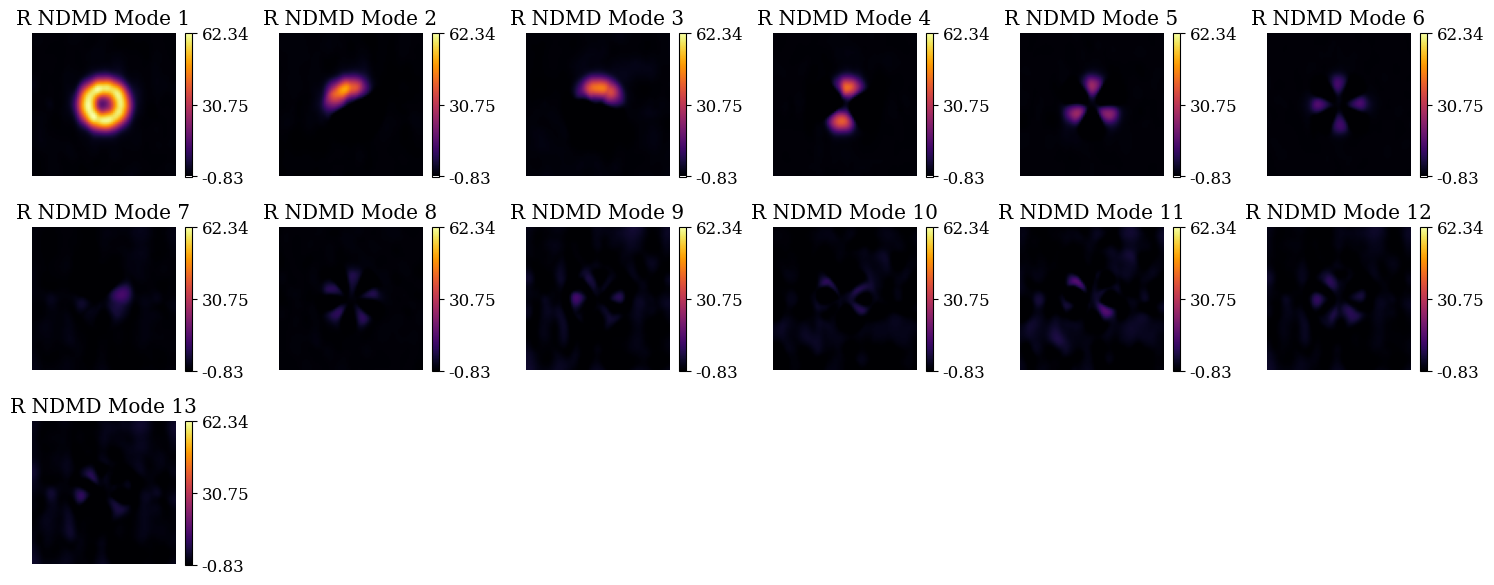

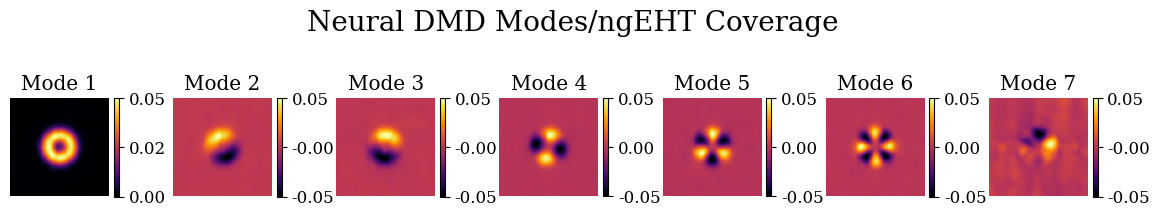

In [13]:
frames, times = load_hdf5(obs_path, "gt_video.hdf5")
height, width = frames.shape[1], frames.shape[2]
min_time = times.min()
max_time = times.max()
frame_max = frames.max()
frame_min = frames.min()
pixel_size_x = fov_x / width
pixel_size_y = fov_y / height

grid_x, grid_y = np.meshgrid(np.arange(height), np.arange(width), indexing='xy') # make grid of x and y coordinates
make_gif(frames, num_frames, plots_dir, "ground_truth.gif") # make gif of the ground truth video
xy_coords = pixel_to_physical(grid_x, grid_y, width, height, pixel_size_x, pixel_size_y) # convert pixel coordinates to physical coordinates
W0, W_half, W, Omega, b = model(xy_coords) # get the modes, eigenvalues, and initial state from the model
Lambda_half = jnp.exp(Omega)  # temporal factors from Omega
sort_idx = jnp.argsort(jnp.real(Lambda_half))[::-1] # sort the eigenvalues in descending order
W_half_sorted = W_half[:, sort_idx]  # sort the modes accordingly
W_sorted_concat = jnp.concatenate([W0, W_half_sorted], axis=-1) # concatenate the static mode with all the dynamic modes
plot_modes(W_sorted_concat, height, width, os.path.join(plots_dir, "W_half_sorted.png"), "R NDMD")
plt.show()
plt.close()
plot_modes_normalized(W_sorted_concat[:, :7], height, width, os.path.join(plots_dir, "W_half_sorted_normalized.pdf"), "R NDMD")
plt.show()
plt.close()

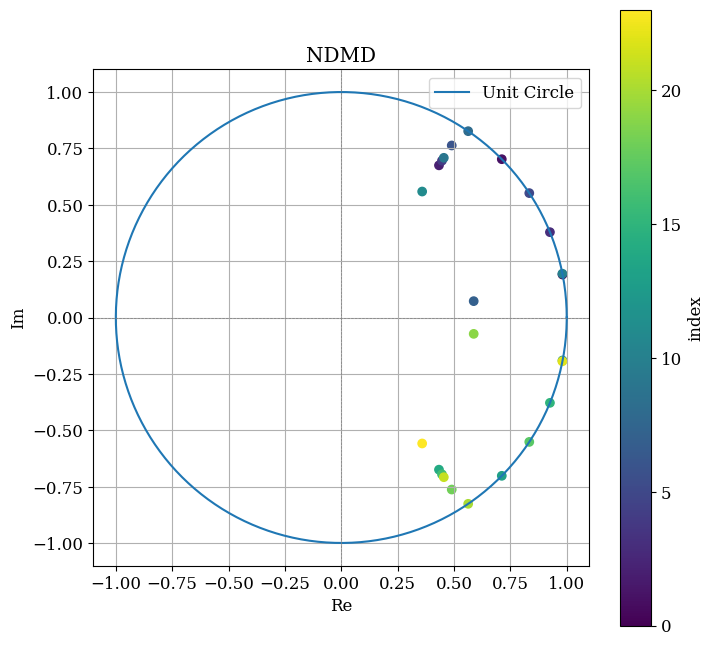

In [14]:
Omega_full = jnp.concatenate([Omega, jnp.conj(Omega)], axis=0)
Lambda = jnp.exp(Omega_full)  # full temporal factors if desired
plot_circle_Lambda(Lambda, "NDMD", os.path.join(plots_dir, "unit_circle.png"))
plt.show()
plt.close()

In [15]:
lambda_exp = jnp.exp(Omega[:, None] * times[None, :] * 160.0) # compute the exponential of the eigenvalues
intensities = jnp.real((2 * jnp.real(jnp.einsum('pr, rt, r -> pt', W_half, lambda_exp, b_half_new)) + W0[:, 0:1] * b0_new[0])) * model.scale

NameError: name 'b_half_new' is not defined